In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', category=UserWarning)

from Processing.load_dataset import Load_dataset
from Processing.processing import Split, Valid, Submission
from Valid.validation import rmse

from Model.lightgbm import LightGBM
from Model.xgboost import XGBOOST
from Model.nn import NN
from sklearn.metrics import mean_squared_error

In [2]:
train, test = Load_dataset()

# 提出用
index = np.array(test["id"])

# 加工・処理
train_df = engin(train)
test_df = engin(test)

# val, train, test
X_train, X_test, y_train, y_test, index = Split(train_df)
X_train, X_valid, y_train, y_valid = Valid(X_train, y_train)

## Light-GBM

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11498
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 57
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 17.6602	Test's rmse: 20.5382


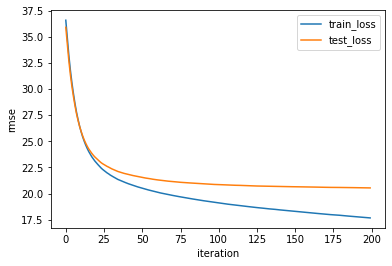

<BarContainer object of 20 artists>

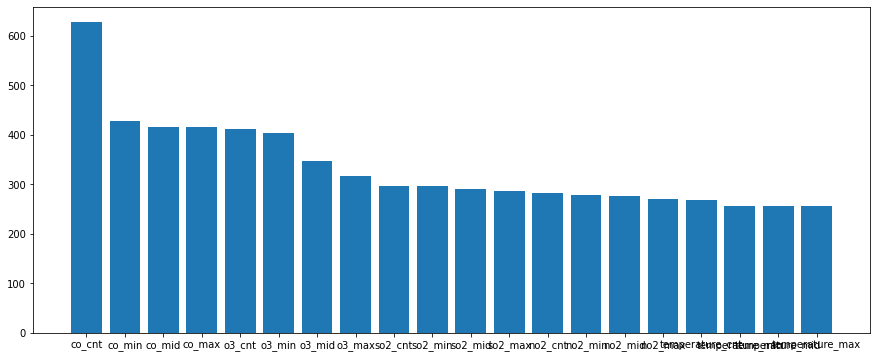

In [3]:
Light_GBM = LightGBM(X_train, X_valid, y_train, y_valid, fig=1)
importance = pd.DataFrame(sorted(Light_GBM.feature_importance(), reverse=True), index=X_test.columns, columns=['importance'])
plt.figure(figsize=(15,6))
plt.bar(X_test.columns[:20], np.ravel(importance.values)[:20])

In [4]:
# 評価
valid_predict = Light_GBM.predict(X_valid)
rmse(valid_predict, y_valid)

test_predict = Light_GBM.predict(X_test)
rmse(test_predict, y_test)

RMSE:  20.53818529755004
RMSE:  20.469423456251338


In [13]:
# 予測
index = test_df["id"]
test_df = test_df.drop(["id"], axis=1)
predict_light_gbm = Light_GBM.predict(data=test_df)

# 提出
Submission(index, predict_light_gbm, name='light_var')

## xgboost

In [15]:
xgboost = XGBOOST(X_train, X_valid, y_train, y_valid, fig=1)

<BarContainer object of 45 artists>

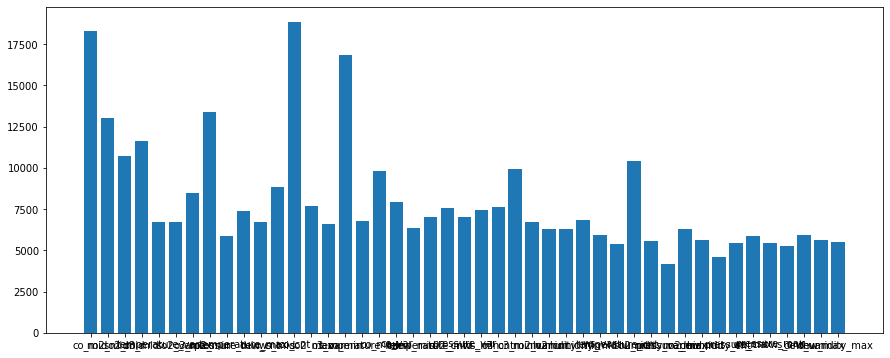

In [26]:
importance = list(xgboost.get_score(importance_type='weight').values())
col = list(xgboost.get_score(importance_type='weight').keys())
plt.figure(figsize=(15,6))
plt.bar(col, importance)

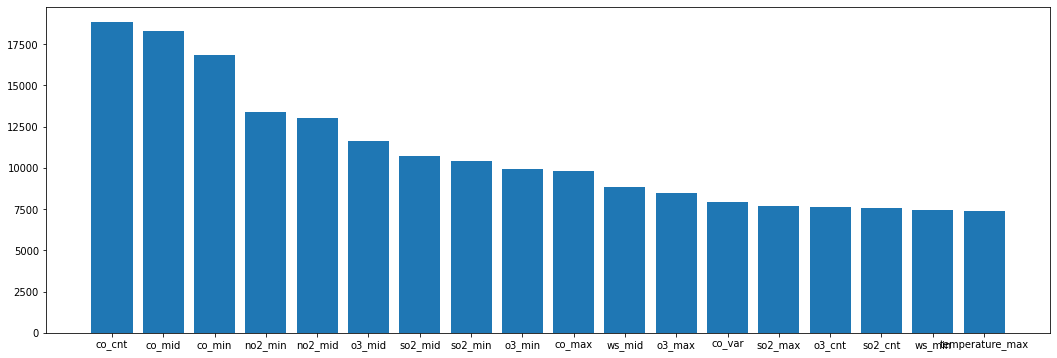

In [57]:
# 最大
im = pd.DataFrame([col,importance], index=["columns", "importance"]).T
im = im.sort_values('importance', ascending=False)
plt.figure(figsize=(18,6))
plt.bar(im["columns"][:18], im["importance"][:18])
plt.show()

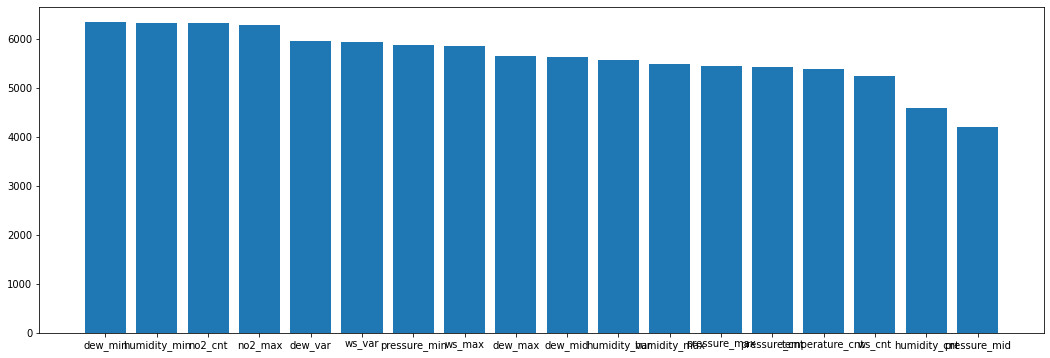

In [58]:
# 最小
im = pd.DataFrame([col,importance], index=["columns", "importance"]).T
im = im.sort_values('importance', ascending=False)
plt.figure(figsize=(18,6))
plt.bar(im["columns"][-18:], im["importance"][-18:])
plt.show()

In [18]:
# 評価
import xgboost as xgb
dm_valid = xgb.DMatrix(X_valid)
valid_predict = xgboost.predict(dm_valid)
rmse(valid_predict, y_valid)

dm_test = xgb.DMatrix(X_test)
test_predict = xgboost.predict(dm_test)
rmse(test_predict, y_test)

RMSE:  20.47883383403503
RMSE:  20.395146661257535


In [19]:
# 予測
test = xgb.DMatrix(test_df)
predict_xgboost = xgboost.predict(test, ntree_limit=xgboost.best_ntree_limit)

Submission(index, predict_xgboost, name='xgb_std')

## var delete

In [5]:
train, test = Load_dataset()

# 提出用
index = np.array(test["id"])

# 加工・処理
train_df = engin(train)
test_df = engin(test)

# val, train, test
X_train, X_test, y_train, y_test, index = Split(train_df)
X_train, X_valid, y_train, y_valid = Valid(X_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11498
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 57
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 17.6602	Test's rmse: 20.5382


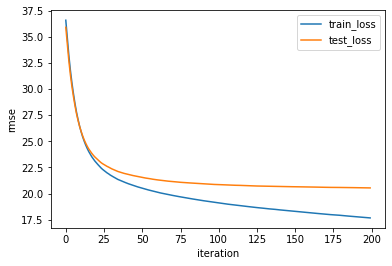

<BarContainer object of 20 artists>

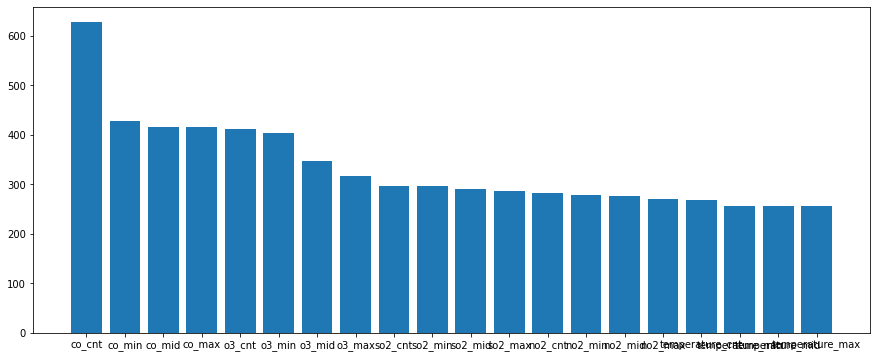

In [6]:
Light_GBM = LightGBM(X_train, X_valid, y_train, y_valid, fig=1)
importance = pd.DataFrame(sorted(Light_GBM.feature_importance(), reverse=True), index=X_test.columns, columns=['importance'])
plt.figure(figsize=(15,6))
plt.bar(X_test.columns[:20], np.ravel(importance.values)[:20])

In [7]:
# 評価
valid_predict = Light_GBM.predict(X_valid)
rmse(valid_predict, y_valid)

test_predict = Light_GBM.predict(X_test)
rmse(test_predict, y_test)

RMSE:  20.53818529755004
RMSE:  20.469423456251338


In [69]:
# 予測
index = test_df["id"]
test_df = test_df.drop(["id"], axis=1)
predict_light_gbm = Light_GBM.predict(data=test_df)

# 提出
Submission(index, predict_light_gbm, name='light_var_delete')

In [70]:
xgboost = XGBOOST(X_train, X_valid, y_train, y_valid, fig=1)

In [71]:
# 評価
import xgboost as xgb
dm_valid = xgb.DMatrix(X_valid)
valid_predict = xgboost.predict(dm_valid)
rmse(valid_predict, y_valid)

dm_test = xgb.DMatrix(X_test)
test_predict = xgboost.predict(dm_test)
rmse(test_predict, y_test)

RMSE:  20.47678497236048
RMSE:  20.395613568179286


In [72]:
# 予測
test = xgb.DMatrix(test_df)
predict_xgboost = xgboost.predict(test, ntree_limit=xgboost.best_ntree_limit)

Submission(index, predict_xgboost, name='xgb_var_delete')

In [8]:
from Engineering.var_delete import engin
train, test = Load_dataset()

# 提出用
index = np.array(test["id"])

# 加工・処理
train_df = engin(train)
test_df = engin(test)

# val, train, test
X_train, X_test, y_train, y_test, index = Split(train_df)
X_train, X_valid, y_train, y_valid = Valid(X_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11498
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 57
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 17.6602	Test's rmse: 20.5382


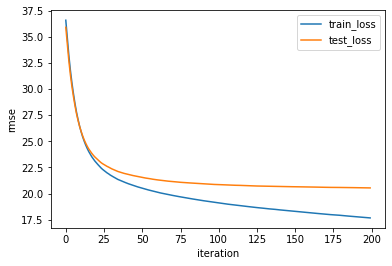

<BarContainer object of 20 artists>

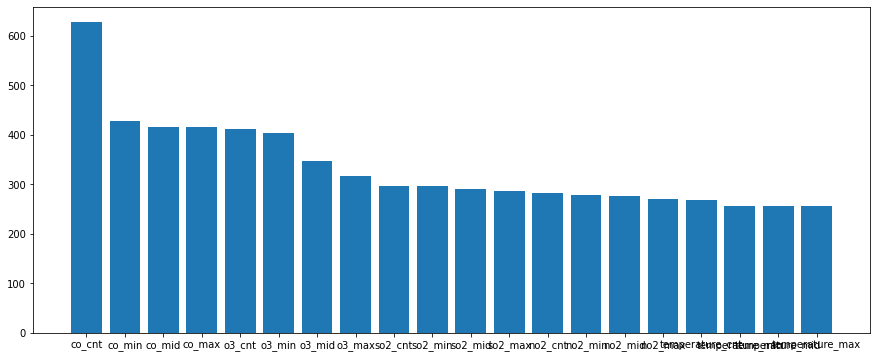

In [9]:
Light_GBM = LightGBM(X_train, X_valid, y_train, y_valid, fig=1)
importance = pd.DataFrame(sorted(Light_GBM.feature_importance(), reverse=True), index=X_test.columns, columns=['importance'])
plt.figure(figsize=(15,6))
plt.bar(X_test.columns[:20], np.ravel(importance.values)[:20])

In [10]:
# 評価
valid_predict = Light_GBM.predict(X_valid)
rmse(valid_predict, y_valid)

test_predict = Light_GBM.predict(X_test)
rmse(test_predict, y_test)

RMSE:  20.53818529755004
RMSE:  20.469423456251338


In [9]:
# 予測
index = test_df["id"]
test_df = test_df.drop(["id"], axis=1)
predict_light_gbm = Light_GBM.predict(data=test_df)

# 提出
Submission(index, predict_light_gbm, name='light_dummy_month')

## var delete dummy

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11564
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 90
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 17.3763	Test's rmse: 20.0876


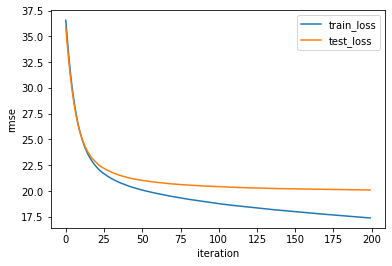

RMSE:  20.087579512658778
RMSE:  19.986129997191256


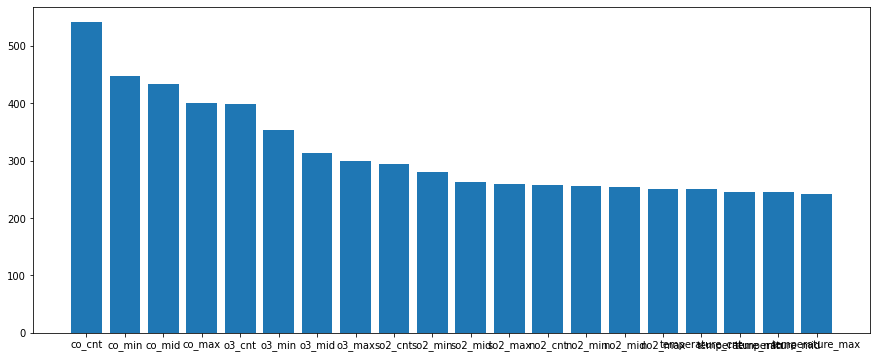

In [11]:
from Engineering.dummy import engin
train, test = Load_dataset()

# 提出用
index = np.array(test["id"])

# 加工・処理
train_df = engin(train)
test_df = engin(test)

# val, train, test
X_train, X_test, y_train, y_test, index = Split(train_df)
X_train, X_valid, y_train, y_valid = Valid(X_train, y_train)

Light_GBM = LightGBM(X_train, X_valid, y_train, y_valid, fig=1)
importance = pd.DataFrame(sorted(Light_GBM.feature_importance(), reverse=True), index=X_test.columns, columns=['importance'])
plt.figure(figsize=(15,6))
plt.bar(X_test.columns[:20], np.ravel(importance.values)[:20])

# 評価
valid_predict = Light_GBM.predict(X_valid)
rmse(valid_predict, y_valid)

test_predict = Light_GBM.predict(X_test)
rmse(test_predict, y_test)

In [12]:
# 予測
index = test_df["id"]
test_df = test_df.drop(["id"], axis=1)
predict_light_gbm = Light_GBM.predict(data=test_df)

# 提出
Submission(index, predict_light_gbm, name='light_dummy')

## 特徴量かさまし

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [13]:
select = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=123),
                        threshold="median")

In [15]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

C:\Users\yu886\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\yu886\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [21]:
print(X_train.shape)
print(X_train_l1.shape)

(125401, 90)
(125401, 45)


C:\Users\yu886\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10968
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 45
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 17.6192	Test's rmse: 20.4701


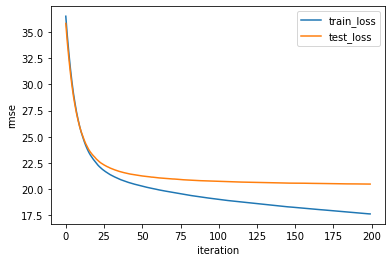

RMSE:  20.470131585140752


C:\Users\yu886\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RMSE:  20.360610099196155


In [17]:
X_valid_l1 = select.transform(X_valid)
Light_GBM = LightGBM(X_train_l1, X_valid_l1, y_train, y_valid, fig=1)

valid_predict = Light_GBM.predict(X_valid_l1)
rmse(valid_predict, y_valid)

X_test_l1 = select.transform(X_test)
test_predict = Light_GBM.predict(X_test_l1)
rmse(test_predict, y_test)

## CV

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ShuffleSplit
import lightgbm as lgb
import numpy as np

In [3]:
FOLD = 5
NUM_ROUND = 1000
VERBOSE_EVAL = -1

params = {
    'objective': 'regression',
    'verbose': -1,
}

valid_scores = []
models = []
ss = ShuffleSplit(n_splits=FOLD, test_size=0.25, random_state=42)

In [4]:
train, test = Load_dataset()

from Engineering.dummy import engin
train, test = Load_dataset()

# 提出用
index = np.array(test["id"])

# 加工・処理
train_df = engin(train)
test_df = engin(test)

In [5]:
y = train["pm25_mid"]
X = train.drop(["id", "pm25_mid"], axis=1)
X

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var
0,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,2.590,...,42,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424
1,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,3.181,...,48,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021
2,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,1.197,...,125,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355
3,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,11.044,...,52,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417
4,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,8.681,...,102,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195936,2021,12,31,United States,Jacksonville,30.33218,-81.65565,12,0.694,0.995,...,22,2.195,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252
195937,2021,12,31,United States,Las Vegas,36.17497,-115.13722,14,0.528,1.256,...,51,1.002,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078
195938,2021,12,31,United States,Milwaukee,43.03890,-87.90647,171,1.975,6.627,...,125,0.994,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286
195939,2021,12,31,Vietnam,Hanoi,21.02450,105.84117,31,2.613,2.704,...,266,1.005,3.058,6.005,6.085,51,1.922,7.443,7.716,4.642


In [25]:
X

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var
0,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,2.590,...,42,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424
1,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,3.181,...,48,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021
2,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,1.197,...,125,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355
3,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,11.044,...,52,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417
4,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,8.681,...,102,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195936,2021,12,31,United States,Jacksonville,30.33218,-81.65565,12,0.694,0.995,...,22,2.195,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252
195937,2021,12,31,United States,Las Vegas,36.17497,-115.13722,14,0.528,1.256,...,51,1.002,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078
195938,2021,12,31,United States,Milwaukee,43.03890,-87.90647,171,1.975,6.627,...,125,0.994,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286
195939,2021,12,31,Vietnam,Hanoi,21.02450,105.84117,31,2.613,2.704,...,266,1.005,3.058,6.005,6.085,51,1.922,7.443,7.716,4.642


In [15]:
for fold, (train_indices, valid_indices) in enumerate(ss.split(X)):
    print(train_indices)
    X_train, X_valid = X[train_indices], X[valid_indices]
    y_train, y_valid = y[train_indices], y[valid_indices]
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid)

    model = lgb.train(
        params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=NUM_ROUND,
        verbose_eval=VERBOSE_EVAL
    )

    y_valid_pred = model.predict(X_valid)
    score = mean_absolute_error(y_valid, y_valid_pred)
    print(f'fold {fold} MAE: {score}')
    valid_scores.append(score)

    models.append(model)

cv_score = np.mean(valid_scores)
print(f'CV score: {cv_score}')

[ 39788  93166 178297 ... 131932 146867 121958]


KeyError: '[13, 14, 15, 16, 17, 18, 19, 21, 23, 25, 26, 27, 28, 29, 30, 32, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 85, 86, 88, 90, 91, 92, 93, 94, 95, 98, 99, 100, 104, 106, 107, 108, 109, 111, 115, 116, 118, 120, 122, 123, 125, 126, 130, 132, 133, 134, 136, 137, 138, 140, 141, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 196, 199, 200, 202, 203, 205, 207, 208, 209, 210, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 239, 240, 241, 242, 243, 244, 245, 246, 247, 249, 250, 251, 252, 253, 254, 255, 257, 258, 259, 263, 265, 266, 267, 268, 269, 273, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 287, 289, 290, 291, 292, 293, 294, 295, 296, 299, 302, 303, 310, 311, 312, 313, 315, 316, 318, 319, 320, 325, 327, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 352, 353, 356, 357, 358, 359, 360, 363, 364, 365, 368, 370, 371, 372, 373, 374, 375, 377, 379, 381, 383, 386, 387, 389, 390, 392, 393, 395, 397, 398, 399, 400, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 417, 418, 420, 421, 422, 424, 425, 426, 427, 428, 429, 431, 432, 433, 434, 435, 437, 438, 439, 440, 441, 442, 443, 445, 446, 448, 449, 451, 452, 453, 454, 455, 456, 457, 459, 460, 461, 462, 463, 465, 467, 468, 469, 470, 471, 472, 474, 475, 478, 479, 480, 482, 483, 484, 486, 487, 488, 489, 490, 492, 494, 495, 496, 497, 501, 502, 503, 504, 506, 507, 511, 514, 515, 518, 520, 521, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 540, 542, 543, 544, 545, 547, 551, 552, 553, 554, 555, 556, 557, 558, 559, 561, 563, 566, 568, 569, 570, 571, 574, 576, 578, 579, 580, 584, 586, 587, 588, 589, 590, 591, 592, 594, 595, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 612, 613, 614, 615, 617, 618, 620, 622, 623, 624, 626, 627, 628, 630, 631, 633, 635, 636, 637, 638, 639, 640, 641, 643, 645, 646, 648, 649, 650, 653, 654, 655, 658, 661, 662, 664, 665, 666, 667, 669, 670, 672, 673, 676, 678, 679, 680, 681, 682, 683, 685, 688, 691, 692, 693, 694, 695, 696, 697, 699, 701, 702, 703, 706, 707, 708, 709, 711, 712, 714, 715, 716, 717, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 757, 758, 759, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 776, 777, 778, 780, 781, 782, 783, 784, 785, 786, 788, 789, 791, 792, 793, 794, 796, 798, 799, 801, 802, 805, 806, 807, 808, 810, 812, 814, 815, 816, 817, 818, 819, 820, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 839, 840, 842, 843, 845, 846, 848, 849, 851, 852, 853, 855, 856, 858, 860, 863, 864, 865, 867, 869, 870, 871, 872, 873, 874, 876, 877, 880, 881, 882, 884, 887, 888, 890, 891, 892, 893, 894, 895, 897, 898, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 921, 922, 924, 925, 927, 930, 931, 932, 933, 934, 937, 938, 939, 941, 942, 944, 945, 946, 948, 950, 952, 953, 954, 956, 957, 958, 959, 960, 961, 962, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 977, 978, 981, 982, 983, 984, 987, 988, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1004, 1005, 1006, 1007, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1018, 1019, 1021, 1024, 1026, 1028, 1029, 1030, 1031, 1033, 1034, 1035, 1038, 1039, 1042, 1043, 1044, 1046, 1048, 1049, 1050, 1051, 1052, 1053, 1055, 1056, 1058, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1071, 1072, 1073, 1074, 1076, 1079, 1080, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1102, 1103, 1104, 1105, 1106, 1107, 1110, 1111, 1112, 1114, 1115, 1117, 1118, 1119, 1121, 1123, 1124, 1125, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1135, 1138, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1151, 1152, 1153, 1154, 1155, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1165, 1166, 1167, 1168, 1169, 1171, 1172, 1173, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1186, 1187, 1188, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1198, 1200, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1225, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1249, 1251, 1252, 1253, 1255, 1256, 1257, 1258, 1259, 1262, 1264, 1265, 1266, 1268, 1269, 1270, 1271, 1272, 1273, 1276, 1278, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1314, 1316, 1317, 1318, 1319, 1320, 1322, 1324, 1326, 1327, 1329, 1331, 1333, 1335, 1336, 1338, 1339, 1340, 1341, 1342, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1357, 1358, 1359, 1360, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1371, 1372, 1374, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1385, 1386, 1388, 1390, 1391, 1392, 1394, 1395, 1396, 1399, 1400, 1401, 1402, 1403, 1404, 1407, 1408, 1409, 1410, 1412, 1413, 1418, 1419, 1420, 1422, 1424, 1425, 1426, 1427, 1428, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1451, 1453, 1455, 1456, 1458, 1459, 1461, 1462, 1463, 1464, 1466, 1467, 1468, 1469, 1470, 1471, 1473, 1474, 1475, 1476, 1477, 1479, 1481, 1484, 1485, 1488, 1489, 1490, 1493, 1494, 1495, 1496, 1497, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1508, 1509, 1511, 1512, 1513, 1514, 1515, 1518, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1539, 1540, 1541, 1542, 1544, 1545, 1546, 1547, 1548, 1549, 1551, 1552, 1553, 1555, 1556, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1568, 1570, 1571, 1573, 1574, 1577, 1578, 1579, 1580, 1583, 1584, 1585, 1587, 1588, 1589, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1599, 1600, 1602, 1603, 1604, 1605, 1606, 1607, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1633, 1634, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1646, 1647, 1649, 1650, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1679, 1680, 1681, 1683, 1685, 1686, 1690, 1691, 1692, 1693, 1694, 1695, 1698, 1699, 1700, 1701, 1702, 1703, 1705, 1706, 1708, 1709, 1710, 1712, 1713, 1715, 1716, 1719, 1720, 1722, 1723, 1724, 1726, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1743, 1744, 1745, 1746, 1747, 1750, 1751, 1752, 1753, 1755, 1757, 1758, 1759, 1760, 1761, 1766, 1767, 1769, 1770, 1771, 1773, 1775, 1776, 1777, 1778, 1780, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1791, 1793, 1794, 1795, 1796, 1797, 1801, 1803, 1804, 1805, 1806, 1808, 1809, 1810, 1811, 1813, 1814, 1815, 1816, 1817, 1818, 1820, 1821, 1822, 1823, 1824, 1825, 1827, 1828, 1829, 1830, 1832, 1833, 1835, 1836, 1838, 1839, 1840, 1844, 1845, 1846, 1849, 1850, 1852, 1854, 1856, 1857, 1858, 1859, 1861, 1862, 1863, 1865, 1867, 1868, 1869, 1871, 1872, 1873, 1875, 1877, 1881, 1882, 1884, 1885, 1887, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1900, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1924, 1925, 1926, 1927, 1928, 1930, 1931, 1932, 1935, 1936, 1937, 1939, 1940, 1942, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1953, 1954, 1955, 1956, 1957, 1959, 1960, 1961, 1962, 1963, 1967, 1968, 1969, 1971, 1973, 1974, 1975, 1978, 1980, 1981, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1995, 1996, 1997, 1998, 2000, 2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2030, 2031, 2032, 2035, 2036, 2038, 2039, 2041, 2042, 2043, 2045, 2046, 2048, 2049, 2050, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2061, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2072, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2087, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2097, 2098, 2099, 2100, 2101, 2102, 2104, 2106, 2107, 2110, 2111, 2112, 2114, 2116, 2117, 2118, 2120, 2121, 2123, 2124, 2125, 2126, 2127, 2128, 2131, 2132, 2134, 2135, 2137, 2139, 2140, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2153, 2155, 2156, 2159, 2160, 2161, 2164, 2169, 2170, 2171, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2183, 2185, 2186, 2187, 2188, 2191, 2192, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2208, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2219, 2221, 2222, 2224, 2225, 2227, 2228, 2229, 2232, 2233, 2234, 2236, 2237, 2238, 2241, 2243, 2244, 2245, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2255, 2256, 2257, 2258, 2260, 2261, 2263, 2265, 2266, 2267, 2270, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2287, 2289, 2291, 2292, 2293, 2294, 2295, 2297, 2298, 2299, 2301, 2303, 2304, 2305, 2306, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2317, 2318, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2332, 2333, 2334, 2335, 2336, 2337, 2339, 2344, 2345, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2358, 2359, 2360, 2363, 2364, 2365, 2366, 2368, 2369, 2370, 2371, 2373, 2374, 2376, 2377, 2378, 2380, 2382, 2383, 2384, 2386, 2387, 2389, 2390, 2391, 2394, 2395, 2396, 2397, 2398, 2399, 2400, 2402, 2404, 2405, 2406, 2407, 2409, 2410, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2430, 2431, 2432, 2433, 2434, 2435, 2437, 2438, 2439, 2441, 2442, 2443, 2444, 2445, 2446, 2450, 2451, 2452, 2453, 2454, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2482, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2496, 2497, 2499, 2500, 2501, 2503, 2506, 2507, 2509, 2510, 2511, 2512, 2514, 2516, 2517, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2531, 2533, 2534, 2535, 2536, 2539, 2542, 2543, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2554, 2558, 2559, 2560, 2561, 2562, 2564, 2565, 2566, 2567, 2568, 2569, 2571, 2573, 2574, 2575, 2576, 2577, 2578, 2580, 2581, 2582, 2585, 2586, 2587, 2589, 2590, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2610, 2611, 2612, 2614, 2615, 2618, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2628, 2629, 2630, 2631, 2632, 2634, 2635, 2637, 2638, 2639, 2640, 2641, 2642, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2652, 2653, 2654, 2655, 2656, 2658, 2659, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2676, 2677, 2680, 2681, 2682, 2684, 2685, 2686, 2687, 2689, 2690, 2691, 2692, 2693, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2714, 2716, 2719, 2720, 2722, 2725, 2726, 2727, 2728, 2730, 2732, 2733, 2734, 2735, 2737, 2738, 2742, 2743, 2744, 2745, 2746, 2747, 2749, 2750, 2751, 2752, 2753, 2754, 2756, 2757, 2759, 2761, 2762, 2763, 2764, 2765, 2766, 2768, 2770, 2772, 2773, 2774, 2775, 2777, 2778, 2779, 2780, 2781, 2786, 2787, 2790, 2791, 2792, 2793, 2794, 2795, 2797, 2798, 2799, 2802, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2814, 2816, 2817, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2828, 2829, 2830, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2842, 2843, 2844, 2845, 2847, 2850, 2851, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2864, 2865, 2866, 2867, 2869, 2871, 2873, 2874, 2875, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2889, 2890, 2892, 2894, 2895, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2906, 2907, 2910, 2911, 2912, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2938, 2939, 2940, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2958, 2959, 2961, 2962, 2963, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2977, 2978, 2979, 2980, 2982, 2983, 2984, 2985, 2988, 2989, 2990, 2991, 2993, 2994, 2995, 2997, 2998, 3000, 3002, 3003, 3004, 3005, 3007, 3008, 3009, 3011, 3012, 3013, 3014, 3015, 3017, 3018, 3019, 3021, 3022, 3023, 3024, 3025, 3026, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3051, 3052, 3053, 3055, 3058, 3060, 3061, 3062, 3066, 3067, 3068, 3070, 3072, 3074, 3075, 3078, 3079, 3080, 3081, 3083, 3084, 3085, 3088, 3089, 3090, 3092, 3093, 3094, 3096, 3097, 3098, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3110, 3111, 3113, 3114, 3115, 3120, 3121, 3122, 3124, 3125, 3126, 3127, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3141, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3152, 3153, 3154, 3155, 3157, 3159, 3160, 3162, 3163, 3164, 3165, 3168, 3169, 3171, 3172, 3174, 3176, 3177, 3178, 3179, 3180, 3181, 3183, 3184, 3185, 3187, 3188, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3201, 3202, 3203, 3205, 3209, 3210, 3212, 3213, 3214, 3216, 3217, 3218, 3219, 3221, 3223, 3224, 3225, 3226, 3228, 3229, 3230, 3232, 3234, 3236, 3238, 3239, 3240, 3243, 3244, 3246, 3247, 3248, 3249, 3250, 3252, 3253, 3255, 3256, 3257, 3259, 3261, 3262, 3263, 3264, 3265, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3283, 3284, 3285, 3286, 3287, 3290, 3293, 3295, 3296, 3297, 3298, 3300, 3301, 3302, 3303, 3305, 3306, 3307, 3309, 3310, 3311, 3312, 3313, 3315, 3316, 3317, 3320, 3321, 3322, 3323, 3326, 3327, 3328, 3330, 3331, 3332, 3333, 3334, 3336, 3338, 3339, 3340, 3342, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3356, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3366, 3367, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3384, 3385, 3386, 3387, 3388, 3390, 3391, 3392, 3394, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3425, 3428, 3432, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3443, 3444, 3445, 3446, 3447, 3449, 3450, 3452, 3453, 3454, 3456, 3457, 3458, 3459, 3460, 3461, 3465, 3466, 3467, 3468, 3470, 3471, 3473, 3474, 3475, 3476, 3477, 3480, 3481, 3482, 3484, 3485, 3487, 3488, 3489, 3492, 3495, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3508, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3519, 3520, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3532, 3533, 3534, 3535, 3536, 3537, 3538, 3539, 3540, 3541, 3542, 3543, 3544, 3545, 3546, 3549, 3551, 3552, 3554, 3555, 3558, 3563, 3566, 3567, 3568, 3569, 3570, 3571, 3572, 3573, 3574, 3575, 3577, 3580, 3581, 3582, 3585, 3586, 3587, 3588, 3590, 3591, 3592, 3593, 3595, 3596, 3597, 3598, 3599, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3613, 3616, 3617, 3618, 3622, 3623, 3624, 3625, 3626, 3629, 3631, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3652, 3653, 3654, 3657, 3659, 3660, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3677, 3678, 3679, 3680, 3681, 3682, 3684, 3685, 3687, 3691, 3692, 3693, 3694, 3696, 3698, 3700, 3702, 3703, 3704, 3705, 3706, 3707, 3708, 3709, 3710, 3712, 3715, 3718, 3720, 3721, 3722, 3726, 3728, 3729, 3732, 3733, 3734, 3735, 3736, 3737, 3738, 3739, 3740, 3741, 3743, 3744, 3745, 3746, 3747, 3748, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3760, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770, 3771, 3772, 3774, 3775, 3776, 3778, 3779, 3781, 3783, 3784, 3788, 3789, 3792, 3794, 3796, 3801, 3803, 3805, 3806, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3816, 3817, 3818, 3819, 3820, 3821, 3823, 3824, 3825, 3827, 3828, 3829, 3830, 3831, 3832, 3833, 3834, 3835, 3836, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3846, 3847, 3849, 3850, 3851, 3852, 3853, 3854, 3855, 3856, 3857, 3858, 3859, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869, 3871, 3872, 3873, 3874, 3875, 3877, 3878, 3879, 3880, 3881, 3882, 3883, 3884, 3886, 3888, 3889, 3890, 3892, 3893, 3894, 3895, 3897, 3900, 3902, 3903, 3904, 3905, 3907, 3909, 3910, 3911, 3914, 3915, 3917, 3919, 3920, 3921, 3922, 3923, 3925, 3926, 3927, 3928, 3933, 3934, 3936, 3937, 3938, 3939, 3940, 3941, 3942, 3943, 3944, 3949, 3953, 3955, 3956, 3957, 3958, 3960, 3961, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3972, 3973, 3974, 3977, 3978, 3979, 3980, 3981, 3983, 3984, 3985, 3986, 3987, 3988, 3989, 3990, 3991, 3993, 3994, 3996, 3998, 4000, 4001, 4002, 4003, 4005, 4006, 4008, 4009, 4010, 4011, 4013, 4014, 4015, 4016, 4017, 4018, 4020, 4021, 4023, 4024, 4025, 4026, 4027, 4029, 4030, 4034, 4035, 4036, 4037, 4038, 4040, 4041, 4042, 4043, 4044, 4045, 4047, 4048, 4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4060, 4061, 4062, 4063, 4064, 4065, 4066, 4067, 4069, 4071, 4073, 4074, 4075, 4076, 4077, 4079, 4084, 4085, 4087, 4089, 4090, 4092, 4094, 4096, 4097, 4098, 4099, 4101, 4102, 4103, 4104, 4108, 4109, 4111, 4112, 4114, 4116, 4117, 4118, 4119, 4121, 4122, 4123, 4125, 4126, 4127, 4128, 4130, 4131, 4133, 4134, 4135, 4136, 4137, 4138, 4139, 4140, 4141, 4142, 4145, 4146, 4149, 4150, 4152, 4153, 4156, 4158, 4160, 4161, 4163, 4164, 4165, 4166, 4169, 4170, 4171, 4172, 4173, 4176, 4177, 4178, 4179, 4180, 4181, 4182, 4183, 4184, 4185, 4186, 4187, 4188, 4190, 4191, 4192, 4193, 4194, 4198, 4200, 4201, 4202, 4203, 4205, 4206, 4208, 4209, 4211, 4212, 4213, 4214, 4215, 4216, 4219, 4220, 4222, 4223, 4224, 4225, 4226, 4227, 4229, 4231, 4233, 4234, 4235, 4236, 4237, 4239, 4240, 4242, 4245, 4246, 4247, 4251, 4253, 4254, 4256, 4257, 4258, 4259, 4260, 4261, 4262, 4263, 4264, 4265, 4266, 4267, 4268, 4271, 4273, 4274, 4275, 4276, 4278, 4279, 4282, 4283, 4284, 4285, 4286, 4290, 4291, 4293, 4294, 4296, 4297, 4299, 4300, 4302, 4304, 4305, 4306, 4307, 4308, 4309, 4310, 4311, 4312, 4314, 4315, 4316, 4318, 4319, 4320, 4321, 4322, 4323, 4324, 4326, 4327, 4329, 4330, 4331, 4332, 4333, 4334, 4336, 4337, 4338, 4340, 4341, 4342, 4344, 4348, 4349, 4350, 4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4373, 4376, 4377, 4379, 4381, 4382, 4383, 4384, 4386, 4387, 4388, 4389, 4390, 4391, 4393, 4395, 4396, 4398, 4400, 4401, 4402, 4403, 4405, 4406, 4407, 4408, 4409, 4410, 4411, 4412, 4414, 4415, 4416, 4418, 4419, 4420, 4421, 4422, 4423, 4424, 4425, 4426, 4427, 4428, 4429, 4430, 4431, 4432, 4433, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4442, 4443, 4445, 4446, 4447, 4448, 4449, 4450, 4452, 4453, 4454, 4455, 4456, 4457, 4458, 4460, 4462, 4463, 4466, 4467, 4469, 4470, 4471, 4472, 4473, 4475, 4476, 4477, 4478, 4479, 4481, 4482, 4483, 4484, 4485, 4486, 4487, 4488, 4489, 4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498, 4499, 4500, 4502, 4503, 4504, 4505, 4507, 4508, 4509, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4524, 4528, 4529, 4530, 4531, 4532, 4533, 4534, 4536, 4538, 4539, 4540, 4542, 4544, 4549, 4550, 4551, 4552, 4553, 4554, 4555, 4556, 4558, 4561, 4564, 4565, 4566, 4567, 4569, 4570, 4571, 4572, 4573, 4574, 4575, 4576, 4577, 4579, 4580, 4581, 4582, 4583, 4584, 4586, 4588, 4589, 4590, 4591, 4592, 4593, 4595, 4596, 4600, 4602, 4603, 4605, 4606, 4608, 4610, 4611, 4612, 4614, 4616, 4617, 4618, 4621, 4623, 4625, 4626, 4627, 4629, 4630, 4631, 4632, 4633, 4636, 4637, 4638, 4641, 4642, 4643, 4644, 4645, 4646, 4647, 4648, 4649, 4650, 4651, 4652, 4655, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4666, 4667, 4668, 4669, 4670, 4672, 4673, 4674, 4676, 4677, 4680, 4681, 4682, 4683, 4684, 4686, 4687, 4690, 4692, 4693, 4694, 4695, 4696, 4697, 4698, 4700, 4701, 4702, 4703, 4705, 4706, 4707, 4708, 4711, 4712, 4713, 4716, 4718, 4719, 4720, 4721, 4722, 4723, 4724, 4725, 4726, 4727, 4729, 4731, 4732, 4733, 4735, 4736, 4737, 4738, 4740, 4741, 4742, 4743, 4744, 4745, 4746, 4747, 4748, 4749, 4750, 4753, 4754, 4755, 4756, 4757, 4758, 4759, 4760, 4761, 4762, 4763, 4764, 4765, 4766, 4767, 4768, 4769, 4771, 4772, 4773, 4774, 4775, 4776, 4777, 4778, 4780, 4781, 4782, 4783, 4784, 4785, 4786, 4787, 4789, 4791, 4793, 4794, 4796, 4797, 4798, 4799, 4800, 4801, 4802, 4803, 4804, 4805, 4806, 4808, 4809, 4810, 4812, 4814, 4815, 4817, 4819, 4820, 4821, 4824, 4825, 4826, 4827, 4828, 4831, 4833, 4834, 4835, 4836, 4837, 4838, 4839, 4840, 4841, 4842, 4843, 4844, 4846, 4847, 4849, 4850, 4852, 4853, 4854, 4856, 4857, 4858, 4860, 4861, 4862, 4863, 4864, 4866, 4867, 4869, 4870, 4871, 4872, 4875, 4876, 4877, 4879, 4880, 4881, 4882, 4883, 4884, 4885, 4886, 4888, 4889, 4891, 4892, 4893, 4894, 4895, 4897, 4898, 4899, 4901, 4902, 4905, 4906, 4907, 4908, 4909, 4910, 4912, 4914, 4915, 4916, 4917, 4920, 4921, 4922, 4923, 4924, 4925, 4926, 4927, 4928, 4929, 4930, 4931, 4932, 4933, 4934, 4935, 4936, 4937, 4938, 4939, 4940, 4942, 4943, 4944, 4945, 4947, 4949, 4950, 4951, 4952, 4953, 4954, 4955, 4957, 4958, 4959, 4960, 4962, 4963, 4964, 4965, 4966, 4967, 4968, 4969, 4970, 4971, 4972, 4973, 4974, 4975, 4976, 4977, 4978, 4980, 4981, 4982, 4983, 4984, 4985, 4986, 4987, 4989, 4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4999, 5000, 5001, 5004, 5005, 5006, 5007, 5008, 5009, 5011, 5012, 5014, 5017, 5018, 5019, 5020, 5021, 5023, 5024, 5025, 5026, 5027, 5029, 5030, 5031, 5033, 5034, 5035, 5036, 5037, 5039, 5041, 5042, 5043, 5045, 5046, 5048, 5050, 5051, 5052, 5054, 5056, 5057, 5058, 5060, 5062, 5063, 5064, 5065, 5068, 5070, 5072, 5073, 5074, 5075, 5077, 5079, 5080, 5081, 5083, 5084, 5085, 5086, 5088, 5089, 5091, 5092, 5094, 5097, 5100, 5102, 5103, 5104, 5105, 5107, 5108, 5109, 5110, 5112, 5113, 5116, 5117, 5118, 5120, 5121, 5122, 5123, 5125, 5126, 5128, 5129, 5130, 5132, 5134, 5135, 5136, 5138, 5139, 5140, 5141, 5142, 5143, 5144, 5145, 5146, 5147, 5148, 5149, 5150, 5151, 5152, 5155, 5156, 5157, 5158, 5159, 5160, 5162, 5163, 5164, 5165, 5166, 5167, 5169, 5172, 5174, 5176, 5177, 5179, 5182, 5183, 5184, 5185, 5186, 5187, 5188, 5189, 5190, 5191, 5192, 5193, 5194, 5195, 5196, 5197, 5200, 5201, 5202, 5203, 5204, 5206, 5207, 5209, 5210, 5212, 5213, 5214, 5217, 5218, 5220, 5221, 5224, 5225, 5227, 5229, 5230, 5231, 5233, 5234, 5235, 5236, 5237, 5238, 5239, 5240, 5242, 5243, 5246, 5247, 5248, 5249, 5251, 5252, 5253, 5255, 5256, 5257, 5258, 5259, 5260, 5261, 5262, 5263, 5264, 5265, 5267, 5268, 5269, 5270, 5271, 5272, 5274, 5275, 5276, 5277, 5278, 5279, 5280, 5281, 5282, 5283, 5284, 5285, 5287, 5288, 5290, 5291, 5293, 5294, 5295, 5296, 5299, 5300, 5301, 5302, 5304, 5305, 5306, 5307, 5308, 5310, 5311, 5312, 5313, 5314, 5315, 5316, 5318, 5319, 5322, 5323, 5325, 5326, 5327, 5328, 5329, 5331, 5332, 5333, 5334, 5335, 5336, 5337, 5338, 5339, 5340, 5341, 5342, 5344, 5345, 5346, 5347, 5349, 5350, 5351, 5355, 5356, 5357, 5359, 5360, 5362, 5363, 5364, 5367, 5368, 5369, 5371, 5372, 5373, 5375, 5376, 5377, 5378, 5379, 5380, 5381, 5382, 5383, 5384, 5385, 5386, 5387, 5389, 5390, 5391, 5392, 5395, 5397, 5398, 5400, 5403, 5405, 5406, 5407, 5408, 5409, 5410, 5411, 5412, 5413, 5414, 5415, 5416, 5417, 5418, 5419, 5420, 5421, 5422, 5423, 5424, 5425, 5426, 5427, 5429, 5430, 5431, 5433, 5434, 5435, 5436, 5438, 5439, 5440, 5441, 5442, 5443, 5444, 5445, 5446, 5447, 5449, 5451, 5452, 5453, 5454, 5455, 5456, 5459, 5460, 5461, 5462, 5463, 5464, 5465, 5466, 5468, 5469, 5470, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5479, 5480, 5481, 5482, 5483, 5484, 5485, 5486, 5489, 5490, 5492, 5493, 5494, 5495, 5496, 5497, 5498, 5499, 5501, 5502, 5503, 5504, 5505, 5506, 5507, 5508, 5509, 5510, 5511, 5513, 5514, 5515, 5516, 5517, 5520, 5521, 5522, 5523, 5524, 5527, 5528, 5529, 5530, 5531, 5532, 5533, 5535, 5536, 5539, 5540, 5543, 5544, 5545, 5546, 5547, 5549, 5550, 5552, 5553, 5557, 5558, 5559, 5560, 5561, 5563, 5564, 5565, 5566, 5568, 5569, 5570, 5571, 5572, 5573, 5574, 5575, 5576, 5577, 5578, 5580, 5581, 5583, 5584, 5585, 5586, 5587, 5589, 5590, 5592, 5593, 5594, 5596, 5597, 5599, 5602, 5603, 5605, 5606, 5607, 5608, 5609, 5610, 5611, 5612, 5613, 5614, 5615, 5618, 5619, 5620, 5621, 5622, 5623, 5626, 5628, 5629, 5630, 5631, 5632, 5633, 5634, 5635, 5636, 5638, 5639, 5640, 5642, 5643, 5645, 5646, 5647, 5648, 5649, 5650, 5652, 5653, 5654, 5655, 5656, 5657, 5660, 5661, 5662, 5663, 5664, 5665, 5666, 5667, 5668, 5671, 5673, 5674, 5675, 5676, 5678, 5679, 5680, 5681, 5682, 5683, 5685, 5686, 5687, 5688, 5689, 5690, 5691, 5692, 5693, 5694, 5695, 5696, 5697, 5698, 5699, 5701, 5702, 5703, 5704, 5707, 5708, 5709, 5710, 5711, 5712, 5713, 5715, 5717, 5720, 5721, 5722, 5723, 5724, 5725, 5728, 5729, 5730, 5732, 5733, 5734, 5736, 5738, 5739, 5740, 5741, 5742, 5744, 5745, 5747, 5748, 5749, 5750, 5751, 5752, 5753, 5754, 5755, 5764, 5765, 5767, 5768, 5769, 5770, 5771, 5773, 5774, 5776, 5778, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5790, 5793, 5795, 5796, 5797, 5800, 5801, 5802, 5804, 5805, 5806, 5807, 5808, 5809, 5812, 5814, 5815, 5817, 5819, 5821, 5822, 5823, 5824, 5825, 5826, 5828, 5829, 5830, 5833, 5834, 5835, 5837, 5838, 5839, 5840, 5841, 5842, 5843, 5844, 5846, 5847, 5848, 5849, 5850, 5852, 5853, 5854, 5856, 5858, 5861, 5863, 5864, 5865, 5867, 5868, 5869, 5871, 5872, 5873, 5876, 5878, 5880, 5881, 5882, 5883, 5884, 5885, 5886, 5887, 5888, 5889, 5890, 5891, 5892, 5893, 5894, 5895, 5896, 5897, 5898, 5899, 5900, 5901, 5902, 5903, 5904, 5906, 5907, 5909, 5910, 5911, 5912, 5913, 5914, 5915, 5916, 5917, 5918, 5919, 5920, 5921, 5922, 5923, 5925, 5926, 5927, 5928, 5930, 5931, 5932, 5933, 5934, 5935, 5936, 5937, 5938, 5939, 5940, 5941, 5942, 5943, 5945, 5946, 5947, 5948, 5949, 5951, 5956, 5958, 5959, 5962, 5963, 5964, 5965, 5967, 5968, 5969, 5970, 5971, 5972, 5974, 5975, 5976, 5977, 5981, 5983, 5984, 5985, 5986, 5987, 5988, 5992, 5993, 5994, 5996, 5997, 5998, 6004, 6005, 6007, 6008, 6010, 6011, 6013, 6014, 6015, 6016, 6017, 6018, 6020, 6021, 6022, 6023, 6024, 6025, 6026, 6027, 6028, 6030, 6032, 6033, 6034, 6036, 6037, 6038, 6039, 6040, 6041, 6042, 6043, 6044, 6045, 6047, 6050, 6051, 6052, 6055, 6056, 6057, 6060, 6061, 6062, 6063, 6064, 6066, 6068, 6069, 6070, 6071, 6072, 6073, 6074, 6076, 6077, 6078, 6079, 6081, 6082, 6083, 6084, 6085, 6086, 6087, 6088, 6089, 6094, 6097, 6099, 6100, 6102, 6103, 6105, 6107, 6108, 6109, 6110, 6111, 6112, 6114, 6115, 6116, 6119, 6121, 6122, 6123, 6124, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6137, 6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6153, 6154, 6156, 6157, 6158, 6159, 6161, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 6174, 6175, 6178, 6179, 6180, 6182, 6183, 6185, 6187, 6189, 6190, 6192, 6193, 6194, 6195, 6196, 6198, 6199, 6200, 6202, 6203, 6205, 6206, 6207, 6209, 6210, 6211, 6212, 6214, 6215, 6217, 6218, 6220, 6222, 6223, 6224, 6225, 6227, 6228, 6229, 6230, 6231, 6233, 6235, 6236, 6239, 6240, 6241, 6242, 6243, 6246, 6247, 6249, 6250, 6251, 6253, 6254, 6255, 6258, 6259, 6260, 6261, 6263, 6264, 6265, 6266, 6267, 6268, 6269, 6271, 6272, 6275, 6276, 6277, 6278, 6282, 6283, 6284, 6285, 6286, 6288, 6289, 6290, 6291, 6293, 6294, 6295, 6297, 6300, 6301, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 6310, 6311, 6314, 6316, 6317, 6318, 6319, 6320, 6321, 6323, 6325, 6326, 6327, 6328, 6329, 6331, 6334, 6336, 6337, 6338, 6340, 6341, 6343, 6346, 6348, 6350, 6352, 6353, 6356, 6357, 6358, 6359, 6361, 6363, 6364, 6365, 6366, 6368, 6369, 6371, 6372, 6373, 6374, 6375, 6376, 6377, 6378, 6381, 6384, 6385, 6386, 6387, 6388, 6389, 6390, 6391, 6392, 6395, 6397, 6398, 6401, 6402, 6403, 6405, 6406, 6407, 6408, 6410, 6412, 6414, 6415, 6416, 6419, 6420, 6421, 6423, 6424, 6426, 6428, 6429, 6430, 6431, 6432, 6433, 6434, 6436, 6437, 6438, 6439, 6440, 6444, 6445, 6446, 6447, 6449, 6452, 6453, 6457, 6458, 6460, 6461, 6463, 6464, 6465, 6466, 6470, 6471, 6472, 6473, 6474, 6475, 6476, 6477, 6478, 6479, 6480, 6481, 6482, 6484, 6486, 6487, 6489, 6490, 6492, 6493, 6494, 6495, 6497, 6498, 6499, 6502, 6504, 6505, 6506, 6507, 6508, 6509, 6510, 6511, 6514, 6518, 6519, 6520, 6521, 6522, 6523, 6524, 6529, 6530, 6531, 6532, 6533, 6534, 6535, 6539, 6541, 6542, 6543, 6544, 6546, 6547, 6548, 6549, 6550, 6551, 6553, 6554, 6555, 6557, 6558, 6559, 6560, 6562, 6563, 6564, 6566, 6567, 6568, 6570, 6571, 6572, 6573, 6574, 6575, 6577, 6578, 6581, 6583, 6585, 6586, 6587, 6588, 6589, 6590, 6591, 6592, 6593, 6594, 6596, 6599, 6600, 6601, 6602, 6604, 6605, 6607, 6608, 6609, 6611, 6612, 6613, 6614, 6615, 6617, 6618, 6619, 6620, 6621, 6622, 6623, 6624, 6625, 6626, 6627, 6628, 6629, 6630, 6632, 6634, 6635, 6636, 6638, 6640, 6641, 6642, 6643, 6644, 6645, 6646, 6647, 6648, 6649, 6651, 6652, 6654, 6655, 6656, 6657, 6658, 6659, 6661, 6663, 6665, 6666, 6667, 6668, 6669, 6670, 6671, 6672, 6674, 6675, 6677, 6678, 6679, 6680, 6681, 6683, 6685, 6687, 6688, 6689, 6690, 6691, 6692, 6693, 6694, 6695, 6698, 6699, 6703, 6704, 6706, 6707, 6709, 6710, 6713, 6714, 6715, 6716, 6718, 6719, 6720, 6721, 6722, 6723, 6725, 6726, 6727, 6728, 6730, 6731, 6732, 6734, 6735, 6736, 6737, 6739, 6740, 6741, 6742, 6745, 6746, 6747, 6749, 6751, 6752, 6753, 6755, 6757, 6758, 6759, 6761, 6762, 6764, 6765, 6766, 6767, 6768, 6769, 6770, 6772, 6774, 6775, 6776, 6777, 6778, 6779, 6781, 6782, 6783, 6785, 6786, 6787, 6788, 6789, 6791, 6793, 6794, 6795, 6796, 6797, 6798, 6800, 6801, 6802, 6803, 6805, 6807, 6809, 6810, 6811, 6812, 6813, 6814, 6815, 6816, 6817, 6818, 6819, 6820, 6822, 6823, 6824, 6825, 6826, 6829, 6830, 6831, 6833, 6834, 6835, 6836, 6837, 6838, 6839, 6842, 6844, 6845, 6846, 6847, 6848, 6849, 6850, 6852, 6853, 6855, 6856, 6857, 6858, 6859, 6860, 6861, 6862, 6863, 6864, 6866, 6867, 6868, 6869, 6870, 6871, 6874, 6875, 6876, 6877, 6878, 6879, 6880, 6882, 6884, 6885, 6886, 6887, 6888, 6889, 6890, 6891, 6892, 6894, 6895, 6896, 6897, 6898, 6899, 6900, 6901, 6902, 6903, 6907, 6908, 6909, 6910, 6911, 6917, 6918, 6919, 6920, 6922, 6923, 6926, 6928, 6929, 6930, 6932, 6934, 6935, 6937, 6938, 6940, 6941, 6942, 6943, 6944, 6945, 6946, 6948, 6949, 6950, 6951, 6952, 6953, 6955, 6957, 6958, 6959, 6960, 6961, 6962, 6963, 6965, 6966, 6967, 6968, 6969, 6970, 6971, 6975, 6977, 6978, 6981, 6982, 6983, 6984, 6986, 6987, 6988, 6990, 6991, 6992, 6993, 6994, 6995, 6997, 6998, 6999, 7000, 7002, 7004, 7005, 7006, 7007, 7008, 7009, 7010, 7011, 7012, 7013, 7014, 7015, 7016, 7017, 7018, 7019, 7021, 7022, 7023, 7025, 7026, 7028, 7029, 7030, 7031, 7032, 7034, 7035, 7036, 7038, 7039, 7042, 7043, 7044, 7045, 7046, 7048, 7049, 7050, 7051, 7053, 7055, 7056, 7057, 7062, 7063, 7065, 7066, 7068, 7069, 7070, 7073, 7074, 7075, 7076, 7078, 7080, 7081, 7082, 7084, 7085, 7086, 7087, 7088, 7089, 7093, 7096, 7098, 7099, 7100, 7101, 7102, 7103, 7104, 7105, 7106, 7107, 7108, 7109, 7110, 7111, 7112, 7113, 7114, 7115, 7116, 7118, 7119, 7120, 7121, 7122, 7123, 7124, 7125, 7126, 7127, 7129, 7130, 7131, 7133, 7134, 7135, 7138, 7139, 7140, 7142, 7144, 7145, 7146, 7147, 7148, 7149, 7150, 7151, 7153, 7155, 7156, 7157, 7158, 7159, 7160, 7161, 7163, 7165, 7166, 7167, 7168, 7169, 7170, 7171, 7172, 7173, 7175, 7176, 7177, 7179, 7181, 7183, 7184, 7185, 7186, 7187, 7188, 7189, 7190, 7192, 7193, 7194, 7196, 7197, 7199, 7200, 7201, 7202, 7203, 7204, 7205, 7206, 7207, 7208, 7211, 7212, 7213, 7216, 7217, 7218, 7219, 7220, 7222, 7223, 7224, 7226, 7227, 7228, 7229, 7230, 7232, 7233, 7234, 7235, 7236, 7237, 7238, 7239, 7240, 7241, 7244, 7245, 7246, 7247, 7248, 7249, 7250, 7252, 7253, 7254, 7256, 7257, 7261, 7262, 7263, 7264, 7265, 7267, 7268, 7269, 7270, 7272, 7273, 7274, 7275, 7276, 7278, 7279, 7280, 7281, 7282, 7283, 7285, 7286, 7287, 7288, 7290, 7291, 7293, 7295, 7296, 7300, 7302, 7303, 7304, 7305, 7307, 7308, 7309, 7310, 7311, 7312, 7313, 7314, 7315, 7316, 7317, 7318, 7320, 7322, 7324, 7325, 7326, 7328, 7330, 7332, 7333, 7334, 7335, 7336, 7337, 7338, 7340, 7341, 7342, 7343, 7344, 7345, 7346, 7347, 7349, 7352, 7353, 7354, 7356, 7357, 7358, 7360, 7361, 7363, 7364, 7365, 7366, 7368, 7369, 7370, 7371, 7372, 7373, 7374, 7375, 7376, 7377, 7379, 7380, 7385, 7386, 7388, 7389, 7391, 7392, 7393, 7394, 7395, 7396, 7397, 7399, 7400, 7401, 7402, 7403, 7404, 7405, 7406, 7407, 7408, 7409, 7410, 7411, 7413, 7414, 7415, 7418, 7420, 7421, 7422, 7424, 7425, 7426, 7427, 7428, 7429, 7430, 7432, 7433, 7434, 7435, 7436, 7437, 7439, 7440, 7441, 7444, 7445, 7447, 7449, 7450, 7451, 7452, 7453, 7455, 7456, 7457, 7458, 7460, 7461, 7462, 7463, 7464, 7465, 7466, 7468, 7470, 7471, 7472, 7474, 7477, 7478, 7479, 7480, 7481, 7482, 7483, 7484, 7485, 7489, 7490, 7491, 7493, 7494, 7495, 7498, 7499, 7500, 7501, 7504, 7505, 7506, 7507, 7509, 7510, 7511, 7512, 7514, 7515, 7517, 7518, 7521, 7522, 7523, 7525, 7526, 7528, 7529, 7530, 7531, 7532, 7533, 7535, 7536, 7537, 7539, 7540, 7541, 7542, 7543, 7544, 7545, 7546, 7547, 7548, 7549, 7550, 7551, 7552, 7553, 7555, 7556, 7557, 7558, 7559, 7560, 7561, 7563, 7564, 7565, 7566, 7567, 7568, 7569, 7570, 7571, 7572, 7573, 7574, 7575, 7576, 7578, 7579, 7580, 7581, 7582, 7585, 7586, 7587, 7588, 7589, 7590, 7593, 7594, 7595, 7596, 7597, 7598, 7599, 7601, 7603, 7604, 7606, 7609, 7610, 7611, 7612, 7613, 7615, 7616, 7617, 7618, 7619, 7620, 7621, 7622, 7624, 7625, 7626, 7629, 7630, 7632, 7634, 7635, 7636, 7637, 7638, 7641, 7642, 7644, 7645, 7646, 7647, 7649, 7650, 7651, 7652, 7655, 7656, 7657, 7658, 7659, 7660, 7661, 7662, 7663, 7664, 7666, 7668, 7669, 7670, 7671, 7672, 7673, 7674, 7675, 7676, 7678, 7679, 7681, 7683, 7684, 7685, 7687, 7688, 7691, 7692, 7694, 7696, 7697, 7699, 7700, 7701, 7704, 7706, 7708, 7710, 7711, 7712, 7715, 7716, 7717, 7719, 7720, 7721, 7723, 7724, 7725, 7727, 7729, 7731, 7732, 7734, 7735, 7736, 7737, 7738, 7739, 7740, 7741, 7742, 7743, 7744, 7747, 7748, 7749, 7750, 7752, 7755, 7756, 7757, 7758, 7759, 7760, 7761, 7762, 7764, 7765, 7766, 7767, 7769, 7770, 7771, 7772, 7773, 7774, 7775, 7776, 7778, 7780, 7782, 7783, 7784, 7785, 7787, 7788, 7789, 7790, 7791, 7792, 7793, 7795, 7796, 7797, 7798, 7799, 7800, 7802, 7803, 7805, 7806, 7807, 7808, 7810, 7811, 7812, 7813, 7814, 7817, 7818, 7821, 7822, 7825, 7826, 7827, 7828, 7829, 7831, 7833, 7834, 7835, 7836, 7837, 7838, 7839, 7840, 7841, 7842, 7843, 7846, 7847, 7848, 7850, 7852, 7853, 7854, 7855, 7857, 7858, 7859, 7860, 7861, 7862, 7864, 7866, 7867, 7868, 7869, 7870, 7871, 7873, 7874, 7875, 7876, 7877, 7878, 7880, 7882, 7883, 7885, 7886, 7887, 7888, 7889, 7890, 7891, 7893, 7894, 7895, 7896, 7897, 7898, 7899, 7900, 7901, 7902, 7903, 7904, 7905, 7906, 7907, 7909, 7912, 7913, 7914, 7915, 7918, 7919, 7920, 7921, 7922, 7924, 7925, 7926, 7927, 7928, 7929, 7930, 7931, 7933, 7934, 7936, 7937, 7938, 7939, 7940, 7941, 7942, 7943, 7944, 7945, 7946, 7948, 7949, 7951, 7952, 7954, 7955, 7956, 7957, 7958, 7961, 7963, 7964, 7965, 7967, 7970, 7971, 7972, 7973, 7974, 7976, 7977, 7978, 7980, 7981, 7982, 7983, 7984, 7985, 7986, 7987, 7988, 7989, 7990, 7991, 7992, 7993, 7995, 7996, 7997, 7998, 7999, 8000, 8002, 8003, 8004, 8005, 8006, 8007, 8009, 8011, 8012, 8014, 8015, 8016, 8017, 8018, 8020, 8021, 8022, 8023, 8024, 8025, 8026, 8028, 8029, 8030, 8034, 8035, 8036, 8037, 8038, 8039, 8040, 8041, 8043, 8044, 8045, 8046, 8047, 8048, 8049, 8053, 8056, 8057, 8058, 8059, 8060, 8061, 8063, 8064, 8065, 8066, 8067, 8068, 8069, 8070, 8071, 8072, 8073, 8075, 8076, 8078, 8080, 8081, 8083, 8084, 8085, 8086, 8087, 8090, 8094, 8095, 8096, 8097, 8099, 8100, 8101, 8102, 8103, 8104, 8107, 8108, 8109, 8110, 8111, 8112, 8116, 8117, 8118, 8119, 8120, 8121, 8124, 8125, 8126, 8127, 8128, 8129, 8130, 8131, 8132, 8133, 8135, 8136, 8139, 8140, 8141, 8142, 8143, 8144, 8145, 8146, 8147, 8148, 8149, 8151, 8152, 8153, 8154, 8155, 8156, 8157, 8162, 8163, 8164, 8165, 8166, 8167, 8168, 8170, 8171, 8172, 8173, 8174, 8175, 8177, 8178, 8179, 8182, 8184, 8186, 8187, 8188, 8190, 8193, 8194, 8195, 8197, 8200, 8201, 8202, 8203, 8204, 8205, 8206, 8207, 8209, 8210, 8211, 8212, 8213, 8214, 8215, 8217, 8220, 8221, 8223, 8224, 8225, 8226, 8228, 8229, 8231, 8232, 8234, 8235, 8237, 8238, 8239, 8241, 8243, 8244, 8246, 8247, 8248, 8249, 8250, 8251, 8252, 8253, 8254, 8255, 8257, 8259, 8261, 8263, 8264, 8265, 8267, 8268, 8269, 8272, 8273, 8274, 8276, 8278, 8281, 8282, 8283, 8285, 8287, 8288, 8290, 8292, 8293, 8294, 8297, 8298, 8299, 8300, 8301, 8302, 8303, 8304, 8305, 8307, 8308, 8310, 8311, 8312, 8313, 8314, 8315, 8316, 8319, 8321, 8323, 8324, 8327, 8328, 8329, 8330, 8331, 8332, 8334, 8336, 8337, 8338, 8339, 8340, 8341, 8344, 8348, 8349, 8350, 8351, 8352, 8354, 8355, 8356, 8357, 8358, 8359, 8360, 8361, 8363, 8364, 8366, 8367, 8369, 8370, 8371, 8372, 8373, 8374, 8375, 8376, 8377, 8378, 8380, 8381, 8382, 8384, 8385, 8386, 8388, 8389, 8391, 8392, 8393, 8394, 8397, 8399, 8400, 8402, 8404, 8406, 8407, 8408, 8409, 8410, 8411, 8412, 8413, 8414, 8416, 8417, 8418, 8421, 8423, 8424, 8425, 8426, 8427, 8429, 8430, 8431, 8432, 8433, 8434, 8435, 8436, 8438, 8439, 8441, 8445, 8446, 8448, 8450, 8451, 8452, 8453, 8454, 8455, 8456, 8457, 8458, 8459, 8460, 8461, 8462, 8463, 8464, 8465, 8466, 8468, 8469, 8470, 8471, 8472, 8475, 8477, 8478, 8480, 8481, 8483, 8484, 8485, 8487, 8488, 8489, 8490, 8491, 8493, 8494, 8495, 8496, 8498, 8499, 8500, 8501, 8502, 8503, 8504, 8505, 8506, 8507, 8508, 8510, 8511, 8512, 8513, 8514, 8515, 8516, 8517, 8518, 8519, 8520, 8521, 8522, 8524, 8525, 8526, 8527, 8529, 8531, 8532, 8533, 8534, 8535, 8536, 8537, 8538, 8539, 8540, 8541, 8542, 8543, 8544, 8545, 8549, 8550, 8552, 8553, 8554, 8555, 8556, 8560, 8562, 8564, 8565, 8568, 8570, 8571, 8572, 8573, 8574, 8575, 8576, 8577, 8578, 8582, 8583, 8584, 8585, 8586, 8587, 8589, 8590, 8591, 8592, 8593, 8594, 8595, 8597, 8598, 8600, 8602, 8605, 8607, 8608, 8609, 8610, 8611, 8612, 8614, 8615, 8616, 8618, 8619, 8620, 8621, 8622, 8623, 8624, 8625, 8628, 8629, 8630, 8631, 8632, 8633, 8634, 8635, 8636, 8637, 8639, 8640, 8641, 8642, 8643, 8645, 8646, 8647, 8648, 8649, 8650, 8651, 8652, 8653, 8654, 8655, 8657, 8659, 8660, 8662, 8663, 8664, 8665, 8666, 8667, 8668, 8669, 8670, 8671, 8672, 8673, 8674, 8677, 8678, 8679, 8680, 8682, 8684, 8685, 8686, 8689, 8691, 8692, 8694, 8695, 8697, 8698, 8700, 8701, 8702, 8703, 8704, 8705, 8706, 8707, 8709, 8711, 8712, 8713, 8714, 8715, 8716, 8717, 8718, 8720, 8721, 8722, 8723, 8724, 8725, 8726, 8727, 8729, 8730, 8731, 8732, 8733, 8734, 8735, 8737, 8738, 8740, 8741, 8742, 8743, 8744, 8745, 8746, 8747, 8749, 8752, 8755, 8757, 8759, 8760, 8761, 8763, 8765, 8766, 8767, 8769, 8770, 8772, 8773, 8776, 8778, 8779, 8780, 8781, 8782, 8783, 8785, 8786, 8787, 8788, 8789, 8791, 8792, 8794, 8795, 8796, 8797, 8798, 8799, 8800, 8801, 8802, 8806, 8807, 8808, 8810, 8813, 8814, 8816, 8817, 8819, 8820, 8821, 8822, 8823, 8826, 8828, 8829, 8830, 8831, 8832, 8833, 8834, 8835, 8837, 8840, 8842, 8846, 8847, 8848, 8849, 8850, 8851, 8852, 8853, 8854, 8855, 8857, 8859, 8866, 8867, 8868, 8869, 8871, 8872, 8873, 8874, 8876, 8877, 8878, 8879, 8880, 8881, 8882, 8883, 8884, 8885, 8886, 8887, 8888, 8890, 8892, 8893, 8894, 8895, 8896, 8897, 8899, 8900, 8902, 8903, 8904, 8905, 8907, 8908, 8909, 8910, 8911, 8912, 8914, 8915, 8916, 8918, 8920, 8922, 8923, 8925, 8926, 8927, 8928, 8929, 8930, 8933, 8934, 8935, 8936, 8937, 8939, 8941, 8942, 8944, 8945, 8946, 8947, 8949, 8951, 8952, 8953, 8955, 8956, 8957, 8958, 8961, 8962, 8963, 8964, 8965, 8967, 8969, 8970, 8971, 8972, 8973, 8974, 8975, 8976, 8977, 8979, 8980, 8981, 8982, 8983, 8984, 8985, 8987, 8988, 8989, 8990, 8991, 8992, 8993, 8994, 8995, 8996, 8997, 8998, 8999, 9001, 9002, 9003, 9004, 9005, 9006, 9007, 9008, 9009, 9011, 9012, 9013, 9015, 9017, 9018, 9020, 9021, 9022, 9026, 9027, 9028, 9029, 9031, 9032, 9033, 9034, 9037, 9038, 9040, 9041, 9042, 9044, 9045, 9046, 9047, 9048, 9050, 9051, 9052, 9053, 9054, 9055, 9056, 9057, 9058, 9059, 9060, 9062, 9063, 9064, 9065, 9066, 9068, 9069, 9070, 9071, 9072, 9073, 9074, 9075, 9076, 9077, 9078, 9079, 9082, 9084, 9085, 9086, 9087, 9088, 9089, 9090, 9091, 9093, 9094, 9095, 9096, 9097, 9098, 9099, 9100, 9101, 9102, 9103, 9104, 9105, 9106, 9107, 9109, 9110, 9111, 9112, 9113, 9114, 9116, 9117, 9118, 9119, 9120, 9121, 9122, 9124, 9125, 9126, 9127, 9128, 9129, 9130, 9132, 9133, 9134, 9135, 9136, 9137, 9139, 9141, 9142, 9143, 9145, 9147, 9148, 9149, 9150, 9151, 9152, 9153, 9154, 9156, 9157, 9158, 9160, 9162, 9165, 9166, 9167, 9168, 9169, 9170, 9171, 9172, 9173, 9174, 9176, 9177, 9178, 9179, 9180, 9182, 9183, 9184, 9185, 9186, 9188, 9189, 9190, 9191, 9192, 9195, 9196, 9198, 9199, 9200, 9201, 9202, 9203, 9204, 9205, 9206, 9207, 9210, 9211, 9212, 9213, 9214, 9215, 9216, 9217, 9218, 9219, 9221, 9223, 9224, 9225, 9226, 9227, 9228, 9229, 9230, 9231, 9232, 9233, 9234, 9235, 9236, 9238, 9239, 9240, 9241, 9243, 9244, 9245, 9246, 9247, 9248, 9249, 9250, 9251, 9254, 9256, 9257, 9258, 9260, 9263, 9265, 9266, 9267, 9268, 9269, 9271, 9272, 9273, 9274, 9275, 9277, 9278, 9279, 9280, 9282, 9283, 9285, 9287, 9289, 9290, 9291, 9292, 9294, 9295, 9296, 9297, 9299, 9300, 9301, 9302, 9303, 9304, 9305, 9306, 9307, 9308, 9309, 9313, 9314, 9315, 9316, 9317, 9319, 9321, 9322, 9323, 9324, 9326, 9327, 9329, 9330, 9331, 9332, 9333, 9334, 9335, 9336, 9337, 9338, 9340, 9343, 9344, 9346, 9347, 9348, 9349, 9351, 9352, 9353, 9354, 9356, 9359, 9361, 9362, 9363, 9366, 9367, 9369, 9370, 9372, 9373, 9374, 9375, 9379, 9380, 9381, 9382, 9383, 9385, 9386, 9387, 9388, 9389, 9390, 9391, 9393, 9394, 9395, 9396, 9398, 9399, 9400, 9401, 9402, 9403, 9404, 9406, 9407, 9408, 9409, 9411, 9412, 9413, 9414, 9415, 9416, 9417, 9418, 9420, 9421, 9422, 9423, 9424, 9425, 9426, 9427, 9428, 9429, 9431, 9432, 9433, 9435, 9437, 9438, 9439, 9440, 9441, 9442, 9443, 9444, 9445, 9446, 9448, 9449, 9450, 9451, 9452, 9453, 9454, 9455, 9457, 9458, 9460, 9464, 9465, 9466, 9468, 9470, 9471, 9472, 9474, 9475, 9476, 9477, 9478, 9479, 9480, 9482, 9483, 9484, 9485, 9486, 9487, 9488, 9489, 9491, 9495, 9496, 9498, 9499, 9500, 9501, 9503, 9504, 9505, 9506, 9507, 9509, 9510, 9511, 9512, 9513, 9515, 9517, 9518, 9519, 9522, 9524, 9525, 9527, 9528, 9529, 9530, 9531, 9532, 9533, 9534, 9535, 9536, 9537, 9539, 9540, 9542, 9543, 9544, 9545, 9547, 9549, 9550, 9551, 9552, 9553, 9554, 9556, 9557, 9559, 9560, 9562, 9563, 9564, 9565, 9567, 9568, 9569, 9571, 9572, 9574, 9576, 9578, 9579, 9583, 9584, 9586, 9587, 9589, 9590, 9591, 9592, 9593, 9595, 9596, 9597, 9598, 9599, 9601, 9602, 9603, 9604, 9605, 9609, 9610, 9611, 9612, 9613, 9614, 9615, 9616, 9617, 9618, 9619, 9620, 9622, 9623, 9624, 9627, 9628, 9629, 9632, 9633, 9634, 9637, 9639, 9641, 9642, 9643, 9644, 9646, 9647, 9648, 9650, 9651, 9653, 9657, 9658, 9660, 9661, 9662, 9664, 9665, 9666, 9667, 9668, 9670, 9671, 9674, 9675, 9676, 9677, 9678, 9684, 9685, 9686, 9687, 9688, 9689, 9691, 9692, 9693, 9694, 9695, 9696, 9697, 9698, 9699, 9700, 9701, 9702, 9703, 9704, 9705, 9706, 9707, 9708, 9710, 9711, 9712, 9713, 9714, 9715, 9716, 9717, 9718, 9719, 9720, 9721, 9722, 9723, 9725, 9726, 9727, 9729, 9730, 9734, 9735, 9736, 9737, 9738, 9739, 9740, 9742, 9744, 9745, 9747, 9748, 9749, 9751, 9752, 9754, 9756, 9757, 9759, 9763, 9764, 9765, 9766, 9767, 9768, 9769, 9770, 9772, 9773, 9775, 9778, 9779, 9780, 9781, 9782, 9783, 9784, 9785, 9788, 9790, 9791, 9792, 9793, 9795, 9796, 9797, 9799, 9800, 9802, 9803, 9805, 9806, 9808, 9810, 9811, 9812, 9813, 9814, 9815, 9816, 9817, 9819, 9821, 9822, 9823, 9824, 9825, 9827, 9829, 9830, 9831, 9834, 9837, 9838, 9839, 9840, 9841, 9842, 9843, 9844, 9845, 9846, 9847, 9849, 9850, 9852, 9853, 9854, 9855, 9856, 9857, 9858, 9859, 9860, 9861, 9862, 9863, 9864, 9865, 9867, 9868, 9871, 9872, 9873, 9874, 9875, 9876, 9877, 9878, 9879, 9880, 9881, 9883, 9884, 9885, 9886, 9888, 9889, 9890, 9891, 9892, 9893, 9894, 9896, 9897, 9899, 9900, 9902, 9903, 9905, 9907, 9909, 9910, 9913, 9914, 9916, 9919, 9921, 9922, 9923, 9924, 9925, 9926, 9927, 9928, 9929, 9930, 9931, 9932, 9933, 9934, 9935, 9936, 9938, 9939, 9940, 9941, 9942, 9943, 9944, 9945, 9946, 9947, 9949, 9950, 9951, 9952, 9953, 9955, 9958, 9959, 9962, 9963, 9964, 9965, 9966, 9967, 9968, 9971, 9972, 9973, 9974, 9977, 9978, 9979, 9981, 9982, 9984, 9986, 9990, 9991, 9992, 9993, 9994, 9995, 9996, 9998, 10001, 10002, 10004, 10006, 10007, 10008, 10009, 10011, 10012, 10013, 10014, 10015, 10016, 10017, 10018, 10019, 10021, 10022, 10023, 10024, 10026, 10027, 10028, 10030, 10031, 10032, 10033, 10034, 10035, 10037, 10038, 10040, 10041, 10042, 10043, 10044, 10046, 10047, 10048, 10050, 10051, 10052, 10053, 10054, 10055, 10057, 10058, 10059, 10060, 10061, 10062, 10065, 10067, 10068, 10069, 10070, 10071, 10072, 10073, 10074, 10076, 10077, 10078, 10079, 10080, 10081, 10083, 10084, 10086, 10087, 10088, 10089, 10090, 10091, 10092, 10093, 10095, 10096, 10097, 10099, 10100, 10101, 10102, 10103, 10104, 10107, 10108, 10110, 10111, 10112, 10113, 10114, 10115, 10117, 10119, 10121, 10123, 10125, 10126, 10127, 10128, 10129, 10130, 10133, 10134, 10135, 10136, 10138, 10139, 10142, 10143, 10145, 10146, 10147, 10149, 10152, 10153, 10154, 10155, 10156, 10157, 10159, 10160, 10161, 10162, 10165, 10166, 10167, 10170, 10171, 10172, 10173, 10174, 10175, 10176, 10179, 10180, 10181, 10182, 10183, 10184, 10185, 10186, 10187, 10188, 10190, 10191, 10194, 10195, 10198, 10199, 10200, 10202, 10203, 10204, 10205, 10206, 10207, 10208, 10209, 10210, 10211, 10212, 10213, 10215, 10216, 10217, 10218, 10219, 10220, 10223, 10225, 10226, 10227, 10228, 10230, 10231, 10232, 10233, 10234, 10235, 10236, 10237, 10241, 10242, 10243, 10244, 10246, 10247, 10248, 10249, 10250, 10251, 10253, 10255, 10257, 10258, 10259, 10260, 10261, 10263, 10265, 10266, 10267, 10268, 10269, 10270, 10271, 10272, 10273, 10275, 10277, 10278, 10279, 10280, 10281, 10282, 10283, 10284, 10285, 10286, 10287, 10289, 10290, 10291, 10292, 10293, 10294, 10295, 10296, 10297, 10299, 10300, 10301, 10304, 10307, 10308, 10309, 10310, 10311, 10312, 10313, 10315, 10316, 10317, 10318, 10319, 10320, 10321, 10322, 10323, 10325, 10327, 10328, 10329, 10331, 10332, 10335, 10336, 10339, 10342, 10343, 10344, 10345, 10346, 10348, 10349, 10350, 10352, 10353, 10354, 10355, 10357, 10358, 10359, 10360, 10361, 10362, 10363, 10364, 10367, 10368, 10369, 10370, 10371, 10372, 10374, 10375, 10377, 10381, 10382, 10385, 10386, 10387, 10391, 10393, 10394, 10395, 10396, 10397, 10399, 10400, 10401, 10402, 10403, 10404, 10405, 10406, 10409, 10410, 10411, 10412, 10414, 10415, 10416, 10417, 10419, 10420, 10421, 10422, 10423, 10425, 10426, 10427, 10428, 10429, 10430, 10431, 10432, 10433, 10435, 10437, 10438, 10439, 10440, 10441, 10442, 10443, 10445, 10446, 10447, 10449, 10450, 10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10463, 10465, 10466, 10467, 10468, 10469, 10470, 10471, 10473, 10476, 10477, 10478, 10479, 10481, 10483, 10484, 10485, 10487, 10488, 10489, 10490, 10491, 10492, 10494, 10495, 10496, 10497, 10498, 10499, 10500, 10501, 10502, 10503, 10505, 10506, 10509, 10510, 10512, 10513, 10514, 10515, 10516, 10517, 10518, 10519, 10520, 10522, 10523, 10524, 10525, 10526, 10527, 10528, 10529, 10530, 10531, 10532, 10533, 10534, 10535, 10536, 10537, 10538, 10539, 10540, 10541, 10544, 10546, 10547, 10548, 10549, 10550, 10551, 10552, 10553, 10555, 10556, 10558, 10559, 10561, 10562, 10563, 10564, 10565, 10566, 10567, 10568, 10569, 10571, 10573, 10575, 10577, 10579, 10580, 10581, 10582, 10584, 10586, 10587, 10588, 10589, 10590, 10593, 10594, 10595, 10597, 10598, 10599, 10600, 10601, 10602, 10603, 10604, 10606, 10607, 10608, 10609, 10610, 10612, 10614, 10615, 10618, 10619, 10620, 10621, 10622, 10623, 10625, 10627, 10628, 10629, 10631, 10632, 10633, 10634, 10635, 10636, 10637, 10638, 10639, 10640, 10644, 10646, 10647, 10648, 10650, 10651, 10652, 10654, 10655, 10657, 10660, 10661, 10662, 10663, 10664, 10667, 10669, 10671, 10674, 10675, 10676, 10677, 10678, 10679, 10680, 10681, 10682, 10683, 10684, 10685, 10686, 10687, 10688, 10689, 10690, 10691, 10692, 10694, 10695, 10696, 10698, 10699, 10701, 10703, 10704, 10705, 10707, 10708, 10709, 10710, 10711, 10712, 10713, 10714, 10715, 10716, 10717, 10718, 10719, 10720, 10721, 10722, 10724, 10725, 10727, 10728, 10729, 10730, 10731, 10732, 10734, 10735, 10736, 10737, 10738, 10739, 10741, 10742, 10743, 10744, 10745, 10746, 10747, 10749, 10751, 10752, 10753, 10754, 10755, 10756, 10758, 10759, 10760, 10761, 10764, 10768, 10769, 10770, 10771, 10773, 10774, 10775, 10777, 10778, 10779, 10780, 10781, 10782, 10784, 10785, 10786, 10787, 10788, 10789, 10792, 10793, 10794, 10796, 10798, 10800, 10802, 10803, 10804, 10806, 10807, 10809, 10810, 10812, 10814, 10818, 10819, 10820, 10821, 10822, 10827, 10829, 10830, 10831, 10832, 10833, 10834, 10835, 10837, 10838, 10839, 10840, 10842, 10843, 10844, 10846, 10847, 10848, 10849, 10850, 10851, 10852, 10853, 10854, 10855, 10856, 10857, 10858, 10859, 10860, 10861, 10862, 10863, 10864, 10865, 10866, 10867, 10868, 10870, 10871, 10872, 10873, 10875, 10876, 10877, 10878, 10879, 10881, 10882, 10885, 10886, 10887, 10888, 10889, 10892, 10893, 10894, 10895, 10896, 10897, 10900, 10905, 10906, 10907, 10909, 10910, 10911, 10912, 10913, 10914, 10915, 10916, 10917, 10919, 10921, 10924, 10925, 10926, 10927, 10928, 10929, 10931, 10932, 10933, 10934, 10935, 10937, 10938, 10939, 10940, 10941, 10942, 10943, 10944, 10945, 10946, 10947, 10948, 10950, 10951, 10952, 10953, 10954, 10955, 10956, 10957, 10959, 10960, 10961, 10962, 10965, 10966, 10967, 10968, 10969, 10970, 10971, 10973, 10974, 10976, 10978, 10980, 10981, 10982, 10983, 10984, 10985, 10987, 10988, 10989, 10990, 10991, 10992, 10994, 10995, 10996, 10998, 10999, 11000, 11001, 11002, 11003, 11004, 11005, 11007, 11008, 11009, 11010, 11012, 11013, 11015, 11016, 11017, 11018, 11020, 11021, 11022, 11023, 11024, 11025, 11026, 11027, 11028, 11029, 11030, 11034, 11036, 11037, 11038, 11041, 11042, 11044, 11046, 11048, 11049, 11050, 11054, 11055, 11058, 11059, 11060, 11061, 11064, 11065, 11066, 11068, 11069, 11070, 11072, 11073, 11074, 11075, 11077, 11078, 11079, 11080, 11082, 11083, 11084, 11085, 11086, 11087, 11088, 11090, 11091, 11093, 11094, 11095, 11097, 11099, 11101, 11102, 11105, 11106, 11107, 11110, 11111, 11112, 11115, 11116, 11118, 11119, 11120, 11121, 11122, 11123, 11124, 11125, 11126, 11127, 11130, 11132, 11135, 11136, 11137, 11138, 11140, 11142, 11143, 11144, 11146, 11148, 11149, 11150, 11151, 11154, 11155, 11156, 11158, 11159, 11160, 11161, 11162, 11163, 11164, 11165, 11166, 11168, 11169, 11170, 11171, 11172, 11174, 11175, 11178, 11179, 11182, 11183, 11184, 11186, 11187, 11188, 11189, 11190, 11192, 11195, 11197, 11198, 11201, 11202, 11204, 11205, 11207, 11208, 11210, 11211, 11212, 11213, 11215, 11216, 11217, 11218, 11219, 11221, 11222, 11223, 11224, 11226, 11227, 11230, 11231, 11232, 11234, 11235, 11237, 11238, 11239, 11240, 11241, 11242, 11243, 11244, 11245, 11246, 11247, 11248, 11249, 11251, 11252, 11253, 11254, 11255, 11257, 11258, 11260, 11261, 11262, 11263, 11264, 11266, 11268, 11270, 11271, 11273, 11274, 11275, 11276, 11277, 11278, 11279, 11281, 11282, 11284, 11285, 11288, 11289, 11290, 11291, 11292, 11294, 11295, 11297, 11299, 11300, 11301, 11302, 11303, 11304, 11305, 11306, 11307, 11308, 11309, 11310, 11311, 11312, 11314, 11315, 11317, 11319, 11320, 11323, 11324, 11325, 11326, 11327, 11329, 11330, 11331, 11332, 11335, 11336, 11337, 11338, 11339, 11340, 11341, 11342, 11343, 11344, 11345, 11347, 11348, 11349, 11350, 11351, 11352, 11353, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11363, 11364, 11365, 11366, 11367, 11369, 11370, 11371, 11373, 11374, 11376, 11377, 11378, 11379, 11380, 11382, 11383, 11385, 11386, 11387, 11388, 11390, 11391, 11392, 11393, 11394, 11395, 11396, 11397, 11398, 11399, 11400, 11402, 11403, 11404, 11405, 11406, 11408, 11409, 11412, 11413, 11414, 11415, 11416, 11418, 11420, 11422, 11423, 11424, 11426, 11427, 11428, 11429, 11430, 11431, 11432, 11433, 11434, 11435, 11436, 11437, 11438, 11440, 11441, 11442, 11443, 11444, 11445, 11447, 11448, 11449, 11450, 11451, 11452, 11453, 11454, 11455, 11457, 11460, 11461, 11463, 11464, 11465, 11466, 11467, 11468, 11469, 11470, 11472, 11478, 11479, 11480, 11481, 11482, 11484, 11485, 11486, 11487, 11488, 11490, 11491, 11492, 11493, 11494, 11495, 11497, 11498, 11499, 11501, 11502, 11503, 11504, 11506, 11507, 11508, 11509, 11510, 11511, 11516, 11517, 11519, 11520, 11521, 11522, 11523, 11524, 11525, 11526, 11527, 11528, 11529, 11530, 11531, 11532, 11533, 11534, 11535, 11536, 11537, 11538, 11539, 11542, 11543, 11544, 11546, 11547, 11548, 11549, 11550, 11551, 11552, 11553, 11555, 11556, 11557, 11559, 11560, 11561, 11563, 11564, 11565, 11568, 11569, 11570, 11571, 11573, 11574, 11575, 11576, 11577, 11578, 11579, 11580, 11582, 11583, 11584, 11585, 11586, 11588, 11590, 11591, 11592, 11593, 11594, 11595, 11596, 11598, 11600, 11601, 11602, 11603, 11604, 11605, 11609, 11611, 11612, 11613, 11614, 11615, 11617, 11618, 11619, 11620, 11621, 11622, 11623, 11624, 11625, 11626, 11627, 11628, 11629, 11631, 11632, 11633, 11634, 11637, 11639, 11640, 11641, 11643, 11644, 11645, 11646, 11647, 11648, 11649, 11651, 11652, 11653, 11654, 11655, 11656, 11658, 11659, 11660, 11662, 11663, 11664, 11665, 11667, 11669, 11670, 11671, 11672, 11674, 11675, 11676, 11677, 11678, 11679, 11680, 11681, 11682, 11683, 11684, 11685, 11689, 11690, 11691, 11692, 11693, 11694, 11695, 11698, 11700, 11701, 11702, 11703, 11704, 11705, 11706, 11708, 11709, 11711, 11712, 11714, 11715, 11716, 11717, 11718, 11719, 11721, 11722, 11724, 11725, 11726, 11728, 11729, 11730, 11732, 11734, 11736, 11737, 11739, 11740, 11741, 11742, 11744, 11745, 11747, 11748, 11752, 11754, 11755, 11756, 11757, 11758, 11759, 11760, 11761, 11763, 11764, 11766, 11767, 11768, 11769, 11771, 11772, 11773, 11774, 11775, 11778, 11780, 11781, 11782, 11783, 11784, 11786, 11787, 11788, 11789, 11790, 11793, 11794, 11795, 11796, 11797, 11798, 11799, 11800, 11801, 11802, 11804, 11805, 11807, 11808, 11809, 11810, 11811, 11812, 11813, 11814, 11816, 11817, 11818, 11819, 11821, 11822, 11823, 11824, 11825, 11826, 11827, 11829, 11830, 11831, 11833, 11834, 11835, 11836, 11837, 11838, 11839, 11841, 11843, 11845, 11847, 11848, 11850, 11851, 11852, 11853, 11854, 11856, 11857, 11859, 11860, 11861, 11862, 11865, 11866, 11867, 11868, 11869, 11870, 11871, 11872, 11873, 11874, 11875, 11876, 11877, 11878, 11879, 11881, 11882, 11884, 11887, 11888, 11889, 11890, 11891, 11894, 11896, 11897, 11899, 11900, 11901, 11902, 11903, 11904, 11905, 11907, 11908, 11909, 11911, 11912, 11913, 11915, 11916, 11917, 11919, 11920, 11922, 11923, 11924, 11926, 11927, 11928, 11929, 11930, 11931, 11933, 11937, 11938, 11939, 11940, 11941, 11943, 11944, 11945, 11947, 11948, 11949, 11950, 11952, 11953, 11955, 11956, 11957, 11960, 11961, 11962, 11963, 11965, 11966, 11967, 11970, 11971, 11972, 11973, 11974, 11975, 11977, 11979, 11980, 11981, 11982, 11984, 11985, 11988, 11989, 11990, 11992, 11993, 11994, 11995, 11996, 11997, 11998, 11999, 12001, 12002, 12003, 12005, 12006, 12008, 12009, 12010, 12011, 12013, 12014, 12015, 12016, 12017, 12018, 12020, 12021, 12022, 12023, 12024, 12025, 12026, 12027, 12029, 12031, 12032, 12034, 12036, 12037, 12039, 12040, 12042, 12043, 12044, 12045, 12048, 12050, 12051, 12052, 12054, 12055, 12056, 12057, 12058, 12060, 12061, 12062, 12063, 12064, 12065, 12066, 12067, 12069, 12071, 12073, 12076, 12081, 12082, 12083, 12084, 12085, 12086, 12087, 12088, 12089, 12090, 12093, 12094, 12095, 12096, 12097, 12098, 12099, 12100, 12101, 12102, 12105, 12106, 12108, 12109, 12111, 12112, 12114, 12115, 12117, 12119, 12120, 12122, 12124, 12126, 12127, 12128, 12129, 12131, 12132, 12133, 12134, 12135, 12137, 12138, 12140, 12141, 12142, 12143, 12146, 12147, 12148, 12149, 12150, 12151, 12152, 12153, 12155, 12157, 12158, 12159, 12161, 12163, 12164, 12165, 12166, 12167, 12168, 12170, 12171, 12174, 12175, 12177, 12178, 12179, 12181, 12182, 12183, 12185, 12187, 12188, 12190, 12191, 12192, 12193, 12195, 12197, 12198, 12199, 12200, 12201, 12202, 12203, 12204, 12205, 12206, 12207, 12208, 12209, 12210, 12211, 12213, 12214, 12215, 12216, 12218, 12219, 12220, 12221, 12222, 12224, 12225, 12226, 12227, 12228, 12230, 12231, 12232, 12234, 12235, 12236, 12237, 12239, 12240, 12241, 12242, 12243, 12247, 12248, 12249, 12250, 12251, 12252, 12255, 12256, 12257, 12259, 12260, 12261, 12262, 12263, 12264, 12265, 12266, 12267, 12268, 12271, 12274, 12276, 12277, 12278, 12279, 12280, 12281, 12282, 12285, 12286, 12287, 12288, 12289, 12291, 12292, 12293, 12295, 12296, 12297, 12298, 12299, 12300, 12301, 12302, 12303, 12304, 12306, 12307, 12309, 12310, 12311, 12312, 12313, 12314, 12316, 12317, 12318, 12319, 12322, 12323, 12324, 12326, 12333, 12334, 12335, 12336, 12337, 12338, 12340, 12341, 12342, 12343, 12344, 12346, 12348, 12349, 12350, 12351, 12352, 12353, 12356, 12358, 12360, 12362, 12363, 12364, 12365, 12366, 12368, 12369, 12370, 12371, 12372, 12373, 12374, 12375, 12376, 12377, 12379, 12380, 12381, 12384, 12385, 12386, 12388, 12389, 12390, 12391, 12392, 12394, 12395, 12396, 12397, 12398, 12399, 12400, 12401, 12402, 12403, 12404, 12406, 12407, 12409, 12410, 12411, 12413, 12414, 12416, 12417, 12418, 12419, 12420, 12421, 12422, 12424, 12426, 12428, 12429, 12431, 12433, 12434, 12435, 12437, 12438, 12439, 12440, 12441, 12442, 12443, 12444, 12445, 12446, 12447, 12448, 12449, 12450, 12451, 12452, 12453, 12454, 12455, 12457, 12458, 12459, 12460, 12461, 12462, 12463, 12464, 12465, 12467, 12468, 12470, 12471, 12472, 12473, 12475, 12477, 12478, 12480, 12483, 12485, 12487, 12488, 12489, 12491, 12493, 12495, 12496, 12497, 12499, 12500, 12501, 12502, 12503, 12504, 12505, 12506, 12507, 12508, 12510, 12511, 12512, 12513, 12514, 12515, 12516, 12517, 12519, 12520, 12521, 12523, 12524, 12525, 12526, 12527, 12529, 12530, 12532, 12534, 12538, 12539, 12541, 12542, 12543, 12544, 12546, 12547, 12548, 12549, 12550, 12553, 12555, 12556, 12557, 12558, 12559, 12560, 12561, 12563, 12564, 12565, 12566, 12567, 12568, 12569, 12571, 12573, 12574, 12575, 12576, 12578, 12580, 12582, 12583, 12585, 12586, 12587, 12588, 12589, 12590, 12591, 12594, 12595, 12596, 12597, 12598, 12599, 12600, 12602, 12605, 12607, 12608, 12610, 12611, 12612, 12613, 12617, 12618, 12620, 12622, 12623, 12624, 12625, 12626, 12627, 12628, 12629, 12630, 12631, 12634, 12635, 12636, 12637, 12640, 12641, 12642, 12643, 12644, 12645, 12646, 12647, 12649, 12650, 12651, 12652, 12653, 12654, 12655, 12657, 12658, 12659, 12660, 12661, 12662, 12664, 12665, 12666, 12667, 12668, 12669, 12671, 12672, 12673, 12674, 12675, 12676, 12677, 12678, 12679, 12680, 12681, 12682, 12683, 12685, 12686, 12687, 12688, 12689, 12690, 12691, 12692, 12693, 12695, 12697, 12698, 12699, 12704, 12705, 12707, 12708, 12709, 12712, 12713, 12715, 12716, 12717, 12718, 12719, 12720, 12721, 12722, 12724, 12725, 12726, 12727, 12729, 12730, 12731, 12733, 12735, 12736, 12737, 12738, 12740, 12741, 12742, 12744, 12746, 12747, 12748, 12749, 12751, 12752, 12754, 12755, 12756, 12757, 12758, 12759, 12760, 12762, 12763, 12764, 12766, 12767, 12768, 12769, 12770, 12771, 12773, 12774, 12775, 12776, 12777, 12778, 12779, 12780, 12781, 12784, 12785, 12788, 12790, 12792, 12793, 12795, 12796, 12798, 12799, 12801, 12802, 12803, 12804, 12805, 12807, 12809, 12810, 12811, 12812, 12813, 12815, 12816, 12818, 12820, 12821, 12822, 12823, 12826, 12827, 12828, 12830, 12831, 12832, 12833, 12834, 12837, 12838, 12839, 12841, 12842, 12843, 12845, 12846, 12848, 12849, 12850, 12852, 12853, 12854, 12856, 12857, 12858, 12862, 12863, 12864, 12865, 12866, 12867, 12868, 12869, 12872, 12873, 12874, 12875, 12876, 12877, 12878, 12879, 12883, 12884, 12885, 12887, 12888, 12891, 12892, 12893, 12894, 12895, 12897, 12898, 12899, 12900, 12901, 12903, 12904, 12905, 12906, 12907, 12909, 12910, 12911, 12912, 12914, 12915, 12918, 12920, 12921, 12922, 12924, 12925, 12926, 12927, 12928, 12929, 12930, 12931, 12933, 12934, 12935, 12936, 12937, 12938, 12939, 12940, 12941, 12942, 12943, 12944, 12945, 12946, 12948, 12949, 12952, 12953, 12955, 12957, 12958, 12959, 12961, 12962, 12963, 12965, 12967, 12969, 12970, 12971, 12972, 12973, 12974, 12975, 12976, 12979, 12980, 12983, 12984, 12985, 12986, 12987, 12988, 12989, 12990, 12992, 12994, 12996, 12998, 12999, 13000, 13003, 13004, 13006, 13007, 13008, 13010, 13011, 13012, 13014, 13015, 13016, 13017, 13018, 13019, 13021, 13022, 13023, 13024, 13025, 13026, 13027, 13029, 13031, 13032, 13034, 13036, 13037, 13038, 13039, 13041, 13042, 13044, 13045, 13046, 13047, 13048, 13049, 13050, 13051, 13052, 13054, 13055, 13056, 13057, 13058, 13060, 13061, 13062, 13064, 13065, 13067, 13068, 13070, 13071, 13073, 13074, 13076, 13077, 13079, 13080, 13081, 13082, 13084, 13085, 13086, 13088, 13090, 13091, 13092, 13094, 13095, 13096, 13097, 13100, 13101, 13103, 13104, 13105, 13106, 13107, 13110, 13111, 13112, 13113, 13114, 13115, 13116, 13117, 13118, 13119, 13120, 13121, 13122, 13123, 13124, 13127, 13128, 13129, 13132, 13133, 13135, 13136, 13137, 13138, 13139, 13140, 13142, 13144, 13145, 13146, 13147, 13148, 13149, 13150, 13151, 13152, 13153, 13155, 13156, 13157, 13159, 13160, 13161, 13162, 13163, 13164, 13165, 13166, 13167, 13168, 13169, 13170, 13171, 13172, 13173, 13174, 13175, 13176, 13177, 13178, 13179, 13180, 13181, 13184, 13185, 13186, 13187, 13188, 13189, 13190, 13191, 13192, 13193, 13194, 13196, 13197, 13199, 13200, 13201, 13203, 13204, 13205, 13206, 13207, 13208, 13209, 13211, 13213, 13214, 13217, 13219, 13220, 13221, 13223, 13224, 13225, 13226, 13227, 13228, 13229, 13230, 13231, 13232, 13233, 13234, 13236, 13237, 13239, 13241, 13243, 13245, 13248, 13251, 13252, 13253, 13254, 13255, 13256, 13257, 13260, 13261, 13263, 13264, 13265, 13266, 13267, 13268, 13269, 13270, 13272, 13274, 13275, 13276, 13277, 13278, 13280, 13284, 13285, 13286, 13287, 13288, 13290, 13292, 13293, 13294, 13295, 13296, 13297, 13298, 13299, 13300, 13301, 13302, 13304, 13305, 13307, 13308, 13309, 13311, 13312, 13314, 13315, 13316, 13317, 13318, 13319, 13321, 13322, 13323, 13325, 13326, 13327, 13328, 13329, 13330, 13331, 13332, 13333, 13334, 13335, 13337, 13338, 13339, 13340, 13341, 13342, 13343, 13344, 13346, 13347, 13348, 13349, 13350, 13351, 13352, 13353, 13354, 13355, 13356, 13357, 13358, 13360, 13362, 13363, 13364, 13365, 13366, 13367, 13368, 13369, 13371, 13372, 13376, 13377, 13378, 13381, 13382, 13384, 13386, 13388, 13389, 13390, 13392, 13393, 13394, 13397, 13398, 13399, 13400, 13401, 13402, 13403, 13404, 13405, 13406, 13407, 13408, 13409, 13410, 13411, 13412, 13413, 13414, 13415, 13416, 13417, 13418, 13420, 13421, 13423, 13425, 13426, 13427, 13428, 13429, 13431, 13432, 13433, 13434, 13435, 13436, 13437, 13438, 13439, 13440, 13442, 13444, 13446, 13447, 13448, 13449, 13450, 13451, 13453, 13454, 13455, 13457, 13458, 13459, 13460, 13461, 13462, 13463, 13465, 13466, 13467, 13469, 13470, 13471, 13472, 13473, 13474, 13475, 13476, 13478, 13480, 13481, 13483, 13484, 13485, 13486, 13487, 13488, 13489, 13490, 13491, 13492, 13493, 13495, 13496, 13498, 13499, 13500, 13501, 13502, 13503, 13504, 13506, 13507, 13509, 13510, 13511, 13512, 13513, 13514, 13515, 13517, 13518, 13521, 13522, 13523, 13524, 13525, 13526, 13527, 13528, 13530, 13531, 13533, 13534, 13536, 13539, 13540, 13543, 13544, 13545, 13546, 13547, 13548, 13549, 13552, 13553, 13555, 13558, 13559, 13560, 13561, 13562, 13565, 13567, 13568, 13569, 13570, 13572, 13573, 13574, 13576, 13578, 13580, 13581, 13582, 13583, 13584, 13586, 13587, 13588, 13589, 13590, 13591, 13593, 13594, 13595, 13596, 13598, 13599, 13601, 13602, 13603, 13604, 13605, 13606, 13607, 13608, 13609, 13611, 13612, 13613, 13616, 13617, 13620, 13621, 13623, 13624, 13625, 13626, 13627, 13628, 13629, 13630, 13631, 13632, 13633, 13634, 13635, 13636, 13637, 13638, 13641, 13642, 13643, 13644, 13646, 13648, 13650, 13651, 13652, 13653, 13654, 13657, 13659, 13660, 13661, 13662, 13663, 13664, 13665, 13667, 13669, 13670, 13672, 13673, 13674, 13675, 13681, 13682, 13683, 13684, 13685, 13686, 13687, 13688, 13689, 13690, 13692, 13693, 13696, 13698, 13699, 13700, 13701, 13702, 13703, 13704, 13705, 13706, 13707, 13709, 13710, 13712, 13713, 13714, 13715, 13718, 13720, 13723, 13724, 13726, 13727, 13728, 13729, 13730, 13731, 13732, 13733, 13734, 13736, 13737, 13739, 13740, 13741, 13742, 13743, 13744, 13745, 13746, 13749, 13750, 13751, 13754, 13755, 13756, 13757, 13758, 13759, 13760, 13761, 13762, 13763, 13764, 13766, 13767, 13768, 13769, 13771, 13772, 13773, 13774, 13775, 13776, 13777, 13778, 13780, 13781, 13782, 13783, 13784, 13785, 13786, 13787, 13788, 13789, 13790, 13791, 13792, 13793, 13794, 13795, 13796, 13797, 13798, 13799, 13800, 13801, 13802, 13803, 13804, 13805, 13806, 13807, 13808, 13809, 13810, 13811, 13815, 13818, 13819, 13820, 13822, 13823, 13824, 13825, 13827, 13828, 13829, 13830, 13831, 13834, 13837, 13839, 13840, 13841, 13842, 13843, 13846, 13848, 13849, 13850, 13851, 13852, 13854, 13855, 13856, 13857, 13859, 13860, 13862, 13863, 13865, 13866, 13869, 13872, 13873, 13876, 13877, 13878, 13880, 13881, 13882, 13883, 13885, 13886, 13887, 13888, 13890, 13891, 13892, 13893, 13894, 13895, 13898, 13899, 13900, 13901, 13902, 13904, 13906, 13907, 13908, 13909, 13910, 13911, 13913, 13914, 13916, 13917, 13918, 13919, 13920, 13922, 13923, 13925, 13927, 13928, 13930, 13931, 13932, 13934, 13935, 13936, 13937, 13940, 13942, 13943, 13944, 13945, 13946, 13947, 13948, 13949, 13950, 13953, 13954, 13955, 13956, 13957, 13958, 13959, 13960, 13964, 13965, 13967, 13969, 13970, 13971, 13972, 13975, 13976, 13977, 13979, 13981, 13982, 13983, 13986, 13987, 13988, 13989, 13990, 13991, 13992, 13993, 13994, 13995, 13997, 13998, 13999, 14000, 14001, 14002, 14003, 14005, 14006, 14008, 14009, 14010, 14011, 14012, 14013, 14015, 14016, 14017, 14018, 14019, 14020, 14021, 14022, 14023, 14024, 14026, 14027, 14028, 14031, 14033, 14034, 14036, 14037, 14040, 14042, 14045, 14046, 14048, 14049, 14050, 14052, 14054, 14056, 14057, 14058, 14060, 14061, 14062, 14063, 14065, 14066, 14068, 14069, 14070, 14071, 14072, 14073, 14075, 14076, 14077, 14079, 14081, 14082, 14083, 14084, 14086, 14087, 14088, 14089, 14093, 14095, 14097, 14098, 14099, 14101, 14102, 14104, 14105, 14106, 14108, 14109, 14110, 14111, 14113, 14115, 14116, 14118, 14119, 14120, 14122, 14123, 14124, 14126, 14127, 14128, 14130, 14131, 14132, 14134, 14136, 14138, 14139, 14141, 14142, 14143, 14145, 14148, 14149, 14152, 14153, 14154, 14155, 14156, 14157, 14158, 14160, 14161, 14162, 14163, 14164, 14165, 14166, 14167, 14168, 14169, 14170, 14171, 14172, 14173, 14174, 14175, 14176, 14177, 14181, 14184, 14185, 14188, 14189, 14190, 14191, 14192, 14193, 14195, 14197, 14198, 14199, 14200, 14201, 14202, 14204, 14205, 14206, 14207, 14208, 14212, 14213, 14214, 14215, 14216, 14217, 14219, 14220, 14223, 14224, 14225, 14226, 14229, 14230, 14233, 14235, 14236, 14239, 14240, 14242, 14243, 14244, 14245, 14248, 14249, 14250, 14251, 14253, 14254, 14255, 14256, 14257, 14259, 14260, 14261, 14262, 14263, 14264, 14265, 14266, 14269, 14270, 14271, 14272, 14274, 14275, 14276, 14277, 14278, 14281, 14282, 14284, 14286, 14287, 14289, 14290, 14293, 14294, 14295, 14296, 14297, 14300, 14301, 14302, 14303, 14306, 14307, 14308, 14309, 14313, 14315, 14316, 14318, 14319, 14320, 14322, 14323, 14325, 14326, 14327, 14328, 14329, 14331, 14332, 14335, 14337, 14338, 14341, 14344, 14347, 14348, 14349, 14350, 14352, 14353, 14354, 14356, 14357, 14358, 14359, 14360, 14363, 14364, 14365, 14372, 14373, 14374, 14376, 14377, 14378, 14380, 14381, 14382, 14383, 14387, 14388, 14389, 14390, 14393, 14395, 14396, 14397, 14401, 14402, 14403, 14405, 14407, 14408, 14409, 14410, 14411, 14412, 14413, 14414, 14415, 14416, 14417, 14418, 14419, 14422, 14425, 14426, 14427, 14428, 14429, 14430, 14431, 14432, 14433, 14434, 14435, 14436, 14437, 14439, 14440, 14441, 14442, 14443, 14444, 14445, 14446, 14448, 14449, 14450, 14453, 14454, 14456, 14457, 14458, 14459, 14462, 14464, 14465, 14466, 14467, 14469, 14470, 14471, 14472, 14473, 14474, 14475, 14477, 14478, 14480, 14481, 14482, 14483, 14485, 14486, 14487, 14488, 14489, 14491, 14492, 14493, 14494, 14495, 14496, 14497, 14498, 14500, 14501, 14502, 14504, 14505, 14506, 14507, 14508, 14509, 14510, 14511, 14513, 14515, 14516, 14517, 14518, 14521, 14523, 14524, 14526, 14527, 14528, 14530, 14531, 14532, 14534, 14536, 14537, 14538, 14539, 14540, 14541, 14546, 14547, 14548, 14549, 14551, 14552, 14553, 14554, 14557, 14558, 14559, 14560, 14561, 14562, 14563, 14564, 14565, 14566, 14568, 14570, 14571, 14573, 14574, 14576, 14577, 14578, 14579, 14580, 14581, 14582, 14585, 14586, 14587, 14588, 14589, 14590, 14591, 14593, 14594, 14595, 14596, 14598, 14600, 14601, 14602, 14603, 14604, 14606, 14608, 14609, 14610, 14611, 14612, 14613, 14614, 14615, 14616, 14617, 14618, 14619, 14620, 14621, 14623, 14624, 14626, 14627, 14628, 14629, 14630, 14632, 14633, 14635, 14636, 14637, 14638, 14640, 14642, 14643, 14644, 14645, 14646, 14649, 14650, 14653, 14654, 14656, 14658, 14659, 14661, 14662, 14663, 14665, 14668, 14671, 14672, 14673, 14674, 14675, 14676, 14677, 14678, 14679, 14681, 14683, 14684, 14686, 14688, 14690, 14691, 14693, 14694, 14695, 14696, 14697, 14698, 14699, 14700, 14702, 14703, 14704, 14705, 14706, 14707, 14709, 14710, 14711, 14712, 14713, 14714, 14715, 14716, 14717, 14718, 14719, 14720, 14721, 14722, 14723, 14725, 14726, 14727, 14729, 14730, 14731, 14732, 14734, 14735, 14736, 14737, 14738, 14739, 14741, 14742, 14743, 14744, 14746, 14747, 14748, 14750, 14751, 14752, 14753, 14754, 14756, 14757, 14758, 14759, 14760, 14761, 14762, 14763, 14765, 14766, 14767, 14768, 14769, 14770, 14771, 14772, 14773, 14774, 14775, 14778, 14779, 14780, 14781, 14783, 14784, 14786, 14787, 14788, 14789, 14790, 14791, 14794, 14795, 14798, 14799, 14800, 14802, 14803, 14804, 14805, 14806, 14807, 14808, 14809, 14810, 14811, 14812, 14813, 14815, 14817, 14821, 14822, 14823, 14824, 14828, 14829, 14830, 14832, 14833, 14834, 14835, 14836, 14837, 14838, 14840, 14841, 14842, 14843, 14844, 14845, 14847, 14848, 14849, 14850, 14852, 14853, 14855, 14857, 14858, 14859, 14860, 14862, 14863, 14864, 14865, 14866, 14867, 14869, 14871, 14872, 14873, 14876, 14877, 14878, 14879, 14880, 14883, 14884, 14885, 14886, 14888, 14889, 14890, 14891, 14892, 14893, 14895, 14896, 14897, 14898, 14899, 14901, 14903, 14904, 14905, 14906, 14908, 14909, 14910, 14914, 14915, 14916, 14918, 14919, 14920, 14921, 14922, 14923, 14924, 14925, 14926, 14927, 14929, 14931, 14932, 14933, 14934, 14935, 14936, 14938, 14939, 14940, 14941, 14942, 14943, 14944, 14945, 14946, 14947, 14948, 14949, 14950, 14951, 14952, 14953, 14954, 14955, 14957, 14958, 14959, 14961, 14962, 14963, 14966, 14968, 14969, 14970, 14971, 14972, 14973, 14974, 14975, 14976, 14977, 14978, 14979, 14980, 14981, 14982, 14984, 14987, 14988, 14989, 14990, 14992, 14995, 14996, 14997, 14999, 15002, 15003, 15004, 15005, 15007, 15008, 15009, 15010, 15011, 15012, 15013, 15014, 15015, 15016, 15017, 15019, 15020, 15021, 15022, 15023, 15024, 15025, 15026, 15027, 15028, 15029, 15030, 15031, 15032, 15033, 15035, 15036, 15037, 15038, 15039, 15040, 15046, 15047, 15048, 15049, 15050, 15052, 15056, 15057, 15058, 15060, 15061, 15063, 15064, 15065, 15067, 15068, 15071, 15072, 15075, 15076, 15077, 15081, 15082, 15083, 15084, 15088, 15089, 15090, 15091, 15094, 15095, 15096, 15097, 15098, 15099, 15100, 15101, 15103, 15104, 15105, 15106, 15108, 15111, 15112, 15114, 15115, 15116, 15117, 15118, 15120, 15122, 15123, 15126, 15129, 15130, 15133, 15134, 15135, 15136, 15137, 15139, 15141, 15142, 15143, 15145, 15146, 15148, 15150, 15151, 15152, 15153, 15154, 15155, 15157, 15159, 15160, 15161, 15162, 15165, 15166, 15167, 15168, 15169, 15171, 15172, 15173, 15174, 15175, 15176, 15178, 15179, 15180, 15181, 15182, 15183, 15185, 15187, 15188, 15189, 15190, 15191, 15193, 15194, 15195, 15197, 15198, 15201, 15202, 15203, 15204, 15205, 15206, 15207, 15208, 15209, 15210, 15211, 15213, 15214, 15216, 15217, 15218, 15219, 15220, 15221, 15222, 15223, 15224, 15225, 15227, 15231, 15232, 15233, 15234, 15235, 15237, 15238, 15241, 15242, 15243, 15244, 15245, 15246, 15247, 15248, 15250, 15251, 15252, 15253, 15254, 15255, 15257, 15258, 15259, 15260, 15261, 15262, 15263, 15264, 15265, 15266, 15268, 15269, 15270, 15271, 15272, 15273, 15274, 15275, 15276, 15277, 15279, 15280, 15281, 15282, 15283, 15284, 15285, 15287, 15288, 15289, 15290, 15292, 15294, 15296, 15297, 15298, 15299, 15301, 15303, 15305, 15306, 15308, 15309, 15310, 15312, 15313, 15314, 15316, 15317, 15320, 15321, 15322, 15323, 15324, 15325, 15326, 15327, 15328, 15329, 15330, 15331, 15332, 15334, 15335, 15336, 15337, 15338, 15339, 15341, 15343, 15344, 15347, 15348, 15349, 15350, 15351, 15353, 15357, 15358, 15360, 15362, 15363, 15365, 15366, 15367, 15368, 15369, 15370, 15371, 15372, 15373, 15374, 15375, 15376, 15378, 15379, 15381, 15382, 15383, 15384, 15385, 15386, 15387, 15388, 15389, 15390, 15391, 15395, 15396, 15397, 15398, 15399, 15400, 15401, 15402, 15405, 15406, 15408, 15410, 15411, 15412, 15414, 15415, 15416, 15417, 15418, 15419, 15420, 15421, 15423, 15425, 15427, 15428, 15430, 15431, 15432, 15433, 15434, 15435, 15436, 15437, 15438, 15439, 15440, 15441, 15442, 15443, 15444, 15445, 15446, 15447, 15448, 15449, 15450, 15451, 15452, 15453, 15454, 15455, 15456, 15457, 15458, 15459, 15460, 15461, 15462, 15464, 15467, 15468, 15469, 15471, 15473, 15474, 15475, 15478, 15479, 15480, 15481, 15483, 15484, 15485, 15486, 15487, 15488, 15489, 15490, 15491, 15492, 15493, 15494, 15495, 15497, 15498, 15499, 15500, 15502, 15503, 15504, 15505, 15506, 15507, 15508, 15510, 15511, 15515, 15517, 15518, 15519, 15520, 15521, 15522, 15523, 15524, 15528, 15529, 15530, 15531, 15533, 15534, 15535, 15536, 15537, 15539, 15540, 15541, 15542, 15545, 15546, 15548, 15549, 15550, 15551, 15552, 15553, 15554, 15555, 15556, 15559, 15561, 15563, 15564, 15565, 15568, 15569, 15572, 15573, 15574, 15575, 15576, 15577, 15578, 15581, 15582, 15583, 15584, 15586, 15587, 15588, 15589, 15590, 15591, 15592, 15593, 15595, 15598, 15601, 15603, 15604, 15605, 15606, 15607, 15609, 15611, 15612, 15615, 15616, 15617, 15620, 15622, 15623, 15624, 15625, 15628, 15629, 15631, 15632, 15633, 15634, 15636, 15637, 15638, 15639, 15640, 15641, 15642, 15644, 15646, 15647, 15648, 15650, 15651, 15652, 15654, 15655, 15656, 15659, 15660, 15662, 15664, 15665, 15667, 15668, 15670, 15672, 15673, 15674, 15675, 15676, 15677, 15678, 15679, 15681, 15682, 15683, 15684, 15687, 15688, 15689, 15690, 15691, 15693, 15695, 15698, 15699, 15700, 15701, 15702, 15703, 15704, 15707, 15708, 15709, 15710, 15711, 15712, 15713, 15714, 15715, 15716, 15717, 15718, 15719, 15720, 15722, 15724, 15726, 15729, 15730, 15731, 15732, 15733, 15734, 15735, 15736, 15738, 15739, 15740, 15741, 15743, 15744, 15745, 15746, 15748, 15750, 15752, 15754, 15755, 15756, 15757, 15759, 15762, 15763, 15764, 15765, 15766, 15767, 15769, 15770, 15772, 15773, 15775, 15776, 15778, 15779, 15781, 15782, 15783, 15784, 15785, 15787, 15788, 15789, 15791, 15793, 15795, 15796, 15797, 15800, 15803, 15804, 15805, 15806, 15807, 15809, 15810, 15811, 15812, 15813, 15814, 15817, 15819, 15823, 15824, 15826, 15828, 15830, 15833, 15835, 15836, 15839, 15841, 15843, 15844, 15846, 15847, 15848, 15849, 15851, 15852, 15853, 15854, 15855, 15856, 15857, 15859, 15860, 15861, 15863, 15864, 15867, 15868, 15869, 15870, 15871, 15872, 15873, 15874, 15875, 15876, 15877, 15878, 15879, 15880, 15882, 15883, 15886, 15887, 15889, 15890, 15891, 15892, 15893, 15895, 15896, 15897, 15898, 15899, 15900, 15901, 15903, 15904, 15907, 15908, 15909, 15910, 15911, 15912, 15913, 15914, 15915, 15916, 15918, 15920, 15921, 15922, 15923, 15924, 15926, 15927, 15928, 15929, 15930, 15932, 15933, 15934, 15935, 15936, 15938, 15939, 15940, 15941, 15942, 15943, 15945, 15946, 15947, 15948, 15949, 15950, 15952, 15953, 15954, 15955, 15956, 15957, 15958, 15959, 15960, 15961, 15963, 15964, 15965, 15966, 15967, 15968, 15969, 15970, 15971, 15972, 15973, 15975, 15976, 15979, 15980, 15981, 15982, 15984, 15985, 15986, 15987, 15988, 15989, 15990, 15991, 15992, 15993, 15994, 15995, 15997, 15998, 16000, 16001, 16002, 16003, 16004, 16005, 16007, 16008, 16009, 16010, 16014, 16015, 16016, 16019, 16020, 16021, 16023, 16024, 16025, 16026, 16027, 16029, 16031, 16032, 16033, 16034, 16035, 16036, 16037, 16038, 16040, 16041, 16043, 16044, 16049, 16050, 16052, 16053, 16054, 16055, 16056, 16057, 16059, 16060, 16061, 16063, 16064, 16065, 16066, 16069, 16071, 16072, 16073, 16074, 16077, 16079, 16080, 16081, 16082, 16083, 16084, 16087, 16088, 16089, 16090, 16091, 16092, 16093, 16094, 16097, 16099, 16100, 16101, 16102, 16105, 16106, 16108, 16109, 16110, 16112, 16114, 16116, 16117, 16118, 16119, 16120, 16121, 16122, 16123, 16124, 16125, 16127, 16128, 16129, 16132, 16133, 16134, 16135, 16136, 16137, 16138, 16139, 16141, 16142, 16147, 16148, 16149, 16151, 16153, 16156, 16157, 16158, 16159, 16160, 16162, 16164, 16167, 16169, 16172, 16173, 16174, 16175, 16177, 16178, 16179, 16182, 16184, 16186, 16187, 16188, 16191, 16192, 16193, 16194, 16195, 16196, 16197, 16198, 16199, 16202, 16204, 16205, 16206, 16208, 16209, 16211, 16213, 16214, 16215, 16216, 16217, 16219, 16220, 16221, 16222, 16223, 16224, 16225, 16226, 16228, 16229, 16230, 16231, 16235, 16236, 16237, 16238, 16239, 16241, 16242, 16244, 16248, 16249, 16251, 16255, 16256, 16257, 16258, 16259, 16260, 16262, 16263, 16264, 16265, 16266, 16267, 16269, 16270, 16271, 16272, 16273, 16274, 16276, 16278, 16279, 16281, 16283, 16284, 16285, 16286, 16287, 16288, 16290, 16291, 16292, 16293, 16294, 16295, 16296, 16297, 16303, 16304, 16305, 16308, 16309, 16310, 16312, 16313, 16315, 16316, 16317, 16318, 16319, 16320, 16321, 16322, 16323, 16324, 16325, 16326, 16328, 16329, 16330, 16333, 16334, 16335, 16336, 16338, 16342, 16344, 16346, 16347, 16348, 16349, 16350, 16351, 16352, 16354, 16355, 16356, 16358, 16359, 16360, 16362, 16364, 16365, 16366, 16368, 16369, 16370, 16371, 16372, 16373, 16374, 16375, 16376, 16377, 16378, 16381, 16382, 16383, 16384, 16385, 16387, 16388, 16389, 16390, 16392, 16394, 16395, 16396, 16397, 16398, 16399, 16400, 16401, 16402, 16403, 16405, 16406, 16407, 16408, 16409, 16410, 16411, 16412, 16413, 16415, 16416, 16417, 16418, 16420, 16422, 16424, 16425, 16426, 16427, 16428, 16430, 16431, 16432, 16433, 16434, 16437, 16438, 16439, 16442, 16444, 16445, 16446, 16447, 16448, 16449, 16451, 16453, 16454, 16455, 16456, 16457, 16458, 16459, 16460, 16462, 16464, 16465, 16466, 16467, 16468, 16469, 16470, 16471, 16472, 16473, 16474, 16475, 16476, 16477, 16478, 16479, 16480, 16481, 16482, 16483, 16484, 16485, 16486, 16487, 16488, 16489, 16490, 16492, 16493, 16494, 16495, 16496, 16497, 16498, 16500, 16501, 16504, 16507, 16508, 16509, 16510, 16511, 16512, 16514, 16515, 16518, 16519, 16522, 16524, 16525, 16527, 16528, 16531, 16532, 16533, 16534, 16535, 16537, 16538, 16539, 16541, 16542, 16544, 16545, 16546, 16547, 16548, 16549, 16550, 16551, 16552, 16553, 16554, 16555, 16556, 16557, 16559, 16560, 16562, 16565, 16566, 16567, 16568, 16570, 16571, 16573, 16575, 16576, 16577, 16579, 16580, 16582, 16583, 16586, 16587, 16588, 16589, 16596, 16597, 16598, 16599, 16600, 16601, 16602, 16603, 16608, 16611, 16614, 16615, 16616, 16617, 16619, 16620, 16621, 16622, 16623, 16625, 16627, 16629, 16630, 16631, 16632, 16636, 16637, 16639, 16641, 16642, 16643, 16644, 16645, 16647, 16648, 16649, 16650, 16651, 16652, 16656, 16659, 16660, 16661, 16662, 16663, 16665, 16666, 16668, 16669, 16671, 16672, 16673, 16674, 16675, 16676, 16677, 16679, 16680, 16681, 16682, 16683, 16684, 16685, 16687, 16689, 16690, 16691, 16692, 16693, 16694, 16695, 16696, 16697, 16698, 16699, 16702, 16705, 16706, 16708, 16709, 16710, 16711, 16712, 16713, 16714, 16715, 16716, 16717, 16719, 16720, 16722, 16725, 16726, 16727, 16728, 16730, 16731, 16732, 16734, 16735, 16736, 16737, 16738, 16739, 16740, 16741, 16744, 16747, 16748, 16750, 16751, 16752, 16753, 16754, 16756, 16758, 16760, 16761, 16764, 16766, 16767, 16768, 16769, 16770, 16771, 16772, 16773, 16774, 16775, 16776, 16777, 16778, 16779, 16781, 16782, 16784, 16786, 16787, 16789, 16791, 16792, 16793, 16794, 16795, 16796, 16799, 16802, 16803, 16804, 16805, 16806, 16810, 16811, 16812, 16813, 16817, 16818, 16819, 16820, 16821, 16822, 16823, 16825, 16826, 16827, 16829, 16830, 16832, 16833, 16834, 16836, 16837, 16838, 16840, 16841, 16842, 16843, 16844, 16845, 16846, 16848, 16849, 16850, 16851, 16852, 16855, 16857, 16858, 16859, 16860, 16861, 16862, 16863, 16864, 16865, 16867, 16868, 16869, 16870, 16871, 16872, 16873, 16875, 16876, 16877, 16879, 16880, 16882, 16886, 16887, 16888, 16890, 16891, 16893, 16895, 16896, 16898, 16900, 16903, 16904, 16905, 16906, 16907, 16908, 16909, 16910, 16911, 16912, 16913, 16915, 16918, 16919, 16921, 16923, 16924, 16927, 16928, 16931, 16932, 16933, 16934, 16935, 16936, 16937, 16938, 16939, 16940, 16941, 16942, 16943, 16944, 16945, 16946, 16947, 16948, 16950, 16951, 16953, 16954, 16955, 16956, 16958, 16959, 16960, 16961, 16964, 16965, 16966, 16967, 16969, 16971, 16972, 16973, 16974, 16976, 16977, 16978, 16979, 16980, 16982, 16983, 16984, 16985, 16988, 16989, 16992, 16994, 16995, 16996, 16997, 16999, 17000, 17002, 17003, 17004, 17005, 17006, 17010, 17011, 17012, 17013, 17014, 17015, 17016, 17017, 17018, 17019, 17020, 17021, 17022, 17025, 17026, 17027, 17028, 17030, 17031, 17032, 17034, 17035, 17036, 17038, 17039, 17040, 17041, 17044, 17045, 17046, 17047, 17048, 17050, 17051, 17052, 17053, 17057, 17058, 17059, 17060, 17061, 17062, 17064, 17065, 17066, 17067, 17069, 17071, 17072, 17073, 17075, 17076, 17077, 17079, 17080, 17082, 17083, 17084, 17085, 17087, 17089, 17090, 17092, 17093, 17095, 17096, 17097, 17098, 17099, 17100, 17101, 17102, 17103, 17104, 17106, 17107, 17108, 17110, 17111, 17112, 17114, 17115, 17116, 17117, 17118, 17119, 17121, 17123, 17124, 17126, 17127, 17128, 17129, 17130, 17131, 17133, 17134, 17135, 17136, 17137, 17138, 17139, 17140, 17142, 17143, 17145, 17146, 17149, 17150, 17152, 17153, 17154, 17155, 17156, 17157, 17158, 17159, 17161, 17162, 17163, 17164, 17165, 17167, 17168, 17169, 17171, 17172, 17173, 17174, 17175, 17176, 17177, 17179, 17180, 17181, 17183, 17184, 17185, 17188, 17189, 17190, 17191, 17192, 17193, 17194, 17196, 17197, 17198, 17199, 17200, 17202, 17203, 17204, 17205, 17206, 17208, 17210, 17211, 17212, 17214, 17215, 17216, 17217, 17218, 17219, 17221, 17223, 17224, 17225, 17226, 17227, 17228, 17229, 17230, 17231, 17232, 17233, 17234, 17235, 17236, 17237, 17241, 17243, 17244, 17246, 17248, 17249, 17250, 17252, 17254, 17255, 17256, 17258, 17259, 17260, 17261, 17262, 17263, 17264, 17265, 17266, 17268, 17269, 17270, 17271, 17274, 17275, 17276, 17277, 17279, 17280, 17283, 17284, 17285, 17286, 17287, 17288, 17289, 17290, 17291, 17292, 17293, 17294, 17295, 17296, 17297, 17298, 17299, 17300, 17302, 17303, 17304, 17305, 17306, 17309, 17311, 17313, 17315, 17317, 17319, 17320, 17321, 17322, 17323, 17324, 17325, 17326, 17328, 17329, 17330, 17332, 17333, 17334, 17335, 17336, 17338, 17339, 17340, 17341, 17342, 17343, 17344, 17345, 17347, 17348, 17349, 17350, 17351, 17352, 17353, 17354, 17356, 17357, 17358, 17360, 17361, 17363, 17365, 17366, 17367, 17368, 17370, 17371, 17372, 17373, 17374, 17377, 17378, 17379, 17380, 17381, 17383, 17384, 17385, 17386, 17388, 17390, 17391, 17393, 17395, 17396, 17398, 17399, 17400, 17401, 17402, 17404, 17407, 17408, 17409, 17410, 17412, 17413, 17414, 17415, 17416, 17418, 17419, 17420, 17421, 17422, 17423, 17424, 17426, 17427, 17428, 17429, 17430, 17432, 17433, 17434, 17435, 17437, 17439, 17440, 17441, 17442, 17444, 17445, 17446, 17447, 17448, 17449, 17450, 17451, 17452, 17453, 17455, 17456, 17457, 17458, 17459, 17460, 17461, 17462, 17463, 17464, 17465, 17466, 17467, 17469, 17470, 17472, 17473, 17474, 17479, 17480, 17482, 17483, 17484, 17485, 17487, 17488, 17489, 17490, 17491, 17492, 17497, 17498, 17500, 17502, 17503, 17504, 17505, 17506, 17507, 17508, 17509, 17510, 17511, 17512, 17513, 17515, 17516, 17517, 17520, 17522, 17523, 17525, 17527, 17528, 17529, 17530, 17531, 17532, 17533, 17534, 17535, 17539, 17540, 17541, 17542, 17543, 17544, 17545, 17547, 17550, 17551, 17552, 17554, 17557, 17558, 17559, 17560, 17561, 17562, 17563, 17564, 17565, 17566, 17567, 17568, 17569, 17570, 17572, 17574, 17576, 17577, 17578, 17580, 17581, 17582, 17583, 17584, 17585, 17586, 17588, 17591, 17592, 17593, 17595, 17596, 17597, 17598, 17601, 17602, 17603, 17604, 17605, 17606, 17607, 17608, 17609, 17610, 17611, 17615, 17616, 17618, 17619, 17620, 17621, 17622, 17623, 17624, 17625, 17626, 17627, 17628, 17629, 17630, 17631, 17633, 17634, 17635, 17636, 17637, 17639, 17640, 17641, 17643, 17644, 17645, 17646, 17648, 17650, 17651, 17652, 17653, 17654, 17655, 17657, 17658, 17660, 17661, 17662, 17663, 17664, 17665, 17666, 17667, 17668, 17669, 17670, 17671, 17672, 17673, 17674, 17675, 17676, 17677, 17678, 17680, 17681, 17682, 17684, 17685, 17686, 17687, 17688, 17689, 17690, 17692, 17693, 17694, 17695, 17698, 17700, 17701, 17702, 17704, 17705, 17708, 17710, 17711, 17713, 17714, 17716, 17717, 17718, 17721, 17722, 17724, 17725, 17726, 17727, 17728, 17729, 17730, 17731, 17733, 17734, 17735, 17736, 17738, 17740, 17741, 17742, 17743, 17744, 17745, 17746, 17747, 17748, 17750, 17751, 17752, 17753, 17754, 17755, 17757, 17758, 17759, 17760, 17761, 17762, 17763, 17764, 17766, 17767, 17768, 17769, 17770, 17771, 17772, 17773, 17775, 17776, 17778, 17779, 17780, 17782, 17783, 17784, 17786, 17787, 17788, 17789, 17790, 17791, 17792, 17794, 17795, 17798, 17799, 17800, 17801, 17802, 17804, 17807, 17808, 17809, 17811, 17812, 17813, 17814, 17816, 17817, 17820, 17821, 17822, 17824, 17825, 17827, 17828, 17829, 17830, 17831, 17833, 17835, 17836, 17837, 17838, 17839, 17841, 17842, 17843, 17844, 17845, 17846, 17847, 17850, 17851, 17852, 17853, 17854, 17855, 17857, 17861, 17862, 17865, 17866, 17867, 17868, 17869, 17870, 17871, 17873, 17874, 17875, 17876, 17877, 17878, 17879, 17880, 17881, 17882, 17883, 17885, 17886, 17887, 17888, 17889, 17891, 17892, 17893, 17894, 17895, 17896, 17897, 17898, 17899, 17900, 17901, 17903, 17904, 17905, 17906, 17907, 17908, 17909, 17910, 17913, 17914, 17915, 17916, 17918, 17919, 17920, 17921, 17922, 17924, 17925, 17927, 17928, 17929, 17930, 17931, 17934, 17935, 17937, 17939, 17940, 17941, 17942, 17943, 17945, 17947, 17948, 17949, 17950, 17951, 17952, 17955, 17957, 17958, 17959, 17961, 17962, 17963, 17965, 17967, 17968, 17969, 17970, 17972, 17973, 17974, 17976, 17977, 17979, 17980, 17981, 17982, 17985, 17986, 17987, 17992, 17993, 17994, 17995, 17997, 17998, 17999, 18000, 18002, 18003, 18006, 18007, 18009, 18010, 18011, 18012, 18013, 18014, 18016, 18017, 18018, 18019, 18020, 18021, 18022, 18023, 18024, 18025, 18026, 18027, 18028, 18029, 18030, 18032, 18033, 18034, 18036, 18037, 18038, 18039, 18041, 18043, 18044, 18045, 18046, 18047, 18050, 18051, 18052, 18053, 18055, 18056, 18058, 18059, 18061, 18062, 18064, 18065, 18066, 18067, 18068, 18069, 18070, 18071, 18072, 18073, 18074, 18075, 18076, 18077, 18078, 18079, 18080, 18081, 18082, 18083, 18085, 18087, 18088, 18089, 18090, 18091, 18093, 18095, 18096, 18098, 18099, 18100, 18101, 18102, 18105, 18108, 18109, 18110, 18111, 18112, 18113, 18117, 18122, 18123, 18126, 18127, 18128, 18130, 18132, 18133, 18134, 18135, 18137, 18138, 18139, 18140, 18141, 18143, 18144, 18145, 18146, 18148, 18149, 18150, 18151, 18152, 18153, 18154, 18156, 18157, 18159, 18160, 18161, 18162, 18164, 18165, 18166, 18167, 18168, 18170, 18171, 18172, 18173, 18174, 18176, 18178, 18179, 18180, 18181, 18182, 18183, 18184, 18185, 18186, 18187, 18189, 18192, 18193, 18195, 18196, 18197, 18199, 18200, 18201, 18202, 18203, 18204, 18205, 18206, 18207, 18208, 18209, 18211, 18212, 18214, 18215, 18216, 18217, 18219, 18220, 18221, 18223, 18224, 18225, 18226, 18227, 18228, 18229, 18230, 18231, 18232, 18233, 18235, 18236, 18238, 18239, 18240, 18242, 18243, 18244, 18245, 18248, 18249, 18251, 18252, 18253, 18254, 18255, 18256, 18262, 18263, 18264, 18266, 18267, 18268, 18269, 18272, 18273, 18274, 18276, 18277, 18278, 18279, 18281, 18282, 18283, 18284, 18285, 18286, 18287, 18288, 18289, 18290, 18293, 18295, 18297, 18299, 18300, 18302, 18303, 18304, 18305, 18306, 18307, 18308, 18309, 18310, 18311, 18312, 18313, 18315, 18316, 18317, 18318, 18319, 18320, 18321, 18322, 18323, 18324, 18325, 18326, 18327, 18328, 18330, 18332, 18333, 18334, 18337, 18338, 18340, 18341, 18342, 18343, 18344, 18345, 18346, 18348, 18350, 18351, 18353, 18354, 18356, 18357, 18358, 18360, 18361, 18362, 18367, 18368, 18369, 18371, 18372, 18373, 18374, 18375, 18376, 18378, 18379, 18380, 18383, 18384, 18385, 18386, 18390, 18391, 18392, 18393, 18394, 18395, 18396, 18397, 18398, 18399, 18400, 18401, 18402, 18403, 18404, 18405, 18406, 18408, 18409, 18412, 18413, 18414, 18415, 18416, 18417, 18419, 18421, 18422, 18423, 18424, 18426, 18427, 18429, 18432, 18433, 18434, 18435, 18436, 18437, 18439, 18440, 18441, 18444, 18445, 18447, 18448, 18449, 18450, 18451, 18452, 18453, 18454, 18455, 18456, 18457, 18458, 18459, 18461, 18462, 18463, 18464, 18465, 18466, 18467, 18468, 18470, 18472, 18473, 18474, 18476, 18477, 18479, 18480, 18481, 18482, 18484, 18485, 18487, 18489, 18491, 18493, 18495, 18496, 18499, 18500, 18501, 18502, 18505, 18506, 18507, 18508, 18509, 18510, 18512, 18513, 18514, 18515, 18516, 18517, 18518, 18520, 18522, 18523, 18524, 18525, 18527, 18528, 18529, 18530, 18531, 18532, 18534, 18535, 18537, 18540, 18541, 18544, 18545, 18546, 18547, 18548, 18550, 18551, 18553, 18554, 18555, 18556, 18557, 18558, 18559, 18561, 18564, 18565, 18566, 18568, 18569, 18570, 18573, 18574, 18575, 18577, 18578, 18580, 18581, 18582, 18583, 18585, 18586, 18587, 18589, 18590, 18592, 18593, 18594, 18595, 18598, 18599, 18600, 18601, 18603, 18605, 18606, 18607, 18608, 18609, 18610, 18611, 18613, 18614, 18615, 18616, 18618, 18620, 18621, 18623, 18627, 18628, 18629, 18630, 18632, 18635, 18636, 18637, 18639, 18640, 18641, 18642, 18643, 18644, 18645, 18646, 18647, 18648, 18651, 18653, 18654, 18655, 18656, 18658, 18659, 18660, 18663, 18664, 18665, 18666, 18667, 18669, 18671, 18672, 18673, 18674, 18676, 18678, 18679, 18680, 18681, 18684, 18685, 18686, 18687, 18688, 18689, 18690, 18691, 18694, 18695, 18696, 18698, 18699, 18700, 18702, 18703, 18704, 18705, 18706, 18707, 18708, 18709, 18710, 18711, 18712, 18714, 18715, 18716, 18720, 18721, 18722, 18724, 18725, 18726, 18727, 18728, 18729, 18732, 18733, 18734, 18735, 18736, 18737, 18738, 18739, 18740, 18741, 18743, 18745, 18746, 18747, 18748, 18749, 18750, 18752, 18753, 18754, 18756, 18757, 18758, 18759, 18760, 18761, 18763, 18764, 18765, 18766, 18767, 18768, 18769, 18770, 18772, 18773, 18774, 18775, 18776, 18779, 18780, 18781, 18782, 18783, 18784, 18785, 18787, 18788, 18789, 18790, 18792, 18794, 18796, 18798, 18799, 18800, 18802, 18803, 18804, 18805, 18806, 18807, 18808, 18809, 18810, 18811, 18813, 18815, 18817, 18818, 18819, 18823, 18825, 18826, 18827, 18830, 18833, 18834, 18835, 18836, 18837, 18839, 18840, 18841, 18844, 18847, 18848, 18851, 18852, 18853, 18854, 18855, 18856, 18858, 18859, 18860, 18862, 18863, 18864, 18865, 18866, 18867, 18868, 18869, 18870, 18874, 18875, 18876, 18877, 18878, 18879, 18882, 18883, 18884, 18885, 18887, 18888, 18889, 18890, 18891, 18892, 18893, 18894, 18895, 18897, 18898, 18899, 18900, 18903, 18904, 18905, 18906, 18907, 18908, 18909, 18910, 18913, 18915, 18916, 18917, 18918, 18919, 18921, 18923, 18924, 18925, 18926, 18927, 18929, 18931, 18932, 18933, 18934, 18935, 18936, 18937, 18939, 18940, 18941, 18942, 18943, 18944, 18945, 18946, 18947, 18948, 18949, 18950, 18951, 18952, 18953, 18954, 18955, 18957, 18958, 18961, 18962, 18963, 18964, 18966, 18968, 18969, 18971, 18972, 18973, 18974, 18975, 18976, 18977, 18979, 18980, 18981, 18982, 18983, 18985, 18986, 18989, 18990, 18993, 18994, 18995, 18996, 18998, 18999, 19000, 19001, 19003, 19005, 19006, 19008, 19009, 19010, 19011, 19012, 19013, 19014, 19015, 19016, 19019, 19020, 19021, 19022, 19023, 19024, 19025, 19028, 19029, 19032, 19033, 19035, 19037, 19039, 19041, 19042, 19043, 19044, 19045, 19046, 19047, 19049, 19050, 19052, 19053, 19055, 19056, 19059, 19060, 19061, 19062, 19063, 19064, 19065, 19067, 19069, 19070, 19071, 19072, 19074, 19075, 19076, 19077, 19079, 19080, 19082, 19084, 19085, 19086, 19087, 19088, 19089, 19090, 19091, 19092, 19093, 19095, 19096, 19097, 19098, 19099, 19103, 19104, 19105, 19106, 19109, 19110, 19113, 19114, 19115, 19116, 19117, 19118, 19119, 19120, 19121, 19122, 19123, 19124, 19126, 19127, 19128, 19129, 19130, 19131, 19132, 19133, 19134, 19135, 19136, 19137, 19139, 19140, 19141, 19142, 19143, 19144, 19146, 19148, 19149, 19150, 19151, 19152, 19153, 19154, 19155, 19156, 19157, 19158, 19159, 19161, 19162, 19163, 19164, 19165, 19166, 19167, 19168, 19169, 19170, 19171, 19172, 19173, 19174, 19175, 19176, 19177, 19178, 19180, 19182, 19184, 19186, 19187, 19188, 19189, 19190, 19191, 19192, 19193, 19195, 19196, 19197, 19198, 19199, 19200, 19201, 19204, 19205, 19206, 19207, 19208, 19209, 19210, 19212, 19213, 19214, 19215, 19218, 19219, 19220, 19222, 19223, 19224, 19225, 19226, 19227, 19228, 19229, 19230, 19231, 19232, 19233, 19234, 19235, 19236, 19237, 19238, 19239, 19240, 19241, 19243, 19244, 19245, 19246, 19247, 19249, 19251, 19252, 19253, 19254, 19255, 19256, 19258, 19259, 19260, 19261, 19263, 19265, 19266, 19267, 19268, 19269, 19270, 19271, 19273, 19274, 19275, 19276, 19278, 19279, 19280, 19281, 19282, 19283, 19284, 19285, 19287, 19288, 19289, 19292, 19295, 19299, 19301, 19302, 19303, 19304, 19305, 19306, 19307, 19309, 19311, 19312, 19314, 19315, 19316, 19317, 19318, 19320, 19321, 19322, 19323, 19324, 19325, 19326, 19327, 19328, 19329, 19330, 19332, 19333, 19334, 19335, 19337, 19338, 19340, 19342, 19343, 19344, 19345, 19346, 19347, 19348, 19349, 19350, 19352, 19353, 19354, 19355, 19357, 19358, 19359, 19360, 19361, 19362, 19363, 19364, 19365, 19366, 19367, 19369, 19370, 19371, 19372, 19374, 19376, 19377, 19378, 19380, 19381, 19382, 19383, 19385, 19386, 19387, 19388, 19389, 19391, 19392, 19394, 19395, 19398, 19399, 19400, 19402, 19403, 19404, 19405, 19407, 19409, 19411, 19412, 19413, 19414, 19416, 19417, 19418, 19420, 19421, 19422, 19423, 19425, 19426, 19427, 19430, 19431, 19432, 19433, 19434, 19435, 19436, 19439, 19440, 19441, 19442, 19443, 19444, 19445, 19446, 19447, 19448, 19449, 19450, 19451, 19452, 19454, 19455, 19456, 19457, 19458, 19459, 19460, 19462, 19464, 19465, 19467, 19469, 19470, 19471, 19472, 19473, 19474, 19475, 19476, 19477, 19478, 19479, 19480, 19481, 19483, 19484, 19485, 19486, 19488, 19490, 19491, 19493, 19494, 19495, 19496, 19497, 19498, 19499, 19500, 19501, 19502, 19503, 19504, 19505, 19506, 19507, 19508, 19509, 19510, 19511, 19512, 19514, 19515, 19517, 19518, 19519, 19521, 19522, 19523, 19524, 19525, 19529, 19530, 19531, 19533, 19534, 19535, 19536, 19537, 19538, 19539, 19540, 19541, 19542, 19543, 19544, 19545, 19546, 19547, 19548, 19549, 19551, 19552, 19553, 19554, 19555, 19556, 19557, 19558, 19560, 19562, 19563, 19564, 19565, 19566, 19567, 19568, 19569, 19570, 19571, 19573, 19574, 19575, 19576, 19577, 19578, 19580, 19582, 19583, 19584, 19585, 19586, 19587, 19588, 19589, 19590, 19592, 19593, 19594, 19595, 19596, 19597, 19598, 19600, 19602, 19603, 19606, 19607, 19608, 19609, 19610, 19611, 19612, 19613, 19615, 19616, 19617, 19619, 19621, 19622, 19623, 19624, 19627, 19628, 19629, 19630, 19631, 19632, 19633, 19636, 19637, 19638, 19640, 19641, 19642, 19643, 19645, 19646, 19648, 19650, 19651, 19652, 19654, 19655, 19656, 19657, 19659, 19661, 19662, 19663, 19665, 19667, 19668, 19671, 19672, 19673, 19674, 19675, 19676, 19677, 19678, 19679, 19680, 19682, 19684, 19685, 19687, 19688, 19689, 19691, 19692, 19694, 19695, 19696, 19698, 19699, 19700, 19701, 19702, 19703, 19704, 19705, 19706, 19709, 19710, 19711, 19712, 19715, 19717, 19719, 19720, 19722, 19723, 19724, 19725, 19726, 19728, 19729, 19730, 19731, 19733, 19734, 19737, 19738, 19740, 19742, 19743, 19744, 19746, 19747, 19748, 19749, 19750, 19751, 19752, 19754, 19755, 19757, 19758, 19760, 19761, 19762, 19763, 19764, 19765, 19766, 19768, 19769, 19770, 19771, 19772, 19773, 19775, 19776, 19780, 19781, 19782, 19783, 19784, 19785, 19786, 19787, 19788, 19789, 19790, 19793, 19795, 19796, 19797, 19798, 19799, 19800, 19801, 19803, 19804, 19806, 19809, 19810, 19812, 19814, 19815, 19816, 19817, 19819, 19822, 19824, 19825, 19826, 19828, 19829, 19830, 19831, 19832, 19833, 19834, 19835, 19836, 19841, 19842, 19843, 19844, 19846, 19847, 19848, 19849, 19852, 19853, 19854, 19855, 19856, 19858, 19863, 19864, 19866, 19867, 19870, 19871, 19873, 19874, 19876, 19879, 19880, 19882, 19883, 19884, 19885, 19887, 19889, 19891, 19895, 19896, 19898, 19899, 19901, 19902, 19904, 19905, 19907, 19909, 19910, 19912, 19913, 19917, 19921, 19922, 19923, 19924, 19925, 19926, 19928, 19929, 19930, 19931, 19935, 19937, 19938, 19939, 19940, 19941, 19943, 19944, 19945, 19946, 19947, 19948, 19952, 19953, 19954, 19956, 19958, 19959, 19960, 19962, 19963, 19965, 19966, 19967, 19969, 19970, 19971, 19972, 19973, 19974, 19975, 19976, 19977, 19978, 19979, 19981, 19982, 19983, 19984, 19985, 19986, 19987, 19989, 19990, 19991, 19992, 19994, 19995, 19996, 19997, 19999, 20000, 20001, 20002, 20003, 20004, 20005, 20008, 20009, 20010, 20011, 20012, 20014, 20016, 20018, 20022, 20023, 20024, 20025, 20026, 20027, 20028, 20029, 20030, 20032, 20034, 20037, 20038, 20039, 20040, 20041, 20042, 20043, 20044, 20045, 20046, 20047, 20049, 20050, 20051, 20052, 20053, 20054, 20055, 20056, 20057, 20060, 20062, 20063, 20064, 20065, 20067, 20069, 20071, 20074, 20075, 20076, 20077, 20078, 20080, 20081, 20082, 20083, 20085, 20086, 20092, 20093, 20094, 20095, 20096, 20098, 20099, 20100, 20101, 20103, 20104, 20106, 20107, 20110, 20112, 20113, 20114, 20115, 20116, 20117, 20118, 20119, 20121, 20122, 20124, 20125, 20127, 20128, 20130, 20132, 20133, 20134, 20137, 20138, 20139, 20140, 20141, 20142, 20143, 20144, 20145, 20146, 20147, 20148, 20149, 20150, 20151, 20152, 20153, 20154, 20155, 20156, 20157, 20159, 20160, 20161, 20162, 20163, 20164, 20165, 20167, 20168, 20169, 20171, 20172, 20173, 20175, 20176, 20177, 20178, 20179, 20180, 20181, 20182, 20183, 20185, 20186, 20187, 20188, 20190, 20191, 20192, 20193, 20194, 20195, 20197, 20199, 20200, 20202, 20203, 20204, 20207, 20208, 20209, 20211, 20212, 20214, 20215, 20216, 20217, 20219, 20221, 20222, 20223, 20224, 20226, 20227, 20228, 20229, 20230, 20232, 20234, 20236, 20237, 20239, 20240, 20241, 20242, 20243, 20245, 20246, 20247, 20248, 20249, 20250, 20253, 20254, 20255, 20256, 20257, 20258, 20260, 20261, 20262, 20263, 20264, 20266, 20268, 20270, 20271, 20272, 20273, 20274, 20275, 20276, 20277, 20278, 20279, 20282, 20283, 20286, 20287, 20288, 20289, 20290, 20292, 20293, 20294, 20295, 20296, 20298, 20300, 20301, 20303, 20305, 20306, 20307, 20308, 20309, 20310, 20311, 20312, 20313, 20315, 20316, 20317, 20319, 20321, 20322, 20323, 20324, 20325, 20327, 20328, 20329, 20330, 20331, 20334, 20335, 20336, 20337, 20338, 20339, 20341, 20342, 20343, 20344, 20345, 20348, 20349, 20353, 20354, 20355, 20356, 20357, 20358, 20359, 20360, 20361, 20363, 20364, 20365, 20366, 20367, 20368, 20369, 20371, 20372, 20373, 20374, 20375, 20377, 20378, 20379, 20380, 20382, 20384, 20385, 20387, 20388, 20389, 20390, 20391, 20392, 20393, 20394, 20396, 20397, 20398, 20400, 20401, 20402, 20403, 20405, 20406, 20407, 20408, 20409, 20410, 20411, 20413, 20414, 20415, 20416, 20417, 20418, 20419, 20420, 20421, 20422, 20425, 20426, 20427, 20428, 20431, 20432, 20434, 20435, 20436, 20438, 20439, 20442, 20443, 20444, 20446, 20447, 20448, 20449, 20452, 20453, 20454, 20455, 20456, 20457, 20458, 20459, 20460, 20461, 20462, 20463, 20464, 20465, 20469, 20470, 20471, 20472, 20473, 20474, 20476, 20478, 20479, 20480, 20481, 20483, 20484, 20486, 20487, 20490, 20491, 20492, 20493, 20495, 20497, 20498, 20499, 20501, 20502, 20504, 20505, 20507, 20508, 20509, 20510, 20511, 20515, 20516, 20517, 20519, 20520, 20521, 20522, 20523, 20525, 20526, 20527, 20528, 20529, 20530, 20531, 20532, 20533, 20535, 20536, 20537, 20538, 20539, 20540, 20543, 20544, 20545, 20547, 20548, 20553, 20555, 20557, 20558, 20559, 20560, 20561, 20563, 20565, 20566, 20567, 20568, 20569, 20571, 20572, 20575, 20576, 20579, 20580, 20581, 20582, 20583, 20584, 20585, 20586, 20588, 20589, 20591, 20592, 20593, 20594, 20595, 20596, 20597, 20598, 20600, 20601, 20602, 20603, 20605, 20607, 20608, 20609, 20611, 20612, 20614, 20615, 20616, 20618, 20620, 20621, 20622, 20625, 20626, 20627, 20628, 20630, 20631, 20632, 20633, 20634, 20635, 20636, 20637, 20638, 20639, 20640, 20641, 20642, 20643, 20645, 20646, 20647, 20649, 20650, 20651, 20652, 20653, 20654, 20655, 20656, 20657, 20659, 20660, 20661, 20662, 20663, 20664, 20665, 20666, 20672, 20673, 20674, 20675, 20676, 20677, 20678, 20679, 20680, 20681, 20683, 20684, 20685, 20687, 20688, 20691, 20692, 20693, 20694, 20695, 20696, 20699, 20700, 20701, 20702, 20703, 20704, 20705, 20706, 20707, 20708, 20709, 20710, 20711, 20712, 20713, 20715, 20716, 20717, 20718, 20719, 20720, 20721, 20722, 20723, 20724, 20725, 20729, 20730, 20731, 20732, 20734, 20736, 20738, 20739, 20741, 20742, 20743, 20744, 20745, 20746, 20747, 20749, 20750, 20751, 20752, 20753, 20754, 20758, 20760, 20761, 20767, 20768, 20770, 20771, 20773, 20777, 20778, 20779, 20780, 20781, 20782, 20783, 20784, 20785, 20786, 20788, 20789, 20790, 20791, 20792, 20793, 20795, 20796, 20797, 20798, 20799, 20800, 20803, 20804, 20806, 20808, 20809, 20810, 20812, 20813, 20815, 20816, 20817, 20819, 20822, 20823, 20826, 20827, 20828, 20829, 20830, 20833, 20834, 20835, 20836, 20838, 20839, 20840, 20841, 20842, 20843, 20845, 20848, 20850, 20852, 20853, 20855, 20856, 20857, 20858, 20859, 20860, 20861, 20862, 20863, 20864, 20866, 20867, 20868, 20869, 20870, 20873, 20874, 20875, 20876, 20877, 20878, 20879, 20880, 20881, 20882, 20883, 20884, 20885, 20887, 20889, 20890, 20891, 20892, 20893, 20895, 20896, 20897, 20898, 20900, 20901, 20902, 20904, 20905, 20906, 20907, 20908, 20910, 20911, 20912, 20913, 20914, 20915, 20916, 20917, 20918, 20919, 20920, 20922, 20923, 20924, 20925, 20926, 20927, 20929, 20930, 20931, 20932, 20934, 20935, 20936, 20938, 20939, 20940, 20941, 20942, 20943, 20945, 20946, 20947, 20948, 20949, 20950, 20951, 20953, 20954, 20957, 20958, 20960, 20961, 20962, 20964, 20965, 20966, 20967, 20968, 20969, 20970, 20971, 20973, 20975, 20976, 20977, 20978, 20980, 20981, 20982, 20983, 20984, 20985, 20986, 20988, 20990, 20991, 20992, 20993, 20994, 20995, 20997, 20998, 20999, 21000, 21001, 21006, 21007, 21008, 21009, 21010, 21012, 21013, 21014, 21015, 21016, 21017, 21018, 21019, 21020, 21021, 21022, 21023, 21024, 21025, 21026, 21027, 21028, 21029, 21030, 21031, 21032, 21033, 21034, 21035, 21037, 21039, 21042, 21043, 21044, 21045, 21048, 21050, 21051, 21052, 21053, 21055, 21056, 21057, 21058, 21060, 21061, 21062, 21064, 21065, 21066, 21067, 21068, 21069, 21070, 21071, 21072, 21073, 21074, 21076, 21077, 21078, 21080, 21085, 21086, 21087, 21088, 21089, 21090, 21091, 21093, 21094, 21095, 21096, 21097, 21099, 21100, 21101, 21102, 21103, 21104, 21105, 21106, 21107, 21108, 21109, 21114, 21116, 21117, 21118, 21119, 21121, 21122, 21124, 21125, 21127, 21129, 21130, 21131, 21133, 21134, 21135, 21137, 21139, 21140, 21141, 21142, 21143, 21144, 21145, 21149, 21150, 21151, 21152, 21153, 21155, 21156, 21157, 21158, 21159, 21161, 21162, 21165, 21166, 21167, 21169, 21170, 21171, 21172, 21173, 21174, 21175, 21177, 21178, 21179, 21180, 21181, 21182, 21183, 21184, 21185, 21186, 21188, 21190, 21191, 21193, 21194, 21198, 21199, 21200, 21203, 21204, 21205, 21206, 21207, 21209, 21212, 21213, 21214, 21215, 21216, 21218, 21219, 21220, 21221, 21222, 21223, 21226, 21227, 21228, 21229, 21230, 21231, 21232, 21236, 21238, 21240, 21241, 21242, 21244, 21245, 21246, 21247, 21248, 21249, 21250, 21251, 21253, 21256, 21257, 21258, 21259, 21261, 21262, 21263, 21264, 21265, 21266, 21267, 21268, 21269, 21270, 21272, 21274, 21275, 21276, 21277, 21280, 21281, 21282, 21283, 21284, 21285, 21287, 21288, 21291, 21292, 21293, 21294, 21296, 21297, 21299, 21300, 21301, 21302, 21303, 21305, 21306, 21307, 21309, 21310, 21311, 21312, 21315, 21316, 21318, 21319, 21321, 21322, 21323, 21325, 21326, 21327, 21328, 21329, 21331, 21332, 21333, 21334, 21335, 21336, 21337, 21338, 21339, 21340, 21341, 21342, 21343, 21344, 21345, 21346, 21347, 21352, 21353, 21354, 21357, 21359, 21360, 21361, 21364, 21365, 21366, 21372, 21374, 21376, 21377, 21378, 21380, 21381, 21382, 21383, 21384, 21386, 21387, 21388, 21389, 21390, 21391, 21392, 21394, 21395, 21398, 21399, 21401, 21402, 21403, 21404, 21405, 21406, 21407, 21409, 21411, 21412, 21414, 21415, 21416, 21419, 21420, 21421, 21423, 21424, 21425, 21426, 21427, 21428, 21431, 21432, 21433, 21434, 21435, 21436, 21437, 21438, 21439, 21440, 21441, 21442, 21444, 21446, 21447, 21448, 21449, 21450, 21451, 21455, 21456, 21457, 21459, 21460, 21461, 21462, 21463, 21464, 21466, 21469, 21470, 21471, 21472, 21473, 21474, 21476, 21479, 21480, 21481, 21482, 21483, 21484, 21485, 21487, 21489, 21490, 21491, 21492, 21494, 21495, 21497, 21498, 21499, 21500, 21502, 21505, 21506, 21507, 21508, 21509, 21510, 21511, 21512, 21513, 21514, 21515, 21518, 21519, 21520, 21521, 21522, 21523, 21524, 21525, 21526, 21527, 21528, 21529, 21530, 21531, 21532, 21533, 21534, 21535, 21536, 21537, 21538, 21539, 21541, 21542, 21544, 21545, 21547, 21548, 21549, 21550, 21552, 21554, 21555, 21556, 21557, 21558, 21560, 21561, 21562, 21563, 21565, 21566, 21568, 21569, 21570, 21571, 21573, 21574, 21575, 21576, 21577, 21578, 21579, 21581, 21582, 21583, 21584, 21585, 21586, 21588, 21589, 21590, 21593, 21595, 21597, 21599, 21600, 21601, 21602, 21603, 21604, 21605, 21606, 21607, 21608, 21609, 21610, 21611, 21612, 21617, 21618, 21621, 21622, 21623, 21624, 21625, 21626, 21627, 21628, 21629, 21630, 21631, 21633, 21635, 21636, 21637, 21638, 21639, 21640, 21641, 21643, 21644, 21645, 21647, 21649, 21650, 21651, 21652, 21653, 21657, 21658, 21661, 21662, 21663, 21664, 21665, 21666, 21668, 21669, 21670, 21671, 21672, 21673, 21676, 21677, 21678, 21681, 21682, 21683, 21684, 21685, 21686, 21687, 21688, 21689, 21690, 21691, 21693, 21694, 21695, 21696, 21698, 21702, 21704, 21706, 21707, 21708, 21709, 21710, 21711, 21712, 21713, 21714, 21715, 21717, 21718, 21719, 21720, 21721, 21723, 21725, 21727, 21730, 21732, 21733, 21734, 21735, 21736, 21737, 21738, 21739, 21740, 21741, 21742, 21745, 21746, 21747, 21749, 21750, 21751, 21752, 21753, 21754, 21755, 21756, 21757, 21758, 21759, 21760, 21761, 21762, 21763, 21764, 21765, 21766, 21767, 21770, 21773, 21774, 21775, 21777, 21778, 21779, 21780, 21781, 21783, 21786, 21787, 21788, 21789, 21791, 21792, 21793, 21794, 21795, 21796, 21797, 21798, 21800, 21802, 21803, 21804, 21805, 21809, 21810, 21811, 21814, 21815, 21816, 21817, 21818, 21819, 21820, 21821, 21823, 21824, 21825, 21826, 21828, 21829, 21830, 21831, 21832, 21833, 21834, 21836, 21838, 21839, 21840, 21841, 21842, 21843, 21844, 21845, 21846, 21848, 21849, 21850, 21851, 21852, 21855, 21856, 21857, 21858, 21860, 21861, 21863, 21864, 21865, 21866, 21868, 21869, 21870, 21871, 21873, 21874, 21875, 21877, 21878, 21879, 21880, 21881, 21882, 21883, 21886, 21887, 21888, 21889, 21891, 21892, 21893, 21896, 21897, 21898, 21899, 21901, 21902, 21906, 21907, 21909, 21910, 21911, 21912, 21913, 21916, 21918, 21919, 21922, 21923, 21924, 21925, 21926, 21929, 21930, 21931, 21932, 21933, 21934, 21935, 21937, 21939, 21940, 21941, 21942, 21943, 21944, 21945, 21946, 21947, 21948, 21949, 21950, 21951, 21952, 21953, 21955, 21956, 21959, 21961, 21962, 21964, 21966, 21967, 21968, 21969, 21970, 21972, 21973, 21974, 21975, 21977, 21980, 21981, 21982, 21983, 21984, 21985, 21986, 21987, 21989, 21990, 21992, 21993, 21994, 21995, 21996, 21997, 21998, 21999, 22000, 22004, 22005, 22006, 22007, 22008, 22009, 22010, 22011, 22012, 22013, 22014, 22015, 22016, 22021, 22022, 22023, 22024, 22025, 22027, 22028, 22029, 22030, 22031, 22033, 22034, 22035, 22036, 22037, 22038, 22039, 22040, 22041, 22042, 22043, 22044, 22045, 22046, 22050, 22052, 22053, 22054, 22055, 22056, 22060, 22061, 22062, 22063, 22064, 22065, 22067, 22068, 22070, 22072, 22073, 22074, 22075, 22076, 22077, 22078, 22080, 22081, 22083, 22084, 22085, 22087, 22088, 22090, 22091, 22092, 22093, 22094, 22095, 22097, 22098, 22099, 22101, 22102, 22103, 22104, 22105, 22106, 22107, 22108, 22109, 22111, 22112, 22113, 22114, 22115, 22116, 22118, 22119, 22121, 22122, 22123, 22124, 22126, 22127, 22128, 22129, 22131, 22132, 22133, 22135, 22137, 22138, 22140, 22141, 22142, 22144, 22145, 22146, 22147, 22149, 22150, 22151, 22152, 22153, 22154, 22155, 22156, 22157, 22158, 22159, 22161, 22163, 22164, 22165, 22166, 22167, 22168, 22169, 22171, 22172, 22174, 22176, 22177, 22178, 22179, 22180, 22181, 22182, 22183, 22184, 22185, 22187, 22188, 22189, 22190, 22191, 22192, 22193, 22194, 22195, 22196, 22197, 22199, 22200, 22201, 22202, 22203, 22204, 22205, 22206, 22207, 22208, 22209, 22210, 22211, 22213, 22215, 22216, 22217, 22218, 22219, 22220, 22221, 22222, 22224, 22225, 22226, 22227, 22228, 22229, 22230, 22231, 22232, 22235, 22236, 22238, 22239, 22242, 22243, 22244, 22245, 22247, 22248, 22250, 22251, 22254, 22255, 22256, 22258, 22259, 22261, 22262, 22263, 22264, 22265, 22266, 22267, 22269, 22270, 22271, 22275, 22276, 22277, 22279, 22280, 22283, 22284, 22286, 22287, 22288, 22289, 22290, 22291, 22292, 22293, 22295, 22297, 22298, 22300, 22303, 22304, 22305, 22306, 22307, 22309, 22312, 22313, 22314, 22315, 22316, 22317, 22318, 22319, 22320, 22322, 22323, 22325, 22327, 22328, 22329, 22330, 22331, 22332, 22334, 22335, 22336, 22337, 22338, 22339, 22343, 22345, 22346, 22347, 22350, 22352, 22353, 22354, 22355, 22357, 22358, 22362, 22363, 22365, 22366, 22367, 22368, 22369, 22370, 22371, 22372, 22374, 22376, 22377, 22378, 22380, 22381, 22382, 22383, 22384, 22385, 22386, 22388, 22389, 22390, 22391, 22392, 22393, 22394, 22396, 22397, 22398, 22399, 22400, 22402, 22403, 22405, 22406, 22407, 22409, 22411, 22412, 22413, 22414, 22415, 22416, 22417, 22418, 22419, 22420, 22421, 22422, 22423, 22424, 22425, 22426, 22427, 22429, 22430, 22431, 22433, 22434, 22436, 22437, 22438, 22439, 22441, 22442, 22444, 22446, 22447, 22449, 22451, 22452, 22453, 22454, 22455, 22456, 22458, 22459, 22460, 22462, 22463, 22464, 22465, 22466, 22467, 22468, 22469, 22470, 22471, 22472, 22474, 22475, 22476, 22477, 22478, 22479, 22483, 22484, 22485, 22486, 22487, 22488, 22489, 22490, 22491, 22495, 22496, 22497, 22499, 22500, 22501, 22502, 22503, 22504, 22505, 22506, 22507, 22508, 22509, 22510, 22511, 22516, 22517, 22520, 22521, 22522, 22523, 22524, 22525, 22526, 22528, 22529, 22530, 22531, 22532, 22533, 22534, 22535, 22537, 22538, 22539, 22541, 22542, 22545, 22546, 22547, 22549, 22550, 22551, 22552, 22553, 22554, 22555, 22556, 22557, 22558, 22559, 22560, 22561, 22562, 22564, 22565, 22566, 22567, 22568, 22572, 22573, 22574, 22575, 22576, 22577, 22578, 22579, 22580, 22581, 22582, 22584, 22585, 22588, 22590, 22591, 22592, 22593, 22594, 22595, 22596, 22597, 22600, 22601, 22604, 22606, 22608, 22609, 22611, 22612, 22614, 22616, 22617, 22618, 22620, 22621, 22622, 22623, 22624, 22625, 22627, 22629, 22630, 22631, 22633, 22634, 22635, 22637, 22638, 22639, 22640, 22641, 22642, 22643, 22644, 22646, 22647, 22649, 22650, 22651, 22652, 22653, 22654, 22656, 22657, 22658, 22659, 22660, 22662, 22664, 22665, 22666, 22667, 22668, 22671, 22672, 22673, 22674, 22677, 22678, 22679, 22680, 22681, 22683, 22684, 22686, 22687, 22689, 22691, 22692, 22693, 22694, 22695, 22696, 22697, 22699, 22700, 22701, 22702, 22703, 22704, 22705, 22706, 22708, 22709, 22710, 22712, 22713, 22714, 22715, 22716, 22717, 22719, 22720, 22721, 22722, 22724, 22727, 22729, 22730, 22732, 22733, 22735, 22736, 22737, 22738, 22740, 22742, 22743, 22744, 22745, 22746, 22747, 22750, 22751, 22752, 22754, 22755, 22756, 22757, 22758, 22759, 22761, 22762, 22763, 22765, 22766, 22767, 22768, 22769, 22770, 22771, 22772, 22773, 22774, 22776, 22778, 22781, 22782, 22783, 22784, 22785, 22787, 22788, 22789, 22790, 22791, 22792, 22794, 22795, 22796, 22797, 22798, 22799, 22800, 22801, 22802, 22803, 22804, 22805, 22806, 22807, 22808, 22810, 22812, 22813, 22814, 22815, 22817, 22818, 22819, 22820, 22821, 22823, 22824, 22826, 22828, 22829, 22830, 22831, 22834, 22835, 22836, 22837, 22838, 22839, 22840, 22841, 22842, 22844, 22846, 22847, 22849, 22852, 22854, 22855, 22856, 22857, 22859, 22860, 22861, 22863, 22864, 22865, 22866, 22867, 22869, 22870, 22871, 22872, 22873, 22874, 22876, 22878, 22879, 22880, 22881, 22882, 22883, 22884, 22885, 22887, 22888, 22889, 22890, 22892, 22893, 22896, 22897, 22900, 22901, 22902, 22903, 22904, 22905, 22906, 22907, 22908, 22909, 22910, 22911, 22912, 22913, 22914, 22915, 22916, 22917, 22919, 22920, 22921, 22922, 22923, 22924, 22925, 22926, 22927, 22928, 22930, 22931, 22933, 22935, 22936, 22937, 22938, 22939, 22940, 22941, 22943, 22944, 22946, 22948, 22949, 22950, 22951, 22952, 22953, 22954, 22955, 22957, 22959, 22960, 22962, 22965, 22966, 22967, 22968, 22969, 22970, 22971, 22972, 22974, 22975, 22976, 22977, 22978, 22979, 22980, 22981, 22982, 22983, 22985, 22986, 22989, 22991, 22992, 22993, 22994, 22995, 22996, 22997, 22998, 22999, 23000, 23002, 23003, 23004, 23005, 23006, 23007, 23008, 23010, 23011, 23012, 23013, 23014, 23015, 23016, 23017, 23018, 23019, 23021, 23022, 23023, 23024, 23025, 23026, 23027, 23028, 23029, 23030, 23031, 23032, 23033, 23034, 23036, 23037, 23038, 23039, 23040, 23042, 23043, 23045, 23046, 23047, 23048, 23049, 23050, 23051, 23052, 23053, 23054, 23055, 23056, 23057, 23059, 23060, 23061, 23062, 23063, 23065, 23066, 23067, 23068, 23070, 23071, 23073, 23074, 23075, 23076, 23079, 23080, 23083, 23084, 23085, 23086, 23087, 23088, 23089, 23091, 23092, 23094, 23095, 23096, 23097, 23098, 23099, 23100, 23101, 23103, 23104, 23105, 23106, 23107, 23108, 23109, 23110, 23112, 23113, 23115, 23116, 23117, 23118, 23119, 23120, 23122, 23123, 23124, 23127, 23128, 23130, 23133, 23134, 23135, 23138, 23139, 23140, 23143, 23144, 23147, 23148, 23149, 23150, 23152, 23153, 23154, 23155, 23156, 23157, 23158, 23160, 23161, 23162, 23163, 23165, 23166, 23167, 23168, 23169, 23170, 23172, 23173, 23174, 23175, 23176, 23178, 23180, 23181, 23182, 23183, 23185, 23186, 23187, 23189, 23190, 23191, 23194, 23196, 23198, 23199, 23200, 23201, 23202, 23203, 23204, 23205, 23206, 23207, 23212, 23214, 23215, 23216, 23217, 23220, 23221, 23222, 23224, 23225, 23226, 23227, 23228, 23229, 23230, 23232, 23233, 23234, 23236, 23237, 23238, 23241, 23243, 23244, 23245, 23246, 23247, 23248, 23249, 23250, 23251, 23254, 23255, 23257, 23258, 23259, 23260, 23261, 23262, 23263, 23264, 23265, 23266, 23267, 23268, 23269, 23270, 23271, 23272, 23275, 23276, 23278, 23279, 23282, 23283, 23284, 23285, 23287, 23288, 23289, 23290, 23291, 23294, 23295, 23296, 23298, 23299, 23301, 23302, 23303, 23304, 23306, 23307, 23308, 23309, 23310, 23311, 23312, 23313, 23314, 23315, 23316, 23318, 23319, 23320, 23321, 23323, 23326, 23327, 23328, 23330, 23331, 23332, 23334, 23335, 23336, 23338, 23339, 23341, 23342, 23345, 23347, 23348, 23349, 23350, 23352, 23354, 23356, 23357, 23358, 23359, 23360, 23361, 23362, 23363, 23364, 23365, 23367, 23368, 23370, 23371, 23372, 23374, 23375, 23376, 23377, 23378, 23380, 23381, 23382, 23383, 23384, 23385, 23386, 23387, 23388, 23389, 23390, 23391, 23393, 23395, 23396, 23397, 23398, 23399, 23401, 23402, 23403, 23404, 23405, 23406, 23407, 23408, 23409, 23410, 23411, 23412, 23413, 23414, 23416, 23418, 23419, 23422, 23423, 23424, 23425, 23426, 23427, 23428, 23429, 23430, 23431, 23432, 23433, 23434, 23435, 23436, 23437, 23438, 23439, 23441, 23442, 23443, 23444, 23445, 23446, 23447, 23448, 23449, 23450, 23451, 23452, 23453, 23454, 23457, 23461, 23463, 23466, 23468, 23469, 23470, 23471, 23472, 23473, 23474, 23475, 23476, 23477, 23478, 23479, 23481, 23482, 23483, 23487, 23488, 23489, 23490, 23494, 23495, 23497, 23498, 23499, 23500, 23502, 23504, 23505, 23506, 23507, 23509, 23510, 23513, 23514, 23516, 23517, 23518, 23519, 23520, 23521, 23524, 23525, 23527, 23528, 23529, 23531, 23532, 23534, 23536, 23537, 23539, 23542, 23543, 23545, 23546, 23547, 23548, 23549, 23550, 23551, 23553, 23554, 23555, 23556, 23557, 23558, 23559, 23560, 23561, 23562, 23563, 23564, 23565, 23566, 23567, 23569, 23570, 23572, 23574, 23575, 23576, 23577, 23578, 23580, 23581, 23584, 23585, 23586, 23589, 23591, 23592, 23593, 23594, 23596, 23599, 23600, 23601, 23602, 23603, 23606, 23607, 23608, 23609, 23610, 23611, 23613, 23614, 23616, 23617, 23618, 23620, 23624, 23625, 23627, 23629, 23631, 23633, 23634, 23636, 23637, 23638, 23639, 23640, 23641, 23645, 23647, 23648, 23649, 23651, 23652, 23653, 23654, 23655, 23656, 23657, 23658, 23659, 23660, 23663, 23664, 23665, 23666, 23667, 23668, 23670, 23671, 23672, 23674, 23675, 23676, 23679, 23680, 23681, 23682, 23684, 23685, 23690, 23691, 23692, 23694, 23695, 23696, 23697, 23699, 23700, 23701, 23702, 23703, 23704, 23705, 23707, 23711, 23712, 23713, 23714, 23715, 23717, 23718, 23719, 23720, 23721, 23722, 23723, 23725, 23726, 23727, 23728, 23729, 23731, 23735, 23736, 23737, 23738, 23740, 23741, 23742, 23744, 23746, 23747, 23752, 23753, 23754, 23755, 23756, 23757, 23758, 23759, 23760, 23761, 23762, 23763, 23765, 23769, 23771, 23772, 23773, 23774, 23775, 23776, 23777, 23778, 23781, 23782, 23785, 23786, 23788, 23789, 23790, 23792, 23793, 23794, 23796, 23798, 23799, 23801, 23802, 23804, 23805, 23806, 23807, 23808, 23809, 23810, 23812, 23813, 23814, 23815, 23816, 23818, 23819, 23821, 23823, 23824, 23825, 23827, 23828, 23829, 23830, 23831, 23832, 23833, 23834, 23835, 23836, 23837, 23838, 23839, 23840, 23842, 23844, 23845, 23846, 23847, 23848, 23849, 23851, 23852, 23853, 23854, 23855, 23856, 23857, 23859, 23860, 23861, 23864, 23865, 23866, 23867, 23868, 23871, 23872, 23874, 23875, 23876, 23877, 23878, 23880, 23881, 23883, 23884, 23886, 23887, 23888, 23890, 23891, 23892, 23893, 23894, 23896, 23897, 23898, 23899, 23900, 23901, 23902, 23903, 23904, 23905, 23906, 23907, 23908, 23909, 23910, 23913, 23915, 23916, 23918, 23919, 23921, 23922, 23923, 23924, 23925, 23926, 23927, 23928, 23929, 23930, 23931, 23932, 23933, 23935, 23936, 23937, 23938, 23939, 23940, 23942, 23944, 23945, 23946, 23948, 23949, 23950, 23951, 23953, 23954, 23955, 23956, 23958, 23959, 23960, 23961, 23963, 23964, 23966, 23967, 23968, 23969, 23970, 23974, 23975, 23977, 23978, 23980, 23982, 23983, 23984, 23986, 23987, 23988, 23989, 23990, 23991, 23992, 23993, 23995, 23996, 23997, 23998, 23999, 24000, 24002, 24003, 24004, 24005, 24006, 24008, 24009, 24010, 24011, 24014, 24015, 24016, 24017, 24018, 24019, 24020, 24022, 24024, 24025, 24026, 24027, 24028, 24029, 24031, 24032, 24034, 24035, 24036, 24038, 24039, 24041, 24042, 24043, 24044, 24045, 24046, 24047, 24048, 24049, 24050, 24051, 24052, 24053, 24054, 24055, 24056, 24058, 24060, 24061, 24062, 24063, 24064, 24065, 24066, 24067, 24068, 24070, 24071, 24073, 24074, 24076, 24077, 24078, 24080, 24081, 24082, 24083, 24084, 24085, 24087, 24089, 24090, 24091, 24092, 24093, 24094, 24095, 24097, 24098, 24099, 24100, 24102, 24103, 24104, 24105, 24106, 24107, 24108, 24109, 24112, 24113, 24114, 24115, 24116, 24118, 24119, 24120, 24121, 24122, 24123, 24124, 24127, 24128, 24129, 24130, 24131, 24132, 24134, 24135, 24136, 24137, 24138, 24141, 24142, 24143, 24144, 24146, 24148, 24149, 24150, 24151, 24152, 24153, 24154, 24155, 24156, 24158, 24160, 24161, 24163, 24164, 24165, 24166, 24168, 24170, 24171, 24172, 24173, 24174, 24175, 24176, 24177, 24178, 24180, 24182, 24185, 24187, 24188, 24189, 24190, 24191, 24192, 24193, 24194, 24197, 24198, 24199, 24200, 24201, 24204, 24206, 24207, 24208, 24209, 24211, 24212, 24213, 24214, 24215, 24216, 24217, 24218, 24219, 24220, 24222, 24223, 24225, 24226, 24227, 24228, 24229, 24231, 24232, 24234, 24236, 24238, 24240, 24242, 24243, 24244, 24245, 24247, 24248, 24249, 24250, 24252, 24253, 24254, 24255, 24256, 24257, 24259, 24260, 24261, 24262, 24264, 24265, 24266, 24267, 24268, 24269, 24270, 24272, 24273, 24274, 24275, 24276, 24278, 24279, 24281, 24282, 24283, 24284, 24285, 24287, 24288, 24289, 24290, 24291, 24292, 24293, 24294, 24295, 24296, 24297, 24298, 24299, 24300, 24301, 24302, 24303, 24305, 24306, 24307, 24308, 24309, 24310, 24311, 24312, 24313, 24315, 24316, 24317, 24318, 24320, 24321, 24322, 24323, 24324, 24326, 24327, 24328, 24330, 24331, 24333, 24334, 24335, 24336, 24337, 24338, 24342, 24343, 24344, 24346, 24347, 24348, 24349, 24350, 24351, 24353, 24354, 24355, 24357, 24358, 24359, 24360, 24361, 24363, 24365, 24366, 24369, 24371, 24372, 24373, 24375, 24376, 24377, 24379, 24380, 24381, 24384, 24386, 24387, 24388, 24389, 24390, 24394, 24395, 24396, 24397, 24398, 24399, 24401, 24402, 24403, 24404, 24405, 24406, 24408, 24409, 24410, 24411, 24412, 24414, 24416, 24417, 24419, 24420, 24421, 24422, 24423, 24424, 24425, 24427, 24430, 24431, 24432, 24433, 24434, 24435, 24437, 24438, 24440, 24441, 24442, 24446, 24447, 24448, 24449, 24451, 24452, 24453, 24454, 24455, 24456, 24457, 24458, 24459, 24460, 24461, 24463, 24464, 24465, 24466, 24467, 24468, 24471, 24472, 24474, 24475, 24478, 24479, 24482, 24483, 24485, 24486, 24488, 24489, 24490, 24491, 24493, 24495, 24496, 24497, 24498, 24501, 24502, 24503, 24505, 24507, 24508, 24509, 24510, 24512, 24513, 24514, 24517, 24518, 24519, 24520, 24521, 24522, 24524, 24525, 24526, 24527, 24529, 24530, 24531, 24532, 24533, 24534, 24538, 24539, 24541, 24543, 24544, 24545, 24548, 24551, 24552, 24553, 24554, 24555, 24556, 24559, 24560, 24561, 24562, 24563, 24564, 24565, 24566, 24567, 24568, 24569, 24572, 24573, 24574, 24575, 24576, 24577, 24578, 24579, 24580, 24583, 24584, 24585, 24586, 24587, 24589, 24590, 24591, 24592, 24594, 24596, 24597, 24598, 24599, 24600, 24601, 24602, 24603, 24604, 24605, 24606, 24607, 24608, 24610, 24611, 24613, 24615, 24616, 24617, 24618, 24619, 24620, 24621, 24622, 24623, 24624, 24626, 24628, 24630, 24631, 24632, 24633, 24634, 24636, 24637, 24638, 24639, 24641, 24642, 24644, 24646, 24648, 24649, 24650, 24651, 24652, 24653, 24654, 24655, 24656, 24657, 24659, 24660, 24663, 24664, 24665, 24666, 24668, 24669, 24670, 24671, 24673, 24674, 24675, 24676, 24677, 24680, 24682, 24683, 24685, 24686, 24687, 24688, 24690, 24691, 24693, 24694, 24696, 24697, 24698, 24700, 24701, 24703, 24704, 24707, 24710, 24711, 24714, 24715, 24716, 24718, 24720, 24721, 24722, 24723, 24725, 24726, 24727, 24728, 24729, 24730, 24731, 24732, 24734, 24735, 24736, 24737, 24739, 24741, 24742, 24743, 24744, 24745, 24746, 24747, 24748, 24749, 24750, 24751, 24753, 24754, 24755, 24757, 24759, 24761, 24763, 24765, 24766, 24768, 24769, 24770, 24771, 24772, 24774, 24776, 24777, 24779, 24780, 24781, 24782, 24783, 24785, 24787, 24789, 24790, 24791, 24793, 24794, 24795, 24796, 24797, 24798, 24799, 24800, 24801, 24802, 24804, 24805, 24807, 24808, 24809, 24810, 24811, 24812, 24813, 24814, 24815, 24816, 24818, 24819, 24820, 24821, 24822, 24825, 24826, 24827, 24828, 24829, 24830, 24831, 24832, 24834, 24835, 24836, 24837, 24838, 24839, 24841, 24842, 24843, 24844, 24845, 24846, 24848, 24849, 24850, 24853, 24855, 24856, 24857, 24858, 24859, 24860, 24861, 24862, 24864, 24865, 24866, 24867, 24868, 24869, 24871, 24872, 24873, 24874, 24875, 24876, 24877, 24878, 24879, 24880, 24881, 24882, 24884, 24886, 24887, 24888, 24890, 24892, 24893, 24896, 24897, 24899, 24900, 24902, 24903, 24904, 24905, 24906, 24907, 24908, 24909, 24910, 24911, 24912, 24913, 24914, 24916, 24917, 24918, 24920, 24921, 24922, 24923, 24924, 24925, 24931, 24932, 24934, 24935, 24937, 24938, 24939, 24940, 24941, 24942, 24943, 24944, 24945, 24946, 24947, 24948, 24949, 24951, 24952, 24955, 24956, 24957, 24958, 24959, 24960, 24961, 24962, 24963, 24964, 24965, 24966, 24967, 24969, 24970, 24971, 24972, 24973, 24974, 24975, 24976, 24977, 24978, 24980, 24981, 24982, 24983, 24984, 24985, 24987, 24988, 24990, 24992, 24993, 24995, 24996, 24997, 24998, 24999, 25003, 25004, 25005, 25006, 25008, 25009, 25012, 25014, 25015, 25016, 25018, 25019, 25020, 25021, 25022, 25023, 25024, 25025, 25028, 25029, 25032, 25034, 25035, 25036, 25037, 25038, 25039, 25040, 25041, 25042, 25044, 25045, 25046, 25049, 25050, 25051, 25052, 25053, 25054, 25055, 25056, 25057, 25058, 25059, 25060, 25061, 25062, 25063, 25065, 25068, 25069, 25070, 25071, 25072, 25074, 25076, 25078, 25079, 25080, 25081, 25085, 25086, 25088, 25089, 25090, 25091, 25092, 25094, 25095, 25096, 25099, 25102, 25103, 25104, 25105, 25106, 25107, 25108, 25112, 25114, 25117, 25118, 25119, 25120, 25122, 25123, 25124, 25125, 25126, 25127, 25128, 25129, 25130, 25131, 25132, 25133, 25134, 25135, 25136, 25137, 25139, 25140, 25141, 25143, 25144, 25145, 25147, 25148, 25150, 25151, 25152, 25153, 25154, 25155, 25156, 25157, 25158, 25159, 25160, 25161, 25162, 25163, 25164, 25166, 25168, 25169, 25170, 25171, 25176, 25177, 25178, 25179, 25180, 25181, 25184, 25185, 25186, 25187, 25188, 25189, 25190, 25191, 25192, 25193, 25194, 25196, 25197, 25198, 25199, 25200, 25201, 25202, 25203, 25205, 25206, 25207, 25208, 25209, 25210, 25212, 25213, 25216, 25217, 25218, 25219, 25221, 25223, 25224, 25225, 25226, 25227, 25228, 25229, 25230, 25231, 25232, 25233, 25234, 25235, 25236, 25237, 25238, 25239, 25240, 25242, 25243, 25246, 25247, 25250, 25251, 25252, 25256, 25257, 25258, 25259, 25261, 25262, 25263, 25264, 25265, 25266, 25268, 25269, 25270, 25273, 25274, 25276, 25277, 25279, 25280, 25282, 25284, 25288, 25289, 25290, 25293, 25294, 25295, 25296, 25297, 25298, 25300, 25301, 25302, 25304, 25306, 25307, 25308, 25309, 25310, 25311, 25312, 25313, 25314, 25315, 25316, 25317, 25319, 25320, 25321, 25322, 25325, 25328, 25329, 25331, 25332, 25333, 25335, 25336, 25338, 25339, 25340, 25341, 25342, 25343, 25344, 25345, 25346, 25347, 25350, 25351, 25352, 25354, 25355, 25357, 25358, 25359, 25361, 25362, 25363, 25364, 25365, 25368, 25369, 25370, 25372, 25373, 25374, 25376, 25377, 25378, 25379, 25382, 25386, 25387, 25391, 25392, 25393, 25394, 25395, 25396, 25398, 25399, 25401, 25402, 25403, 25404, 25405, 25406, 25407, 25408, 25409, 25410, 25411, 25412, 25413, 25415, 25416, 25419, 25420, 25421, 25422, 25423, 25424, 25425, 25428, 25429, 25430, 25433, 25434, 25435, 25436, 25437, 25438, 25439, 25440, 25441, 25443, 25444, 25445, 25446, 25447, 25448, 25449, 25450, 25451, 25452, 25453, 25455, 25456, 25457, 25458, 25460, 25463, 25464, 25465, 25467, 25469, 25470, 25471, 25472, 25473, 25474, 25476, 25477, 25478, 25479, 25482, 25483, 25484, 25485, 25487, 25490, 25491, 25492, 25494, 25496, 25497, 25498, 25499, 25500, 25501, 25502, 25503, 25505, 25507, 25508, 25509, 25510, 25511, 25512, 25513, 25515, 25516, 25517, 25519, 25520, 25521, 25523, 25524, 25525, 25526, 25527, 25528, 25529, 25530, 25531, 25532, 25533, 25534, 25535, 25536, 25537, 25538, 25540, 25542, 25544, 25545, 25547, 25549, 25550, 25551, 25552, 25556, 25557, 25558, 25559, 25561, 25562, 25563, 25564, 25565, 25566, 25568, 25569, 25570, 25571, 25572, 25574, 25576, 25577, 25579, 25581, 25583, 25584, 25586, 25588, 25589, 25592, 25593, 25594, 25595, 25596, 25597, 25598, 25599, 25600, 25602, 25604, 25605, 25607, 25608, 25609, 25610, 25611, 25612, 25613, 25615, 25617, 25618, 25619, 25620, 25622, 25623, 25624, 25626, 25627, 25628, 25629, 25630, 25632, 25633, 25634, 25636, 25637, 25638, 25639, 25640, 25644, 25645, 25646, 25647, 25648, 25649, 25650, 25651, 25652, 25653, 25654, 25655, 25656, 25657, 25658, 25659, 25661, 25663, 25665, 25666, 25667, 25672, 25674, 25675, 25678, 25680, 25681, 25682, 25684, 25685, 25688, 25689, 25690, 25692, 25693, 25694, 25695, 25696, 25697, 25698, 25699, 25702, 25703, 25704, 25707, 25709, 25710, 25711, 25712, 25713, 25714, 25716, 25717, 25718, 25720, 25721, 25722, 25723, 25726, 25727, 25728, 25729, 25734, 25735, 25736, 25739, 25740, 25741, 25742, 25743, 25744, 25745, 25746, 25747, 25750, 25752, 25753, 25754, 25755, 25757, 25758, 25759, 25760, 25761, 25762, 25763, 25764, 25765, 25767, 25769, 25770, 25772, 25773, 25775, 25777, 25778, 25779, 25782, 25783, 25784, 25785, 25786, 25787, 25789, 25790, 25791, 25792, 25793, 25794, 25795, 25797, 25801, 25804, 25805, 25806, 25807, 25809, 25811, 25812, 25813, 25814, 25815, 25816, 25819, 25820, 25821, 25822, 25823, 25824, 25825, 25826, 25828, 25829, 25830, 25832, 25833, 25834, 25835, 25836, 25837, 25839, 25842, 25843, 25844, 25846, 25847, 25848, 25849, 25850, 25851, 25852, 25853, 25854, 25860, 25862, 25863, 25865, 25867, 25869, 25870, 25871, 25872, 25874, 25875, 25877, 25879, 25880, 25884, 25885, 25886, 25887, 25888, 25892, 25894, 25895, 25896, 25897, 25898, 25899, 25900, 25901, 25902, 25903, 25904, 25905, 25906, 25907, 25908, 25909, 25910, 25911, 25912, 25916, 25917, 25918, 25919, 25920, 25921, 25922, 25923, 25924, 25925, 25926, 25927, 25928, 25929, 25931, 25932, 25933, 25934, 25935, 25936, 25937, 25938, 25939, 25940, 25941, 25942, 25943, 25945, 25947, 25948, 25949, 25950, 25951, 25952, 25954, 25955, 25956, 25957, 25958, 25959, 25960, 25963, 25964, 25966, 25968, 25969, 25970, 25971, 25972, 25973, 25975, 25976, 25977, 25978, 25979, 25980, 25981, 25984, 25988, 25989, 25990, 25991, 25992, 25993, 25994, 25996, 25997, 25998, 25999, 26000, 26001, 26002, 26004, 26005, 26008, 26009, 26010, 26011, 26012, 26013, 26014, 26015, 26016, 26017, 26019, 26020, 26021, 26022, 26023, 26024, 26025, 26026, 26028, 26029, 26031, 26033, 26034, 26035, 26036, 26037, 26038, 26039, 26041, 26042, 26045, 26046, 26047, 26048, 26049, 26050, 26051, 26053, 26054, 26055, 26056, 26057, 26060, 26061, 26062, 26063, 26064, 26065, 26066, 26067, 26068, 26069, 26070, 26071, 26073, 26074, 26075, 26076, 26078, 26079, 26081, 26082, 26083, 26084, 26085, 26086, 26088, 26089, 26090, 26091, 26092, 26093, 26094, 26096, 26097, 26098, 26099, 26100, 26101, 26102, 26104, 26105, 26106, 26107, 26108, 26109, 26110, 26111, 26112, 26114, 26115, 26116, 26117, 26119, 26120, 26121, 26122, 26123, 26124, 26125, 26126, 26127, 26128, 26129, 26132, 26133, 26136, 26138, 26140, 26141, 26142, 26143, 26145, 26147, 26149, 26150, 26151, 26152, 26154, 26155, 26156, 26157, 26158, 26159, 26160, 26161, 26162, 26163, 26165, 26166, 26169, 26170, 26171, 26172, 26173, 26175, 26176, 26177, 26178, 26179, 26181, 26182, 26183, 26184, 26185, 26187, 26190, 26192, 26194, 26195, 26196, 26197, 26198, 26199, 26200, 26201, 26202, 26203, 26204, 26206, 26207, 26208, 26209, 26211, 26212, 26213, 26214, 26215, 26216, 26218, 26219, 26220, 26221, 26222, 26223, 26225, 26228, 26230, 26231, 26233, 26234, 26237, 26239, 26240, 26242, 26243, 26244, 26245, 26248, 26249, 26250, 26251, 26255, 26256, 26258, 26260, 26261, 26263, 26264, 26265, 26266, 26268, 26269, 26270, 26271, 26272, 26273, 26274, 26275, 26277, 26278, 26279, 26280, 26281, 26282, 26284, 26285, 26286, 26287, 26292, 26293, 26294, 26295, 26296, 26297, 26299, 26300, 26301, 26302, 26303, 26306, 26307, 26308, 26309, 26311, 26312, 26314, 26315, 26316, 26317, 26318, 26319, 26321, 26323, 26324, 26325, 26326, 26329, 26333, 26334, 26335, 26336, 26338, 26339, 26340, 26341, 26343, 26344, 26345, 26346, 26347, 26348, 26349, 26350, 26351, 26352, 26354, 26356, 26357, 26358, 26359, 26360, 26361, 26362, 26364, 26365, 26366, 26368, 26370, 26371, 26372, 26373, 26374, 26375, 26376, 26377, 26380, 26382, 26384, 26385, 26386, 26387, 26389, 26392, 26393, 26395, 26396, 26398, 26399, 26400, 26401, 26402, 26403, 26404, 26405, 26407, 26408, 26412, 26413, 26414, 26416, 26417, 26418, 26419, 26420, 26421, 26422, 26425, 26430, 26431, 26432, 26433, 26434, 26435, 26436, 26437, 26438, 26439, 26440, 26442, 26444, 26447, 26449, 26451, 26452, 26455, 26457, 26458, 26460, 26461, 26462, 26464, 26465, 26466, 26467, 26469, 26470, 26471, 26472, 26473, 26474, 26475, 26477, 26478, 26479, 26482, 26484, 26485, 26486, 26487, 26489, 26490, 26493, 26496, 26497, 26498, 26499, 26501, 26502, 26503, 26505, 26506, 26507, 26508, 26510, 26512, 26513, 26514, 26515, 26517, 26520, 26521, 26523, 26526, 26527, 26529, 26530, 26531, 26532, 26533, 26534, 26535, 26536, 26537, 26539, 26541, 26542, 26543, 26544, 26545, 26546, 26547, 26548, 26549, 26550, 26551, 26552, 26553, 26556, 26557, 26558, 26559, 26560, 26561, 26562, 26563, 26564, 26565, 26566, 26567, 26568, 26569, 26571, 26572, 26573, 26575, 26576, 26577, 26578, 26580, 26582, 26583, 26584, 26585, 26587, 26591, 26592, 26593, 26594, 26595, 26596, 26597, 26598, 26599, 26600, 26602, 26603, 26604, 26605, 26606, 26607, 26608, 26611, 26612, 26613, 26614, 26615, 26616, 26617, 26618, 26619, 26620, 26622, 26624, 26625, 26626, 26627, 26628, 26629, 26630, 26631, 26632, 26633, 26634, 26635, 26637, 26638, 26639, 26640, 26641, 26642, 26643, 26646, 26648, 26649, 26651, 26652, 26654, 26655, 26656, 26657, 26658, 26660, 26661, 26662, 26664, 26665, 26666, 26667, 26668, 26669, 26671, 26672, 26673, 26674, 26675, 26677, 26678, 26681, 26682, 26683, 26684, 26687, 26688, 26690, 26691, 26692, 26693, 26694, 26695, 26698, 26699, 26700, 26701, 26702, 26703, 26704, 26705, 26708, 26709, 26710, 26711, 26712, 26713, 26714, 26715, 26716, 26717, 26718, 26719, 26720, 26722, 26726, 26727, 26729, 26730, 26731, 26732, 26733, 26734, 26735, 26736, 26737, 26738, 26739, 26741, 26742, 26743, 26744, 26745, 26746, 26747, 26749, 26750, 26751, 26752, 26754, 26755, 26756, 26757, 26758, 26759, 26760, 26761, 26762, 26763, 26764, 26766, 26767, 26768, 26769, 26770, 26771, 26773, 26775, 26776, 26777, 26780, 26782, 26783, 26785, 26786, 26787, 26788, 26789, 26790, 26791, 26793, 26794, 26795, 26796, 26797, 26798, 26799, 26800, 26801, 26805, 26806, 26807, 26808, 26809, 26810, 26811, 26812, 26814, 26815, 26817, 26818, 26819, 26820, 26821, 26823, 26824, 26825, 26826, 26828, 26829, 26830, 26831, 26832, 26833, 26834, 26838, 26839, 26840, 26841, 26842, 26843, 26844, 26845, 26848, 26849, 26850, 26851, 26852, 26853, 26854, 26855, 26857, 26858, 26859, 26860, 26861, 26862, 26863, 26864, 26865, 26866, 26868, 26870, 26872, 26873, 26874, 26875, 26876, 26877, 26878, 26880, 26881, 26883, 26884, 26885, 26887, 26889, 26890, 26891, 26894, 26897, 26899, 26900, 26901, 26902, 26903, 26904, 26905, 26906, 26907, 26908, 26910, 26913, 26914, 26915, 26916, 26917, 26918, 26919, 26920, 26921, 26922, 26923, 26924, 26926, 26927, 26928, 26929, 26931, 26932, 26934, 26935, 26936, 26937, 26938, 26942, 26943, 26946, 26948, 26949, 26950, 26951, 26952, 26953, 26954, 26955, 26956, 26957, 26958, 26959, 26960, 26962, 26965, 26966, 26968, 26969, 26971, 26972, 26973, 26974, 26975, 26977, 26979, 26980, 26981, 26982, 26984, 26985, 26986, 26987, 26989, 26990, 26991, 26992, 26993, 26994, 26996, 26997, 26998, 26999, 27000, 27001, 27002, 27003, 27004, 27005, 27006, 27007, 27008, 27009, 27010, 27011, 27012, 27013, 27014, 27015, 27017, 27019, 27020, 27023, 27024, 27025, 27026, 27027, 27028, 27029, 27030, 27032, 27033, 27034, 27035, 27036, 27037, 27038, 27039, 27040, 27041, 27042, 27043, 27044, 27045, 27046, 27047, 27048, 27050, 27051, 27052, 27055, 27056, 27057, 27059, 27062, 27063, 27064, 27065, 27068, 27069, 27070, 27072, 27073, 27074, 27075, 27076, 27077, 27079, 27082, 27083, 27086, 27087, 27088, 27089, 27091, 27092, 27093, 27094, 27095, 27096, 27097, 27098, 27100, 27102, 27105, 27106, 27108, 27109, 27110, 27112, 27113, 27114, 27115, 27116, 27117, 27118, 27119, 27121, 27122, 27123, 27124, 27126, 27127, 27128, 27129, 27130, 27132, 27133, 27134, 27135, 27136, 27137, 27138, 27139, 27140, 27141, 27142, 27143, 27145, 27146, 27147, 27148, 27149, 27150, 27151, 27153, 27154, 27155, 27156, 27157, 27158, 27159, 27160, 27161, 27163, 27164, 27171, 27172, 27173, 27174, 27175, 27177, 27178, 27179, 27180, 27181, 27182, 27183, 27184, 27186, 27187, 27188, 27190, 27192, 27193, 27194, 27195, 27196, 27197, 27199, 27200, 27201, 27202, 27203, 27204, 27205, 27206, 27207, 27208, 27209, 27212, 27213, 27214, 27215, 27216, 27217, 27219, 27220, 27221, 27222, 27223, 27224, 27225, 27227, 27228, 27229, 27230, 27232, 27234, 27235, 27237, 27238, 27239, 27240, 27241, 27242, 27246, 27248, 27250, 27254, 27255, 27256, 27257, 27258, 27259, 27260, 27262, 27265, 27266, 27268, 27269, 27270, 27272, 27274, 27275, 27277, 27278, 27279, 27280, 27281, 27282, 27283, 27284, 27287, 27288, 27289, 27290, 27293, 27294, 27295, 27296, 27297, 27298, 27299, 27300, 27301, 27302, 27304, 27305, 27306, 27307, 27309, 27312, 27313, 27315, 27317, 27318, 27319, 27320, 27322, 27324, 27325, 27326, 27327, 27328, 27329, 27333, 27334, 27337, 27338, 27340, 27342, 27343, 27344, 27347, 27348, 27349, 27350, 27351, 27353, 27354, 27357, 27358, 27361, 27363, 27364, 27365, 27366, 27367, 27368, 27369, 27370, 27371, 27372, 27373, 27374, 27375, 27376, 27377, 27378, 27385, 27386, 27387, 27388, 27390, 27391, 27392, 27393, 27394, 27395, 27396, 27397, 27398, 27399, 27400, 27402, 27403, 27404, 27405, 27408, 27409, 27410, 27413, 27414, 27416, 27419, 27423, 27424, 27426, 27427, 27428, 27429, 27430, 27431, 27432, 27435, 27436, 27437, 27438, 27439, 27440, 27441, 27442, 27443, 27445, 27446, 27450, 27451, 27452, 27453, 27454, 27455, 27459, 27460, 27461, 27462, 27463, 27464, 27465, 27466, 27467, 27468, 27472, 27473, 27475, 27476, 27478, 27479, 27481, 27482, 27483, 27485, 27486, 27488, 27489, 27491, 27492, 27493, 27494, 27495, 27497, 27498, 27499, 27500, 27501, 27502, 27503, 27504, 27506, 27507, 27508, 27509, 27510, 27511, 27513, 27514, 27515, 27517, 27518, 27522, 27523, 27524, 27525, 27526, 27527, 27528, 27529, 27531, 27532, 27534, 27535, 27540, 27541, 27543, 27544, 27545, 27546, 27547, 27548, 27550, 27551, 27552, 27553, 27554, 27555, 27556, 27559, 27560, 27562, 27563, 27564, 27565, 27566, 27567, 27568, 27569, 27572, 27573, 27574, 27575, 27577, 27578, 27579, 27580, 27582, 27583, 27584, 27585, 27586, 27587, 27588, 27592, 27594, 27595, 27596, 27597, 27598, 27599, 27603, 27604, 27605, 27606, 27608, 27609, 27610, 27611, 27612, 27615, 27616, 27617, 27618, 27619, 27620, 27621, 27622, 27623, 27624, 27626, 27627, 27628, 27629, 27631, 27632, 27633, 27634, 27635, 27636, 27637, 27639, 27640, 27641, 27642, 27644, 27646, 27647, 27648, 27650, 27651, 27653, 27654, 27655, 27656, 27657, 27658, 27659, 27660, 27661, 27662, 27663, 27664, 27668, 27669, 27670, 27671, 27672, 27673, 27674, 27675, 27676, 27677, 27678, 27679, 27682, 27683, 27684, 27685, 27686, 27687, 27689, 27690, 27691, 27692, 27694, 27698, 27699, 27701, 27702, 27704, 27705, 27706, 27708, 27709, 27710, 27711, 27712, 27714, 27715, 27716, 27720, 27721, 27722, 27723, 27724, 27725, 27727, 27728, 27729, 27730, 27731, 27732, 27734, 27736, 27737, 27738, 27739, 27740, 27741, 27743, 27744, 27745, 27746, 27747, 27748, 27749, 27752, 27753, 27754, 27755, 27757, 27758, 27759, 27762, 27763, 27764, 27765, 27766, 27767, 27768, 27769, 27771, 27772, 27773, 27774, 27776, 27777, 27778, 27779, 27780, 27782, 27784, 27785, 27786, 27787, 27788, 27789, 27790, 27791, 27792, 27793, 27794, 27795, 27796, 27797, 27798, 27799, 27802, 27803, 27805, 27807, 27808, 27809, 27810, 27812, 27813, 27814, 27816, 27817, 27818, 27819, 27820, 27821, 27822, 27823, 27824, 27825, 27826, 27827, 27828, 27830, 27831, 27832, 27833, 27834, 27836, 27837, 27838, 27840, 27841, 27842, 27843, 27844, 27846, 27847, 27848, 27849, 27856, 27859, 27861, 27862, 27865, 27866, 27867, 27868, 27869, 27870, 27871, 27873, 27875, 27876, 27877, 27878, 27879, 27881, 27883, 27884, 27885, 27886, 27887, 27888, 27889, 27891, 27892, 27898, 27899, 27901, 27902, 27903, 27905, 27907, 27908, 27909, 27910, 27912, 27914, 27915, 27916, 27918, 27919, 27921, 27922, 27924, 27926, 27927, 27928, 27929, 27930, 27931, 27932, 27933, 27934, 27935, 27936, 27938, 27939, 27941, 27943, 27944, 27946, 27947, 27948, 27949, 27950, 27951, 27952, 27953, 27955, 27956, 27957, 27958, 27959, 27961, 27966, 27967, 27968, 27970, 27971, 27972, 27973, 27974, 27976, 27978, 27979, 27980, 27981, 27982, 27984, 27986, 27987, 27990, 27992, 27993, 27997, 27998, 28000, 28002, 28004, 28005, 28007, 28008, 28009, 28010, 28011, 28012, 28013, 28014, 28015, 28016, 28020, 28021, 28022, 28023, 28024, 28025, 28026, 28027, 28028, 28029, 28031, 28032, 28033, 28034, 28035, 28036, 28037, 28038, 28039, 28040, 28044, 28045, 28051, 28052, 28054, 28055, 28059, 28060, 28062, 28063, 28065, 28067, 28068, 28069, 28070, 28071, 28072, 28073, 28074, 28076, 28080, 28081, 28082, 28085, 28087, 28088, 28090, 28091, 28092, 28093, 28094, 28095, 28096, 28098, 28099, 28100, 28101, 28102, 28103, 28106, 28107, 28108, 28109, 28110, 28112, 28116, 28117, 28118, 28120, 28121, 28122, 28123, 28124, 28125, 28126, 28127, 28128, 28129, 28130, 28133, 28134, 28135, 28136, 28138, 28140, 28141, 28142, 28144, 28145, 28147, 28148, 28151, 28152, 28154, 28155, 28157, 28158, 28159, 28160, 28161, 28162, 28163, 28164, 28165, 28166, 28168, 28170, 28171, 28172, 28174, 28176, 28179, 28180, 28181, 28182, 28183, 28184, 28185, 28187, 28188, 28190, 28194, 28195, 28197, 28198, 28199, 28200, 28201, 28202, 28205, 28206, 28207, 28208, 28210, 28211, 28212, 28213, 28214, 28215, 28219, 28220, 28221, 28223, 28224, 28226, 28227, 28228, 28229, 28230, 28231, 28232, 28233, 28234, 28235, 28238, 28239, 28240, 28241, 28242, 28243, 28244, 28248, 28249, 28250, 28251, 28252, 28253, 28256, 28257, 28258, 28259, 28261, 28262, 28263, 28264, 28265, 28266, 28268, 28269, 28270, 28273, 28274, 28276, 28277, 28279, 28281, 28282, 28283, 28284, 28285, 28286, 28287, 28288, 28289, 28293, 28295, 28296, 28298, 28299, 28300, 28302, 28304, 28305, 28307, 28309, 28312, 28314, 28316, 28317, 28321, 28324, 28325, 28326, 28328, 28332, 28333, 28334, 28335, 28336, 28337, 28338, 28339, 28341, 28342, 28343, 28345, 28348, 28351, 28353, 28356, 28357, 28358, 28359, 28360, 28361, 28362, 28363, 28364, 28365, 28369, 28370, 28371, 28373, 28376, 28377, 28378, 28379, 28380, 28381, 28382, 28383, 28386, 28388, 28389, 28390, 28391, 28393, 28394, 28395, 28396, 28397, 28400, 28401, 28402, 28404, 28406, 28408, 28410, 28412, 28414, 28415, 28416, 28417, 28419, 28420, 28421, 28424, 28425, 28426, 28427, 28428, 28429, 28430, 28433, 28434, 28436, 28437, 28438, 28439, 28440, 28442, 28443, 28444, 28445, 28446, 28448, 28449, 28451, 28453, 28454, 28456, 28457, 28458, 28459, 28460, 28462, 28463, 28464, 28465, 28466, 28468, 28469, 28470, 28471, 28473, 28474, 28475, 28476, 28477, 28478, 28479, 28480, 28481, 28482, 28483, 28484, 28485, 28486, 28487, 28488, 28489, 28491, 28492, 28493, 28495, 28497, 28498, 28500, 28504, 28505, 28506, 28507, 28508, 28511, 28512, 28514, 28515, 28516, 28517, 28519, 28520, 28522, 28523, 28525, 28526, 28530, 28531, 28532, 28533, 28534, 28535, 28536, 28537, 28538, 28539, 28540, 28541, 28543, 28544, 28545, 28546, 28547, 28548, 28549, 28552, 28555, 28557, 28558, 28559, 28560, 28562, 28563, 28564, 28566, 28567, 28568, 28569, 28570, 28571, 28572, 28575, 28577, 28578, 28579, 28580, 28581, 28582, 28583, 28584, 28585, 28586, 28587, 28588, 28590, 28591, 28592, 28593, 28594, 28595, 28598, 28600, 28601, 28602, 28603, 28604, 28605, 28606, 28608, 28609, 28610, 28611, 28612, 28613, 28615, 28616, 28617, 28618, 28619, 28620, 28621, 28623, 28625, 28626, 28628, 28630, 28631, 28632, 28633, 28634, 28635, 28636, 28638, 28640, 28641, 28642, 28643, 28645, 28646, 28647, 28650, 28651, 28653, 28655, 28656, 28658, 28660, 28662, 28663, 28664, 28666, 28668, 28669, 28670, 28671, 28672, 28673, 28674, 28675, 28676, 28679, 28680, 28682, 28683, 28684, 28685, 28687, 28688, 28689, 28690, 28691, 28692, 28694, 28695, 28696, 28698, 28699, 28700, 28701, 28702, 28703, 28704, 28705, 28707, 28708, 28709, 28711, 28712, 28714, 28715, 28717, 28718, 28721, 28722, 28724, 28725, 28727, 28728, 28730, 28731, 28732, 28734, 28735, 28736, 28737, 28738, 28740, 28742, 28745, 28746, 28747, 28748, 28750, 28751, 28753, 28754, 28755, 28756, 28757, 28759, 28760, 28761, 28764, 28767, 28768, 28769, 28772, 28773, 28774, 28775, 28776, 28779, 28781, 28782, 28783, 28784, 28786, 28787, 28788, 28789, 28790, 28791, 28792, 28794, 28795, 28796, 28797, 28798, 28799, 28800, 28801, 28803, 28804, 28805, 28806, 28807, 28809, 28810, 28812, 28813, 28814, 28815, 28816, 28817, 28819, 28820, 28821, 28822, 28825, 28827, 28830, 28831, 28832, 28833, 28834, 28835, 28836, 28837, 28838, 28839, 28841, 28842, 28843, 28845, 28849, 28851, 28853, 28854, 28855, 28856, 28857, 28858, 28859, 28860, 28861, 28864, 28865, 28866, 28867, 28869, 28870, 28871, 28872, 28873, 28874, 28876, 28877, 28878, 28879, 28880, 28882, 28884, 28885, 28886, 28887, 28888, 28889, 28893, 28895, 28896, 28897, 28899, 28900, 28901, 28902, 28905, 28906, 28908, 28910, 28911, 28914, 28915, 28919, 28920, 28922, 28926, 28927, 28929, 28930, 28931, 28932, 28933, 28934, 28936, 28937, 28939, 28940, 28941, 28942, 28943, 28944, 28946, 28947, 28948, 28949, 28950, 28951, 28953, 28954, 28955, 28956, 28957, 28961, 28964, 28965, 28968, 28969, 28972, 28973, 28974, 28975, 28976, 28978, 28979, 28980, 28981, 28982, 28983, 28984, 28985, 28986, 28987, 28988, 28989, 28991, 28992, 28994, 28995, 28996, 28997, 28998, 29000, 29001, 29002, 29003, 29004, 29007, 29008, 29009, 29011, 29012, 29013, 29014, 29015, 29016, 29017, 29018, 29020, 29022, 29023, 29024, 29025, 29026, 29027, 29028, 29029, 29030, 29031, 29032, 29033, 29034, 29035, 29036, 29037, 29038, 29041, 29042, 29044, 29045, 29046, 29047, 29048, 29050, 29051, 29052, 29053, 29055, 29056, 29058, 29059, 29060, 29063, 29066, 29067, 29068, 29069, 29070, 29072, 29073, 29075, 29076, 29077, 29079, 29080, 29081, 29083, 29084, 29085, 29086, 29087, 29088, 29090, 29092, 29093, 29094, 29095, 29096, 29097, 29098, 29100, 29101, 29102, 29103, 29104, 29105, 29106, 29107, 29108, 29109, 29110, 29111, 29113, 29114, 29115, 29116, 29117, 29118, 29123, 29124, 29125, 29126, 29129, 29131, 29133, 29134, 29136, 29137, 29138, 29140, 29142, 29144, 29145, 29146, 29148, 29149, 29150, 29151, 29152, 29153, 29154, 29155, 29157, 29159, 29161, 29162, 29163, 29164, 29165, 29166, 29168, 29171, 29172, 29173, 29174, 29175, 29178, 29179, 29180, 29181, 29183, 29184, 29185, 29187, 29190, 29191, 29192, 29193, 29195, 29196, 29197, 29199, 29200, 29201, 29203, 29204, 29205, 29206, 29207, 29210, 29211, 29212, 29214, 29215, 29216, 29218, 29220, 29221, 29223, 29224, 29226, 29227, 29228, 29230, 29232, 29233, 29234, 29235, 29236, 29237, 29241, 29242, 29245, 29246, 29247, 29248, 29250, 29251, 29252, 29253, 29254, 29255, 29256, 29257, 29259, 29260, 29261, 29262, 29263, 29264, 29265, 29266, 29267, 29269, 29270, 29271, 29272, 29273, 29276, 29278, 29281, 29282, 29283, 29284, 29285, 29287, 29289, 29292, 29293, 29294, 29295, 29296, 29297, 29298, 29300, 29301, 29303, 29304, 29310, 29311, 29312, 29314, 29315, 29316, 29317, 29319, 29320, 29322, 29323, 29324, 29325, 29326, 29327, 29328, 29329, 29330, 29332, 29333, 29334, 29335, 29336, 29339, 29340, 29341, 29342, 29344, 29345, 29346, 29347, 29348, 29349, 29350, 29351, 29353, 29355, 29357, 29361, 29362, 29364, 29365, 29367, 29368, 29371, 29372, 29373, 29374, 29375, 29376, 29377, 29378, 29379, 29381, 29382, 29384, 29386, 29388, 29389, 29390, 29391, 29392, 29393, 29394, 29395, 29396, 29397, 29398, 29399, 29400, 29401, 29402, 29403, 29404, 29405, 29406, 29407, 29408, 29409, 29411, 29412, 29414, 29415, 29417, 29418, 29419, 29420, 29421, 29422, 29424, 29426, 29427, 29428, 29429, 29430, 29431, 29432, 29433, 29435, 29436, 29437, 29438, 29439, 29440, 29441, 29442, 29443, 29444, 29445, 29446, 29447, 29448, 29449, 29450, 29452, 29455, 29456, 29457, 29458, 29459, 29460, 29461, 29462, 29463, 29464, 29465, 29466, 29467, 29468, 29469, 29471, 29473, 29475, 29476, 29479, 29480, 29482, 29483, 29484, 29488, 29489, 29490, 29492, 29493, 29494, 29495, 29497, 29499, 29500, 29501, 29503, 29504, 29505, 29507, 29508, 29509, 29510, 29511, 29512, 29513, 29515, 29516, 29517, 29519, 29520, 29521, 29522, 29525, 29526, 29527, 29528, 29529, 29530, 29532, 29533, 29534, 29535, 29536, 29537, 29538, 29539, 29540, 29541, 29542, 29543, 29545, 29546, 29547, 29548, 29550, 29551, 29552, 29553, 29554, 29555, 29556, 29557, 29558, 29559, 29560, 29562, 29563, 29564, 29565, 29567, 29568, 29570, 29571, 29573, 29574, 29575, 29576, 29577, 29578, 29579, 29580, 29581, 29582, 29583, 29585, 29586, 29587, 29589, 29590, 29591, 29592, 29593, 29594, 29596, 29597, 29598, 29600, 29602, 29603, 29604, 29605, 29607, 29608, 29610, 29611, 29612, 29613, 29615, 29616, 29617, 29621, 29622, 29623, 29624, 29625, 29627, 29628, 29631, 29633, 29635, 29639, 29640, 29642, 29643, 29644, 29645, 29647, 29648, 29649, 29651, 29652, 29653, 29654, 29655, 29657, 29658, 29659, 29661, 29662, 29663, 29664, 29666, 29669, 29670, 29672, 29673, 29674, 29676, 29677, 29678, 29679, 29680, 29681, 29682, 29683, 29685, 29686, 29688, 29689, 29690, 29691, 29692, 29693, 29694, 29695, 29696, 29698, 29699, 29702, 29703, 29704, 29705, 29707, 29708, 29709, 29710, 29711, 29712, 29713, 29714, 29715, 29716, 29717, 29719, 29720, 29721, 29722, 29723, 29725, 29726, 29727, 29729, 29730, 29731, 29732, 29734, 29735, 29738, 29739, 29740, 29742, 29743, 29746, 29748, 29749, 29750, 29752, 29753, 29754, 29756, 29757, 29758, 29761, 29764, 29765, 29767, 29768, 29770, 29771, 29772, 29773, 29775, 29776, 29777, 29778, 29779, 29780, 29781, 29782, 29783, 29784, 29785, 29790, 29791, 29792, 29793, 29794, 29795, 29796, 29797, 29799, 29800, 29801, 29802, 29803, 29804, 29805, 29806, 29808, 29810, 29811, 29812, 29813, 29817, 29818, 29819, 29821, 29822, 29824, 29825, 29829, 29830, 29831, 29832, 29833, 29834, 29836, 29837, 29838, 29840, 29841, 29842, 29843, 29844, 29845, 29846, 29847, 29850, 29851, 29852, 29853, 29854, 29855, 29856, 29858, 29859, 29860, 29861, 29862, 29863, 29865, 29866, 29867, 29868, 29870, 29871, 29872, 29873, 29874, 29875, 29876, 29877, 29878, 29881, 29882, 29883, 29884, 29886, 29887, 29888, 29889, 29892, 29895, 29897, 29898, 29899, 29902, 29904, 29905, 29906, 29907, 29908, 29909, 29910, 29911, 29912, 29913, 29914, 29915, 29916, 29917, 29918, 29920, 29921, 29922, 29923, 29924, 29925, 29927, 29928, 29930, 29933, 29934, 29938, 29939, 29940, 29941, 29942, 29943, 29944, 29946, 29947, 29948, 29949, 29950, 29951, 29953, 29954, 29955, 29956, 29957, 29958, 29959, 29960, 29962, 29963, 29965, 29967, 29968, 29969, 29970, 29971, 29973, 29974, 29975, 29976, 29977, 29978, 29980, 29982, 29983, 29984, 29985, 29986, 29987, 29988, 29990, 29992, 29993, 29994, 29995, 29997, 29998, 30000, 30002, 30003, 30005, 30006, 30007, 30008, 30010, 30011, 30012, 30013, 30015, 30017, 30020, 30024, 30026, 30027, 30028, 30029, 30030, 30031, 30032, 30033, 30034, 30036, 30037, 30038, 30039, 30040, 30041, 30042, 30043, 30044, 30046, 30047, 30048, 30049, 30050, 30051, 30052, 30053, 30055, 30056, 30058, 30059, 30060, 30061, 30062, 30063, 30064, 30065, 30066, 30067, 30069, 30070, 30071, 30072, 30073, 30075, 30076, 30078, 30080, 30081, 30083, 30084, 30085, 30086, 30087, 30089, 30090, 30091, 30099, 30100, 30103, 30104, 30105, 30106, 30107, 30108, 30109, 30110, 30111, 30112, 30113, 30114, 30117, 30118, 30119, 30122, 30123, 30125, 30126, 30127, 30128, 30131, 30132, 30134, 30135, 30136, 30137, 30138, 30141, 30143, 30144, 30145, 30146, 30148, 30149, 30150, 30151, 30152, 30153, 30154, 30155, 30156, 30158, 30159, 30161, 30163, 30164, 30165, 30166, 30167, 30168, 30169, 30170, 30171, 30172, 30173, 30175, 30176, 30177, 30179, 30180, 30182, 30183, 30184, 30185, 30187, 30188, 30190, 30192, 30193, 30194, 30195, 30196, 30199, 30200, 30201, 30202, 30204, 30206, 30207, 30208, 30209, 30211, 30212, 30213, 30214, 30215, 30216, 30218, 30219, 30220, 30221, 30223, 30224, 30225, 30226, 30230, 30231, 30232, 30235, 30236, 30237, 30238, 30239, 30240, 30243, 30245, 30246, 30247, 30248, 30249, 30250, 30252, 30253, 30254, 30257, 30258, 30259, 30260, 30261, 30262, 30263, 30265, 30266, 30267, 30268, 30269, 30270, 30271, 30272, 30273, 30274, 30276, 30278, 30279, 30281, 30282, 30284, 30285, 30286, 30287, 30288, 30289, 30291, 30292, 30294, 30295, 30296, 30297, 30298, 30299, 30300, 30301, 30305, 30306, 30307, 30308, 30309, 30310, 30311, 30312, 30314, 30318, 30322, 30323, 30324, 30325, 30328, 30330, 30331, 30332, 30333, 30334, 30335, 30337, 30338, 30339, 30340, 30341, 30342, 30343, 30344, 30346, 30347, 30348, 30349, 30350, 30351, 30353, 30354, 30355, 30357, 30359, 30361, 30363, 30364, 30365, 30366, 30367, 30368, 30369, 30373, 30374, 30375, 30377, 30378, 30379, 30380, 30381, 30382, 30383, 30384, 30387, 30388, 30392, 30393, 30394, 30396, 30398, 30399, 30400, 30401, 30402, 30403, 30405, 30406, 30407, 30408, 30411, 30412, 30413, 30415, 30416, 30417, 30419, 30421, 30422, 30424, 30425, 30426, 30427, 30428, 30429, 30431, 30432, 30434, 30435, 30436, 30437, 30438, 30439, 30442, 30443, 30444, 30445, 30446, 30447, 30448, 30449, 30450, 30451, 30452, 30453, 30455, 30457, 30458, 30460, 30461, 30465, 30466, 30467, 30469, 30470, 30472, 30473, 30474, 30475, 30478, 30480, 30482, 30483, 30484, 30486, 30487, 30488, 30489, 30490, 30491, 30492, 30493, 30496, 30497, 30498, 30499, 30500, 30501, 30503, 30504, 30505, 30506, 30507, 30508, 30509, 30512, 30513, 30514, 30516, 30518, 30521, 30524, 30525, 30526, 30527, 30529, 30530, 30531, 30532, 30533, 30534, 30535, 30536, 30537, 30538, 30539, 30540, 30541, 30542, 30544, 30545, 30547, 30549, 30550, 30551, 30552, 30553, 30554, 30555, 30558, 30559, 30560, 30561, 30562, 30566, 30568, 30569, 30571, 30573, 30574, 30578, 30579, 30580, 30581, 30583, 30584, 30585, 30586, 30587, 30589, 30590, 30591, 30592, 30593, 30595, 30596, 30597, 30598, 30602, 30603, 30604, 30606, 30607, 30609, 30611, 30612, 30614, 30615, 30616, 30617, 30618, 30619, 30620, 30621, 30622, 30623, 30624, 30625, 30627, 30628, 30631, 30632, 30633, 30636, 30637, 30638, 30639, 30640, 30641, 30642, 30646, 30649, 30651, 30652, 30653, 30654, 30655, 30656, 30657, 30658, 30659, 30660, 30661, 30662, 30666, 30667, 30669, 30671, 30674, 30676, 30678, 30680, 30681, 30682, 30684, 30685, 30690, 30691, 30692, 30693, 30694, 30695, 30697, 30698, 30699, 30700, 30701, 30702, 30704, 30705, 30706, 30707, 30709, 30710, 30711, 30714, 30715, 30716, 30717, 30718, 30721, 30722, 30723, 30727, 30728, 30729, 30732, 30733, 30734, 30735, 30736, 30737, 30738, 30740, 30741, 30742, 30743, 30744, 30745, 30746, 30747, 30748, 30749, 30750, 30751, 30754, 30755, 30756, 30757, 30761, 30762, 30763, 30765, 30766, 30767, 30768, 30769, 30770, 30771, 30772, 30775, 30776, 30778, 30779, 30781, 30782, 30783, 30786, 30787, 30788, 30789, 30791, 30793, 30794, 30795, 30796, 30797, 30798, 30799, 30800, 30801, 30802, 30805, 30806, 30807, 30808, 30809, 30810, 30812, 30813, 30814, 30815, 30816, 30817, 30819, 30820, 30822, 30823, 30824, 30825, 30830, 30832, 30834, 30836, 30837, 30838, 30839, 30841, 30842, 30844, 30845, 30846, 30848, 30849, 30850, 30851, 30852, 30853, 30856, 30857, 30858, 30859, 30860, 30862, 30864, 30865, 30867, 30868, 30869, 30871, 30872, 30874, 30875, 30876, 30877, 30879, 30880, 30881, 30882, 30883, 30884, 30886, 30887, 30888, 30889, 30891, 30892, 30893, 30894, 30896, 30897, 30898, 30899, 30900, 30902, 30906, 30907, 30908, 30909, 30912, 30915, 30916, 30917, 30918, 30920, 30921, 30923, 30924, 30926, 30927, 30928, 30929, 30932, 30934, 30935, 30939, 30940, 30943, 30944, 30945, 30946, 30948, 30949, 30952, 30953, 30955, 30956, 30957, 30958, 30959, 30960, 30961, 30964, 30965, 30967, 30968, 30969, 30970, 30971, 30973, 30974, 30975, 30976, 30977, 30978, 30979, 30980, 30981, 30982, 30984, 30985, 30987, 30988, 30989, 30990, 30991, 30992, 30993, 30995, 30996, 30998, 30999, 31000, 31001, 31002, 31004, 31005, 31006, 31007, 31008, 31010, 31011, 31012, 31013, 31014, 31017, 31018, 31020, 31021, 31023, 31024, 31025, 31026, 31027, 31028, 31029, 31030, 31031, 31034, 31036, 31039, 31041, 31042, 31044, 31045, 31046, 31048, 31050, 31051, 31052, 31054, 31055, 31057, 31058, 31059, 31061, 31063, 31065, 31066, 31067, 31068, 31069, 31071, 31072, 31073, 31074, 31075, 31076, 31077, 31081, 31082, 31083, 31084, 31085, 31086, 31087, 31088, 31092, 31094, 31095, 31096, 31098, 31100, 31101, 31102, 31103, 31104, 31105, 31106, 31107, 31109, 31111, 31113, 31114, 31115, 31116, 31117, 31119, 31120, 31121, 31122, 31123, 31126, 31127, 31130, 31131, 31132, 31135, 31136, 31137, 31139, 31143, 31144, 31145, 31146, 31147, 31149, 31150, 31151, 31152, 31153, 31155, 31156, 31157, 31158, 31159, 31160, 31161, 31163, 31164, 31167, 31168, 31169, 31171, 31172, 31173, 31174, 31175, 31176, 31177, 31178, 31179, 31180, 31181, 31184, 31185, 31186, 31187, 31188, 31189, 31190, 31191, 31192, 31193, 31194, 31195, 31198, 31199, 31202, 31203, 31204, 31205, 31207, 31208, 31209, 31210, 31211, 31212, 31213, 31214, 31215, 31217, 31218, 31219, 31220, 31222, 31223, 31224, 31225, 31226, 31227, 31229, 31232, 31233, 31234, 31236, 31238, 31241, 31242, 31244, 31245, 31246, 31247, 31248, 31249, 31251, 31252, 31254, 31256, 31257, 31260, 31262, 31263, 31264, 31265, 31266, 31269, 31270, 31271, 31274, 31275, 31276, 31277, 31279, 31280, 31283, 31284, 31285, 31288, 31289, 31292, 31293, 31296, 31297, 31298, 31299, 31301, 31302, 31304, 31306, 31309, 31310, 31311, 31313, 31314, 31315, 31316, 31319, 31320, 31321, 31322, 31323, 31325, 31326, 31327, 31328, 31331, 31334, 31335, 31336, 31337, 31338, 31339, 31341, 31342, 31343, 31344, 31345, 31346, 31347, 31348, 31349, 31350, 31351, 31352, 31353, 31354, 31356, 31357, 31358, 31359, 31360, 31362, 31363, 31364, 31365, 31367, 31368, 31369, 31370, 31371, 31374, 31375, 31376, 31377, 31379, 31382, 31384, 31385, 31386, 31387, 31389, 31391, 31394, 31398, 31399, 31400, 31401, 31403, 31404, 31407, 31411, 31412, 31413, 31414, 31415, 31417, 31418, 31419, 31420, 31421, 31422, 31425, 31427, 31428, 31429, 31430, 31431, 31432, 31433, 31434, 31435, 31436, 31437, 31438, 31440, 31441, 31443, 31444, 31445, 31446, 31448, 31449, 31450, 31451, 31452, 31453, 31455, 31456, 31457, 31458, 31459, 31460, 31461, 31464, 31466, 31467, 31470, 31473, 31474, 31475, 31477, 31478, 31479, 31480, 31481, 31483, 31485, 31487, 31488, 31489, 31490, 31491, 31493, 31494, 31496, 31497, 31498, 31499, 31500, 31501, 31502, 31503, 31505, 31507, 31511, 31513, 31514, 31515, 31516, 31517, 31518, 31519, 31521, 31522, 31524, 31525, 31526, 31527, 31528, 31529, 31530, 31531, 31532, 31533, 31534, 31535, 31536, 31537, 31541, 31543, 31544, 31545, 31546, 31547, 31551, 31552, 31553, 31554, 31556, 31558, 31559, 31560, 31561, 31562, 31563, 31566, 31568, 31570, 31571, 31572, 31573, 31575, 31576, 31577, 31578, 31579, 31581, 31582, 31584, 31585, 31586, 31588, 31589, 31591, 31592, 31593, 31594, 31598, 31600, 31601, 31602, 31604, 31605, 31606, 31608, 31609, 31610, 31611, 31613, 31614, 31618, 31619, 31621, 31622, 31623, 31625, 31626, 31627, 31629, 31633, 31634, 31636, 31637, 31638, 31639, 31640, 31642, 31644, 31645, 31646, 31648, 31649, 31652, 31653, 31654, 31655, 31656, 31657, 31658, 31660, 31661, 31662, 31663, 31664, 31667, 31668, 31670, 31672, 31673, 31674, 31676, 31677, 31678, 31679, 31680, 31682, 31683, 31687, 31688, 31689, 31690, 31691, 31693, 31694, 31695, 31696, 31697, 31698, 31699, 31700, 31701, 31703, 31704, 31705, 31706, 31707, 31709, 31711, 31712, 31713, 31714, 31715, 31716, 31717, 31718, 31720, 31721, 31722, 31724, 31725, 31727, 31728, 31731, 31733, 31735, 31736, 31737, 31739, 31740, 31741, 31743, 31744, 31745, 31748, 31750, 31751, 31752, 31753, 31754, 31755, 31756, 31757, 31758, 31759, 31760, 31762, 31764, 31765, 31766, 31767, 31768, 31769, 31770, 31771, 31772, 31774, 31775, 31777, 31778, 31779, 31780, 31781, 31782, 31783, 31785, 31786, 31787, 31789, 31790, 31792, 31793, 31794, 31795, 31797, 31798, 31800, 31801, 31802, 31803, 31806, 31807, 31808, 31809, 31810, 31811, 31812, 31815, 31816, 31817, 31818, 31819, 31821, 31822, 31823, 31824, 31825, 31826, 31827, 31828, 31829, 31830, 31831, 31832, 31834, 31836, 31840, 31841, 31842, 31843, 31845, 31846, 31847, 31848, 31849, 31850, 31852, 31854, 31855, 31856, 31857, 31859, 31860, 31861, 31863, 31868, 31869, 31870, 31871, 31872, 31873, 31874, 31875, 31876, 31877, 31879, 31880, 31881, 31882, 31883, 31884, 31885, 31886, 31887, 31888, 31890, 31891, 31892, 31893, 31894, 31895, 31896, 31897, 31898, 31899, 31900, 31901, 31902, 31904, 31905, 31907, 31908, 31909, 31910, 31911, 31912, 31913, 31914, 31915, 31916, 31917, 31919, 31920, 31921, 31922, 31923, 31926, 31927, 31928, 31930, 31932, 31933, 31934, 31935, 31937, 31938, 31939, 31941, 31942, 31943, 31944, 31945, 31946, 31947, 31950, 31951, 31952, 31953, 31954, 31957, 31959, 31960, 31961, 31962, 31965, 31966, 31967, 31969, 31970, 31971, 31973, 31974, 31975, 31976, 31977, 31979, 31980, 31981, 31982, 31983, 31984, 31985, 31986, 31988, 31989, 31993, 31994, 31995, 31996, 31997, 32001, 32002, 32004, 32005, 32006, 32007, 32009, 32010, 32012, 32014, 32015, 32016, 32017, 32020, 32021, 32022, 32023, 32026, 32028, 32029, 32032, 32033, 32034, 32035, 32036, 32037, 32038, 32039, 32040, 32043, 32044, 32045, 32046, 32047, 32049, 32050, 32051, 32052, 32053, 32054, 32055, 32058, 32059, 32060, 32061, 32062, 32064, 32065, 32066, 32068, 32069, 32070, 32071, 32072, 32074, 32077, 32078, 32079, 32080, 32082, 32083, 32084, 32085, 32086, 32087, 32088, 32089, 32090, 32093, 32094, 32095, 32096, 32097, 32098, 32099, 32100, 32101, 32102, 32103, 32104, 32105, 32106, 32107, 32108, 32109, 32110, 32112, 32114, 32115, 32116, 32118, 32119, 32120, 32121, 32124, 32125, 32126, 32128, 32129, 32130, 32131, 32132, 32133, 32135, 32136, 32137, 32138, 32142, 32143, 32144, 32146, 32147, 32148, 32149, 32150, 32151, 32152, 32154, 32157, 32158, 32159, 32160, 32161, 32162, 32163, 32165, 32166, 32167, 32168, 32171, 32172, 32173, 32174, 32175, 32179, 32182, 32183, 32185, 32186, 32187, 32188, 32189, 32191, 32192, 32193, 32194, 32195, 32197, 32198, 32199, 32201, 32202, 32203, 32204, 32205, 32206, 32207, 32208, 32209, 32210, 32211, 32212, 32214, 32215, 32216, 32217, 32218, 32219, 32221, 32222, 32223, 32224, 32225, 32226, 32227, 32228, 32229, 32230, 32232, 32233, 32234, 32235, 32240, 32241, 32242, 32243, 32244, 32245, 32248, 32249, 32250, 32251, 32252, 32254, 32255, 32256, 32258, 32259, 32260, 32261, 32263, 32264, 32265, 32267, 32268, 32270, 32272, 32273, 32274, 32276, 32278, 32279, 32281, 32283, 32284, 32285, 32286, 32287, 32291, 32292, 32293, 32294, 32295, 32297, 32298, 32299, 32300, 32303, 32304, 32305, 32307, 32309, 32310, 32313, 32314, 32315, 32316, 32317, 32320, 32322, 32323, 32325, 32326, 32328, 32329, 32331, 32332, 32333, 32334, 32337, 32338, 32340, 32343, 32344, 32345, 32346, 32347, 32348, 32349, 32350, 32351, 32353, 32354, 32355, 32356, 32357, 32359, 32360, 32361, 32363, 32364, 32365, 32367, 32368, 32369, 32370, 32371, 32372, 32373, 32374, 32376, 32377, 32378, 32380, 32381, 32382, 32383, 32384, 32387, 32388, 32389, 32390, 32391, 32392, 32393, 32394, 32395, 32396, 32397, 32398, 32400, 32401, 32402, 32405, 32406, 32408, 32409, 32411, 32412, 32413, 32414, 32416, 32417, 32419, 32420, 32421, 32422, 32423, 32424, 32426, 32428, 32430, 32431, 32432, 32433, 32437, 32438, 32439, 32440, 32441, 32442, 32443, 32444, 32445, 32446, 32448, 32450, 32453, 32454, 32456, 32457, 32458, 32463, 32464, 32467, 32468, 32469, 32470, 32471, 32473, 32474, 32475, 32476, 32477, 32478, 32480, 32481, 32482, 32484, 32485, 32486, 32487, 32488, 32491, 32492, 32493, 32494, 32495, 32497, 32498, 32499, 32501, 32502, 32503, 32504, 32507, 32509, 32510, 32511, 32512, 32514, 32515, 32518, 32519, 32520, 32521, 32522, 32526, 32527, 32529, 32530, 32531, 32532, 32533, 32535, 32536, 32539, 32540, 32542, 32543, 32544, 32545, 32547, 32548, 32550, 32551, 32552, 32553, 32555, 32556, 32558, 32559, 32561, 32562, 32563, 32564, 32565, 32567, 32568, 32569, 32570, 32571, 32572, 32573, 32574, 32576, 32577, 32583, 32584, 32585, 32588, 32589, 32590, 32591, 32592, 32593, 32596, 32597, 32598, 32599, 32600, 32601, 32602, 32603, 32604, 32605, 32606, 32607, 32608, 32609, 32610, 32611, 32612, 32613, 32614, 32616, 32617, 32619, 32622, 32624, 32627, 32628, 32629, 32630, 32631, 32633, 32634, 32635, 32637, 32638, 32639, 32640, 32641, 32642, 32643, 32644, 32646, 32647, 32648, 32649, 32651, 32653, 32654, 32656, 32657, 32658, 32659, 32661, 32662, 32663, 32664, 32665, 32666, 32667, 32668, 32669, 32670, 32671, 32672, 32675, 32676, 32678, 32679, 32680, 32681, 32682, 32683, 32684, 32686, 32687, 32688, 32689, 32691, 32693, 32694, 32695, 32696, 32697, 32698, 32699, 32700, 32701, 32703, 32704, 32705, 32706, 32707, 32708, 32710, 32711, 32712, 32713, 32714, 32716, 32717, 32719, 32720, 32721, 32723, 32724, 32725, 32728, 32729, 32731, 32732, 32733, 32734, 32735, 32736, 32737, 32739, 32740, 32743, 32744, 32745, 32746, 32747, 32748, 32751, 32752, 32753, 32754, 32755, 32756, 32757, 32759, 32760, 32761, 32762, 32765, 32766, 32767, 32768, 32769, 32771, 32772, 32773, 32774, 32777, 32778, 32779, 32780, 32781, 32782, 32783, 32784, 32786, 32787, 32788, 32789, 32790, 32791, 32793, 32794, 32795, 32796, 32797, 32799, 32800, 32801, 32802, 32803, 32804, 32805, 32808, 32810, 32811, 32812, 32813, 32814, 32815, 32817, 32818, 32820, 32821, 32822, 32823, 32824, 32825, 32826, 32827, 32828, 32829, 32830, 32831, 32833, 32834, 32835, 32836, 32837, 32839, 32840, 32841, 32843, 32844, 32845, 32846, 32850, 32851, 32852, 32853, 32854, 32855, 32856, 32857, 32858, 32860, 32861, 32862, 32863, 32864, 32866, 32867, 32868, 32869, 32871, 32872, 32873, 32874, 32875, 32876, 32877, 32879, 32880, 32881, 32882, 32883, 32885, 32887, 32888, 32889, 32890, 32891, 32892, 32893, 32894, 32895, 32897, 32898, 32899, 32900, 32901, 32902, 32903, 32904, 32905, 32906, 32907, 32908, 32911, 32912, 32914, 32915, 32916, 32917, 32918, 32919, 32920, 32921, 32922, 32924, 32925, 32927, 32928, 32929, 32930, 32931, 32933, 32934, 32937, 32938, 32940, 32941, 32943, 32944, 32945, 32946, 32947, 32948, 32949, 32951, 32952, 32953, 32954, 32955, 32956, 32959, 32961, 32962, 32963, 32964, 32965, 32966, 32967, 32968, 32969, 32970, 32974, 32975, 32976, 32977, 32978, 32979, 32981, 32982, 32983, 32984, 32985, 32987, 32990, 32991, 32992, 32993, 32994, 32995, 32996, 32997, 32998, 32999, 33000, 33001, 33002, 33003, 33005, 33006, 33007, 33008, 33009, 33011, 33012, 33014, 33015, 33017, 33018, 33020, 33021, 33025, 33026, 33027, 33028, 33029, 33030, 33031, 33032, 33033, 33034, 33035, 33036, 33037, 33038, 33039, 33040, 33043, 33044, 33046, 33048, 33049, 33050, 33051, 33052, 33054, 33055, 33056, 33057, 33058, 33059, 33061, 33062, 33063, 33064, 33065, 33066, 33068, 33069, 33070, 33071, 33072, 33073, 33074, 33076, 33077, 33079, 33081, 33082, 33084, 33085, 33086, 33087, 33089, 33090, 33094, 33095, 33096, 33099, 33101, 33102, 33103, 33105, 33106, 33107, 33108, 33111, 33112, 33113, 33114, 33116, 33117, 33119, 33120, 33121, 33122, 33123, 33124, 33125, 33126, 33129, 33132, 33133, 33134, 33135, 33136, 33138, 33139, 33142, 33143, 33144, 33146, 33147, 33148, 33149, 33151, 33152, 33153, 33155, 33157, 33160, 33161, 33162, 33163, 33164, 33169, 33170, 33172, 33173, 33177, 33178, 33180, 33182, 33183, 33184, 33185, 33186, 33190, 33191, 33192, 33193, 33195, 33196, 33197, 33198, 33199, 33200, 33202, 33204, 33205, 33206, 33208, 33209, 33210, 33211, 33214, 33215, 33217, 33219, 33220, 33221, 33223, 33224, 33225, 33226, 33227, 33228, 33229, 33231, 33232, 33233, 33235, 33236, 33237, 33238, 33239, 33240, 33241, 33242, 33243, 33244, 33245, 33247, 33248, 33249, 33250, 33251, 33253, 33254, 33256, 33257, 33258, 33259, 33260, 33262, 33263, 33264, 33265, 33267, 33269, 33271, 33272, 33273, 33274, 33275, 33276, 33279, 33280, 33281, 33282, 33283, 33284, 33285, 33286, 33287, 33288, 33289, 33290, 33291, 33292, 33293, 33295, 33296, 33298, 33299, 33300, 33301, 33302, 33303, 33304, 33305, 33306, 33307, 33309, 33310, 33311, 33312, 33313, 33314, 33316, 33317, 33318, 33319, 33320, 33321, 33322, 33323, 33324, 33325, 33326, 33329, 33330, 33333, 33335, 33336, 33338, 33340, 33341, 33342, 33344, 33345, 33349, 33350, 33351, 33352, 33353, 33354, 33355, 33357, 33358, 33359, 33360, 33361, 33364, 33365, 33366, 33367, 33368, 33369, 33370, 33371, 33372, 33373, 33375, 33376, 33377, 33379, 33380, 33381, 33382, 33383, 33384, 33385, 33386, 33387, 33388, 33391, 33393, 33395, 33397, 33398, 33399, 33401, 33403, 33405, 33406, 33408, 33409, 33410, 33411, 33412, 33413, 33415, 33416, 33418, 33420, 33422, 33424, 33425, 33426, 33427, 33430, 33432, 33433, 33434, 33435, 33436, 33437, 33438, 33439, 33440, 33441, 33442, 33443, 33444, 33446, 33448, 33449, 33450, 33451, 33452, 33455, 33456, 33457, 33458, 33459, 33461, 33462, 33463, 33464, 33465, 33466, 33467, 33468, 33469, 33470, 33471, 33472, 33473, 33475, 33477, 33479, 33481, 33482, 33483, 33484, 33485, 33486, 33487, 33488, 33489, 33490, 33492, 33493, 33494, 33496, 33498, 33499, 33500, 33501, 33502, 33506, 33507, 33508, 33509, 33510, 33511, 33512, 33513, 33514, 33515, 33516, 33518, 33519, 33520, 33521, 33522, 33523, 33525, 33526, 33527, 33528, 33529, 33530, 33531, 33532, 33533, 33534, 33536, 33538, 33539, 33540, 33541, 33542, 33543, 33545, 33546, 33547, 33548, 33549, 33550, 33551, 33552, 33554, 33556, 33557, 33558, 33561, 33563, 33565, 33566, 33569, 33571, 33573, 33574, 33575, 33576, 33580, 33583, 33585, 33587, 33588, 33590, 33591, 33592, 33593, 33594, 33595, 33596, 33597, 33598, 33599, 33600, 33601, 33602, 33603, 33605, 33606, 33607, 33608, 33609, 33610, 33611, 33613, 33615, 33617, 33618, 33619, 33621, 33622, 33623, 33624, 33625, 33627, 33628, 33629, 33630, 33632, 33635, 33637, 33638, 33640, 33643, 33645, 33646, 33647, 33648, 33649, 33650, 33651, 33652, 33653, 33655, 33656, 33657, 33658, 33660, 33661, 33662, 33663, 33664, 33665, 33666, 33667, 33668, 33669, 33672, 33673, 33674, 33675, 33676, 33677, 33678, 33679, 33680, 33681, 33682, 33683, 33684, 33685, 33686, 33688, 33689, 33690, 33691, 33692, 33693, 33695, 33696, 33697, 33699, 33701, 33704, 33706, 33707, 33708, 33711, 33712, 33713, 33714, 33715, 33717, 33718, 33719, 33721, 33722, 33724, 33725, 33726, 33728, 33729, 33730, 33732, 33733, 33734, 33736, 33737, 33738, 33739, 33741, 33742, 33743, 33746, 33747, 33748, 33749, 33750, 33751, 33753, 33754, 33755, 33756, 33757, 33758, 33760, 33761, 33762, 33763, 33764, 33765, 33767, 33768, 33769, 33772, 33773, 33775, 33776, 33777, 33779, 33780, 33781, 33782, 33783, 33784, 33785, 33786, 33787, 33788, 33790, 33791, 33792, 33793, 33794, 33795, 33796, 33798, 33799, 33800, 33801, 33802, 33803, 33804, 33806, 33807, 33808, 33809, 33812, 33813, 33814, 33815, 33817, 33818, 33819, 33822, 33823, 33825, 33826, 33827, 33828, 33829, 33830, 33832, 33834, 33835, 33837, 33839, 33841, 33842, 33843, 33844, 33845, 33846, 33847, 33848, 33849, 33850, 33851, 33853, 33854, 33856, 33857, 33859, 33860, 33862, 33864, 33865, 33866, 33867, 33868, 33870, 33871, 33872, 33875, 33876, 33878, 33882, 33884, 33885, 33886, 33887, 33888, 33889, 33890, 33891, 33892, 33893, 33894, 33895, 33896, 33897, 33898, 33899, 33900, 33901, 33904, 33905, 33906, 33907, 33908, 33909, 33911, 33912, 33913, 33915, 33918, 33919, 33921, 33922, 33923, 33924, 33926, 33927, 33928, 33933, 33934, 33936, 33937, 33938, 33939, 33940, 33941, 33944, 33945, 33946, 33948, 33949, 33950, 33951, 33952, 33956, 33957, 33958, 33959, 33960, 33961, 33962, 33963, 33964, 33965, 33968, 33969, 33971, 33973, 33974, 33976, 33977, 33978, 33980, 33981, 33982, 33983, 33984, 33988, 33991, 33992, 33993, 33994, 33996, 33997, 33999, 34000, 34001, 34002, 34003, 34004, 34005, 34007, 34008, 34009, 34010, 34011, 34012, 34014, 34017, 34018, 34019, 34021, 34022, 34023, 34024, 34025, 34026, 34027, 34028, 34029, 34030, 34031, 34032, 34033, 34034, 34036, 34037, 34038, 34041, 34042, 34044, 34045, 34047, 34051, 34052, 34053, 34054, 34055, 34056, 34058, 34059, 34060, 34062, 34063, 34064, 34066, 34067, 34069, 34070, 34072, 34073, 34074, 34075, 34076, 34077, 34078, 34079, 34082, 34083, 34084, 34085, 34086, 34087, 34089, 34090, 34091, 34093, 34094, 34096, 34097, 34099, 34101, 34103, 34104, 34106, 34107, 34111, 34112, 34115, 34116, 34119, 34120, 34121, 34122, 34124, 34125, 34127, 34128, 34129, 34131, 34133, 34136, 34138, 34139, 34140, 34141, 34142, 34144, 34145, 34146, 34148, 34149, 34150, 34151, 34152, 34154, 34155, 34157, 34159, 34160, 34161, 34162, 34163, 34164, 34166, 34168, 34169, 34170, 34171, 34172, 34173, 34174, 34176, 34177, 34178, 34179, 34184, 34185, 34186, 34187, 34189, 34191, 34193, 34194, 34195, 34196, 34198, 34200, 34202, 34204, 34206, 34207, 34208, 34210, 34212, 34213, 34214, 34216, 34218, 34219, 34220, 34221, 34222, 34223, 34225, 34226, 34227, 34228, 34229, 34230, 34231, 34232, 34233, 34234, 34235, 34236, 34237, 34238, 34239, 34245, 34247, 34249, 34250, 34251, 34252, 34253, 34255, 34256, 34257, 34259, 34260, 34261, 34262, 34263, 34265, 34266, 34268, 34270, 34271, 34273, 34275, 34276, 34278, 34279, 34280, 34281, 34282, 34284, 34285, 34286, 34287, 34288, 34293, 34294, 34295, 34296, 34297, 34298, 34299, 34300, 34302, 34303, 34306, 34307, 34308, 34309, 34311, 34312, 34313, 34314, 34315, 34316, 34321, 34322, 34324, 34326, 34327, 34328, 34329, 34330, 34331, 34333, 34334, 34337, 34340, 34341, 34342, 34343, 34344, 34345, 34347, 34348, 34349, 34352, 34354, 34356, 34357, 34358, 34359, 34360, 34361, 34362, 34363, 34364, 34366, 34368, 34369, 34370, 34371, 34372, 34373, 34374, 34376, 34377, 34378, 34379, 34380, 34381, 34383, 34384, 34385, 34388, 34389, 34390, 34391, 34392, 34394, 34397, 34398, 34400, 34401, 34403, 34404, 34405, 34407, 34408, 34409, 34410, 34411, 34412, 34413, 34414, 34415, 34416, 34417, 34420, 34421, 34422, 34423, 34424, 34425, 34427, 34429, 34431, 34432, 34433, 34434, 34435, 34437, 34439, 34441, 34442, 34443, 34444, 34447, 34448, 34449, 34450, 34451, 34452, 34453, 34456, 34457, 34459, 34462, 34464, 34465, 34466, 34468, 34469, 34470, 34471, 34473, 34474, 34477, 34479, 34480, 34482, 34483, 34484, 34485, 34486, 34487, 34488, 34489, 34490, 34491, 34492, 34494, 34495, 34497, 34498, 34499, 34500, 34501, 34503, 34504, 34505, 34507, 34508, 34509, 34510, 34511, 34512, 34513, 34515, 34517, 34518, 34519, 34520, 34521, 34522, 34523, 34524, 34525, 34526, 34527, 34528, 34529, 34530, 34531, 34532, 34533, 34534, 34536, 34537, 34539, 34540, 34541, 34542, 34543, 34545, 34546, 34547, 34549, 34550, 34551, 34552, 34555, 34556, 34558, 34559, 34560, 34561, 34562, 34563, 34564, 34566, 34568, 34569, 34570, 34571, 34572, 34574, 34575, 34576, 34577, 34578, 34579, 34580, 34581, 34582, 34583, 34584, 34585, 34587, 34588, 34590, 34591, 34592, 34593, 34594, 34595, 34596, 34597, 34598, 34600, 34603, 34604, 34606, 34607, 34609, 34610, 34611, 34612, 34614, 34615, 34616, 34620, 34621, 34622, 34623, 34626, 34627, 34629, 34630, 34633, 34634, 34635, 34636, 34637, 34638, 34640, 34641, 34642, 34643, 34644, 34645, 34646, 34647, 34650, 34651, 34653, 34654, 34655, 34656, 34657, 34658, 34659, 34660, 34662, 34663, 34664, 34667, 34668, 34669, 34670, 34671, 34672, 34673, 34674, 34675, 34676, 34677, 34678, 34680, 34681, 34682, 34683, 34684, 34685, 34686, 34688, 34689, 34690, 34691, 34692, 34693, 34694, 34695, 34696, 34698, 34699, 34700, 34701, 34702, 34703, 34704, 34706, 34707, 34708, 34709, 34710, 34711, 34712, 34713, 34714, 34716, 34717, 34718, 34719, 34722, 34723, 34725, 34726, 34727, 34728, 34729, 34730, 34731, 34732, 34733, 34734, 34736, 34737, 34738, 34739, 34740, 34741, 34742, 34743, 34744, 34747, 34751, 34752, 34753, 34754, 34758, 34759, 34761, 34762, 34763, 34764, 34765, 34766, 34768, 34769, 34771, 34772, 34773, 34775, 34777, 34778, 34779, 34781, 34782, 34783, 34784, 34785, 34787, 34788, 34792, 34793, 34795, 34796, 34798, 34800, 34801, 34803, 34804, 34805, 34806, 34807, 34808, 34809, 34811, 34812, 34813, 34814, 34815, 34816, 34817, 34819, 34820, 34821, 34822, 34823, 34825, 34826, 34827, 34828, 34829, 34830, 34831, 34832, 34833, 34834, 34835, 34836, 34837, 34838, 34839, 34840, 34841, 34842, 34843, 34844, 34845, 34846, 34847, 34849, 34850, 34851, 34855, 34857, 34859, 34860, 34861, 34862, 34863, 34864, 34865, 34867, 34868, 34869, 34870, 34871, 34872, 34873, 34874, 34875, 34876, 34877, 34879, 34880, 34881, 34884, 34885, 34887, 34888, 34889, 34890, 34891, 34893, 34894, 34895, 34896, 34898, 34899, 34902, 34903, 34904, 34905, 34906, 34908, 34909, 34911, 34912, 34913, 34915, 34918, 34919, 34920, 34922, 34923, 34924, 34926, 34927, 34928, 34929, 34930, 34931, 34932, 34933, 34934, 34936, 34937, 34940, 34941, 34942, 34944, 34945, 34946, 34948, 34949, 34951, 34952, 34954, 34955, 34956, 34959, 34962, 34963, 34964, 34965, 34966, 34968, 34969, 34970, 34971, 34973, 34974, 34975, 34976, 34977, 34979, 34980, 34982, 34983, 34984, 34985, 34986, 34987, 34992, 34993, 34994, 34995, 34996, 34997, 34998, 34999, 35000, 35001, 35003, 35006, 35007, 35008, 35010, 35011, 35013, 35015, 35017, 35018, 35019, 35020, 35022, 35023, 35025, 35026, 35027, 35028, 35029, 35030, 35031, 35033, 35036, 35037, 35038, 35040, 35042, 35044, 35046, 35048, 35049, 35050, 35051, 35052, 35053, 35055, 35056, 35057, 35059, 35060, 35061, 35063, 35064, 35065, 35068, 35070, 35071, 35073, 35074, 35075, 35076, 35077, 35079, 35080, 35081, 35082, 35083, 35084, 35085, 35086, 35088, 35089, 35090, 35091, 35094, 35096, 35097, 35098, 35101, 35102, 35104, 35105, 35107, 35108, 35109, 35110, 35112, 35113, 35114, 35115, 35116, 35117, 35118, 35119, 35120, 35121, 35122, 35124, 35125, 35126, 35127, 35128, 35130, 35131, 35132, 35133, 35135, 35136, 35137, 35138, 35139, 35140, 35141, 35143, 35144, 35147, 35148, 35149, 35151, 35155, 35158, 35159, 35160, 35162, 35163, 35164, 35165, 35166, 35167, 35168, 35169, 35171, 35172, 35173, 35174, 35176, 35177, 35178, 35180, 35181, 35183, 35184, 35185, 35186, 35187, 35189, 35191, 35193, 35195, 35196, 35198, 35199, 35200, 35201, 35202, 35204, 35205, 35206, 35207, 35209, 35210, 35212, 35213, 35215, 35216, 35217, 35218, 35219, 35220, 35221, 35222, 35224, 35225, 35228, 35229, 35230, 35232, 35233, 35234, 35236, 35237, 35239, 35240, 35241, 35242, 35243, 35244, 35245, 35246, 35247, 35248, 35249, 35251, 35252, 35253, 35254, 35255, 35256, 35257, 35258, 35260, 35261, 35262, 35263, 35264, 35265, 35266, 35267, 35268, 35269, 35270, 35271, 35272, 35274, 35275, 35276, 35277, 35278, 35279, 35280, 35282, 35283, 35284, 35285, 35286, 35287, 35288, 35289, 35292, 35293, 35294, 35295, 35296, 35297, 35298, 35301, 35304, 35305, 35306, 35307, 35308, 35310, 35311, 35314, 35315, 35316, 35318, 35319, 35320, 35321, 35322, 35324, 35326, 35327, 35329, 35330, 35331, 35332, 35333, 35334, 35335, 35336, 35337, 35338, 35339, 35340, 35341, 35342, 35344, 35346, 35348, 35349, 35350, 35351, 35352, 35353, 35356, 35357, 35358, 35360, 35362, 35363, 35367, 35368, 35369, 35371, 35372, 35374, 35376, 35377, 35379, 35380, 35381, 35382, 35384, 35385, 35388, 35389, 35391, 35392, 35393, 35394, 35395, 35397, 35398, 35399, 35400, 35401, 35402, 35404, 35405, 35406, 35407, 35409, 35410, 35411, 35412, 35413, 35415, 35416, 35417, 35419, 35421, 35423, 35424, 35427, 35428, 35429, 35430, 35431, 35432, 35433, 35434, 35435, 35436, 35438, 35439, 35440, 35442, 35444, 35445, 35446, 35447, 35450, 35452, 35453, 35454, 35455, 35456, 35457, 35459, 35461, 35462, 35463, 35464, 35465, 35466, 35467, 35468, 35469, 35470, 35471, 35472, 35473, 35475, 35476, 35478, 35481, 35482, 35483, 35484, 35485, 35486, 35487, 35488, 35491, 35492, 35494, 35495, 35496, 35497, 35498, 35500, 35501, 35502, 35503, 35504, 35505, 35507, 35509, 35510, 35512, 35513, 35515, 35516, 35517, 35518, 35519, 35520, 35521, 35523, 35524, 35525, 35526, 35529, 35530, 35531, 35534, 35535, 35538, 35539, 35540, 35541, 35542, 35543, 35544, 35545, 35546, 35547, 35548, 35549, 35552, 35554, 35555, 35558, 35560, 35561, 35562, 35563, 35564, 35565, 35566, 35567, 35568, 35569, 35570, 35571, 35572, 35573, 35574, 35575, 35576, 35577, 35578, 35579, 35580, 35581, 35582, 35583, 35584, 35585, 35586, 35587, 35588, 35590, 35592, 35593, 35594, 35595, 35596, 35597, 35599, 35600, 35601, 35602, 35603, 35605, 35606, 35607, 35608, 35609, 35610, 35611, 35612, 35613, 35615, 35616, 35617, 35618, 35619, 35620, 35622, 35623, 35624, 35626, 35627, 35629, 35632, 35633, 35634, 35635, 35638, 35639, 35640, 35641, 35643, 35644, 35645, 35646, 35647, 35649, 35650, 35651, 35652, 35653, 35654, 35655, 35656, 35657, 35658, 35661, 35662, 35663, 35665, 35666, 35667, 35668, 35669, 35671, 35673, 35674, 35675, 35676, 35677, 35679, 35680, 35682, 35685, 35686, 35687, 35688, 35689, 35690, 35691, 35693, 35695, 35696, 35699, 35700, 35701, 35702, 35703, 35704, 35705, 35706, 35708, 35709, 35714, 35715, 35716, 35717, 35718, 35719, 35720, 35721, 35723, 35724, 35725, 35727, 35728, 35733, 35734, 35736, 35737, 35738, 35739, 35740, 35741, 35742, 35743, 35744, 35747, 35748, 35749, 35751, 35752, 35754, 35755, 35756, 35757, 35759, 35761, 35762, 35764, 35765, 35767, 35768, 35770, 35771, 35772, 35773, 35774, 35775, 35776, 35777, 35779, 35782, 35783, 35784, 35785, 35786, 35788, 35790, 35791, 35795, 35796, 35797, 35799, 35802, 35804, 35805, 35806, 35807, 35809, 35810, 35812, 35813, 35814, 35815, 35816, 35820, 35822, 35823, 35824, 35825, 35826, 35830, 35831, 35832, 35833, 35834, 35836, 35837, 35838, 35839, 35840, 35841, 35842, 35844, 35845, 35847, 35848, 35849, 35850, 35851, 35852, 35853, 35860, 35862, 35863, 35864, 35865, 35866, 35867, 35868, 35869, 35874, 35875, 35876, 35877, 35878, 35879, 35881, 35882, 35884, 35885, 35886, 35887, 35889, 35890, 35891, 35892, 35893, 35894, 35896, 35897, 35899, 35901, 35902, 35903, 35904, 35907, 35911, 35913, 35915, 35916, 35917, 35918, 35919, 35920, 35921, 35925, 35927, 35929, 35930, 35931, 35932, 35933, 35934, 35935, 35936, 35938, 35939, 35940, 35942, 35944, 35946, 35947, 35948, 35949, 35950, 35951, 35953, 35954, 35957, 35958, 35959, 35961, 35967, 35969, 35971, 35972, 35974, 35975, 35976, 35977, 35979, 35980, 35981, 35983, 35984, 35985, 35986, 35988, 35991, 35992, 35993, 35995, 35996, 35998, 35999, 36001, 36002, 36003, 36005, 36006, 36008, 36011, 36012, 36014, 36015, 36016, 36017, 36018, 36019, 36021, 36022, 36023, 36024, 36025, 36027, 36028, 36029, 36030, 36032, 36033, 36034, 36035, 36036, 36039, 36041, 36042, 36044, 36045, 36047, 36048, 36049, 36050, 36051, 36052, 36054, 36055, 36056, 36057, 36058, 36059, 36060, 36061, 36062, 36063, 36064, 36065, 36066, 36067, 36069, 36070, 36072, 36073, 36076, 36079, 36080, 36081, 36084, 36085, 36086, 36087, 36088, 36089, 36090, 36091, 36092, 36093, 36094, 36097, 36098, 36099, 36100, 36101, 36102, 36103, 36104, 36105, 36106, 36107, 36108, 36109, 36110, 36111, 36112, 36113, 36115, 36116, 36119, 36120, 36121, 36122, 36123, 36124, 36125, 36126, 36127, 36129, 36130, 36131, 36132, 36133, 36134, 36135, 36136, 36137, 36138, 36140, 36141, 36142, 36145, 36146, 36147, 36148, 36149, 36150, 36153, 36154, 36155, 36156, 36157, 36158, 36159, 36160, 36162, 36163, 36165, 36166, 36167, 36169, 36170, 36171, 36173, 36174, 36175, 36176, 36177, 36178, 36179, 36180, 36181, 36182, 36183, 36184, 36185, 36186, 36187, 36188, 36189, 36190, 36191, 36192, 36193, 36194, 36195, 36196, 36197, 36198, 36199, 36200, 36201, 36202, 36203, 36204, 36206, 36207, 36208, 36210, 36212, 36213, 36214, 36215, 36217, 36218, 36219, 36220, 36221, 36222, 36223, 36224, 36225, 36227, 36228, 36229, 36230, 36232, 36233, 36235, 36236, 36237, 36239, 36241, 36242, 36243, 36244, 36245, 36246, 36248, 36250, 36252, 36253, 36256, 36258, 36259, 36260, 36261, 36262, 36263, 36264, 36265, 36266, 36267, 36268, 36271, 36272, 36273, 36274, 36275, 36276, 36277, 36279, 36280, 36282, 36284, 36285, 36286, 36288, 36290, 36291, 36294, 36295, 36297, 36298, 36299, 36301, 36302, 36303, 36304, 36307, 36308, 36310, 36311, 36315, 36316, 36317, 36318, 36320, 36321, 36322, 36323, 36324, 36325, 36326, 36327, 36329, 36331, 36332, 36334, 36336, 36337, 36338, 36339, 36341, 36342, 36344, 36345, 36346, 36347, 36349, 36350, 36351, 36352, 36354, 36355, 36356, 36357, 36359, 36360, 36362, 36363, 36365, 36366, 36367, 36368, 36369, 36370, 36372, 36373, 36375, 36376, 36377, 36378, 36380, 36381, 36382, 36383, 36384, 36385, 36386, 36387, 36388, 36389, 36390, 36391, 36392, 36393, 36395, 36396, 36397, 36398, 36400, 36401, 36404, 36408, 36409, 36410, 36411, 36412, 36413, 36414, 36416, 36417, 36418, 36419, 36420, 36421, 36422, 36423, 36425, 36426, 36427, 36429, 36431, 36432, 36433, 36434, 36435, 36436, 36437, 36438, 36439, 36440, 36441, 36442, 36444, 36445, 36447, 36450, 36451, 36452, 36453, 36454, 36455, 36456, 36457, 36459, 36460, 36462, 36464, 36465, 36466, 36467, 36468, 36469, 36470, 36471, 36472, 36473, 36474, 36475, 36476, 36478, 36479, 36481, 36482, 36483, 36485, 36486, 36487, 36488, 36489, 36490, 36491, 36492, 36494, 36496, 36497, 36498, 36499, 36500, 36502, 36504, 36506, 36507, 36509, 36510, 36512, 36513, 36514, 36516, 36517, 36518, 36519, 36520, 36523, 36525, 36526, 36527, 36528, 36529, 36530, 36533, 36534, 36535, 36536, 36537, 36538, 36539, 36540, 36541, 36544, 36545, 36546, 36547, 36548, 36549, 36550, 36551, 36552, 36553, 36555, 36558, 36559, 36561, 36564, 36565, 36566, 36567, 36569, 36570, 36571, 36573, 36574, 36575, 36576, 36578, 36579, 36580, 36582, 36583, 36584, 36585, 36587, 36589, 36592, 36593, 36594, 36595, 36598, 36599, 36601, 36602, 36603, 36604, 36605, 36606, 36607, 36609, 36610, 36612, 36613, 36615, 36616, 36617, 36618, 36619, 36620, 36622, 36623, 36625, 36626, 36628, 36629, 36630, 36631, 36633, 36634, 36636, 36637, 36638, 36639, 36640, 36643, 36644, 36646, 36647, 36650, 36652, 36653, 36654, 36656, 36659, 36660, 36661, 36662, 36665, 36668, 36669, 36670, 36671, 36672, 36673, 36674, 36675, 36676, 36677, 36678, 36680, 36681, 36682, 36683, 36684, 36685, 36686, 36687, 36688, 36690, 36691, 36692, 36694, 36696, 36698, 36699, 36701, 36703, 36704, 36705, 36706, 36707, 36709, 36710, 36711, 36713, 36715, 36716, 36718, 36719, 36721, 36722, 36725, 36726, 36727, 36729, 36730, 36731, 36734, 36735, 36736, 36738, 36739, 36740, 36741, 36744, 36746, 36748, 36750, 36751, 36752, 36753, 36754, 36756, 36757, 36758, 36760, 36761, 36762, 36763, 36764, 36765, 36766, 36769, 36770, 36772, 36773, 36774, 36775, 36777, 36779, 36780, 36781, 36783, 36784, 36785, 36786, 36787, 36788, 36790, 36791, 36793, 36794, 36795, 36797, 36798, 36800, 36801, 36803, 36804, 36806, 36807, 36808, 36809, 36811, 36812, 36813, 36814, 36815, 36817, 36818, 36819, 36820, 36822, 36823, 36824, 36825, 36826, 36827, 36828, 36830, 36831, 36832, 36833, 36835, 36836, 36837, 36838, 36839, 36840, 36841, 36842, 36843, 36844, 36845, 36846, 36847, 36848, 36849, 36850, 36852, 36853, 36854, 36855, 36859, 36861, 36862, 36863, 36865, 36866, 36868, 36869, 36870, 36872, 36874, 36875, 36876, 36877, 36878, 36879, 36880, 36881, 36882, 36883, 36884, 36887, 36888, 36890, 36892, 36893, 36894, 36895, 36896, 36897, 36898, 36899, 36900, 36901, 36902, 36903, 36904, 36905, 36906, 36908, 36910, 36911, 36912, 36913, 36914, 36915, 36917, 36918, 36921, 36922, 36923, 36924, 36925, 36926, 36927, 36928, 36933, 36936, 36937, 36938, 36940, 36941, 36942, 36943, 36944, 36945, 36946, 36947, 36948, 36949, 36951, 36953, 36954, 36955, 36956, 36958, 36959, 36965, 36967, 36968, 36969, 36972, 36973, 36974, 36977, 36978, 36979, 36980, 36981, 36982, 36984, 36985, 36986, 36987, 36988, 36991, 36992, 36994, 36995, 36996, 36999, 37002, 37004, 37005, 37006, 37007, 37008, 37009, 37010, 37011, 37012, 37013, 37014, 37015, 37016, 37017, 37018, 37019, 37020, 37023, 37024, 37025, 37026, 37027, 37029, 37030, 37031, 37033, 37034, 37035, 37036, 37037, 37038, 37039, 37040, 37042, 37044, 37045, 37047, 37048, 37049, 37051, 37052, 37055, 37056, 37058, 37059, 37060, 37062, 37064, 37065, 37066, 37067, 37069, 37070, 37071, 37073, 37074, 37076, 37077, 37078, 37079, 37080, 37081, 37082, 37083, 37084, 37085, 37087, 37088, 37089, 37091, 37092, 37093, 37094, 37095, 37096, 37097, 37098, 37099, 37100, 37102, 37104, 37105, 37106, 37107, 37109, 37110, 37111, 37112, 37113, 37115, 37116, 37117, 37118, 37120, 37121, 37122, 37123, 37125, 37126, 37127, 37128, 37129, 37130, 37131, 37132, 37134, 37135, 37136, 37137, 37138, 37140, 37141, 37142, 37143, 37144, 37145, 37146, 37148, 37154, 37156, 37157, 37158, 37159, 37160, 37161, 37162, 37165, 37166, 37167, 37168, 37170, 37171, 37172, 37173, 37175, 37176, 37177, 37178, 37179, 37180, 37182, 37185, 37186, 37187, 37190, 37195, 37196, 37197, 37198, 37199, 37200, 37201, 37202, 37203, 37206, 37207, 37208, 37209, 37210, 37211, 37212, 37213, 37214, 37215, 37216, 37217, 37218, 37219, 37220, 37221, 37223, 37224, 37225, 37227, 37228, 37230, 37231, 37232, 37233, 37235, 37236, 37237, 37238, 37239, 37242, 37243, 37244, 37246, 37248, 37249, 37251, 37252, 37253, 37254, 37255, 37256, 37257, 37258, 37259, 37260, 37261, 37262, 37263, 37264, 37265, 37269, 37271, 37272, 37275, 37276, 37277, 37278, 37282, 37284, 37285, 37286, 37288, 37289, 37290, 37292, 37293, 37296, 37297, 37299, 37302, 37304, 37306, 37307, 37308, 37309, 37310, 37311, 37312, 37314, 37315, 37317, 37318, 37319, 37320, 37321, 37323, 37324, 37325, 37326, 37327, 37328, 37329, 37331, 37333, 37334, 37335, 37336, 37337, 37338, 37339, 37340, 37341, 37342, 37343, 37344, 37347, 37348, 37349, 37350, 37351, 37352, 37355, 37356, 37357, 37358, 37360, 37361, 37363, 37364, 37365, 37367, 37368, 37369, 37372, 37373, 37374, 37375, 37377, 37379, 37380, 37381, 37382, 37383, 37384, 37386, 37387, 37388, 37389, 37391, 37392, 37394, 37397, 37399, 37400, 37401, 37402, 37403, 37404, 37405, 37406, 37408, 37409, 37410, 37411, 37412, 37414, 37417, 37419, 37420, 37421, 37423, 37425, 37426, 37427, 37428, 37429, 37430, 37431, 37432, 37433, 37434, 37435, 37436, 37437, 37439, 37440, 37441, 37443, 37444, 37445, 37446, 37447, 37448, 37451, 37452, 37453, 37454, 37455, 37456, 37457, 37458, 37459, 37460, 37462, 37463, 37466, 37467, 37468, 37470, 37471, 37472, 37473, 37474, 37475, 37476, 37477, 37478, 37479, 37480, 37481, 37482, 37483, 37485, 37486, 37487, 37488, 37489, 37491, 37493, 37494, 37495, 37496, 37497, 37498, 37499, 37500, 37501, 37502, 37503, 37504, 37505, 37508, 37510, 37512, 37514, 37515, 37516, 37517, 37519, 37521, 37524, 37525, 37528, 37529, 37530, 37531, 37532, 37533, 37535, 37536, 37537, 37539, 37540, 37541, 37542, 37544, 37545, 37547, 37548, 37549, 37550, 37551, 37552, 37553, 37554, 37555, 37556, 37557, 37558, 37559, 37560, 37562, 37564, 37566, 37567, 37568, 37569, 37570, 37571, 37572, 37573, 37574, 37575, 37577, 37580, 37581, 37582, 37584, 37586, 37588, 37589, 37590, 37591, 37594, 37595, 37596, 37597, 37598, 37600, 37601, 37602, 37603, 37604, 37605, 37606, 37607, 37608, 37611, 37612, 37613, 37615, 37616, 37617, 37618, 37619, 37620, 37621, 37622, 37623, 37624, 37625, 37626, 37627, 37628, 37630, 37631, 37632, 37633, 37637, 37638, 37639, 37641, 37642, 37643, 37644, 37645, 37646, 37649, 37650, 37653, 37655, 37656, 37658, 37659, 37661, 37662, 37664, 37665, 37666, 37667, 37668, 37669, 37670, 37671, 37672, 37674, 37675, 37676, 37680, 37681, 37682, 37683, 37684, 37685, 37687, 37688, 37689, 37690, 37692, 37693, 37694, 37696, 37697, 37698, 37699, 37700, 37702, 37705, 37706, 37707, 37708, 37709, 37710, 37711, 37713, 37717, 37718, 37719, 37720, 37721, 37722, 37723, 37725, 37727, 37728, 37729, 37730, 37731, 37733, 37734, 37736, 37737, 37738, 37739, 37741, 37742, 37743, 37744, 37745, 37748, 37749, 37751, 37755, 37757, 37760, 37761, 37762, 37763, 37765, 37766, 37767, 37768, 37770, 37772, 37775, 37777, 37778, 37779, 37780, 37781, 37782, 37783, 37784, 37785, 37786, 37787, 37788, 37792, 37795, 37796, 37798, 37799, 37800, 37802, 37803, 37804, 37805, 37806, 37807, 37808, 37809, 37810, 37812, 37814, 37815, 37817, 37819, 37820, 37821, 37822, 37823, 37825, 37826, 37827, 37828, 37829, 37830, 37832, 37833, 37834, 37836, 37837, 37839, 37840, 37841, 37843, 37844, 37845, 37846, 37847, 37848, 37849, 37850, 37851, 37852, 37853, 37854, 37855, 37856, 37857, 37858, 37859, 37860, 37861, 37863, 37864, 37865, 37869, 37870, 37871, 37872, 37873, 37874, 37875, 37876, 37877, 37878, 37879, 37880, 37881, 37884, 37886, 37887, 37888, 37889, 37890, 37891, 37893, 37896, 37900, 37901, 37902, 37903, 37905, 37907, 37909, 37911, 37912, 37913, 37914, 37916, 37917, 37918, 37919, 37921, 37923, 37924, 37925, 37926, 37927, 37928, 37929, 37930, 37931, 37932, 37933, 37934, 37937, 37938, 37939, 37940, 37941, 37942, 37943, 37945, 37946, 37947, 37948, 37949, 37950, 37951, 37952, 37953, 37956, 37957, 37958, 37960, 37962, 37964, 37965, 37966, 37967, 37968, 37969, 37971, 37972, 37973, 37975, 37976, 37977, 37979, 37981, 37982, 37984, 37985, 37986, 37987, 37988, 37990, 37991, 37992, 37993, 37994, 37995, 37996, 37997, 37998, 37999, 38000, 38001, 38002, 38003, 38005, 38007, 38008, 38009, 38010, 38011, 38013, 38014, 38015, 38018, 38019, 38020, 38021, 38022, 38023, 38024, 38025, 38026, 38028, 38029, 38031, 38032, 38034, 38035, 38036, 38037, 38038, 38039, 38042, 38043, 38044, 38045, 38047, 38048, 38049, 38050, 38052, 38054, 38055, 38056, 38057, 38059, 38060, 38061, 38062, 38064, 38065, 38066, 38067, 38069, 38070, 38071, 38072, 38073, 38074, 38075, 38076, 38078, 38079, 38080, 38081, 38082, 38083, 38084, 38085, 38086, 38087, 38089, 38090, 38092, 38095, 38096, 38097, 38098, 38099, 38100, 38102, 38105, 38106, 38107, 38108, 38109, 38110, 38117, 38118, 38119, 38123, 38125, 38126, 38127, 38128, 38130, 38131, 38132, 38133, 38134, 38135, 38137, 38138, 38140, 38143, 38144, 38145, 38146, 38147, 38148, 38151, 38152, 38154, 38155, 38156, 38157, 38158, 38163, 38164, 38165, 38166, 38167, 38168, 38169, 38170, 38171, 38174, 38176, 38177, 38178, 38179, 38181, 38182, 38184, 38185, 38186, 38187, 38188, 38189, 38190, 38191, 38192, 38193, 38195, 38196, 38197, 38199, 38200, 38201, 38202, 38203, 38205, 38206, 38207, 38210, 38211, 38213, 38214, 38215, 38216, 38217, 38218, 38219, 38220, 38221, 38222, 38223, 38224, 38225, 38226, 38227, 38228, 38229, 38230, 38231, 38232, 38233, 38234, 38235, 38236, 38237, 38239, 38241, 38243, 38244, 38245, 38247, 38250, 38251, 38252, 38253, 38254, 38255, 38258, 38259, 38260, 38261, 38262, 38263, 38264, 38268, 38270, 38272, 38273, 38274, 38275, 38276, 38278, 38279, 38280, 38281, 38282, 38283, 38284, 38286, 38287, 38288, 38289, 38290, 38291, 38292, 38293, 38294, 38296, 38297, 38298, 38300, 38301, 38302, 38303, 38304, 38305, 38306, 38308, 38311, 38312, 38313, 38314, 38315, 38316, 38317, 38319, 38320, 38321, 38322, 38323, 38324, 38326, 38327, 38328, 38329, 38331, 38332, 38333, 38334, 38336, 38337, 38339, 38341, 38342, 38343, 38344, 38345, 38346, 38347, 38348, 38349, 38350, 38351, 38352, 38353, 38354, 38355, 38359, 38360, 38362, 38364, 38365, 38366, 38368, 38371, 38374, 38375, 38376, 38378, 38379, 38380, 38381, 38382, 38383, 38384, 38386, 38389, 38390, 38391, 38392, 38394, 38395, 38397, 38398, 38399, 38400, 38401, 38402, 38405, 38407, 38408, 38409, 38411, 38412, 38413, 38414, 38415, 38416, 38418, 38419, 38420, 38422, 38423, 38424, 38425, 38426, 38428, 38429, 38430, 38431, 38432, 38433, 38435, 38436, 38438, 38439, 38440, 38441, 38444, 38445, 38446, 38447, 38448, 38451, 38453, 38454, 38457, 38458, 38459, 38460, 38461, 38462, 38463, 38464, 38465, 38467, 38468, 38469, 38471, 38474, 38476, 38477, 38478, 38480, 38481, 38485, 38488, 38490, 38491, 38492, 38493, 38494, 38495, 38498, 38500, 38502, 38503, 38505, 38506, 38507, 38508, 38509, 38510, 38512, 38513, 38514, 38515, 38516, 38517, 38520, 38521, 38523, 38524, 38525, 38526, 38528, 38530, 38531, 38532, 38533, 38534, 38537, 38539, 38540, 38541, 38542, 38544, 38545, 38546, 38547, 38548, 38549, 38550, 38551, 38552, 38553, 38554, 38555, 38557, 38560, 38561, 38562, 38563, 38565, 38566, 38567, 38568, 38570, 38572, 38573, 38574, 38575, 38577, 38578, 38579, 38581, 38582, 38584, 38585, 38586, 38587, 38588, 38589, 38590, 38591, 38593, 38594, 38596, 38597, 38598, 38599, 38601, 38602, 38603, 38604, 38605, 38607, 38608, 38609, 38611, 38612, 38613, 38615, 38616, 38617, 38618, 38619, 38620, 38623, 38624, 38625, 38626, 38627, 38628, 38629, 38630, 38633, 38634, 38635, 38636, 38637, 38638, 38639, 38640, 38641, 38643, 38644, 38645, 38646, 38647, 38648, 38649, 38650, 38651, 38652, 38653, 38655, 38656, 38657, 38658, 38660, 38661, 38662, 38664, 38665, 38667, 38669, 38671, 38672, 38673, 38674, 38675, 38677, 38680, 38682, 38683, 38684, 38685, 38686, 38687, 38688, 38689, 38690, 38691, 38692, 38693, 38694, 38695, 38697, 38698, 38700, 38701, 38702, 38703, 38705, 38706, 38707, 38708, 38709, 38710, 38712, 38713, 38714, 38716, 38717, 38718, 38719, 38720, 38721, 38722, 38723, 38724, 38725, 38726, 38727, 38728, 38729, 38730, 38731, 38732, 38733, 38734, 38735, 38736, 38737, 38739, 38740, 38741, 38742, 38744, 38745, 38746, 38747, 38748, 38751, 38752, 38753, 38754, 38756, 38758, 38759, 38760, 38761, 38763, 38764, 38765, 38766, 38767, 38768, 38769, 38770, 38771, 38773, 38775, 38776, 38777, 38778, 38779, 38780, 38783, 38784, 38785, 38786, 38787, 38789, 38790, 38791, 38793, 38794, 38795, 38796, 38797, 38798, 38800, 38801, 38802, 38803, 38804, 38805, 38807, 38809, 38811, 38812, 38815, 38816, 38817, 38818, 38819, 38820, 38821, 38822, 38823, 38824, 38825, 38828, 38829, 38830, 38831, 38832, 38833, 38835, 38838, 38839, 38840, 38841, 38842, 38844, 38848, 38850, 38851, 38852, 38856, 38857, 38858, 38859, 38860, 38862, 38864, 38865, 38866, 38867, 38868, 38869, 38870, 38871, 38872, 38874, 38875, 38876, 38877, 38879, 38880, 38881, 38882, 38884, 38885, 38886, 38887, 38888, 38889, 38890, 38891, 38892, 38893, 38894, 38895, 38897, 38898, 38899, 38900, 38902, 38904, 38907, 38908, 38909, 38910, 38912, 38914, 38915, 38916, 38917, 38918, 38919, 38920, 38921, 38922, 38923, 38924, 38927, 38930, 38931, 38932, 38933, 38934, 38935, 38936, 38937, 38938, 38939, 38941, 38942, 38943, 38944, 38946, 38947, 38948, 38949, 38950, 38951, 38953, 38957, 38959, 38960, 38961, 38962, 38963, 38964, 38965, 38966, 38967, 38968, 38969, 38970, 38972, 38973, 38974, 38975, 38976, 38977, 38978, 38983, 38984, 38985, 38986, 38987, 38989, 38990, 38991, 38992, 38996, 39000, 39001, 39002, 39005, 39007, 39008, 39012, 39013, 39014, 39015, 39016, 39017, 39018, 39019, 39020, 39021, 39022, 39023, 39025, 39026, 39027, 39028, 39029, 39030, 39032, 39034, 39035, 39037, 39038, 39041, 39042, 39043, 39044, 39047, 39049, 39050, 39051, 39052, 39055, 39056, 39058, 39059, 39060, 39061, 39062, 39063, 39064, 39065, 39066, 39067, 39068, 39069, 39070, 39071, 39072, 39073, 39074, 39075, 39076, 39079, 39080, 39081, 39082, 39083, 39084, 39085, 39086, 39087, 39089, 39090, 39091, 39093, 39095, 39096, 39097, 39099, 39101, 39102, 39103, 39104, 39105, 39106, 39107, 39108, 39109, 39110, 39111, 39112, 39114, 39117, 39118, 39119, 39121, 39122, 39123, 39125, 39126, 39127, 39128, 39130, 39131, 39133, 39135, 39136, 39137, 39139, 39140, 39141, 39142, 39145, 39146, 39147, 39148, 39149, 39150, 39151, 39154, 39156, 39157, 39158, 39159, 39161, 39162, 39163, 39164, 39166, 39167, 39169, 39170, 39172, 39177, 39178, 39181, 39182, 39183, 39184, 39185, 39188, 39190, 39191, 39192, 39194, 39195, 39196, 39197, 39198, 39199, 39201, 39202, 39203, 39204, 39206, 39207, 39208, 39209, 39210, 39211, 39212, 39213, 39214, 39215, 39216, 39217, 39218, 39220, 39221, 39222, 39224, 39225, 39226, 39227, 39228, 39229, 39230, 39231, 39232, 39233, 39235, 39236, 39237, 39238, 39241, 39242, 39244, 39245, 39246, 39247, 39248, 39250, 39251, 39252, 39253, 39254, 39255, 39256, 39257, 39258, 39260, 39261, 39262, 39263, 39264, 39265, 39266, 39267, 39268, 39269, 39270, 39272, 39273, 39274, 39275, 39276, 39277, 39278, 39279, 39280, 39282, 39283, 39286, 39287, 39288, 39289, 39290, 39291, 39293, 39295, 39296, 39297, 39298, 39299, 39302, 39303, 39304, 39305, 39307, 39308, 39310, 39312, 39313, 39314, 39315, 39316, 39317, 39318, 39320, 39321, 39322, 39323, 39324, 39325, 39326, 39327, 39328, 39330, 39332, 39334, 39337, 39338, 39339, 39340, 39341, 39342, 39344, 39345, 39346, 39347, 39348, 39349, 39350, 39351, 39352, 39353, 39354, 39355, 39356, 39357, 39358, 39360, 39361, 39362, 39363, 39364, 39365, 39366, 39367, 39368, 39369, 39370, 39371, 39373, 39375, 39376, 39377, 39378, 39379, 39380, 39381, 39383, 39384, 39385, 39386, 39387, 39388, 39389, 39392, 39393, 39394, 39395, 39396, 39397, 39399, 39401, 39403, 39404, 39405, 39407, 39408, 39409, 39410, 39411, 39413, 39414, 39415, 39417, 39418, 39419, 39420, 39422, 39423, 39424, 39425, 39426, 39427, 39428, 39430, 39431, 39433, 39434, 39435, 39437, 39439, 39440, 39441, 39442, 39443, 39445, 39446, 39447, 39448, 39450, 39451, 39452, 39453, 39454, 39456, 39457, 39458, 39459, 39460, 39464, 39465, 39466, 39467, 39468, 39469, 39470, 39471, 39475, 39477, 39480, 39481, 39482, 39483, 39486, 39487, 39488, 39489, 39490, 39491, 39492, 39496, 39497, 39498, 39499, 39500, 39502, 39504, 39505, 39507, 39510, 39512, 39513, 39515, 39517, 39519, 39520, 39521, 39522, 39524, 39525, 39526, 39528, 39529, 39530, 39531, 39532, 39533, 39534, 39537, 39541, 39542, 39543, 39544, 39545, 39547, 39548, 39550, 39553, 39554, 39555, 39557, 39558, 39560, 39561, 39562, 39563, 39564, 39565, 39566, 39567, 39569, 39570, 39571, 39573, 39574, 39577, 39580, 39582, 39583, 39585, 39587, 39589, 39590, 39591, 39592, 39593, 39595, 39596, 39599, 39601, 39602, 39604, 39605, 39606, 39607, 39609, 39610, 39612, 39613, 39614, 39615, 39616, 39619, 39620, 39621, 39622, 39623, 39624, 39626, 39627, 39628, 39629, 39630, 39631, 39632, 39633, 39634, 39636, 39637, 39638, 39639, 39640, 39641, 39644, 39645, 39648, 39649, 39650, 39651, 39652, 39653, 39654, 39655, 39656, 39657, 39658, 39659, 39660, 39661, 39662, 39663, 39664, 39665, 39668, 39669, 39670, 39671, 39672, 39673, 39674, 39675, 39678, 39680, 39681, 39682, 39685, 39686, 39688, 39689, 39690, 39692, 39694, 39696, 39697, 39698, 39701, 39702, 39704, 39705, 39707, 39708, 39709, 39710, 39711, 39713, 39714, 39715, 39716, 39718, 39720, 39723, 39724, 39725, 39726, 39727, 39728, 39730, 39732, 39733, 39734, 39735, 39736, 39737, 39738, 39740, 39744, 39745, 39749, 39750, 39752, 39753, 39754, 39755, 39756, 39757, 39758, 39759, 39760, 39762, 39764, 39766, 39767, 39768, 39769, 39770, 39771, 39772, 39774, 39775, 39777, 39778, 39780, 39783, 39787, 39788, 39789, 39790, 39791, 39792, 39793, 39794, 39795, 39796, 39797, 39798, 39799, 39800, 39801, 39802, 39805, 39806, 39807, 39808, 39809, 39810, 39811, 39812, 39813, 39815, 39818, 39819, 39820, 39821, 39822, 39823, 39824, 39825, 39826, 39827, 39828, 39829, 39831, 39833, 39834, 39835, 39837, 39838, 39839, 39840, 39842, 39843, 39844, 39846, 39847, 39848, 39849, 39850, 39851, 39853, 39854, 39856, 39857, 39859, 39861, 39862, 39863, 39864, 39865, 39866, 39867, 39868, 39869, 39871, 39873, 39874, 39875, 39876, 39877, 39879, 39880, 39882, 39883, 39884, 39885, 39886, 39887, 39889, 39890, 39891, 39892, 39894, 39895, 39897, 39899, 39900, 39901, 39903, 39904, 39906, 39907, 39909, 39911, 39912, 39913, 39914, 39916, 39917, 39918, 39920, 39922, 39923, 39925, 39926, 39927, 39929, 39930, 39932, 39933, 39934, 39935, 39937, 39939, 39941, 39945, 39946, 39948, 39949, 39950, 39951, 39952, 39954, 39955, 39956, 39957, 39959, 39960, 39961, 39962, 39963, 39964, 39965, 39966, 39967, 39968, 39970, 39971, 39972, 39973, 39974, 39975, 39977, 39978, 39979, 39980, 39981, 39983, 39984, 39985, 39986, 39987, 39989, 39991, 39993, 39994, 39995, 39996, 39997, 40000, 40001, 40002, 40003, 40004, 40005, 40007, 40009, 40010, 40014, 40015, 40017, 40018, 40020, 40021, 40022, 40023, 40024, 40025, 40027, 40028, 40030, 40031, 40033, 40034, 40035, 40036, 40037, 40038, 40039, 40041, 40042, 40043, 40046, 40048, 40049, 40051, 40052, 40054, 40056, 40058, 40059, 40063, 40064, 40068, 40069, 40070, 40071, 40072, 40073, 40074, 40075, 40077, 40078, 40079, 40080, 40081, 40083, 40084, 40085, 40086, 40088, 40089, 40091, 40093, 40094, 40095, 40096, 40097, 40098, 40100, 40102, 40103, 40104, 40105, 40106, 40107, 40108, 40109, 40113, 40115, 40116, 40117, 40118, 40119, 40120, 40121, 40122, 40123, 40124, 40125, 40126, 40129, 40130, 40131, 40132, 40134, 40135, 40136, 40137, 40138, 40139, 40141, 40142, 40143, 40144, 40145, 40146, 40147, 40148, 40149, 40150, 40151, 40152, 40153, 40154, 40155, 40156, 40158, 40160, 40161, 40162, 40165, 40167, 40168, 40169, 40171, 40172, 40173, 40175, 40176, 40182, 40183, 40184, 40185, 40186, 40187, 40188, 40190, 40191, 40192, 40193, 40194, 40196, 40197, 40198, 40199, 40200, 40202, 40203, 40204, 40205, 40209, 40210, 40211, 40212, 40213, 40216, 40217, 40218, 40219, 40220, 40221, 40222, 40223, 40224, 40225, 40226, 40227, 40228, 40229, 40231, 40233, 40234, 40235, 40236, 40238, 40239, 40240, 40241, 40242, 40244, 40246, 40247, 40248, 40250, 40251, 40252, 40253, 40254, 40255, 40256, 40258, 40259, 40261, 40262, 40263, 40264, 40265, 40266, 40267, 40268, 40269, 40270, 40273, 40274, 40276, 40277, 40278, 40281, 40284, 40285, 40286, 40289, 40290, 40291, 40293, 40295, 40296, 40297, 40298, 40299, 40301, 40302, 40304, 40305, 40306, 40307, 40308, 40309, 40310, 40311, 40312, 40314, 40315, 40316, 40317, 40318, 40319, 40321, 40322, 40323, 40324, 40325, 40326, 40327, 40328, 40329, 40330, 40332, 40334, 40335, 40338, 40339, 40340, 40341, 40343, 40344, 40345, 40348, 40353, 40355, 40356, 40357, 40358, 40360, 40361, 40363, 40364, 40365, 40368, 40369, 40372, 40373, 40375, 40376, 40377, 40378, 40379, 40380, 40382, 40384, 40385, 40387, 40390, 40391, 40394, 40395, 40396, 40397, 40398, 40399, 40400, 40402, 40404, 40405, 40406, 40407, 40409, 40410, 40411, 40412, 40413, 40414, 40415, 40416, 40417, 40418, 40420, 40421, 40422, 40423, 40424, 40425, 40426, 40428, 40429, 40430, 40431, 40434, 40435, 40436, 40439, 40442, 40443, 40446, 40449, 40450, 40451, 40452, 40453, 40454, 40456, 40457, 40459, 40461, 40462, 40463, 40464, 40465, 40466, 40467, 40468, 40469, 40470, 40472, 40473, 40474, 40475, 40477, 40478, 40479, 40480, 40482, 40484, 40486, 40487, 40491, 40492, 40493, 40494, 40495, 40496, 40497, 40498, 40499, 40500, 40502, 40503, 40504, 40505, 40507, 40508, 40509, 40510, 40511, 40512, 40513, 40514, 40515, 40517, 40518, 40519, 40520, 40521, 40522, 40523, 40524, 40526, 40527, 40528, 40529, 40530, 40531, 40532, 40533, 40536, 40537, 40539, 40540, 40541, 40542, 40544, 40545, 40547, 40548, 40549, 40550, 40552, 40553, 40554, 40555, 40556, 40558, 40559, 40562, 40563, 40564, 40565, 40566, 40567, 40568, 40571, 40572, 40573, 40577, 40578, 40579, 40580, 40581, 40582, 40583, 40584, 40585, 40586, 40588, 40590, 40591, 40592, 40593, 40594, 40596, 40597, 40599, 40602, 40603, 40604, 40605, 40606, 40608, 40610, 40611, 40612, 40613, 40615, 40616, 40617, 40619, 40620, 40622, 40623, 40624, 40625, 40626, 40627, 40628, 40629, 40630, 40631, 40632, 40633, 40634, 40635, 40636, 40638, 40639, 40640, 40641, 40642, 40643, 40644, 40645, 40646, 40647, 40648, 40649, 40653, 40654, 40655, 40656, 40657, 40658, 40659, 40660, 40662, 40663, 40664, 40665, 40666, 40667, 40668, 40670, 40671, 40672, 40673, 40674, 40675, 40676, 40677, 40678, 40679, 40680, 40681, 40682, 40683, 40684, 40685, 40687, 40689, 40692, 40693, 40694, 40695, 40696, 40697, 40698, 40699, 40701, 40702, 40703, 40704, 40706, 40708, 40709, 40710, 40711, 40712, 40715, 40716, 40717, 40718, 40720, 40721, 40723, 40724, 40725, 40727, 40728, 40729, 40731, 40732, 40733, 40735, 40736, 40737, 40738, 40739, 40740, 40742, 40743, 40745, 40747, 40748, 40751, 40752, 40754, 40755, 40756, 40758, 40759, 40760, 40761, 40762, 40763, 40764, 40765, 40767, 40768, 40769, 40770, 40772, 40774, 40775, 40776, 40777, 40780, 40782, 40783, 40785, 40786, 40789, 40790, 40791, 40792, 40794, 40796, 40797, 40799, 40800, 40803, 40804, 40805, 40806, 40807, 40808, 40809, 40811, 40812, 40814, 40815, 40816, 40817, 40818, 40819, 40821, 40822, 40823, 40824, 40825, 40826, 40827, 40828, 40829, 40830, 40831, 40832, 40833, 40834, 40835, 40836, 40839, 40841, 40842, 40844, 40845, 40846, 40847, 40849, 40850, 40851, 40852, 40853, 40854, 40856, 40857, 40859, 40860, 40863, 40865, 40866, 40867, 40868, 40870, 40871, 40874, 40875, 40876, 40877, 40878, 40879, 40880, 40882, 40883, 40884, 40885, 40887, 40888, 40889, 40891, 40894, 40895, 40896, 40898, 40900, 40902, 40904, 40905, 40906, 40908, 40909, 40910, 40912, 40913, 40914, 40915, 40916, 40918, 40920, 40921, 40922, 40923, 40924, 40925, 40926, 40927, 40928, 40929, 40931, 40932, 40933, 40934, 40935, 40936, 40937, 40938, 40941, 40942, 40944, 40946, 40947, 40948, 40950, 40952, 40953, 40954, 40955, 40956, 40958, 40959, 40961, 40962, 40963, 40964, 40965, 40966, 40968, 40969, 40970, 40971, 40972, 40975, 40978, 40979, 40981, 40982, 40983, 40984, 40985, 40986, 40989, 40990, 40991, 40992, 40994, 40995, 40997, 41000, 41001, 41003, 41004, 41005, 41006, 41007, 41010, 41012, 41013, 41014, 41015, 41017, 41019, 41020, 41021, 41022, 41023, 41024, 41025, 41026, 41030, 41031, 41032, 41033, 41034, 41035, 41036, 41039, 41041, 41042, 41045, 41046, 41047, 41048, 41049, 41050, 41051, 41052, 41053, 41054, 41055, 41056, 41057, 41060, 41062, 41063, 41064, 41065, 41066, 41067, 41068, 41069, 41070, 41072, 41073, 41075, 41076, 41077, 41080, 41081, 41082, 41083, 41084, 41085, 41086, 41088, 41089, 41090, 41091, 41092, 41093, 41094, 41095, 41096, 41097, 41098, 41099, 41100, 41102, 41103, 41104, 41106, 41107, 41108, 41111, 41112, 41113, 41114, 41115, 41119, 41120, 41121, 41122, 41126, 41127, 41128, 41129, 41130, 41131, 41132, 41133, 41134, 41136, 41138, 41139, 41140, 41141, 41142, 41143, 41144, 41145, 41146, 41147, 41149, 41150, 41152, 41153, 41154, 41155, 41156, 41157, 41159, 41160, 41161, 41163, 41165, 41166, 41167, 41168, 41169, 41171, 41172, 41173, 41174, 41175, 41176, 41177, 41178, 41179, 41181, 41182, 41183, 41184, 41187, 41188, 41189, 41190, 41192, 41198, 41199, 41200, 41203, 41204, 41205, 41206, 41208, 41209, 41210, 41214, 41215, 41216, 41218, 41219, 41220, 41221, 41223, 41225, 41226, 41227, 41228, 41229, 41230, 41231, 41232, 41233, 41234, 41235, 41236, 41237, 41238, 41239, 41240, 41242, 41243, 41244, 41245, 41246, 41247, 41248, 41250, 41252, 41253, 41254, 41256, 41257, 41260, 41261, 41262, 41263, 41265, 41266, 41267, 41269, 41271, 41273, 41274, 41276, 41277, 41278, 41279, 41280, 41281, 41283, 41284, 41286, 41287, 41290, 41291, 41292, 41295, 41296, 41298, 41299, 41300, 41302, 41303, 41304, 41305, 41306, 41307, 41308, 41309, 41310, 41311, 41312, 41313, 41314, 41315, 41318, 41319, 41321, 41323, 41325, 41326, 41327, 41328, 41329, 41330, 41332, 41333, 41334, 41335, 41336, 41337, 41340, 41343, 41345, 41346, 41347, 41349, 41351, 41352, 41353, 41354, 41355, 41357, 41361, 41364, 41365, 41366, 41367, 41370, 41372, 41373, 41375, 41377, 41378, 41379, 41380, 41381, 41382, 41383, 41384, 41385, 41387, 41388, 41390, 41391, 41392, 41393, 41394, 41395, 41396, 41397, 41398, 41399, 41400, 41401, 41403, 41405, 41406, 41407, 41409, 41410, 41411, 41412, 41413, 41415, 41416, 41417, 41419, 41420, 41421, 41422, 41423, 41424, 41425, 41426, 41427, 41428, 41429, 41430, 41431, 41432, 41433, 41434, 41435, 41437, 41438, 41442, 41444, 41445, 41446, 41447, 41450, 41451, 41452, 41454, 41455, 41456, 41457, 41458, 41459, 41460, 41461, 41462, 41463, 41464, 41466, 41467, 41468, 41471, 41472, 41473, 41474, 41475, 41476, 41477, 41479, 41481, 41482, 41486, 41487, 41490, 41491, 41492, 41493, 41496, 41498, 41499, 41500, 41503, 41504, 41505, 41506, 41507, 41508, 41509, 41510, 41511, 41512, 41514, 41515, 41516, 41517, 41519, 41520, 41521, 41522, 41523, 41525, 41528, 41530, 41533, 41534, 41535, 41536, 41537, 41538, 41540, 41541, 41542, 41543, 41544, 41545, 41546, 41547, 41548, 41549, 41550, 41555, 41556, 41557, 41558, 41559, 41560, 41561, 41562, 41564, 41565, 41566, 41567, 41568, 41570, 41571, 41572, 41573, 41574, 41575, 41576, 41577, 41579, 41581, 41582, 41583, 41585, 41586, 41587, 41589, 41591, 41592, 41593, 41594, 41595, 41596, 41597, 41598, 41599, 41600, 41602, 41603, 41604, 41605, 41606, 41607, 41609, 41611, 41612, 41613, 41614, 41615, 41616, 41617, 41618, 41619, 41620, 41621, 41623, 41624, 41625, 41626, 41630, 41631, 41632, 41633, 41634, 41635, 41637, 41639, 41640, 41644, 41645, 41646, 41647, 41648, 41649, 41650, 41652, 41654, 41655, 41657, 41658, 41659, 41661, 41662, 41663, 41665, 41666, 41667, 41668, 41670, 41671, 41672, 41673, 41674, 41675, 41677, 41678, 41679, 41680, 41682, 41683, 41684, 41685, 41686, 41688, 41689, 41690, 41691, 41692, 41693, 41694, 41695, 41697, 41698, 41699, 41700, 41704, 41705, 41706, 41707, 41708, 41710, 41711, 41713, 41714, 41715, 41716, 41717, 41719, 41720, 41721, 41722, 41723, 41724, 41725, 41726, 41728, 41729, 41730, 41731, 41732, 41733, 41734, 41738, 41739, 41740, 41741, 41742, 41743, 41744, 41745, 41746, 41747, 41748, 41749, 41750, 41751, 41752, 41753, 41755, 41756, 41758, 41759, 41760, 41761, 41762, 41765, 41766, 41767, 41768, 41769, 41770, 41771, 41772, 41773, 41774, 41775, 41777, 41780, 41781, 41782, 41783, 41784, 41786, 41787, 41788, 41789, 41790, 41792, 41793, 41795, 41797, 41798, 41800, 41801, 41806, 41807, 41808, 41809, 41810, 41811, 41812, 41813, 41814, 41815, 41817, 41818, 41819, 41821, 41822, 41825, 41828, 41829, 41830, 41831, 41832, 41833, 41834, 41835, 41837, 41838, 41839, 41841, 41842, 41844, 41845, 41846, 41848, 41849, 41850, 41851, 41852, 41856, 41857, 41858, 41859, 41860, 41862, 41863, 41864, 41865, 41866, 41867, 41869, 41870, 41871, 41873, 41875, 41876, 41877, 41878, 41879, 41882, 41884, 41885, 41888, 41889, 41892, 41893, 41895, 41896, 41898, 41899, 41900, 41901, 41905, 41907, 41908, 41910, 41911, 41914, 41915, 41917, 41918, 41919, 41920, 41921, 41922, 41923, 41924, 41928, 41929, 41930, 41931, 41932, 41935, 41936, 41938, 41939, 41940, 41941, 41942, 41943, 41945, 41946, 41947, 41948, 41949, 41950, 41951, 41952, 41953, 41954, 41956, 41957, 41958, 41959, 41961, 41964, 41965, 41966, 41967, 41968, 41969, 41970, 41971, 41972, 41973, 41975, 41976, 41977, 41978, 41979, 41980, 41982, 41983, 41984, 41985, 41986, 41988, 41989, 41991, 41992, 41993, 41994, 41995, 41996, 41998, 41999, 42000, 42001, 42005, 42008, 42011, 42012, 42013, 42015, 42016, 42017, 42018, 42020, 42021, 42023, 42024, 42025, 42026, 42028, 42029, 42030, 42033, 42034, 42038, 42039, 42040, 42041, 42042, 42043, 42044, 42046, 42047, 42048, 42049, 42050, 42051, 42052, 42053, 42054, 42056, 42057, 42059, 42060, 42061, 42064, 42065, 42066, 42067, 42069, 42070, 42072, 42073, 42075, 42077, 42078, 42079, 42080, 42082, 42083, 42086, 42089, 42091, 42092, 42093, 42094, 42095, 42096, 42098, 42099, 42100, 42101, 42103, 42105, 42106, 42107, 42108, 42109, 42111, 42113, 42114, 42115, 42116, 42119, 42120, 42123, 42124, 42125, 42129, 42131, 42132, 42133, 42134, 42135, 42136, 42137, 42139, 42140, 42141, 42143, 42144, 42145, 42146, 42147, 42148, 42150, 42153, 42154, 42155, 42156, 42157, 42158, 42159, 42160, 42163, 42164, 42165, 42167, 42169, 42170, 42171, 42174, 42175, 42176, 42177, 42178, 42180, 42182, 42183, 42184, 42186, 42187, 42189, 42190, 42191, 42192, 42193, 42195, 42197, 42198, 42199, 42202, 42203, 42204, 42206, 42207, 42208, 42212, 42213, 42214, 42215, 42216, 42217, 42218, 42219, 42222, 42223, 42225, 42227, 42228, 42229, 42230, 42231, 42232, 42235, 42237, 42238, 42239, 42240, 42241, 42242, 42243, 42245, 42247, 42248, 42249, 42251, 42252, 42254, 42255, 42256, 42260, 42261, 42262, 42264, 42266, 42267, 42269, 42270, 42271, 42273, 42275, 42278, 42279, 42280, 42281, 42282, 42283, 42284, 42285, 42286, 42287, 42288, 42290, 42291, 42292, 42293, 42294, 42295, 42297, 42298, 42299, 42300, 42301, 42302, 42303, 42306, 42308, 42309, 42310, 42311, 42314, 42315, 42316, 42317, 42318, 42319, 42320, 42321, 42322, 42323, 42325, 42327, 42328, 42329, 42330, 42331, 42332, 42335, 42337, 42338, 42340, 42342, 42344, 42345, 42346, 42347, 42350, 42351, 42352, 42354, 42355, 42356, 42358, 42359, 42361, 42362, 42363, 42364, 42365, 42366, 42368, 42369, 42370, 42371, 42372, 42373, 42374, 42376, 42377, 42379, 42380, 42381, 42382, 42383, 42384, 42386, 42390, 42391, 42392, 42393, 42394, 42395, 42398, 42399, 42400, 42405, 42406, 42407, 42408, 42409, 42410, 42411, 42412, 42413, 42415, 42416, 42417, 42418, 42419, 42420, 42421, 42422, 42423, 42424, 42425, 42426, 42427, 42428, 42430, 42434, 42435, 42437, 42438, 42439, 42440, 42441, 42442, 42443, 42446, 42447, 42448, 42450, 42451, 42452, 42453, 42459, 42460, 42461, 42462, 42464, 42465, 42466, 42467, 42468, 42470, 42471, 42472, 42473, 42474, 42475, 42476, 42477, 42478, 42479, 42480, 42483, 42484, 42485, 42486, 42488, 42489, 42490, 42491, 42492, 42493, 42494, 42495, 42496, 42497, 42499, 42500, 42503, 42504, 42505, 42507, 42508, 42509, 42510, 42511, 42513, 42514, 42515, 42516, 42517, 42518, 42519, 42520, 42521, 42522, 42523, 42525, 42526, 42527, 42528, 42529, 42530, 42531, 42532, 42533, 42534, 42535, 42536, 42537, 42539, 42541, 42542, 42543, 42544, 42545, 42546, 42547, 42549, 42551, 42552, 42553, 42554, 42556, 42558, 42560, 42562, 42563, 42564, 42565, 42567, 42568, 42571, 42574, 42576, 42577, 42580, 42581, 42582, 42584, 42585, 42586, 42588, 42589, 42590, 42591, 42592, 42593, 42594, 42595, 42597, 42598, 42599, 42600, 42601, 42602, 42604, 42605, 42606, 42607, 42608, 42609, 42611, 42612, 42615, 42616, 42617, 42618, 42619, 42621, 42622, 42623, 42624, 42625, 42626, 42627, 42628, 42629, 42630, 42631, 42632, 42634, 42635, 42636, 42637, 42638, 42639, 42640, 42642, 42643, 42644, 42646, 42647, 42649, 42651, 42652, 42653, 42654, 42656, 42659, 42661, 42662, 42663, 42664, 42665, 42666, 42667, 42668, 42669, 42670, 42673, 42674, 42675, 42677, 42678, 42679, 42680, 42681, 42682, 42683, 42686, 42687, 42688, 42689, 42690, 42691, 42692, 42694, 42696, 42697, 42698, 42701, 42703, 42704, 42705, 42706, 42707, 42709, 42710, 42711, 42712, 42715, 42716, 42717, 42718, 42719, 42721, 42722, 42723, 42725, 42726, 42727, 42728, 42731, 42732, 42734, 42736, 42737, 42738, 42739, 42740, 42741, 42743, 42744, 42746, 42747, 42748, 42749, 42751, 42752, 42753, 42754, 42755, 42756, 42758, 42759, 42760, 42761, 42764, 42765, 42766, 42768, 42769, 42770, 42771, 42772, 42773, 42774, 42775, 42776, 42777, 42779, 42781, 42782, 42783, 42785, 42786, 42787, 42788, 42790, 42792, 42793, 42794, 42795, 42796, 42797, 42798, 42799, 42801, 42802, 42803, 42805, 42806, 42808, 42809, 42810, 42811, 42812, 42813, 42814, 42815, 42816, 42817, 42818, 42819, 42821, 42822, 42827, 42828, 42829, 42830, 42831, 42833, 42836, 42837, 42839, 42841, 42842, 42845, 42846, 42847, 42848, 42849, 42850, 42851, 42852, 42853, 42856, 42858, 42859, 42860, 42861, 42863, 42864, 42865, 42866, 42868, 42869, 42870, 42871, 42873, 42874, 42875, 42876, 42877, 42878, 42879, 42881, 42882, 42883, 42884, 42885, 42886, 42887, 42889, 42890, 42891, 42892, 42893, 42894, 42895, 42897, 42898, 42899, 42900, 42901, 42903, 42904, 42905, 42907, 42908, 42910, 42911, 42912, 42913, 42914, 42915, 42916, 42917, 42918, 42919, 42920, 42921, 42923, 42924, 42925, 42926, 42928, 42929, 42931, 42932, 42933, 42935, 42936, 42937, 42938, 42939, 42940, 42941, 42942, 42944, 42945, 42946, 42947, 42949, 42951, 42952, 42954, 42956, 42957, 42959, 42960, 42961, 42962, 42963, 42965, 42966, 42967, 42968, 42970, 42971, 42972, 42973, 42974, 42975, 42976, 42977, 42978, 42980, 42981, 42982, 42983, 42984, 42985, 42986, 42987, 42988, 42989, 42990, 42991, 42993, 42994, 42995, 42996, 42997, 42998, 42999, 43000, 43001, 43002, 43003, 43005, 43006, 43007, 43008, 43009, 43010, 43011, 43013, 43014, 43015, 43016, 43019, 43020, 43021, 43022, 43023, 43024, 43025, 43026, 43027, 43028, 43029, 43030, 43031, 43032, 43033, 43034, 43035, 43036, 43037, 43038, 43039, 43041, 43042, 43045, 43046, 43047, 43048, 43049, 43050, 43051, 43054, 43055, 43056, 43057, 43058, 43059, 43060, 43062, 43064, 43066, 43067, 43068, 43070, 43073, 43074, 43076, 43078, 43079, 43081, 43082, 43084, 43085, 43086, 43087, 43088, 43090, 43092, 43093, 43094, 43095, 43096, 43098, 43100, 43101, 43102, 43103, 43105, 43106, 43108, 43109, 43111, 43116, 43117, 43118, 43120, 43123, 43124, 43125, 43127, 43128, 43129, 43130, 43131, 43132, 43133, 43135, 43137, 43139, 43140, 43141, 43142, 43143, 43144, 43145, 43146, 43147, 43148, 43149, 43150, 43151, 43153, 43154, 43155, 43158, 43159, 43161, 43162, 43163, 43164, 43165, 43166, 43167, 43168, 43169, 43170, 43172, 43174, 43175, 43176, 43177, 43178, 43179, 43180, 43181, 43182, 43183, 43184, 43185, 43186, 43187, 43188, 43189, 43190, 43192, 43193, 43194, 43196, 43197, 43198, 43199, 43200, 43201, 43202, 43204, 43205, 43209, 43210, 43211, 43213, 43214, 43215, 43217, 43218, 43220, 43221, 43224, 43226, 43227, 43228, 43229, 43230, 43231, 43232, 43233, 43235, 43236, 43237, 43239, 43240, 43241, 43244, 43246, 43247, 43249, 43250, 43251, 43252, 43253, 43255, 43258, 43261, 43262, 43265, 43266, 43269, 43271, 43272, 43274, 43275, 43279, 43280, 43281, 43282, 43283, 43284, 43285, 43286, 43288, 43289, 43290, 43291, 43292, 43293, 43294, 43295, 43296, 43297, 43298, 43299, 43300, 43301, 43302, 43303, 43305, 43306, 43307, 43308, 43309, 43310, 43311, 43314, 43315, 43316, 43319, 43320, 43322, 43323, 43324, 43325, 43327, 43328, 43329, 43331, 43333, 43334, 43335, 43336, 43337, 43338, 43339, 43340, 43341, 43344, 43345, 43346, 43347, 43348, 43351, 43352, 43354, 43357, 43358, 43360, 43361, 43362, 43363, 43365, 43366, 43367, 43368, 43369, 43372, 43373, 43374, 43375, 43376, 43377, 43378, 43379, 43380, 43381, 43382, 43383, 43385, 43386, 43387, 43388, 43391, 43392, 43393, 43394, 43395, 43397, 43398, 43399, 43400, 43401, 43402, 43403, 43404, 43405, 43406, 43407, 43408, 43410, 43412, 43413, 43415, 43416, 43417, 43418, 43419, 43420, 43421, 43422, 43423, 43424, 43425, 43426, 43427, 43428, 43430, 43434, 43435, 43436, 43437, 43438, 43439, 43441, 43442, 43445, 43447, 43448, 43449, 43451, 43452, 43453, 43454, 43456, 43457, 43459, 43461, 43463, 43464, 43465, 43467, 43468, 43469, 43470, 43471, 43472, 43473, 43475, 43476, 43477, 43478, 43479, 43480, 43481, 43482, 43483, 43484, 43485, 43487, 43488, 43489, 43490, 43491, 43492, 43493, 43497, 43499, 43501, 43502, 43503, 43504, 43505, 43506, 43507, 43509, 43510, 43512, 43513, 43514, 43515, 43516, 43517, 43518, 43519, 43520, 43521, 43524, 43525, 43526, 43527, 43528, 43532, 43534, 43535, 43537, 43539, 43541, 43542, 43543, 43544, 43545, 43548, 43549, 43551, 43552, 43553, 43555, 43556, 43557, 43558, 43560, 43562, 43563, 43564, 43565, 43567, 43568, 43570, 43574, 43575, 43576, 43577, 43578, 43579, 43582, 43583, 43584, 43585, 43586, 43587, 43588, 43589, 43590, 43591, 43593, 43594, 43596, 43597, 43598, 43600, 43601, 43603, 43604, 43605, 43606, 43607, 43608, 43609, 43611, 43612, 43613, 43614, 43615, 43616, 43617, 43618, 43619, 43620, 43622, 43623, 43624, 43625, 43627, 43628, 43629, 43631, 43633, 43634, 43635, 43637, 43638, 43639, 43640, 43641, 43642, 43643, 43645, 43647, 43649, 43651, 43653, 43654, 43655, 43657, 43659, 43660, 43661, 43662, 43664, 43667, 43668, 43669, 43671, 43672, 43673, 43674, 43675, 43677, 43678, 43679, 43680, 43681, 43684, 43685, 43686, 43687, 43689, 43691, 43692, 43695, 43697, 43698, 43699, 43700, 43701, 43702, 43703, 43704, 43706, 43707, 43709, 43710, 43713, 43714, 43715, 43716, 43719, 43722, 43723, 43724, 43725, 43729, 43731, 43732, 43733, 43734, 43735, 43737, 43738, 43739, 43743, 43744, 43745, 43748, 43750, 43751, 43752, 43753, 43754, 43755, 43756, 43759, 43760, 43761, 43762, 43763, 43764, 43766, 43769, 43770, 43771, 43772, 43773, 43775, 43776, 43777, 43778, 43779, 43780, 43784, 43785, 43786, 43787, 43788, 43789, 43790, 43791, 43792, 43793, 43794, 43795, 43797, 43798, 43799, 43803, 43804, 43805, 43807, 43808, 43809, 43810, 43813, 43815, 43816, 43818, 43819, 43820, 43821, 43822, 43823, 43824, 43825, 43826, 43828, 43829, 43831, 43833, 43835, 43836, 43838, 43839, 43840, 43841, 43843, 43844, 43845, 43846, 43847, 43848, 43850, 43851, 43853, 43855, 43856, 43858, 43859, 43860, 43862, 43864, 43865, 43867, 43868, 43870, 43871, 43872, 43873, 43875, 43876, 43877, 43878, 43879, 43880, 43881, 43882, 43883, 43884, 43885, 43887, 43888, 43889, 43890, 43891, 43892, 43894, 43897, 43898, 43899, 43902, 43903, 43904, 43905, 43906, 43908, 43909, 43910, 43911, 43912, 43913, 43914, 43915, 43919, 43921, 43922, 43923, 43925, 43926, 43927, 43929, 43930, 43931, 43933, 43934, 43935, 43937, 43939, 43940, 43942, 43943, 43944, 43947, 43949, 43950, 43951, 43952, 43953, 43954, 43955, 43957, 43958, 43959, 43960, 43961, 43962, 43963, 43964, 43966, 43967, 43968, 43969, 43970, 43971, 43972, 43973, 43974, 43976, 43977, 43978, 43980, 43981, 43982, 43984, 43986, 43987, 43988, 43990, 43991, 43992, 43995, 43996, 43997, 43998, 44000, 44001, 44002, 44003, 44004, 44005, 44006, 44007, 44008, 44011, 44012, 44013, 44014, 44016, 44018, 44019, 44020, 44021, 44022, 44023, 44024, 44026, 44027, 44028, 44029, 44031, 44033, 44034, 44035, 44036, 44039, 44040, 44041, 44042, 44044, 44046, 44047, 44048, 44049, 44050, 44051, 44052, 44053, 44054, 44055, 44056, 44057, 44058, 44060, 44062, 44063, 44064, 44065, 44067, 44068, 44069, 44072, 44075, 44076, 44077, 44078, 44080, 44081, 44082, 44084, 44086, 44087, 44088, 44090, 44091, 44092, 44093, 44099, 44101, 44102, 44103, 44104, 44105, 44106, 44107, 44108, 44109, 44111, 44112, 44113, 44114, 44115, 44116, 44117, 44118, 44119, 44121, 44122, 44123, 44124, 44125, 44126, 44127, 44130, 44131, 44133, 44134, 44135, 44136, 44137, 44138, 44140, 44142, 44143, 44144, 44146, 44147, 44149, 44151, 44152, 44153, 44154, 44155, 44156, 44158, 44159, 44161, 44162, 44166, 44167, 44168, 44169, 44171, 44173, 44174, 44176, 44177, 44178, 44179, 44180, 44182, 44183, 44184, 44185, 44186, 44187, 44188, 44189, 44190, 44191, 44192, 44193, 44194, 44195, 44197, 44198, 44199, 44200, 44201, 44202, 44204, 44206, 44207, 44209, 44210, 44211, 44212, 44213, 44214, 44215, 44216, 44217, 44220, 44221, 44224, 44225, 44227, 44228, 44232, 44233, 44234, 44235, 44236, 44237, 44238, 44239, 44241, 44244, 44245, 44246, 44247, 44248, 44249, 44250, 44251, 44252, 44253, 44254, 44256, 44257, 44258, 44259, 44261, 44262, 44263, 44264, 44265, 44268, 44269, 44270, 44272, 44273, 44274, 44275, 44276, 44277, 44278, 44279, 44280, 44281, 44282, 44285, 44286, 44290, 44291, 44293, 44294, 44295, 44296, 44297, 44299, 44300, 44301, 44302, 44303, 44304, 44305, 44306, 44308, 44310, 44311, 44312, 44313, 44314, 44315, 44316, 44317, 44318, 44319, 44320, 44323, 44324, 44325, 44326, 44327, 44329, 44330, 44331, 44332, 44333, 44334, 44337, 44338, 44339, 44340, 44342, 44344, 44345, 44346, 44347, 44348, 44349, 44350, 44351, 44352, 44353, 44356, 44357, 44359, 44360, 44361, 44362, 44363, 44364, 44365, 44366, 44367, 44369, 44371, 44372, 44373, 44375, 44376, 44377, 44379, 44380, 44382, 44383, 44386, 44387, 44388, 44389, 44390, 44391, 44392, 44394, 44395, 44397, 44398, 44399, 44400, 44401, 44404, 44405, 44406, 44407, 44408, 44412, 44414, 44415, 44416, 44417, 44418, 44420, 44423, 44424, 44425, 44428, 44429, 44430, 44431, 44432, 44434, 44435, 44436, 44438, 44439, 44440, 44441, 44442, 44444, 44445, 44447, 44448, 44449, 44450, 44452, 44453, 44454, 44455, 44456, 44457, 44458, 44459, 44460, 44461, 44462, 44463, 44464, 44465, 44466, 44467, 44468, 44471, 44472, 44475, 44476, 44477, 44481, 44482, 44484, 44485, 44486, 44487, 44488, 44489, 44490, 44491, 44492, 44493, 44494, 44495, 44497, 44498, 44499, 44500, 44501, 44502, 44503, 44504, 44505, 44506, 44507, 44508, 44509, 44510, 44511, 44512, 44513, 44514, 44515, 44516, 44518, 44519, 44520, 44522, 44525, 44527, 44528, 44530, 44532, 44533, 44534, 44535, 44536, 44537, 44539, 44540, 44541, 44542, 44544, 44545, 44547, 44549, 44550, 44551, 44552, 44553, 44555, 44557, 44560, 44561, 44563, 44564, 44565, 44566, 44567, 44568, 44569, 44571, 44572, 44573, 44575, 44576, 44577, 44578, 44579, 44580, 44581, 44582, 44583, 44584, 44587, 44588, 44590, 44591, 44592, 44593, 44597, 44598, 44599, 44601, 44602, 44603, 44604, 44605, 44607, 44608, 44609, 44610, 44613, 44615, 44616, 44617, 44619, 44620, 44621, 44623, 44624, 44625, 44626, 44627, 44628, 44629, 44630, 44632, 44633, 44635, 44636, 44637, 44638, 44639, 44640, 44642, 44644, 44645, 44647, 44648, 44649, 44650, 44653, 44656, 44657, 44659, 44660, 44661, 44662, 44663, 44664, 44665, 44666, 44667, 44669, 44670, 44671, 44672, 44673, 44674, 44675, 44678, 44679, 44680, 44681, 44683, 44686, 44687, 44688, 44689, 44690, 44692, 44693, 44694, 44695, 44696, 44697, 44699, 44700, 44702, 44703, 44705, 44707, 44709, 44711, 44712, 44713, 44714, 44717, 44718, 44720, 44721, 44722, 44724, 44726, 44728, 44729, 44730, 44731, 44732, 44733, 44736, 44737, 44738, 44739, 44741, 44743, 44744, 44745, 44746, 44747, 44749, 44751, 44754, 44755, 44757, 44758, 44759, 44760, 44762, 44763, 44764, 44765, 44766, 44767, 44769, 44770, 44772, 44773, 44774, 44777, 44778, 44779, 44782, 44783, 44784, 44785, 44787, 44788, 44789, 44791, 44793, 44794, 44796, 44797, 44799, 44800, 44801, 44802, 44803, 44804, 44805, 44806, 44807, 44808, 44809, 44810, 44811, 44813, 44814, 44815, 44816, 44817, 44819, 44820, 44821, 44823, 44824, 44825, 44826, 44827, 44828, 44829, 44830, 44832, 44833, 44834, 44835, 44836, 44837, 44838, 44840, 44841, 44842, 44844, 44845, 44849, 44851, 44852, 44855, 44857, 44858, 44859, 44860, 44863, 44864, 44865, 44866, 44867, 44868, 44870, 44871, 44873, 44874, 44875, 44876, 44877, 44879, 44880, 44882, 44883, 44884, 44888, 44889, 44890, 44891, 44892, 44893, 44894, 44895, 44896, 44897, 44898, 44899, 44900, 44901, 44902, 44903, 44904, 44905, 44906, 44907, 44908, 44911, 44912, 44914, 44916, 44917, 44918, 44919, 44920, 44921, 44923, 44924, 44925, 44926, 44927, 44928, 44929, 44930, 44932, 44933, 44934, 44935, 44936, 44938, 44939, 44940, 44941, 44942, 44943, 44944, 44945, 44946, 44948, 44949, 44952, 44953, 44956, 44957, 44960, 44961, 44963, 44964, 44965, 44967, 44968, 44970, 44971, 44972, 44973, 44974, 44976, 44977, 44979, 44980, 44981, 44982, 44985, 44987, 44988, 44989, 44991, 44992, 44993, 44995, 44996, 44998, 44999, 45000, 45001, 45002, 45003, 45005, 45006, 45007, 45008, 45009, 45010, 45011, 45012, 45013, 45014, 45015, 45017, 45018, 45019, 45020, 45021, 45022, 45023, 45024, 45025, 45027, 45028, 45029, 45030, 45031, 45032, 45033, 45034, 45036, 45037, 45038, 45039, 45040, 45041, 45042, 45043, 45044, 45046, 45047, 45048, 45049, 45050, 45051, 45052, 45053, 45054, 45055, 45056, 45057, 45058, 45059, 45060, 45061, 45063, 45065, 45066, 45067, 45070, 45074, 45076, 45077, 45078, 45079, 45080, 45081, 45083, 45084, 45085, 45087, 45088, 45091, 45092, 45094, 45095, 45096, 45097, 45099, 45100, 45101, 45102, 45103, 45104, 45105, 45106, 45108, 45109, 45110, 45111, 45113, 45114, 45115, 45116, 45117, 45118, 45120, 45121, 45122, 45123, 45124, 45126, 45128, 45129, 45130, 45131, 45132, 45133, 45134, 45135, 45137, 45138, 45139, 45142, 45143, 45145, 45146, 45147, 45148, 45149, 45150, 45151, 45152, 45154, 45156, 45157, 45159, 45160, 45161, 45162, 45164, 45165, 45166, 45167, 45168, 45169, 45170, 45174, 45175, 45176, 45177, 45178, 45181, 45182, 45184, 45185, 45186, 45187, 45188, 45190, 45191, 45192, 45195, 45196, 45197, 45200, 45201, 45202, 45203, 45204, 45205, 45206, 45208, 45209, 45210, 45213, 45215, 45216, 45217, 45219, 45221, 45223, 45224, 45225, 45226, 45227, 45229, 45231, 45232, 45235, 45237, 45238, 45240, 45241, 45242, 45243, 45244, 45245, 45246, 45248, 45251, 45252, 45253, 45254, 45256, 45257, 45258, 45259, 45261, 45262, 45263, 45264, 45266, 45268, 45269, 45271, 45272, 45274, 45275, 45276, 45277, 45278, 45279, 45280, 45281, 45283, 45284, 45285, 45286, 45287, 45289, 45290, 45291, 45292, 45294, 45295, 45296, 45297, 45298, 45299, 45301, 45302, 45305, 45306, 45308, 45309, 45310, 45311, 45312, 45313, 45314, 45317, 45318, 45319, 45320, 45321, 45322, 45325, 45326, 45328, 45329, 45330, 45331, 45332, 45334, 45335, 45336, 45337, 45338, 45340, 45341, 45342, 45344, 45345, 45347, 45349, 45350, 45351, 45352, 45353, 45354, 45357, 45360, 45362, 45363, 45365, 45367, 45368, 45369, 45370, 45371, 45372, 45373, 45374, 45375, 45376, 45377, 45378, 45379, 45380, 45381, 45382, 45383, 45384, 45386, 45387, 45388, 45389, 45393, 45394, 45395, 45398, 45401, 45406, 45407, 45409, 45411, 45412, 45413, 45414, 45415, 45417, 45418, 45419, 45420, 45421, 45422, 45423, 45424, 45425, 45426, 45427, 45428, 45430, 45432, 45433, 45434, 45435, 45436, 45437, 45438, 45440, 45441, 45442, 45444, 45446, 45447, 45449, 45451, 45452, 45454, 45456, 45458, 45459, 45460, 45461, 45463, 45464, 45466, 45467, 45469, 45472, 45473, 45474, 45475, 45476, 45477, 45479, 45480, 45483, 45484, 45485, 45486, 45487, 45489, 45493, 45494, 45495, 45496, 45498, 45500, 45503, 45504, 45506, 45507, 45509, 45510, 45511, 45512, 45513, 45514, 45515, 45516, 45517, 45519, 45520, 45521, 45522, 45523, 45526, 45528, 45529, 45530, 45534, 45536, 45538, 45540, 45541, 45542, 45543, 45544, 45545, 45546, 45547, 45548, 45549, 45551, 45552, 45553, 45556, 45557, 45559, 45561, 45562, 45565, 45567, 45569, 45570, 45572, 45573, 45574, 45575, 45576, 45577, 45578, 45580, 45582, 45583, 45584, 45585, 45588, 45589, 45590, 45591, 45592, 45595, 45596, 45597, 45598, 45599, 45600, 45601, 45602, 45603, 45604, 45605, 45606, 45608, 45609, 45610, 45612, 45614, 45615, 45617, 45618, 45619, 45620, 45621, 45623, 45625, 45626, 45627, 45628, 45629, 45630, 45631, 45632, 45633, 45634, 45635, 45636, 45638, 45639, 45640, 45641, 45642, 45643, 45644, 45645, 45646, 45647, 45648, 45649, 45650, 45651, 45652, 45653, 45654, 45656, 45657, 45658, 45659, 45660, 45661, 45662, 45663, 45666, 45667, 45668, 45670, 45671, 45672, 45673, 45675, 45676, 45677, 45678, 45679, 45680, 45682, 45683, 45684, 45686, 45687, 45688, 45689, 45690, 45691, 45692, 45693, 45694, 45695, 45696, 45697, 45698, 45699, 45701, 45702, 45703, 45704, 45706, 45707, 45708, 45710, 45711, 45712, 45713, 45714, 45716, 45717, 45718, 45720, 45721, 45722, 45724, 45726, 45727, 45728, 45729, 45731, 45732, 45734, 45736, 45737, 45738, 45740, 45742, 45743, 45744, 45747, 45748, 45749, 45750, 45751, 45752, 45753, 45757, 45759, 45760, 45761, 45763, 45764, 45765, 45766, 45767, 45768, 45771, 45774, 45775, 45776, 45778, 45780, 45781, 45783, 45784, 45785, 45786, 45787, 45788, 45789, 45791, 45792, 45793, 45794, 45797, 45798, 45800, 45801, 45802, 45803, 45805, 45806, 45807, 45809, 45810, 45811, 45812, 45813, 45814, 45816, 45817, 45818, 45819, 45820, 45821, 45822, 45823, 45825, 45826, 45827, 45828, 45830, 45832, 45833, 45834, 45835, 45836, 45838, 45839, 45841, 45842, 45843, 45844, 45845, 45846, 45848, 45850, 45851, 45853, 45854, 45855, 45856, 45858, 45860, 45861, 45862, 45863, 45864, 45865, 45867, 45868, 45869, 45870, 45871, 45872, 45873, 45874, 45875, 45876, 45877, 45879, 45880, 45882, 45883, 45884, 45885, 45887, 45888, 45890, 45891, 45893, 45894, 45896, 45897, 45899, 45900, 45901, 45902, 45903, 45904, 45906, 45907, 45908, 45909, 45910, 45911, 45913, 45914, 45915, 45916, 45919, 45920, 45923, 45924, 45926, 45927, 45929, 45930, 45932, 45933, 45934, 45936, 45938, 45940, 45941, 45942, 45943, 45944, 45945, 45946, 45947, 45949, 45950, 45951, 45952, 45953, 45955, 45957, 45959, 45960, 45962, 45963, 45964, 45965, 45967, 45968, 45970, 45972, 45973, 45975, 45976, 45978, 45981, 45983, 45984, 45985, 45986, 45987, 45989, 45990, 45991, 45992, 45993, 45994, 45995, 45996, 45997, 45998, 45999, 46000, 46001, 46002, 46004, 46006, 46007, 46008, 46009, 46010, 46011, 46012, 46013, 46014, 46015, 46016, 46017, 46018, 46019, 46021, 46022, 46023, 46025, 46026, 46027, 46029, 46031, 46032, 46035, 46037, 46038, 46039, 46043, 46046, 46047, 46049, 46050, 46051, 46053, 46054, 46055, 46056, 46057, 46058, 46059, 46061, 46062, 46064, 46065, 46066, 46068, 46069, 46072, 46073, 46074, 46075, 46076, 46077, 46078, 46079, 46080, 46082, 46083, 46084, 46085, 46086, 46087, 46088, 46089, 46091, 46092, 46093, 46094, 46095, 46096, 46097, 46098, 46099, 46100, 46101, 46102, 46103, 46104, 46105, 46106, 46107, 46108, 46110, 46111, 46113, 46114, 46115, 46116, 46117, 46118, 46119, 46120, 46121, 46124, 46125, 46126, 46127, 46129, 46131, 46132, 46134, 46135, 46136, 46138, 46140, 46142, 46143, 46144, 46145, 46149, 46150, 46151, 46152, 46153, 46154, 46155, 46156, 46158, 46159, 46160, 46161, 46163, 46165, 46166, 46167, 46168, 46169, 46172, 46174, 46175, 46176, 46177, 46178, 46180, 46182, 46185, 46187, 46188, 46189, 46190, 46191, 46192, 46193, 46194, 46195, 46196, 46197, 46198, 46199, 46200, 46202, 46204, 46206, 46207, 46208, 46209, 46210, 46211, 46212, 46213, 46214, 46215, 46216, 46218, 46219, 46220, 46221, 46222, 46224, 46225, 46227, 46228, 46229, 46231, 46232, 46233, 46234, 46235, 46236, 46237, 46238, 46239, 46240, 46241, 46242, 46243, 46245, 46246, 46247, 46248, 46249, 46250, 46252, 46254, 46255, 46256, 46257, 46258, 46259, 46260, 46261, 46262, 46263, 46264, 46265, 46266, 46267, 46268, 46270, 46271, 46272, 46273, 46274, 46275, 46276, 46277, 46279, 46280, 46281, 46282, 46284, 46285, 46286, 46287, 46289, 46292, 46293, 46294, 46295, 46297, 46299, 46300, 46302, 46304, 46305, 46306, 46307, 46311, 46313, 46315, 46316, 46318, 46319, 46320, 46321, 46323, 46326, 46327, 46328, 46329, 46330, 46332, 46334, 46335, 46338, 46339, 46342, 46343, 46344, 46346, 46349, 46350, 46352, 46353, 46354, 46355, 46356, 46357, 46358, 46360, 46361, 46363, 46364, 46365, 46366, 46369, 46370, 46371, 46374, 46375, 46376, 46377, 46378, 46379, 46381, 46382, 46384, 46386, 46388, 46389, 46390, 46391, 46394, 46395, 46397, 46399, 46400, 46402, 46403, 46404, 46406, 46408, 46411, 46412, 46413, 46414, 46415, 46416, 46417, 46418, 46419, 46420, 46422, 46423, 46426, 46427, 46428, 46429, 46430, 46432, 46433, 46434, 46435, 46436, 46437, 46438, 46439, 46441, 46442, 46443, 46444, 46447, 46448, 46449, 46451, 46453, 46454, 46455, 46456, 46457, 46458, 46459, 46461, 46464, 46466, 46469, 46472, 46473, 46474, 46475, 46476, 46477, 46478, 46479, 46480, 46481, 46482, 46484, 46485, 46486, 46487, 46488, 46489, 46491, 46492, 46494, 46495, 46497, 46499, 46500, 46501, 46502, 46503, 46504, 46505, 46506, 46508, 46511, 46512, 46513, 46514, 46515, 46517, 46520, 46521, 46523, 46525, 46526, 46529, 46531, 46532, 46534, 46536, 46537, 46538, 46539, 46540, 46541, 46542, 46543, 46545, 46546, 46547, 46548, 46550, 46552, 46553, 46554, 46555, 46556, 46557, 46558, 46559, 46560, 46561, 46562, 46566, 46567, 46568, 46571, 46573, 46574, 46575, 46576, 46577, 46578, 46579, 46580, 46581, 46583, 46584, 46585, 46586, 46587, 46588, 46589, 46590, 46592, 46594, 46595, 46596, 46597, 46598, 46600, 46602, 46604, 46606, 46607, 46608, 46609, 46610, 46612, 46614, 46617, 46618, 46619, 46620, 46621, 46622, 46623, 46625, 46626, 46627, 46628, 46629, 46630, 46631, 46632, 46633, 46634, 46635, 46637, 46638, 46639, 46640, 46641, 46642, 46644, 46645, 46647, 46648, 46649, 46650, 46651, 46652, 46653, 46654, 46656, 46657, 46658, 46659, 46660, 46661, 46662, 46663, 46664, 46665, 46666, 46667, 46668, 46669, 46671, 46673, 46674, 46675, 46676, 46678, 46679, 46680, 46682, 46683, 46684, 46685, 46686, 46687, 46688, 46689, 46690, 46691, 46692, 46694, 46696, 46698, 46700, 46702, 46703, 46705, 46707, 46708, 46710, 46712, 46713, 46714, 46715, 46716, 46718, 46720, 46721, 46722, 46724, 46725, 46726, 46727, 46728, 46729, 46730, 46733, 46734, 46737, 46739, 46741, 46742, 46743, 46746, 46747, 46748, 46750, 46751, 46752, 46753, 46754, 46756, 46760, 46761, 46763, 46764, 46765, 46766, 46767, 46768, 46769, 46770, 46771, 46773, 46774, 46775, 46776, 46778, 46779, 46780, 46781, 46782, 46783, 46784, 46785, 46787, 46788, 46789, 46790, 46791, 46792, 46793, 46794, 46795, 46796, 46798, 46799, 46800, 46802, 46803, 46804, 46805, 46806, 46808, 46809, 46810, 46811, 46813, 46814, 46815, 46817, 46818, 46819, 46820, 46821, 46822, 46824, 46825, 46826, 46827, 46828, 46830, 46831, 46833, 46834, 46835, 46836, 46837, 46839, 46840, 46841, 46842, 46843, 46845, 46846, 46847, 46849, 46850, 46851, 46852, 46853, 46854, 46856, 46857, 46858, 46859, 46862, 46863, 46864, 46865, 46866, 46867, 46868, 46869, 46870, 46873, 46875, 46876, 46879, 46881, 46883, 46885, 46886, 46887, 46889, 46890, 46891, 46892, 46893, 46894, 46895, 46896, 46897, 46898, 46900, 46901, 46902, 46903, 46904, 46905, 46906, 46908, 46911, 46912, 46913, 46914, 46915, 46917, 46919, 46921, 46922, 46923, 46925, 46926, 46927, 46929, 46931, 46932, 46933, 46935, 46936, 46937, 46939, 46940, 46943, 46944, 46945, 46946, 46947, 46949, 46950, 46951, 46954, 46956, 46957, 46958, 46959, 46960, 46961, 46962, 46963, 46964, 46965, 46966, 46967, 46969, 46970, 46972, 46973, 46976, 46977, 46978, 46979, 46980, 46981, 46982, 46983, 46984, 46986, 46988, 46989, 46990, 46991, 46992, 46994, 46995, 46996, 46998, 46999, 47000, 47001, 47003, 47005, 47006, 47007, 47008, 47010, 47011, 47012, 47013, 47014, 47017, 47018, 47019, 47020, 47021, 47022, 47024, 47025, 47027, 47029, 47030, 47031, 47032, 47033, 47034, 47035, 47036, 47037, 47038, 47040, 47041, 47042, 47043, 47045, 47046, 47047, 47048, 47049, 47050, 47051, 47052, 47054, 47055, 47056, 47057, 47058, 47059, 47060, 47061, 47062, 47063, 47064, 47065, 47068, 47070, 47071, 47073, 47074, 47075, 47076, 47077, 47078, 47080, 47083, 47084, 47085, 47086, 47088, 47089, 47090, 47092, 47093, 47095, 47097, 47098, 47099, 47100, 47102, 47105, 47106, 47107, 47108, 47109, 47110, 47111, 47112, 47113, 47114, 47115, 47116, 47117, 47118, 47119, 47121, 47122, 47124, 47125, 47126, 47128, 47131, 47132, 47133, 47134, 47135, 47136, 47137, 47139, 47140, 47141, 47142, 47143, 47144, 47147, 47148, 47149, 47150, 47152, 47153, 47155, 47156, 47158, 47163, 47164, 47165, 47166, 47167, 47168, 47169, 47172, 47173, 47175, 47176, 47177, 47178, 47181, 47182, 47184, 47185, 47187, 47188, 47189, 47191, 47192, 47193, 47194, 47195, 47196, 47197, 47201, 47202, 47203, 47204, 47205, 47207, 47208, 47209, 47210, 47211, 47212, 47213, 47214, 47215, 47217, 47218, 47219, 47221, 47223, 47227, 47228, 47229, 47230, 47231, 47232, 47233, 47234, 47236, 47237, 47238, 47239, 47240, 47241, 47242, 47243, 47245, 47246, 47248, 47249, 47252, 47254, 47255, 47256, 47257, 47258, 47259, 47260, 47261, 47262, 47264, 47265, 47266, 47267, 47268, 47269, 47270, 47271, 47274, 47275, 47276, 47277, 47278, 47279, 47280, 47281, 47282, 47283, 47284, 47285, 47286, 47287, 47288, 47289, 47290, 47291, 47292, 47293, 47294, 47295, 47296, 47298, 47299, 47301, 47302, 47303, 47305, 47306, 47308, 47309, 47310, 47311, 47312, 47313, 47315, 47316, 47318, 47319, 47320, 47321, 47322, 47323, 47326, 47327, 47328, 47329, 47331, 47333, 47336, 47337, 47338, 47339, 47340, 47341, 47342, 47343, 47346, 47347, 47350, 47351, 47352, 47353, 47354, 47355, 47357, 47358, 47361, 47362, 47363, 47364, 47365, 47366, 47367, 47368, 47369, 47371, 47372, 47373, 47374, 47376, 47377, 47378, 47379, 47380, 47381, 47382, 47383, 47385, 47387, 47388, 47389, 47390, 47391, 47392, 47395, 47398, 47399, 47400, 47401, 47402, 47404, 47405, 47406, 47408, 47409, 47410, 47412, 47414, 47416, 47417, 47418, 47419, 47422, 47423, 47425, 47426, 47427, 47431, 47434, 47435, 47437, 47438, 47439, 47440, 47441, 47445, 47447, 47448, 47450, 47451, 47452, 47455, 47456, 47457, 47459, 47460, 47461, 47462, 47464, 47465, 47467, 47468, 47469, 47470, 47471, 47472, 47473, 47474, 47476, 47477, 47478, 47479, 47480, 47481, 47486, 47488, 47489, 47490, 47491, 47492, 47493, 47494, 47496, 47497, 47498, 47499, 47501, 47502, 47505, 47506, 47507, 47508, 47510, 47511, 47512, 47513, 47514, 47515, 47516, 47518, 47519, 47520, 47521, 47523, 47524, 47526, 47527, 47529, 47530, 47531, 47532, 47533, 47534, 47535, 47537, 47538, 47540, 47541, 47542, 47544, 47545, 47546, 47547, 47548, 47549, 47550, 47551, 47552, 47553, 47554, 47555, 47556, 47557, 47558, 47561, 47562, 47563, 47564, 47565, 47566, 47567, 47568, 47571, 47572, 47573, 47574, 47575, 47576, 47577, 47578, 47582, 47585, 47586, 47588, 47589, 47590, 47591, 47592, 47593, 47594, 47595, 47596, 47598, 47599, 47600, 47601, 47602, 47604, 47605, 47606, 47607, 47608, 47610, 47611, 47612, 47613, 47614, 47616, 47617, 47619, 47620, 47623, 47624, 47625, 47626, 47627, 47628, 47630, 47631, 47632, 47633, 47634, 47635, 47636, 47638, 47639, 47640, 47641, 47642, 47643, 47645, 47646, 47647, 47650, 47651, 47652, 47655, 47656, 47657, 47658, 47659, 47660, 47661, 47664, 47665, 47666, 47668, 47669, 47670, 47671, 47672, 47674, 47676, 47679, 47680, 47681, 47683, 47685, 47686, 47687, 47688, 47689, 47691, 47692, 47693, 47694, 47695, 47696, 47698, 47699, 47700, 47701, 47703, 47704, 47706, 47709, 47711, 47715, 47716, 47717, 47718, 47719, 47720, 47722, 47723, 47725, 47726, 47728, 47730, 47732, 47733, 47734, 47735, 47736, 47738, 47739, 47740, 47741, 47742, 47743, 47746, 47747, 47749, 47750, 47752, 47753, 47754, 47756, 47759, 47760, 47762, 47763, 47764, 47765, 47766, 47767, 47768, 47770, 47772, 47773, 47774, 47775, 47776, 47777, 47778, 47779, 47780, 47781, 47782, 47783, 47786, 47787, 47790, 47791, 47792, 47794, 47798, 47800, 47801, 47802, 47803, 47805, 47807, 47811, 47812, 47813, 47815, 47816, 47818, 47819, 47820, 47821, 47822, 47823, 47824, 47825, 47827, 47828, 47829, 47830, 47831, 47833, 47834, 47836, 47837, 47838, 47839, 47841, 47842, 47845, 47846, 47847, 47850, 47851, 47852, 47853, 47854, 47855, 47856, 47857, 47859, 47860, 47861, 47864, 47865, 47866, 47867, 47868, 47869, 47870, 47872, 47873, 47874, 47875, 47877, 47878, 47879, 47881, 47883, 47884, 47885, 47888, 47892, 47893, 47894, 47895, 47896, 47897, 47899, 47901, 47904, 47905, 47907, 47908, 47909, 47911, 47912, 47913, 47914, 47915, 47916, 47917, 47918, 47919, 47920, 47922, 47923, 47924, 47925, 47927, 47928, 47929, 47930, 47931, 47932, 47934, 47935, 47937, 47938, 47939, 47940, 47941, 47942, 47943, 47944, 47947, 47948, 47949, 47950, 47951, 47952, 47953, 47954, 47955, 47956, 47960, 47961, 47963, 47964, 47965, 47966, 47967, 47968, 47969, 47971, 47972, 47973, 47975, 47976, 47977, 47978, 47979, 47982, 47984, 47986, 47987, 47988, 47989, 47990, 47991, 47992, 47993, 47995, 47997, 47998, 47999, 48001, 48002, 48004, 48005, 48007, 48008, 48009, 48010, 48011, 48012, 48013, 48014, 48015, 48016, 48017, 48019, 48020, 48022, 48023, 48024, 48028, 48029, 48030, 48032, 48033, 48036, 48037, 48038, 48040, 48041, 48042, 48043, 48045, 48046, 48047, 48048, 48049, 48050, 48051, 48052, 48053, 48054, 48055, 48056, 48057, 48058, 48059, 48060, 48061, 48063, 48064, 48066, 48067, 48068, 48069, 48070, 48071, 48072, 48073, 48074, 48075, 48076, 48077, 48080, 48081, 48083, 48086, 48087, 48088, 48090, 48091, 48093, 48095, 48096, 48098, 48099, 48100, 48101, 48102, 48104, 48105, 48106, 48107, 48108, 48110, 48111, 48113, 48114, 48115, 48119, 48120, 48121, 48122, 48123, 48127, 48128, 48129, 48131, 48133, 48135, 48137, 48139, 48142, 48143, 48144, 48145, 48146, 48147, 48148, 48149, 48151, 48152, 48154, 48155, 48156, 48157, 48158, 48159, 48160, 48161, 48162, 48164, 48165, 48167, 48171, 48172, 48173, 48174, 48175, 48176, 48177, 48179, 48180, 48181, 48182, 48183, 48184, 48185, 48186, 48187, 48189, 48190, 48191, 48192, 48194, 48196, 48197, 48198, 48199, 48200, 48201, 48202, 48203, 48204, 48205, 48206, 48207, 48208, 48210, 48211, 48212, 48214, 48215, 48216, 48217, 48218, 48219, 48220, 48221, 48222, 48225, 48227, 48228, 48229, 48230, 48231, 48232, 48235, 48238, 48239, 48241, 48242, 48243, 48244, 48245, 48247, 48248, 48250, 48256, 48257, 48258, 48260, 48261, 48263, 48264, 48265, 48266, 48267, 48268, 48270, 48271, 48272, 48275, 48276, 48277, 48278, 48279, 48280, 48281, 48283, 48284, 48287, 48288, 48289, 48290, 48291, 48292, 48293, 48294, 48295, 48296, 48297, 48299, 48301, 48302, 48303, 48304, 48306, 48308, 48309, 48310, 48311, 48312, 48314, 48316, 48317, 48318, 48320, 48321, 48322, 48324, 48325, 48326, 48328, 48329, 48330, 48331, 48332, 48333, 48334, 48335, 48336, 48337, 48338, 48339, 48342, 48343, 48344, 48345, 48348, 48351, 48352, 48353, 48354, 48355, 48357, 48360, 48361, 48362, 48363, 48364, 48365, 48366, 48367, 48368, 48371, 48372, 48373, 48374, 48375, 48376, 48377, 48378, 48379, 48380, 48381, 48382, 48383, 48384, 48385, 48387, 48388, 48389, 48390, 48391, 48392, 48393, 48394, 48396, 48397, 48398, 48399, 48401, 48402, 48403, 48404, 48405, 48406, 48407, 48408, 48409, 48410, 48411, 48412, 48414, 48415, 48417, 48418, 48419, 48420, 48421, 48422, 48423, 48424, 48425, 48427, 48428, 48429, 48430, 48432, 48433, 48435, 48436, 48437, 48440, 48441, 48442, 48443, 48444, 48445, 48446, 48447, 48448, 48449, 48450, 48451, 48456, 48458, 48459, 48461, 48462, 48463, 48465, 48468, 48469, 48470, 48471, 48473, 48474, 48475, 48476, 48478, 48481, 48482, 48483, 48484, 48485, 48486, 48488, 48489, 48491, 48492, 48493, 48494, 48495, 48498, 48499, 48500, 48501, 48502, 48503, 48504, 48505, 48506, 48507, 48508, 48509, 48511, 48512, 48513, 48515, 48516, 48517, 48519, 48520, 48522, 48523, 48524, 48525, 48526, 48527, 48528, 48529, 48530, 48531, 48532, 48533, 48534, 48535, 48536, 48537, 48538, 48539, 48542, 48544, 48545, 48547, 48548, 48550, 48551, 48552, 48553, 48554, 48555, 48556, 48557, 48558, 48559, 48560, 48561, 48562, 48563, 48564, 48565, 48566, 48568, 48570, 48572, 48573, 48575, 48576, 48577, 48580, 48581, 48582, 48584, 48586, 48587, 48591, 48592, 48593, 48595, 48596, 48598, 48599, 48600, 48601, 48602, 48603, 48604, 48605, 48606, 48608, 48610, 48612, 48613, 48615, 48616, 48617, 48618, 48619, 48621, 48624, 48625, 48626, 48628, 48629, 48630, 48631, 48632, 48634, 48635, 48637, 48638, 48639, 48640, 48641, 48642, 48644, 48645, 48646, 48647, 48648, 48649, 48651, 48652, 48653, 48656, 48657, 48658, 48659, 48660, 48661, 48662, 48664, 48665, 48666, 48667, 48669, 48670, 48671, 48672, 48673, 48674, 48675, 48676, 48677, 48678, 48679, 48680, 48683, 48684, 48690, 48692, 48693, 48694, 48695, 48696, 48697, 48698, 48700, 48701, 48702, 48703, 48705, 48706, 48707, 48709, 48711, 48712, 48713, 48714, 48715, 48716, 48717, 48718, 48719, 48720, 48721, 48723, 48725, 48726, 48727, 48728, 48731, 48732, 48733, 48735, 48736, 48737, 48739, 48740, 48741, 48742, 48743, 48746, 48747, 48748, 48749, 48750, 48751, 48754, 48755, 48756, 48757, 48758, 48759, 48760, 48761, 48762, 48763, 48764, 48765, 48767, 48768, 48770, 48771, 48772, 48773, 48774, 48776, 48777, 48778, 48779, 48781, 48782, 48783, 48784, 48785, 48786, 48787, 48788, 48789, 48790, 48791, 48792, 48793, 48794, 48795, 48796, 48798, 48799, 48802, 48803, 48805, 48807, 48808, 48811, 48812, 48813, 48814, 48816, 48817, 48818, 48819, 48820, 48822, 48823, 48824, 48825, 48826, 48827, 48828, 48829, 48831, 48833, 48838, 48839, 48841, 48842, 48843, 48844, 48845, 48846, 48847, 48848, 48849, 48850, 48852, 48853, 48854, 48856, 48857, 48858, 48859, 48861, 48862, 48863, 48864, 48865, 48866, 48867, 48868, 48870, 48871, 48872, 48874, 48876, 48877, 48878, 48879, 48880, 48881, 48883, 48885, 48886, 48887, 48888, 48889, 48893, 48894, 48896, 48897, 48899, 48900, 48901, 48902, 48903, 48904, 48906, 48907, 48910, 48911, 48912, 48913, 48914, 48915, 48916, 48917, 48918, 48919, 48920, 48921, 48922, 48923, 48924, 48925, 48926, 48927, 48928, 48929, 48930, 48932, 48933, 48934, 48937, 48938, 48940, 48941, 48942, 48943, 48946, 48947, 48948, 48949, 48950, 48951, 48952, 48953, 48956, 48957, 48960, 48961, 48963, 48964, 48966, 48967, 48969, 48970, 48971, 48972, 48974, 48976, 48977, 48978, 48980, 48982, 48984, 48985, 48988, 48989, 48990, 48991, 48993, 48996, 48998, 49000, 49001, 49002, 49004, 49006, 49008, 49009, 49010, 49012, 49014, 49015, 49017, 49019, 49020, 49021, 49024, 49025, 49026, 49028, 49029, 49030, 49031, 49032, 49033, 49034, 49035, 49036, 49038, 49039, 49040, 49041, 49042, 49043, 49045, 49046, 49047, 49048, 49050, 49051, 49052, 49053, 49054, 49056, 49057, 49058, 49059, 49061, 49062, 49063, 49064, 49065, 49067, 49068, 49069, 49070, 49073, 49074, 49075, 49076, 49077, 49079, 49084, 49085, 49086, 49088, 49089, 49090, 49091, 49094, 49098, 49100, 49101, 49103, 49104, 49105, 49107, 49108, 49109, 49110, 49111, 49112, 49113, 49114, 49115, 49116, 49117, 49119, 49126, 49127, 49129, 49130, 49131, 49132, 49135, 49136, 49137, 49138, 49140, 49141, 49144, 49145, 49146, 49147, 49149, 49150, 49151, 49152, 49153, 49155, 49156, 49157, 49158, 49159, 49160, 49162, 49163, 49165, 49166, 49167, 49168, 49169, 49170, 49172, 49173, 49174, 49176, 49178, 49179, 49181, 49184, 49185, 49189, 49190, 49191, 49192, 49193, 49195, 49196, 49198, 49199, 49201, 49202, 49203, 49204, 49205, 49206, 49211, 49212, 49213, 49214, 49215, 49216, 49217, 49218, 49219, 49220, 49222, 49223, 49224, 49225, 49226, 49227, 49228, 49229, 49231, 49232, 49233, 49234, 49235, 49236, 49237, 49238, 49239, 49240, 49241, 49242, 49243, 49245, 49246, 49247, 49248, 49249, 49250, 49252, 49253, 49254, 49255, 49256, 49257, 49258, 49259, 49260, 49261, 49262, 49263, 49264, 49265, 49267, 49268, 49270, 49271, 49272, 49274, 49276, 49277, 49278, 49279, 49280, 49282, 49283, 49285, 49286, 49287, 49288, 49292, 49293, 49294, 49297, 49298, 49299, 49300, 49301, 49303, 49304, 49305, 49307, 49308, 49310, 49313, 49314, 49316, 49317, 49318, 49319, 49322, 49323, 49324, 49325, 49326, 49327, 49328, 49331, 49334, 49336, 49337, 49338, 49339, 49340, 49342, 49343, 49345, 49346, 49347, 49348, 49349, 49350, 49352, 49353, 49354, 49355, 49356, 49357, 49359, 49360, 49361, 49362, 49364, 49365, 49366, 49367, 49369, 49371, 49372, 49373, 49374, 49375, 49376, 49377, 49379, 49380, 49381, 49382, 49383, 49384, 49385, 49387, 49388, 49389, 49390, 49391, 49393, 49394, 49395, 49396, 49398, 49399, 49401, 49402, 49403, 49404, 49407, 49408, 49409, 49410, 49411, 49413, 49415, 49416, 49418, 49419, 49420, 49421, 49425, 49426, 49427, 49428, 49429, 49430, 49431, 49433, 49434, 49435, 49436, 49437, 49440, 49441, 49443, 49444, 49445, 49446, 49448, 49449, 49450, 49451, 49452, 49453, 49454, 49455, 49456, 49458, 49459, 49460, 49462, 49463, 49464, 49466, 49468, 49469, 49470, 49471, 49472, 49473, 49474, 49476, 49477, 49481, 49483, 49485, 49487, 49491, 49493, 49494, 49496, 49497, 49499, 49501, 49502, 49503, 49504, 49505, 49506, 49507, 49508, 49509, 49510, 49511, 49512, 49513, 49514, 49515, 49516, 49518, 49519, 49520, 49521, 49522, 49523, 49526, 49527, 49528, 49530, 49532, 49533, 49534, 49536, 49539, 49540, 49541, 49544, 49545, 49546, 49547, 49548, 49549, 49550, 49551, 49554, 49555, 49556, 49557, 49558, 49559, 49560, 49561, 49562, 49564, 49565, 49566, 49567, 49568, 49570, 49571, 49572, 49573, 49574, 49575, 49577, 49578, 49579, 49581, 49582, 49583, 49584, 49585, 49586, 49587, 49588, 49589, 49591, 49592, 49593, 49595, 49596, 49597, 49598, 49599, 49600, 49602, 49603, 49604, 49605, 49606, 49607, 49609, 49611, 49612, 49613, 49614, 49615, 49616, 49617, 49620, 49621, 49625, 49626, 49628, 49630, 49631, 49632, 49633, 49635, 49639, 49640, 49641, 49643, 49644, 49645, 49647, 49648, 49649, 49650, 49651, 49652, 49654, 49655, 49656, 49659, 49662, 49663, 49664, 49665, 49666, 49668, 49670, 49671, 49672, 49675, 49677, 49678, 49679, 49680, 49681, 49683, 49684, 49686, 49688, 49689, 49690, 49692, 49693, 49695, 49696, 49698, 49699, 49700, 49701, 49702, 49703, 49704, 49706, 49707, 49708, 49709, 49710, 49711, 49712, 49713, 49715, 49717, 49718, 49719, 49720, 49721, 49722, 49723, 49724, 49725, 49726, 49727, 49728, 49729, 49730, 49732, 49733, 49734, 49735, 49737, 49738, 49739, 49740, 49741, 49744, 49745, 49746, 49747, 49748, 49749, 49750, 49751, 49752, 49753, 49755, 49756, 49757, 49758, 49759, 49760, 49761, 49764, 49766, 49768, 49769, 49771, 49772, 49773, 49774, 49775, 49777, 49778, 49780, 49781, 49782, 49783, 49786, 49787, 49788, 49789, 49790, 49792, 49794, 49795, 49796, 49797, 49798, 49800, 49801, 49802, 49806, 49807, 49808, 49809, 49810, 49811, 49812, 49813, 49814, 49817, 49819, 49820, 49821, 49822, 49823, 49824, 49825, 49827, 49830, 49831, 49832, 49833, 49834, 49836, 49838, 49839, 49840, 49842, 49843, 49844, 49847, 49848, 49849, 49850, 49852, 49853, 49854, 49855, 49856, 49857, 49860, 49861, 49862, 49864, 49865, 49866, 49868, 49869, 49871, 49872, 49874, 49875, 49876, 49877, 49878, 49879, 49882, 49883, 49884, 49887, 49888, 49889, 49890, 49891, 49892, 49893, 49894, 49896, 49897, 49898, 49899, 49900, 49901, 49902, 49903, 49904, 49905, 49907, 49909, 49910, 49911, 49912, 49913, 49914, 49915, 49916, 49917, 49918, 49919, 49921, 49922, 49923, 49924, 49925, 49926, 49927, 49928, 49929, 49930, 49932, 49934, 49935, 49936, 49938, 49940, 49941, 49942, 49943, 49944, 49945, 49946, 49948, 49949, 49950, 49951, 49952, 49953, 49954, 49956, 49957, 49958, 49959, 49960, 49962, 49964, 49965, 49966, 49967, 49968, 49970, 49971, 49972, 49973, 49974, 49975, 49976, 49977, 49979, 49980, 49981, 49982, 49983, 49984, 49985, 49986, 49987, 49988, 49989, 49991, 49993, 49994, 49995, 49996, 49997, 49998, 49999, 50000, 50001, 50002, 50003, 50004, 50005, 50006, 50007, 50008, 50009, 50010, 50011, 50012, 50013, 50014, 50015, 50016, 50018, 50019, 50020, 50021, 50022, 50023, 50026, 50029, 50030, 50032, 50033, 50034, 50036, 50037, 50038, 50040, 50041, 50044, 50046, 50048, 50050, 50051, 50053, 50054, 50055, 50056, 50058, 50060, 50061, 50062, 50063, 50064, 50065, 50066, 50067, 50069, 50070, 50071, 50072, 50073, 50074, 50075, 50077, 50078, 50081, 50082, 50083, 50084, 50085, 50086, 50087, 50088, 50090, 50091, 50092, 50093, 50094, 50095, 50096, 50098, 50099, 50100, 50103, 50105, 50106, 50107, 50108, 50110, 50111, 50112, 50113, 50114, 50115, 50117, 50118, 50119, 50120, 50121, 50123, 50124, 50125, 50126, 50128, 50129, 50133, 50134, 50135, 50136, 50137, 50138, 50139, 50141, 50142, 50144, 50147, 50148, 50150, 50151, 50152, 50154, 50156, 50157, 50159, 50163, 50164, 50165, 50167, 50169, 50170, 50172, 50174, 50175, 50178, 50179, 50181, 50182, 50183, 50184, 50185, 50186, 50187, 50188, 50189, 50191, 50192, 50193, 50194, 50195, 50197, 50200, 50201, 50202, 50203, 50204, 50206, 50207, 50209, 50210, 50211, 50212, 50213, 50214, 50216, 50217, 50218, 50219, 50220, 50221, 50222, 50224, 50227, 50228, 50229, 50230, 50232, 50234, 50235, 50236, 50237, 50238, 50239, 50240, 50241, 50242, 50243, 50245, 50246, 50247, 50248, 50249, 50250, 50251, 50253, 50254, 50255, 50257, 50258, 50259, 50261, 50262, 50263, 50264, 50265, 50267, 50269, 50271, 50272, 50273, 50274, 50275, 50276, 50277, 50279, 50280, 50281, 50282, 50283, 50284, 50286, 50287, 50290, 50291, 50292, 50293, 50295, 50296, 50298, 50299, 50300, 50301, 50302, 50303, 50304, 50305, 50307, 50308, 50309, 50311, 50314, 50316, 50317, 50319, 50321, 50322, 50324, 50326, 50328, 50329, 50331, 50333, 50334, 50335, 50336, 50337, 50338, 50340, 50341, 50342, 50343, 50344, 50345, 50346, 50347, 50348, 50350, 50351, 50352, 50353, 50355, 50356, 50357, 50359, 50360, 50361, 50362, 50363, 50365, 50366, 50367, 50368, 50369, 50370, 50372, 50373, 50374, 50375, 50377, 50378, 50379, 50380, 50382, 50383, 50384, 50385, 50386, 50387, 50388, 50389, 50390, 50391, 50393, 50394, 50396, 50397, 50400, 50401, 50402, 50403, 50404, 50406, 50409, 50410, 50411, 50412, 50413, 50414, 50415, 50416, 50419, 50420, 50421, 50423, 50424, 50425, 50426, 50428, 50429, 50430, 50432, 50433, 50434, 50435, 50437, 50439, 50440, 50443, 50445, 50448, 50450, 50451, 50453, 50456, 50457, 50458, 50459, 50460, 50461, 50462, 50463, 50464, 50465, 50468, 50469, 50470, 50471, 50472, 50473, 50476, 50478, 50479, 50482, 50483, 50485, 50486, 50487, 50489, 50491, 50492, 50494, 50496, 50497, 50498, 50499, 50500, 50502, 50503, 50507, 50508, 50509, 50511, 50512, 50513, 50514, 50515, 50516, 50517, 50519, 50520, 50521, 50522, 50524, 50525, 50526, 50527, 50528, 50529, 50530, 50531, 50532, 50533, 50534, 50535, 50536, 50537, 50538, 50539, 50540, 50541, 50543, 50544, 50545, 50546, 50547, 50549, 50550, 50551, 50552, 50553, 50555, 50557, 50558, 50559, 50560, 50561, 50564, 50568, 50569, 50570, 50572, 50573, 50574, 50575, 50577, 50578, 50579, 50580, 50581, 50583, 50584, 50585, 50587, 50588, 50589, 50591, 50592, 50593, 50594, 50596, 50597, 50599, 50600, 50601, 50602, 50603, 50604, 50605, 50606, 50607, 50608, 50610, 50611, 50612, 50613, 50614, 50615, 50616, 50617, 50618, 50620, 50621, 50622, 50623, 50624, 50625, 50626, 50627, 50629, 50630, 50631, 50635, 50636, 50637, 50638, 50639, 50642, 50644, 50647, 50648, 50650, 50651, 50652, 50653, 50654, 50655, 50657, 50658, 50659, 50660, 50661, 50662, 50663, 50664, 50665, 50666, 50668, 50669, 50670, 50673, 50676, 50677, 50678, 50679, 50680, 50681, 50682, 50683, 50684, 50686, 50687, 50689, 50690, 50691, 50693, 50694, 50695, 50696, 50697, 50699, 50700, 50701, 50702, 50703, 50704, 50705, 50707, 50709, 50710, 50711, 50712, 50713, 50715, 50716, 50717, 50719, 50720, 50721, 50723, 50724, 50726, 50727, 50728, 50729, 50730, 50732, 50733, 50734, 50735, 50737, 50738, 50739, 50741, 50742, 50744, 50745, 50747, 50748, 50749, 50750, 50752, 50753, 50755, 50756, 50757, 50759, 50761, 50762, 50763, 50764, 50765, 50766, 50767, 50768, 50770, 50771, 50772, 50773, 50774, 50775, 50776, 50778, 50779, 50781, 50782, 50783, 50784, 50785, 50786, 50789, 50790, 50792, 50793, 50794, 50795, 50797, 50799, 50800, 50801, 50802, 50803, 50804, 50805, 50806, 50807, 50808, 50809, 50811, 50812, 50813, 50815, 50816, 50817, 50818, 50819, 50821, 50822, 50823, 50824, 50825, 50826, 50827, 50828, 50830, 50831, 50832, 50833, 50834, 50835, 50837, 50838, 50839, 50840, 50841, 50842, 50844, 50845, 50846, 50847, 50848, 50849, 50850, 50851, 50853, 50855, 50856, 50859, 50860, 50861, 50862, 50865, 50867, 50871, 50872, 50873, 50875, 50876, 50877, 50878, 50879, 50880, 50882, 50883, 50886, 50889, 50890, 50891, 50892, 50893, 50894, 50896, 50897, 50899, 50901, 50902, 50903, 50904, 50906, 50907, 50908, 50910, 50916, 50917, 50918, 50919, 50920, 50921, 50923, 50924, 50926, 50927, 50928, 50929, 50930, 50932, 50933, 50934, 50936, 50937, 50938, 50939, 50940, 50942, 50943, 50946, 50947, 50949, 50950, 50954, 50955, 50956, 50957, 50958, 50960, 50961, 50962, 50964, 50965, 50966, 50967, 50968, 50969, 50970, 50971, 50972, 50973, 50974, 50975, 50977, 50978, 50980, 50981, 50982, 50983, 50984, 50985, 50989, 50990, 50992, 50995, 50996, 50997, 50998, 50999, 51000, 51001, 51003, 51004, 51005, 51006, 51007, 51008, 51009, 51010, 51011, 51012, 51013, 51014, 51015, 51016, 51017, 51018, 51020, 51022, 51023, 51024, 51025, 51026, 51027, 51029, 51030, 51031, 51032, 51033, 51034, 51035, 51036, 51037, 51038, 51039, 51041, 51042, 51044, 51045, 51046, 51047, 51048, 51049, 51051, 51052, 51053, 51055, 51056, 51057, 51058, 51060, 51063, 51065, 51066, 51067, 51069, 51070, 51071, 51072, 51073, 51074, 51075, 51076, 51077, 51078, 51079, 51080, 51081, 51083, 51084, 51085, 51086, 51087, 51089, 51091, 51092, 51093, 51095, 51096, 51097, 51098, 51099, 51104, 51105, 51106, 51107, 51108, 51109, 51111, 51113, 51115, 51116, 51118, 51119, 51120, 51121, 51122, 51123, 51125, 51126, 51128, 51131, 51132, 51133, 51134, 51135, 51137, 51138, 51139, 51140, 51141, 51142, 51143, 51144, 51146, 51147, 51149, 51150, 51151, 51155, 51156, 51157, 51158, 51159, 51160, 51162, 51164, 51165, 51166, 51167, 51168, 51170, 51172, 51173, 51175, 51176, 51177, 51178, 51179, 51181, 51182, 51183, 51184, 51186, 51188, 51189, 51192, 51194, 51195, 51197, 51198, 51199, 51202, 51203, 51204, 51206, 51207, 51208, 51209, 51211, 51212, 51213, 51214, 51215, 51216, 51218, 51219, 51220, 51221, 51222, 51224, 51225, 51226, 51227, 51228, 51229, 51230, 51231, 51232, 51233, 51235, 51236, 51237, 51238, 51239, 51240, 51241, 51242, 51243, 51244, 51245, 51246, 51247, 51248, 51252, 51253, 51254, 51255, 51256, 51257, 51258, 51260, 51261, 51262, 51263, 51265, 51266, 51267, 51268, 51269, 51270, 51271, 51272, 51274, 51275, 51277, 51278, 51279, 51281, 51282, 51285, 51286, 51288, 51289, 51290, 51291, 51292, 51293, 51294, 51295, 51296, 51297, 51298, 51299, 51301, 51302, 51304, 51305, 51306, 51307, 51308, 51309, 51310, 51312, 51313, 51315, 51316, 51318, 51319, 51320, 51322, 51323, 51324, 51325, 51326, 51327, 51328, 51329, 51330, 51332, 51333, 51337, 51338, 51339, 51340, 51341, 51342, 51343, 51344, 51345, 51347, 51348, 51349, 51350, 51351, 51352, 51353, 51354, 51356, 51357, 51359, 51360, 51361, 51362, 51363, 51366, 51367, 51368, 51369, 51370, 51371, 51372, 51374, 51376, 51377, 51378, 51379, 51380, 51381, 51382, 51384, 51385, 51388, 51391, 51392, 51393, 51396, 51398, 51399, 51401, 51402, 51403, 51404, 51405, 51406, 51407, 51408, 51409, 51411, 51412, 51413, 51414, 51415, 51416, 51417, 51418, 51419, 51421, 51422, 51423, 51425, 51427, 51428, 51431, 51432, 51433, 51435, 51436, 51438, 51439, 51440, 51441, 51442, 51444, 51445, 51446, 51447, 51448, 51449, 51450, 51451, 51452, 51453, 51454, 51455, 51456, 51458, 51459, 51460, 51461, 51464, 51466, 51468, 51469, 51470, 51471, 51474, 51475, 51477, 51478, 51479, 51481, 51482, 51483, 51485, 51487, 51488, 51490, 51491, 51493, 51494, 51495, 51496, 51497, 51498, 51499, 51500, 51502, 51506, 51507, 51508, 51510, 51514, 51516, 51517, 51518, 51519, 51520, 51521, 51522, 51523, 51524, 51525, 51526, 51527, 51528, 51529, 51532, 51534, 51535, 51537, 51538, 51539, 51540, 51541, 51542, 51543, 51544, 51545, 51546, 51547, 51549, 51550, 51551, 51552, 51553, 51555, 51556, 51557, 51558, 51559, 51565, 51566, 51567, 51568, 51569, 51570, 51571, 51572, 51573, 51574, 51575, 51576, 51579, 51580, 51582, 51584, 51586, 51587, 51588, 51589, 51590, 51591, 51592, 51594, 51595, 51596, 51597, 51598, 51599, 51600, 51601, 51602, 51604, 51605, 51606, 51609, 51610, 51611, 51613, 51614, 51616, 51617, 51618, 51620, 51621, 51622, 51623, 51624, 51625, 51626, 51628, 51630, 51631, 51632, 51633, 51634, 51635, 51638, 51639, 51642, 51643, 51644, 51645, 51650, 51651, 51652, 51653, 51654, 51655, 51656, 51657, 51658, 51660, 51661, 51662, 51663, 51665, 51666, 51667, 51669, 51670, 51672, 51673, 51674, 51676, 51677, 51678, 51681, 51682, 51683, 51684, 51686, 51687, 51689, 51690, 51691, 51693, 51694, 51696, 51697, 51698, 51699, 51700, 51702, 51703, 51704, 51706, 51707, 51710, 51711, 51712, 51714, 51715, 51716, 51717, 51718, 51719, 51720, 51721, 51722, 51723, 51724, 51725, 51726, 51727, 51728, 51730, 51734, 51735, 51736, 51739, 51740, 51741, 51742, 51743, 51744, 51745, 51746, 51747, 51750, 51751, 51753, 51754, 51755, 51756, 51757, 51758, 51761, 51763, 51764, 51765, 51766, 51768, 51769, 51770, 51771, 51772, 51774, 51775, 51776, 51777, 51778, 51779, 51781, 51782, 51783, 51785, 51786, 51790, 51791, 51792, 51793, 51794, 51796, 51798, 51799, 51801, 51802, 51803, 51804, 51805, 51807, 51809, 51810, 51811, 51812, 51813, 51814, 51816, 51818, 51819, 51820, 51822, 51823, 51824, 51825, 51826, 51827, 51828, 51829, 51831, 51832, 51833, 51835, 51837, 51838, 51839, 51840, 51841, 51842, 51843, 51844, 51845, 51846, 51849, 51850, 51851, 51853, 51854, 51855, 51857, 51860, 51861, 51862, 51864, 51865, 51866, 51867, 51868, 51869, 51871, 51872, 51873, 51874, 51875, 51876, 51878, 51879, 51882, 51883, 51884, 51885, 51886, 51887, 51888, 51889, 51890, 51891, 51892, 51893, 51896, 51897, 51899, 51900, 51901, 51902, 51903, 51904, 51905, 51906, 51908, 51910, 51911, 51912, 51913, 51914, 51915, 51916, 51919, 51920, 51921, 51922, 51923, 51924, 51925, 51926, 51928, 51929, 51931, 51932, 51933, 51934, 51935, 51936, 51937, 51938, 51939, 51940, 51942, 51943, 51944, 51945, 51946, 51947, 51948, 51949, 51950, 51952, 51953, 51954, 51955, 51956, 51958, 51959, 51960, 51961, 51962, 51964, 51965, 51966, 51968, 51969, 51970, 51972, 51973, 51974, 51975, 51976, 51977, 51979, 51980, 51981, 51982, 51983, 51986, 51987, 51988, 51989, 51990, 51991, 51993, 51994, 51995, 51996, 51997, 51998, 51999, 52000, 52001, 52003, 52004, 52005, 52006, 52008, 52009, 52010, 52011, 52012, 52014, 52015, 52016, 52017, 52018, 52020, 52021, 52022, 52023, 52024, 52025, 52027, 52028, 52029, 52031, 52032, 52033, 52034, 52035, 52038, 52044, 52045, 52046, 52047, 52048, 52049, 52050, 52051, 52052, 52053, 52054, 52055, 52057, 52058, 52059, 52061, 52062, 52063, 52064, 52066, 52067, 52068, 52069, 52070, 52071, 52072, 52073, 52075, 52077, 52079, 52080, 52081, 52082, 52084, 52085, 52086, 52087, 52088, 52089, 52090, 52091, 52092, 52093, 52094, 52095, 52096, 52097, 52098, 52100, 52101, 52103, 52104, 52105, 52106, 52107, 52109, 52110, 52113, 52114, 52115, 52116, 52117, 52118, 52120, 52121, 52123, 52124, 52125, 52127, 52129, 52130, 52131, 52132, 52133, 52136, 52137, 52138, 52139, 52140, 52141, 52142, 52143, 52146, 52147, 52148, 52149, 52152, 52153, 52154, 52155, 52156, 52157, 52158, 52159, 52160, 52161, 52164, 52165, 52166, 52168, 52169, 52171, 52172, 52173, 52174, 52175, 52176, 52177, 52178, 52179, 52181, 52182, 52184, 52185, 52186, 52190, 52191, 52193, 52194, 52195, 52196, 52198, 52199, 52200, 52201, 52202, 52203, 52204, 52206, 52207, 52208, 52211, 52213, 52214, 52215, 52216, 52217, 52218, 52219, 52220, 52221, 52222, 52224, 52225, 52226, 52227, 52229, 52230, 52231, 52232, 52233, 52234, 52235, 52236, 52237, 52238, 52239, 52240, 52241, 52242, 52243, 52245, 52247, 52250, 52252, 52254, 52255, 52256, 52257, 52258, 52259, 52260, 52261, 52263, 52265, 52266, 52268, 52269, 52270, 52271, 52272, 52273, 52275, 52276, 52278, 52280, 52281, 52282, 52284, 52286, 52287, 52288, 52289, 52290, 52292, 52293, 52297, 52298, 52299, 52300, 52301, 52302, 52303, 52304, 52305, 52306, 52307, 52308, 52309, 52310, 52311, 52312, 52313, 52314, 52317, 52318, 52319, 52320, 52321, 52323, 52324, 52325, 52326, 52327, 52328, 52329, 52330, 52331, 52332, 52333, 52335, 52336, 52337, 52338, 52339, 52340, 52342, 52343, 52344, 52345, 52346, 52347, 52348, 52349, 52350, 52354, 52357, 52359, 52360, 52361, 52362, 52363, 52364, 52365, 52366, 52367, 52368, 52369, 52372, 52374, 52375, 52376, 52377, 52378, 52379, 52380, 52381, 52382, 52384, 52385, 52389, 52390, 52391, 52393, 52394, 52396, 52397, 52398, 52399, 52400, 52402, 52403, 52404, 52405, 52406, 52408, 52409, 52410, 52411, 52412, 52413, 52414, 52417, 52420, 52421, 52423, 52425, 52427, 52428, 52434, 52435, 52436, 52437, 52439, 52440, 52441, 52442, 52443, 52444, 52445, 52446, 52448, 52449, 52451, 52452, 52454, 52455, 52456, 52458, 52459, 52460, 52461, 52462, 52464, 52465, 52466, 52468, 52470, 52473, 52474, 52476, 52478, 52479, 52480, 52481, 52482, 52483, 52484, 52485, 52486, 52487, 52488, 52489, 52492, 52493, 52494, 52495, 52496, 52497, 52498, 52499, 52500, 52501, 52502, 52503, 52504, 52506, 52507, 52508, 52509, 52510, 52511, 52512, 52513, 52515, 52516, 52517, 52518, 52519, 52520, 52521, 52522, 52523, 52524, 52525, 52527, 52528, 52529, 52530, 52532, 52534, 52535, 52536, 52539, 52540, 52541, 52543, 52544, 52545, 52546, 52549, 52550, 52552, 52554, 52557, 52558, 52560, 52563, 52566, 52568, 52569, 52571, 52572, 52573, 52575, 52576, 52577, 52579, 52580, 52581, 52582, 52584, 52585, 52586, 52587, 52588, 52590, 52591, 52592, 52595, 52596, 52597, 52598, 52600, 52601, 52603, 52604, 52606, 52607, 52608, 52609, 52612, 52613, 52614, 52618, 52619, 52620, 52621, 52622, 52623, 52624, 52625, 52626, 52627, 52628, 52631, 52632, 52633, 52634, 52635, 52636, 52637, 52638, 52639, 52641, 52643, 52644, 52645, 52646, 52647, 52648, 52650, 52651, 52652, 52653, 52654, 52655, 52656, 52657, 52658, 52659, 52661, 52663, 52664, 52665, 52667, 52669, 52670, 52671, 52672, 52673, 52674, 52679, 52680, 52681, 52682, 52683, 52684, 52685, 52687, 52688, 52689, 52690, 52691, 52692, 52693, 52694, 52695, 52696, 52697, 52699, 52701, 52703, 52705, 52706, 52707, 52708, 52709, 52710, 52711, 52712, 52713, 52715, 52716, 52717, 52718, 52719, 52721, 52723, 52724, 52726, 52727, 52728, 52729, 52730, 52731, 52733, 52734, 52735, 52736, 52738, 52739, 52740, 52741, 52742, 52743, 52744, 52745, 52746, 52747, 52748, 52749, 52750, 52752, 52753, 52754, 52755, 52756, 52757, 52758, 52760, 52761, 52763, 52764, 52765, 52766, 52768, 52771, 52772, 52773, 52774, 52775, 52776, 52779, 52781, 52783, 52784, 52786, 52788, 52789, 52790, 52791, 52792, 52793, 52794, 52795, 52797, 52798, 52799, 52800, 52801, 52802, 52803, 52804, 52806, 52807, 52809, 52810, 52811, 52812, 52813, 52814, 52816, 52817, 52818, 52819, 52820, 52822, 52823, 52824, 52825, 52827, 52828, 52829, 52830, 52831, 52832, 52833, 52835, 52836, 52837, 52838, 52839, 52845, 52846, 52847, 52848, 52851, 52852, 52853, 52855, 52857, 52858, 52860, 52861, 52862, 52864, 52865, 52866, 52868, 52869, 52870, 52872, 52873, 52874, 52876, 52877, 52878, 52879, 52883, 52884, 52886, 52887, 52889, 52890, 52891, 52892, 52895, 52896, 52897, 52900, 52901, 52902, 52903, 52904, 52905, 52906, 52907, 52909, 52910, 52912, 52913, 52914, 52916, 52919, 52921, 52922, 52923, 52924, 52925, 52928, 52929, 52930, 52931, 52934, 52935, 52936, 52937, 52940, 52943, 52944, 52945, 52946, 52947, 52949, 52951, 52953, 52954, 52955, 52957, 52958, 52959, 52960, 52962, 52963, 52964, 52965, 52966, 52967, 52968, 52969, 52971, 52973, 52975, 52976, 52977, 52978, 52979, 52980, 52981, 52982, 52984, 52985, 52986, 52987, 52989, 52990, 52991, 52992, 52993, 52994, 52995, 52996, 52997, 52998, 52999, 53001, 53002, 53003, 53006, 53007, 53008, 53010, 53011, 53012, 53013, 53014, 53017, 53018, 53019, 53020, 53022, 53023, 53024, 53025, 53026, 53027, 53028, 53029, 53030, 53031, 53032, 53033, 53034, 53035, 53036, 53037, 53038, 53039, 53041, 53042, 53044, 53045, 53046, 53047, 53048, 53049, 53050, 53051, 53053, 53054, 53055, 53056, 53057, 53059, 53060, 53062, 53063, 53064, 53065, 53066, 53067, 53069, 53070, 53071, 53072, 53073, 53074, 53075, 53076, 53077, 53078, 53079, 53080, 53082, 53084, 53085, 53087, 53088, 53089, 53090, 53091, 53092, 53093, 53094, 53095, 53096, 53098, 53099, 53100, 53101, 53102, 53103, 53104, 53105, 53106, 53107, 53109, 53111, 53112, 53113, 53115, 53116, 53117, 53118, 53120, 53121, 53122, 53123, 53124, 53126, 53128, 53129, 53133, 53134, 53135, 53136, 53137, 53139, 53140, 53141, 53142, 53143, 53144, 53145, 53146, 53147, 53149, 53150, 53151, 53154, 53155, 53156, 53157, 53158, 53159, 53160, 53161, 53162, 53163, 53164, 53165, 53166, 53167, 53168, 53169, 53170, 53171, 53172, 53173, 53175, 53176, 53178, 53179, 53181, 53182, 53183, 53184, 53185, 53186, 53187, 53189, 53191, 53192, 53193, 53194, 53196, 53197, 53198, 53201, 53202, 53203, 53204, 53205, 53206, 53210, 53211, 53213, 53214, 53215, 53216, 53217, 53218, 53219, 53221, 53223, 53224, 53225, 53227, 53228, 53229, 53231, 53232, 53233, 53234, 53235, 53237, 53238, 53239, 53240, 53241, 53242, 53243, 53245, 53246, 53247, 53250, 53251, 53252, 53253, 53254, 53255, 53256, 53257, 53258, 53260, 53262, 53264, 53266, 53267, 53268, 53269, 53270, 53271, 53273, 53274, 53276, 53277, 53281, 53282, 53283, 53284, 53285, 53286, 53288, 53289, 53290, 53292, 53293, 53294, 53296, 53298, 53300, 53302, 53303, 53304, 53305, 53306, 53307, 53308, 53309, 53311, 53312, 53315, 53316, 53317, 53318, 53319, 53320, 53322, 53325, 53326, 53328, 53330, 53331, 53333, 53335, 53336, 53338, 53339, 53340, 53341, 53342, 53343, 53344, 53345, 53346, 53347, 53348, 53349, 53350, 53352, 53355, 53356, 53358, 53359, 53362, 53363, 53364, 53365, 53366, 53367, 53368, 53369, 53370, 53371, 53372, 53374, 53378, 53379, 53380, 53382, 53383, 53385, 53386, 53387, 53389, 53390, 53391, 53392, 53393, 53394, 53395, 53396, 53397, 53398, 53399, 53402, 53403, 53404, 53405, 53406, 53408, 53409, 53410, 53411, 53413, 53415, 53416, 53418, 53420, 53421, 53425, 53426, 53428, 53429, 53430, 53431, 53432, 53433, 53434, 53435, 53436, 53437, 53438, 53439, 53440, 53441, 53444, 53445, 53446, 53447, 53448, 53449, 53450, 53452, 53453, 53454, 53459, 53461, 53462, 53463, 53466, 53467, 53468, 53469, 53470, 53471, 53472, 53473, 53474, 53475, 53476, 53477, 53478, 53479, 53480, 53481, 53482, 53483, 53484, 53485, 53486, 53487, 53488, 53489, 53490, 53492, 53493, 53494, 53495, 53496, 53501, 53502, 53504, 53505, 53507, 53508, 53509, 53513, 53517, 53518, 53519, 53520, 53521, 53523, 53524, 53525, 53526, 53527, 53529, 53530, 53531, 53532, 53533, 53534, 53535, 53536, 53537, 53538, 53539, 53541, 53542, 53544, 53546, 53548, 53551, 53552, 53556, 53557, 53559, 53560, 53562, 53563, 53564, 53565, 53566, 53568, 53569, 53570, 53571, 53572, 53574, 53576, 53577, 53578, 53579, 53580, 53581, 53582, 53583, 53584, 53586, 53589, 53590, 53591, 53592, 53593, 53594, 53595, 53596, 53597, 53598, 53600, 53601, 53602, 53603, 53605, 53606, 53607, 53610, 53611, 53613, 53615, 53616, 53617, 53618, 53619, 53621, 53622, 53623, 53624, 53626, 53627, 53628, 53629, 53630, 53632, 53633, 53634, 53635, 53636, 53638, 53639, 53640, 53641, 53644, 53645, 53646, 53648, 53651, 53652, 53653, 53654, 53657, 53658, 53660, 53661, 53662, 53663, 53664, 53665, 53667, 53668, 53671, 53673, 53675, 53676, 53677, 53678, 53679, 53682, 53683, 53684, 53685, 53686, 53687, 53688, 53691, 53693, 53694, 53695, 53696, 53698, 53699, 53700, 53701, 53702, 53703, 53705, 53707, 53709, 53711, 53712, 53713, 53714, 53715, 53716, 53719, 53722, 53724, 53726, 53728, 53729, 53730, 53732, 53733, 53734, 53735, 53736, 53737, 53738, 53739, 53740, 53743, 53744, 53747, 53748, 53749, 53750, 53752, 53753, 53754, 53755, 53756, 53759, 53760, 53761, 53763, 53765, 53766, 53768, 53769, 53770, 53772, 53773, 53775, 53777, 53778, 53779, 53780, 53781, 53782, 53783, 53784, 53785, 53786, 53788, 53789, 53790, 53791, 53792, 53793, 53796, 53797, 53798, 53800, 53801, 53802, 53803, 53804, 53805, 53806, 53808, 53809, 53810, 53811, 53814, 53816, 53817, 53818, 53819, 53820, 53821, 53822, 53824, 53825, 53826, 53827, 53828, 53829, 53830, 53831, 53832, 53833, 53834, 53835, 53836, 53837, 53839, 53841, 53842, 53844, 53846, 53847, 53848, 53849, 53852, 53853, 53854, 53855, 53856, 53857, 53861, 53862, 53863, 53864, 53865, 53866, 53867, 53868, 53869, 53870, 53871, 53872, 53875, 53878, 53880, 53883, 53884, 53885, 53886, 53888, 53889, 53890, 53892, 53893, 53894, 53895, 53896, 53897, 53900, 53901, 53902, 53904, 53905, 53906, 53907, 53909, 53910, 53912, 53913, 53915, 53916, 53917, 53918, 53919, 53920, 53921, 53922, 53923, 53924, 53925, 53928, 53930, 53932, 53935, 53936, 53937, 53938, 53940, 53942, 53943, 53944, 53945, 53946, 53947, 53948, 53949, 53951, 53952, 53953, 53954, 53955, 53956, 53957, 53958, 53960, 53963, 53964, 53965, 53966, 53968, 53969, 53970, 53971, 53972, 53973, 53974, 53975, 53976, 53977, 53978, 53979, 53980, 53982, 53983, 53984, 53987, 53988, 53989, 53990, 53991, 53993, 53994, 53997, 53998, 53999, 54001, 54002, 54003, 54004, 54005, 54006, 54007, 54008, 54009, 54010, 54012, 54013, 54014, 54015, 54016, 54017, 54018, 54020, 54021, 54022, 54023, 54024, 54025, 54026, 54027, 54028, 54029, 54031, 54032, 54034, 54035, 54037, 54038, 54039, 54040, 54041, 54042, 54043, 54044, 54045, 54046, 54049, 54050, 54052, 54054, 54055, 54056, 54057, 54058, 54059, 54060, 54061, 54063, 54064, 54065, 54067, 54068, 54069, 54070, 54071, 54072, 54073, 54074, 54076, 54077, 54078, 54079, 54080, 54081, 54082, 54083, 54086, 54087, 54088, 54090, 54091, 54092, 54094, 54097, 54098, 54099, 54100, 54101, 54102, 54103, 54104, 54105, 54107, 54108, 54109, 54110, 54111, 54112, 54114, 54115, 54118, 54120, 54121, 54122, 54123, 54124, 54125, 54126, 54128, 54129, 54130, 54131, 54132, 54133, 54134, 54136, 54137, 54139, 54140, 54142, 54143, 54144, 54145, 54146, 54147, 54148, 54149, 54150, 54152, 54153, 54154, 54155, 54156, 54157, 54158, 54159, 54160, 54162, 54163, 54164, 54165, 54166, 54168, 54169, 54170, 54172, 54173, 54174, 54175, 54176, 54179, 54180, 54181, 54182, 54183, 54184, 54187, 54189, 54190, 54191, 54194, 54195, 54197, 54198, 54199, 54201, 54203, 54204, 54205, 54206, 54207, 54208, 54209, 54210, 54213, 54214, 54215, 54216, 54219, 54220, 54221, 54222, 54223, 54225, 54226, 54231, 54232, 54233, 54235, 54236, 54237, 54238, 54239, 54240, 54241, 54243, 54245, 54246, 54247, 54249, 54250, 54251, 54252, 54253, 54254, 54255, 54256, 54258, 54259, 54261, 54262, 54264, 54265, 54266, 54268, 54269, 54271, 54272, 54276, 54277, 54278, 54279, 54281, 54283, 54284, 54285, 54286, 54287, 54288, 54289, 54290, 54291, 54292, 54293, 54294, 54297, 54299, 54301, 54302, 54304, 54305, 54306, 54309, 54312, 54313, 54314, 54315, 54316, 54317, 54318, 54319, 54321, 54322, 54324, 54325, 54326, 54327, 54328, 54330, 54332, 54333, 54334, 54335, 54336, 54337, 54338, 54339, 54340, 54341, 54342, 54344, 54345, 54346, 54347, 54350, 54351, 54352, 54353, 54354, 54355, 54356, 54358, 54359, 54360, 54361, 54362, 54364, 54367, 54368, 54369, 54371, 54372, 54373, 54376, 54377, 54378, 54379, 54380, 54381, 54382, 54383, 54384, 54386, 54388, 54389, 54390, 54391, 54392, 54395, 54396, 54397, 54398, 54399, 54400, 54404, 54405, 54406, 54407, 54410, 54412, 54414, 54415, 54416, 54418, 54419, 54422, 54423, 54424, 54426, 54427, 54428, 54429, 54431, 54433, 54434, 54436, 54437, 54438, 54439, 54442, 54443, 54444, 54445, 54446, 54447, 54448, 54449, 54450, 54451, 54452, 54455, 54456, 54457, 54458, 54459, 54460, 54461, 54462, 54465, 54466, 54467, 54469, 54470, 54471, 54472, 54473, 54474, 54475, 54476, 54477, 54478, 54479, 54480, 54482, 54484, 54485, 54486, 54487, 54488, 54490, 54491, 54492, 54493, 54494, 54495, 54497, 54499, 54500, 54501, 54502, 54503, 54504, 54505, 54507, 54509, 54510, 54511, 54512, 54513, 54514, 54515, 54517, 54518, 54520, 54523, 54524, 54526, 54527, 54528, 54529, 54530, 54531, 54532, 54533, 54534, 54536, 54538, 54541, 54543, 54544, 54545, 54547, 54548, 54550, 54551, 54552, 54553, 54554, 54555, 54557, 54558, 54559, 54560, 54561, 54562, 54564, 54565, 54566, 54569, 54570, 54571, 54575, 54576, 54577, 54579, 54581, 54583, 54584, 54585, 54588, 54589, 54591, 54592, 54596, 54597, 54598, 54599, 54600, 54601, 54603, 54604, 54605, 54606, 54607, 54609, 54610, 54611, 54612, 54613, 54614, 54615, 54616, 54617, 54618, 54619, 54620, 54621, 54622, 54624, 54625, 54626, 54627, 54628, 54630, 54631, 54633, 54634, 54635, 54636, 54637, 54638, 54639, 54640, 54641, 54642, 54644, 54645, 54646, 54647, 54648, 54649, 54650, 54651, 54652, 54653, 54654, 54658, 54659, 54660, 54662, 54663, 54667, 54668, 54669, 54670, 54671, 54672, 54673, 54674, 54675, 54676, 54677, 54678, 54679, 54680, 54681, 54682, 54683, 54685, 54689, 54690, 54691, 54692, 54693, 54694, 54697, 54698, 54699, 54700, 54701, 54702, 54703, 54704, 54706, 54707, 54708, 54709, 54711, 54712, 54713, 54714, 54715, 54716, 54719, 54720, 54721, 54722, 54724, 54725, 54727, 54728, 54729, 54731, 54732, 54734, 54735, 54737, 54738, 54740, 54741, 54742, 54743, 54745, 54746, 54747, 54748, 54750, 54751, 54752, 54754, 54755, 54756, 54757, 54758, 54759, 54760, 54762, 54764, 54765, 54766, 54767, 54771, 54772, 54775, 54776, 54777, 54780, 54781, 54784, 54785, 54786, 54787, 54789, 54790, 54791, 54792, 54793, 54794, 54795, 54796, 54797, 54798, 54799, 54800, 54801, 54804, 54805, 54807, 54808, 54809, 54811, 54812, 54813, 54816, 54817, 54818, 54819, 54820, 54821, 54822, 54823, 54824, 54825, 54826, 54827, 54828, 54829, 54830, 54832, 54833, 54834, 54838, 54839, 54840, 54841, 54842, 54843, 54844, 54846, 54847, 54848, 54849, 54850, 54851, 54852, 54855, 54858, 54860, 54862, 54864, 54865, 54866, 54867, 54868, 54869, 54872, 54873, 54874, 54875, 54876, 54877, 54879, 54880, 54881, 54882, 54883, 54885, 54886, 54887, 54888, 54889, 54890, 54891, 54892, 54895, 54896, 54897, 54898, 54900, 54901, 54902, 54904, 54905, 54906, 54907, 54909, 54911, 54912, 54913, 54914, 54915, 54917, 54918, 54920, 54921, 54922, 54923, 54924, 54925, 54926, 54927, 54928, 54929, 54930, 54932, 54933, 54934, 54935, 54936, 54938, 54939, 54940, 54941, 54942, 54943, 54946, 54947, 54948, 54949, 54952, 54953, 54956, 54958, 54961, 54962, 54964, 54966, 54967, 54968, 54969, 54970, 54971, 54972, 54973, 54975, 54978, 54979, 54980, 54981, 54982, 54984, 54985, 54986, 54987, 54988, 54989, 54990, 54991, 54992, 54993, 54994, 54995, 54998, 54999, 55000, 55001, 55002, 55003, 55004, 55005, 55006, 55007, 55008, 55009, 55011, 55012, 55013, 55014, 55015, 55016, 55017, 55018, 55019, 55020, 55025, 55026, 55027, 55028, 55029, 55030, 55031, 55032, 55033, 55034, 55037, 55038, 55039, 55040, 55041, 55042, 55043, 55044, 55046, 55048, 55049, 55052, 55053, 55054, 55056, 55061, 55062, 55063, 55067, 55068, 55069, 55070, 55071, 55072, 55073, 55074, 55076, 55077, 55078, 55079, 55081, 55082, 55083, 55084, 55087, 55088, 55090, 55091, 55093, 55094, 55096, 55097, 55098, 55099, 55100, 55101, 55103, 55105, 55107, 55109, 55110, 55111, 55112, 55114, 55116, 55117, 55118, 55119, 55120, 55121, 55122, 55123, 55124, 55125, 55127, 55128, 55129, 55131, 55132, 55133, 55134, 55135, 55136, 55138, 55139, 55141, 55142, 55143, 55144, 55146, 55147, 55149, 55151, 55152, 55153, 55155, 55156, 55157, 55158, 55159, 55160, 55161, 55162, 55165, 55166, 55167, 55169, 55170, 55171, 55173, 55174, 55175, 55176, 55177, 55178, 55179, 55180, 55181, 55182, 55183, 55184, 55185, 55186, 55187, 55188, 55189, 55192, 55193, 55194, 55195, 55197, 55198, 55199, 55200, 55201, 55202, 55203, 55204, 55205, 55206, 55209, 55210, 55213, 55214, 55215, 55217, 55218, 55219, 55220, 55221, 55222, 55225, 55226, 55227, 55228, 55229, 55230, 55231, 55232, 55233, 55234, 55235, 55236, 55237, 55240, 55242, 55243, 55244, 55245, 55246, 55247, 55248, 55249, 55250, 55251, 55252, 55253, 55254, 55255, 55256, 55257, 55258, 55259, 55260, 55261, 55262, 55263, 55264, 55265, 55267, 55270, 55271, 55272, 55273, 55274, 55276, 55277, 55280, 55282, 55283, 55284, 55285, 55286, 55287, 55289, 55291, 55292, 55293, 55294, 55295, 55296, 55298, 55299, 55300, 55301, 55302, 55303, 55304, 55305, 55306, 55307, 55308, 55309, 55310, 55311, 55313, 55314, 55315, 55318, 55321, 55322, 55324, 55325, 55327, 55329, 55330, 55331, 55332, 55333, 55334, 55335, 55337, 55339, 55341, 55342, 55344, 55345, 55346, 55347, 55349, 55350, 55351, 55352, 55353, 55355, 55357, 55360, 55361, 55362, 55363, 55364, 55366, 55367, 55369, 55370, 55371, 55372, 55374, 55376, 55377, 55378, 55379, 55380, 55381, 55383, 55385, 55386, 55387, 55388, 55389, 55390, 55391, 55393, 55394, 55395, 55396, 55397, 55398, 55399, 55401, 55402, 55403, 55404, 55408, 55409, 55410, 55411, 55413, 55414, 55415, 55417, 55419, 55420, 55421, 55422, 55424, 55425, 55426, 55427, 55428, 55429, 55431, 55432, 55433, 55434, 55435, 55436, 55437, 55438, 55439, 55440, 55441, 55442, 55443, 55444, 55446, 55447, 55448, 55450, 55451, 55453, 55454, 55455, 55456, 55458, 55459, 55460, 55461, 55462, 55463, 55464, 55465, 55466, 55468, 55469, 55471, 55472, 55474, 55475, 55476, 55478, 55479, 55480, 55481, 55482, 55483, 55484, 55485, 55486, 55487, 55488, 55490, 55491, 55492, 55493, 55495, 55496, 55498, 55499, 55500, 55501, 55502, 55503, 55504, 55505, 55506, 55508, 55509, 55510, 55511, 55514, 55516, 55517, 55518, 55519, 55520, 55521, 55523, 55524, 55525, 55526, 55527, 55529, 55530, 55531, 55533, 55535, 55536, 55538, 55539, 55540, 55541, 55542, 55543, 55544, 55546, 55547, 55549, 55550, 55552, 55553, 55554, 55555, 55556, 55557, 55558, 55560, 55561, 55562, 55563, 55564, 55565, 55566, 55568, 55569, 55571, 55572, 55573, 55574, 55576, 55579, 55580, 55581, 55582, 55583, 55585, 55586, 55587, 55589, 55590, 55591, 55592, 55593, 55594, 55595, 55596, 55597, 55598, 55600, 55601, 55602, 55603, 55604, 55608, 55609, 55610, 55611, 55612, 55613, 55614, 55615, 55616, 55618, 55619, 55620, 55622, 55624, 55625, 55627, 55628, 55630, 55631, 55633, 55634, 55635, 55636, 55639, 55641, 55643, 55644, 55645, 55646, 55647, 55648, 55649, 55651, 55652, 55653, 55654, 55655, 55656, 55657, 55658, 55659, 55662, 55664, 55666, 55668, 55669, 55671, 55672, 55673, 55674, 55676, 55678, 55679, 55680, 55681, 55684, 55688, 55689, 55690, 55691, 55692, 55693, 55694, 55695, 55696, 55698, 55699, 55700, 55701, 55702, 55704, 55705, 55706, 55708, 55713, 55714, 55715, 55716, 55717, 55718, 55719, 55720, 55722, 55723, 55724, 55726, 55729, 55730, 55731, 55732, 55733, 55734, 55735, 55736, 55737, 55739, 55740, 55742, 55744, 55745, 55746, 55748, 55749, 55750, 55753, 55754, 55755, 55756, 55757, 55758, 55759, 55762, 55763, 55765, 55766, 55767, 55768, 55769, 55770, 55772, 55773, 55774, 55775, 55776, 55777, 55778, 55779, 55780, 55781, 55783, 55784, 55785, 55786, 55787, 55788, 55789, 55790, 55792, 55795, 55797, 55798, 55799, 55800, 55801, 55802, 55803, 55804, 55805, 55807, 55808, 55809, 55810, 55812, 55813, 55814, 55815, 55817, 55818, 55820, 55821, 55822, 55823, 55824, 55828, 55829, 55830, 55831, 55832, 55833, 55834, 55835, 55836, 55838, 55839, 55840, 55841, 55842, 55845, 55846, 55847, 55849, 55850, 55851, 55852, 55854, 55855, 55856, 55857, 55858, 55859, 55860, 55861, 55862, 55863, 55865, 55866, 55869, 55871, 55872, 55873, 55874, 55875, 55876, 55877, 55878, 55880, 55881, 55883, 55884, 55885, 55886, 55887, 55889, 55890, 55891, 55892, 55893, 55895, 55897, 55899, 55900, 55903, 55904, 55905, 55907, 55908, 55909, 55910, 55911, 55912, 55913, 55914, 55916, 55917, 55918, 55919, 55922, 55923, 55924, 55925, 55926, 55927, 55928, 55929, 55931, 55932, 55933, 55934, 55935, 55936, 55937, 55939, 55941, 55942, 55943, 55944, 55945, 55946, 55947, 55948, 55949, 55950, 55952, 55954, 55955, 55956, 55957, 55958, 55959, 55961, 55962, 55963, 55965, 55966, 55968, 55970, 55971, 55972, 55973, 55976, 55977, 55978, 55982, 55983, 55984, 55986, 55987, 55988, 55989, 55990, 55991, 55992, 55993, 55994, 55996, 55998, 55999, 56000, 56001, 56003, 56004, 56005, 56006, 56008, 56009, 56010, 56011, 56012, 56014, 56015, 56017, 56019, 56020, 56021, 56022, 56023, 56024, 56025, 56028, 56030, 56034, 56035, 56036, 56037, 56038, 56039, 56040, 56041, 56042, 56043, 56044, 56045, 56047, 56048, 56049, 56052, 56054, 56055, 56057, 56058, 56059, 56060, 56063, 56064, 56065, 56066, 56067, 56068, 56071, 56072, 56073, 56079, 56080, 56081, 56083, 56084, 56085, 56086, 56087, 56088, 56089, 56090, 56091, 56092, 56093, 56094, 56096, 56097, 56098, 56099, 56100, 56101, 56102, 56103, 56104, 56105, 56106, 56108, 56109, 56110, 56111, 56112, 56113, 56114, 56115, 56116, 56117, 56118, 56119, 56121, 56123, 56124, 56125, 56126, 56131, 56132, 56133, 56134, 56136, 56139, 56141, 56142, 56143, 56144, 56145, 56146, 56147, 56148, 56150, 56151, 56152, 56153, 56154, 56155, 56156, 56158, 56159, 56161, 56162, 56163, 56164, 56167, 56168, 56169, 56170, 56171, 56172, 56173, 56174, 56176, 56178, 56179, 56180, 56181, 56182, 56183, 56184, 56185, 56188, 56189, 56191, 56192, 56193, 56195, 56196, 56197, 56198, 56201, 56202, 56203, 56206, 56207, 56208, 56209, 56210, 56211, 56213, 56214, 56215, 56216, 56218, 56219, 56221, 56223, 56224, 56225, 56227, 56228, 56229, 56230, 56231, 56232, 56235, 56236, 56237, 56238, 56239, 56240, 56242, 56243, 56245, 56246, 56247, 56248, 56249, 56250, 56251, 56255, 56256, 56257, 56259, 56261, 56262, 56263, 56264, 56268, 56270, 56271, 56273, 56275, 56276, 56277, 56278, 56279, 56282, 56283, 56284, 56285, 56288, 56289, 56290, 56291, 56292, 56293, 56296, 56297, 56298, 56299, 56301, 56304, 56305, 56306, 56307, 56308, 56309, 56311, 56312, 56313, 56314, 56315, 56316, 56317, 56318, 56320, 56321, 56324, 56325, 56326, 56327, 56329, 56330, 56331, 56332, 56333, 56334, 56335, 56336, 56337, 56338, 56339, 56342, 56344, 56347, 56348, 56350, 56351, 56352, 56354, 56355, 56356, 56357, 56358, 56360, 56361, 56362, 56363, 56364, 56365, 56367, 56369, 56370, 56371, 56372, 56373, 56376, 56377, 56378, 56379, 56380, 56381, 56383, 56384, 56385, 56387, 56388, 56389, 56393, 56394, 56395, 56396, 56397, 56398, 56399, 56400, 56402, 56403, 56404, 56407, 56408, 56409, 56410, 56411, 56413, 56414, 56417, 56418, 56420, 56422, 56424, 56425, 56426, 56429, 56430, 56431, 56433, 56434, 56435, 56436, 56437, 56438, 56439, 56440, 56441, 56442, 56443, 56444, 56446, 56447, 56448, 56449, 56451, 56452, 56453, 56457, 56458, 56459, 56461, 56462, 56464, 56465, 56466, 56467, 56468, 56469, 56470, 56471, 56474, 56476, 56477, 56478, 56479, 56480, 56481, 56482, 56484, 56485, 56486, 56488, 56490, 56491, 56492, 56493, 56494, 56497, 56498, 56499, 56500, 56501, 56502, 56503, 56504, 56505, 56506, 56507, 56508, 56509, 56510, 56513, 56515, 56516, 56518, 56521, 56522, 56523, 56525, 56526, 56527, 56528, 56529, 56530, 56531, 56533, 56534, 56536, 56537, 56538, 56539, 56540, 56542, 56543, 56544, 56545, 56546, 56549, 56550, 56551, 56552, 56553, 56555, 56557, 56558, 56559, 56561, 56562, 56563, 56564, 56565, 56566, 56570, 56572, 56573, 56574, 56575, 56577, 56578, 56579, 56581, 56582, 56583, 56584, 56585, 56587, 56588, 56590, 56591, 56592, 56595, 56596, 56597, 56598, 56599, 56600, 56601, 56602, 56603, 56604, 56605, 56606, 56607, 56608, 56612, 56613, 56614, 56615, 56617, 56618, 56619, 56620, 56621, 56622, 56623, 56624, 56625, 56626, 56627, 56628, 56629, 56630, 56631, 56632, 56633, 56634, 56635, 56636, 56637, 56638, 56639, 56641, 56643, 56644, 56645, 56646, 56648, 56649, 56650, 56651, 56652, 56653, 56654, 56655, 56656, 56657, 56658, 56659, 56660, 56661, 56662, 56663, 56664, 56665, 56666, 56668, 56670, 56671, 56672, 56673, 56674, 56676, 56677, 56678, 56679, 56680, 56681, 56682, 56683, 56684, 56685, 56686, 56687, 56689, 56690, 56691, 56692, 56694, 56695, 56697, 56698, 56700, 56705, 56706, 56707, 56709, 56711, 56712, 56713, 56714, 56715, 56717, 56718, 56719, 56720, 56721, 56722, 56723, 56724, 56725, 56726, 56727, 56728, 56729, 56731, 56732, 56733, 56734, 56735, 56736, 56738, 56739, 56740, 56741, 56742, 56743, 56744, 56745, 56746, 56747, 56749, 56752, 56753, 56754, 56755, 56757, 56758, 56759, 56760, 56762, 56763, 56764, 56766, 56767, 56768, 56769, 56770, 56771, 56773, 56775, 56776, 56777, 56779, 56780, 56781, 56782, 56783, 56784, 56788, 56790, 56791, 56792, 56793, 56795, 56796, 56798, 56800, 56801, 56802, 56803, 56804, 56806, 56808, 56809, 56810, 56812, 56813, 56814, 56815, 56817, 56818, 56819, 56820, 56821, 56822, 56824, 56825, 56826, 56828, 56829, 56830, 56831, 56832, 56834, 56835, 56836, 56837, 56838, 56839, 56840, 56841, 56842, 56843, 56845, 56846, 56847, 56848, 56849, 56850, 56851, 56852, 56855, 56856, 56857, 56858, 56860, 56861, 56862, 56863, 56864, 56865, 56866, 56867, 56868, 56869, 56870, 56872, 56874, 56875, 56876, 56878, 56879, 56880, 56881, 56882, 56884, 56885, 56886, 56888, 56889, 56890, 56891, 56892, 56893, 56894, 56896, 56897, 56898, 56899, 56902, 56903, 56904, 56905, 56906, 56907, 56908, 56909, 56910, 56911, 56912, 56914, 56915, 56917, 56918, 56919, 56920, 56921, 56922, 56925, 56926, 56927, 56928, 56929, 56931, 56932, 56933, 56934, 56936, 56938, 56940, 56941, 56942, 56943, 56944, 56945, 56946, 56947, 56948, 56949, 56950, 56951, 56953, 56955, 56956, 56957, 56958, 56959, 56961, 56962, 56963, 56964, 56965, 56967, 56968, 56969, 56970, 56971, 56973, 56974, 56975, 56976, 56977, 56980, 56982, 56983, 56985, 56986, 56987, 56989, 56990, 56991, 56993, 56994, 56995, 56996, 56997, 56998, 56999, 57000, 57002, 57003, 57004, 57005, 57007, 57008, 57009, 57011, 57012, 57013, 57014, 57016, 57018, 57019, 57020, 57021, 57022, 57024, 57025, 57026, 57027, 57029, 57030, 57032, 57033, 57035, 57036, 57037, 57039, 57040, 57041, 57042, 57043, 57044, 57046, 57047, 57050, 57051, 57052, 57053, 57054, 57055, 57056, 57057, 57058, 57060, 57061, 57062, 57063, 57064, 57065, 57067, 57070, 57071, 57072, 57073, 57074, 57075, 57076, 57077, 57078, 57080, 57081, 57082, 57083, 57084, 57085, 57086, 57087, 57089, 57090, 57091, 57095, 57096, 57097, 57098, 57099, 57100, 57101, 57102, 57103, 57104, 57107, 57108, 57109, 57110, 57113, 57114, 57115, 57116, 57117, 57118, 57119, 57120, 57121, 57122, 57124, 57125, 57126, 57127, 57128, 57129, 57130, 57131, 57132, 57133, 57134, 57135, 57136, 57137, 57141, 57142, 57143, 57144, 57146, 57147, 57148, 57149, 57151, 57152, 57153, 57154, 57155, 57156, 57157, 57158, 57159, 57160, 57161, 57162, 57163, 57164, 57165, 57166, 57167, 57168, 57169, 57170, 57172, 57173, 57174, 57175, 57176, 57179, 57180, 57183, 57184, 57185, 57186, 57187, 57190, 57191, 57193, 57194, 57195, 57196, 57198, 57199, 57200, 57201, 57202, 57203, 57204, 57205, 57206, 57207, 57208, 57210, 57211, 57214, 57215, 57218, 57219, 57220, 57221, 57222, 57223, 57224, 57225, 57226, 57228, 57229, 57230, 57231, 57232, 57235, 57237, 57238, 57239, 57240, 57241, 57242, 57243, 57244, 57245, 57246, 57247, 57248, 57251, 57252, 57253, 57254, 57255, 57258, 57260, 57262, 57263, 57264, 57265, 57266, 57268, 57269, 57272, 57273, 57275, 57276, 57277, 57278, 57279, 57280, 57281, 57283, 57284, 57286, 57287, 57288, 57289, 57291, 57292, 57293, 57294, 57295, 57296, 57297, 57298, 57299, 57300, 57301, 57302, 57303, 57304, 57306, 57307, 57310, 57311, 57312, 57313, 57314, 57315, 57316, 57317, 57318, 57320, 57322, 57323, 57324, 57325, 57326, 57327, 57328, 57329, 57331, 57332, 57333, 57334, 57335, 57336, 57337, 57338, 57339, 57342, 57343, 57344, 57347, 57348, 57349, 57350, 57351, 57352, 57353, 57355, 57356, 57357, 57358, 57359, 57360, 57362, 57364, 57365, 57366, 57368, 57369, 57370, 57372, 57373, 57374, 57377, 57378, 57379, 57380, 57381, 57383, 57385, 57387, 57388, 57390, 57391, 57392, 57393, 57394, 57396, 57397, 57398, 57399, 57400, 57402, 57403, 57404, 57405, 57406, 57407, 57408, 57410, 57412, 57413, 57414, 57416, 57417, 57419, 57420, 57422, 57423, 57424, 57426, 57427, 57428, 57429, 57430, 57431, 57434, 57437, 57439, 57441, 57442, 57445, 57446, 57447, 57448, 57450, 57451, 57453, 57454, 57456, 57457, 57458, 57459, 57460, 57461, 57462, 57463, 57464, 57465, 57466, 57467, 57469, 57470, 57473, 57474, 57476, 57477, 57479, 57480, 57482, 57483, 57484, 57485, 57487, 57488, 57490, 57491, 57492, 57494, 57497, 57498, 57499, 57500, 57502, 57504, 57505, 57506, 57508, 57509, 57510, 57511, 57512, 57513, 57514, 57516, 57517, 57518, 57519, 57520, 57521, 57522, 57523, 57524, 57525, 57527, 57528, 57529, 57530, 57533, 57534, 57535, 57536, 57538, 57539, 57540, 57541, 57542, 57544, 57545, 57546, 57547, 57548, 57549, 57550, 57551, 57552, 57553, 57554, 57555, 57557, 57558, 57560, 57561, 57562, 57564, 57565, 57566, 57567, 57568, 57570, 57571, 57572, 57573, 57575, 57577, 57579, 57580, 57581, 57582, 57584, 57585, 57586, 57587, 57588, 57589, 57590, 57591, 57592, 57593, 57594, 57595, 57596, 57598, 57599, 57600, 57601, 57602, 57603, 57604, 57607, 57608, 57609, 57610, 57611, 57613, 57614, 57615, 57616, 57620, 57621, 57622, 57623, 57624, 57626, 57627, 57630, 57631, 57632, 57633, 57635, 57636, 57638, 57640, 57642, 57644, 57645, 57646, 57649, 57650, 57651, 57652, 57653, 57655, 57660, 57663, 57665, 57668, 57669, 57670, 57673, 57674, 57675, 57676, 57678, 57679, 57681, 57682, 57683, 57684, 57685, 57687, 57688, 57689, 57690, 57692, 57693, 57694, 57696, 57701, 57702, 57704, 57705, 57706, 57707, 57709, 57710, 57712, 57713, 57714, 57715, 57716, 57717, 57718, 57719, 57720, 57722, 57723, 57724, 57725, 57726, 57728, 57729, 57730, 57731, 57732, 57733, 57734, 57735, 57736, 57737, 57738, 57741, 57742, 57744, 57745, 57746, 57748, 57749, 57751, 57753, 57754, 57755, 57756, 57757, 57758, 57759, 57760, 57761, 57763, 57764, 57766, 57767, 57768, 57769, 57771, 57772, 57773, 57774, 57775, 57776, 57777, 57778, 57779, 57781, 57782, 57783, 57784, 57786, 57788, 57790, 57791, 57792, 57793, 57794, 57795, 57796, 57797, 57799, 57801, 57803, 57804, 57805, 57806, 57807, 57808, 57810, 57811, 57812, 57813, 57815, 57816, 57818, 57819, 57820, 57822, 57823, 57824, 57825, 57827, 57828, 57829, 57830, 57831, 57832, 57835, 57836, 57838, 57839, 57840, 57843, 57844, 57845, 57846, 57847, 57848, 57850, 57852, 57853, 57854, 57856, 57858, 57859, 57861, 57862, 57863, 57864, 57865, 57867, 57868, 57871, 57872, 57873, 57874, 57876, 57877, 57878, 57879, 57880, 57881, 57883, 57884, 57885, 57886, 57887, 57888, 57889, 57890, 57892, 57893, 57894, 57895, 57896, 57897, 57899, 57900, 57902, 57903, 57904, 57906, 57907, 57909, 57911, 57913, 57914, 57916, 57918, 57919, 57921, 57922, 57923, 57924, 57928, 57929, 57930, 57932, 57933, 57934, 57935, 57936, 57937, 57939, 57940, 57941, 57942, 57943, 57944, 57945, 57947, 57948, 57949, 57950, 57952, 57954, 57955, 57956, 57957, 57958, 57959, 57961, 57962, 57963, 57964, 57965, 57967, 57969, 57970, 57971, 57973, 57976, 57983, 57984, 57986, 57987, 57990, 57991, 57992, 57993, 57994, 57995, 57996, 57998, 57999, 58000, 58001, 58002, 58003, 58005, 58006, 58007, 58008, 58009, 58010, 58013, 58014, 58015, 58016, 58017, 58018, 58019, 58020, 58022, 58024, 58025, 58026, 58028, 58029, 58030, 58031, 58032, 58033, 58034, 58036, 58037, 58038, 58039, 58040, 58043, 58044, 58045, 58046, 58047, 58048, 58049, 58050, 58051, 58052, 58053, 58054, 58055, 58056, 58057, 58059, 58060, 58061, 58062, 58063, 58064, 58068, 58070, 58071, 58072, 58073, 58074, 58075, 58076, 58077, 58078, 58079, 58080, 58081, 58082, 58084, 58086, 58087, 58089, 58090, 58091, 58093, 58095, 58097, 58098, 58100, 58103, 58105, 58106, 58107, 58109, 58110, 58111, 58112, 58113, 58114, 58115, 58116, 58117, 58118, 58119, 58120, 58121, 58122, 58123, 58124, 58125, 58126, 58130, 58131, 58132, 58133, 58134, 58137, 58138, 58139, 58140, 58141, 58142, 58145, 58147, 58150, 58151, 58152, 58154, 58155, 58156, 58157, 58158, 58160, 58161, 58162, 58163, 58165, 58167, 58168, 58169, 58171, 58172, 58173, 58174, 58175, 58176, 58181, 58182, 58184, 58185, 58186, 58187, 58188, 58189, 58190, 58191, 58192, 58193, 58194, 58195, 58197, 58198, 58200, 58201, 58202, 58203, 58204, 58207, 58208, 58210, 58212, 58213, 58214, 58215, 58216, 58217, 58218, 58219, 58221, 58223, 58224, 58225, 58228, 58229, 58230, 58233, 58234, 58235, 58236, 58237, 58239, 58240, 58242, 58243, 58244, 58246, 58247, 58249, 58250, 58251, 58252, 58253, 58255, 58256, 58258, 58259, 58260, 58263, 58265, 58266, 58267, 58268, 58269, 58270, 58271, 58273, 58274, 58275, 58277, 58279, 58280, 58282, 58283, 58284, 58285, 58286, 58287, 58288, 58291, 58292, 58293, 58294, 58295, 58298, 58299, 58302, 58303, 58305, 58308, 58309, 58311, 58312, 58313, 58314, 58315, 58316, 58317, 58318, 58319, 58323, 58325, 58326, 58327, 58328, 58329, 58330, 58331, 58332, 58333, 58334, 58335, 58336, 58338, 58339, 58340, 58343, 58348, 58349, 58350, 58353, 58354, 58355, 58357, 58358, 58359, 58360, 58361, 58362, 58364, 58365, 58367, 58368, 58369, 58370, 58371, 58372, 58373, 58374, 58375, 58376, 58378, 58380, 58381, 58382, 58383, 58384, 58385, 58387, 58388, 58389, 58390, 58391, 58396, 58397, 58398, 58399, 58401, 58402, 58405, 58406, 58407, 58408, 58409, 58410, 58413, 58414, 58415, 58416, 58417, 58418, 58419, 58420, 58421, 58422, 58424, 58425, 58427, 58428, 58429, 58431, 58432, 58433, 58434, 58436, 58437, 58438, 58439, 58441, 58442, 58443, 58444, 58445, 58446, 58448, 58449, 58450, 58451, 58452, 58453, 58455, 58456, 58457, 58458, 58459, 58461, 58462, 58465, 58466, 58467, 58468, 58469, 58470, 58472, 58473, 58474, 58475, 58476, 58477, 58478, 58479, 58480, 58481, 58483, 58484, 58486, 58487, 58488, 58489, 58491, 58492, 58493, 58494, 58495, 58498, 58499, 58501, 58502, 58503, 58504, 58505, 58508, 58509, 58510, 58511, 58512, 58513, 58517, 58519, 58520, 58521, 58522, 58524, 58526, 58527, 58528, 58529, 58530, 58533, 58534, 58535, 58537, 58538, 58539, 58540, 58541, 58542, 58543, 58546, 58548, 58550, 58551, 58552, 58553, 58554, 58555, 58556, 58557, 58558, 58560, 58561, 58564, 58565, 58568, 58569, 58570, 58571, 58573, 58574, 58575, 58576, 58577, 58579, 58581, 58582, 58583, 58584, 58586, 58587, 58589, 58590, 58593, 58594, 58595, 58596, 58597, 58598, 58599, 58600, 58601, 58604, 58605, 58606, 58608, 58609, 58611, 58612, 58614, 58616, 58617, 58618, 58619, 58620, 58621, 58622, 58623, 58624, 58625, 58626, 58627, 58630, 58631, 58632, 58633, 58634, 58636, 58638, 58639, 58641, 58642, 58643, 58644, 58645, 58646, 58648, 58649, 58650, 58651, 58652, 58653, 58654, 58655, 58656, 58658, 58659, 58661, 58662, 58663, 58664, 58666, 58667, 58668, 58669, 58670, 58671, 58672, 58673, 58676, 58677, 58678, 58679, 58683, 58685, 58687, 58688, 58689, 58690, 58692, 58694, 58696, 58697, 58698, 58699, 58700, 58701, 58703, 58704, 58705, 58706, 58708, 58709, 58710, 58711, 58712, 58715, 58716, 58717, 58719, 58720, 58721, 58722, 58723, 58724, 58725, 58726, 58727, 58728, 58729, 58731, 58732, 58733, 58734, 58737, 58738, 58739, 58741, 58742, 58744, 58745, 58747, 58748, 58749, 58750, 58751, 58754, 58755, 58757, 58758, 58759, 58760, 58761, 58762, 58763, 58764, 58765, 58770, 58771, 58772, 58774, 58775, 58776, 58778, 58780, 58781, 58782, 58783, 58784, 58785, 58786, 58787, 58788, 58790, 58791, 58792, 58793, 58794, 58796, 58798, 58799, 58801, 58802, 58803, 58804, 58807, 58808, 58809, 58810, 58812, 58813, 58814, 58816, 58817, 58819, 58820, 58821, 58823, 58824, 58825, 58826, 58827, 58828, 58829, 58830, 58831, 58832, 58833, 58834, 58835, 58837, 58838, 58839, 58840, 58841, 58842, 58843, 58844, 58846, 58847, 58848, 58849, 58851, 58852, 58853, 58854, 58857, 58858, 58859, 58860, 58861, 58862, 58863, 58864, 58865, 58866, 58867, 58869, 58870, 58871, 58873, 58874, 58876, 58877, 58878, 58879, 58880, 58881, 58882, 58883, 58884, 58886, 58888, 58889, 58891, 58893, 58894, 58896, 58897, 58899, 58900, 58901, 58902, 58906, 58907, 58909, 58910, 58911, 58912, 58914, 58915, 58916, 58918, 58919, 58920, 58921, 58922, 58923, 58924, 58925, 58926, 58927, 58928, 58929, 58930, 58931, 58933, 58934, 58935, 58936, 58937, 58940, 58941, 58942, 58945, 58946, 58947, 58948, 58949, 58950, 58951, 58952, 58953, 58954, 58955, 58957, 58958, 58959, 58961, 58962, 58963, 58964, 58965, 58967, 58968, 58970, 58973, 58976, 58977, 58978, 58979, 58980, 58981, 58982, 58983, 58984, 58985, 58986, 58987, 58988, 58989, 58990, 58991, 58995, 58996, 58998, 58999, 59000, 59001, 59002, 59003, 59004, 59006, 59009, 59010, 59011, 59012, 59013, 59014, 59015, 59016, 59017, 59019, 59021, 59022, 59023, 59024, 59025, 59026, 59027, 59028, 59029, 59030, 59031, 59032, 59033, 59036, 59037, 59038, 59040, 59042, 59043, 59044, 59045, 59046, 59047, 59048, 59049, 59051, 59052, 59053, 59055, 59056, 59057, 59059, 59060, 59061, 59065, 59068, 59069, 59070, 59071, 59072, 59073, 59074, 59075, 59076, 59078, 59079, 59080, 59081, 59083, 59084, 59085, 59086, 59087, 59090, 59091, 59092, 59094, 59096, 59097, 59099, 59101, 59102, 59103, 59104, 59106, 59107, 59108, 59110, 59111, 59112, 59113, 59115, 59116, 59117, 59118, 59119, 59120, 59121, 59122, 59123, 59124, 59125, 59126, 59127, 59129, 59130, 59131, 59132, 59133, 59135, 59136, 59137, 59138, 59139, 59140, 59144, 59145, 59147, 59148, 59150, 59151, 59152, 59153, 59154, 59155, 59157, 59158, 59159, 59160, 59161, 59162, 59163, 59164, 59166, 59168, 59171, 59172, 59174, 59175, 59176, 59178, 59179, 59180, 59181, 59182, 59183, 59185, 59186, 59187, 59188, 59189, 59190, 59191, 59192, 59193, 59195, 59196, 59198, 59199, 59200, 59201, 59202, 59203, 59205, 59207, 59211, 59214, 59215, 59216, 59218, 59219, 59220, 59222, 59223, 59225, 59226, 59227, 59228, 59229, 59230, 59231, 59232, 59233, 59234, 59235, 59238, 59240, 59241, 59242, 59244, 59246, 59247, 59248, 59249, 59250, 59251, 59252, 59253, 59255, 59256, 59257, 59258, 59260, 59261, 59263, 59264, 59265, 59266, 59267, 59268, 59269, 59270, 59271, 59272, 59273, 59274, 59275, 59276, 59277, 59278, 59281, 59284, 59287, 59288, 59289, 59290, 59291, 59293, 59294, 59295, 59299, 59301, 59302, 59303, 59305, 59306, 59308, 59309, 59310, 59311, 59312, 59313, 59314, 59316, 59317, 59319, 59320, 59321, 59322, 59323, 59324, 59325, 59326, 59327, 59328, 59330, 59331, 59332, 59335, 59336, 59337, 59340, 59341, 59343, 59344, 59345, 59346, 59347, 59348, 59350, 59351, 59352, 59353, 59354, 59355, 59356, 59357, 59360, 59361, 59363, 59365, 59366, 59367, 59368, 59370, 59371, 59372, 59373, 59374, 59376, 59377, 59379, 59380, 59381, 59382, 59383, 59384, 59385, 59386, 59387, 59388, 59389, 59390, 59391, 59392, 59393, 59394, 59395, 59396, 59397, 59399, 59400, 59402, 59403, 59404, 59405, 59408, 59410, 59412, 59413, 59414, 59415, 59417, 59418, 59419, 59420, 59421, 59422, 59423, 59425, 59426, 59427, 59430, 59431, 59432, 59434, 59435, 59438, 59439, 59442, 59445, 59446, 59447, 59448, 59449, 59450, 59452, 59453, 59454, 59455, 59456, 59457, 59458, 59461, 59466, 59468, 59469, 59470, 59471, 59472, 59474, 59475, 59477, 59478, 59479, 59480, 59481, 59482, 59483, 59484, 59485, 59486, 59487, 59488, 59489, 59493, 59494, 59495, 59496, 59497, 59498, 59499, 59500, 59501, 59502, 59504, 59505, 59506, 59507, 59509, 59510, 59512, 59513, 59514, 59515, 59516, 59517, 59518, 59519, 59520, 59521, 59522, 59523, 59524, 59525, 59526, 59529, 59530, 59531, 59533, 59535, 59536, 59537, 59538, 59539, 59540, 59541, 59542, 59544, 59546, 59547, 59550, 59551, 59552, 59554, 59555, 59556, 59557, 59559, 59560, 59562, 59563, 59565, 59566, 59567, 59568, 59569, 59570, 59571, 59572, 59573, 59574, 59575, 59577, 59578, 59580, 59582, 59583, 59584, 59586, 59587, 59588, 59589, 59590, 59591, 59593, 59595, 59596, 59597, 59600, 59602, 59603, 59604, 59605, 59606, 59607, 59608, 59609, 59610, 59611, 59612, 59613, 59614, 59615, 59616, 59617, 59619, 59621, 59622, 59623, 59624, 59625, 59627, 59628, 59630, 59631, 59632, 59633, 59634, 59635, 59636, 59638, 59640, 59642, 59646, 59647, 59648, 59650, 59651, 59652, 59653, 59654, 59655, 59657, 59658, 59659, 59660, 59664, 59665, 59667, 59668, 59671, 59672, 59674, 59676, 59677, 59679, 59680, 59681, 59682, 59683, 59685, 59686, 59687, 59688, 59689, 59690, 59691, 59693, 59694, 59695, 59696, 59698, 59699, 59700, 59701, 59702, 59703, 59704, 59706, 59708, 59709, 59710, 59711, 59712, 59713, 59715, 59716, 59717, 59718, 59719, 59720, 59722, 59723, 59724, 59725, 59727, 59729, 59730, 59731, 59732, 59733, 59734, 59735, 59737, 59739, 59740, 59741, 59742, 59746, 59748, 59749, 59750, 59751, 59753, 59754, 59755, 59756, 59757, 59760, 59761, 59763, 59764, 59765, 59766, 59767, 59768, 59772, 59773, 59774, 59775, 59777, 59778, 59780, 59781, 59782, 59783, 59784, 59785, 59787, 59789, 59790, 59791, 59792, 59793, 59794, 59797, 59798, 59799, 59801, 59802, 59803, 59804, 59805, 59806, 59807, 59808, 59809, 59810, 59811, 59812, 59815, 59816, 59817, 59818, 59821, 59822, 59823, 59824, 59825, 59826, 59827, 59828, 59829, 59830, 59831, 59834, 59835, 59836, 59837, 59838, 59839, 59841, 59842, 59843, 59844, 59845, 59846, 59847, 59848, 59849, 59850, 59851, 59853, 59854, 59855, 59856, 59857, 59859, 59860, 59862, 59863, 59866, 59867, 59868, 59869, 59870, 59871, 59872, 59874, 59875, 59877, 59879, 59880, 59882, 59883, 59884, 59885, 59886, 59887, 59888, 59890, 59891, 59892, 59894, 59895, 59896, 59899, 59901, 59902, 59903, 59904, 59907, 59908, 59909, 59911, 59912, 59914, 59918, 59919, 59920, 59921, 59922, 59923, 59924, 59925, 59926, 59927, 59928, 59929, 59930, 59932, 59937, 59938, 59939, 59940, 59941, 59944, 59945, 59946, 59948, 59949, 59951, 59956, 59958, 59959, 59961, 59962, 59963, 59965, 59966, 59967, 59968, 59970, 59971, 59972, 59973, 59974, 59977, 59978, 59979, 59980, 59981, 59982, 59983, 59984, 59985, 59986, 59987, 59988, 59990, 59991, 59992, 59993, 59994, 59997, 59998, 59999, 60000, 60003, 60005, 60006, 60007, 60008, 60009, 60010, 60011, 60012, 60013, 60014, 60016, 60018, 60019, 60020, 60021, 60022, 60023, 60026, 60030, 60032, 60033, 60037, 60038, 60039, 60040, 60042, 60043, 60044, 60046, 60047, 60048, 60049, 60050, 60051, 60052, 60053, 60058, 60059, 60061, 60062, 60063, 60064, 60066, 60067, 60068, 60069, 60070, 60071, 60073, 60075, 60076, 60077, 60079, 60080, 60082, 60083, 60084, 60086, 60088, 60089, 60090, 60091, 60092, 60093, 60094, 60095, 60096, 60097, 60098, 60099, 60100, 60101, 60102, 60103, 60104, 60107, 60108, 60109, 60110, 60112, 60113, 60114, 60115, 60116, 60117, 60118, 60120, 60123, 60124, 60125, 60126, 60128, 60129, 60130, 60131, 60132, 60133, 60135, 60138, 60139, 60140, 60142, 60145, 60146, 60147, 60148, 60149, 60150, 60154, 60155, 60157, 60158, 60159, 60161, 60162, 60164, 60165, 60166, 60167, 60168, 60171, 60172, 60174, 60176, 60177, 60178, 60179, 60181, 60182, 60183, 60184, 60185, 60186, 60187, 60188, 60191, 60192, 60194, 60195, 60196, 60197, 60198, 60201, 60203, 60204, 60205, 60207, 60210, 60211, 60214, 60215, 60216, 60217, 60220, 60222, 60224, 60226, 60227, 60228, 60229, 60230, 60231, 60233, 60235, 60236, 60238, 60239, 60240, 60241, 60243, 60244, 60245, 60246, 60247, 60249, 60251, 60252, 60253, 60254, 60255, 60256, 60257, 60261, 60262, 60263, 60264, 60265, 60266, 60267, 60268, 60269, 60270, 60271, 60272, 60273, 60274, 60275, 60276, 60277, 60278, 60279, 60280, 60282, 60283, 60285, 60286, 60287, 60288, 60289, 60290, 60293, 60294, 60295, 60296, 60297, 60298, 60300, 60301, 60302, 60303, 60304, 60305, 60306, 60308, 60309, 60310, 60312, 60313, 60315, 60316, 60317, 60318, 60320, 60321, 60322, 60323, 60324, 60325, 60326, 60327, 60328, 60329, 60330, 60332, 60333, 60335, 60336, 60338, 60339, 60340, 60341, 60343, 60344, 60345, 60346, 60347, 60348, 60350, 60351, 60352, 60354, 60355, 60356, 60357, 60359, 60360, 60361, 60363, 60365, 60366, 60368, 60369, 60370, 60371, 60372, 60376, 60378, 60379, 60380, 60381, 60384, 60385, 60386, 60387, 60388, 60389, 60390, 60392, 60393, 60394, 60396, 60397, 60398, 60399, 60403, 60405, 60406, 60409, 60410, 60411, 60412, 60414, 60415, 60416, 60417, 60419, 60420, 60421, 60422, 60424, 60425, 60426, 60427, 60428, 60430, 60432, 60434, 60435, 60436, 60437, 60438, 60439, 60441, 60442, 60443, 60444, 60446, 60447, 60448, 60451, 60452, 60453, 60454, 60455, 60456, 60457, 60458, 60459, 60461, 60462, 60464, 60465, 60467, 60468, 60470, 60471, 60472, 60475, 60476, 60477, 60479, 60480, 60481, 60482, 60483, 60484, 60485, 60486, 60487, 60489, 60490, 60493, 60494, 60495, 60496, 60498, 60500, 60501, 60503, 60504, 60506, 60509, 60510, 60513, 60514, 60515, 60516, 60517, 60518, 60519, 60520, 60521, 60522, 60523, 60524, 60525, 60526, 60527, 60528, 60530, 60531, 60532, 60534, 60536, 60537, 60538, 60539, 60542, 60543, 60544, 60545, 60546, 60548, 60550, 60551, 60552, 60553, 60554, 60555, 60556, 60557, 60558, 60560, 60561, 60562, 60563, 60564, 60566, 60567, 60568, 60569, 60570, 60573, 60574, 60575, 60576, 60578, 60580, 60582, 60583, 60584, 60585, 60586, 60587, 60588, 60589, 60591, 60592, 60593, 60594, 60596, 60597, 60598, 60599, 60600, 60601, 60603, 60604, 60606, 60607, 60609, 60610, 60611, 60612, 60614, 60615, 60616, 60619, 60623, 60624, 60625, 60626, 60627, 60628, 60629, 60630, 60631, 60632, 60633, 60635, 60637, 60638, 60640, 60641, 60642, 60644, 60645, 60646, 60649, 60650, 60651, 60652, 60653, 60654, 60656, 60658, 60659, 60660, 60661, 60662, 60663, 60664, 60665, 60666, 60669, 60671, 60673, 60674, 60675, 60678, 60680, 60681, 60682, 60683, 60684, 60688, 60689, 60690, 60692, 60693, 60694, 60695, 60696, 60697, 60698, 60699, 60700, 60702, 60704, 60705, 60706, 60707, 60708, 60710, 60713, 60714, 60715, 60716, 60717, 60718, 60719, 60721, 60722, 60723, 60724, 60725, 60726, 60730, 60731, 60733, 60734, 60736, 60737, 60739, 60740, 60741, 60742, 60744, 60747, 60748, 60750, 60753, 60754, 60755, 60756, 60757, 60760, 60761, 60762, 60763, 60764, 60765, 60766, 60767, 60768, 60769, 60770, 60771, 60772, 60773, 60774, 60775, 60776, 60777, 60779, 60780, 60781, 60782, 60784, 60785, 60786, 60787, 60788, 60789, 60791, 60793, 60794, 60796, 60797, 60798, 60802, 60803, 60805, 60806, 60807, 60808, 60809, 60810, 60811, 60814, 60815, 60816, 60817, 60818, 60819, 60820, 60821, 60822, 60823, 60824, 60831, 60832, 60833, 60834, 60835, 60836, 60837, 60838, 60839, 60840, 60841, 60842, 60843, 60844, 60845, 60846, 60848, 60849, 60850, 60851, 60853, 60854, 60855, 60857, 60858, 60863, 60865, 60866, 60867, 60871, 60873, 60874, 60875, 60876, 60877, 60878, 60881, 60882, 60883, 60884, 60885, 60887, 60888, 60891, 60892, 60893, 60894, 60895, 60896, 60897, 60899, 60900, 60901, 60903, 60908, 60910, 60911, 60913, 60914, 60915, 60916, 60917, 60918, 60919, 60920, 60921, 60922, 60923, 60924, 60926, 60928, 60929, 60930, 60931, 60932, 60933, 60934, 60937, 60940, 60941, 60942, 60943, 60945, 60946, 60947, 60948, 60949, 60950, 60952, 60953, 60955, 60956, 60960, 60961, 60962, 60964, 60965, 60967, 60968, 60970, 60971, 60972, 60973, 60974, 60975, 60976, 60977, 60978, 60981, 60982, 60983, 60984, 60985, 60986, 60988, 60989, 60990, 60991, 60992, 60993, 60995, 60996, 60998, 60999, 61000, 61001, 61002, 61003, 61004, 61006, 61007, 61009, 61010, 61011, 61012, 61013, 61014, 61016, 61017, 61018, 61019, 61020, 61021, 61022, 61023, 61024, 61025, 61026, 61028, 61029, 61031, 61032, 61033, 61034, 61035, 61036, 61037, 61038, 61039, 61041, 61044, 61045, 61047, 61048, 61049, 61050, 61051, 61052, 61053, 61054, 61055, 61056, 61057, 61058, 61059, 61060, 61061, 61062, 61063, 61065, 61067, 61068, 61070, 61071, 61072, 61074, 61075, 61078, 61079, 61080, 61081, 61082, 61083, 61084, 61085, 61086, 61087, 61088, 61089, 61090, 61091, 61093, 61095, 61096, 61097, 61098, 61099, 61100, 61102, 61103, 61104, 61105, 61106, 61107, 61110, 61111, 61113, 61114, 61116, 61119, 61120, 61121, 61122, 61123, 61124, 61125, 61126, 61127, 61129, 61130, 61131, 61133, 61134, 61135, 61136, 61137, 61138, 61140, 61143, 61144, 61145, 61146, 61147, 61148, 61151, 61152, 61153, 61154, 61155, 61156, 61157, 61158, 61159, 61160, 61161, 61162, 61165, 61166, 61167, 61168, 61169, 61171, 61173, 61174, 61176, 61177, 61178, 61181, 61182, 61183, 61184, 61185, 61186, 61187, 61188, 61189, 61192, 61193, 61194, 61195, 61196, 61197, 61198, 61200, 61201, 61202, 61205, 61206, 61207, 61208, 61209, 61210, 61211, 61212, 61213, 61215, 61216, 61217, 61218, 61220, 61221, 61222, 61223, 61229, 61232, 61233, 61234, 61235, 61236, 61237, 61238, 61239, 61240, 61241, 61242, 61243, 61244, 61245, 61246, 61248, 61249, 61250, 61251, 61254, 61255, 61256, 61257, 61259, 61260, 61261, 61262, 61263, 61264, 61265, 61266, 61267, 61268, 61269, 61271, 61272, 61273, 61274, 61275, 61276, 61277, 61278, 61279, 61280, 61281, 61282, 61284, 61286, 61291, 61292, 61293, 61294, 61295, 61296, 61298, 61302, 61303, 61305, 61306, 61307, 61308, 61309, 61311, 61312, 61314, 61315, 61316, 61317, 61318, 61319, 61320, 61321, 61322, 61323, 61324, 61326, 61327, 61329, 61330, 61331, 61332, 61333, 61334, 61335, 61336, 61337, 61338, 61340, 61341, 61343, 61346, 61347, 61348, 61349, 61350, 61351, 61352, 61353, 61354, 61355, 61356, 61357, 61358, 61359, 61360, 61361, 61362, 61363, 61365, 61367, 61368, 61369, 61372, 61373, 61374, 61376, 61377, 61378, 61379, 61380, 61381, 61382, 61383, 61384, 61385, 61386, 61387, 61388, 61390, 61391, 61393, 61394, 61395, 61396, 61397, 61398, 61399, 61400, 61401, 61402, 61403, 61404, 61405, 61407, 61409, 61410, 61411, 61413, 61414, 61415, 61416, 61418, 61420, 61421, 61422, 61424, 61425, 61426, 61429, 61430, 61433, 61434, 61436, 61437, 61438, 61439, 61440, 61441, 61443, 61444, 61445, 61446, 61447, 61448, 61449, 61451, 61452, 61453, 61454, 61455, 61456, 61457, 61458, 61459, 61460, 61462, 61463, 61465, 61466, 61468, 61471, 61472, 61473, 61475, 61476, 61477, 61478, 61479, 61480, 61482, 61483, 61485, 61486, 61488, 61489, 61491, 61492, 61493, 61494, 61496, 61497, 61498, 61499, 61503, 61505, 61506, 61507, 61508, 61510, 61511, 61513, 61514, 61515, 61516, 61517, 61518, 61519, 61520, 61521, 61522, 61523, 61524, 61525, 61526, 61527, 61528, 61529, 61530, 61531, 61532, 61534, 61535, 61536, 61537, 61538, 61539, 61540, 61541, 61542, 61544, 61545, 61546, 61548, 61549, 61550, 61551, 61552, 61553, 61554, 61555, 61557, 61558, 61562, 61563, 61564, 61566, 61568, 61569, 61570, 61571, 61572, 61573, 61574, 61575, 61576, 61579, 61580, 61581, 61583, 61584, 61586, 61587, 61589, 61590, 61592, 61593, 61594, 61596, 61597, 61598, 61599, 61600, 61601, 61602, 61603, 61604, 61606, 61607, 61608, 61609, 61610, 61611, 61612, 61613, 61614, 61616, 61617, 61618, 61619, 61622, 61623, 61625, 61628, 61629, 61630, 61631, 61632, 61634, 61635, 61636, 61637, 61638, 61640, 61643, 61644, 61645, 61646, 61648, 61649, 61651, 61652, 61655, 61657, 61659, 61660, 61662, 61663, 61665, 61666, 61669, 61670, 61671, 61672, 61673, 61674, 61675, 61677, 61678, 61679, 61680, 61681, 61683, 61684, 61685, 61686, 61687, 61689, 61691, 61692, 61694, 61695, 61696, 61698, 61699, 61700, 61701, 61702, 61703, 61704, 61705, 61706, 61709, 61710, 61711, 61712, 61713, 61714, 61715, 61716, 61718, 61719, 61720, 61721, 61722, 61723, 61724, 61725, 61726, 61727, 61729, 61731, 61733, 61734, 61736, 61737, 61739, 61740, 61741, 61742, 61743, 61744, 61745, 61746, 61747, 61748, 61749, 61750, 61751, 61752, 61753, 61755, 61756, 61758, 61759, 61760, 61761, 61762, 61763, 61764, 61765, 61766, 61767, 61768, 61769, 61770, 61771, 61773, 61774, 61775, 61776, 61778, 61779, 61782, 61784, 61785, 61786, 61787, 61788, 61789, 61790, 61791, 61792, 61793, 61794, 61795, 61797, 61799, 61800, 61803, 61804, 61805, 61807, 61810, 61812, 61813, 61815, 61816, 61817, 61818, 61821, 61822, 61824, 61825, 61826, 61827, 61829, 61830, 61832, 61833, 61834, 61836, 61838, 61839, 61840, 61841, 61842, 61843, 61844, 61845, 61846, 61847, 61849, 61850, 61852, 61853, 61854, 61855, 61858, 61859, 61860, 61861, 61863, 61864, 61868, 61869, 61870, 61871, 61872, 61873, 61874, 61875, 61876, 61877, 61880, 61881, 61884, 61885, 61886, 61887, 61890, 61891, 61892, 61894, 61895, 61896, 61897, 61898, 61899, 61900, 61901, 61904, 61905, 61907, 61908, 61909, 61910, 61911, 61912, 61913, 61914, 61915, 61916, 61918, 61919, 61920, 61922, 61923, 61924, 61925, 61926, 61927, 61929, 61930, 61931, 61933, 61934, 61935, 61936, 61938, 61939, 61940, 61942, 61943, 61945, 61946, 61947, 61949, 61950, 61951, 61952, 61953, 61954, 61955, 61957, 61960, 61961, 61962, 61964, 61965, 61966, 61968, 61969, 61970, 61971, 61972, 61973, 61976, 61978, 61979, 61980, 61982, 61983, 61984, 61985, 61986, 61987, 61988, 61989, 61990, 61991, 61993, 61994, 61995, 61997, 62000, 62001, 62002, 62003, 62004, 62005, 62006, 62007, 62009, 62011, 62012, 62013, 62014, 62015, 62016, 62017, 62018, 62019, 62020, 62021, 62023, 62025, 62026, 62027, 62030, 62031, 62032, 62033, 62034, 62039, 62040, 62041, 62044, 62045, 62046, 62047, 62048, 62049, 62050, 62051, 62052, 62054, 62055, 62056, 62057, 62058, 62059, 62060, 62061, 62062, 62063, 62066, 62067, 62068, 62070, 62071, 62072, 62073, 62074, 62075, 62076, 62082, 62083, 62085, 62086, 62088, 62090, 62092, 62093, 62094, 62095, 62098, 62099, 62100, 62101, 62102, 62103, 62104, 62105, 62106, 62107, 62108, 62110, 62111, 62112, 62113, 62114, 62115, 62116, 62117, 62118, 62119, 62120, 62121, 62122, 62124, 62126, 62127, 62131, 62132, 62135, 62136, 62137, 62138, 62140, 62142, 62143, 62144, 62146, 62147, 62148, 62149, 62150, 62151, 62153, 62154, 62155, 62156, 62157, 62158, 62160, 62161, 62162, 62164, 62165, 62166, 62167, 62168, 62169, 62171, 62172, 62175, 62176, 62177, 62178, 62180, 62181, 62182, 62183, 62185, 62186, 62187, 62188, 62189, 62190, 62192, 62193, 62194, 62195, 62196, 62202, 62204, 62205, 62207, 62208, 62209, 62210, 62211, 62212, 62213, 62214, 62215, 62216, 62217, 62218, 62220, 62221, 62222, 62223, 62224, 62225, 62226, 62227, 62228, 62229, 62230, 62231, 62232, 62233, 62234, 62235, 62236, 62238, 62239, 62240, 62241, 62242, 62244, 62245, 62249, 62250, 62251, 62253, 62254, 62257, 62258, 62259, 62260, 62261, 62263, 62265, 62267, 62268, 62270, 62271, 62272, 62273, 62274, 62275, 62278, 62279, 62280, 62281, 62282, 62283, 62284, 62286, 62287, 62288, 62289, 62290, 62291, 62292, 62293, 62294, 62295, 62296, 62297, 62298, 62299, 62300, 62301, 62302, 62303, 62306, 62308, 62309, 62310, 62312, 62316, 62320, 62321, 62323, 62324, 62325, 62327, 62328, 62329, 62330, 62332, 62335, 62336, 62337, 62338, 62340, 62341, 62342, 62343, 62344, 62345, 62346, 62347, 62348, 62349, 62351, 62352, 62353, 62354, 62355, 62356, 62358, 62359, 62361, 62363, 62364, 62365, 62366, 62368, 62369, 62370, 62371, 62372, 62373, 62375, 62376, 62377, 62378, 62379, 62380, 62382, 62383, 62386, 62389, 62391, 62393, 62394, 62395, 62396, 62397, 62398, 62399, 62400, 62401, 62402, 62403, 62405, 62406, 62407, 62408, 62409, 62410, 62411, 62414, 62415, 62416, 62417, 62419, 62421, 62422, 62423, 62424, 62425, 62426, 62428, 62430, 62431, 62432, 62433, 62436, 62437, 62438, 62439, 62440, 62441, 62442, 62443, 62447, 62448, 62449, 62451, 62453, 62454, 62455, 62456, 62457, 62458, 62459, 62461, 62462, 62463, 62465, 62467, 62468, 62469, 62471, 62473, 62475, 62476, 62478, 62480, 62481, 62482, 62484, 62485, 62486, 62487, 62491, 62493, 62494, 62495, 62496, 62497, 62499, 62500, 62501, 62502, 62503, 62505, 62506, 62507, 62508, 62510, 62511, 62512, 62513, 62514, 62515, 62516, 62518, 62519, 62520, 62521, 62524, 62525, 62527, 62528, 62529, 62531, 62532, 62533, 62534, 62535, 62536, 62537, 62538, 62539, 62540, 62541, 62542, 62543, 62544, 62545, 62546, 62548, 62550, 62551, 62552, 62553, 62554, 62555, 62556, 62558, 62559, 62560, 62561, 62562, 62563, 62564, 62565, 62566, 62570, 62571, 62572, 62573, 62575, 62576, 62577, 62578, 62579, 62580, 62582, 62583, 62584, 62585, 62586, 62587, 62591, 62592, 62594, 62595, 62596, 62597, 62598, 62600, 62601, 62602, 62603, 62604, 62605, 62606, 62607, 62610, 62611, 62612, 62613, 62614, 62616, 62617, 62618, 62619, 62621, 62623, 62624, 62625, 62626, 62627, 62628, 62630, 62631, 62632, 62633, 62634, 62635, 62636, 62637, 62639, 62640, 62641, 62643, 62645, 62647, 62648, 62649, 62651, 62652, 62653, 62655, 62656, 62658, 62660, 62661, 62662, 62664, 62665, 62666, 62667, 62668, 62669, 62670, 62671, 62672, 62673, 62674, 62676, 62677, 62678, 62679, 62680, 62681, 62683, 62684, 62685, 62686, 62688, 62689, 62690, 62691, 62692, 62693, 62694, 62695, 62698, 62699, 62700, 62701, 62705, 62706, 62707, 62708, 62711, 62712, 62713, 62714, 62715, 62716, 62717, 62718, 62719, 62720, 62722, 62723, 62724, 62726, 62727, 62729, 62730, 62731, 62735, 62739, 62740, 62741, 62742, 62743, 62744, 62745, 62746, 62748, 62750, 62751, 62754, 62755, 62756, 62758, 62759, 62760, 62761, 62762, 62763, 62764, 62765, 62766, 62768, 62769, 62771, 62772, 62773, 62774, 62775, 62776, 62778, 62780, 62781, 62783, 62784, 62785, 62786, 62787, 62788, 62789, 62790, 62793, 62794, 62795, 62796, 62797, 62798, 62801, 62802, 62803, 62805, 62806, 62808, 62809, 62811, 62812, 62814, 62815, 62816, 62820, 62821, 62822, 62823, 62824, 62827, 62829, 62830, 62831, 62832, 62833, 62834, 62835, 62836, 62838, 62840, 62841, 62842, 62843, 62845, 62846, 62847, 62848, 62849, 62852, 62853, 62855, 62856, 62857, 62858, 62861, 62863, 62864, 62866, 62868, 62871, 62873, 62874, 62875, 62878, 62880, 62881, 62884, 62885, 62886, 62887, 62888, 62889, 62890, 62891, 62892, 62893, 62894, 62895, 62896, 62899, 62900, 62901, 62902, 62903, 62904, 62905, 62906, 62907, 62908, 62909, 62910, 62912, 62913, 62916, 62917, 62918, 62919, 62920, 62922, 62924, 62925, 62926, 62927, 62928, 62929, 62930, 62931, 62932, 62933, 62934, 62935, 62938, 62939, 62941, 62942, 62943, 62944, 62945, 62946, 62947, 62950, 62952, 62953, 62954, 62955, 62956, 62957, 62958, 62959, 62960, 62961, 62962, 62964, 62965, 62966, 62968, 62969, 62970, 62971, 62972, 62973, 62974, 62976, 62977, 62979, 62980, 62982, 62983, 62985, 62986, 62987, 62988, 62989, 62990, 62991, 62992, 62993, 62995, 62996, 62997, 62998, 62999, 63000, 63001, 63004, 63005, 63006, 63007, 63009, 63010, 63011, 63012, 63013, 63014, 63015, 63016, 63017, 63020, 63021, 63023, 63024, 63026, 63028, 63029, 63030, 63031, 63034, 63035, 63036, 63037, 63038, 63039, 63040, 63041, 63043, 63044, 63045, 63046, 63048, 63049, 63050, 63053, 63054, 63055, 63056, 63057, 63058, 63059, 63061, 63062, 63063, 63064, 63066, 63067, 63068, 63069, 63071, 63073, 63075, 63076, 63077, 63079, 63081, 63083, 63084, 63086, 63087, 63088, 63089, 63091, 63093, 63094, 63095, 63098, 63099, 63101, 63102, 63103, 63104, 63105, 63106, 63108, 63109, 63110, 63111, 63113, 63115, 63117, 63118, 63119, 63120, 63122, 63123, 63124, 63125, 63127, 63128, 63129, 63131, 63133, 63134, 63135, 63137, 63138, 63139, 63140, 63141, 63143, 63144, 63146, 63147, 63148, 63149, 63150, 63152, 63153, 63155, 63159, 63160, 63161, 63163, 63165, 63170, 63172, 63173, 63174, 63175, 63176, 63177, 63178, 63179, 63180, 63182, 63183, 63184, 63185, 63186, 63187, 63190, 63191, 63192, 63195, 63196, 63197, 63198, 63199, 63200, 63203, 63204, 63205, 63207, 63208, 63209, 63210, 63211, 63212, 63214, 63215, 63216, 63217, 63219, 63220, 63221, 63224, 63225, 63226, 63227, 63228, 63229, 63230, 63232, 63235, 63236, 63237, 63238, 63239, 63240, 63241, 63242, 63244, 63246, 63247, 63248, 63249, 63250, 63252, 63253, 63254, 63255, 63256, 63257, 63258, 63259, 63260, 63261, 63263, 63264, 63265, 63266, 63267, 63268, 63269, 63271, 63272, 63273, 63274, 63275, 63276, 63277, 63278, 63279, 63280, 63281, 63283, 63284, 63285, 63286, 63287, 63289, 63290, 63291, 63292, 63293, 63294, 63295, 63296, 63297, 63301, 63302, 63303, 63304, 63305, 63306, 63307, 63308, 63310, 63311, 63312, 63313, 63316, 63317, 63318, 63319, 63320, 63321, 63322, 63323, 63324, 63325, 63326, 63327, 63328, 63330, 63332, 63334, 63335, 63336, 63337, 63338, 63339, 63340, 63343, 63344, 63345, 63347, 63348, 63351, 63353, 63354, 63355, 63356, 63358, 63361, 63365, 63367, 63369, 63371, 63372, 63375, 63376, 63379, 63381, 63382, 63385, 63386, 63387, 63388, 63389, 63390, 63391, 63392, 63394, 63395, 63396, 63402, 63403, 63404, 63406, 63407, 63409, 63410, 63411, 63412, 63413, 63414, 63418, 63419, 63420, 63421, 63422, 63423, 63425, 63426, 63427, 63429, 63431, 63435, 63436, 63438, 63439, 63440, 63441, 63442, 63443, 63444, 63445, 63446, 63447, 63448, 63449, 63450, 63452, 63453, 63455, 63456, 63457, 63460, 63463, 63464, 63465, 63466, 63467, 63468, 63469, 63470, 63471, 63472, 63474, 63475, 63476, 63477, 63478, 63479, 63480, 63481, 63484, 63485, 63486, 63488, 63490, 63491, 63492, 63493, 63495, 63496, 63497, 63499, 63501, 63502, 63503, 63505, 63506, 63507, 63508, 63509, 63510, 63511, 63512, 63514, 63517, 63518, 63519, 63521, 63522, 63523, 63524, 63525, 63526, 63527, 63528, 63529, 63530, 63532, 63533, 63534, 63535, 63536, 63537, 63539, 63541, 63542, 63543, 63544, 63545, 63548, 63549, 63552, 63553, 63554, 63556, 63560, 63561, 63562, 63564, 63565, 63566, 63567, 63568, 63571, 63572, 63573, 63574, 63575, 63576, 63578, 63579, 63580, 63581, 63585, 63587, 63588, 63589, 63590, 63591, 63592, 63593, 63594, 63595, 63596, 63597, 63598, 63599, 63601, 63602, 63603, 63605, 63606, 63607, 63608, 63609, 63610, 63611, 63612, 63613, 63614, 63615, 63616, 63618, 63620, 63622, 63623, 63624, 63627, 63628, 63629, 63631, 63632, 63634, 63635, 63636, 63639, 63640, 63642, 63643, 63645, 63646, 63649, 63650, 63651, 63652, 63653, 63654, 63655, 63656, 63657, 63658, 63659, 63660, 63661, 63662, 63664, 63666, 63667, 63668, 63669, 63671, 63672, 63673, 63674, 63675, 63677, 63679, 63680, 63681, 63682, 63683, 63684, 63686, 63687, 63688, 63689, 63690, 63692, 63694, 63695, 63696, 63698, 63699, 63701, 63702, 63703, 63705, 63706, 63708, 63709, 63710, 63711, 63712, 63713, 63716, 63717, 63718, 63719, 63720, 63721, 63722, 63724, 63725, 63727, 63728, 63729, 63730, 63731, 63732, 63733, 63734, 63736, 63738, 63739, 63741, 63742, 63743, 63744, 63745, 63746, 63747, 63748, 63749, 63750, 63752, 63753, 63754, 63755, 63756, 63757, 63758, 63760, 63761, 63764, 63765, 63766, 63767, 63769, 63770, 63772, 63773, 63774, 63776, 63777, 63779, 63780, 63782, 63784, 63785, 63786, 63789, 63791, 63794, 63795, 63796, 63797, 63798, 63800, 63801, 63803, 63804, 63805, 63807, 63809, 63810, 63811, 63812, 63813, 63815, 63816, 63817, 63818, 63820, 63823, 63824, 63825, 63826, 63827, 63828, 63829, 63830, 63831, 63832, 63833, 63834, 63835, 63836, 63838, 63840, 63841, 63843, 63844, 63845, 63846, 63849, 63852, 63853, 63854, 63856, 63857, 63859, 63862, 63864, 63865, 63866, 63867, 63868, 63869, 63870, 63871, 63872, 63873, 63874, 63875, 63876, 63877, 63878, 63879, 63880, 63881, 63883, 63884, 63885, 63886, 63887, 63888, 63889, 63890, 63891, 63892, 63893, 63894, 63896, 63897, 63898, 63899, 63900, 63901, 63902, 63903, 63904, 63906, 63908, 63909, 63910, 63911, 63913, 63914, 63915, 63916, 63917, 63918, 63920, 63921, 63922, 63923, 63924, 63925, 63926, 63927, 63928, 63929, 63930, 63931, 63932, 63933, 63934, 63935, 63936, 63940, 63941, 63942, 63944, 63945, 63946, 63947, 63948, 63949, 63953, 63954, 63956, 63957, 63958, 63959, 63960, 63962, 63963, 63965, 63966, 63967, 63968, 63969, 63971, 63972, 63973, 63974, 63975, 63976, 63977, 63980, 63982, 63983, 63984, 63985, 63987, 63988, 63989, 63991, 63992, 63993, 63994, 63996, 63997, 63998, 63999, 64000, 64002, 64003, 64004, 64005, 64006, 64007, 64008, 64010, 64014, 64015, 64016, 64017, 64018, 64019, 64020, 64021, 64022, 64023, 64024, 64026, 64027, 64028, 64029, 64030, 64031, 64032, 64033, 64036, 64038, 64040, 64041, 64042, 64043, 64044, 64046, 64048, 64049, 64050, 64051, 64053, 64054, 64055, 64056, 64057, 64059, 64060, 64061, 64062, 64063, 64064, 64065, 64067, 64068, 64071, 64072, 64074, 64075, 64076, 64077, 64078, 64079, 64080, 64081, 64082, 64083, 64084, 64085, 64086, 64087, 64088, 64089, 64090, 64091, 64092, 64093, 64094, 64095, 64096, 64097, 64098, 64099, 64100, 64101, 64102, 64103, 64104, 64105, 64106, 64108, 64109, 64110, 64111, 64112, 64114, 64115, 64117, 64118, 64119, 64120, 64121, 64122, 64124, 64126, 64127, 64129, 64132, 64134, 64135, 64137, 64139, 64140, 64141, 64143, 64144, 64145, 64146, 64147, 64148, 64150, 64151, 64152, 64153, 64155, 64156, 64157, 64160, 64162, 64165, 64167, 64169, 64170, 64171, 64172, 64173, 64176, 64177, 64178, 64179, 64180, 64181, 64182, 64183, 64186, 64187, 64189, 64190, 64193, 64194, 64195, 64196, 64197, 64198, 64199, 64200, 64202, 64203, 64205, 64206, 64210, 64211, 64213, 64214, 64216, 64219, 64220, 64222, 64223, 64224, 64225, 64226, 64228, 64229, 64230, 64232, 64233, 64235, 64236, 64237, 64238, 64239, 64240, 64243, 64245, 64246, 64247, 64248, 64249, 64251, 64252, 64254, 64256, 64258, 64260, 64262, 64263, 64264, 64265, 64267, 64271, 64272, 64273, 64274, 64275, 64276, 64277, 64278, 64279, 64280, 64281, 64286, 64288, 64289, 64290, 64291, 64292, 64296, 64298, 64299, 64300, 64303, 64304, 64305, 64306, 64307, 64308, 64309, 64312, 64314, 64315, 64316, 64317, 64318, 64319, 64320, 64321, 64323, 64324, 64325, 64326, 64327, 64329, 64331, 64332, 64333, 64334, 64335, 64336, 64337, 64338, 64339, 64340, 64342, 64343, 64344, 64345, 64346, 64347, 64348, 64349, 64350, 64351, 64352, 64353, 64355, 64357, 64359, 64360, 64361, 64362, 64363, 64364, 64366, 64367, 64368, 64369, 64370, 64372, 64373, 64375, 64376, 64377, 64378, 64379, 64381, 64383, 64384, 64385, 64387, 64388, 64393, 64394, 64396, 64397, 64398, 64399, 64400, 64401, 64402, 64403, 64407, 64408, 64409, 64410, 64411, 64412, 64413, 64415, 64416, 64417, 64419, 64420, 64421, 64422, 64425, 64427, 64428, 64429, 64430, 64431, 64433, 64435, 64438, 64439, 64440, 64442, 64444, 64445, 64446, 64447, 64449, 64450, 64451, 64452, 64455, 64456, 64457, 64458, 64459, 64460, 64461, 64462, 64463, 64464, 64465, 64467, 64469, 64470, 64471, 64473, 64474, 64475, 64476, 64477, 64478, 64480, 64481, 64482, 64483, 64484, 64485, 64487, 64488, 64489, 64490, 64492, 64493, 64495, 64496, 64498, 64500, 64501, 64503, 64504, 64505, 64509, 64510, 64511, 64512, 64513, 64514, 64516, 64517, 64518, 64519, 64520, 64521, 64523, 64525, 64527, 64528, 64530, 64531, 64532, 64533, 64535, 64537, 64538, 64540, 64541, 64542, 64544, 64546, 64547, 64548, 64549, 64550, 64552, 64553, 64554, 64555, 64556, 64557, 64558, 64561, 64562, 64564, 64565, 64566, 64567, 64569, 64570, 64571, 64572, 64574, 64575, 64576, 64577, 64578, 64579, 64580, 64583, 64584, 64585, 64587, 64588, 64589, 64590, 64591, 64594, 64595, 64597, 64598, 64599, 64600, 64603, 64606, 64607, 64608, 64609, 64610, 64611, 64613, 64614, 64617, 64618, 64619, 64620, 64621, 64623, 64624, 64625, 64626, 64627, 64628, 64629, 64631, 64632, 64634, 64636, 64637, 64638, 64640, 64641, 64642, 64645, 64646, 64648, 64649, 64650, 64652, 64653, 64654, 64658, 64660, 64662, 64663, 64666, 64669, 64670, 64673, 64674, 64675, 64676, 64678, 64679, 64680, 64681, 64684, 64685, 64686, 64687, 64689, 64690, 64691, 64694, 64695, 64696, 64698, 64699, 64702, 64703, 64704, 64705, 64706, 64707, 64708, 64709, 64710, 64711, 64712, 64713, 64715, 64717, 64719, 64720, 64723, 64726, 64727, 64728, 64729, 64731, 64733, 64734, 64735, 64736, 64737, 64738, 64739, 64744, 64745, 64746, 64747, 64748, 64751, 64752, 64753, 64754, 64755, 64756, 64757, 64758, 64759, 64761, 64762, 64763, 64764, 64765, 64766, 64767, 64770, 64771, 64772, 64773, 64774, 64775, 64776, 64777, 64778, 64779, 64780, 64782, 64783, 64784, 64785, 64786, 64787, 64790, 64791, 64792, 64793, 64794, 64795, 64796, 64800, 64801, 64802, 64804, 64805, 64806, 64807, 64808, 64809, 64810, 64811, 64814, 64816, 64817, 64818, 64819, 64820, 64821, 64822, 64823, 64824, 64825, 64828, 64829, 64831, 64832, 64833, 64836, 64838, 64839, 64840, 64841, 64842, 64843, 64844, 64846, 64849, 64850, 64851, 64853, 64855, 64858, 64859, 64860, 64861, 64862, 64863, 64864, 64866, 64868, 64870, 64872, 64873, 64874, 64875, 64878, 64879, 64880, 64881, 64882, 64883, 64885, 64886, 64887, 64888, 64889, 64892, 64893, 64896, 64897, 64898, 64899, 64900, 64901, 64902, 64903, 64904, 64905, 64906, 64907, 64908, 64909, 64911, 64915, 64916, 64918, 64919, 64920, 64921, 64924, 64925, 64926, 64927, 64929, 64930, 64931, 64932, 64933, 64934, 64936, 64937, 64938, 64939, 64941, 64942, 64943, 64944, 64945, 64946, 64947, 64948, 64949, 64950, 64951, 64953, 64954, 64956, 64957, 64959, 64960, 64961, 64962, 64963, 64964, 64967, 64968, 64969, 64970, 64971, 64973, 64976, 64977, 64978, 64980, 64981, 64982, 64985, 64986, 64989, 64990, 64991, 64992, 64993, 64994, 64995, 64996, 64999, 65000, 65001, 65002, 65003, 65004, 65006, 65007, 65008, 65009, 65010, 65011, 65012, 65014, 65016, 65017, 65018, 65019, 65020, 65021, 65022, 65023, 65025, 65026, 65027, 65029, 65030, 65031, 65032, 65033, 65034, 65035, 65036, 65037, 65038, 65039, 65042, 65043, 65044, 65045, 65047, 65048, 65049, 65050, 65052, 65053, 65055, 65056, 65057, 65059, 65062, 65063, 65064, 65065, 65066, 65067, 65069, 65070, 65071, 65072, 65074, 65075, 65076, 65077, 65078, 65079, 65081, 65082, 65083, 65086, 65087, 65088, 65089, 65090, 65091, 65092, 65094, 65095, 65097, 65100, 65101, 65103, 65104, 65105, 65106, 65107, 65108, 65109, 65110, 65113, 65115, 65116, 65119, 65120, 65121, 65122, 65123, 65124, 65125, 65126, 65129, 65130, 65131, 65132, 65133, 65134, 65136, 65137, 65138, 65139, 65140, 65143, 65144, 65146, 65147, 65148, 65149, 65150, 65152, 65154, 65155, 65158, 65159, 65160, 65162, 65163, 65164, 65165, 65166, 65167, 65168, 65169, 65170, 65171, 65173, 65175, 65177, 65178, 65179, 65180, 65181, 65182, 65183, 65184, 65185, 65186, 65189, 65190, 65191, 65192, 65193, 65194, 65195, 65196, 65197, 65198, 65199, 65200, 65201, 65202, 65203, 65205, 65206, 65207, 65208, 65210, 65211, 65212, 65213, 65214, 65215, 65216, 65217, 65218, 65222, 65223, 65224, 65225, 65226, 65227, 65228, 65229, 65230, 65231, 65233, 65234, 65235, 65236, 65237, 65239, 65240, 65241, 65242, 65243, 65245, 65246, 65248, 65249, 65251, 65252, 65253, 65257, 65258, 65259, 65261, 65262, 65263, 65265, 65266, 65267, 65269, 65270, 65272, 65273, 65275, 65276, 65277, 65279, 65282, 65283, 65285, 65287, 65288, 65289, 65290, 65291, 65292, 65293, 65294, 65295, 65296, 65297, 65298, 65299, 65300, 65301, 65302, 65305, 65306, 65308, 65309, 65310, 65311, 65312, 65313, 65314, 65316, 65317, 65318, 65319, 65320, 65322, 65323, 65324, 65325, 65326, 65327, 65328, 65329, 65331, 65333, 65334, 65337, 65338, 65339, 65340, 65341, 65342, 65343, 65344, 65345, 65346, 65347, 65348, 65349, 65350, 65351, 65353, 65355, 65356, 65357, 65358, 65359, 65360, 65361, 65363, 65364, 65366, 65367, 65369, 65370, 65371, 65373, 65374, 65375, 65376, 65377, 65378, 65379, 65382, 65383, 65384, 65385, 65387, 65388, 65391, 65392, 65395, 65399, 65400, 65401, 65402, 65403, 65404, 65405, 65406, 65407, 65408, 65409, 65410, 65412, 65413, 65414, 65415, 65416, 65417, 65418, 65419, 65420, 65421, 65422, 65423, 65424, 65427, 65428, 65429, 65431, 65433, 65435, 65436, 65439, 65441, 65443, 65446, 65447, 65449, 65450, 65451, 65452, 65453, 65455, 65456, 65457, 65458, 65460, 65461, 65462, 65463, 65464, 65466, 65469, 65470, 65471, 65472, 65474, 65475, 65476, 65478, 65480, 65482, 65483, 65484, 65488, 65489, 65491, 65492, 65493, 65494, 65495, 65496, 65498, 65500, 65501, 65502, 65503, 65504, 65506, 65507, 65508, 65509, 65510, 65511, 65513, 65514, 65515, 65516, 65517, 65521, 65523, 65524, 65525, 65526, 65527, 65529, 65530, 65531, 65532, 65533, 65534, 65535, 65536, 65537, 65539, 65540, 65541, 65542, 65543, 65544, 65545, 65546, 65547, 65548, 65549, 65550, 65551, 65552, 65553, 65554, 65555, 65558, 65560, 65562, 65563, 65564, 65565, 65566, 65567, 65568, 65570, 65572, 65573, 65574, 65577, 65578, 65580, 65581, 65582, 65583, 65584, 65585, 65587, 65588, 65589, 65590, 65591, 65592, 65596, 65597, 65598, 65599, 65600, 65601, 65602, 65603, 65604, 65606, 65607, 65609, 65610, 65611, 65613, 65614, 65615, 65618, 65619, 65620, 65621, 65623, 65625, 65626, 65627, 65628, 65631, 65633, 65635, 65636, 65637, 65638, 65639, 65640, 65641, 65642, 65643, 65644, 65645, 65647, 65648, 65650, 65651, 65653, 65654, 65655, 65656, 65657, 65658, 65659, 65661, 65662, 65665, 65667, 65668, 65669, 65670, 65671, 65672, 65673, 65674, 65676, 65678, 65679, 65680, 65681, 65682, 65684, 65686, 65687, 65688, 65691, 65692, 65693, 65694, 65696, 65697, 65699, 65700, 65701, 65702, 65703, 65704, 65705, 65706, 65708, 65711, 65712, 65713, 65715, 65716, 65717, 65718, 65719, 65720, 65721, 65722, 65723, 65724, 65725, 65726, 65727, 65728, 65729, 65730, 65731, 65732, 65733, 65735, 65736, 65738, 65739, 65741, 65744, 65745, 65746, 65747, 65749, 65750, 65751, 65752, 65756, 65757, 65758, 65761, 65763, 65764, 65765, 65766, 65767, 65768, 65770, 65771, 65772, 65773, 65774, 65775, 65776, 65777, 65778, 65779, 65780, 65781, 65783, 65784, 65785, 65786, 65788, 65789, 65790, 65792, 65793, 65794, 65795, 65796, 65797, 65798, 65799, 65800, 65801, 65803, 65804, 65805, 65806, 65807, 65808, 65809, 65810, 65812, 65813, 65814, 65815, 65816, 65818, 65819, 65820, 65821, 65822, 65823, 65824, 65827, 65828, 65829, 65830, 65832, 65834, 65836, 65837, 65839, 65840, 65841, 65842, 65843, 65845, 65847, 65848, 65850, 65851, 65852, 65853, 65857, 65858, 65860, 65861, 65862, 65865, 65866, 65867, 65869, 65870, 65873, 65874, 65875, 65876, 65877, 65879, 65880, 65881, 65884, 65885, 65886, 65887, 65888, 65889, 65891, 65892, 65895, 65896, 65897, 65898, 65899, 65901, 65902, 65903, 65904, 65905, 65906, 65908, 65910, 65911, 65912, 65913, 65916, 65919, 65920, 65921, 65922, 65923, 65924, 65925, 65926, 65930, 65931, 65933, 65934, 65936, 65938, 65939, 65940, 65941, 65942, 65944, 65945, 65946, 65947, 65948, 65949, 65950, 65951, 65952, 65953, 65954, 65955, 65957, 65958, 65959, 65960, 65961, 65962, 65964, 65965, 65966, 65967, 65968, 65969, 65970, 65971, 65973, 65974, 65975, 65976, 65978, 65979, 65980, 65982, 65987, 65988, 65990, 65991, 65992, 65993, 65994, 65995, 65997, 65998, 66001, 66003, 66004, 66008, 66009, 66013, 66014, 66015, 66017, 66018, 66019, 66020, 66021, 66022, 66023, 66024, 66025, 66026, 66027, 66028, 66029, 66030, 66032, 66033, 66034, 66035, 66036, 66038, 66039, 66040, 66042, 66044, 66045, 66046, 66048, 66049, 66051, 66056, 66057, 66058, 66060, 66061, 66062, 66063, 66064, 66065, 66067, 66068, 66069, 66070, 66071, 66072, 66073, 66074, 66076, 66077, 66080, 66081, 66082, 66083, 66084, 66087, 66089, 66090, 66091, 66092, 66093, 66094, 66095, 66096, 66097, 66098, 66099, 66100, 66101, 66102, 66104, 66106, 66107, 66108, 66109, 66110, 66112, 66113, 66114, 66115, 66116, 66117, 66119, 66121, 66123, 66124, 66125, 66126, 66127, 66128, 66129, 66130, 66131, 66132, 66133, 66134, 66135, 66138, 66139, 66140, 66141, 66143, 66144, 66145, 66146, 66147, 66148, 66149, 66150, 66151, 66152, 66154, 66155, 66156, 66157, 66158, 66159, 66160, 66164, 66165, 66166, 66167, 66168, 66169, 66170, 66171, 66172, 66174, 66177, 66178, 66179, 66180, 66181, 66182, 66184, 66185, 66186, 66187, 66188, 66189, 66190, 66191, 66192, 66193, 66194, 66195, 66196, 66197, 66199, 66200, 66201, 66202, 66203, 66204, 66205, 66206, 66207, 66208, 66210, 66212, 66213, 66214, 66216, 66217, 66219, 66221, 66222, 66223, 66224, 66225, 66227, 66228, 66229, 66231, 66233, 66234, 66235, 66236, 66238, 66242, 66243, 66245, 66247, 66249, 66250, 66251, 66252, 66253, 66254, 66255, 66256, 66258, 66259, 66260, 66261, 66262, 66263, 66265, 66266, 66267, 66268, 66269, 66270, 66271, 66272, 66273, 66274, 66275, 66276, 66277, 66278, 66279, 66280, 66281, 66285, 66286, 66287, 66289, 66290, 66291, 66292, 66295, 66296, 66297, 66298, 66299, 66300, 66301, 66303, 66304, 66305, 66306, 66307, 66308, 66309, 66310, 66313, 66314, 66315, 66316, 66317, 66318, 66319, 66320, 66321, 66322, 66323, 66324, 66326, 66327, 66330, 66332, 66333, 66334, 66335, 66336, 66337, 66338, 66339, 66341, 66342, 66343, 66344, 66345, 66346, 66349, 66351, 66352, 66354, 66355, 66358, 66359, 66361, 66362, 66363, 66364, 66365, 66366, 66367, 66368, 66369, 66371, 66372, 66373, 66375, 66376, 66378, 66381, 66382, 66384, 66386, 66387, 66388, 66389, 66391, 66393, 66394, 66395, 66396, 66397, 66399, 66402, 66403, 66404, 66405, 66406, 66408, 66409, 66411, 66412, 66413, 66414, 66415, 66417, 66418, 66420, 66421, 66423, 66424, 66425, 66426, 66427, 66430, 66431, 66433, 66434, 66435, 66436, 66437, 66440, 66442, 66443, 66445, 66446, 66447, 66448, 66449, 66450, 66451, 66452, 66453, 66454, 66455, 66457, 66458, 66460, 66461, 66462, 66463, 66464, 66465, 66467, 66468, 66469, 66470, 66471, 66473, 66474, 66475, 66476, 66477, 66479, 66480, 66482, 66483, 66485, 66486, 66488, 66490, 66491, 66492, 66493, 66495, 66496, 66500, 66501, 66502, 66503, 66504, 66505, 66507, 66509, 66510, 66511, 66512, 66513, 66514, 66519, 66520, 66522, 66523, 66526, 66527, 66529, 66531, 66532, 66533, 66534, 66535, 66537, 66538, 66539, 66540, 66541, 66542, 66543, 66544, 66545, 66546, 66547, 66548, 66550, 66552, 66553, 66554, 66555, 66556, 66557, 66558, 66559, 66560, 66562, 66564, 66565, 66567, 66570, 66571, 66572, 66573, 66575, 66576, 66577, 66578, 66579, 66580, 66582, 66583, 66584, 66588, 66589, 66590, 66591, 66593, 66594, 66596, 66598, 66599, 66600, 66601, 66603, 66604, 66605, 66606, 66607, 66609, 66610, 66611, 66612, 66613, 66616, 66617, 66622, 66623, 66624, 66626, 66627, 66629, 66630, 66632, 66634, 66635, 66637, 66638, 66639, 66640, 66641, 66642, 66644, 66646, 66647, 66648, 66650, 66652, 66653, 66655, 66656, 66658, 66660, 66663, 66665, 66666, 66668, 66669, 66672, 66673, 66674, 66675, 66676, 66677, 66678, 66679, 66681, 66682, 66683, 66685, 66686, 66687, 66688, 66689, 66690, 66691, 66694, 66695, 66696, 66697, 66699, 66700, 66701, 66702, 66704, 66705, 66706, 66707, 66708, 66709, 66710, 66712, 66713, 66714, 66715, 66718, 66720, 66722, 66723, 66726, 66727, 66728, 66729, 66730, 66731, 66732, 66733, 66734, 66735, 66737, 66739, 66740, 66741, 66742, 66745, 66746, 66747, 66748, 66749, 66750, 66753, 66754, 66756, 66758, 66759, 66760, 66761, 66762, 66763, 66764, 66765, 66766, 66767, 66769, 66770, 66771, 66772, 66773, 66774, 66775, 66776, 66777, 66778, 66779, 66780, 66781, 66783, 66784, 66785, 66786, 66788, 66789, 66790, 66791, 66793, 66794, 66795, 66796, 66797, 66798, 66799, 66800, 66801, 66802, 66803, 66804, 66805, 66806, 66808, 66809, 66810, 66811, 66812, 66813, 66814, 66815, 66816, 66818, 66819, 66820, 66821, 66823, 66825, 66826, 66828, 66829, 66830, 66832, 66833, 66834, 66835, 66836, 66838, 66839, 66840, 66841, 66842, 66843, 66844, 66846, 66847, 66850, 66851, 66852, 66853, 66854, 66855, 66856, 66857, 66858, 66862, 66863, 66864, 66865, 66866, 66868, 66870, 66871, 66872, 66873, 66874, 66875, 66876, 66877, 66878, 66879, 66881, 66883, 66886, 66887, 66888, 66889, 66890, 66892, 66893, 66894, 66896, 66897, 66899, 66900, 66902, 66903, 66904, 66905, 66907, 66909, 66911, 66912, 66913, 66914, 66915, 66916, 66917, 66918, 66919, 66920, 66921, 66922, 66923, 66924, 66925, 66928, 66929, 66931, 66933, 66935, 66939, 66940, 66942, 66943, 66944, 66947, 66948, 66950, 66951, 66953, 66954, 66957, 66959, 66960, 66961, 66962, 66963, 66964, 66965, 66967, 66968, 66970, 66972, 66973, 66974, 66975, 66976, 66978, 66979, 66981, 66983, 66984, 66985, 66986, 66987, 66988, 66989, 66991, 66993, 66994, 66995, 66996, 66997, 66998, 66999, 67000, 67001, 67002, 67004, 67005, 67006, 67007, 67008, 67009, 67010, 67011, 67012, 67013, 67014, 67016, 67017, 67019, 67020, 67021, 67022, 67023, 67024, 67025, 67026, 67027, 67028, 67029, 67030, 67031, 67034, 67035, 67037, 67039, 67041, 67042, 67043, 67045, 67050, 67051, 67052, 67053, 67054, 67055, 67056, 67058, 67059, 67060, 67061, 67065, 67066, 67067, 67070, 67072, 67073, 67074, 67075, 67076, 67077, 67078, 67081, 67082, 67083, 67084, 67086, 67087, 67089, 67090, 67091, 67092, 67094, 67095, 67096, 67097, 67099, 67100, 67102, 67104, 67105, 67106, 67107, 67108, 67109, 67111, 67112, 67113, 67114, 67115, 67116, 67117, 67120, 67121, 67122, 67124, 67125, 67126, 67127, 67128, 67129, 67130, 67132, 67133, 67134, 67135, 67136, 67138, 67141, 67143, 67144, 67145, 67146, 67147, 67148, 67150, 67151, 67152, 67153, 67155, 67156, 67159, 67160, 67163, 67167, 67168, 67169, 67170, 67171, 67172, 67173, 67174, 67176, 67177, 67178, 67179, 67180, 67181, 67182, 67185, 67186, 67187, 67188, 67189, 67190, 67191, 67192, 67193, 67194, 67195, 67196, 67197, 67198, 67200, 67201, 67203, 67204, 67206, 67207, 67208, 67209, 67210, 67211, 67213, 67214, 67215, 67216, 67217, 67218, 67221, 67224, 67225, 67226, 67227, 67229, 67230, 67231, 67232, 67234, 67235, 67236, 67237, 67238, 67239, 67240, 67241, 67244, 67245, 67246, 67247, 67249, 67250, 67251, 67252, 67254, 67256, 67257, 67258, 67259, 67260, 67261, 67262, 67263, 67264, 67265, 67266, 67269, 67270, 67271, 67272, 67275, 67278, 67279, 67280, 67281, 67283, 67285, 67287, 67290, 67291, 67292, 67293, 67294, 67295, 67296, 67299, 67300, 67303, 67304, 67305, 67306, 67307, 67309, 67310, 67311, 67312, 67313, 67314, 67315, 67317, 67319, 67320, 67322, 67323, 67324, 67325, 67326, 67329, 67330, 67331, 67334, 67336, 67338, 67339, 67340, 67342, 67344, 67345, 67346, 67348, 67350, 67351, 67352, 67353, 67355, 67358, 67359, 67361, 67362, 67363, 67364, 67366, 67367, 67368, 67369, 67370, 67371, 67372, 67373, 67375, 67376, 67378, 67379, 67380, 67381, 67382, 67383, 67384, 67385, 67388, 67389, 67390, 67391, 67392, 67393, 67394, 67395, 67396, 67399, 67400, 67402, 67403, 67404, 67405, 67407, 67408, 67409, 67411, 67412, 67414, 67415, 67416, 67417, 67419, 67420, 67421, 67422, 67423, 67424, 67425, 67426, 67427, 67428, 67431, 67432, 67433, 67434, 67435, 67437, 67438, 67440, 67442, 67443, 67444, 67445, 67448, 67450, 67451, 67452, 67454, 67456, 67457, 67459, 67460, 67461, 67462, 67466, 67467, 67468, 67469, 67470, 67471, 67474, 67476, 67477, 67478, 67480, 67481, 67482, 67484, 67486, 67487, 67488, 67489, 67491, 67493, 67494, 67495, 67496, 67497, 67498, 67499, 67500, 67501, 67505, 67506, 67507, 67509, 67510, 67511, 67512, 67513, 67514, 67516, 67518, 67519, 67520, 67521, 67523, 67524, 67525, 67526, 67527, 67528, 67529, 67530, 67533, 67534, 67537, 67539, 67540, 67541, 67542, 67543, 67544, 67545, 67546, 67548, 67549, 67551, 67552, 67553, 67554, 67556, 67557, 67558, 67559, 67560, 67561, 67562, 67563, 67564, 67566, 67567, 67568, 67569, 67571, 67572, 67573, 67574, 67575, 67577, 67579, 67580, 67583, 67584, 67585, 67586, 67587, 67588, 67590, 67591, 67592, 67593, 67594, 67596, 67597, 67600, 67601, 67602, 67603, 67604, 67605, 67607, 67609, 67610, 67611, 67612, 67613, 67614, 67615, 67616, 67617, 67618, 67619, 67620, 67621, 67625, 67626, 67627, 67628, 67629, 67630, 67632, 67633, 67634, 67635, 67636, 67637, 67638, 67639, 67642, 67643, 67644, 67645, 67646, 67647, 67648, 67649, 67650, 67651, 67653, 67654, 67655, 67656, 67657, 67658, 67659, 67660, 67661, 67662, 67663, 67664, 67665, 67666, 67667, 67668, 67669, 67670, 67673, 67674, 67675, 67677, 67679, 67680, 67682, 67683, 67684, 67685, 67686, 67687, 67690, 67692, 67695, 67696, 67698, 67703, 67705, 67707, 67708, 67709, 67710, 67711, 67712, 67713, 67714, 67715, 67716, 67718, 67719, 67722, 67723, 67726, 67728, 67730, 67731, 67732, 67733, 67734, 67735, 67736, 67737, 67738, 67741, 67743, 67744, 67745, 67746, 67747, 67748, 67749, 67750, 67751, 67753, 67754, 67756, 67757, 67759, 67760, 67762, 67763, 67764, 67766, 67768, 67769, 67771, 67772, 67775, 67776, 67777, 67778, 67779, 67782, 67783, 67784, 67785, 67786, 67787, 67789, 67791, 67792, 67795, 67796, 67798, 67799, 67800, 67801, 67803, 67804, 67805, 67806, 67809, 67811, 67813, 67814, 67815, 67817, 67818, 67819, 67820, 67821, 67822, 67824, 67825, 67826, 67827, 67828, 67829, 67830, 67831, 67832, 67833, 67835, 67836, 67837, 67838, 67839, 67840, 67841, 67842, 67843, 67844, 67845, 67846, 67847, 67848, 67849, 67850, 67852, 67853, 67854, 67855, 67857, 67863, 67865, 67866, 67867, 67869, 67870, 67871, 67872, 67875, 67876, 67878, 67879, 67881, 67882, 67883, 67884, 67885, 67886, 67887, 67888, 67889, 67890, 67891, 67893, 67894, 67895, 67897, 67899, 67900, 67902, 67903, 67904, 67905, 67906, 67907, 67909, 67910, 67912, 67913, 67914, 67915, 67916, 67917, 67918, 67919, 67921, 67922, 67924, 67925, 67926, 67928, 67929, 67932, 67933, 67934, 67935, 67936, 67937, 67938, 67939, 67940, 67942, 67943, 67944, 67945, 67946, 67948, 67949, 67950, 67951, 67952, 67954, 67955, 67957, 67958, 67959, 67961, 67963, 67964, 67965, 67966, 67967, 67968, 67969, 67970, 67972, 67973, 67975, 67976, 67977, 67978, 67979, 67981, 67982, 67983, 67986, 67989, 67990, 67992, 67994, 67995, 67996, 67997, 67998, 67999, 68000, 68001, 68002, 68003, 68004, 68005, 68006, 68007, 68008, 68009, 68010, 68011, 68012, 68013, 68014, 68015, 68017, 68018, 68019, 68020, 68021, 68022, 68024, 68025, 68026, 68027, 68028, 68029, 68031, 68034, 68035, 68038, 68040, 68041, 68042, 68045, 68047, 68049, 68051, 68052, 68053, 68055, 68056, 68057, 68058, 68060, 68062, 68063, 68065, 68067, 68068, 68069, 68070, 68071, 68072, 68073, 68074, 68075, 68077, 68079, 68080, 68081, 68082, 68083, 68084, 68085, 68086, 68087, 68088, 68089, 68090, 68091, 68093, 68094, 68095, 68096, 68097, 68098, 68099, 68100, 68101, 68103, 68104, 68105, 68107, 68108, 68109, 68110, 68111, 68114, 68116, 68118, 68119, 68120, 68121, 68122, 68123, 68124, 68125, 68126, 68127, 68129, 68131, 68134, 68135, 68136, 68138, 68139, 68140, 68142, 68144, 68145, 68146, 68147, 68148, 68149, 68150, 68151, 68152, 68153, 68154, 68155, 68156, 68157, 68160, 68161, 68163, 68164, 68165, 68167, 68168, 68169, 68170, 68171, 68172, 68173, 68176, 68178, 68179, 68180, 68181, 68182, 68183, 68184, 68185, 68186, 68187, 68188, 68189, 68190, 68192, 68195, 68196, 68197, 68199, 68201, 68203, 68204, 68205, 68206, 68207, 68208, 68209, 68210, 68211, 68213, 68214, 68215, 68217, 68218, 68221, 68223, 68224, 68225, 68226, 68227, 68228, 68229, 68231, 68232, 68233, 68234, 68236, 68237, 68239, 68240, 68241, 68242, 68243, 68244, 68245, 68246, 68247, 68248, 68249, 68251, 68252, 68254, 68255, 68256, 68257, 68259, 68260, 68261, 68264, 68265, 68266, 68267, 68268, 68269, 68273, 68274, 68275, 68276, 68277, 68278, 68280, 68282, 68283, 68284, 68285, 68286, 68288, 68289, 68290, 68292, 68293, 68295, 68297, 68298, 68299, 68301, 68303, 68304, 68305, 68306, 68308, 68309, 68310, 68311, 68312, 68314, 68316, 68317, 68318, 68320, 68321, 68322, 68323, 68325, 68326, 68327, 68329, 68331, 68332, 68334, 68335, 68336, 68337, 68339, 68340, 68342, 68344, 68345, 68346, 68347, 68348, 68349, 68350, 68351, 68353, 68354, 68358, 68359, 68360, 68363, 68365, 68366, 68367, 68368, 68369, 68371, 68373, 68374, 68375, 68376, 68378, 68379, 68380, 68381, 68382, 68383, 68384, 68385, 68386, 68388, 68389, 68391, 68393, 68395, 68396, 68399, 68401, 68402, 68404, 68405, 68406, 68407, 68408, 68409, 68410, 68411, 68412, 68413, 68415, 68416, 68418, 68419, 68420, 68421, 68422, 68423, 68426, 68429, 68430, 68431, 68432, 68433, 68434, 68435, 68437, 68438, 68439, 68440, 68442, 68444, 68445, 68446, 68447, 68448, 68449, 68450, 68451, 68452, 68453, 68456, 68459, 68460, 68461, 68462, 68463, 68464, 68465, 68466, 68469, 68470, 68471, 68472, 68473, 68474, 68475, 68476, 68477, 68478, 68479, 68481, 68482, 68483, 68484, 68485, 68486, 68487, 68488, 68491, 68492, 68493, 68494, 68495, 68496, 68497, 68498, 68499, 68500, 68501, 68502, 68503, 68506, 68509, 68510, 68513, 68514, 68515, 68517, 68518, 68519, 68520, 68521, 68523, 68525, 68526, 68527, 68528, 68529, 68531, 68533, 68534, 68535, 68536, 68537, 68539, 68540, 68542, 68544, 68546, 68547, 68548, 68549, 68550, 68551, 68552, 68553, 68554, 68556, 68557, 68558, 68561, 68562, 68563, 68564, 68570, 68571, 68573, 68576, 68577, 68578, 68580, 68581, 68582, 68583, 68584, 68585, 68586, 68587, 68590, 68591, 68594, 68595, 68596, 68597, 68598, 68601, 68602, 68603, 68604, 68605, 68606, 68607, 68610, 68611, 68613, 68614, 68616, 68617, 68618, 68619, 68620, 68621, 68624, 68625, 68626, 68627, 68628, 68629, 68630, 68631, 68632, 68633, 68634, 68636, 68637, 68638, 68639, 68640, 68641, 68642, 68643, 68644, 68645, 68646, 68647, 68648, 68649, 68651, 68653, 68656, 68657, 68659, 68661, 68662, 68663, 68664, 68665, 68666, 68667, 68668, 68670, 68671, 68672, 68673, 68674, 68675, 68676, 68677, 68678, 68679, 68681, 68682, 68683, 68684, 68685, 68686, 68687, 68689, 68690, 68691, 68692, 68694, 68695, 68696, 68698, 68699, 68701, 68702, 68703, 68704, 68706, 68707, 68708, 68709, 68710, 68711, 68712, 68713, 68714, 68715, 68716, 68717, 68718, 68720, 68721, 68722, 68724, 68725, 68726, 68727, 68729, 68731, 68732, 68733, 68734, 68735, 68737, 68738, 68739, 68740, 68741, 68743, 68744, 68745, 68747, 68748, 68749, 68750, 68751, 68752, 68753, 68754, 68755, 68756, 68759, 68760, 68761, 68762, 68763, 68764, 68766, 68767, 68768, 68769, 68770, 68771, 68772, 68773, 68774, 68775, 68776, 68777, 68779, 68781, 68782, 68783, 68785, 68786, 68787, 68791, 68792, 68793, 68794, 68796, 68797, 68798, 68800, 68803, 68804, 68806, 68807, 68808, 68809, 68810, 68811, 68812, 68816, 68821, 68823, 68826, 68827, 68828, 68830, 68831, 68832, 68833, 68834, 68835, 68837, 68839, 68840, 68841, 68842, 68843, 68844, 68845, 68847, 68849, 68850, 68851, 68852, 68853, 68854, 68855, 68857, 68858, 68859, 68860, 68861, 68862, 68863, 68864, 68866, 68867, 68868, 68869, 68870, 68871, 68872, 68873, 68878, 68879, 68880, 68881, 68882, 68883, 68884, 68885, 68886, 68887, 68891, 68892, 68894, 68895, 68896, 68897, 68899, 68900, 68901, 68902, 68904, 68905, 68906, 68907, 68908, 68909, 68910, 68911, 68914, 68916, 68917, 68918, 68919, 68920, 68921, 68922, 68923, 68924, 68925, 68926, 68928, 68929, 68932, 68934, 68935, 68936, 68937, 68939, 68940, 68941, 68942, 68943, 68944, 68945, 68946, 68947, 68948, 68949, 68950, 68951, 68954, 68957, 68959, 68960, 68962, 68964, 68965, 68966, 68968, 68969, 68972, 68973, 68974, 68975, 68976, 68977, 68978, 68980, 68982, 68983, 68984, 68986, 68987, 68988, 68990, 68991, 68992, 68993, 68994, 68996, 68998, 68999, 69000, 69001, 69002, 69003, 69004, 69005, 69006, 69007, 69009, 69011, 69012, 69013, 69014, 69015, 69016, 69017, 69018, 69021, 69022, 69023, 69024, 69025, 69029, 69030, 69031, 69032, 69033, 69034, 69035, 69036, 69040, 69041, 69042, 69043, 69044, 69046, 69048, 69049, 69051, 69052, 69053, 69054, 69056, 69057, 69058, 69059, 69060, 69061, 69062, 69063, 69064, 69066, 69067, 69068, 69069, 69070, 69072, 69073, 69074, 69078, 69079, 69080, 69081, 69082, 69083, 69085, 69086, 69087, 69088, 69089, 69090, 69092, 69093, 69095, 69096, 69098, 69099, 69100, 69101, 69102, 69103, 69104, 69108, 69109, 69110, 69111, 69113, 69114, 69117, 69118, 69120, 69121, 69122, 69123, 69124, 69125, 69126, 69127, 69128, 69130, 69131, 69133, 69134, 69135, 69136, 69137, 69138, 69139, 69140, 69141, 69145, 69149, 69150, 69152, 69154, 69155, 69156, 69157, 69158, 69159, 69162, 69163, 69164, 69165, 69166, 69168, 69170, 69172, 69175, 69176, 69177, 69178, 69179, 69180, 69181, 69183, 69184, 69185, 69187, 69188, 69189, 69190, 69191, 69192, 69193, 69195, 69196, 69197, 69199, 69200, 69201, 69202, 69204, 69205, 69207, 69208, 69209, 69210, 69211, 69212, 69213, 69214, 69216, 69221, 69222, 69223, 69224, 69225, 69226, 69227, 69228, 69229, 69230, 69231, 69232, 69235, 69236, 69239, 69240, 69241, 69243, 69245, 69246, 69248, 69249, 69251, 69252, 69253, 69254, 69255, 69256, 69257, 69258, 69259, 69260, 69262, 69263, 69265, 69266, 69267, 69274, 69275, 69276, 69278, 69279, 69280, 69281, 69282, 69283, 69284, 69285, 69286, 69287, 69289, 69291, 69292, 69293, 69294, 69295, 69297, 69298, 69300, 69301, 69302, 69304, 69305, 69306, 69307, 69308, 69309, 69310, 69311, 69313, 69314, 69315, 69316, 69318, 69319, 69320, 69321, 69322, 69323, 69324, 69325, 69326, 69327, 69328, 69329, 69330, 69332, 69333, 69334, 69335, 69338, 69341, 69344, 69345, 69346, 69347, 69348, 69349, 69350, 69351, 69352, 69353, 69354, 69355, 69356, 69358, 69359, 69360, 69361, 69362, 69363, 69364, 69366, 69368, 69370, 69371, 69372, 69373, 69374, 69375, 69377, 69378, 69380, 69381, 69383, 69384, 69385, 69387, 69388, 69389, 69390, 69391, 69392, 69393, 69394, 69396, 69397, 69398, 69399, 69400, 69402, 69404, 69406, 69407, 69408, 69409, 69410, 69413, 69414, 69419, 69420, 69421, 69423, 69424, 69425, 69426, 69427, 69428, 69429, 69431, 69432, 69433, 69434, 69436, 69437, 69439, 69440, 69442, 69443, 69444, 69445, 69446, 69447, 69449, 69450, 69451, 69452, 69453, 69454, 69456, 69457, 69458, 69459, 69463, 69465, 69466, 69467, 69468, 69469, 69470, 69471, 69472, 69473, 69474, 69475, 69476, 69477, 69478, 69479, 69482, 69483, 69484, 69487, 69488, 69489, 69490, 69492, 69493, 69494, 69496, 69497, 69498, 69499, 69500, 69501, 69503, 69504, 69505, 69506, 69507, 69509, 69510, 69513, 69514, 69516, 69517, 69518, 69519, 69521, 69522, 69523, 69524, 69525, 69526, 69528, 69529, 69530, 69531, 69532, 69533, 69535, 69538, 69539, 69540, 69542, 69543, 69544, 69545, 69546, 69547, 69548, 69549, 69550, 69551, 69552, 69553, 69554, 69555, 69559, 69560, 69561, 69562, 69565, 69566, 69568, 69570, 69572, 69573, 69574, 69576, 69577, 69578, 69579, 69580, 69581, 69583, 69584, 69586, 69589, 69590, 69591, 69592, 69593, 69597, 69599, 69600, 69601, 69602, 69603, 69604, 69605, 69606, 69607, 69608, 69609, 69610, 69611, 69612, 69613, 69614, 69615, 69616, 69619, 69620, 69621, 69622, 69623, 69624, 69625, 69626, 69627, 69629, 69630, 69631, 69632, 69634, 69635, 69638, 69639, 69640, 69642, 69645, 69646, 69647, 69648, 69650, 69651, 69653, 69654, 69655, 69656, 69657, 69658, 69659, 69660, 69662, 69664, 69668, 69669, 69671, 69672, 69674, 69676, 69678, 69679, 69680, 69681, 69682, 69683, 69685, 69686, 69687, 69688, 69689, 69690, 69692, 69694, 69695, 69696, 69697, 69698, 69699, 69700, 69702, 69703, 69704, 69705, 69706, 69707, 69708, 69710, 69711, 69712, 69713, 69715, 69717, 69719, 69720, 69721, 69722, 69724, 69725, 69726, 69727, 69728, 69730, 69731, 69733, 69734, 69735, 69736, 69737, 69739, 69741, 69743, 69744, 69745, 69746, 69747, 69748, 69752, 69753, 69755, 69756, 69757, 69758, 69760, 69761, 69762, 69763, 69764, 69765, 69766, 69767, 69769, 69770, 69772, 69776, 69778, 69781, 69782, 69783, 69784, 69785, 69787, 69788, 69790, 69792, 69793, 69794, 69797, 69798, 69799, 69800, 69801, 69802, 69803, 69804, 69806, 69809, 69810, 69811, 69812, 69815, 69817, 69819, 69821, 69823, 69824, 69825, 69826, 69828, 69830, 69831, 69832, 69833, 69835, 69836, 69837, 69839, 69842, 69843, 69844, 69845, 69846, 69847, 69849, 69850, 69851, 69852, 69853, 69854, 69855, 69856, 69858, 69859, 69860, 69861, 69863, 69867, 69870, 69871, 69872, 69874, 69875, 69876, 69877, 69878, 69879, 69881, 69882, 69883, 69884, 69885, 69888, 69890, 69891, 69892, 69893, 69895, 69896, 69897, 69898, 69899, 69900, 69901, 69902, 69903, 69905, 69906, 69907, 69908, 69909, 69910, 69911, 69912, 69914, 69915, 69916, 69917, 69918, 69919, 69920, 69921, 69922, 69925, 69926, 69929, 69930, 69932, 69933, 69936, 69937, 69939, 69941, 69942, 69943, 69944, 69945, 69948, 69949, 69950, 69951, 69952, 69953, 69958, 69959, 69960, 69961, 69962, 69963, 69964, 69965, 69966, 69967, 69968, 69969, 69973, 69974, 69975, 69976, 69977, 69978, 69979, 69980, 69981, 69982, 69984, 69987, 69988, 69989, 69990, 69992, 69993, 69994, 69997, 69999, 70000, 70002, 70006, 70009, 70010, 70011, 70012, 70013, 70014, 70017, 70018, 70019, 70020, 70021, 70022, 70023, 70025, 70026, 70027, 70028, 70029, 70030, 70031, 70033, 70034, 70035, 70037, 70038, 70039, 70041, 70042, 70043, 70044, 70045, 70047, 70048, 70050, 70053, 70054, 70055, 70057, 70058, 70061, 70062, 70063, 70064, 70065, 70066, 70068, 70069, 70071, 70072, 70074, 70075, 70077, 70079, 70080, 70081, 70083, 70084, 70085, 70086, 70087, 70088, 70090, 70091, 70092, 70094, 70096, 70097, 70098, 70099, 70102, 70105, 70106, 70108, 70109, 70110, 70111, 70112, 70114, 70115, 70117, 70118, 70119, 70120, 70121, 70122, 70123, 70124, 70125, 70126, 70128, 70130, 70133, 70134, 70136, 70137, 70139, 70140, 70141, 70142, 70143, 70144, 70145, 70147, 70148, 70149, 70150, 70151, 70152, 70153, 70155, 70156, 70157, 70158, 70160, 70162, 70163, 70164, 70165, 70166, 70167, 70168, 70169, 70171, 70172, 70173, 70174, 70176, 70178, 70180, 70182, 70183, 70185, 70187, 70189, 70190, 70191, 70192, 70193, 70194, 70195, 70197, 70198, 70199, 70200, 70201, 70202, 70203, 70204, 70206, 70207, 70208, 70209, 70210, 70213, 70214, 70215, 70216, 70217, 70218, 70219, 70220, 70222, 70223, 70224, 70227, 70228, 70229, 70230, 70231, 70232, 70233, 70236, 70237, 70238, 70240, 70242, 70244, 70245, 70246, 70248, 70249, 70250, 70251, 70252, 70254, 70255, 70256, 70257, 70258, 70259, 70260, 70261, 70262, 70264, 70265, 70266, 70268, 70269, 70270, 70271, 70272, 70273, 70274, 70275, 70276, 70277, 70278, 70281, 70282, 70283, 70284, 70286, 70287, 70288, 70289, 70290, 70291, 70294, 70295, 70296, 70297, 70298, 70300, 70304, 70305, 70306, 70307, 70308, 70309, 70310, 70311, 70312, 70313, 70314, 70316, 70317, 70318, 70319, 70320, 70321, 70322, 70323, 70325, 70326, 70327, 70329, 70330, 70331, 70332, 70333, 70334, 70335, 70336, 70337, 70338, 70339, 70340, 70341, 70342, 70343, 70344, 70346, 70347, 70348, 70350, 70352, 70353, 70355, 70356, 70357, 70358, 70359, 70360, 70361, 70362, 70363, 70364, 70365, 70366, 70367, 70368, 70370, 70371, 70373, 70375, 70376, 70377, 70378, 70379, 70381, 70382, 70386, 70388, 70389, 70390, 70391, 70394, 70396, 70398, 70399, 70400, 70404, 70405, 70407, 70408, 70409, 70410, 70411, 70412, 70414, 70415, 70418, 70419, 70422, 70423, 70424, 70425, 70426, 70427, 70428, 70431, 70434, 70435, 70437, 70438, 70439, 70441, 70442, 70444, 70445, 70446, 70447, 70448, 70449, 70450, 70453, 70454, 70455, 70456, 70458, 70459, 70460, 70461, 70462, 70463, 70464, 70465, 70466, 70467, 70468, 70470, 70471, 70472, 70474, 70476, 70478, 70480, 70481, 70482, 70483, 70484, 70485, 70486, 70487, 70489, 70490, 70491, 70492, 70493, 70494, 70495, 70496, 70498, 70499, 70500, 70501, 70502, 70505, 70506, 70507, 70509, 70511, 70512, 70514, 70517, 70518, 70519, 70520, 70521, 70522, 70523, 70524, 70526, 70528, 70529, 70530, 70531, 70532, 70533, 70536, 70537, 70538, 70539, 70540, 70542, 70543, 70544, 70545, 70547, 70548, 70549, 70550, 70552, 70553, 70554, 70555, 70556, 70557, 70558, 70559, 70560, 70561, 70562, 70563, 70564, 70565, 70568, 70569, 70570, 70572, 70573, 70574, 70575, 70576, 70577, 70578, 70579, 70580, 70581, 70582, 70584, 70585, 70586, 70587, 70590, 70591, 70592, 70593, 70594, 70595, 70596, 70598, 70599, 70600, 70601, 70602, 70603, 70604, 70605, 70606, 70607, 70608, 70609, 70610, 70611, 70612, 70614, 70615, 70616, 70617, 70618, 70621, 70622, 70623, 70624, 70627, 70628, 70629, 70630, 70631, 70632, 70633, 70635, 70637, 70639, 70640, 70642, 70643, 70644, 70645, 70646, 70647, 70648, 70649, 70650, 70651, 70652, 70653, 70654, 70655, 70656, 70657, 70658, 70659, 70660, 70661, 70662, 70664, 70665, 70666, 70668, 70669, 70670, 70671, 70672, 70674, 70675, 70676, 70677, 70678, 70679, 70680, 70681, 70684, 70685, 70686, 70687, 70688, 70690, 70691, 70692, 70695, 70696, 70699, 70703, 70704, 70705, 70707, 70713, 70714, 70716, 70717, 70718, 70719, 70722, 70723, 70724, 70726, 70727, 70728, 70729, 70730, 70731, 70732, 70733, 70734, 70738, 70739, 70741, 70742, 70743, 70744, 70747, 70748, 70749, 70750, 70753, 70754, 70760, 70762, 70763, 70764, 70765, 70766, 70769, 70771, 70772, 70773, 70774, 70775, 70776, 70778, 70779, 70780, 70781, 70782, 70783, 70784, 70785, 70786, 70787, 70788, 70789, 70790, 70791, 70792, 70793, 70795, 70796, 70797, 70798, 70799, 70802, 70803, 70804, 70805, 70806, 70807, 70808, 70809, 70812, 70814, 70815, 70816, 70817, 70818, 70821, 70822, 70824, 70825, 70826, 70827, 70828, 70829, 70830, 70831, 70833, 70834, 70835, 70836, 70837, 70838, 70839, 70840, 70841, 70842, 70843, 70845, 70846, 70847, 70848, 70849, 70850, 70851, 70852, 70853, 70854, 70855, 70856, 70857, 70858, 70859, 70860, 70861, 70863, 70864, 70865, 70867, 70869, 70870, 70871, 70872, 70873, 70874, 70875, 70876, 70877, 70878, 70880, 70883, 70884, 70886, 70887, 70889, 70891, 70892, 70893, 70894, 70896, 70897, 70898, 70899, 70901, 70902, 70904, 70905, 70906, 70907, 70908, 70909, 70910, 70913, 70914, 70915, 70916, 70919, 70920, 70921, 70922, 70923, 70924, 70925, 70927, 70930, 70931, 70933, 70934, 70935, 70936, 70937, 70938, 70939, 70940, 70941, 70942, 70943, 70944, 70946, 70947, 70949, 70952, 70953, 70954, 70956, 70958, 70959, 70960, 70961, 70963, 70964, 70965, 70966, 70967, 70968, 70970, 70971, 70972, 70973, 70974, 70975, 70976, 70977, 70979, 70980, 70982, 70985, 70988, 70990, 70991, 70992, 70994, 70995, 70996, 70997, 70998, 70999, 71000, 71001, 71002, 71004, 71006, 71007, 71009, 71011, 71014, 71017, 71019, 71020, 71022, 71023, 71024, 71025, 71027, 71028, 71030, 71031, 71033, 71034, 71035, 71036, 71037, 71038, 71039, 71040, 71041, 71042, 71044, 71045, 71047, 71051, 71054, 71055, 71057, 71058, 71059, 71060, 71062, 71064, 71066, 71068, 71070, 71071, 71072, 71074, 71075, 71077, 71081, 71082, 71084, 71086, 71087, 71088, 71090, 71091, 71092, 71093, 71094, 71095, 71096, 71097, 71098, 71099, 71100, 71101, 71102, 71105, 71106, 71107, 71108, 71110, 71111, 71112, 71113, 71114, 71115, 71116, 71117, 71118, 71119, 71120, 71121, 71123, 71124, 71125, 71126, 71127, 71128, 71131, 71132, 71133, 71135, 71136, 71138, 71139, 71140, 71142, 71143, 71146, 71148, 71149, 71150, 71151, 71152, 71153, 71154, 71155, 71156, 71157, 71158, 71160, 71163, 71164, 71165, 71166, 71168, 71171, 71173, 71176, 71178, 71179, 71180, 71181, 71182, 71183, 71185, 71186, 71188, 71189, 71190, 71191, 71192, 71193, 71194, 71195, 71196, 71198, 71200, 71203, 71206, 71210, 71211, 71213, 71214, 71215, 71217, 71218, 71220, 71223, 71224, 71225, 71226, 71227, 71229, 71230, 71231, 71232, 71233, 71234, 71236, 71237, 71239, 71240, 71241, 71242, 71245, 71246, 71247, 71249, 71250, 71251, 71252, 71254, 71255, 71257, 71258, 71260, 71261, 71262, 71263, 71265, 71266, 71267, 71268, 71269, 71270, 71271, 71272, 71274, 71275, 71276, 71277, 71278, 71279, 71281, 71282, 71283, 71289, 71290, 71292, 71293, 71295, 71296, 71297, 71298, 71299, 71301, 71303, 71305, 71306, 71307, 71309, 71310, 71311, 71312, 71313, 71314, 71315, 71317, 71319, 71321, 71322, 71323, 71324, 71325, 71326, 71327, 71328, 71329, 71330, 71331, 71332, 71333, 71334, 71335, 71336, 71337, 71339, 71340, 71341, 71343, 71344, 71345, 71347, 71350, 71351, 71352, 71353, 71354, 71355, 71356, 71358, 71359, 71361, 71362, 71365, 71366, 71367, 71370, 71371, 71373, 71374, 71378, 71380, 71382, 71383, 71384, 71385, 71386, 71387, 71388, 71389, 71390, 71391, 71392, 71393, 71394, 71395, 71396, 71397, 71399, 71401, 71402, 71404, 71405, 71406, 71407, 71408, 71410, 71413, 71414, 71416, 71417, 71420, 71422, 71424, 71425, 71426, 71427, 71428, 71429, 71430, 71431, 71432, 71433, 71435, 71436, 71439, 71441, 71442, 71443, 71445, 71446, 71447, 71448, 71449, 71451, 71454, 71455, 71457, 71460, 71461, 71462, 71463, 71465, 71466, 71468, 71469, 71470, 71471, 71472, 71473, 71474, 71475, 71477, 71478, 71479, 71480, 71482, 71483, 71485, 71486, 71488, 71489, 71490, 71492, 71494, 71495, 71496, 71497, 71499, 71500, 71501, 71502, 71504, 71505, 71507, 71508, 71509, 71510, 71512, 71514, 71516, 71517, 71518, 71519, 71520, 71521, 71522, 71524, 71526, 71527, 71529, 71530, 71531, 71533, 71535, 71536, 71537, 71538, 71539, 71540, 71541, 71543, 71544, 71545, 71546, 71548, 71550, 71553, 71554, 71555, 71556, 71557, 71558, 71559, 71560, 71561, 71562, 71564, 71565, 71566, 71567, 71569, 71570, 71574, 71575, 71576, 71577, 71578, 71579, 71580, 71581, 71582, 71584, 71586, 71587, 71588, 71589, 71591, 71592, 71595, 71596, 71597, 71598, 71600, 71601, 71602, 71605, 71606, 71608, 71609, 71610, 71612, 71613, 71614, 71615, 71616, 71617, 71621, 71622, 71623, 71624, 71625, 71626, 71629, 71630, 71631, 71632, 71633, 71634, 71635, 71636, 71637, 71638, 71640, 71641, 71642, 71643, 71644, 71645, 71646, 71647, 71648, 71649, 71651, 71652, 71653, 71654, 71655, 71656, 71657, 71658, 71659, 71660, 71661, 71662, 71663, 71664, 71666, 71667, 71669, 71670, 71672, 71673, 71675, 71676, 71677, 71678, 71679, 71680, 71681, 71684, 71688, 71692, 71693, 71694, 71695, 71696, 71697, 71698, 71699, 71701, 71702, 71703, 71704, 71705, 71706, 71709, 71710, 71711, 71712, 71713, 71714, 71717, 71718, 71719, 71721, 71722, 71723, 71724, 71725, 71726, 71727, 71728, 71730, 71733, 71734, 71735, 71736, 71737, 71740, 71741, 71742, 71743, 71744, 71745, 71746, 71747, 71748, 71750, 71752, 71753, 71754, 71756, 71757, 71758, 71760, 71761, 71762, 71764, 71765, 71766, 71768, 71772, 71773, 71775, 71776, 71778, 71779, 71780, 71781, 71782, 71784, 71786, 71789, 71790, 71791, 71792, 71793, 71796, 71797, 71799, 71800, 71802, 71803, 71804, 71805, 71807, 71808, 71810, 71811, 71812, 71813, 71814, 71815, 71816, 71817, 71818, 71819, 71820, 71821, 71822, 71825, 71827, 71828, 71829, 71830, 71831, 71833, 71834, 71835, 71836, 71838, 71839, 71841, 71842, 71843, 71847, 71848, 71850, 71851, 71852, 71853, 71854, 71855, 71858, 71859, 71860, 71862, 71863, 71864, 71865, 71867, 71868, 71869, 71871, 71872, 71873, 71875, 71877, 71878, 71880, 71882, 71883, 71884, 71885, 71886, 71887, 71889, 71890, 71892, 71893, 71894, 71895, 71896, 71898, 71899, 71901, 71902, 71905, 71907, 71908, 71909, 71910, 71911, 71912, 71916, 71918, 71921, 71922, 71925, 71927, 71929, 71930, 71931, 71933, 71934, 71936, 71939, 71941, 71942, 71943, 71945, 71947, 71948, 71949, 71950, 71951, 71952, 71955, 71957, 71959, 71960, 71961, 71963, 71966, 71968, 71969, 71970, 71971, 71972, 71973, 71974, 71975, 71976, 71978, 71979, 71980, 71981, 71982, 71983, 71984, 71985, 71986, 71987, 71988, 71989, 71990, 71991, 71992, 71993, 71994, 71995, 71996, 71997, 71998, 71999, 72002, 72003, 72004, 72005, 72006, 72007, 72008, 72009, 72010, 72013, 72015, 72016, 72017, 72018, 72020, 72021, 72022, 72023, 72024, 72026, 72028, 72031, 72032, 72033, 72035, 72036, 72037, 72038, 72039, 72040, 72041, 72042, 72043, 72046, 72047, 72048, 72050, 72051, 72053, 72055, 72056, 72057, 72058, 72060, 72061, 72062, 72066, 72068, 72069, 72071, 72072, 72074, 72075, 72076, 72077, 72078, 72079, 72080, 72081, 72082, 72083, 72084, 72085, 72086, 72089, 72090, 72091, 72092, 72095, 72098, 72099, 72100, 72101, 72102, 72103, 72104, 72106, 72107, 72108, 72109, 72111, 72112, 72113, 72114, 72115, 72117, 72118, 72119, 72120, 72121, 72123, 72124, 72126, 72127, 72128, 72129, 72130, 72131, 72132, 72135, 72136, 72137, 72138, 72140, 72143, 72144, 72145, 72146, 72147, 72148, 72149, 72150, 72151, 72152, 72153, 72154, 72156, 72157, 72158, 72160, 72162, 72163, 72164, 72165, 72166, 72167, 72168, 72169, 72172, 72174, 72175, 72176, 72177, 72178, 72179, 72180, 72181, 72182, 72183, 72184, 72187, 72188, 72189, 72190, 72191, 72192, 72193, 72194, 72195, 72196, 72197, 72198, 72200, 72201, 72204, 72207, 72208, 72209, 72211, 72212, 72213, 72214, 72215, 72216, 72218, 72219, 72220, 72221, 72223, 72224, 72225, 72226, 72227, 72230, 72231, 72232, 72233, 72235, 72237, 72238, 72239, 72240, 72241, 72242, 72243, 72244, 72246, 72247, 72248, 72249, 72250, 72251, 72254, 72255, 72258, 72259, 72260, 72261, 72262, 72263, 72264, 72265, 72266, 72267, 72269, 72271, 72274, 72276, 72277, 72279, 72280, 72283, 72284, 72285, 72286, 72287, 72290, 72292, 72295, 72296, 72298, 72299, 72300, 72301, 72302, 72303, 72304, 72306, 72307, 72308, 72310, 72312, 72313, 72314, 72316, 72317, 72318, 72319, 72320, 72321, 72322, 72323, 72324, 72326, 72329, 72330, 72331, 72332, 72333, 72335, 72337, 72338, 72340, 72341, 72342, 72343, 72344, 72346, 72348, 72349, 72350, 72351, 72352, 72353, 72355, 72356, 72358, 72359, 72360, 72361, 72362, 72363, 72364, 72365, 72366, 72367, 72369, 72370, 72371, 72372, 72373, 72374, 72377, 72378, 72379, 72380, 72381, 72382, 72383, 72385, 72387, 72388, 72391, 72392, 72393, 72394, 72396, 72397, 72398, 72399, 72400, 72401, 72402, 72403, 72404, 72406, 72408, 72409, 72410, 72411, 72412, 72413, 72414, 72415, 72416, 72417, 72419, 72420, 72421, 72422, 72423, 72424, 72425, 72427, 72428, 72429, 72430, 72432, 72433, 72435, 72437, 72438, 72439, 72440, 72441, 72442, 72443, 72444, 72445, 72446, 72447, 72449, 72450, 72451, 72452, 72454, 72455, 72456, 72457, 72459, 72461, 72462, 72463, 72465, 72466, 72467, 72468, 72470, 72472, 72474, 72475, 72477, 72478, 72479, 72480, 72481, 72483, 72484, 72485, 72486, 72487, 72488, 72489, 72491, 72493, 72494, 72495, 72498, 72499, 72500, 72501, 72502, 72503, 72504, 72505, 72506, 72508, 72509, 72511, 72513, 72514, 72515, 72516, 72518, 72519, 72520, 72523, 72525, 72526, 72529, 72530, 72531, 72532, 72534, 72535, 72536, 72538, 72539, 72540, 72541, 72542, 72545, 72546, 72547, 72550, 72551, 72552, 72553, 72554, 72555, 72556, 72557, 72560, 72561, 72562, 72564, 72565, 72566, 72567, 72570, 72571, 72572, 72573, 72574, 72575, 72577, 72578, 72579, 72581, 72582, 72583, 72584, 72585, 72586, 72588, 72590, 72592, 72593, 72594, 72595, 72596, 72597, 72598, 72599, 72601, 72603, 72605, 72608, 72610, 72611, 72612, 72613, 72614, 72616, 72617, 72618, 72619, 72620, 72622, 72623, 72624, 72626, 72628, 72629, 72630, 72633, 72634, 72635, 72637, 72638, 72639, 72640, 72641, 72642, 72643, 72644, 72647, 72648, 72649, 72650, 72651, 72652, 72653, 72655, 72656, 72657, 72659, 72663, 72665, 72666, 72668, 72669, 72670, 72671, 72672, 72675, 72676, 72677, 72681, 72682, 72684, 72685, 72686, 72687, 72688, 72689, 72690, 72691, 72692, 72693, 72695, 72698, 72701, 72702, 72705, 72706, 72707, 72708, 72709, 72711, 72714, 72715, 72716, 72717, 72720, 72721, 72723, 72725, 72726, 72727, 72728, 72729, 72731, 72732, 72733, 72735, 72737, 72738, 72739, 72740, 72742, 72743, 72745, 72746, 72747, 72749, 72750, 72752, 72754, 72755, 72756, 72757, 72760, 72761, 72762, 72763, 72764, 72765, 72767, 72768, 72769, 72771, 72772, 72773, 72774, 72775, 72777, 72778, 72779, 72780, 72781, 72782, 72783, 72785, 72786, 72788, 72789, 72790, 72792, 72793, 72795, 72796, 72797, 72799, 72800, 72801, 72804, 72805, 72807, 72808, 72809, 72810, 72811, 72812, 72814, 72818, 72819, 72820, 72822, 72823, 72826, 72827, 72828, 72829, 72830, 72831, 72832, 72833, 72836, 72838, 72840, 72842, 72843, 72844, 72845, 72846, 72847, 72848, 72849, 72852, 72853, 72854, 72855, 72856, 72858, 72859, 72860, 72863, 72864, 72865, 72866, 72867, 72870, 72871, 72872, 72874, 72879, 72881, 72882, 72883, 72884, 72886, 72887, 72888, 72889, 72890, 72892, 72893, 72894, 72896, 72897, 72898, 72900, 72901, 72902, 72903, 72904, 72905, 72906, 72907, 72908, 72909, 72910, 72911, 72912, 72913, 72914, 72915, 72916, 72917, 72920, 72921, 72923, 72926, 72927, 72928, 72929, 72930, 72931, 72932, 72933, 72934, 72935, 72936, 72937, 72939, 72940, 72941, 72942, 72943, 72944, 72945, 72946, 72947, 72948, 72949, 72951, 72952, 72954, 72957, 72959, 72961, 72962, 72963, 72964, 72966, 72968, 72969, 72971, 72972, 72973, 72974, 72975, 72976, 72977, 72978, 72981, 72982, 72983, 72984, 72985, 72988, 72990, 72991, 72993, 72994, 72995, 72996, 72998, 72999, 73000, 73001, 73002, 73003, 73004, 73005, 73006, 73008, 73011, 73012, 73013, 73015, 73016, 73019, 73020, 73022, 73023, 73025, 73026, 73027, 73029, 73031, 73032, 73033, 73034, 73035, 73036, 73038, 73039, 73040, 73041, 73042, 73045, 73047, 73050, 73052, 73053, 73054, 73056, 73057, 73058, 73061, 73062, 73063, 73065, 73066, 73067, 73068, 73069, 73071, 73072, 73073, 73074, 73075, 73076, 73078, 73079, 73080, 73082, 73085, 73086, 73087, 73088, 73090, 73091, 73092, 73093, 73094, 73095, 73096, 73097, 73098, 73099, 73100, 73101, 73102, 73104, 73105, 73106, 73107, 73108, 73109, 73110, 73111, 73112, 73113, 73114, 73118, 73119, 73120, 73123, 73124, 73125, 73127, 73128, 73129, 73130, 73131, 73132, 73133, 73134, 73135, 73136, 73137, 73138, 73139, 73140, 73141, 73142, 73143, 73144, 73146, 73147, 73148, 73149, 73150, 73151, 73152, 73153, 73154, 73155, 73156, 73157, 73158, 73159, 73160, 73161, 73163, 73164, 73165, 73166, 73167, 73168, 73169, 73170, 73171, 73172, 73174, 73176, 73177, 73179, 73180, 73181, 73183, 73184, 73185, 73187, 73188, 73190, 73191, 73193, 73195, 73196, 73197, 73198, 73199, 73201, 73202, 73203, 73205, 73207, 73208, 73209, 73210, 73211, 73212, 73213, 73215, 73216, 73218, 73219, 73221, 73222, 73223, 73224, 73226, 73227, 73229, 73230, 73231, 73233, 73234, 73236, 73238, 73239, 73240, 73241, 73242, 73243, 73244, 73246, 73247, 73249, 73251, 73253, 73254, 73255, 73257, 73258, 73259, 73260, 73261, 73263, 73265, 73266, 73268, 73269, 73270, 73271, 73272, 73273, 73277, 73278, 73279, 73280, 73283, 73284, 73285, 73287, 73290, 73291, 73292, 73293, 73294, 73297, 73298, 73299, 73301, 73302, 73303, 73305, 73306, 73307, 73308, 73309, 73310, 73311, 73313, 73315, 73316, 73318, 73319, 73320, 73321, 73323, 73324, 73325, 73326, 73328, 73329, 73331, 73332, 73333, 73334, 73336, 73337, 73338, 73339, 73340, 73341, 73342, 73343, 73344, 73348, 73349, 73350, 73351, 73352, 73353, 73354, 73356, 73360, 73361, 73363, 73364, 73365, 73366, 73367, 73368, 73369, 73370, 73371, 73373, 73374, 73375, 73376, 73377, 73379, 73380, 73381, 73385, 73386, 73387, 73389, 73390, 73391, 73392, 73393, 73394, 73395, 73396, 73397, 73399, 73400, 73401, 73402, 73403, 73404, 73405, 73406, 73407, 73408, 73409, 73410, 73411, 73413, 73414, 73415, 73416, 73417, 73418, 73419, 73420, 73421, 73422, 73423, 73424, 73425, 73426, 73427, 73429, 73430, 73432, 73436, 73437, 73438, 73440, 73442, 73443, 73444, 73445, 73446, 73448, 73451, 73453, 73454, 73455, 73456, 73457, 73458, 73459, 73461, 73462, 73463, 73467, 73468, 73469, 73470, 73473, 73474, 73475, 73477, 73479, 73480, 73481, 73482, 73483, 73484, 73485, 73486, 73487, 73488, 73489, 73490, 73491, 73492, 73493, 73494, 73495, 73497, 73501, 73502, 73503, 73506, 73507, 73508, 73509, 73510, 73511, 73513, 73514, 73515, 73516, 73517, 73519, 73520, 73521, 73523, 73524, 73525, 73526, 73527, 73528, 73529, 73530, 73532, 73533, 73534, 73535, 73536, 73537, 73539, 73540, 73541, 73542, 73544, 73545, 73546, 73547, 73548, 73550, 73551, 73553, 73555, 73556, 73558, 73559, 73560, 73561, 73563, 73564, 73565, 73566, 73567, 73568, 73570, 73572, 73573, 73576, 73578, 73580, 73581, 73582, 73583, 73584, 73585, 73586, 73588, 73590, 73591, 73593, 73594, 73595, 73596, 73597, 73598, 73599, 73601, 73603, 73604, 73606, 73607, 73608, 73609, 73610, 73612, 73614, 73615, 73616, 73617, 73618, 73619, 73620, 73621, 73622, 73624, 73625, 73626, 73627, 73629, 73630, 73631, 73632, 73633, 73635, 73637, 73638, 73640, 73641, 73642, 73643, 73644, 73647, 73648, 73649, 73651, 73652, 73653, 73654, 73655, 73656, 73657, 73658, 73659, 73661, 73662, 73663, 73665, 73667, 73668, 73669, 73670, 73671, 73672, 73673, 73675, 73676, 73677, 73678, 73679, 73680, 73681, 73683, 73685, 73686, 73687, 73688, 73689, 73690, 73691, 73692, 73693, 73695, 73697, 73698, 73699, 73701, 73702, 73703, 73704, 73705, 73706, 73707, 73709, 73710, 73711, 73712, 73713, 73715, 73717, 73718, 73719, 73720, 73721, 73722, 73723, 73725, 73727, 73728, 73730, 73731, 73732, 73733, 73734, 73735, 73736, 73737, 73738, 73740, 73741, 73742, 73743, 73744, 73745, 73748, 73749, 73750, 73751, 73753, 73755, 73756, 73759, 73761, 73762, 73764, 73768, 73770, 73771, 73773, 73774, 73775, 73776, 73778, 73779, 73780, 73781, 73783, 73784, 73785, 73786, 73787, 73788, 73789, 73790, 73791, 73794, 73795, 73796, 73797, 73798, 73801, 73803, 73805, 73806, 73807, 73808, 73809, 73810, 73811, 73815, 73817, 73820, 73823, 73825, 73827, 73828, 73829, 73830, 73832, 73833, 73834, 73836, 73837, 73838, 73839, 73841, 73842, 73844, 73845, 73847, 73848, 73849, 73850, 73851, 73852, 73853, 73854, 73855, 73856, 73858, 73859, 73860, 73861, 73862, 73863, 73865, 73866, 73867, 73868, 73869, 73870, 73872, 73873, 73874, 73875, 73876, 73877, 73879, 73881, 73884, 73886, 73889, 73890, 73895, 73896, 73898, 73900, 73901, 73902, 73903, 73904, 73905, 73906, 73907, 73909, 73910, 73911, 73912, 73913, 73914, 73915, 73916, 73917, 73919, 73920, 73921, 73922, 73923, 73925, 73926, 73927, 73928, 73929, 73930, 73931, 73932, 73933, 73934, 73935, 73936, 73937, 73938, 73939, 73940, 73941, 73942, 73944, 73946, 73947, 73948, 73950, 73952, 73953, 73955, 73956, 73957, 73958, 73960, 73961, 73962, 73963, 73964, 73965, 73966, 73967, 73969, 73971, 73972, 73973, 73974, 73975, 73976, 73977, 73978, 73980, 73981, 73984, 73987, 73988, 73989, 73990, 73991, 73992, 73993, 73994, 73995, 73996, 73997, 73998, 73999, 74001, 74002, 74003, 74005, 74006, 74007, 74009, 74010, 74011, 74012, 74013, 74014, 74015, 74016, 74017, 74019, 74020, 74021, 74022, 74024, 74025, 74026, 74027, 74030, 74032, 74034, 74036, 74038, 74039, 74040, 74041, 74043, 74044, 74045, 74046, 74047, 74049, 74051, 74052, 74053, 74054, 74055, 74057, 74060, 74061, 74062, 74063, 74064, 74067, 74069, 74070, 74071, 74072, 74073, 74074, 74075, 74076, 74079, 74080, 74081, 74082, 74083, 74084, 74085, 74086, 74088, 74089, 74090, 74091, 74092, 74093, 74095, 74099, 74100, 74101, 74102, 74104, 74105, 74106, 74107, 74108, 74109, 74111, 74112, 74113, 74114, 74116, 74121, 74123, 74126, 74128, 74129, 74130, 74131, 74132, 74133, 74134, 74135, 74136, 74137, 74139, 74140, 74142, 74143, 74144, 74148, 74152, 74153, 74154, 74155, 74158, 74159, 74161, 74163, 74164, 74165, 74166, 74167, 74168, 74169, 74170, 74174, 74175, 74176, 74177, 74178, 74179, 74180, 74181, 74182, 74183, 74185, 74186, 74187, 74188, 74189, 74191, 74193, 74194, 74195, 74196, 74197, 74198, 74200, 74201, 74202, 74203, 74204, 74205, 74206, 74207, 74208, 74210, 74211, 74213, 74215, 74216, 74217, 74218, 74220, 74222, 74223, 74225, 74227, 74229, 74230, 74231, 74232, 74233, 74234, 74235, 74236, 74237, 74238, 74239, 74240, 74241, 74242, 74243, 74244, 74245, 74248, 74251, 74253, 74254, 74255, 74256, 74257, 74258, 74259, 74260, 74261, 74262, 74263, 74264, 74265, 74266, 74267, 74268, 74269, 74270, 74271, 74272, 74273, 74274, 74275, 74276, 74277, 74279, 74280, 74281, 74282, 74283, 74284, 74285, 74286, 74287, 74288, 74289, 74290, 74291, 74293, 74294, 74295, 74296, 74297, 74299, 74300, 74302, 74304, 74305, 74306, 74307, 74309, 74310, 74311, 74313, 74314, 74316, 74317, 74318, 74319, 74321, 74322, 74323, 74324, 74326, 74328, 74329, 74330, 74331, 74332, 74333, 74334, 74335, 74336, 74337, 74339, 74340, 74341, 74342, 74343, 74344, 74345, 74346, 74348, 74349, 74351, 74353, 74354, 74356, 74358, 74359, 74360, 74361, 74362, 74363, 74364, 74365, 74366, 74367, 74368, 74369, 74370, 74371, 74373, 74374, 74376, 74378, 74381, 74382, 74383, 74384, 74385, 74386, 74387, 74391, 74392, 74393, 74395, 74396, 74397, 74398, 74401, 74402, 74403, 74404, 74405, 74406, 74407, 74408, 74409, 74410, 74412, 74413, 74415, 74417, 74418, 74419, 74420, 74421, 74423, 74424, 74426, 74427, 74428, 74429, 74430, 74432, 74433, 74434, 74435, 74436, 74437, 74438, 74441, 74442, 74444, 74445, 74447, 74448, 74449, 74450, 74451, 74452, 74453, 74454, 74455, 74456, 74457, 74458, 74460, 74461, 74462, 74463, 74464, 74468, 74469, 74472, 74474, 74475, 74476, 74477, 74478, 74480, 74481, 74482, 74483, 74484, 74487, 74488, 74489, 74491, 74492, 74493, 74495, 74496, 74497, 74499, 74500, 74501, 74502, 74503, 74504, 74505, 74506, 74508, 74509, 74512, 74514, 74516, 74517, 74520, 74522, 74523, 74525, 74526, 74527, 74528, 74530, 74531, 74532, 74534, 74536, 74537, 74538, 74539, 74540, 74541, 74542, 74543, 74544, 74545, 74547, 74548, 74550, 74552, 74553, 74554, 74555, 74557, 74558, 74559, 74560, 74561, 74564, 74565, 74567, 74569, 74570, 74572, 74573, 74574, 74575, 74576, 74577, 74578, 74580, 74581, 74584, 74585, 74587, 74588, 74589, 74590, 74592, 74595, 74596, 74598, 74599, 74600, 74601, 74602, 74603, 74604, 74605, 74606, 74607, 74608, 74609, 74610, 74611, 74612, 74613, 74615, 74616, 74617, 74618, 74619, 74620, 74621, 74622, 74623, 74624, 74625, 74626, 74627, 74628, 74630, 74631, 74632, 74633, 74635, 74636, 74637, 74638, 74639, 74640, 74641, 74642, 74644, 74645, 74646, 74648, 74649, 74650, 74651, 74652, 74655, 74656, 74657, 74658, 74659, 74661, 74662, 74663, 74664, 74665, 74667, 74668, 74669, 74670, 74673, 74674, 74676, 74677, 74679, 74681, 74682, 74683, 74684, 74687, 74689, 74690, 74691, 74693, 74694, 74696, 74697, 74698, 74699, 74702, 74704, 74706, 74707, 74708, 74710, 74711, 74712, 74713, 74714, 74715, 74716, 74717, 74718, 74719, 74721, 74722, 74723, 74725, 74726, 74727, 74728, 74729, 74730, 74731, 74732, 74733, 74734, 74735, 74736, 74737, 74740, 74743, 74744, 74745, 74746, 74747, 74748, 74749, 74751, 74754, 74757, 74758, 74759, 74760, 74761, 74762, 74763, 74764, 74765, 74766, 74767, 74769, 74770, 74771, 74772, 74773, 74774, 74775, 74776, 74777, 74778, 74779, 74780, 74782, 74783, 74784, 74787, 74789, 74791, 74792, 74793, 74794, 74795, 74796, 74797, 74800, 74801, 74802, 74803, 74804, 74805, 74806, 74807, 74809, 74810, 74811, 74812, 74813, 74814, 74815, 74816, 74817, 74818, 74819, 74820, 74821, 74822, 74823, 74824, 74825, 74827, 74828, 74833, 74837, 74838, 74840, 74841, 74842, 74843, 74844, 74845, 74847, 74848, 74849, 74850, 74851, 74852, 74854, 74855, 74857, 74858, 74859, 74860, 74861, 74863, 74865, 74866, 74870, 74871, 74872, 74874, 74875, 74877, 74879, 74880, 74881, 74882, 74883, 74884, 74885, 74886, 74887, 74888, 74889, 74891, 74892, 74893, 74894, 74896, 74897, 74898, 74899, 74900, 74902, 74903, 74904, 74905, 74906, 74907, 74908, 74909, 74910, 74913, 74914, 74915, 74916, 74918, 74920, 74922, 74923, 74924, 74925, 74927, 74930, 74931, 74933, 74934, 74935, 74936, 74937, 74938, 74940, 74941, 74942, 74943, 74944, 74945, 74946, 74947, 74948, 74950, 74951, 74953, 74954, 74955, 74957, 74958, 74959, 74960, 74962, 74963, 74964, 74965, 74966, 74967, 74968, 74970, 74971, 74973, 74974, 74975, 74976, 74977, 74978, 74981, 74982, 74983, 74984, 74986, 74987, 74988, 74989, 74990, 74991, 74992, 74995, 74996, 74998, 74999, 75000, 75001, 75002, 75003, 75004, 75006, 75007, 75009, 75010, 75012, 75014, 75016, 75018, 75019, 75020, 75021, 75022, 75023, 75024, 75025, 75026, 75027, 75028, 75029, 75032, 75033, 75035, 75036, 75038, 75040, 75041, 75042, 75043, 75044, 75045, 75046, 75047, 75048, 75049, 75051, 75052, 75053, 75056, 75057, 75058, 75059, 75062, 75063, 75064, 75065, 75066, 75067, 75068, 75069, 75070, 75071, 75072, 75073, 75075, 75076, 75078, 75079, 75080, 75081, 75083, 75085, 75086, 75087, 75088, 75089, 75090, 75091, 75092, 75093, 75095, 75096, 75099, 75100, 75101, 75103, 75104, 75106, 75108, 75109, 75111, 75112, 75113, 75115, 75116, 75117, 75118, 75120, 75121, 75122, 75123, 75124, 75125, 75126, 75127, 75128, 75129, 75130, 75131, 75132, 75133, 75134, 75135, 75137, 75138, 75139, 75140, 75142, 75144, 75145, 75147, 75148, 75149, 75152, 75153, 75156, 75157, 75158, 75160, 75161, 75162, 75163, 75164, 75165, 75167, 75168, 75169, 75170, 75171, 75172, 75173, 75174, 75176, 75177, 75179, 75180, 75181, 75183, 75184, 75185, 75186, 75187, 75191, 75192, 75193, 75194, 75195, 75198, 75201, 75202, 75203, 75204, 75205, 75206, 75208, 75209, 75210, 75213, 75214, 75215, 75217, 75218, 75223, 75224, 75225, 75226, 75227, 75229, 75232, 75233, 75234, 75235, 75236, 75237, 75238, 75239, 75240, 75241, 75242, 75243, 75244, 75245, 75246, 75248, 75249, 75250, 75251, 75253, 75254, 75257, 75258, 75259, 75260, 75261, 75262, 75263, 75265, 75266, 75267, 75269, 75270, 75271, 75272, 75273, 75274, 75275, 75276, 75277, 75278, 75279, 75280, 75281, 75283, 75285, 75287, 75289, 75290, 75291, 75292, 75293, 75295, 75296, 75298, 75300, 75301, 75302, 75304, 75305, 75306, 75307, 75309, 75311, 75312, 75314, 75315, 75316, 75318, 75319, 75320, 75321, 75322, 75323, 75324, 75325, 75327, 75328, 75329, 75330, 75331, 75332, 75333, 75335, 75338, 75339, 75340, 75341, 75342, 75343, 75344, 75345, 75347, 75348, 75349, 75350, 75351, 75352, 75353, 75354, 75355, 75357, 75359, 75360, 75361, 75362, 75364, 75365, 75366, 75367, 75368, 75369, 75370, 75372, 75373, 75374, 75376, 75377, 75378, 75379, 75380, 75382, 75383, 75384, 75386, 75387, 75388, 75390, 75391, 75392, 75393, 75394, 75395, 75396, 75397, 75398, 75399, 75400, 75401, 75402, 75403, 75404, 75405, 75406, 75407, 75409, 75411, 75412, 75414, 75415, 75416, 75417, 75418, 75419, 75420, 75422, 75423, 75424, 75426, 75427, 75428, 75429, 75430, 75431, 75432, 75433, 75434, 75437, 75439, 75440, 75441, 75443, 75444, 75445, 75446, 75447, 75448, 75449, 75450, 75451, 75453, 75454, 75455, 75456, 75457, 75458, 75459, 75460, 75462, 75464, 75465, 75466, 75468, 75469, 75470, 75471, 75474, 75475, 75476, 75477, 75478, 75479, 75480, 75481, 75482, 75483, 75484, 75485, 75487, 75489, 75490, 75493, 75494, 75495, 75496, 75497, 75498, 75499, 75500, 75501, 75502, 75503, 75504, 75506, 75507, 75509, 75510, 75511, 75514, 75516, 75519, 75520, 75521, 75524, 75528, 75529, 75530, 75531, 75532, 75533, 75535, 75536, 75537, 75538, 75539, 75542, 75546, 75547, 75549, 75550, 75551, 75552, 75553, 75554, 75555, 75557, 75558, 75559, 75560, 75561, 75562, 75563, 75564, 75567, 75569, 75572, 75573, 75574, 75577, 75578, 75582, 75584, 75585, 75586, 75589, 75590, 75591, 75592, 75593, 75594, 75596, 75597, 75598, 75599, 75601, 75602, 75603, 75604, 75605, 75606, 75609, 75610, 75611, 75613, 75614, 75615, 75616, 75617, 75619, 75620, 75622, 75623, 75624, 75625, 75626, 75627, 75628, 75629, 75630, 75634, 75635, 75637, 75638, 75639, 75640, 75641, 75642, 75645, 75646, 75649, 75650, 75651, 75653, 75654, 75656, 75657, 75658, 75659, 75660, 75661, 75662, 75663, 75664, 75665, 75666, 75668, 75669, 75670, 75672, 75674, 75675, 75677, 75678, 75679, 75680, 75681, 75682, 75683, 75684, 75686, 75687, 75688, 75689, 75690, 75691, 75692, 75694, 75695, 75696, 75697, 75700, 75701, 75703, 75704, 75705, 75706, 75707, 75708, 75709, 75711, 75712, 75713, 75714, 75715, 75716, 75717, 75718, 75719, 75720, 75722, 75723, 75727, 75728, 75729, 75732, 75733, 75734, 75737, 75738, 75741, 75742, 75743, 75745, 75746, 75747, 75748, 75749, 75753, 75754, 75755, 75756, 75759, 75761, 75762, 75763, 75764, 75765, 75766, 75767, 75769, 75770, 75771, 75772, 75773, 75775, 75776, 75777, 75779, 75780, 75781, 75782, 75783, 75784, 75785, 75786, 75787, 75788, 75789, 75790, 75791, 75793, 75794, 75796, 75798, 75800, 75801, 75802, 75805, 75807, 75808, 75809, 75810, 75811, 75812, 75813, 75814, 75816, 75817, 75818, 75819, 75820, 75821, 75822, 75823, 75824, 75825, 75828, 75831, 75832, 75834, 75836, 75838, 75839, 75840, 75841, 75842, 75844, 75846, 75848, 75849, 75850, 75851, 75855, 75856, 75857, 75858, 75859, 75861, 75862, 75863, 75864, 75865, 75866, 75867, 75868, 75869, 75870, 75871, 75872, 75874, 75875, 75877, 75878, 75879, 75880, 75881, 75882, 75883, 75884, 75885, 75886, 75887, 75888, 75889, 75890, 75891, 75892, 75893, 75894, 75896, 75897, 75899, 75900, 75901, 75902, 75904, 75905, 75906, 75907, 75909, 75910, 75911, 75912, 75913, 75914, 75917, 75919, 75920, 75921, 75922, 75923, 75924, 75925, 75926, 75927, 75928, 75929, 75930, 75931, 75932, 75933, 75934, 75937, 75938, 75939, 75940, 75943, 75945, 75946, 75947, 75948, 75949, 75950, 75951, 75952, 75953, 75955, 75956, 75957, 75960, 75961, 75962, 75964, 75965, 75966, 75967, 75969, 75973, 75974, 75975, 75976, 75978, 75979, 75980, 75984, 75986, 75987, 75989, 75990, 75992, 75993, 75995, 75996, 75997, 76000, 76001, 76003, 76004, 76005, 76006, 76007, 76008, 76009, 76011, 76012, 76013, 76014, 76015, 76016, 76018, 76019, 76020, 76021, 76022, 76023, 76025, 76026, 76027, 76028, 76029, 76030, 76031, 76032, 76033, 76034, 76035, 76036, 76037, 76038, 76039, 76040, 76041, 76042, 76044, 76045, 76046, 76050, 76051, 76053, 76054, 76056, 76057, 76058, 76060, 76061, 76062, 76063, 76064, 76065, 76066, 76067, 76068, 76069, 76071, 76073, 76074, 76075, 76076, 76077, 76078, 76079, 76080, 76081, 76082, 76084, 76085, 76086, 76087, 76088, 76089, 76090, 76092, 76093, 76094, 76095, 76097, 76098, 76099, 76100, 76102, 76105, 76106, 76108, 76109, 76110, 76111, 76112, 76113, 76114, 76116, 76117, 76119, 76120, 76121, 76123, 76124, 76125, 76126, 76127, 76128, 76130, 76131, 76132, 76133, 76134, 76135, 76138, 76141, 76142, 76143, 76144, 76145, 76146, 76147, 76148, 76149, 76150, 76151, 76153, 76155, 76156, 76157, 76158, 76159, 76162, 76163, 76166, 76167, 76168, 76169, 76170, 76171, 76172, 76173, 76174, 76175, 76176, 76177, 76178, 76179, 76180, 76181, 76182, 76183, 76185, 76187, 76189, 76191, 76192, 76193, 76194, 76195, 76197, 76202, 76204, 76205, 76206, 76208, 76209, 76211, 76213, 76215, 76216, 76218, 76221, 76222, 76223, 76224, 76225, 76227, 76228, 76229, 76230, 76231, 76233, 76234, 76235, 76236, 76237, 76238, 76239, 76240, 76242, 76243, 76244, 76245, 76246, 76248, 76249, 76250, 76251, 76252, 76253, 76255, 76256, 76257, 76258, 76260, 76261, 76262, 76263, 76265, 76266, 76268, 76269, 76270, 76271, 76272, 76273, 76274, 76277, 76278, 76279, 76280, 76281, 76282, 76284, 76285, 76286, 76287, 76288, 76289, 76290, 76291, 76292, 76293, 76294, 76295, 76297, 76298, 76299, 76300, 76302, 76303, 76305, 76307, 76308, 76312, 76313, 76315, 76316, 76317, 76318, 76319, 76320, 76321, 76322, 76323, 76324, 76325, 76328, 76329, 76331, 76333, 76334, 76335, 76337, 76338, 76339, 76340, 76341, 76342, 76343, 76347, 76349, 76350, 76354, 76356, 76357, 76358, 76359, 76360, 76361, 76363, 76364, 76367, 76368, 76369, 76370, 76371, 76372, 76373, 76374, 76375, 76376, 76377, 76378, 76381, 76382, 76386, 76387, 76389, 76391, 76392, 76393, 76394, 76395, 76396, 76397, 76398, 76399, 76400, 76401, 76403, 76405, 76406, 76407, 76408, 76409, 76411, 76413, 76414, 76415, 76416, 76418, 76419, 76420, 76421, 76422, 76425, 76426, 76427, 76428, 76431, 76432, 76433, 76434, 76435, 76436, 76437, 76438, 76439, 76441, 76442, 76443, 76445, 76446, 76447, 76448, 76449, 76450, 76451, 76456, 76458, 76459, 76460, 76463, 76464, 76466, 76467, 76468, 76469, 76471, 76473, 76474, 76475, 76476, 76477, 76478, 76479, 76481, 76483, 76484, 76485, 76487, 76488, 76489, 76490, 76492, 76493, 76497, 76498, 76499, 76501, 76502, 76505, 76506, 76508, 76509, 76510, 76511, 76512, 76513, 76514, 76515, 76516, 76518, 76519, 76520, 76521, 76522, 76523, 76524, 76526, 76527, 76529, 76531, 76533, 76534, 76536, 76537, 76538, 76539, 76541, 76542, 76543, 76544, 76545, 76547, 76548, 76549, 76550, 76551, 76552, 76553, 76554, 76555, 76556, 76557, 76559, 76560, 76563, 76564, 76565, 76566, 76567, 76568, 76569, 76571, 76572, 76573, 76574, 76575, 76576, 76577, 76578, 76579, 76580, 76581, 76582, 76583, 76584, 76585, 76586, 76587, 76588, 76589, 76590, 76591, 76592, 76593, 76594, 76595, 76596, 76597, 76598, 76599, 76602, 76603, 76604, 76605, 76606, 76607, 76608, 76609, 76610, 76611, 76612, 76613, 76614, 76615, 76616, 76618, 76619, 76620, 76621, 76623, 76625, 76626, 76627, 76628, 76629, 76630, 76631, 76633, 76634, 76635, 76636, 76637, 76639, 76640, 76641, 76643, 76644, 76645, 76647, 76648, 76649, 76650, 76651, 76652, 76653, 76654, 76656, 76657, 76659, 76664, 76666, 76668, 76670, 76672, 76673, 76674, 76675, 76676, 76677, 76678, 76682, 76683, 76684, 76685, 76686, 76687, 76688, 76689, 76690, 76693, 76694, 76695, 76696, 76698, 76699, 76700, 76701, 76702, 76704, 76706, 76708, 76709, 76711, 76712, 76713, 76714, 76715, 76716, 76717, 76718, 76719, 76720, 76721, 76722, 76723, 76724, 76725, 76726, 76727, 76728, 76729, 76730, 76731, 76732, 76733, 76735, 76736, 76737, 76740, 76742, 76743, 76744, 76745, 76747, 76748, 76749, 76750, 76752, 76755, 76756, 76757, 76758, 76759, 76760, 76761, 76762, 76763, 76764, 76766, 76767, 76768, 76769, 76770, 76772, 76773, 76774, 76779, 76780, 76781, 76784, 76786, 76787, 76788, 76789, 76790, 76791, 76792, 76794, 76797, 76798, 76799, 76800, 76801, 76803, 76804, 76805, 76808, 76810, 76815, 76816, 76817, 76818, 76819, 76820, 76821, 76822, 76823, 76824, 76826, 76827, 76830, 76831, 76833, 76835, 76836, 76838, 76839, 76840, 76842, 76844, 76846, 76847, 76848, 76851, 76853, 76854, 76855, 76856, 76858, 76859, 76860, 76861, 76862, 76863, 76864, 76865, 76867, 76868, 76869, 76870, 76871, 76872, 76873, 76874, 76875, 76876, 76879, 76880, 76881, 76882, 76883, 76885, 76886, 76888, 76889, 76890, 76891, 76893, 76894, 76895, 76896, 76897, 76898, 76899, 76900, 76901, 76902, 76903, 76904, 76905, 76907, 76908, 76909, 76910, 76911, 76916, 76917, 76918, 76919, 76920, 76922, 76923, 76924, 76925, 76927, 76929, 76931, 76932, 76934, 76935, 76937, 76938, 76939, 76941, 76942, 76944, 76945, 76946, 76947, 76948, 76949, 76950, 76951, 76954, 76955, 76957, 76958, 76960, 76963, 76964, 76966, 76967, 76968, 76969, 76970, 76971, 76972, 76974, 76975, 76976, 76977, 76978, 76980, 76981, 76982, 76983, 76984, 76985, 76986, 76987, 76988, 76989, 76990, 76992, 76993, 76994, 76995, 76996, 76997, 76998, 76999, 77001, 77003, 77004, 77006, 77008, 77009, 77011, 77013, 77014, 77015, 77016, 77017, 77018, 77019, 77020, 77021, 77022, 77023, 77025, 77026, 77027, 77028, 77029, 77032, 77033, 77034, 77035, 77037, 77038, 77039, 77040, 77042, 77044, 77045, 77046, 77047, 77048, 77049, 77050, 77051, 77053, 77054, 77055, 77056, 77057, 77058, 77059, 77060, 77061, 77062, 77064, 77065, 77066, 77067, 77068, 77069, 77070, 77071, 77073, 77074, 77076, 77077, 77078, 77080, 77082, 77083, 77084, 77085, 77087, 77088, 77089, 77091, 77092, 77093, 77095, 77096, 77097, 77102, 77104, 77105, 77106, 77107, 77108, 77111, 77112, 77113, 77114, 77115, 77116, 77117, 77119, 77120, 77121, 77122, 77123, 77124, 77125, 77126, 77127, 77128, 77129, 77130, 77132, 77133, 77134, 77137, 77138, 77139, 77142, 77144, 77146, 77147, 77148, 77149, 77150, 77151, 77152, 77153, 77154, 77155, 77156, 77157, 77158, 77159, 77160, 77161, 77163, 77164, 77165, 77166, 77167, 77168, 77169, 77170, 77171, 77172, 77173, 77174, 77175, 77176, 77178, 77179, 77181, 77183, 77184, 77185, 77186, 77187, 77188, 77189, 77190, 77192, 77193, 77194, 77195, 77196, 77197, 77198, 77199, 77200, 77201, 77202, 77203, 77206, 77207, 77208, 77210, 77211, 77212, 77213, 77214, 77217, 77218, 77219, 77221, 77224, 77225, 77226, 77227, 77228, 77229, 77230, 77231, 77232, 77234, 77236, 77237, 77238, 77239, 77240, 77241, 77242, 77243, 77244, 77245, 77246, 77247, 77248, 77249, 77250, 77252, 77254, 77256, 77257, 77258, 77259, 77260, 77261, 77262, 77263, 77264, 77265, 77266, 77267, 77270, 77271, 77272, 77275, 77277, 77279, 77281, 77282, 77284, 77285, 77286, 77288, 77289, 77290, 77291, 77293, 77294, 77295, 77298, 77299, 77300, 77301, 77302, 77303, 77304, 77305, 77306, 77307, 77308, 77312, 77313, 77314, 77315, 77316, 77317, 77318, 77319, 77320, 77321, 77322, 77323, 77325, 77327, 77328, 77329, 77330, 77331, 77332, 77333, 77334, 77335, 77337, 77338, 77339, 77340, 77341, 77342, 77344, 77347, 77348, 77349, 77350, 77352, 77354, 77355, 77356, 77357, 77359, 77360, 77361, 77363, 77364, 77365, 77366, 77367, 77369, 77370, 77371, 77373, 77375, 77376, 77377, 77378, 77380, 77381, 77382, 77383, 77384, 77385, 77388, 77391, 77392, 77393, 77395, 77396, 77400, 77401, 77402, 77405, 77407, 77410, 77411, 77413, 77415, 77417, 77418, 77421, 77423, 77424, 77425, 77426, 77427, 77428, 77429, 77430, 77431, 77432, 77433, 77434, 77437, 77439, 77440, 77441, 77442, 77444, 77445, 77446, 77448, 77450, 77451, 77453, 77454, 77456, 77458, 77460, 77461, 77462, 77463, 77465, 77467, 77468, 77470, 77471, 77472, 77474, 77475, 77476, 77478, 77480, 77481, 77484, 77485, 77486, 77487, 77489, 77492, 77494, 77495, 77496, 77497, 77498, 77499, 77500, 77501, 77502, 77504, 77505, 77506, 77507, 77508, 77510, 77511, 77512, 77513, 77514, 77515, 77518, 77520, 77521, 77522, 77523, 77524, 77525, 77526, 77527, 77528, 77532, 77533, 77534, 77535, 77537, 77538, 77539, 77541, 77543, 77544, 77545, 77546, 77548, 77549, 77553, 77554, 77556, 77557, 77558, 77559, 77562, 77563, 77564, 77565, 77566, 77567, 77568, 77571, 77572, 77573, 77574, 77575, 77576, 77578, 77579, 77582, 77583, 77584, 77585, 77587, 77588, 77590, 77592, 77594, 77595, 77597, 77598, 77599, 77600, 77602, 77603, 77604, 77605, 77606, 77609, 77610, 77611, 77612, 77613, 77614, 77615, 77617, 77618, 77619, 77620, 77621, 77622, 77623, 77624, 77625, 77626, 77627, 77628, 77631, 77632, 77633, 77634, 77635, 77636, 77638, 77639, 77641, 77643, 77644, 77645, 77648, 77650, 77651, 77652, 77653, 77654, 77655, 77656, 77657, 77658, 77659, 77660, 77661, 77664, 77665, 77666, 77668, 77669, 77670, 77674, 77676, 77677, 77678, 77679, 77681, 77682, 77684, 77685, 77688, 77689, 77690, 77693, 77694, 77695, 77696, 77697, 77699, 77700, 77701, 77702, 77703, 77704, 77707, 77709, 77710, 77711, 77712, 77714, 77715, 77716, 77718, 77719, 77720, 77725, 77728, 77729, 77730, 77731, 77732, 77734, 77735, 77736, 77737, 77738, 77739, 77742, 77744, 77745, 77746, 77747, 77748, 77749, 77750, 77751, 77753, 77754, 77755, 77757, 77758, 77759, 77760, 77761, 77763, 77764, 77765, 77766, 77767, 77768, 77769, 77770, 77772, 77773, 77774, 77775, 77776, 77778, 77779, 77780, 77781, 77782, 77783, 77784, 77787, 77789, 77790, 77791, 77794, 77795, 77796, 77797, 77798, 77799, 77802, 77804, 77805, 77806, 77807, 77808, 77809, 77810, 77811, 77812, 77813, 77814, 77815, 77816, 77817, 77818, 77820, 77821, 77822, 77823, 77824, 77825, 77826, 77827, 77828, 77830, 77831, 77832, 77833, 77834, 77835, 77836, 77837, 77838, 77839, 77840, 77842, 77843, 77844, 77846, 77847, 77848, 77850, 77851, 77852, 77853, 77854, 77855, 77858, 77859, 77860, 77863, 77865, 77866, 77870, 77871, 77874, 77875, 77876, 77878, 77881, 77885, 77886, 77887, 77889, 77890, 77892, 77893, 77895, 77897, 77898, 77899, 77900, 77902, 77903, 77904, 77905, 77906, 77907, 77908, 77909, 77911, 77912, 77913, 77914, 77916, 77917, 77918, 77919, 77920, 77922, 77923, 77924, 77926, 77927, 77928, 77929, 77930, 77932, 77933, 77934, 77935, 77937, 77938, 77939, 77940, 77942, 77943, 77944, 77945, 77946, 77947, 77948, 77949, 77950, 77952, 77953, 77954, 77957, 77958, 77960, 77961, 77962, 77963, 77964, 77965, 77966, 77967, 77969, 77972, 77974, 77976, 77977, 77978, 77980, 77981, 77982, 77983, 77984, 77985, 77986, 77987, 77988, 77990, 77991, 77992, 77993, 77994, 77995, 77996, 77997, 77998, 77999, 78000, 78001, 78002, 78003, 78004, 78005, 78006, 78007, 78009, 78012, 78014, 78015, 78016, 78018, 78019, 78022, 78023, 78025, 78026, 78027, 78028, 78029, 78031, 78033, 78034, 78035, 78036, 78037, 78038, 78040, 78041, 78042, 78043, 78044, 78045, 78046, 78047, 78051, 78052, 78053, 78054, 78056, 78058, 78059, 78060, 78062, 78063, 78064, 78065, 78066, 78068, 78070, 78071, 78074, 78076, 78077, 78078, 78079, 78080, 78082, 78085, 78088, 78090, 78091, 78093, 78094, 78096, 78097, 78098, 78100, 78101, 78102, 78103, 78105, 78106, 78107, 78108, 78111, 78112, 78113, 78116, 78117, 78118, 78119, 78120, 78121, 78122, 78125, 78126, 78128, 78129, 78130, 78131, 78132, 78133, 78134, 78136, 78137, 78138, 78139, 78140, 78141, 78142, 78143, 78144, 78145, 78146, 78147, 78148, 78150, 78151, 78154, 78155, 78156, 78157, 78160, 78165, 78167, 78168, 78169, 78171, 78172, 78173, 78174, 78175, 78176, 78177, 78178, 78179, 78181, 78182, 78183, 78184, 78185, 78186, 78187, 78188, 78190, 78191, 78192, 78194, 78195, 78196, 78197, 78198, 78199, 78201, 78202, 78203, 78204, 78205, 78206, 78207, 78208, 78209, 78210, 78211, 78213, 78214, 78215, 78216, 78218, 78219, 78220, 78221, 78222, 78223, 78224, 78226, 78227, 78229, 78230, 78231, 78232, 78233, 78236, 78237, 78238, 78239, 78240, 78242, 78243, 78244, 78245, 78246, 78247, 78248, 78249, 78251, 78253, 78254, 78255, 78257, 78258, 78259, 78261, 78262, 78263, 78265, 78266, 78267, 78269, 78270, 78271, 78272, 78273, 78275, 78277, 78278, 78279, 78281, 78282, 78283, 78284, 78285, 78286, 78287, 78288, 78290, 78291, 78292, 78293, 78294, 78295, 78297, 78298, 78300, 78301, 78302, 78305, 78306, 78308, 78309, 78310, 78311, 78313, 78315, 78316, 78317, 78318, 78319, 78320, 78321, 78323, 78324, 78326, 78327, 78328, 78329, 78330, 78331, 78332, 78333, 78334, 78336, 78337, 78339, 78340, 78341, 78342, 78343, 78344, 78345, 78346, 78347, 78348, 78349, 78350, 78352, 78353, 78356, 78358, 78359, 78360, 78361, 78363, 78366, 78367, 78368, 78371, 78372, 78373, 78374, 78375, 78377, 78378, 78379, 78380, 78381, 78382, 78385, 78386, 78387, 78389, 78390, 78391, 78392, 78393, 78394, 78395, 78396, 78397, 78399, 78400, 78401, 78402, 78403, 78404, 78405, 78406, 78407, 78408, 78409, 78412, 78413, 78416, 78417, 78418, 78419, 78421, 78422, 78423, 78424, 78426, 78427, 78428, 78429, 78430, 78431, 78432, 78433, 78434, 78435, 78436, 78437, 78438, 78439, 78440, 78442, 78443, 78444, 78446, 78448, 78449, 78451, 78452, 78453, 78454, 78455, 78457, 78460, 78462, 78463, 78464, 78465, 78466, 78467, 78468, 78469, 78470, 78471, 78472, 78475, 78477, 78478, 78483, 78484, 78485, 78486, 78487, 78488, 78490, 78491, 78492, 78493, 78494, 78495, 78496, 78497, 78498, 78499, 78500, 78502, 78505, 78506, 78508, 78509, 78510, 78512, 78513, 78514, 78517, 78518, 78520, 78522, 78525, 78526, 78527, 78528, 78529, 78530, 78531, 78532, 78533, 78534, 78536, 78537, 78538, 78539, 78540, 78541, 78542, 78543, 78544, 78545, 78549, 78550, 78551, 78553, 78554, 78557, 78558, 78559, 78561, 78563, 78564, 78565, 78566, 78567, 78568, 78570, 78571, 78572, 78573, 78575, 78576, 78577, 78578, 78579, 78580, 78583, 78586, 78587, 78588, 78589, 78590, 78591, 78593, 78595, 78596, 78597, 78598, 78599, 78600, 78601, 78602, 78605, 78606, 78607, 78608, 78609, 78610, 78611, 78612, 78615, 78616, 78618, 78619, 78620, 78622, 78623, 78625, 78626, 78627, 78628, 78629, 78632, 78633, 78635, 78636, 78637, 78638, 78639, 78641, 78642, 78643, 78645, 78647, 78648, 78649, 78650, 78651, 78653, 78654, 78655, 78656, 78658, 78660, 78661, 78662, 78663, 78664, 78667, 78668, 78669, 78672, 78673, 78674, 78675, 78676, 78678, 78679, 78680, 78681, 78682, 78683, 78684, 78685, 78686, 78687, 78691, 78694, 78695, 78696, 78697, 78699, 78700, 78701, 78702, 78703, 78704, 78705, 78706, 78707, 78709, 78710, 78711, 78712, 78714, 78715, 78716, 78718, 78720, 78721, 78722, 78723, 78727, 78728, 78729, 78731, 78732, 78733, 78734, 78735, 78736, 78737, 78738, 78739, 78740, 78741, 78742, 78743, 78744, 78745, 78746, 78747, 78748, 78749, 78751, 78752, 78753, 78754, 78755, 78756, 78757, 78759, 78760, 78761, 78763, 78764, 78766, 78768, 78769, 78770, 78771, 78772, 78774, 78775, 78776, 78777, 78779, 78780, 78781, 78782, 78784, 78785, 78789, 78791, 78792, 78793, 78794, 78795, 78796, 78797, 78799, 78800, 78801, 78802, 78803, 78805, 78806, 78807, 78808, 78811, 78812, 78813, 78814, 78815, 78817, 78818, 78819, 78820, 78822, 78824, 78825, 78827, 78828, 78829, 78830, 78831, 78832, 78833, 78834, 78835, 78836, 78837, 78838, 78840, 78841, 78843, 78845, 78846, 78847, 78848, 78849, 78850, 78852, 78854, 78855, 78856, 78858, 78859, 78860, 78862, 78863, 78865, 78867, 78868, 78869, 78871, 78872, 78873, 78874, 78876, 78877, 78878, 78879, 78880, 78881, 78882, 78883, 78884, 78885, 78886, 78887, 78888, 78889, 78890, 78891, 78892, 78893, 78894, 78895, 78900, 78901, 78905, 78907, 78909, 78910, 78913, 78915, 78916, 78917, 78920, 78921, 78922, 78924, 78925, 78926, 78928, 78929, 78930, 78931, 78932, 78933, 78935, 78936, 78937, 78938, 78941, 78943, 78944, 78946, 78947, 78948, 78949, 78950, 78951, 78952, 78953, 78954, 78956, 78957, 78958, 78959, 78960, 78961, 78962, 78963, 78964, 78965, 78968, 78970, 78971, 78972, 78974, 78975, 78977, 78978, 78979, 78980, 78982, 78983, 78984, 78986, 78987, 78988, 78990, 78991, 78992, 78994, 78995, 78996, 78999, 79001, 79002, 79003, 79005, 79006, 79012, 79014, 79015, 79017, 79018, 79019, 79021, 79023, 79024, 79027, 79028, 79029, 79030, 79031, 79032, 79034, 79035, 79036, 79037, 79039, 79040, 79041, 79043, 79044, 79045, 79046, 79047, 79048, 79049, 79050, 79051, 79053, 79054, 79055, 79056, 79057, 79059, 79060, 79061, 79062, 79063, 79064, 79066, 79067, 79068, 79070, 79071, 79072, 79073, 79074, 79075, 79076, 79077, 79078, 79079, 79082, 79083, 79084, 79085, 79086, 79088, 79089, 79090, 79091, 79094, 79095, 79096, 79097, 79098, 79101, 79103, 79104, 79108, 79109, 79112, 79113, 79114, 79115, 79116, 79119, 79120, 79122, 79123, 79124, 79127, 79131, 79132, 79133, 79134, 79135, 79136, 79137, 79138, 79139, 79140, 79141, 79142, 79143, 79145, 79146, 79147, 79148, 79149, 79151, 79152, 79153, 79158, 79161, 79162, 79163, 79164, 79165, 79166, 79168, 79171, 79172, 79174, 79175, 79176, 79177, 79179, 79180, 79181, 79183, 79184, 79185, 79186, 79187, 79191, 79193, 79195, 79198, 79199, 79201, 79202, 79203, 79204, 79205, 79206, 79207, 79208, 79211, 79212, 79213, 79214, 79215, 79216, 79217, 79218, 79219, 79220, 79221, 79222, 79223, 79225, 79226, 79227, 79228, 79229, 79230, 79232, 79233, 79234, 79235, 79237, 79238, 79239, 79241, 79242, 79244, 79245, 79247, 79250, 79251, 79252, 79253, 79255, 79256, 79258, 79259, 79260, 79261, 79264, 79266, 79267, 79268, 79269, 79270, 79271, 79273, 79275, 79278, 79279, 79280, 79283, 79284, 79285, 79286, 79287, 79288, 79289, 79290, 79291, 79293, 79294, 79296, 79297, 79298, 79299, 79300, 79303, 79305, 79307, 79308, 79310, 79311, 79314, 79315, 79316, 79317, 79318, 79320, 79321, 79322, 79324, 79326, 79327, 79328, 79329, 79330, 79331, 79332, 79335, 79336, 79338, 79341, 79347, 79349, 79351, 79352, 79353, 79354, 79355, 79358, 79360, 79361, 79362, 79363, 79364, 79366, 79367, 79368, 79369, 79370, 79372, 79373, 79374, 79375, 79376, 79377, 79379, 79380, 79383, 79384, 79385, 79386, 79387, 79389, 79390, 79392, 79393, 79395, 79396, 79397, 79398, 79400, 79401, 79403, 79404, 79405, 79407, 79409, 79410, 79411, 79413, 79414, 79415, 79417, 79418, 79421, 79423, 79425, 79426, 79427, 79428, 79429, 79430, 79432, 79434, 79435, 79436, 79437, 79438, 79439, 79441, 79443, 79444, 79445, 79446, 79447, 79448, 79449, 79450, 79452, 79453, 79454, 79455, 79456, 79458, 79459, 79462, 79463, 79464, 79465, 79466, 79468, 79471, 79472, 79473, 79475, 79476, 79477, 79479, 79482, 79483, 79484, 79485, 79486, 79488, 79489, 79490, 79493, 79494, 79495, 79496, 79497, 79498, 79499, 79500, 79501, 79502, 79503, 79504, 79505, 79506, 79507, 79509, 79510, 79511, 79512, 79514, 79515, 79516, 79517, 79518, 79519, 79521, 79522, 79524, 79525, 79526, 79527, 79528, 79529, 79530, 79531, 79532, 79534, 79535, 79538, 79542, 79543, 79544, 79547, 79548, 79549, 79551, 79552, 79553, 79554, 79557, 79558, 79559, 79560, 79561, 79562, 79564, 79565, 79566, 79567, 79568, 79569, 79570, 79572, 79580, 79581, 79582, 79583, 79584, 79585, 79587, 79590, 79591, 79594, 79597, 79599, 79600, 79601, 79602, 79603, 79606, 79608, 79609, 79610, 79612, 79613, 79615, 79616, 79618, 79619, 79622, 79623, 79624, 79625, 79626, 79627, 79628, 79629, 79630, 79632, 79634, 79637, 79639, 79640, 79641, 79648, 79649, 79652, 79654, 79655, 79656, 79657, 79658, 79659, 79661, 79662, 79663, 79664, 79667, 79668, 79669, 79670, 79671, 79672, 79674, 79676, 79677, 79680, 79683, 79684, 79686, 79688, 79689, 79690, 79691, 79693, 79695, 79696, 79698, 79699, 79700, 79702, 79703, 79704, 79705, 79706, 79707, 79709, 79710, 79711, 79712, 79713, 79714, 79717, 79718, 79719, 79720, 79721, 79722, 79723, 79724, 79725, 79726, 79727, 79729, 79731, 79732, 79734, 79736, 79737, 79738, 79739, 79741, 79742, 79743, 79744, 79745, 79746, 79747, 79749, 79750, 79751, 79752, 79753, 79754, 79756, 79757, 79758, 79763, 79764, 79765, 79766, 79767, 79768, 79769, 79770, 79771, 79772, 79773, 79774, 79775, 79777, 79778, 79780, 79781, 79782, 79785, 79786, 79788, 79789, 79791, 79792, 79793, 79794, 79795, 79796, 79797, 79798, 79799, 79800, 79801, 79803, 79804, 79805, 79807, 79810, 79812, 79813, 79814, 79815, 79817, 79818, 79819, 79820, 79821, 79823, 79824, 79825, 79826, 79827, 79828, 79830, 79831, 79833, 79834, 79835, 79837, 79838, 79839, 79840, 79841, 79842, 79843, 79846, 79848, 79849, 79850, 79852, 79853, 79854, 79855, 79856, 79857, 79858, 79859, 79860, 79862, 79863, 79864, 79865, 79866, 79868, 79870, 79872, 79873, 79874, 79876, 79877, 79878, 79880, 79882, 79884, 79885, 79888, 79889, 79890, 79891, 79893, 79896, 79898, 79899, 79900, 79901, 79902, 79903, 79904, 79905, 79906, 79907, 79908, 79910, 79911, 79912, 79913, 79914, 79915, 79916, 79917, 79918, 79919, 79920, 79921, 79922, 79923, 79924, 79925, 79926, 79927, 79928, 79929, 79930, 79931, 79932, 79934, 79935, 79936, 79937, 79938, 79939, 79940, 79941, 79942, 79943, 79944, 79946, 79947, 79948, 79949, 79950, 79951, 79952, 79953, 79956, 79957, 79959, 79961, 79963, 79964, 79965, 79967, 79968, 79969, 79970, 79971, 79973, 79975, 79976, 79977, 79979, 79981, 79984, 79985, 79986, 79987, 79988, 79991, 79992, 79993, 79994, 79995, 79996, 79998, 79999, 80000, 80001, 80002, 80005, 80006, 80008, 80010, 80013, 80014, 80018, 80019, 80020, 80021, 80023, 80024, 80025, 80026, 80027, 80028, 80029, 80030, 80031, 80032, 80033, 80034, 80037, 80038, 80040, 80041, 80042, 80044, 80045, 80046, 80047, 80048, 80049, 80052, 80054, 80055, 80056, 80057, 80058, 80059, 80060, 80061, 80062, 80064, 80066, 80068, 80069, 80072, 80073, 80074, 80075, 80076, 80077, 80078, 80079, 80080, 80082, 80085, 80086, 80087, 80088, 80089, 80090, 80091, 80093, 80094, 80096, 80097, 80098, 80099, 80101, 80102, 80104, 80105, 80106, 80107, 80108, 80109, 80110, 80111, 80112, 80115, 80116, 80117, 80119, 80121, 80123, 80125, 80126, 80128, 80129, 80131, 80132, 80133, 80134, 80135, 80136, 80137, 80138, 80139, 80140, 80141, 80143, 80144, 80145, 80146, 80152, 80154, 80155, 80156, 80159, 80161, 80162, 80163, 80164, 80165, 80166, 80167, 80168, 80169, 80171, 80172, 80173, 80174, 80175, 80177, 80178, 80179, 80181, 80183, 80184, 80185, 80186, 80188, 80189, 80190, 80191, 80192, 80194, 80195, 80196, 80197, 80198, 80199, 80201, 80202, 80203, 80205, 80206, 80209, 80211, 80212, 80213, 80214, 80215, 80217, 80219, 80221, 80222, 80223, 80224, 80225, 80226, 80227, 80228, 80229, 80231, 80232, 80233, 80234, 80236, 80237, 80238, 80239, 80241, 80243, 80245, 80246, 80248, 80249, 80251, 80253, 80254, 80257, 80258, 80260, 80261, 80262, 80263, 80265, 80266, 80269, 80270, 80272, 80274, 80275, 80276, 80278, 80279, 80280, 80281, 80282, 80283, 80284, 80285, 80286, 80288, 80289, 80290, 80291, 80292, 80293, 80294, 80295, 80296, 80297, 80299, 80301, 80304, 80305, 80306, 80307, 80308, 80309, 80310, 80312, 80314, 80315, 80316, 80317, 80318, 80319, 80322, 80323, 80324, 80325, 80326, 80327, 80328, 80329, 80330, 80331, 80332, 80337, 80338, 80339, 80343, 80344, 80345, 80346, 80347, 80348, 80349, 80350, 80351, 80352, 80354, 80355, 80356, 80358, 80359, 80360, 80364, 80365, 80366, 80369, 80370, 80371, 80374, 80375, 80376, 80378, 80379, 80380, 80381, 80382, 80383, 80385, 80386, 80387, 80388, 80389, 80390, 80391, 80392, 80394, 80396, 80397, 80398, 80399, 80401, 80404, 80405, 80407, 80409, 80410, 80415, 80416, 80417, 80418, 80419, 80420, 80421, 80422, 80423, 80424, 80426, 80428, 80429, 80431, 80433, 80435, 80436, 80437, 80439, 80440, 80442, 80446, 80447, 80449, 80452, 80453, 80454, 80455, 80456, 80457, 80459, 80460, 80461, 80463, 80465, 80466, 80467, 80469, 80470, 80471, 80473, 80474, 80475, 80476, 80478, 80479, 80480, 80481, 80482, 80483, 80484, 80486, 80488, 80490, 80491, 80494, 80495, 80496, 80499, 80501, 80502, 80504, 80505, 80506, 80507, 80508, 80509, 80513, 80514, 80515, 80516, 80517, 80518, 80519, 80520, 80522, 80523, 80524, 80526, 80527, 80528, 80529, 80532, 80533, 80534, 80535, 80536, 80537, 80539, 80543, 80544, 80545, 80547, 80548, 80549, 80550, 80551, 80553, 80554, 80556, 80557, 80559, 80560, 80561, 80562, 80563, 80564, 80565, 80567, 80569, 80570, 80573, 80574, 80576, 80578, 80579, 80580, 80581, 80582, 80583, 80584, 80585, 80586, 80588, 80589, 80590, 80591, 80592, 80594, 80598, 80599, 80600, 80602, 80603, 80604, 80608, 80609, 80611, 80612, 80613, 80614, 80615, 80616, 80617, 80618, 80620, 80621, 80622, 80623, 80624, 80625, 80626, 80627, 80630, 80631, 80632, 80633, 80634, 80635, 80636, 80637, 80638, 80639, 80641, 80642, 80643, 80644, 80645, 80647, 80648, 80650, 80651, 80652, 80653, 80654, 80655, 80656, 80659, 80660, 80662, 80664, 80665, 80666, 80667, 80668, 80669, 80670, 80671, 80672, 80673, 80674, 80675, 80676, 80679, 80680, 80681, 80682, 80684, 80685, 80689, 80691, 80692, 80693, 80694, 80696, 80697, 80699, 80701, 80702, 80703, 80704, 80705, 80706, 80707, 80708, 80709, 80711, 80714, 80715, 80719, 80720, 80722, 80724, 80725, 80727, 80728, 80729, 80730, 80732, 80733, 80734, 80735, 80737, 80738, 80739, 80740, 80741, 80742, 80746, 80747, 80748, 80749, 80750, 80751, 80752, 80753, 80754, 80756, 80757, 80758, 80759, 80760, 80761, 80762, 80763, 80764, 80765, 80766, 80767, 80769, 80770, 80771, 80772, 80773, 80777, 80780, 80781, 80783, 80785, 80786, 80787, 80789, 80790, 80792, 80794, 80795, 80799, 80800, 80801, 80802, 80804, 80805, 80806, 80807, 80808, 80810, 80811, 80812, 80814, 80815, 80816, 80817, 80818, 80819, 80820, 80821, 80822, 80823, 80824, 80825, 80826, 80827, 80828, 80830, 80831, 80832, 80834, 80835, 80836, 80837, 80838, 80839, 80840, 80843, 80844, 80845, 80846, 80847, 80849, 80851, 80852, 80853, 80854, 80857, 80858, 80859, 80862, 80863, 80865, 80866, 80867, 80868, 80870, 80872, 80873, 80875, 80878, 80879, 80880, 80881, 80882, 80883, 80884, 80886, 80889, 80890, 80891, 80892, 80893, 80894, 80897, 80898, 80899, 80900, 80901, 80902, 80903, 80906, 80907, 80908, 80910, 80912, 80913, 80916, 80917, 80919, 80920, 80922, 80924, 80925, 80927, 80928, 80931, 80932, 80934, 80935, 80936, 80937, 80938, 80939, 80940, 80941, 80943, 80944, 80946, 80947, 80950, 80952, 80954, 80957, 80959, 80960, 80961, 80962, 80963, 80964, 80966, 80967, 80969, 80970, 80971, 80974, 80976, 80977, 80978, 80981, 80982, 80983, 80984, 80985, 80986, 80987, 80988, 80989, 80990, 80991, 80992, 80993, 80994, 80995, 80996, 80997, 80998, 80999, 81001, 81004, 81005, 81006, 81007, 81008, 81009, 81010, 81011, 81012, 81013, 81014, 81015, 81016, 81017, 81018, 81019, 81020, 81021, 81022, 81023, 81024, 81025, 81026, 81027, 81028, 81029, 81030, 81031, 81033, 81035, 81036, 81039, 81041, 81042, 81043, 81044, 81046, 81047, 81049, 81050, 81052, 81053, 81054, 81056, 81057, 81058, 81059, 81060, 81061, 81062, 81065, 81068, 81071, 81072, 81073, 81074, 81075, 81077, 81078, 81079, 81080, 81082, 81083, 81084, 81085, 81086, 81089, 81090, 81092, 81094, 81096, 81098, 81099, 81100, 81101, 81102, 81103, 81104, 81105, 81106, 81107, 81109, 81110, 81112, 81113, 81114, 81115, 81116, 81117, 81118, 81119, 81120, 81121, 81122, 81125, 81126, 81127, 81128, 81129, 81131, 81132, 81135, 81139, 81140, 81141, 81142, 81144, 81146, 81147, 81149, 81151, 81152, 81154, 81155, 81156, 81158, 81159, 81160, 81161, 81163, 81164, 81165, 81166, 81167, 81168, 81170, 81171, 81174, 81177, 81178, 81179, 81180, 81181, 81182, 81183, 81184, 81185, 81187, 81188, 81189, 81190, 81191, 81192, 81193, 81196, 81198, 81199, 81200, 81201, 81203, 81204, 81205, 81206, 81207, 81208, 81209, 81210, 81211, 81212, 81213, 81214, 81215, 81216, 81217, 81218, 81219, 81220, 81221, 81223, 81224, 81226, 81227, 81228, 81229, 81231, 81232, 81234, 81235, 81237, 81238, 81240, 81241, 81242, 81243, 81245, 81246, 81247, 81248, 81249, 81253, 81254, 81255, 81257, 81258, 81259, 81260, 81261, 81262, 81264, 81265, 81266, 81267, 81268, 81269, 81270, 81271, 81273, 81274, 81275, 81276, 81277, 81278, 81279, 81280, 81281, 81282, 81283, 81285, 81287, 81288, 81289, 81290, 81291, 81292, 81294, 81296, 81297, 81298, 81299, 81300, 81301, 81302, 81303, 81306, 81307, 81308, 81311, 81312, 81313, 81314, 81315, 81317, 81319, 81321, 81322, 81323, 81324, 81325, 81326, 81327, 81328, 81330, 81331, 81332, 81334, 81335, 81337, 81338, 81339, 81340, 81341, 81342, 81344, 81346, 81347, 81348, 81350, 81352, 81353, 81355, 81357, 81358, 81361, 81362, 81363, 81365, 81366, 81369, 81370, 81371, 81375, 81377, 81379, 81380, 81382, 81383, 81384, 81385, 81386, 81387, 81388, 81389, 81390, 81391, 81392, 81393, 81394, 81395, 81396, 81397, 81398, 81399, 81401, 81402, 81403, 81404, 81405, 81406, 81410, 81411, 81415, 81416, 81418, 81419, 81420, 81422, 81423, 81424, 81427, 81428, 81429, 81431, 81432, 81433, 81434, 81435, 81436, 81437, 81438, 81440, 81441, 81442, 81443, 81446, 81448, 81449, 81451, 81453, 81454, 81455, 81456, 81458, 81459, 81460, 81461, 81462, 81463, 81464, 81465, 81466, 81468, 81469, 81470, 81471, 81472, 81475, 81476, 81477, 81478, 81480, 81481, 81483, 81484, 81486, 81487, 81489, 81491, 81493, 81494, 81496, 81497, 81498, 81499, 81500, 81501, 81503, 81504, 81505, 81506, 81508, 81509, 81510, 81511, 81515, 81516, 81517, 81518, 81519, 81520, 81522, 81523, 81525, 81526, 81527, 81529, 81530, 81531, 81532, 81533, 81534, 81535, 81536, 81537, 81538, 81541, 81542, 81544, 81545, 81546, 81547, 81548, 81549, 81550, 81551, 81552, 81553, 81554, 81555, 81557, 81558, 81559, 81560, 81561, 81562, 81563, 81564, 81565, 81566, 81567, 81568, 81569, 81570, 81571, 81572, 81573, 81574, 81575, 81576, 81578, 81579, 81580, 81581, 81582, 81583, 81584, 81586, 81587, 81588, 81591, 81592, 81593, 81594, 81595, 81596, 81597, 81598, 81599, 81602, 81603, 81604, 81605, 81606, 81607, 81608, 81609, 81610, 81613, 81617, 81618, 81619, 81620, 81621, 81622, 81623, 81626, 81627, 81628, 81629, 81632, 81633, 81634, 81636, 81637, 81638, 81639, 81641, 81642, 81643, 81644, 81645, 81646, 81648, 81649, 81650, 81651, 81653, 81655, 81657, 81658, 81660, 81662, 81663, 81665, 81666, 81667, 81669, 81670, 81671, 81672, 81673, 81674, 81676, 81678, 81679, 81682, 81683, 81684, 81685, 81687, 81688, 81689, 81690, 81692, 81694, 81695, 81696, 81697, 81698, 81699, 81700, 81701, 81703, 81704, 81706, 81707, 81708, 81709, 81710, 81711, 81713, 81714, 81715, 81716, 81718, 81720, 81721, 81722, 81724, 81725, 81726, 81728, 81730, 81731, 81732, 81733, 81734, 81735, 81736, 81737, 81739, 81741, 81743, 81744, 81746, 81748, 81749, 81750, 81752, 81753, 81754, 81757, 81759, 81761, 81762, 81766, 81767, 81768, 81770, 81771, 81772, 81773, 81774, 81775, 81777, 81778, 81779, 81780, 81782, 81783, 81784, 81785, 81786, 81787, 81788, 81789, 81790, 81791, 81793, 81794, 81795, 81796, 81797, 81798, 81799, 81801, 81802, 81806, 81807, 81808, 81810, 81812, 81814, 81815, 81816, 81818, 81819, 81821, 81823, 81825, 81826, 81827, 81828, 81829, 81831, 81832, 81833, 81834, 81835, 81836, 81837, 81838, 81839, 81840, 81841, 81844, 81845, 81846, 81847, 81848, 81850, 81851, 81852, 81854, 81855, 81856, 81858, 81859, 81862, 81863, 81864, 81865, 81866, 81867, 81868, 81869, 81870, 81871, 81872, 81873, 81874, 81875, 81876, 81877, 81882, 81884, 81885, 81886, 81887, 81889, 81890, 81891, 81892, 81893, 81894, 81897, 81898, 81899, 81902, 81903, 81904, 81905, 81906, 81908, 81909, 81911, 81912, 81913, 81917, 81918, 81919, 81920, 81922, 81924, 81927, 81929, 81930, 81931, 81932, 81937, 81938, 81939, 81940, 81941, 81942, 81943, 81945, 81947, 81948, 81949, 81950, 81951, 81952, 81954, 81955, 81957, 81958, 81959, 81961, 81963, 81964, 81965, 81966, 81967, 81968, 81969, 81970, 81971, 81972, 81973, 81974, 81975, 81976, 81977, 81981, 81982, 81983, 81984, 81985, 81987, 81988, 81991, 81992, 81993, 81994, 81995, 81996, 81998, 81999, 82001, 82002, 82005, 82006, 82007, 82008, 82009, 82010, 82011, 82013, 82014, 82015, 82016, 82018, 82019, 82020, 82021, 82022, 82023, 82025, 82026, 82029, 82030, 82032, 82033, 82034, 82035, 82036, 82037, 82038, 82040, 82044, 82045, 82048, 82049, 82051, 82052, 82053, 82054, 82055, 82056, 82057, 82060, 82062, 82065, 82066, 82069, 82070, 82071, 82072, 82073, 82074, 82076, 82078, 82080, 82081, 82082, 82083, 82085, 82086, 82089, 82090, 82091, 82092, 82094, 82095, 82099, 82100, 82101, 82102, 82103, 82104, 82105, 82106, 82107, 82108, 82109, 82110, 82111, 82116, 82117, 82118, 82119, 82120, 82121, 82122, 82123, 82124, 82126, 82127, 82130, 82131, 82135, 82136, 82137, 82139, 82140, 82141, 82142, 82143, 82144, 82146, 82147, 82148, 82149, 82150, 82151, 82152, 82153, 82154, 82155, 82156, 82157, 82158, 82159, 82160, 82163, 82164, 82165, 82166, 82167, 82168, 82169, 82170, 82172, 82174, 82175, 82176, 82177, 82178, 82179, 82180, 82181, 82182, 82183, 82184, 82185, 82186, 82187, 82188, 82189, 82190, 82191, 82192, 82193, 82195, 82197, 82199, 82203, 82204, 82205, 82208, 82209, 82211, 82212, 82215, 82217, 82218, 82219, 82220, 82223, 82224, 82225, 82226, 82227, 82228, 82232, 82234, 82236, 82238, 82239, 82243, 82244, 82245, 82246, 82247, 82248, 82251, 82253, 82254, 82256, 82257, 82258, 82259, 82260, 82261, 82263, 82265, 82266, 82267, 82268, 82269, 82270, 82272, 82273, 82274, 82276, 82277, 82278, 82279, 82282, 82283, 82284, 82285, 82286, 82287, 82288, 82289, 82290, 82291, 82292, 82293, 82294, 82295, 82297, 82298, 82299, 82300, 82302, 82303, 82304, 82305, 82306, 82307, 82309, 82312, 82314, 82315, 82316, 82317, 82318, 82319, 82321, 82322, 82325, 82326, 82327, 82328, 82331, 82332, 82333, 82334, 82335, 82336, 82337, 82338, 82339, 82340, 82341, 82342, 82343, 82344, 82345, 82346, 82347, 82348, 82349, 82350, 82353, 82354, 82355, 82357, 82358, 82359, 82360, 82361, 82363, 82364, 82365, 82366, 82367, 82368, 82369, 82370, 82371, 82372, 82373, 82374, 82375, 82376, 82377, 82378, 82380, 82381, 82382, 82383, 82385, 82386, 82387, 82389, 82391, 82392, 82393, 82394, 82395, 82396, 82398, 82399, 82400, 82401, 82402, 82403, 82404, 82407, 82408, 82409, 82410, 82412, 82413, 82414, 82415, 82416, 82417, 82418, 82419, 82423, 82424, 82425, 82426, 82427, 82428, 82429, 82430, 82432, 82433, 82434, 82435, 82437, 82438, 82439, 82442, 82443, 82445, 82446, 82447, 82448, 82449, 82450, 82451, 82452, 82453, 82454, 82455, 82456, 82457, 82458, 82459, 82460, 82462, 82463, 82464, 82465, 82466, 82467, 82470, 82471, 82472, 82473, 82474, 82475, 82476, 82477, 82478, 82479, 82481, 82482, 82483, 82484, 82485, 82487, 82488, 82489, 82490, 82491, 82492, 82494, 82495, 82496, 82498, 82500, 82502, 82503, 82504, 82505, 82506, 82508, 82509, 82511, 82512, 82513, 82514, 82515, 82516, 82517, 82518, 82521, 82525, 82527, 82528, 82529, 82530, 82532, 82533, 82534, 82536, 82539, 82540, 82541, 82542, 82543, 82544, 82545, 82546, 82548, 82549, 82551, 82552, 82553, 82554, 82556, 82557, 82559, 82561, 82562, 82563, 82564, 82565, 82566, 82567, 82569, 82570, 82572, 82574, 82575, 82576, 82577, 82578, 82579, 82581, 82582, 82583, 82584, 82586, 82587, 82588, 82589, 82590, 82591, 82592, 82593, 82594, 82595, 82596, 82597, 82598, 82599, 82600, 82601, 82602, 82603, 82604, 82605, 82606, 82607, 82608, 82609, 82610, 82611, 82612, 82614, 82615, 82616, 82617, 82619, 82620, 82621, 82622, 82623, 82624, 82625, 82626, 82628, 82629, 82630, 82631, 82632, 82634, 82635, 82638, 82639, 82640, 82641, 82642, 82643, 82644, 82645, 82646, 82647, 82648, 82649, 82650, 82651, 82652, 82653, 82654, 82655, 82656, 82657, 82658, 82660, 82662, 82663, 82664, 82666, 82667, 82668, 82670, 82671, 82673, 82674, 82675, 82676, 82677, 82678, 82680, 82681, 82682, 82683, 82685, 82686, 82687, 82688, 82690, 82691, 82694, 82695, 82697, 82698, 82699, 82702, 82703, 82705, 82708, 82710, 82711, 82712, 82713, 82715, 82716, 82717, 82718, 82719, 82720, 82721, 82722, 82725, 82726, 82728, 82729, 82730, 82731, 82733, 82734, 82735, 82736, 82737, 82739, 82740, 82741, 82742, 82745, 82747, 82749, 82750, 82751, 82752, 82753, 82754, 82755, 82757, 82758, 82760, 82761, 82762, 82764, 82765, 82766, 82767, 82768, 82771, 82772, 82773, 82774, 82775, 82778, 82780, 82782, 82783, 82784, 82785, 82786, 82787, 82788, 82789, 82790, 82793, 82795, 82797, 82798, 82799, 82801, 82802, 82803, 82804, 82805, 82806, 82807, 82809, 82810, 82811, 82813, 82814, 82816, 82817, 82818, 82819, 82821, 82822, 82823, 82824, 82827, 82828, 82829, 82830, 82831, 82832, 82833, 82834, 82836, 82838, 82839, 82840, 82841, 82842, 82843, 82844, 82847, 82848, 82849, 82850, 82852, 82853, 82854, 82855, 82856, 82857, 82859, 82860, 82861, 82862, 82863, 82864, 82865, 82866, 82867, 82868, 82872, 82874, 82875, 82876, 82877, 82878, 82879, 82880, 82885, 82886, 82887, 82888, 82889, 82892, 82893, 82896, 82897, 82898, 82901, 82903, 82904, 82905, 82906, 82907, 82909, 82910, 82911, 82912, 82914, 82915, 82916, 82917, 82920, 82921, 82922, 82924, 82925, 82926, 82927, 82928, 82929, 82931, 82932, 82933, 82935, 82937, 82938, 82939, 82940, 82941, 82942, 82943, 82944, 82945, 82946, 82948, 82949, 82950, 82951, 82952, 82953, 82954, 82955, 82957, 82958, 82959, 82960, 82964, 82965, 82967, 82968, 82969, 82970, 82971, 82973, 82974, 82975, 82978, 82979, 82981, 82983, 82986, 82987, 82988, 82989, 82990, 82991, 82993, 82994, 82998, 83000, 83001, 83002, 83004, 83005, 83006, 83008, 83009, 83010, 83011, 83014, 83017, 83018, 83019, 83020, 83021, 83023, 83024, 83025, 83026, 83027, 83028, 83029, 83030, 83031, 83032, 83034, 83035, 83036, 83037, 83038, 83039, 83040, 83041, 83042, 83043, 83044, 83045, 83046, 83047, 83048, 83049, 83050, 83053, 83054, 83055, 83056, 83058, 83059, 83060, 83061, 83062, 83063, 83064, 83067, 83068, 83071, 83072, 83074, 83075, 83076, 83077, 83080, 83081, 83082, 83083, 83084, 83086, 83087, 83088, 83089, 83090, 83091, 83092, 83093, 83094, 83095, 83096, 83097, 83098, 83100, 83101, 83102, 83103, 83106, 83107, 83108, 83109, 83110, 83111, 83112, 83114, 83115, 83117, 83118, 83119, 83120, 83122, 83123, 83125, 83126, 83127, 83128, 83129, 83131, 83132, 83133, 83136, 83137, 83138, 83141, 83144, 83145, 83146, 83147, 83148, 83150, 83153, 83158, 83159, 83160, 83162, 83164, 83165, 83167, 83168, 83169, 83171, 83172, 83173, 83174, 83175, 83176, 83177, 83178, 83179, 83180, 83183, 83184, 83185, 83186, 83187, 83188, 83189, 83190, 83191, 83192, 83194, 83197, 83198, 83199, 83200, 83201, 83202, 83203, 83205, 83206, 83207, 83208, 83209, 83211, 83213, 83214, 83215, 83217, 83218, 83219, 83220, 83221, 83222, 83225, 83226, 83229, 83230, 83231, 83233, 83234, 83236, 83237, 83238, 83240, 83242, 83243, 83245, 83246, 83247, 83250, 83251, 83252, 83253, 83254, 83256, 83257, 83258, 83259, 83260, 83261, 83262, 83264, 83265, 83268, 83269, 83271, 83273, 83274, 83275, 83276, 83277, 83278, 83279, 83280, 83282, 83283, 83284, 83285, 83286, 83287, 83288, 83289, 83290, 83291, 83292, 83297, 83299, 83300, 83301, 83303, 83304, 83306, 83308, 83309, 83310, 83311, 83312, 83313, 83314, 83316, 83317, 83318, 83319, 83320, 83321, 83323, 83324, 83325, 83326, 83327, 83328, 83329, 83334, 83335, 83336, 83337, 83338, 83339, 83340, 83342, 83343, 83344, 83345, 83348, 83349, 83350, 83352, 83353, 83357, 83359, 83360, 83361, 83362, 83363, 83364, 83365, 83366, 83367, 83369, 83370, 83371, 83372, 83375, 83378, 83379, 83380, 83381, 83382, 83383, 83384, 83385, 83387, 83389, 83390, 83391, 83392, 83394, 83395, 83398, 83399, 83400, 83401, 83402, 83403, 83404, 83405, 83406, 83407, 83408, 83409, 83411, 83413, 83414, 83415, 83417, 83418, 83419, 83420, 83421, 83422, 83424, 83425, 83426, 83427, 83428, 83429, 83430, 83431, 83432, 83433, 83434, 83435, 83436, 83437, 83438, 83441, 83442, 83443, 83444, 83445, 83446, 83447, 83448, 83450, 83451, 83452, 83454, 83456, 83457, 83459, 83460, 83462, 83463, 83464, 83466, 83468, 83470, 83471, 83474, 83475, 83476, 83478, 83479, 83480, 83481, 83482, 83483, 83484, 83485, 83486, 83487, 83488, 83489, 83490, 83492, 83494, 83495, 83496, 83497, 83498, 83499, 83500, 83508, 83509, 83511, 83513, 83514, 83515, 83516, 83518, 83520, 83521, 83523, 83524, 83525, 83526, 83527, 83529, 83530, 83531, 83532, 83533, 83534, 83535, 83536, 83537, 83538, 83539, 83541, 83542, 83543, 83544, 83545, 83546, 83547, 83551, 83553, 83554, 83555, 83557, 83558, 83559, 83560, 83562, 83563, 83564, 83566, 83567, 83568, 83570, 83571, 83572, 83574, 83576, 83577, 83578, 83581, 83583, 83585, 83586, 83587, 83588, 83591, 83592, 83593, 83594, 83595, 83596, 83597, 83599, 83600, 83603, 83604, 83605, 83606, 83607, 83608, 83609, 83610, 83611, 83612, 83613, 83614, 83615, 83616, 83617, 83620, 83621, 83624, 83629, 83630, 83632, 83633, 83634, 83635, 83636, 83637, 83638, 83639, 83640, 83642, 83644, 83645, 83646, 83647, 83649, 83650, 83651, 83652, 83653, 83654, 83655, 83656, 83657, 83658, 83660, 83661, 83662, 83663, 83665, 83666, 83668, 83669, 83670, 83671, 83672, 83673, 83676, 83677, 83679, 83680, 83682, 83683, 83684, 83685, 83686, 83687, 83690, 83691, 83692, 83693, 83695, 83697, 83698, 83699, 83700, 83702, 83703, 83705, 83706, 83707, 83708, 83709, 83710, 83711, 83712, 83713, 83715, 83716, 83717, 83719, 83720, 83721, 83722, 83723, 83724, 83725, 83726, 83728, 83730, 83731, 83732, 83733, 83735, 83736, 83737, 83738, 83739, 83741, 83744, 83745, 83746, 83747, 83748, 83749, 83750, 83751, 83752, 83753, 83754, 83755, 83758, 83759, 83760, 83761, 83762, 83763, 83764, 83765, 83766, 83767, 83768, 83769, 83770, 83771, 83772, 83773, 83774, 83775, 83776, 83777, 83778, 83779, 83780, 83781, 83782, 83783, 83785, 83787, 83788, 83790, 83791, 83793, 83794, 83795, 83796, 83797, 83798, 83800, 83801, 83802, 83803, 83804, 83805, 83807, 83808, 83811, 83812, 83813, 83814, 83815, 83816, 83817, 83818, 83820, 83821, 83822, 83824, 83826, 83828, 83829, 83833, 83834, 83835, 83836, 83837, 83838, 83839, 83840, 83841, 83845, 83846, 83847, 83848, 83849, 83851, 83853, 83854, 83856, 83857, 83859, 83860, 83863, 83864, 83866, 83868, 83870, 83871, 83872, 83873, 83874, 83876, 83877, 83880, 83881, 83883, 83884, 83886, 83889, 83890, 83891, 83892, 83893, 83894, 83898, 83899, 83900, 83902, 83904, 83905, 83906, 83908, 83909, 83910, 83911, 83913, 83914, 83915, 83917, 83920, 83921, 83922, 83923, 83924, 83926, 83928, 83933, 83934, 83936, 83937, 83940, 83941, 83942, 83943, 83944, 83946, 83947, 83948, 83949, 83951, 83952, 83953, 83954, 83955, 83956, 83957, 83959, 83960, 83961, 83962, 83963, 83964, 83966, 83967, 83968, 83969, 83971, 83972, 83974, 83975, 83976, 83977, 83979, 83980, 83981, 83982, 83983, 83984, 83985, 83986, 83987, 83988, 83990, 83991, 83992, 83993, 83994, 83995, 83996, 83998, 83999, 84000, 84001, 84003, 84005, 84006, 84007, 84010, 84011, 84012, 84013, 84014, 84015, 84016, 84017, 84018, 84020, 84022, 84023, 84024, 84025, 84027, 84028, 84030, 84031, 84033, 84034, 84035, 84038, 84039, 84040, 84041, 84042, 84044, 84045, 84049, 84050, 84052, 84053, 84054, 84056, 84057, 84058, 84059, 84060, 84061, 84063, 84064, 84069, 84070, 84071, 84072, 84073, 84074, 84076, 84079, 84080, 84081, 84082, 84083, 84084, 84085, 84087, 84088, 84089, 84090, 84091, 84092, 84093, 84094, 84095, 84096, 84097, 84098, 84099, 84100, 84101, 84102, 84103, 84104, 84105, 84106, 84108, 84109, 84110, 84111, 84114, 84115, 84117, 84118, 84119, 84122, 84123, 84124, 84126, 84127, 84128, 84131, 84133, 84135, 84140, 84141, 84142, 84146, 84147, 84148, 84149, 84150, 84151, 84153, 84155, 84156, 84157, 84158, 84159, 84160, 84161, 84162, 84164, 84166, 84168, 84169, 84170, 84171, 84173, 84175, 84179, 84181, 84182, 84184, 84185, 84186, 84190, 84191, 84192, 84193, 84194, 84195, 84196, 84197, 84198, 84199, 84201, 84202, 84204, 84206, 84207, 84208, 84209, 84211, 84212, 84213, 84214, 84215, 84217, 84218, 84222, 84223, 84224, 84225, 84226, 84227, 84228, 84230, 84231, 84234, 84235, 84236, 84238, 84239, 84240, 84241, 84242, 84243, 84244, 84245, 84246, 84247, 84248, 84249, 84252, 84253, 84254, 84255, 84256, 84258, 84259, 84260, 84261, 84263, 84265, 84266, 84267, 84268, 84269, 84271, 84273, 84274, 84276, 84277, 84278, 84279, 84280, 84281, 84282, 84283, 84285, 84286, 84288, 84289, 84290, 84291, 84292, 84294, 84295, 84296, 84297, 84299, 84300, 84303, 84304, 84305, 84306, 84308, 84309, 84311, 84312, 84313, 84314, 84316, 84317, 84321, 84324, 84325, 84328, 84329, 84330, 84333, 84334, 84335, 84336, 84337, 84338, 84339, 84340, 84342, 84345, 84346, 84347, 84349, 84351, 84352, 84353, 84354, 84355, 84357, 84358, 84359, 84360, 84361, 84363, 84366, 84367, 84368, 84369, 84370, 84371, 84373, 84374, 84375, 84377, 84379, 84380, 84381, 84382, 84383, 84384, 84385, 84386, 84388, 84389, 84390, 84391, 84392, 84393, 84394, 84395, 84396, 84399, 84400, 84402, 84403, 84404, 84405, 84406, 84408, 84409, 84410, 84411, 84412, 84414, 84416, 84419, 84420, 84422, 84423, 84424, 84425, 84426, 84428, 84429, 84430, 84431, 84432, 84433, 84434, 84435, 84436, 84437, 84438, 84440, 84441, 84445, 84446, 84447, 84448, 84449, 84451, 84452, 84453, 84454, 84457, 84458, 84461, 84463, 84464, 84465, 84467, 84468, 84469, 84471, 84472, 84473, 84474, 84475, 84476, 84477, 84478, 84480, 84482, 84483, 84484, 84485, 84486, 84487, 84488, 84489, 84490, 84494, 84496, 84498, 84499, 84502, 84505, 84507, 84508, 84509, 84510, 84511, 84512, 84513, 84514, 84515, 84516, 84517, 84518, 84520, 84521, 84523, 84524, 84526, 84527, 84528, 84530, 84532, 84533, 84535, 84536, 84538, 84541, 84542, 84543, 84545, 84547, 84548, 84549, 84550, 84551, 84552, 84553, 84555, 84556, 84557, 84558, 84559, 84560, 84563, 84564, 84565, 84566, 84568, 84569, 84570, 84571, 84572, 84573, 84575, 84576, 84577, 84578, 84579, 84580, 84581, 84582, 84583, 84585, 84586, 84587, 84588, 84590, 84592, 84595, 84596, 84597, 84598, 84599, 84600, 84603, 84604, 84605, 84606, 84607, 84608, 84609, 84610, 84612, 84613, 84614, 84615, 84617, 84618, 84621, 84622, 84623, 84624, 84626, 84627, 84628, 84629, 84630, 84631, 84634, 84635, 84636, 84638, 84639, 84640, 84641, 84642, 84643, 84644, 84646, 84647, 84649, 84650, 84651, 84652, 84654, 84655, 84656, 84658, 84659, 84661, 84662, 84663, 84664, 84665, 84666, 84667, 84669, 84670, 84671, 84672, 84673, 84674, 84675, 84677, 84678, 84679, 84680, 84682, 84683, 84684, 84685, 84686, 84687, 84688, 84689, 84691, 84692, 84693, 84694, 84695, 84696, 84697, 84698, 84699, 84700, 84701, 84703, 84705, 84706, 84708, 84709, 84710, 84711, 84712, 84713, 84714, 84715, 84717, 84718, 84719, 84720, 84722, 84724, 84725, 84726, 84727, 84728, 84729, 84730, 84731, 84732, 84735, 84736, 84737, 84738, 84739, 84741, 84743, 84744, 84746, 84751, 84752, 84753, 84754, 84756, 84757, 84759, 84761, 84762, 84763, 84765, 84766, 84767, 84769, 84770, 84771, 84772, 84773, 84774, 84775, 84776, 84777, 84779, 84780, 84781, 84784, 84785, 84786, 84787, 84788, 84790, 84791, 84793, 84794, 84796, 84797, 84799, 84800, 84801, 84802, 84803, 84804, 84805, 84806, 84810, 84811, 84814, 84816, 84817, 84819, 84820, 84821, 84822, 84824, 84826, 84828, 84829, 84830, 84831, 84832, 84833, 84834, 84837, 84839, 84840, 84842, 84843, 84845, 84846, 84848, 84849, 84850, 84851, 84853, 84854, 84855, 84856, 84859, 84860, 84862, 84865, 84866, 84868, 84870, 84872, 84875, 84876, 84877, 84878, 84880, 84881, 84882, 84884, 84886, 84887, 84891, 84895, 84896, 84897, 84899, 84900, 84903, 84904, 84905, 84906, 84907, 84908, 84909, 84911, 84912, 84913, 84914, 84915, 84916, 84917, 84918, 84919, 84920, 84921, 84923, 84924, 84925, 84926, 84927, 84928, 84930, 84931, 84932, 84934, 84935, 84937, 84938, 84940, 84943, 84944, 84946, 84948, 84949, 84950, 84951, 84952, 84953, 84955, 84956, 84957, 84959, 84961, 84962, 84963, 84966, 84967, 84968, 84970, 84971, 84972, 84973, 84975, 84976, 84979, 84980, 84981, 84982, 84983, 84984, 84985, 84986, 84989, 84991, 84993, 84995, 84997, 84998, 84999, 85000, 85001, 85002, 85004, 85005, 85007, 85008, 85009, 85010, 85011, 85012, 85013, 85014, 85015, 85016, 85017, 85019, 85020, 85021, 85022, 85023, 85024, 85025, 85026, 85027, 85028, 85029, 85030, 85031, 85032, 85033, 85034, 85036, 85037, 85038, 85040, 85041, 85042, 85044, 85045, 85046, 85047, 85048, 85049, 85050, 85052, 85053, 85054, 85055, 85056, 85058, 85059, 85060, 85061, 85062, 85065, 85066, 85067, 85068, 85069, 85070, 85071, 85072, 85073, 85074, 85075, 85076, 85077, 85078, 85079, 85080, 85083, 85085, 85088, 85089, 85090, 85091, 85092, 85093, 85094, 85096, 85097, 85098, 85099, 85100, 85102, 85103, 85104, 85105, 85106, 85107, 85109, 85110, 85112, 85113, 85115, 85118, 85120, 85122, 85123, 85125, 85126, 85127, 85128, 85129, 85130, 85131, 85132, 85133, 85134, 85135, 85137, 85140, 85141, 85142, 85143, 85144, 85146, 85148, 85149, 85150, 85151, 85152, 85153, 85154, 85155, 85157, 85160, 85161, 85162, 85163, 85164, 85165, 85166, 85168, 85169, 85170, 85171, 85172, 85173, 85174, 85175, 85176, 85177, 85178, 85179, 85180, 85181, 85182, 85183, 85184, 85185, 85186, 85187, 85188, 85189, 85191, 85192, 85194, 85195, 85196, 85198, 85199, 85201, 85202, 85204, 85205, 85206, 85208, 85209, 85210, 85211, 85213, 85214, 85216, 85217, 85220, 85221, 85222, 85223, 85224, 85225, 85226, 85227, 85228, 85229, 85230, 85232, 85233, 85234, 85235, 85236, 85237, 85238, 85239, 85240, 85241, 85242, 85243, 85244, 85245, 85246, 85247, 85248, 85250, 85251, 85253, 85254, 85255, 85256, 85258, 85259, 85260, 85261, 85262, 85263, 85264, 85265, 85267, 85268, 85269, 85270, 85271, 85275, 85278, 85279, 85280, 85281, 85282, 85283, 85284, 85285, 85286, 85287, 85288, 85289, 85291, 85292, 85293, 85294, 85295, 85297, 85301, 85303, 85304, 85305, 85306, 85308, 85309, 85310, 85311, 85312, 85313, 85315, 85316, 85317, 85320, 85321, 85322, 85323, 85324, 85326, 85327, 85329, 85330, 85331, 85332, 85333, 85334, 85335, 85336, 85337, 85338, 85339, 85340, 85341, 85342, 85343, 85344, 85345, 85347, 85348, 85349, 85350, 85352, 85353, 85354, 85357, 85358, 85359, 85360, 85361, 85362, 85364, 85365, 85366, 85367, 85368, 85370, 85371, 85373, 85374, 85375, 85376, 85377, 85378, 85379, 85380, 85382, 85383, 85385, 85387, 85388, 85389, 85391, 85392, 85393, 85394, 85395, 85396, 85398, 85400, 85401, 85402, 85404, 85405, 85406, 85407, 85409, 85410, 85411, 85412, 85413, 85414, 85415, 85416, 85417, 85418, 85419, 85420, 85421, 85422, 85424, 85425, 85426, 85428, 85429, 85430, 85431, 85434, 85435, 85436, 85437, 85438, 85440, 85441, 85443, 85445, 85447, 85448, 85449, 85450, 85453, 85455, 85457, 85458, 85459, 85461, 85462, 85464, 85466, 85467, 85468, 85469, 85470, 85471, 85472, 85473, 85474, 85475, 85477, 85478, 85480, 85481, 85482, 85483, 85484, 85485, 85486, 85487, 85488, 85489, 85490, 85492, 85495, 85498, 85501, 85502, 85503, 85504, 85505, 85506, 85507, 85509, 85511, 85512, 85516, 85517, 85518, 85519, 85520, 85521, 85522, 85524, 85526, 85527, 85529, 85530, 85531, 85532, 85533, 85534, 85535, 85536, 85538, 85539, 85540, 85543, 85544, 85545, 85546, 85547, 85548, 85549, 85550, 85551, 85552, 85553, 85554, 85555, 85556, 85557, 85558, 85559, 85560, 85561, 85563, 85564, 85565, 85566, 85567, 85568, 85569, 85570, 85572, 85573, 85574, 85575, 85576, 85577, 85578, 85580, 85581, 85582, 85584, 85587, 85591, 85593, 85594, 85595, 85596, 85598, 85599, 85600, 85602, 85603, 85605, 85606, 85607, 85608, 85609, 85610, 85612, 85613, 85615, 85616, 85617, 85619, 85620, 85621, 85622, 85623, 85624, 85625, 85626, 85627, 85629, 85631, 85632, 85633, 85635, 85636, 85637, 85638, 85639, 85640, 85641, 85642, 85643, 85644, 85646, 85647, 85650, 85651, 85652, 85654, 85655, 85656, 85657, 85659, 85660, 85661, 85662, 85665, 85666, 85667, 85672, 85674, 85675, 85676, 85677, 85678, 85679, 85680, 85683, 85684, 85686, 85687, 85688, 85689, 85692, 85693, 85694, 85697, 85698, 85701, 85702, 85703, 85704, 85705, 85706, 85707, 85708, 85709, 85711, 85712, 85713, 85714, 85716, 85717, 85720, 85721, 85723, 85725, 85726, 85729, 85731, 85732, 85733, 85734, 85736, 85737, 85738, 85739, 85740, 85741, 85742, 85744, 85745, 85746, 85749, 85750, 85751, 85752, 85753, 85754, 85757, 85760, 85762, 85764, 85765, 85766, 85768, 85769, 85770, 85771, 85772, 85773, 85774, 85775, 85776, 85777, 85778, 85779, 85782, 85783, 85785, 85786, 85787, 85788, 85789, 85790, 85792, 85793, 85794, 85795, 85796, 85797, 85798, 85799, 85800, 85801, 85802, 85803, 85805, 85808, 85810, 85811, 85812, 85813, 85817, 85818, 85819, 85820, 85821, 85822, 85823, 85824, 85825, 85826, 85827, 85828, 85832, 85833, 85834, 85837, 85839, 85840, 85842, 85843, 85844, 85845, 85846, 85847, 85848, 85849, 85851, 85852, 85853, 85854, 85855, 85856, 85857, 85860, 85861, 85862, 85866, 85867, 85868, 85869, 85871, 85872, 85873, 85874, 85876, 85877, 85878, 85879, 85880, 85881, 85882, 85884, 85885, 85886, 85887, 85890, 85893, 85894, 85895, 85896, 85898, 85899, 85903, 85906, 85907, 85909, 85910, 85912, 85914, 85915, 85916, 85917, 85918, 85919, 85920, 85922, 85923, 85925, 85926, 85927, 85928, 85930, 85932, 85933, 85934, 85935, 85936, 85938, 85939, 85940, 85941, 85943, 85945, 85947, 85948, 85949, 85950, 85951, 85952, 85953, 85954, 85956, 85957, 85959, 85960, 85961, 85962, 85963, 85965, 85966, 85967, 85968, 85969, 85970, 85972, 85973, 85975, 85977, 85978, 85979, 85980, 85981, 85982, 85983, 85984, 85985, 85986, 85987, 85990, 85991, 85992, 85993, 85994, 85996, 85997, 85998, 85999, 86000, 86001, 86002, 86004, 86005, 86008, 86009, 86010, 86012, 86013, 86014, 86016, 86017, 86018, 86019, 86020, 86023, 86024, 86026, 86027, 86029, 86030, 86031, 86032, 86033, 86034, 86035, 86036, 86037, 86038, 86040, 86042, 86044, 86045, 86047, 86048, 86049, 86050, 86052, 86053, 86056, 86058, 86059, 86060, 86061, 86062, 86063, 86064, 86065, 86066, 86067, 86068, 86069, 86070, 86071, 86072, 86073, 86074, 86076, 86077, 86078, 86079, 86080, 86083, 86084, 86086, 86087, 86088, 86089, 86090, 86091, 86092, 86093, 86094, 86095, 86096, 86097, 86098, 86099, 86101, 86102, 86103, 86105, 86107, 86109, 86110, 86111, 86113, 86115, 86116, 86117, 86119, 86120, 86122, 86123, 86124, 86126, 86128, 86130, 86131, 86132, 86133, 86134, 86136, 86140, 86141, 86142, 86143, 86145, 86146, 86147, 86148, 86149, 86150, 86152, 86153, 86155, 86156, 86157, 86158, 86159, 86160, 86162, 86163, 86164, 86165, 86166, 86167, 86169, 86170, 86171, 86172, 86173, 86174, 86175, 86176, 86177, 86178, 86179, 86182, 86184, 86186, 86187, 86188, 86189, 86190, 86193, 86194, 86195, 86197, 86199, 86200, 86201, 86202, 86203, 86204, 86205, 86206, 86207, 86208, 86210, 86211, 86212, 86214, 86215, 86217, 86218, 86219, 86220, 86221, 86222, 86223, 86226, 86228, 86229, 86230, 86231, 86232, 86233, 86234, 86235, 86236, 86237, 86238, 86239, 86241, 86242, 86243, 86244, 86245, 86246, 86247, 86248, 86249, 86250, 86252, 86253, 86254, 86255, 86256, 86257, 86258, 86259, 86260, 86261, 86262, 86263, 86265, 86268, 86269, 86271, 86273, 86274, 86276, 86279, 86280, 86281, 86282, 86283, 86284, 86285, 86286, 86287, 86288, 86290, 86291, 86292, 86293, 86294, 86295, 86296, 86297, 86298, 86300, 86303, 86304, 86305, 86306, 86307, 86308, 86309, 86310, 86311, 86312, 86314, 86315, 86316, 86317, 86318, 86319, 86320, 86322, 86323, 86324, 86325, 86327, 86328, 86329, 86330, 86331, 86332, 86333, 86335, 86336, 86337, 86338, 86339, 86340, 86341, 86344, 86346, 86347, 86348, 86349, 86350, 86351, 86352, 86353, 86355, 86356, 86357, 86358, 86359, 86361, 86362, 86363, 86365, 86366, 86367, 86368, 86369, 86370, 86372, 86373, 86374, 86375, 86377, 86378, 86379, 86380, 86381, 86382, 86384, 86385, 86386, 86387, 86388, 86389, 86390, 86391, 86392, 86393, 86394, 86395, 86399, 86402, 86403, 86405, 86406, 86407, 86408, 86410, 86411, 86412, 86414, 86415, 86416, 86419, 86421, 86422, 86423, 86424, 86425, 86426, 86427, 86428, 86429, 86430, 86433, 86434, 86435, 86436, 86437, 86438, 86439, 86440, 86442, 86443, 86444, 86446, 86447, 86448, 86449, 86450, 86453, 86454, 86458, 86459, 86460, 86461, 86462, 86463, 86464, 86465, 86466, 86467, 86468, 86469, 86472, 86473, 86474, 86475, 86476, 86477, 86478, 86479, 86481, 86482, 86483, 86486, 86487, 86488, 86489, 86490, 86491, 86492, 86493, 86494, 86495, 86496, 86497, 86498, 86499, 86500, 86501, 86502, 86504, 86505, 86507, 86508, 86509, 86510, 86511, 86513, 86515, 86516, 86518, 86525, 86527, 86529, 86531, 86532, 86533, 86534, 86535, 86536, 86538, 86539, 86540, 86543, 86544, 86545, 86547, 86549, 86550, 86551, 86552, 86553, 86555, 86556, 86557, 86559, 86560, 86561, 86562, 86563, 86564, 86565, 86566, 86567, 86568, 86569, 86570, 86571, 86573, 86575, 86576, 86578, 86579, 86581, 86582, 86583, 86585, 86586, 86587, 86588, 86589, 86590, 86592, 86593, 86594, 86595, 86596, 86597, 86598, 86599, 86601, 86602, 86603, 86606, 86607, 86608, 86609, 86610, 86611, 86612, 86613, 86615, 86616, 86617, 86619, 86620, 86622, 86623, 86624, 86627, 86629, 86630, 86631, 86632, 86634, 86635, 86637, 86638, 86639, 86642, 86643, 86645, 86646, 86647, 86648, 86649, 86650, 86652, 86655, 86658, 86661, 86662, 86664, 86665, 86666, 86668, 86669, 86670, 86671, 86672, 86673, 86674, 86675, 86676, 86677, 86679, 86680, 86681, 86683, 86684, 86685, 86686, 86687, 86688, 86689, 86690, 86691, 86692, 86694, 86696, 86697, 86698, 86699, 86700, 86701, 86703, 86704, 86706, 86707, 86708, 86711, 86712, 86713, 86716, 86717, 86720, 86721, 86723, 86724, 86726, 86727, 86728, 86731, 86733, 86734, 86737, 86738, 86739, 86740, 86741, 86742, 86745, 86746, 86747, 86749, 86750, 86752, 86753, 86754, 86755, 86756, 86759, 86760, 86761, 86764, 86765, 86766, 86767, 86768, 86769, 86770, 86771, 86772, 86775, 86777, 86778, 86780, 86782, 86784, 86785, 86786, 86787, 86788, 86789, 86791, 86792, 86793, 86794, 86795, 86796, 86797, 86799, 86801, 86802, 86803, 86804, 86805, 86806, 86807, 86808, 86809, 86810, 86811, 86812, 86814, 86815, 86818, 86819, 86820, 86821, 86823, 86825, 86826, 86828, 86829, 86831, 86832, 86833, 86834, 86836, 86838, 86839, 86840, 86842, 86843, 86845, 86846, 86847, 86849, 86850, 86851, 86852, 86853, 86854, 86856, 86857, 86858, 86859, 86860, 86861, 86862, 86863, 86865, 86866, 86867, 86868, 86870, 86872, 86873, 86874, 86875, 86877, 86878, 86879, 86882, 86883, 86884, 86886, 86887, 86888, 86889, 86890, 86891, 86892, 86893, 86894, 86896, 86897, 86899, 86900, 86901, 86903, 86905, 86907, 86908, 86909, 86910, 86911, 86912, 86913, 86914, 86916, 86918, 86919, 86920, 86921, 86922, 86923, 86924, 86925, 86926, 86927, 86928, 86930, 86931, 86932, 86933, 86934, 86938, 86939, 86940, 86941, 86942, 86943, 86944, 86946, 86949, 86951, 86952, 86953, 86955, 86958, 86959, 86961, 86962, 86963, 86964, 86965, 86966, 86967, 86968, 86969, 86970, 86971, 86973, 86975, 86976, 86977, 86978, 86979, 86980, 86982, 86983, 86984, 86985, 86986, 86987, 86988, 86989, 86990, 86991, 86992, 86993, 86994, 86995, 86996, 86997, 86998, 86999, 87000, 87001, 87003, 87005, 87006, 87007, 87008, 87009, 87010, 87012, 87014, 87015, 87016, 87017, 87019, 87020, 87021, 87022, 87023, 87024, 87025, 87027, 87028, 87029, 87030, 87031, 87033, 87034, 87035, 87036, 87037, 87038, 87041, 87042, 87043, 87045, 87049, 87050, 87051, 87052, 87053, 87054, 87056, 87057, 87059, 87060, 87061, 87062, 87063, 87064, 87066, 87067, 87068, 87070, 87071, 87072, 87073, 87074, 87075, 87077, 87078, 87079, 87080, 87081, 87083, 87085, 87086, 87087, 87089, 87090, 87091, 87093, 87095, 87097, 87099, 87100, 87101, 87102, 87103, 87105, 87107, 87108, 87109, 87110, 87111, 87112, 87114, 87116, 87117, 87118, 87120, 87121, 87122, 87123, 87125, 87126, 87127, 87129, 87131, 87132, 87134, 87135, 87136, 87137, 87138, 87139, 87141, 87142, 87143, 87145, 87146, 87147, 87149, 87150, 87151, 87152, 87154, 87157, 87158, 87159, 87160, 87161, 87162, 87163, 87164, 87165, 87166, 87167, 87169, 87170, 87171, 87172, 87173, 87174, 87175, 87178, 87180, 87181, 87182, 87183, 87185, 87187, 87188, 87189, 87191, 87192, 87193, 87194, 87196, 87197, 87199, 87200, 87201, 87204, 87206, 87207, 87208, 87210, 87211, 87212, 87213, 87214, 87216, 87218, 87220, 87223, 87224, 87226, 87227, 87228, 87229, 87231, 87232, 87233, 87234, 87235, 87236, 87238, 87239, 87240, 87241, 87242, 87243, 87245, 87246, 87247, 87248, 87249, 87250, 87251, 87253, 87254, 87255, 87256, 87257, 87258, 87259, 87260, 87262, 87263, 87264, 87265, 87266, 87267, 87268, 87269, 87270, 87271, 87272, 87273, 87274, 87275, 87276, 87277, 87278, 87279, 87282, 87283, 87284, 87285, 87287, 87288, 87290, 87292, 87294, 87295, 87296, 87297, 87298, 87299, 87300, 87301, 87302, 87303, 87304, 87305, 87307, 87308, 87309, 87310, 87311, 87312, 87313, 87314, 87315, 87316, 87317, 87318, 87320, 87321, 87322, 87324, 87327, 87328, 87329, 87331, 87332, 87333, 87334, 87336, 87337, 87338, 87340, 87342, 87344, 87346, 87348, 87349, 87350, 87351, 87355, 87357, 87359, 87362, 87364, 87366, 87367, 87368, 87369, 87372, 87373, 87374, 87376, 87377, 87381, 87384, 87385, 87387, 87388, 87389, 87391, 87392, 87393, 87396, 87397, 87399, 87400, 87401, 87402, 87403, 87404, 87405, 87406, 87409, 87410, 87411, 87412, 87413, 87414, 87415, 87416, 87418, 87419, 87420, 87421, 87422, 87423, 87424, 87425, 87426, 87427, 87428, 87429, 87431, 87432, 87434, 87436, 87437, 87438, 87440, 87442, 87444, 87445, 87446, 87447, 87448, 87449, 87450, 87451, 87452, 87453, 87456, 87457, 87460, 87461, 87463, 87464, 87465, 87466, 87467, 87468, 87469, 87470, 87472, 87473, 87475, 87476, 87477, 87479, 87480, 87481, 87482, 87483, 87484, 87485, 87486, 87488, 87489, 87490, 87491, 87493, 87495, 87496, 87497, 87498, 87499, 87500, 87501, 87502, 87504, 87507, 87508, 87510, 87512, 87513, 87514, 87515, 87516, 87517, 87518, 87519, 87520, 87521, 87522, 87523, 87524, 87525, 87526, 87529, 87532, 87533, 87535, 87536, 87538, 87541, 87542, 87546, 87548, 87552, 87553, 87555, 87556, 87558, 87560, 87561, 87562, 87563, 87564, 87565, 87566, 87567, 87568, 87569, 87572, 87573, 87575, 87576, 87577, 87578, 87579, 87580, 87581, 87582, 87583, 87586, 87587, 87590, 87591, 87592, 87593, 87594, 87597, 87598, 87599, 87600, 87601, 87606, 87607, 87608, 87609, 87610, 87611, 87612, 87613, 87614, 87615, 87616, 87617, 87618, 87619, 87620, 87622, 87623, 87625, 87626, 87628, 87629, 87630, 87632, 87633, 87634, 87635, 87636, 87637, 87638, 87640, 87641, 87642, 87643, 87644, 87645, 87646, 87647, 87648, 87649, 87651, 87652, 87653, 87654, 87656, 87657, 87659, 87667, 87668, 87669, 87671, 87672, 87673, 87675, 87676, 87677, 87680, 87681, 87683, 87684, 87685, 87686, 87687, 87688, 87689, 87690, 87691, 87692, 87694, 87695, 87696, 87697, 87698, 87699, 87700, 87701, 87702, 87704, 87705, 87709, 87712, 87713, 87714, 87715, 87716, 87717, 87718, 87719, 87720, 87721, 87722, 87723, 87724, 87725, 87726, 87727, 87728, 87729, 87730, 87731, 87733, 87736, 87737, 87738, 87739, 87740, 87741, 87742, 87743, 87744, 87745, 87746, 87747, 87748, 87749, 87750, 87751, 87752, 87753, 87754, 87755, 87756, 87757, 87758, 87759, 87761, 87762, 87763, 87764, 87765, 87766, 87768, 87771, 87772, 87773, 87774, 87776, 87777, 87778, 87780, 87781, 87782, 87784, 87787, 87788, 87789, 87790, 87791, 87792, 87793, 87794, 87795, 87796, 87797, 87798, 87799, 87800, 87802, 87803, 87804, 87805, 87806, 87809, 87810, 87811, 87812, 87814, 87815, 87817, 87818, 87819, 87820, 87821, 87822, 87823, 87824, 87825, 87826, 87827, 87829, 87830, 87831, 87833, 87834, 87835, 87836, 87837, 87838, 87839, 87840, 87841, 87842, 87843, 87844, 87845, 87846, 87847, 87848, 87849, 87851, 87852, 87853, 87855, 87857, 87858, 87859, 87860, 87861, 87862, 87864, 87866, 87867, 87868, 87869, 87870, 87872, 87873, 87875, 87876, 87877, 87878, 87879, 87880, 87883, 87884, 87886, 87887, 87888, 87889, 87890, 87891, 87892, 87893, 87895, 87896, 87897, 87898, 87901, 87902, 87904, 87905, 87906, 87907, 87908, 87909, 87911, 87914, 87917, 87918, 87919, 87920, 87921, 87922, 87923, 87924, 87926, 87927, 87929, 87930, 87931, 87932, 87933, 87934, 87935, 87936, 87937, 87938, 87939, 87940, 87941, 87942, 87943, 87944, 87945, 87946, 87947, 87948, 87949, 87950, 87951, 87952, 87953, 87954, 87955, 87956, 87957, 87958, 87959, 87960, 87961, 87962, 87963, 87964, 87966, 87967, 87968, 87969, 87971, 87972, 87973, 87975, 87976, 87978, 87979, 87980, 87981, 87983, 87985, 87986, 87987, 87989, 87990, 87991, 87992, 87994, 87995, 87996, 87998, 88000, 88001, 88002, 88003, 88004, 88008, 88009, 88010, 88011, 88012, 88013, 88015, 88016, 88017, 88018, 88019, 88020, 88022, 88023, 88024, 88025, 88026, 88027, 88028, 88029, 88030, 88031, 88032, 88034, 88035, 88037, 88038, 88039, 88040, 88042, 88043, 88044, 88045, 88047, 88049, 88050, 88051, 88052, 88054, 88056, 88057, 88059, 88062, 88063, 88064, 88065, 88066, 88067, 88068, 88069, 88071, 88072, 88074, 88075, 88077, 88078, 88080, 88082, 88083, 88087, 88089, 88090, 88091, 88092, 88093, 88094, 88095, 88096, 88097, 88101, 88102, 88103, 88104, 88105, 88106, 88107, 88108, 88109, 88110, 88111, 88112, 88113, 88114, 88115, 88116, 88118, 88119, 88121, 88122, 88123, 88124, 88125, 88126, 88127, 88128, 88129, 88130, 88131, 88132, 88133, 88134, 88135, 88137, 88139, 88141, 88143, 88144, 88145, 88146, 88147, 88148, 88150, 88151, 88153, 88155, 88158, 88162, 88163, 88164, 88165, 88167, 88169, 88170, 88171, 88172, 88175, 88176, 88177, 88178, 88179, 88180, 88181, 88182, 88183, 88184, 88185, 88187, 88188, 88190, 88191, 88192, 88193, 88195, 88196, 88197, 88198, 88199, 88200, 88201, 88202, 88203, 88204, 88205, 88206, 88207, 88208, 88209, 88210, 88211, 88212, 88213, 88214, 88215, 88218, 88219, 88220, 88222, 88223, 88224, 88226, 88229, 88230, 88231, 88232, 88233, 88236, 88237, 88238, 88239, 88240, 88241, 88242, 88243, 88244, 88245, 88246, 88247, 88249, 88251, 88252, 88253, 88254, 88255, 88257, 88258, 88259, 88260, 88261, 88262, 88263, 88264, 88265, 88266, 88268, 88269, 88270, 88271, 88272, 88273, 88274, 88275, 88277, 88279, 88280, 88281, 88282, 88283, 88284, 88289, 88290, 88291, 88292, 88293, 88294, 88295, 88296, 88297, 88298, 88299, 88301, 88302, 88304, 88307, 88308, 88309, 88310, 88311, 88312, 88313, 88314, 88315, 88318, 88319, 88320, 88322, 88324, 88325, 88326, 88327, 88328, 88329, 88330, 88332, 88333, 88334, 88336, 88338, 88339, 88340, 88342, 88343, 88344, 88345, 88347, 88348, 88349, 88350, 88351, 88352, 88353, 88355, 88356, 88358, 88359, 88361, 88362, 88363, 88366, 88367, 88369, 88370, 88373, 88374, 88375, 88376, 88377, 88378, 88379, 88380, 88383, 88384, 88385, 88386, 88387, 88388, 88389, 88391, 88392, 88393, 88394, 88395, 88396, 88397, 88398, 88399, 88400, 88401, 88402, 88403, 88404, 88405, 88406, 88407, 88408, 88409, 88410, 88411, 88412, 88414, 88417, 88419, 88420, 88421, 88422, 88423, 88425, 88426, 88429, 88430, 88433, 88434, 88435, 88437, 88439, 88440, 88441, 88442, 88443, 88444, 88445, 88446, 88447, 88448, 88452, 88453, 88454, 88455, 88456, 88457, 88459, 88460, 88461, 88463, 88465, 88466, 88467, 88469, 88470, 88471, 88472, 88478, 88480, 88481, 88482, 88484, 88485, 88487, 88490, 88492, 88493, 88494, 88495, 88499, 88501, 88502, 88503, 88504, 88505, 88506, 88507, 88508, 88509, 88510, 88511, 88512, 88514, 88515, 88516, 88517, 88518, 88519, 88521, 88522, 88523, 88526, 88529, 88530, 88531, 88532, 88533, 88534, 88535, 88536, 88538, 88539, 88540, 88541, 88542, 88543, 88544, 88545, 88546, 88547, 88548, 88549, 88550, 88551, 88552, 88553, 88557, 88560, 88561, 88562, 88563, 88564, 88565, 88566, 88567, 88568, 88569, 88570, 88572, 88575, 88577, 88578, 88579, 88581, 88587, 88589, 88590, 88591, 88592, 88593, 88594, 88596, 88597, 88598, 88599, 88600, 88601, 88602, 88603, 88604, 88605, 88607, 88609, 88611, 88613, 88614, 88615, 88617, 88618, 88619, 88620, 88621, 88622, 88623, 88624, 88625, 88627, 88628, 88629, 88630, 88631, 88633, 88634, 88635, 88636, 88638, 88639, 88641, 88642, 88643, 88644, 88645, 88647, 88648, 88649, 88650, 88651, 88652, 88653, 88655, 88656, 88658, 88660, 88661, 88662, 88663, 88664, 88665, 88666, 88667, 88668, 88670, 88671, 88672, 88673, 88674, 88675, 88676, 88677, 88678, 88679, 88682, 88683, 88684, 88685, 88687, 88688, 88690, 88691, 88692, 88694, 88697, 88698, 88699, 88700, 88702, 88703, 88705, 88706, 88707, 88708, 88709, 88710, 88712, 88713, 88715, 88716, 88717, 88718, 88719, 88720, 88722, 88723, 88724, 88725, 88727, 88728, 88729, 88730, 88731, 88732, 88733, 88735, 88736, 88737, 88738, 88740, 88741, 88742, 88743, 88744, 88745, 88747, 88750, 88752, 88753, 88754, 88755, 88756, 88757, 88758, 88759, 88760, 88762, 88765, 88767, 88768, 88769, 88771, 88772, 88773, 88774, 88775, 88776, 88777, 88780, 88781, 88782, 88783, 88785, 88786, 88787, 88788, 88789, 88790, 88791, 88792, 88795, 88796, 88797, 88798, 88799, 88800, 88801, 88802, 88803, 88804, 88805, 88807, 88808, 88809, 88811, 88812, 88813, 88814, 88815, 88817, 88821, 88823, 88827, 88828, 88829, 88830, 88833, 88834, 88835, 88836, 88837, 88838, 88840, 88841, 88842, 88843, 88844, 88845, 88846, 88847, 88851, 88852, 88853, 88854, 88855, 88856, 88858, 88859, 88860, 88861, 88863, 88864, 88865, 88866, 88867, 88869, 88873, 88874, 88875, 88876, 88881, 88882, 88883, 88886, 88887, 88888, 88889, 88890, 88891, 88893, 88895, 88897, 88898, 88899, 88901, 88902, 88904, 88906, 88907, 88908, 88909, 88910, 88912, 88913, 88915, 88916, 88918, 88919, 88920, 88921, 88924, 88927, 88929, 88930, 88932, 88933, 88934, 88935, 88937, 88938, 88939, 88940, 88941, 88942, 88943, 88944, 88946, 88947, 88948, 88949, 88950, 88952, 88953, 88954, 88955, 88958, 88959, 88961, 88962, 88963, 88964, 88965, 88966, 88967, 88968, 88970, 88972, 88973, 88974, 88975, 88976, 88977, 88978, 88979, 88982, 88983, 88984, 88985, 88986, 88987, 88988, 88989, 88990, 88992, 88994, 88996, 88997, 88999, 89000, 89001, 89003, 89004, 89005, 89006, 89007, 89008, 89009, 89010, 89011, 89012, 89013, 89015, 89016, 89017, 89018, 89020, 89022, 89023, 89024, 89025, 89028, 89029, 89030, 89031, 89032, 89033, 89034, 89035, 89036, 89037, 89038, 89039, 89040, 89042, 89043, 89044, 89045, 89048, 89049, 89050, 89051, 89053, 89056, 89059, 89060, 89062, 89063, 89064, 89065, 89066, 89067, 89068, 89070, 89071, 89072, 89073, 89074, 89075, 89076, 89077, 89078, 89079, 89080, 89081, 89082, 89083, 89084, 89085, 89086, 89087, 89088, 89089, 89091, 89092, 89095, 89096, 89097, 89098, 89101, 89102, 89103, 89105, 89106, 89107, 89109, 89110, 89111, 89113, 89114, 89115, 89116, 89117, 89118, 89119, 89121, 89122, 89124, 89125, 89126, 89127, 89128, 89129, 89130, 89132, 89133, 89135, 89137, 89139, 89140, 89141, 89142, 89145, 89146, 89147, 89148, 89149, 89150, 89151, 89152, 89153, 89154, 89156, 89157, 89158, 89159, 89161, 89162, 89164, 89165, 89166, 89168, 89169, 89170, 89172, 89175, 89176, 89177, 89178, 89179, 89180, 89182, 89183, 89185, 89186, 89187, 89191, 89192, 89194, 89195, 89196, 89197, 89198, 89199, 89201, 89203, 89204, 89206, 89207, 89208, 89209, 89213, 89214, 89215, 89216, 89217, 89218, 89219, 89220, 89221, 89222, 89223, 89224, 89226, 89227, 89229, 89230, 89231, 89232, 89233, 89236, 89237, 89239, 89240, 89241, 89242, 89243, 89244, 89245, 89248, 89249, 89250, 89251, 89253, 89254, 89256, 89257, 89258, 89260, 89261, 89262, 89264, 89265, 89266, 89268, 89269, 89270, 89271, 89272, 89273, 89274, 89276, 89277, 89278, 89279, 89280, 89283, 89284, 89285, 89286, 89287, 89288, 89289, 89292, 89293, 89294, 89295, 89296, 89297, 89299, 89300, 89301, 89303, 89305, 89306, 89307, 89308, 89309, 89310, 89312, 89314, 89316, 89318, 89320, 89321, 89322, 89324, 89325, 89326, 89327, 89329, 89330, 89331, 89333, 89334, 89335, 89336, 89337, 89338, 89340, 89342, 89343, 89344, 89345, 89346, 89347, 89350, 89351, 89352, 89353, 89354, 89355, 89357, 89358, 89359, 89360, 89361, 89362, 89363, 89364, 89365, 89367, 89368, 89369, 89370, 89373, 89374, 89375, 89376, 89377, 89378, 89379, 89380, 89381, 89382, 89383, 89385, 89387, 89388, 89389, 89390, 89391, 89392, 89393, 89394, 89396, 89397, 89398, 89399, 89400, 89401, 89402, 89403, 89405, 89406, 89407, 89408, 89410, 89411, 89412, 89414, 89416, 89418, 89419, 89420, 89421, 89422, 89424, 89425, 89427, 89428, 89429, 89431, 89432, 89433, 89435, 89436, 89437, 89438, 89439, 89440, 89441, 89442, 89445, 89446, 89447, 89448, 89449, 89450, 89451, 89452, 89453, 89454, 89455, 89459, 89460, 89461, 89463, 89464, 89465, 89466, 89467, 89468, 89469, 89470, 89471, 89472, 89473, 89475, 89476, 89477, 89479, 89480, 89481, 89482, 89483, 89484, 89485, 89486, 89487, 89488, 89489, 89490, 89491, 89493, 89499, 89500, 89501, 89502, 89504, 89505, 89506, 89508, 89509, 89510, 89511, 89513, 89515, 89516, 89517, 89520, 89521, 89523, 89524, 89525, 89527, 89528, 89529, 89530, 89532, 89533, 89534, 89535, 89537, 89538, 89540, 89541, 89542, 89543, 89544, 89545, 89546, 89547, 89548, 89550, 89552, 89553, 89554, 89555, 89556, 89557, 89558, 89559, 89560, 89563, 89565, 89566, 89567, 89568, 89570, 89571, 89572, 89573, 89574, 89575, 89576, 89577, 89578, 89579, 89582, 89583, 89584, 89586, 89588, 89589, 89590, 89591, 89592, 89593, 89594, 89596, 89597, 89598, 89599, 89600, 89601, 89602, 89603, 89604, 89605, 89606, 89607, 89608, 89609, 89610, 89611, 89612, 89613, 89614, 89616, 89617, 89618, 89619, 89622, 89625, 89626, 89627, 89628, 89629, 89630, 89631, 89633, 89635, 89637, 89638, 89640, 89642, 89643, 89644, 89646, 89647, 89648, 89649, 89651, 89652, 89653, 89655, 89656, 89657, 89658, 89660, 89661, 89663, 89664, 89665, 89666, 89668, 89669, 89670, 89673, 89675, 89676, 89678, 89679, 89680, 89683, 89684, 89685, 89686, 89687, 89688, 89689, 89690, 89692, 89694, 89696, 89697, 89699, 89700, 89705, 89707, 89708, 89709, 89710, 89711, 89712, 89713, 89714, 89715, 89716, 89717, 89718, 89719, 89722, 89724, 89727, 89729, 89730, 89731, 89732, 89735, 89736, 89738, 89739, 89742, 89743, 89744, 89745, 89746, 89747, 89748, 89750, 89751, 89752, 89753, 89756, 89757, 89761, 89762, 89763, 89764, 89765, 89766, 89767, 89769, 89771, 89772, 89778, 89779, 89780, 89781, 89782, 89784, 89785, 89786, 89787, 89788, 89789, 89790, 89791, 89792, 89793, 89795, 89796, 89797, 89798, 89800, 89801, 89802, 89804, 89805, 89806, 89807, 89809, 89810, 89811, 89813, 89814, 89816, 89817, 89818, 89819, 89820, 89821, 89822, 89823, 89824, 89825, 89826, 89828, 89829, 89830, 89831, 89832, 89833, 89834, 89835, 89836, 89837, 89838, 89839, 89840, 89841, 89842, 89843, 89844, 89846, 89848, 89849, 89850, 89851, 89853, 89854, 89855, 89856, 89857, 89858, 89859, 89860, 89861, 89863, 89864, 89865, 89866, 89867, 89868, 89869, 89870, 89871, 89872, 89874, 89875, 89876, 89878, 89879, 89881, 89882, 89883, 89886, 89887, 89889, 89890, 89892, 89893, 89894, 89896, 89897, 89898, 89900, 89902, 89903, 89904, 89905, 89906, 89908, 89909, 89910, 89912, 89913, 89916, 89919, 89920, 89921, 89922, 89924, 89925, 89927, 89928, 89930, 89931, 89932, 89933, 89934, 89935, 89936, 89937, 89938, 89939, 89941, 89942, 89943, 89944, 89945, 89947, 89948, 89949, 89950, 89952, 89953, 89954, 89955, 89957, 89958, 89959, 89960, 89962, 89964, 89965, 89966, 89968, 89970, 89971, 89972, 89973, 89975, 89976, 89978, 89979, 89981, 89982, 89983, 89985, 89987, 89988, 89990, 89993, 89994, 89995, 89997, 89998, 90000, 90002, 90003, 90004, 90005, 90006, 90007, 90008, 90009, 90010, 90011, 90012, 90014, 90016, 90017, 90018, 90019, 90020, 90022, 90023, 90024, 90025, 90026, 90027, 90031, 90033, 90034, 90036, 90037, 90038, 90039, 90041, 90042, 90044, 90045, 90046, 90047, 90049, 90050, 90051, 90052, 90053, 90054, 90057, 90058, 90059, 90060, 90061, 90062, 90063, 90064, 90065, 90066, 90067, 90068, 90069, 90071, 90073, 90074, 90075, 90076, 90077, 90080, 90081, 90082, 90083, 90084, 90086, 90087, 90088, 90089, 90090, 90091, 90092, 90093, 90094, 90095, 90096, 90098, 90099, 90100, 90101, 90102, 90103, 90104, 90105, 90106, 90107, 90109, 90110, 90111, 90113, 90114, 90115, 90116, 90117, 90118, 90121, 90122, 90123, 90124, 90125, 90126, 90127, 90128, 90129, 90130, 90132, 90133, 90134, 90135, 90137, 90139, 90140, 90141, 90142, 90144, 90145, 90146, 90147, 90148, 90150, 90151, 90152, 90153, 90154, 90155, 90156, 90158, 90159, 90160, 90161, 90162, 90163, 90165, 90166, 90167, 90169, 90170, 90171, 90172, 90173, 90174, 90175, 90177, 90178, 90179, 90181, 90182, 90183, 90184, 90185, 90188, 90189, 90191, 90192, 90193, 90194, 90195, 90196, 90197, 90198, 90202, 90203, 90205, 90206, 90207, 90209, 90210, 90211, 90213, 90214, 90215, 90216, 90217, 90218, 90221, 90222, 90223, 90225, 90226, 90227, 90228, 90229, 90230, 90231, 90232, 90233, 90234, 90236, 90237, 90238, 90239, 90240, 90241, 90242, 90244, 90245, 90249, 90251, 90252, 90254, 90255, 90256, 90257, 90260, 90262, 90263, 90264, 90265, 90266, 90267, 90268, 90269, 90270, 90272, 90273, 90275, 90276, 90277, 90278, 90280, 90281, 90282, 90283, 90285, 90286, 90287, 90288, 90289, 90290, 90292, 90296, 90297, 90298, 90299, 90300, 90302, 90303, 90304, 90305, 90306, 90307, 90308, 90309, 90310, 90312, 90315, 90316, 90317, 90319, 90320, 90321, 90322, 90325, 90326, 90327, 90328, 90329, 90330, 90331, 90332, 90333, 90334, 90335, 90337, 90338, 90340, 90341, 90342, 90343, 90344, 90345, 90346, 90347, 90349, 90351, 90352, 90353, 90355, 90357, 90358, 90359, 90364, 90365, 90366, 90367, 90368, 90369, 90372, 90373, 90374, 90377, 90379, 90380, 90381, 90382, 90384, 90385, 90386, 90387, 90388, 90389, 90392, 90393, 90396, 90397, 90398, 90399, 90401, 90404, 90405, 90406, 90407, 90408, 90409, 90410, 90411, 90412, 90413, 90414, 90415, 90416, 90417, 90419, 90420, 90421, 90422, 90423, 90424, 90425, 90426, 90427, 90428, 90429, 90430, 90431, 90432, 90435, 90436, 90437, 90439, 90440, 90441, 90442, 90444, 90445, 90446, 90447, 90449, 90450, 90451, 90452, 90453, 90454, 90456, 90458, 90459, 90460, 90461, 90463, 90464, 90467, 90468, 90470, 90471, 90473, 90474, 90475, 90477, 90478, 90479, 90480, 90481, 90482, 90485, 90487, 90488, 90491, 90492, 90493, 90494, 90495, 90496, 90498, 90500, 90502, 90504, 90505, 90506, 90507, 90508, 90510, 90511, 90513, 90515, 90516, 90517, 90518, 90519, 90520, 90523, 90524, 90525, 90526, 90528, 90532, 90533, 90534, 90535, 90536, 90537, 90538, 90539, 90540, 90541, 90543, 90544, 90545, 90546, 90549, 90551, 90552, 90553, 90554, 90555, 90557, 90558, 90561, 90562, 90564, 90565, 90566, 90567, 90568, 90569, 90570, 90571, 90572, 90573, 90575, 90576, 90577, 90578, 90579, 90581, 90582, 90583, 90584, 90585, 90586, 90587, 90588, 90590, 90591, 90592, 90593, 90594, 90596, 90597, 90598, 90599, 90600, 90601, 90604, 90606, 90608, 90609, 90610, 90611, 90612, 90615, 90616, 90618, 90619, 90620, 90621, 90622, 90623, 90625, 90627, 90628, 90629, 90630, 90631, 90632, 90633, 90634, 90635, 90636, 90637, 90638, 90639, 90640, 90641, 90642, 90643, 90644, 90645, 90646, 90647, 90648, 90649, 90650, 90651, 90652, 90654, 90657, 90658, 90659, 90660, 90661, 90662, 90663, 90664, 90666, 90667, 90668, 90670, 90671, 90672, 90673, 90675, 90676, 90677, 90678, 90679, 90680, 90681, 90682, 90683, 90685, 90686, 90687, 90688, 90690, 90692, 90693, 90694, 90696, 90697, 90699, 90700, 90701, 90702, 90703, 90704, 90705, 90707, 90708, 90709, 90710, 90711, 90712, 90713, 90714, 90715, 90716, 90717, 90719, 90721, 90722, 90724, 90726, 90727, 90728, 90730, 90731, 90735, 90737, 90738, 90739, 90741, 90743, 90744, 90746, 90747, 90748, 90749, 90750, 90751, 90752, 90753, 90754, 90755, 90757, 90758, 90759, 90763, 90764, 90765, 90766, 90768, 90769, 90771, 90772, 90775, 90776, 90777, 90781, 90782, 90786, 90788, 90791, 90793, 90794, 90797, 90798, 90800, 90802, 90804, 90805, 90806, 90808, 90809, 90810, 90811, 90812, 90813, 90814, 90815, 90816, 90817, 90818, 90820, 90821, 90823, 90825, 90826, 90827, 90828, 90830, 90831, 90834, 90836, 90838, 90839, 90840, 90841, 90842, 90843, 90844, 90845, 90846, 90847, 90848, 90849, 90851, 90852, 90853, 90854, 90856, 90858, 90859, 90860, 90862, 90863, 90864, 90866, 90867, 90868, 90869, 90871, 90872, 90873, 90874, 90875, 90876, 90878, 90879, 90880, 90882, 90883, 90885, 90887, 90888, 90889, 90890, 90891, 90892, 90894, 90895, 90896, 90897, 90898, 90899, 90902, 90905, 90906, 90907, 90909, 90911, 90914, 90915, 90918, 90919, 90920, 90921, 90924, 90925, 90927, 90928, 90929, 90930, 90931, 90932, 90933, 90934, 90935, 90936, 90938, 90939, 90941, 90942, 90943, 90944, 90945, 90946, 90947, 90948, 90949, 90952, 90953, 90954, 90955, 90956, 90958, 90959, 90960, 90961, 90962, 90963, 90964, 90965, 90968, 90974, 90975, 90976, 90977, 90978, 90979, 90980, 90982, 90983, 90984, 90985, 90986, 90987, 90988, 90989, 90990, 90992, 90993, 90994, 90995, 90997, 90998, 90999, 91004, 91005, 91006, 91007, 91009, 91010, 91011, 91012, 91013, 91015, 91016, 91017, 91018, 91019, 91020, 91021, 91025, 91027, 91028, 91029, 91030, 91031, 91033, 91034, 91035, 91036, 91037, 91038, 91039, 91040, 91041, 91042, 91043, 91045, 91047, 91048, 91049, 91050, 91054, 91056, 91059, 91061, 91064, 91065, 91066, 91068, 91069, 91070, 91072, 91073, 91074, 91075, 91076, 91077, 91078, 91080, 91081, 91082, 91083, 91084, 91085, 91087, 91088, 91089, 91090, 91091, 91092, 91093, 91094, 91096, 91097, 91099, 91101, 91103, 91104, 91105, 91107, 91110, 91111, 91113, 91114, 91117, 91118, 91119, 91121, 91122, 91123, 91124, 91126, 91127, 91128, 91129, 91130, 91131, 91132, 91133, 91134, 91135, 91136, 91137, 91141, 91143, 91145, 91147, 91148, 91149, 91150, 91151, 91152, 91153, 91154, 91155, 91156, 91158, 91159, 91160, 91161, 91162, 91163, 91164, 91165, 91166, 91167, 91168, 91169, 91170, 91174, 91176, 91177, 91178, 91179, 91181, 91182, 91184, 91186, 91190, 91191, 91194, 91196, 91198, 91199, 91200, 91203, 91204, 91205, 91207, 91208, 91210, 91212, 91214, 91215, 91216, 91218, 91220, 91221, 91223, 91224, 91225, 91228, 91229, 91230, 91231, 91232, 91233, 91234, 91235, 91236, 91237, 91239, 91240, 91241, 91243, 91244, 91245, 91246, 91248, 91249, 91250, 91251, 91252, 91253, 91254, 91255, 91257, 91258, 91259, 91260, 91262, 91263, 91264, 91265, 91266, 91267, 91268, 91269, 91270, 91271, 91272, 91273, 91274, 91276, 91277, 91278, 91279, 91281, 91282, 91283, 91284, 91285, 91287, 91288, 91289, 91291, 91292, 91294, 91295, 91296, 91297, 91300, 91301, 91302, 91304, 91305, 91306, 91307, 91310, 91311, 91312, 91313, 91314, 91315, 91316, 91318, 91319, 91320, 91321, 91323, 91324, 91325, 91326, 91327, 91328, 91330, 91331, 91333, 91334, 91335, 91336, 91337, 91339, 91342, 91343, 91344, 91346, 91348, 91349, 91353, 91354, 91355, 91357, 91358, 91360, 91361, 91362, 91363, 91364, 91365, 91366, 91368, 91369, 91371, 91373, 91374, 91375, 91376, 91377, 91379, 91381, 91385, 91386, 91387, 91388, 91390, 91391, 91392, 91393, 91394, 91395, 91396, 91398, 91399, 91400, 91401, 91402, 91404, 91405, 91407, 91409, 91410, 91411, 91412, 91414, 91415, 91416, 91417, 91418, 91419, 91423, 91424, 91425, 91426, 91427, 91428, 91430, 91431, 91432, 91433, 91434, 91437, 91438, 91441, 91442, 91444, 91446, 91448, 91450, 91452, 91454, 91455, 91456, 91459, 91460, 91461, 91464, 91465, 91466, 91467, 91468, 91470, 91471, 91472, 91473, 91474, 91476, 91477, 91478, 91479, 91482, 91483, 91484, 91486, 91487, 91489, 91490, 91493, 91494, 91497, 91498, 91499, 91501, 91502, 91503, 91504, 91505, 91509, 91511, 91512, 91513, 91514, 91516, 91517, 91518, 91519, 91520, 91521, 91522, 91523, 91525, 91527, 91528, 91529, 91530, 91532, 91533, 91534, 91535, 91536, 91537, 91539, 91540, 91541, 91542, 91544, 91545, 91546, 91547, 91548, 91549, 91551, 91553, 91554, 91555, 91556, 91558, 91560, 91561, 91562, 91563, 91564, 91565, 91568, 91569, 91571, 91572, 91573, 91574, 91575, 91577, 91578, 91579, 91580, 91581, 91582, 91583, 91584, 91585, 91586, 91587, 91588, 91589, 91590, 91592, 91594, 91596, 91597, 91598, 91601, 91602, 91603, 91604, 91605, 91606, 91607, 91609, 91610, 91611, 91612, 91613, 91614, 91616, 91618, 91620, 91621, 91622, 91623, 91624, 91625, 91626, 91627, 91628, 91629, 91631, 91633, 91634, 91635, 91636, 91637, 91638, 91640, 91641, 91643, 91645, 91646, 91647, 91649, 91651, 91652, 91653, 91654, 91655, 91656, 91658, 91659, 91661, 91662, 91663, 91665, 91666, 91667, 91668, 91669, 91671, 91672, 91673, 91674, 91675, 91676, 91678, 91679, 91680, 91681, 91682, 91683, 91685, 91686, 91687, 91692, 91693, 91694, 91695, 91696, 91698, 91701, 91702, 91703, 91705, 91706, 91707, 91708, 91709, 91710, 91712, 91713, 91714, 91715, 91718, 91721, 91723, 91724, 91725, 91726, 91727, 91729, 91730, 91731, 91732, 91733, 91734, 91735, 91736, 91737, 91739, 91740, 91742, 91744, 91745, 91747, 91748, 91749, 91751, 91752, 91753, 91754, 91756, 91757, 91759, 91760, 91761, 91762, 91764, 91765, 91766, 91767, 91769, 91770, 91771, 91772, 91773, 91774, 91775, 91776, 91777, 91778, 91779, 91780, 91782, 91783, 91784, 91785, 91786, 91787, 91788, 91789, 91790, 91791, 91792, 91793, 91794, 91795, 91796, 91798, 91800, 91802, 91803, 91804, 91805, 91806, 91807, 91809, 91810, 91811, 91814, 91815, 91818, 91819, 91820, 91822, 91825, 91826, 91827, 91828, 91829, 91830, 91831, 91832, 91833, 91834, 91836, 91837, 91838, 91839, 91841, 91842, 91843, 91844, 91845, 91848, 91850, 91851, 91852, 91853, 91854, 91855, 91856, 91857, 91858, 91859, 91860, 91861, 91862, 91864, 91865, 91866, 91867, 91868, 91870, 91871, 91872, 91873, 91875, 91877, 91878, 91879, 91881, 91882, 91884, 91885, 91886, 91888, 91889, 91890, 91891, 91892, 91894, 91896, 91897, 91899, 91900, 91901, 91902, 91903, 91905, 91906, 91907, 91908, 91909, 91910, 91911, 91912, 91913, 91916, 91917, 91919, 91920, 91921, 91922, 91923, 91925, 91926, 91927, 91928, 91929, 91930, 91931, 91933, 91934, 91935, 91936, 91937, 91938, 91939, 91940, 91941, 91942, 91945, 91946, 91948, 91949, 91950, 91951, 91952, 91954, 91956, 91957, 91958, 91960, 91962, 91963, 91964, 91965, 91966, 91968, 91969, 91970, 91971, 91972, 91974, 91975, 91978, 91979, 91981, 91982, 91983, 91984, 91987, 91988, 91989, 91990, 91991, 91994, 91996, 91997, 91999, 92000, 92001, 92002, 92003, 92004, 92007, 92010, 92013, 92016, 92017, 92019, 92020, 92021, 92023, 92024, 92025, 92026, 92027, 92031, 92032, 92033, 92035, 92036, 92037, 92038, 92039, 92040, 92043, 92045, 92046, 92047, 92049, 92050, 92051, 92052, 92054, 92055, 92056, 92057, 92058, 92059, 92060, 92061, 92062, 92063, 92064, 92065, 92066, 92067, 92068, 92069, 92070, 92071, 92073, 92074, 92076, 92079, 92080, 92083, 92085, 92086, 92088, 92090, 92091, 92093, 92094, 92096, 92097, 92098, 92099, 92100, 92102, 92103, 92106, 92107, 92109, 92113, 92114, 92115, 92116, 92117, 92118, 92119, 92121, 92122, 92124, 92125, 92126, 92128, 92129, 92130, 92131, 92133, 92135, 92136, 92137, 92139, 92141, 92142, 92144, 92146, 92147, 92148, 92149, 92150, 92151, 92152, 92153, 92154, 92156, 92157, 92159, 92161, 92162, 92163, 92165, 92166, 92167, 92168, 92169, 92170, 92172, 92173, 92174, 92177, 92178, 92179, 92180, 92181, 92182, 92183, 92184, 92185, 92186, 92187, 92190, 92192, 92193, 92194, 92195, 92197, 92198, 92199, 92200, 92203, 92204, 92205, 92206, 92209, 92210, 92211, 92213, 92214, 92215, 92216, 92219, 92220, 92221, 92222, 92223, 92225, 92226, 92227, 92228, 92229, 92230, 92231, 92232, 92233, 92234, 92235, 92238, 92239, 92240, 92241, 92243, 92244, 92245, 92246, 92249, 92250, 92251, 92254, 92255, 92256, 92259, 92260, 92262, 92263, 92264, 92265, 92268, 92270, 92271, 92272, 92273, 92274, 92276, 92277, 92279, 92280, 92282, 92283, 92284, 92285, 92286, 92287, 92288, 92290, 92292, 92294, 92295, 92296, 92297, 92299, 92301, 92302, 92303, 92304, 92305, 92307, 92309, 92310, 92311, 92312, 92313, 92314, 92317, 92318, 92320, 92321, 92324, 92325, 92326, 92327, 92328, 92329, 92330, 92332, 92334, 92336, 92337, 92338, 92339, 92340, 92341, 92342, 92344, 92345, 92346, 92347, 92348, 92349, 92350, 92351, 92354, 92356, 92357, 92358, 92359, 92361, 92362, 92363, 92364, 92371, 92372, 92373, 92374, 92375, 92376, 92377, 92378, 92379, 92380, 92384, 92385, 92386, 92387, 92388, 92389, 92390, 92391, 92393, 92394, 92395, 92396, 92397, 92398, 92400, 92401, 92403, 92404, 92405, 92406, 92407, 92408, 92411, 92412, 92413, 92414, 92415, 92416, 92417, 92419, 92420, 92421, 92422, 92424, 92425, 92426, 92427, 92429, 92431, 92433, 92434, 92435, 92436, 92437, 92438, 92440, 92441, 92445, 92446, 92447, 92448, 92449, 92454, 92456, 92457, 92459, 92460, 92462, 92464, 92465, 92468, 92469, 92471, 92472, 92474, 92475, 92476, 92477, 92478, 92479, 92480, 92484, 92490, 92491, 92492, 92493, 92495, 92496, 92497, 92499, 92500, 92501, 92503, 92504, 92506, 92508, 92510, 92511, 92513, 92514, 92516, 92517, 92518, 92519, 92520, 92522, 92523, 92524, 92525, 92526, 92527, 92529, 92530, 92531, 92534, 92535, 92537, 92539, 92541, 92542, 92543, 92544, 92545, 92546, 92547, 92549, 92550, 92551, 92554, 92555, 92556, 92559, 92561, 92562, 92563, 92564, 92565, 92568, 92570, 92572, 92573, 92574, 92578, 92579, 92580, 92582, 92583, 92584, 92585, 92586, 92588, 92589, 92590, 92593, 92594, 92595, 92597, 92600, 92601, 92604, 92605, 92606, 92607, 92608, 92609, 92611, 92613, 92614, 92615, 92619, 92621, 92622, 92623, 92624, 92627, 92630, 92631, 92632, 92635, 92639, 92641, 92642, 92643, 92644, 92647, 92649, 92652, 92653, 92656, 92657, 92658, 92659, 92661, 92662, 92663, 92664, 92665, 92666, 92667, 92668, 92669, 92671, 92672, 92673, 92674, 92675, 92676, 92678, 92679, 92680, 92681, 92682, 92683, 92684, 92686, 92687, 92688, 92689, 92690, 92691, 92692, 92693, 92694, 92699, 92700, 92701, 92702, 92703, 92704, 92707, 92708, 92709, 92710, 92711, 92713, 92714, 92716, 92717, 92718, 92719, 92720, 92722, 92727, 92728, 92729, 92730, 92731, 92732, 92734, 92736, 92737, 92738, 92739, 92741, 92743, 92744, 92745, 92746, 92747, 92748, 92749, 92750, 92751, 92752, 92753, 92754, 92755, 92756, 92758, 92759, 92761, 92763, 92764, 92765, 92766, 92767, 92768, 92769, 92771, 92772, 92773, 92774, 92775, 92776, 92777, 92781, 92783, 92785, 92786, 92787, 92788, 92789, 92790, 92791, 92792, 92793, 92795, 92796, 92797, 92798, 92799, 92800, 92802, 92803, 92804, 92805, 92806, 92807, 92808, 92809, 92810, 92811, 92812, 92814, 92815, 92816, 92817, 92818, 92819, 92820, 92821, 92822, 92823, 92824, 92826, 92828, 92829, 92832, 92837, 92839, 92840, 92841, 92842, 92844, 92845, 92846, 92847, 92849, 92850, 92852, 92854, 92855, 92856, 92858, 92859, 92860, 92861, 92862, 92864, 92865, 92867, 92868, 92870, 92871, 92873, 92874, 92876, 92877, 92879, 92881, 92882, 92884, 92885, 92887, 92888, 92889, 92890, 92891, 92892, 92893, 92894, 92895, 92896, 92897, 92899, 92900, 92901, 92902, 92903, 92904, 92905, 92906, 92907, 92909, 92910, 92912, 92914, 92916, 92917, 92918, 92920, 92921, 92922, 92923, 92924, 92926, 92928, 92929, 92930, 92931, 92932, 92933, 92934, 92935, 92936, 92937, 92938, 92940, 92941, 92942, 92943, 92944, 92945, 92946, 92948, 92949, 92950, 92951, 92952, 92954, 92955, 92956, 92958, 92959, 92961, 92962, 92963, 92964, 92965, 92966, 92967, 92968, 92969, 92970, 92971, 92972, 92973, 92974, 92975, 92976, 92979, 92980, 92981, 92983, 92985, 92988, 92991, 92992, 92993, 92994, 92995, 92996, 92997, 92998, 92999, 93000, 93002, 93004, 93005, 93006, 93008, 93009, 93010, 93011, 93012, 93013, 93018, 93019, 93020, 93022, 93024, 93025, 93027, 93029, 93030, 93032, 93034, 93035, 93036, 93037, 93039, 93040, 93041, 93042, 93043, 93044, 93046, 93047, 93048, 93050, 93051, 93052, 93053, 93054, 93055, 93057, 93059, 93060, 93061, 93062, 93064, 93066, 93067, 93068, 93069, 93070, 93072, 93074, 93075, 93076, 93077, 93078, 93079, 93081, 93082, 93084, 93085, 93086, 93088, 93091, 93092, 93094, 93095, 93096, 93097, 93098, 93099, 93100, 93101, 93103, 93104, 93105, 93106, 93107, 93108, 93109, 93111, 93113, 93115, 93116, 93118, 93120, 93121, 93122, 93123, 93124, 93125, 93126, 93128, 93129, 93130, 93131, 93132, 93133, 93134, 93135, 93136, 93137, 93138, 93141, 93142, 93143, 93144, 93145, 93147, 93148, 93149, 93150, 93152, 93153, 93154, 93155, 93156, 93157, 93159, 93160, 93162, 93163, 93164, 93165, 93166, 93167, 93168, 93169, 93170, 93171, 93172, 93173, 93175, 93176, 93177, 93178, 93179, 93181, 93182, 93183, 93184, 93185, 93186, 93187, 93188, 93189, 93190, 93191, 93192, 93193, 93196, 93198, 93200, 93201, 93202, 93204, 93205, 93206, 93207, 93208, 93212, 93213, 93216, 93217, 93218, 93219, 93220, 93224, 93225, 93226, 93229, 93230, 93231, 93232, 93233, 93234, 93235, 93236, 93237, 93240, 93241, 93242, 93243, 93244, 93246, 93248, 93251, 93252, 93254, 93255, 93256, 93257, 93258, 93259, 93262, 93263, 93264, 93266, 93267, 93269, 93270, 93271, 93272, 93273, 93274, 93275, 93276, 93278, 93279, 93280, 93281, 93282, 93284, 93285, 93286, 93287, 93291, 93293, 93294, 93295, 93296, 93297, 93298, 93299, 93300, 93301, 93302, 93303, 93304, 93305, 93306, 93307, 93309, 93311, 93312, 93314, 93317, 93318, 93319, 93321, 93322, 93323, 93324, 93325, 93326, 93328, 93329, 93330, 93331, 93332, 93333, 93334, 93335, 93336, 93337, 93338, 93339, 93340, 93342, 93343, 93344, 93347, 93348, 93349, 93350, 93352, 93353, 93354, 93356, 93357, 93358, 93359, 93361, 93362, 93366, 93367, 93370, 93371, 93373, 93374, 93375, 93376, 93377, 93381, 93384, 93385, 93386, 93388, 93389, 93390, 93391, 93392, 93393, 93394, 93396, 93397, 93399, 93400, 93401, 93402, 93405, 93406, 93407, 93409, 93411, 93412, 93413, 93414, 93415, 93417, 93418, 93419, 93420, 93421, 93422, 93423, 93424, 93425, 93426, 93430, 93431, 93433, 93434, 93435, 93437, 93439, 93441, 93442, 93443, 93444, 93445, 93446, 93447, 93448, 93449, 93450, 93451, 93453, 93455, 93457, 93458, 93461, 93462, 93464, 93465, 93466, 93467, 93468, 93469, 93470, 93471, 93472, 93473, 93474, 93476, 93478, 93479, 93481, 93482, 93484, 93486, 93487, 93490, 93491, 93493, 93494, 93496, 93497, 93498, 93500, 93501, 93503, 93505, 93506, 93507, 93509, 93510, 93511, 93513, 93514, 93515, 93516, 93518, 93523, 93524, 93525, 93526, 93527, 93528, 93530, 93531, 93532, 93533, 93534, 93535, 93536, 93538, 93539, 93540, 93541, 93542, 93543, 93546, 93547, 93549, 93550, 93552, 93553, 93554, 93555, 93557, 93558, 93559, 93560, 93561, 93562, 93565, 93566, 93567, 93568, 93570, 93572, 93574, 93575, 93577, 93578, 93580, 93581, 93582, 93585, 93586, 93587, 93588, 93590, 93591, 93592, 93593, 93594, 93595, 93597, 93598, 93599, 93600, 93602, 93603, 93605, 93606, 93607, 93608, 93610, 93615, 93616, 93617, 93618, 93620, 93621, 93623, 93624, 93626, 93627, 93628, 93630, 93631, 93632, 93634, 93635, 93636, 93638, 93640, 93642, 93644, 93645, 93646, 93647, 93648, 93649, 93650, 93651, 93652, 93653, 93656, 93657, 93658, 93659, 93662, 93663, 93664, 93666, 93667, 93668, 93671, 93675, 93676, 93677, 93678, 93679, 93680, 93681, 93682, 93684, 93685, 93686, 93688, 93689, 93690, 93691, 93692, 93694, 93695, 93696, 93697, 93698, 93699, 93700, 93701, 93702, 93705, 93706, 93708, 93709, 93710, 93713, 93714, 93715, 93716, 93718, 93719, 93721, 93722, 93724, 93726, 93727, 93728, 93729, 93730, 93732, 93733, 93736, 93737, 93738, 93739, 93740, 93742, 93743, 93744, 93745, 93747, 93748, 93749, 93752, 93753, 93754, 93755, 93756, 93757, 93758, 93759, 93760, 93761, 93762, 93763, 93764, 93765, 93766, 93767, 93769, 93770, 93771, 93772, 93773, 93774, 93775, 93776, 93778, 93779, 93780, 93782, 93783, 93784, 93786, 93787, 93788, 93789, 93790, 93791, 93794, 93795, 93797, 93798, 93799, 93800, 93801, 93802, 93804, 93805, 93806, 93807, 93808, 93809, 93812, 93813, 93815, 93817, 93819, 93820, 93821, 93823, 93824, 93825, 93826, 93828, 93829, 93830, 93831, 93832, 93834, 93835, 93836, 93837, 93838, 93839, 93840, 93841, 93842, 93843, 93844, 93845, 93846, 93847, 93848, 93849, 93850, 93852, 93853, 93854, 93856, 93857, 93858, 93859, 93860, 93861, 93862, 93863, 93865, 93866, 93867, 93868, 93870, 93871, 93872, 93873, 93874, 93875, 93878, 93879, 93880, 93881, 93882, 93883, 93884, 93885, 93886, 93888, 93889, 93890, 93891, 93892, 93893, 93894, 93895, 93896, 93897, 93899, 93900, 93901, 93904, 93905, 93906, 93908, 93909, 93910, 93911, 93912, 93913, 93914, 93915, 93916, 93917, 93918, 93919, 93920, 93922, 93923, 93924, 93925, 93926, 93927, 93928, 93929, 93932, 93934, 93935, 93937, 93938, 93939, 93940, 93942, 93943, 93944, 93945, 93946, 93948, 93949, 93951, 93952, 93953, 93954, 93955, 93956, 93957, 93958, 93960, 93961, 93962, 93963, 93965, 93966, 93967, 93970, 93971, 93972, 93974, 93975, 93976, 93979, 93980, 93981, 93982, 93983, 93984, 93985, 93986, 93987, 93988, 93991, 93992, 93993, 93994, 93995, 93996, 93997, 93998, 94000, 94001, 94002, 94006, 94007, 94010, 94011, 94012, 94013, 94014, 94015, 94016, 94018, 94019, 94020, 94022, 94024, 94025, 94026, 94027, 94029, 94030, 94031, 94032, 94033, 94034, 94035, 94036, 94037, 94038, 94040, 94043, 94045, 94046, 94047, 94048, 94049, 94051, 94053, 94056, 94057, 94058, 94059, 94060, 94062, 94063, 94064, 94065, 94066, 94067, 94071, 94072, 94073, 94074, 94075, 94077, 94079, 94081, 94083, 94084, 94085, 94086, 94087, 94088, 94090, 94091, 94092, 94093, 94094, 94096, 94097, 94098, 94100, 94101, 94102, 94103, 94104, 94106, 94107, 94108, 94109, 94111, 94113, 94114, 94115, 94117, 94118, 94119, 94120, 94121, 94122, 94123, 94126, 94127, 94129, 94130, 94131, 94132, 94133, 94134, 94135, 94136, 94138, 94139, 94140, 94141, 94142, 94144, 94145, 94148, 94150, 94151, 94152, 94153, 94154, 94156, 94158, 94159, 94162, 94163, 94164, 94165, 94166, 94168, 94171, 94173, 94175, 94176, 94178, 94179, 94180, 94182, 94183, 94184, 94185, 94187, 94188, 94189, 94191, 94192, 94193, 94194, 94196, 94197, 94198, 94199, 94200, 94201, 94202, 94203, 94204, 94206, 94207, 94208, 94209, 94211, 94217, 94218, 94219, 94220, 94222, 94223, 94224, 94225, 94226, 94227, 94229, 94230, 94231, 94232, 94233, 94234, 94235, 94237, 94238, 94240, 94241, 94242, 94243, 94244, 94245, 94246, 94247, 94248, 94249, 94250, 94253, 94254, 94255, 94256, 94257, 94258, 94259, 94260, 94262, 94264, 94265, 94266, 94268, 94269, 94270, 94271, 94272, 94274, 94275, 94277, 94278, 94279, 94280, 94281, 94282, 94283, 94284, 94285, 94289, 94290, 94291, 94292, 94296, 94297, 94298, 94300, 94301, 94302, 94303, 94304, 94305, 94306, 94308, 94309, 94310, 94311, 94313, 94314, 94315, 94316, 94317, 94318, 94319, 94320, 94322, 94324, 94325, 94326, 94327, 94328, 94329, 94330, 94331, 94332, 94333, 94334, 94335, 94337, 94338, 94339, 94340, 94341, 94342, 94344, 94346, 94347, 94348, 94350, 94352, 94353, 94354, 94355, 94356, 94358, 94359, 94360, 94362, 94364, 94365, 94368, 94369, 94371, 94372, 94373, 94374, 94376, 94377, 94378, 94379, 94380, 94381, 94382, 94383, 94384, 94385, 94386, 94388, 94389, 94390, 94391, 94392, 94393, 94394, 94395, 94397, 94399, 94400, 94401, 94402, 94403, 94404, 94405, 94406, 94408, 94410, 94413, 94415, 94416, 94417, 94421, 94422, 94423, 94424, 94425, 94426, 94428, 94430, 94431, 94435, 94436, 94437, 94438, 94439, 94440, 94442, 94443, 94445, 94446, 94447, 94448, 94449, 94450, 94451, 94452, 94453, 94454, 94455, 94456, 94457, 94458, 94459, 94460, 94461, 94462, 94464, 94465, 94466, 94467, 94468, 94471, 94472, 94474, 94475, 94476, 94478, 94479, 94480, 94482, 94483, 94485, 94487, 94488, 94489, 94490, 94491, 94492, 94493, 94494, 94495, 94498, 94499, 94500, 94502, 94503, 94506, 94508, 94509, 94510, 94511, 94513, 94514, 94515, 94516, 94517, 94521, 94522, 94523, 94524, 94525, 94526, 94527, 94529, 94531, 94533, 94534, 94535, 94536, 94537, 94538, 94540, 94541, 94542, 94543, 94544, 94545, 94547, 94548, 94549, 94550, 94551, 94553, 94556, 94557, 94558, 94559, 94560, 94561, 94564, 94566, 94568, 94569, 94570, 94571, 94572, 94574, 94575, 94577, 94578, 94579, 94580, 94582, 94583, 94584, 94585, 94586, 94588, 94589, 94590, 94591, 94593, 94594, 94598, 94599, 94604, 94605, 94606, 94607, 94608, 94610, 94611, 94613, 94615, 94616, 94618, 94619, 94620, 94622, 94623, 94624, 94625, 94626, 94627, 94628, 94631, 94633, 94634, 94635, 94636, 94638, 94639, 94640, 94641, 94643, 94645, 94647, 94649, 94650, 94651, 94652, 94653, 94654, 94655, 94657, 94658, 94660, 94661, 94662, 94666, 94667, 94672, 94673, 94675, 94676, 94679, 94680, 94681, 94682, 94683, 94684, 94685, 94686, 94687, 94688, 94689, 94690, 94691, 94693, 94695, 94697, 94699, 94702, 94703, 94704, 94705, 94706, 94707, 94710, 94711, 94712, 94714, 94715, 94717, 94719, 94720, 94721, 94723, 94726, 94728, 94729, 94730, 94731, 94732, 94733, 94736, 94737, 94739, 94742, 94743, 94744, 94745, 94747, 94748, 94749, 94751, 94753, 94754, 94756, 94757, 94758, 94760, 94761, 94762, 94763, 94764, 94765, 94766, 94767, 94769, 94770, 94771, 94774, 94775, 94776, 94778, 94779, 94780, 94781, 94782, 94783, 94784, 94785, 94786, 94787, 94788, 94790, 94791, 94792, 94793, 94794, 94796, 94799, 94800, 94801, 94802, 94803, 94804, 94805, 94807, 94810, 94812, 94813, 94814, 94815, 94816, 94817, 94818, 94819, 94820, 94821, 94822, 94823, 94825, 94826, 94827, 94828, 94830, 94831, 94832, 94834, 94835, 94837, 94838, 94839, 94840, 94841, 94842, 94843, 94844, 94845, 94846, 94848, 94850, 94852, 94853, 94854, 94855, 94856, 94857, 94859, 94860, 94862, 94863, 94865, 94867, 94868, 94869, 94871, 94872, 94873, 94874, 94875, 94876, 94877, 94881, 94882, 94884, 94885, 94886, 94888, 94891, 94892, 94894, 94895, 94897, 94898, 94900, 94901, 94902, 94903, 94905, 94906, 94907, 94908, 94909, 94910, 94911, 94912, 94913, 94914, 94916, 94917, 94918, 94921, 94922, 94923, 94924, 94926, 94927, 94929, 94930, 94932, 94934, 94935, 94936, 94937, 94940, 94941, 94942, 94943, 94944, 94946, 94947, 94948, 94949, 94950, 94951, 94952, 94953, 94954, 94955, 94956, 94957, 94961, 94962, 94964, 94965, 94966, 94967, 94968, 94970, 94971, 94972, 94973, 94974, 94975, 94977, 94978, 94979, 94980, 94981, 94983, 94984, 94985, 94986, 94989, 94991, 94992, 94994, 94995, 94996, 94997, 94998, 94999, 95000, 95002, 95003, 95005, 95006, 95007, 95008, 95009, 95011, 95013, 95015, 95016, 95017, 95018, 95019, 95020, 95021, 95022, 95023, 95024, 95025, 95027, 95028, 95029, 95030, 95031, 95032, 95035, 95036, 95037, 95038, 95039, 95040, 95042, 95043, 95044, 95045, 95046, 95047, 95049, 95050, 95051, 95052, 95053, 95055, 95056, 95057, 95059, 95060, 95062, 95063, 95064, 95065, 95066, 95068, 95069, 95070, 95071, 95072, 95073, 95074, 95076, 95077, 95078, 95079, 95080, 95081, 95082, 95083, 95084, 95085, 95086, 95087, 95089, 95090, 95091, 95092, 95093, 95094, 95095, 95097, 95098, 95099, 95100, 95102, 95103, 95104, 95105, 95106, 95107, 95108, 95109, 95112, 95114, 95116, 95117, 95118, 95119, 95120, 95122, 95123, 95125, 95126, 95127, 95128, 95129, 95130, 95131, 95133, 95134, 95135, 95136, 95139, 95140, 95142, 95143, 95146, 95147, 95148, 95149, 95151, 95153, 95154, 95155, 95157, 95158, 95159, 95160, 95162, 95164, 95165, 95166, 95168, 95169, 95174, 95175, 95176, 95177, 95179, 95180, 95181, 95182, 95183, 95184, 95185, 95187, 95190, 95191, 95192, 95193, 95195, 95196, 95197, 95198, 95201, 95203, 95204, 95207, 95208, 95209, 95210, 95213, 95214, 95216, 95219, 95220, 95221, 95222, 95223, 95224, 95225, 95226, 95227, 95228, 95229, 95230, 95231, 95234, 95235, 95236, 95237, 95238, 95239, 95241, 95242, 95245, 95246, 95247, 95248, 95250, 95251, 95253, 95255, 95256, 95257, 95259, 95262, 95263, 95264, 95265, 95268, 95269, 95270, 95271, 95272, 95273, 95275, 95277, 95278, 95279, 95280, 95283, 95285, 95286, 95287, 95288, 95289, 95290, 95291, 95292, 95293, 95294, 95295, 95296, 95299, 95300, 95301, 95302, 95303, 95305, 95306, 95307, 95308, 95309, 95310, 95311, 95312, 95315, 95317, 95318, 95319, 95321, 95322, 95324, 95325, 95326, 95327, 95328, 95329, 95330, 95331, 95332, 95334, 95335, 95336, 95337, 95339, 95340, 95341, 95343, 95344, 95345, 95346, 95347, 95348, 95349, 95350, 95352, 95353, 95354, 95356, 95357, 95358, 95359, 95360, 95363, 95364, 95365, 95366, 95367, 95368, 95369, 95370, 95371, 95373, 95374, 95376, 95377, 95378, 95379, 95380, 95381, 95383, 95384, 95385, 95386, 95387, 95388, 95389, 95392, 95394, 95395, 95396, 95397, 95398, 95399, 95400, 95401, 95402, 95406, 95408, 95410, 95412, 95413, 95415, 95417, 95418, 95419, 95422, 95424, 95425, 95426, 95427, 95428, 95429, 95430, 95431, 95432, 95434, 95437, 95438, 95439, 95440, 95441, 95442, 95443, 95444, 95446, 95447, 95448, 95449, 95450, 95451, 95452, 95454, 95455, 95456, 95457, 95458, 95459, 95460, 95461, 95462, 95463, 95465, 95466, 95467, 95468, 95470, 95471, 95472, 95473, 95474, 95475, 95476, 95477, 95478, 95479, 95480, 95481, 95482, 95485, 95486, 95487, 95489, 95490, 95491, 95493, 95494, 95495, 95496, 95497, 95498, 95499, 95500, 95501, 95502, 95504, 95505, 95506, 95507, 95510, 95513, 95515, 95516, 95519, 95520, 95521, 95522, 95523, 95524, 95525, 95526, 95528, 95530, 95533, 95534, 95535, 95536, 95538, 95539, 95541, 95543, 95545, 95546, 95547, 95548, 95549, 95550, 95551, 95552, 95554, 95556, 95557, 95558, 95559, 95560, 95561, 95562, 95563, 95564, 95568, 95570, 95571, 95573, 95574, 95578, 95579, 95580, 95585, 95586, 95587, 95588, 95589, 95591, 95592, 95593, 95594, 95595, 95596, 95597, 95598, 95599, 95600, 95601, 95605, 95607, 95608, 95609, 95610, 95611, 95612, 95613, 95614, 95615, 95616, 95618, 95619, 95620, 95621, 95622, 95623, 95624, 95625, 95626, 95627, 95628, 95629, 95630, 95632, 95634, 95635, 95636, 95637, 95638, 95639, 95640, 95641, 95642, 95643, 95644, 95645, 95647, 95648, 95649, 95650, 95651, 95653, 95654, 95657, 95659, 95660, 95661, 95662, 95665, 95666, 95667, 95668, 95669, 95671, 95672, 95673, 95674, 95675, 95676, 95678, 95679, 95680, 95682, 95684, 95685, 95686, 95687, 95688, 95690, 95691, 95694, 95695, 95696, 95697, 95698, 95701, 95702, 95704, 95705, 95706, 95707, 95709, 95711, 95712, 95713, 95716, 95717, 95718, 95719, 95722, 95723, 95724, 95725, 95726, 95727, 95728, 95729, 95731, 95732, 95733, 95734, 95735, 95736, 95737, 95739, 95740, 95742, 95745, 95748, 95749, 95750, 95751, 95752, 95754, 95755, 95756, 95758, 95760, 95761, 95762, 95763, 95764, 95765, 95766, 95768, 95769, 95770, 95771, 95772, 95774, 95776, 95777, 95778, 95780, 95781, 95784, 95787, 95788, 95789, 95790, 95791, 95792, 95793, 95795, 95796, 95797, 95798, 95799, 95800, 95801, 95802, 95803, 95806, 95807, 95808, 95809, 95811, 95814, 95815, 95817, 95819, 95821, 95822, 95823, 95825, 95826, 95827, 95828, 95829, 95830, 95832, 95833, 95834, 95835, 95836, 95837, 95838, 95839, 95840, 95841, 95843, 95845, 95847, 95848, 95849, 95850, 95852, 95853, 95854, 95855, 95856, 95859, 95860, 95862, 95864, 95865, 95866, 95867, 95870, 95871, 95872, 95873, 95874, 95875, 95877, 95878, 95879, 95880, 95881, 95883, 95886, 95887, 95888, 95889, 95890, 95892, 95893, 95894, 95895, 95896, 95897, 95898, 95899, 95900, 95901, 95902, 95903, 95906, 95907, 95909, 95910, 95911, 95913, 95914, 95915, 95916, 95918, 95920, 95921, 95922, 95923, 95924, 95925, 95926, 95927, 95928, 95929, 95930, 95932, 95933, 95934, 95935, 95937, 95938, 95941, 95942, 95944, 95945, 95946, 95948, 95949, 95950, 95952, 95953, 95956, 95957, 95958, 95959, 95960, 95961, 95962, 95964, 95965, 95967, 95968, 95969, 95970, 95971, 95973, 95974, 95976, 95977, 95978, 95979, 95980, 95981, 95982, 95983, 95984, 95985, 95986, 95987, 95988, 95989, 95990, 95991, 95993, 95995, 95996, 95998, 96000, 96001, 96002, 96003, 96004, 96005, 96006, 96007, 96008, 96009, 96010, 96011, 96012, 96016, 96017, 96018, 96019, 96020, 96021, 96022, 96026, 96027, 96028, 96029, 96030, 96032, 96033, 96034, 96038, 96039, 96040, 96041, 96043, 96044, 96045, 96047, 96048, 96050, 96051, 96052, 96053, 96054, 96055, 96056, 96057, 96058, 96059, 96060, 96061, 96062, 96063, 96066, 96067, 96068, 96069, 96070, 96071, 96073, 96074, 96075, 96076, 96077, 96079, 96080, 96081, 96082, 96084, 96085, 96089, 96090, 96091, 96092, 96093, 96094, 96095, 96097, 96098, 96099, 96100, 96101, 96102, 96103, 96106, 96107, 96108, 96109, 96110, 96111, 96112, 96113, 96114, 96116, 96117, 96118, 96119, 96120, 96121, 96122, 96123, 96125, 96127, 96128, 96129, 96130, 96131, 96132, 96134, 96135, 96136, 96137, 96138, 96140, 96141, 96142, 96143, 96144, 96145, 96147, 96148, 96149, 96150, 96151, 96153, 96154, 96155, 96156, 96157, 96159, 96160, 96161, 96162, 96163, 96166, 96167, 96168, 96169, 96171, 96172, 96175, 96176, 96177, 96178, 96180, 96181, 96182, 96183, 96185, 96187, 96188, 96189, 96190, 96191, 96192, 96193, 96195, 96196, 96197, 96199, 96200, 96201, 96202, 96205, 96207, 96209, 96211, 96212, 96213, 96214, 96215, 96216, 96217, 96219, 96220, 96221, 96224, 96225, 96226, 96228, 96231, 96232, 96234, 96235, 96236, 96239, 96240, 96241, 96242, 96243, 96245, 96246, 96247, 96249, 96250, 96253, 96254, 96256, 96257, 96258, 96259, 96260, 96261, 96262, 96263, 96264, 96265, 96266, 96267, 96268, 96269, 96270, 96271, 96272, 96275, 96276, 96279, 96280, 96281, 96282, 96283, 96284, 96286, 96287, 96288, 96289, 96290, 96292, 96295, 96296, 96297, 96298, 96299, 96300, 96301, 96303, 96304, 96305, 96307, 96308, 96309, 96310, 96311, 96313, 96314, 96316, 96319, 96320, 96321, 96323, 96324, 96326, 96327, 96328, 96329, 96330, 96331, 96333, 96334, 96335, 96338, 96339, 96341, 96342, 96344, 96346, 96347, 96348, 96349, 96350, 96351, 96352, 96353, 96355, 96356, 96357, 96358, 96359, 96360, 96361, 96362, 96363, 96364, 96365, 96366, 96367, 96368, 96370, 96371, 96372, 96375, 96377, 96378, 96381, 96382, 96383, 96384, 96385, 96386, 96387, 96389, 96390, 96391, 96393, 96395, 96396, 96398, 96400, 96401, 96402, 96403, 96404, 96406, 96407, 96408, 96409, 96411, 96414, 96415, 96416, 96417, 96419, 96421, 96422, 96425, 96426, 96427, 96428, 96429, 96430, 96431, 96433, 96434, 96435, 96436, 96440, 96441, 96442, 96443, 96444, 96445, 96446, 96447, 96449, 96450, 96451, 96452, 96453, 96454, 96456, 96457, 96458, 96460, 96461, 96462, 96463, 96464, 96466, 96467, 96468, 96469, 96470, 96471, 96472, 96475, 96476, 96477, 96478, 96479, 96480, 96484, 96485, 96486, 96487, 96488, 96491, 96492, 96493, 96494, 96496, 96498, 96500, 96501, 96502, 96503, 96504, 96505, 96507, 96508, 96509, 96512, 96513, 96515, 96516, 96517, 96518, 96521, 96523, 96525, 96526, 96527, 96528, 96529, 96533, 96534, 96535, 96536, 96537, 96538, 96540, 96541, 96543, 96544, 96546, 96547, 96548, 96549, 96550, 96551, 96552, 96553, 96554, 96555, 96556, 96557, 96558, 96559, 96560, 96561, 96562, 96563, 96565, 96566, 96568, 96569, 96570, 96571, 96573, 96574, 96575, 96576, 96578, 96579, 96580, 96581, 96583, 96585, 96587, 96588, 96589, 96590, 96591, 96592, 96593, 96595, 96596, 96597, 96598, 96599, 96600, 96601, 96602, 96604, 96605, 96607, 96608, 96609, 96610, 96611, 96612, 96613, 96614, 96615, 96616, 96617, 96619, 96620, 96621, 96622, 96623, 96624, 96625, 96626, 96628, 96629, 96630, 96631, 96633, 96636, 96639, 96641, 96643, 96645, 96646, 96647, 96649, 96650, 96651, 96652, 96653, 96654, 96655, 96657, 96658, 96660, 96661, 96663, 96664, 96666, 96669, 96672, 96673, 96674, 96675, 96676, 96677, 96678, 96679, 96681, 96682, 96683, 96685, 96686, 96687, 96688, 96690, 96691, 96694, 96695, 96696, 96698, 96699, 96702, 96703, 96704, 96706, 96707, 96708, 96709, 96711, 96712, 96713, 96714, 96715, 96716, 96717, 96719, 96720, 96721, 96722, 96724, 96725, 96726, 96727, 96728, 96729, 96730, 96731, 96732, 96733, 96734, 96737, 96739, 96740, 96741, 96742, 96744, 96745, 96746, 96748, 96750, 96752, 96754, 96755, 96756, 96758, 96759, 96760, 96761, 96762, 96765, 96766, 96767, 96770, 96771, 96772, 96773, 96774, 96775, 96776, 96777, 96778, 96780, 96781, 96782, 96783, 96784, 96787, 96788, 96791, 96792, 96793, 96794, 96795, 96799, 96800, 96801, 96803, 96804, 96805, 96806, 96808, 96809, 96810, 96811, 96813, 96814, 96815, 96816, 96817, 96818, 96819, 96821, 96822, 96825, 96827, 96828, 96829, 96830, 96831, 96832, 96833, 96834, 96836, 96837, 96838, 96839, 96840, 96842, 96843, 96844, 96845, 96846, 96847, 96849, 96850, 96851, 96853, 96854, 96855, 96856, 96858, 96859, 96860, 96863, 96864, 96866, 96867, 96868, 96870, 96871, 96872, 96875, 96878, 96879, 96880, 96881, 96884, 96885, 96886, 96887, 96888, 96889, 96890, 96891, 96892, 96893, 96895, 96896, 96897, 96901, 96903, 96904, 96905, 96906, 96907, 96908, 96909, 96910, 96911, 96912, 96913, 96914, 96915, 96916, 96917, 96919, 96920, 96922, 96923, 96924, 96925, 96927, 96928, 96930, 96931, 96932, 96933, 96934, 96935, 96936, 96937, 96939, 96940, 96941, 96943, 96946, 96947, 96948, 96950, 96952, 96953, 96954, 96955, 96956, 96957, 96958, 96960, 96961, 96962, 96964, 96965, 96966, 96967, 96969, 96970, 96972, 96973, 96974, 96975, 96976, 96977, 96978, 96979, 96980, 96982, 96983, 96986, 96987, 96988, 96992, 96993, 96995, 96996, 96998, 96999, 97000, 97001, 97002, 97003, 97004, 97005, 97007, 97008, 97009, 97010, 97011, 97012, 97013, 97014, 97015, 97016, 97017, 97018, 97019, 97021, 97022, 97024, 97025, 97028, 97029, 97031, 97033, 97034, 97035, 97036, 97037, 97038, 97039, 97040, 97042, 97043, 97044, 97045, 97046, 97047, 97049, 97051, 97052, 97053, 97054, 97055, 97056, 97057, 97061, 97063, 97064, 97065, 97067, 97068, 97069, 97070, 97071, 97073, 97074, 97075, 97076, 97077, 97078, 97079, 97080, 97081, 97082, 97083, 97084, 97085, 97086, 97088, 97089, 97090, 97091, 97093, 97094, 97095, 97096, 97098, 97100, 97101, 97103, 97104, 97109, 97110, 97111, 97112, 97113, 97114, 97115, 97116, 97118, 97119, 97121, 97122, 97123, 97125, 97127, 97128, 97129, 97130, 97131, 97132, 97135, 97136, 97137, 97138, 97139, 97140, 97141, 97143, 97146, 97148, 97150, 97151, 97153, 97154, 97155, 97156, 97157, 97158, 97159, 97160, 97164, 97165, 97166, 97167, 97169, 97170, 97171, 97173, 97174, 97175, 97176, 97178, 97179, 97180, 97181, 97183, 97184, 97185, 97186, 97188, 97189, 97190, 97192, 97193, 97194, 97195, 97196, 97197, 97202, 97203, 97204, 97205, 97206, 97207, 97208, 97209, 97210, 97211, 97212, 97213, 97215, 97216, 97217, 97218, 97219, 97220, 97222, 97223, 97224, 97225, 97228, 97229, 97231, 97232, 97233, 97234, 97235, 97236, 97238, 97239, 97240, 97242, 97243, 97244, 97245, 97246, 97247, 97248, 97249, 97250, 97251, 97252, 97254, 97255, 97256, 97257, 97259, 97260, 97261, 97262, 97265, 97266, 97269, 97272, 97274, 97275, 97276, 97277, 97279, 97283, 97284, 97285, 97286, 97287, 97288, 97289, 97290, 97291, 97292, 97293, 97294, 97295, 97296, 97297, 97301, 97302, 97303, 97304, 97305, 97306, 97307, 97308, 97309, 97311, 97312, 97313, 97315, 97316, 97318, 97319, 97320, 97322, 97323, 97324, 97326, 97327, 97328, 97329, 97330, 97331, 97332, 97333, 97334, 97335, 97338, 97339, 97340, 97341, 97342, 97343, 97345, 97347, 97349, 97350, 97351, 97352, 97353, 97354, 97355, 97356, 97357, 97359, 97360, 97361, 97362, 97364, 97366, 97367, 97368, 97371, 97373, 97374, 97375, 97376, 97377, 97379, 97380, 97382, 97383, 97384, 97385, 97386, 97389, 97391, 97392, 97393, 97394, 97395, 97396, 97397, 97398, 97399, 97400, 97402, 97403, 97404, 97406, 97407, 97409, 97410, 97411, 97412, 97413, 97414, 97415, 97416, 97417, 97419, 97420, 97421, 97422, 97423, 97426, 97427, 97428, 97429, 97431, 97432, 97434, 97435, 97436, 97437, 97438, 97439, 97440, 97441, 97443, 97444, 97445, 97446, 97447, 97448, 97449, 97452, 97453, 97454, 97455, 97459, 97460, 97461, 97462, 97463, 97464, 97465, 97466, 97467, 97468, 97469, 97471, 97473, 97475, 97476, 97477, 97479, 97480, 97481, 97482, 97486, 97487, 97488, 97489, 97490, 97491, 97493, 97494, 97495, 97496, 97497, 97499, 97500, 97501, 97503, 97504, 97506, 97507, 97508, 97509, 97510, 97511, 97512, 97514, 97516, 97517, 97519, 97520, 97522, 97525, 97527, 97528, 97530, 97531, 97532, 97534, 97536, 97537, 97539, 97540, 97541, 97543, 97544, 97547, 97549, 97550, 97551, 97552, 97553, 97554, 97555, 97556, 97557, 97558, 97560, 97561, 97562, 97563, 97564, 97565, 97566, 97567, 97568, 97569, 97570, 97571, 97572, 97573, 97574, 97577, 97578, 97579, 97580, 97581, 97582, 97583, 97585, 97586, 97587, 97588, 97589, 97590, 97592, 97597, 97599, 97600, 97601, 97603, 97604, 97605, 97606, 97607, 97608, 97609, 97611, 97612, 97613, 97614, 97615, 97616, 97617, 97619, 97620, 97623, 97624, 97625, 97626, 97627, 97628, 97629, 97630, 97631, 97632, 97634, 97636, 97638, 97639, 97640, 97641, 97642, 97643, 97646, 97647, 97648, 97649, 97651, 97654, 97655, 97656, 97658, 97659, 97660, 97661, 97662, 97663, 97664, 97668, 97669, 97671, 97674, 97675, 97676, 97677, 97678, 97679, 97681, 97682, 97684, 97685, 97686, 97687, 97688, 97689, 97690, 97691, 97692, 97693, 97694, 97695, 97696, 97697, 97698, 97699, 97701, 97702, 97704, 97705, 97706, 97707, 97708, 97709, 97710, 97711, 97712, 97713, 97715, 97716, 97717, 97718, 97719, 97720, 97722, 97724, 97725, 97727, 97729, 97730, 97733, 97734, 97735, 97739, 97741, 97742, 97743, 97744, 97745, 97746, 97747, 97748, 97750, 97751, 97752, 97753, 97754, 97755, 97756, 97757, 97758, 97760, 97761, 97762, 97763, 97764, 97768, 97769, 97770, 97772, 97773, 97774, 97776, 97777, 97778, 97780, 97783, 97784, 97786, 97788, 97789, 97791, 97794, 97795, 97797, 97798, 97799, 97800, 97801, 97802, 97803, 97804, 97805, 97806, 97807, 97809, 97810, 97812, 97813, 97814, 97816, 97818, 97819, 97820, 97821, 97822, 97823, 97826, 97827, 97828, 97829, 97831, 97834, 97835, 97836, 97837, 97838, 97839, 97840, 97841, 97842, 97843, 97844, 97845, 97846, 97847, 97848, 97849, 97850, 97851, 97852, 97853, 97855, 97856, 97857, 97858, 97859, 97860, 97861, 97865, 97866, 97867, 97868, 97869, 97870, 97872, 97873, 97874, 97875, 97876, 97877, 97878, 97879, 97881, 97882, 97883, 97884, 97885, 97887, 97888, 97890, 97892, 97893, 97894, 97895, 97896, 97898, 97900, 97901, 97902, 97904, 97905, 97907, 97908, 97909, 97910, 97911, 97912, 97913, 97914, 97915, 97916, 97917, 97919, 97924, 97925, 97926, 97927, 97928, 97930, 97931, 97932, 97933, 97934, 97935, 97936, 97937, 97941, 97942, 97943, 97944, 97945, 97948, 97949, 97951, 97952, 97953, 97955, 97956, 97958, 97959, 97960, 97962, 97964, 97967, 97969, 97972, 97974, 97975, 97976, 97978, 97980, 97981, 97982, 97983, 97984, 97985, 97986, 97987, 97989, 97991, 97992, 97993, 97994, 97995, 97996, 97997, 97998, 97999, 98000, 98002, 98003, 98005, 98006, 98007, 98008, 98010, 98011, 98013, 98014, 98015, 98017, 98018, 98019, 98020, 98021, 98022, 98023, 98024, 98025, 98026, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98035, 98036, 98037, 98038, 98039, 98041, 98042, 98043, 98044, 98045, 98046, 98047, 98048, 98049, 98050, 98051, 98052, 98053, 98055, 98057, 98058, 98059, 98060, 98061, 98064, 98065, 98066, 98067, 98069, 98071, 98072, 98074, 98075, 98077, 98081, 98083, 98085, 98086, 98088, 98090, 98091, 98092, 98093, 98095, 98097, 98098, 98099, 98102, 98103, 98104, 98106, 98107, 98110, 98111, 98112, 98113, 98114, 98115, 98116, 98118, 98119, 98120, 98121, 98122, 98123, 98125, 98126, 98127, 98128, 98131, 98132, 98135, 98136, 98137, 98138, 98140, 98141, 98142, 98144, 98145, 98146, 98150, 98151, 98155, 98156, 98158, 98159, 98162, 98163, 98164, 98166, 98167, 98169, 98170, 98171, 98172, 98173, 98174, 98176, 98177, 98178, 98179, 98180, 98182, 98183, 98185, 98186, 98189, 98191, 98193, 98194, 98195, 98196, 98197, 98198, 98201, 98202, 98203, 98204, 98205, 98206, 98208, 98210, 98211, 98212, 98213, 98214, 98215, 98216, 98218, 98219, 98220, 98221, 98222, 98223, 98224, 98225, 98226, 98228, 98229, 98231, 98232, 98233, 98234, 98235, 98236, 98237, 98239, 98240, 98241, 98243, 98245, 98247, 98248, 98249, 98250, 98251, 98252, 98253, 98254, 98255, 98256, 98257, 98259, 98260, 98261, 98262, 98263, 98264, 98267, 98268, 98269, 98270, 98271, 98272, 98273, 98275, 98276, 98278, 98279, 98281, 98282, 98283, 98284, 98285, 98286, 98287, 98288, 98289, 98290, 98291, 98293, 98294, 98295, 98297, 98298, 98299, 98300, 98301, 98302, 98303, 98304, 98305, 98306, 98308, 98310, 98311, 98312, 98313, 98314, 98315, 98316, 98317, 98318, 98319, 98320, 98322, 98325, 98326, 98327, 98328, 98329, 98330, 98331, 98334, 98336, 98337, 98339, 98340, 98341, 98342, 98343, 98344, 98345, 98346, 98347, 98348, 98351, 98352, 98354, 98355, 98356, 98357, 98359, 98361, 98363, 98364, 98367, 98369, 98370, 98371, 98372, 98373, 98375, 98376, 98377, 98378, 98379, 98381, 98382, 98383, 98384, 98385, 98386, 98387, 98388, 98389, 98390, 98391, 98392, 98393, 98394, 98395, 98397, 98398, 98399, 98400, 98402, 98404, 98405, 98406, 98407, 98408, 98409, 98411, 98412, 98413, 98414, 98415, 98416, 98417, 98418, 98419, 98420, 98421, 98422, 98425, 98426, 98427, 98428, 98431, 98432, 98433, 98435, 98436, 98440, 98441, 98443, 98446, 98447, 98448, 98450, 98452, 98453, 98454, 98456, 98457, 98458, 98460, 98461, 98462, 98463, 98464, 98466, 98467, 98468, 98469, 98470, 98471, 98473, 98474, 98475, 98477, 98478, 98479, 98480, 98481, 98484, 98485, 98486, 98487, 98488, 98489, 98490, 98492, 98495, 98496, 98497, 98500, 98501, 98502, 98503, 98504, 98505, 98506, 98507, 98508, 98509, 98510, 98511, 98515, 98516, 98517, 98518, 98519, 98520, 98521, 98523, 98524, 98525, 98526, 98527, 98528, 98531, 98533, 98534, 98535, 98536, 98537, 98538, 98539, 98540, 98541, 98543, 98544, 98546, 98547, 98548, 98549, 98550, 98551, 98552, 98553, 98554, 98557, 98558, 98559, 98560, 98561, 98562, 98563, 98564, 98566, 98567, 98568, 98569, 98572, 98573, 98574, 98575, 98576, 98579, 98580, 98581, 98582, 98584, 98585, 98586, 98588, 98589, 98590, 98591, 98592, 98594, 98595, 98597, 98598, 98600, 98601, 98602, 98605, 98606, 98608, 98610, 98611, 98613, 98615, 98618, 98619, 98620, 98621, 98622, 98623, 98624, 98627, 98628, 98629, 98631, 98632, 98633, 98634, 98635, 98636, 98637, 98640, 98641, 98642, 98643, 98644, 98645, 98646, 98647, 98648, 98649, 98652, 98653, 98654, 98655, 98656, 98657, 98658, 98659, 98660, 98661, 98662, 98663, 98664, 98665, 98667, 98669, 98670, 98671, 98672, 98673, 98674, 98675, 98677, 98679, 98680, 98681, 98682, 98684, 98685, 98686, 98687, 98688, 98690, 98691, 98692, 98694, 98695, 98696, 98697, 98698, 98700, 98701, 98702, 98704, 98705, 98706, 98707, 98711, 98712, 98715, 98716, 98718, 98720, 98721, 98723, 98724, 98725, 98727, 98730, 98731, 98733, 98734, 98735, 98736, 98737, 98738, 98739, 98740, 98741, 98743, 98745, 98746, 98750, 98751, 98752, 98753, 98754, 98755, 98756, 98758, 98759, 98760, 98761, 98763, 98764, 98765, 98766, 98770, 98772, 98774, 98775, 98776, 98777, 98780, 98781, 98782, 98783, 98784, 98786, 98787, 98788, 98789, 98790, 98792, 98793, 98794, 98795, 98796, 98797, 98801, 98802, 98804, 98805, 98806, 98807, 98808, 98809, 98810, 98811, 98812, 98813, 98814, 98815, 98817, 98818, 98819, 98820, 98823, 98824, 98825, 98826, 98827, 98828, 98829, 98831, 98832, 98834, 98836, 98837, 98839, 98841, 98843, 98844, 98845, 98846, 98847, 98850, 98854, 98855, 98856, 98857, 98858, 98859, 98861, 98862, 98863, 98864, 98866, 98868, 98869, 98870, 98871, 98872, 98874, 98875, 98876, 98877, 98878, 98879, 98880, 98881, 98882, 98884, 98885, 98886, 98888, 98889, 98890, 98891, 98892, 98893, 98895, 98896, 98897, 98898, 98899, 98901, 98902, 98904, 98905, 98906, 98907, 98908, 98910, 98911, 98912, 98913, 98915, 98916, 98919, 98920, 98921, 98922, 98928, 98930, 98931, 98933, 98934, 98936, 98937, 98938, 98939, 98940, 98941, 98942, 98943, 98944, 98945, 98946, 98947, 98948, 98950, 98951, 98952, 98954, 98956, 98957, 98958, 98959, 98963, 98964, 98965, 98966, 98967, 98969, 98970, 98971, 98972, 98973, 98975, 98977, 98978, 98979, 98980, 98981, 98982, 98983, 98984, 98985, 98986, 98988, 98989, 98990, 98991, 98992, 98993, 98994, 98995, 98996, 98997, 98998, 99001, 99002, 99003, 99004, 99006, 99007, 99008, 99009, 99010, 99011, 99013, 99014, 99015, 99016, 99017, 99018, 99020, 99022, 99025, 99026, 99028, 99029, 99031, 99032, 99034, 99035, 99036, 99037, 99038, 99039, 99041, 99042, 99043, 99044, 99049, 99050, 99054, 99056, 99057, 99058, 99059, 99061, 99062, 99064, 99065, 99066, 99067, 99068, 99070, 99071, 99072, 99074, 99075, 99076, 99078, 99079, 99080, 99082, 99083, 99084, 99085, 99087, 99089, 99090, 99092, 99093, 99096, 99099, 99103, 99104, 99106, 99108, 99109, 99111, 99114, 99115, 99117, 99118, 99119, 99122, 99124, 99126, 99128, 99129, 99131, 99132, 99133, 99134, 99135, 99137, 99138, 99139, 99140, 99142, 99143, 99144, 99146, 99147, 99149, 99150, 99152, 99154, 99155, 99156, 99157, 99159, 99160, 99161, 99164, 99165, 99167, 99168, 99169, 99170, 99171, 99172, 99173, 99174, 99175, 99176, 99177, 99178, 99180, 99181, 99182, 99183, 99184, 99185, 99187, 99188, 99189, 99190, 99191, 99192, 99195, 99196, 99197, 99198, 99199, 99200, 99201, 99203, 99205, 99206, 99208, 99209, 99210, 99211, 99212, 99213, 99214, 99215, 99216, 99219, 99221, 99222, 99223, 99224, 99225, 99226, 99227, 99229, 99230, 99231, 99233, 99235, 99238, 99239, 99240, 99242, 99244, 99245, 99246, 99247, 99248, 99249, 99250, 99251, 99252, 99254, 99255, 99256, 99257, 99258, 99259, 99260, 99261, 99262, 99265, 99266, 99268, 99269, 99270, 99271, 99272, 99273, 99275, 99277, 99278, 99279, 99280, 99281, 99282, 99283, 99284, 99288, 99290, 99291, 99292, 99293, 99294, 99295, 99296, 99298, 99299, 99301, 99303, 99304, 99305, 99306, 99308, 99309, 99310, 99311, 99313, 99316, 99317, 99318, 99319, 99320, 99321, 99323, 99324, 99326, 99327, 99328, 99329, 99330, 99331, 99332, 99333, 99334, 99336, 99338, 99339, 99340, 99341, 99342, 99343, 99345, 99346, 99348, 99349, 99350, 99352, 99353, 99354, 99355, 99356, 99357, 99358, 99359, 99360, 99361, 99364, 99365, 99366, 99368, 99369, 99370, 99371, 99372, 99373, 99374, 99375, 99376, 99377, 99378, 99379, 99381, 99383, 99384, 99385, 99386, 99387, 99389, 99390, 99392, 99394, 99397, 99398, 99400, 99402, 99403, 99404, 99405, 99406, 99407, 99408, 99409, 99410, 99411, 99412, 99414, 99416, 99417, 99420, 99421, 99422, 99423, 99424, 99425, 99426, 99427, 99428, 99429, 99430, 99431, 99432, 99433, 99434, 99435, 99436, 99437, 99440, 99441, 99442, 99443, 99444, 99445, 99446, 99447, 99448, 99449, 99450, 99451, 99452, 99453, 99455, 99456, 99457, 99458, 99459, 99462, 99464, 99465, 99466, 99467, 99468, 99469, 99470, 99473, 99475, 99477, 99481, 99482, 99483, 99485, 99486, 99487, 99488, 99489, 99490, 99492, 99494, 99495, 99496, 99497, 99498, 99499, 99500, 99501, 99502, 99505, 99506, 99507, 99508, 99509, 99510, 99511, 99514, 99515, 99516, 99517, 99518, 99519, 99520, 99521, 99522, 99523, 99524, 99525, 99526, 99528, 99529, 99530, 99531, 99532, 99534, 99536, 99537, 99541, 99542, 99543, 99545, 99546, 99547, 99551, 99552, 99555, 99557, 99558, 99559, 99563, 99564, 99565, 99567, 99568, 99569, 99570, 99572, 99575, 99578, 99580, 99581, 99582, 99584, 99585, 99586, 99587, 99588, 99589, 99590, 99591, 99592, 99594, 99595, 99596, 99597, 99599, 99600, 99601, 99602, 99603, 99605, 99607, 99608, 99609, 99610, 99611, 99612, 99613, 99614, 99615, 99616, 99618, 99619, 99622, 99623, 99624, 99625, 99626, 99627, 99629, 99630, 99631, 99632, 99633, 99634, 99635, 99636, 99637, 99638, 99639, 99641, 99642, 99643, 99644, 99645, 99646, 99648, 99649, 99650, 99651, 99652, 99653, 99654, 99655, 99656, 99657, 99658, 99659, 99660, 99661, 99662, 99664, 99666, 99667, 99668, 99670, 99671, 99673, 99674, 99675, 99677, 99678, 99679, 99680, 99682, 99683, 99684, 99685, 99686, 99687, 99688, 99689, 99690, 99691, 99692, 99693, 99694, 99695, 99696, 99697, 99698, 99699, 99700, 99701, 99703, 99704, 99709, 99712, 99713, 99714, 99719, 99720, 99722, 99724, 99726, 99729, 99731, 99732, 99733, 99735, 99736, 99737, 99738, 99739, 99741, 99742, 99743, 99744, 99747, 99748, 99749, 99751, 99752, 99754, 99755, 99756, 99760, 99761, 99763, 99764, 99767, 99768, 99769, 99770, 99771, 99772, 99773, 99774, 99775, 99777, 99778, 99779, 99782, 99783, 99785, 99786, 99788, 99789, 99790, 99791, 99793, 99794, 99795, 99796, 99798, 99800, 99801, 99803, 99805, 99806, 99807, 99809, 99811, 99813, 99814, 99815, 99818, 99819, 99821, 99822, 99823, 99826, 99827, 99829, 99830, 99831, 99834, 99835, 99836, 99837, 99841, 99842, 99845, 99846, 99847, 99848, 99850, 99851, 99852, 99853, 99854, 99855, 99856, 99857, 99858, 99859, 99861, 99862, 99863, 99864, 99865, 99866, 99867, 99868, 99869, 99870, 99871, 99872, 99874, 99875, 99877, 99878, 99881, 99883, 99884, 99885, 99887, 99888, 99889, 99890, 99892, 99893, 99894, 99895, 99897, 99898, 99899, 99901, 99905, 99906, 99909, 99910, 99912, 99915, 99916, 99919, 99920, 99922, 99923, 99925, 99926, 99927, 99928, 99929, 99930, 99931, 99932, 99933, 99934, 99935, 99937, 99938, 99941, 99942, 99943, 99945, 99947, 99948, 99950, 99952, 99953, 99954, 99956, 99957, 99959, 99960, 99961, 99962, 99964, 99965, 99966, 99968, 99969, 99970, 99971, 99972, 99975, 99976, 99977, 99978, 99979, 99980, 99982, 99983, 99986, 99988, 99989, 99990, 99991, 99992, 99994, 99996, 99998, 100001, 100002, 100003, 100004, 100005, 100008, 100010, 100011, 100014, 100015, 100017, 100018, 100019, 100020, 100021, 100022, 100023, 100025, 100026, 100027, 100028, 100029, 100030, 100031, 100032, 100035, 100037, 100038, 100039, 100040, 100041, 100043, 100044, 100047, 100048, 100050, 100052, 100053, 100054, 100056, 100057, 100058, 100061, 100062, 100063, 100064, 100065, 100066, 100067, 100069, 100070, 100071, 100072, 100073, 100074, 100076, 100077, 100078, 100079, 100080, 100082, 100083, 100084, 100085, 100086, 100088, 100090, 100091, 100092, 100093, 100094, 100095, 100099, 100102, 100104, 100105, 100106, 100107, 100108, 100110, 100111, 100112, 100113, 100115, 100116, 100117, 100118, 100120, 100121, 100122, 100123, 100124, 100125, 100126, 100127, 100128, 100129, 100131, 100132, 100134, 100135, 100136, 100137, 100138, 100139, 100140, 100141, 100142, 100143, 100144, 100145, 100146, 100147, 100148, 100151, 100153, 100154, 100155, 100156, 100157, 100158, 100159, 100161, 100162, 100165, 100166, 100167, 100168, 100171, 100174, 100175, 100176, 100177, 100178, 100179, 100180, 100181, 100182, 100184, 100185, 100187, 100188, 100190, 100191, 100192, 100193, 100194, 100195, 100196, 100197, 100198, 100200, 100201, 100207, 100208, 100210, 100211, 100212, 100213, 100216, 100217, 100218, 100219, 100220, 100221, 100222, 100223, 100225, 100226, 100227, 100228, 100229, 100230, 100231, 100232, 100233, 100235, 100236, 100237, 100239, 100240, 100243, 100244, 100245, 100246, 100247, 100249, 100250, 100251, 100252, 100254, 100256, 100258, 100259, 100260, 100261, 100262, 100263, 100264, 100265, 100266, 100269, 100270, 100271, 100272, 100274, 100275, 100276, 100277, 100278, 100280, 100281, 100282, 100283, 100284, 100285, 100286, 100290, 100291, 100293, 100294, 100296, 100297, 100298, 100299, 100300, 100301, 100303, 100304, 100307, 100308, 100309, 100311, 100312, 100313, 100314, 100316, 100318, 100319, 100320, 100321, 100323, 100324, 100325, 100326, 100327, 100328, 100330, 100331, 100334, 100336, 100337, 100338, 100339, 100341, 100342, 100343, 100344, 100345, 100346, 100347, 100349, 100350, 100351, 100352, 100353, 100354, 100355, 100356, 100357, 100358, 100360, 100361, 100363, 100364, 100365, 100366, 100368, 100369, 100372, 100373, 100374, 100376, 100378, 100379, 100380, 100382, 100384, 100385, 100386, 100387, 100388, 100389, 100393, 100394, 100397, 100398, 100400, 100402, 100403, 100405, 100406, 100407, 100408, 100409, 100412, 100413, 100414, 100415, 100417, 100418, 100419, 100420, 100422, 100423, 100424, 100425, 100426, 100428, 100431, 100433, 100434, 100435, 100436, 100437, 100439, 100440, 100442, 100443, 100444, 100445, 100446, 100448, 100449, 100450, 100451, 100453, 100454, 100455, 100458, 100459, 100460, 100461, 100462, 100465, 100466, 100467, 100468, 100469, 100471, 100472, 100474, 100475, 100477, 100480, 100481, 100483, 100484, 100485, 100487, 100488, 100489, 100490, 100491, 100492, 100493, 100494, 100497, 100498, 100500, 100502, 100505, 100506, 100507, 100508, 100510, 100511, 100512, 100513, 100515, 100516, 100518, 100519, 100521, 100522, 100523, 100524, 100526, 100529, 100530, 100531, 100532, 100533, 100534, 100535, 100537, 100538, 100539, 100541, 100545, 100546, 100547, 100551, 100552, 100554, 100556, 100557, 100558, 100559, 100563, 100565, 100566, 100567, 100568, 100569, 100570, 100571, 100572, 100573, 100574, 100575, 100576, 100577, 100578, 100579, 100580, 100581, 100584, 100585, 100586, 100587, 100588, 100589, 100590, 100591, 100592, 100596, 100598, 100600, 100601, 100603, 100604, 100605, 100606, 100607, 100609, 100610, 100611, 100612, 100613, 100614, 100615, 100617, 100618, 100621, 100625, 100626, 100627, 100628, 100629, 100631, 100632, 100633, 100634, 100635, 100636, 100637, 100638, 100640, 100641, 100644, 100645, 100647, 100649, 100650, 100651, 100652, 100653, 100654, 100657, 100658, 100659, 100660, 100661, 100662, 100664, 100665, 100666, 100667, 100668, 100669, 100671, 100672, 100673, 100674, 100675, 100676, 100677, 100678, 100679, 100680, 100681, 100682, 100683, 100684, 100685, 100686, 100687, 100688, 100689, 100690, 100693, 100694, 100695, 100696, 100698, 100699, 100700, 100701, 100702, 100703, 100704, 100705, 100706, 100707, 100709, 100712, 100713, 100714, 100715, 100718, 100719, 100720, 100721, 100725, 100726, 100727, 100728, 100729, 100730, 100731, 100732, 100734, 100735, 100736, 100737, 100739, 100741, 100742, 100743, 100744, 100745, 100746, 100748, 100749, 100750, 100751, 100752, 100753, 100754, 100755, 100757, 100758, 100759, 100760, 100762, 100763, 100764, 100765, 100766, 100767, 100768, 100770, 100772, 100773, 100774, 100775, 100776, 100777, 100779, 100780, 100781, 100782, 100783, 100784, 100785, 100786, 100787, 100788, 100789, 100791, 100793, 100794, 100795, 100797, 100798, 100799, 100800, 100801, 100802, 100804, 100805, 100806, 100807, 100808, 100809, 100810, 100812, 100814, 100815, 100816, 100817, 100818, 100819, 100821, 100822, 100824, 100828, 100829, 100830, 100831, 100832, 100834, 100835, 100836, 100837, 100838, 100839, 100840, 100841, 100842, 100843, 100844, 100845, 100846, 100848, 100849, 100850, 100852, 100853, 100854, 100855, 100856, 100858, 100859, 100860, 100861, 100863, 100865, 100866, 100867, 100868, 100869, 100871, 100872, 100873, 100874, 100875, 100876, 100877, 100878, 100879, 100880, 100881, 100883, 100884, 100885, 100886, 100887, 100889, 100891, 100892, 100893, 100895, 100896, 100897, 100898, 100899, 100900, 100901, 100903, 100904, 100905, 100909, 100910, 100913, 100914, 100915, 100917, 100918, 100919, 100920, 100921, 100922, 100923, 100924, 100925, 100927, 100929, 100931, 100932, 100934, 100935, 100937, 100939, 100940, 100943, 100944, 100945, 100946, 100947, 100948, 100949, 100950, 100951, 100952, 100953, 100954, 100956, 100957, 100958, 100959, 100960, 100961, 100962, 100963, 100964, 100965, 100966, 100967, 100968, 100969, 100970, 100971, 100972, 100974, 100975, 100976, 100978, 100979, 100980, 100981, 100982, 100983, 100984, 100985, 100986, 100987, 100989, 100991, 100992, 100993, 100994, 100995, 100996, 100997, 100999, 101000, 101001, 101002, 101004, 101005, 101006, 101008, 101010, 101012, 101013, 101015, 101016, 101018, 101019, 101020, 101023, 101024, 101025, 101026, 101027, 101028, 101029, 101030, 101031, 101032, 101034, 101036, 101037, 101038, 101039, 101040, 101041, 101042, 101043, 101044, 101045, 101046, 101047, 101048, 101050, 101051, 101052, 101053, 101056, 101057, 101058, 101059, 101060, 101061, 101062, 101064, 101067, 101069, 101070, 101071, 101073, 101074, 101075, 101076, 101077, 101078, 101080, 101082, 101083, 101084, 101085, 101086, 101087, 101088, 101089, 101090, 101092, 101093, 101094, 101095, 101096, 101097, 101098, 101099, 101100, 101101, 101102, 101104, 101105, 101106, 101107, 101108, 101109, 101110, 101111, 101113, 101115, 101116, 101117, 101118, 101119, 101120, 101121, 101122, 101123, 101124, 101125, 101126, 101127, 101128, 101130, 101131, 101132, 101133, 101135, 101136, 101139, 101140, 101142, 101143, 101144, 101146, 101150, 101154, 101155, 101156, 101157, 101158, 101159, 101160, 101161, 101162, 101163, 101164, 101165, 101166, 101167, 101168, 101169, 101170, 101171, 101173, 101174, 101176, 101177, 101178, 101179, 101181, 101182, 101184, 101185, 101188, 101190, 101191, 101192, 101193, 101195, 101196, 101199, 101200, 101202, 101203, 101204, 101206, 101207, 101208, 101209, 101211, 101213, 101216, 101217, 101218, 101219, 101220, 101221, 101223, 101224, 101225, 101226, 101227, 101228, 101229, 101230, 101231, 101232, 101233, 101234, 101235, 101237, 101239, 101241, 101242, 101243, 101244, 101245, 101248, 101249, 101251, 101252, 101253, 101254, 101255, 101257, 101260, 101261, 101262, 101263, 101264, 101265, 101266, 101268, 101269, 101270, 101272, 101274, 101275, 101276, 101277, 101278, 101280, 101281, 101282, 101284, 101287, 101288, 101289, 101290, 101291, 101292, 101293, 101295, 101296, 101297, 101298, 101299, 101300, 101301, 101302, 101303, 101304, 101306, 101307, 101309, 101310, 101311, 101312, 101313, 101314, 101315, 101316, 101318, 101319, 101320, 101321, 101322, 101324, 101325, 101326, 101330, 101331, 101332, 101333, 101334, 101336, 101337, 101338, 101343, 101344, 101345, 101346, 101347, 101348, 101349, 101350, 101351, 101352, 101353, 101354, 101358, 101359, 101360, 101361, 101363, 101364, 101367, 101368, 101369, 101371, 101372, 101374, 101376, 101378, 101379, 101380, 101381, 101383, 101384, 101385, 101387, 101389, 101390, 101391, 101393, 101394, 101395, 101396, 101397, 101398, 101400, 101401, 101402, 101403, 101404, 101405, 101406, 101407, 101408, 101409, 101410, 101411, 101413, 101415, 101416, 101417, 101418, 101420, 101422, 101423, 101424, 101426, 101427, 101428, 101429, 101431, 101432, 101433, 101434, 101436, 101437, 101438, 101439, 101440, 101443, 101444, 101447, 101448, 101449, 101450, 101452, 101454, 101456, 101457, 101458, 101459, 101460, 101461, 101462, 101463, 101464, 101465, 101467, 101468, 101470, 101471, 101472, 101474, 101475, 101476, 101477, 101479, 101480, 101481, 101482, 101483, 101484, 101486, 101487, 101488, 101489, 101490, 101492, 101493, 101494, 101495, 101496, 101497, 101498, 101501, 101503, 101504, 101505, 101506, 101507, 101508, 101509, 101510, 101511, 101513, 101514, 101517, 101518, 101519, 101520, 101521, 101522, 101525, 101526, 101527, 101528, 101529, 101530, 101531, 101534, 101535, 101536, 101538, 101540, 101541, 101542, 101544, 101545, 101546, 101548, 101550, 101551, 101552, 101554, 101555, 101557, 101558, 101560, 101561, 101562, 101563, 101564, 101565, 101567, 101568, 101569, 101570, 101572, 101576, 101577, 101578, 101580, 101581, 101582, 101583, 101584, 101585, 101586, 101587, 101590, 101592, 101595, 101596, 101597, 101598, 101599, 101601, 101602, 101603, 101604, 101605, 101606, 101607, 101610, 101611, 101614, 101617, 101620, 101622, 101625, 101626, 101627, 101628, 101629, 101630, 101631, 101632, 101633, 101634, 101635, 101639, 101641, 101642, 101643, 101645, 101647, 101648, 101649, 101652, 101653, 101654, 101655, 101656, 101657, 101659, 101660, 101661, 101662, 101664, 101665, 101666, 101668, 101669, 101671, 101673, 101674, 101675, 101676, 101677, 101678, 101679, 101681, 101682, 101683, 101684, 101685, 101686, 101687, 101688, 101690, 101692, 101693, 101694, 101696, 101697, 101698, 101700, 101701, 101702, 101703, 101706, 101708, 101709, 101710, 101711, 101713, 101714, 101715, 101716, 101717, 101719, 101720, 101721, 101722, 101723, 101724, 101727, 101728, 101729, 101731, 101732, 101733, 101734, 101735, 101736, 101737, 101738, 101739, 101740, 101741, 101742, 101743, 101744, 101746, 101747, 101748, 101749, 101750, 101751, 101753, 101754, 101755, 101756, 101757, 101759, 101761, 101762, 101763, 101764, 101765, 101766, 101768, 101769, 101771, 101772, 101773, 101774, 101775, 101776, 101777, 101778, 101779, 101781, 101783, 101787, 101788, 101789, 101790, 101791, 101792, 101793, 101794, 101795, 101796, 101798, 101799, 101800, 101801, 101802, 101803, 101804, 101805, 101807, 101808, 101810, 101811, 101812, 101813, 101814, 101815, 101816, 101817, 101818, 101820, 101821, 101822, 101823, 101824, 101825, 101826, 101827, 101828, 101829, 101832, 101833, 101834, 101835, 101836, 101837, 101838, 101839, 101840, 101841, 101842, 101844, 101845, 101847, 101848, 101849, 101850, 101852, 101855, 101856, 101859, 101862, 101864, 101865, 101866, 101868, 101869, 101870, 101871, 101872, 101875, 101877, 101878, 101879, 101881, 101882, 101886, 101887, 101890, 101891, 101892, 101893, 101894, 101895, 101897, 101898, 101900, 101901, 101902, 101904, 101906, 101907, 101908, 101909, 101910, 101911, 101912, 101913, 101914, 101917, 101920, 101921, 101922, 101923, 101924, 101925, 101926, 101927, 101928, 101930, 101932, 101933, 101934, 101935, 101936, 101937, 101939, 101940, 101941, 101943, 101944, 101945, 101946, 101947, 101948, 101949, 101951, 101952, 101953, 101954, 101955, 101956, 101958, 101959, 101960, 101961, 101963, 101964, 101965, 101967, 101968, 101969, 101970, 101971, 101972, 101973, 101974, 101975, 101976, 101977, 101978, 101980, 101981, 101982, 101983, 101984, 101985, 101986, 101987, 101989, 101990, 101992, 101993, 101995, 101996, 101998, 101999, 102000, 102001, 102002, 102003, 102004, 102005, 102006, 102007, 102008, 102009, 102010, 102011, 102012, 102013, 102014, 102015, 102017, 102018, 102020, 102021, 102022, 102023, 102024, 102025, 102027, 102028, 102029, 102030, 102031, 102032, 102033, 102034, 102035, 102036, 102037, 102039, 102040, 102042, 102043, 102044, 102045, 102046, 102047, 102048, 102049, 102050, 102051, 102054, 102057, 102058, 102059, 102061, 102062, 102063, 102065, 102066, 102067, 102068, 102069, 102070, 102071, 102072, 102073, 102075, 102076, 102077, 102078, 102079, 102080, 102081, 102082, 102083, 102084, 102087, 102090, 102092, 102093, 102095, 102096, 102097, 102099, 102100, 102101, 102102, 102103, 102104, 102105, 102106, 102107, 102109, 102110, 102111, 102112, 102113, 102114, 102115, 102116, 102117, 102118, 102122, 102124, 102125, 102126, 102127, 102128, 102129, 102130, 102132, 102133, 102134, 102135, 102138, 102140, 102142, 102143, 102144, 102145, 102146, 102147, 102148, 102150, 102153, 102154, 102155, 102156, 102158, 102159, 102160, 102161, 102162, 102165, 102166, 102167, 102169, 102171, 102172, 102173, 102174, 102175, 102178, 102179, 102181, 102182, 102183, 102185, 102187, 102188, 102189, 102190, 102192, 102193, 102194, 102195, 102200, 102201, 102202, 102203, 102205, 102206, 102207, 102208, 102209, 102210, 102211, 102212, 102213, 102214, 102215, 102216, 102221, 102222, 102225, 102226, 102229, 102230, 102231, 102232, 102233, 102234, 102235, 102237, 102238, 102239, 102240, 102241, 102242, 102244, 102245, 102249, 102251, 102252, 102255, 102257, 102258, 102260, 102261, 102262, 102263, 102265, 102266, 102267, 102269, 102270, 102271, 102272, 102273, 102274, 102275, 102276, 102277, 102278, 102279, 102280, 102281, 102282, 102283, 102284, 102285, 102286, 102287, 102288, 102289, 102290, 102291, 102292, 102293, 102294, 102295, 102297, 102299, 102300, 102301, 102302, 102303, 102304, 102305, 102306, 102308, 102309, 102310, 102311, 102317, 102318, 102320, 102322, 102323, 102324, 102325, 102326, 102328, 102329, 102330, 102331, 102332, 102333, 102334, 102335, 102336, 102337, 102339, 102340, 102341, 102342, 102343, 102344, 102345, 102346, 102347, 102348, 102349, 102350, 102351, 102352, 102353, 102360, 102361, 102362, 102363, 102364, 102365, 102366, 102367, 102368, 102370, 102371, 102372, 102373, 102376, 102377, 102378, 102379, 102380, 102382, 102384, 102385, 102387, 102389, 102390, 102391, 102392, 102393, 102395, 102396, 102397, 102398, 102399, 102400, 102403, 102404, 102405, 102406, 102409, 102410, 102411, 102412, 102413, 102414, 102415, 102416, 102417, 102420, 102421, 102423, 102424, 102425, 102426, 102429, 102432, 102433, 102435, 102439, 102440, 102442, 102444, 102445, 102447, 102449, 102452, 102453, 102454, 102456, 102457, 102458, 102459, 102460, 102461, 102462, 102465, 102466, 102467, 102468, 102469, 102471, 102472, 102473, 102475, 102476, 102477, 102478, 102480, 102481, 102482, 102483, 102484, 102485, 102486, 102487, 102488, 102489, 102490, 102491, 102492, 102493, 102494, 102495, 102497, 102498, 102499, 102500, 102501, 102502, 102503, 102505, 102506, 102507, 102508, 102509, 102510, 102511, 102512, 102513, 102515, 102516, 102517, 102518, 102519, 102520, 102521, 102522, 102523, 102524, 102525, 102526, 102528, 102529, 102531, 102534, 102535, 102536, 102537, 102539, 102540, 102541, 102542, 102543, 102544, 102545, 102546, 102547, 102548, 102549, 102550, 102552, 102553, 102554, 102555, 102556, 102557, 102559, 102560, 102563, 102564, 102565, 102566, 102568, 102571, 102572, 102573, 102574, 102577, 102579, 102580, 102581, 102582, 102583, 102586, 102587, 102589, 102590, 102591, 102592, 102593, 102594, 102595, 102597, 102599, 102600, 102601, 102602, 102603, 102605, 102606, 102607, 102608, 102610, 102611, 102613, 102614, 102616, 102617, 102618, 102619, 102620, 102621, 102622, 102623, 102624, 102625, 102626, 102627, 102628, 102630, 102631, 102632, 102633, 102634, 102636, 102637, 102638, 102639, 102641, 102643, 102644, 102645, 102646, 102647, 102648, 102649, 102650, 102651, 102652, 102653, 102654, 102655, 102656, 102657, 102658, 102660, 102661, 102663, 102664, 102665, 102666, 102667, 102669, 102671, 102672, 102674, 102675, 102676, 102677, 102678, 102679, 102680, 102681, 102683, 102684, 102685, 102686, 102687, 102688, 102689, 102690, 102692, 102695, 102696, 102697, 102699, 102700, 102701, 102702, 102704, 102706, 102707, 102708, 102709, 102710, 102711, 102712, 102713, 102715, 102716, 102717, 102718, 102719, 102720, 102721, 102722, 102723, 102724, 102725, 102727, 102728, 102729, 102730, 102731, 102733, 102734, 102735, 102736, 102738, 102739, 102740, 102742, 102743, 102744, 102746, 102747, 102748, 102749, 102750, 102751, 102754, 102755, 102756, 102757, 102758, 102760, 102761, 102762, 102763, 102764, 102765, 102767, 102768, 102769, 102770, 102771, 102772, 102775, 102776, 102778, 102780, 102781, 102782, 102784, 102785, 102786, 102787, 102789, 102790, 102791, 102793, 102794, 102795, 102797, 102798, 102799, 102800, 102801, 102802, 102803, 102804, 102806, 102808, 102809, 102810, 102811, 102813, 102816, 102818, 102819, 102820, 102821, 102823, 102824, 102825, 102826, 102827, 102828, 102829, 102831, 102832, 102833, 102834, 102835, 102837, 102839, 102840, 102841, 102842, 102843, 102844, 102845, 102846, 102847, 102848, 102849, 102850, 102851, 102852, 102853, 102854, 102856, 102857, 102858, 102859, 102862, 102863, 102864, 102865, 102866, 102867, 102868, 102870, 102871, 102872, 102873, 102874, 102875, 102876, 102877, 102878, 102879, 102880, 102881, 102882, 102883, 102885, 102886, 102889, 102891, 102892, 102893, 102894, 102895, 102896, 102897, 102899, 102900, 102902, 102903, 102904, 102905, 102906, 102908, 102912, 102913, 102915, 102916, 102917, 102919, 102920, 102922, 102923, 102924, 102925, 102929, 102930, 102931, 102932, 102934, 102935, 102937, 102938, 102940, 102941, 102944, 102945, 102946, 102948, 102949, 102950, 102951, 102952, 102954, 102955, 102958, 102959, 102960, 102962, 102964, 102965, 102966, 102968, 102969, 102971, 102972, 102974, 102975, 102976, 102977, 102978, 102979, 102980, 102981, 102982, 102984, 102985, 102986, 102987, 102988, 102989, 102990, 102991, 102992, 102994, 102995, 102996, 102998, 103001, 103002, 103005, 103007, 103010, 103011, 103012, 103013, 103014, 103015, 103018, 103019, 103020, 103021, 103023, 103024, 103025, 103026, 103027, 103028, 103030, 103031, 103032, 103033, 103036, 103037, 103038, 103039, 103040, 103041, 103042, 103043, 103044, 103045, 103046, 103047, 103049, 103051, 103052, 103053, 103055, 103056, 103058, 103059, 103060, 103061, 103063, 103064, 103065, 103067, 103068, 103069, 103070, 103071, 103072, 103073, 103074, 103075, 103076, 103077, 103078, 103080, 103081, 103082, 103083, 103084, 103088, 103090, 103091, 103093, 103094, 103095, 103096, 103098, 103099, 103100, 103101, 103103, 103105, 103106, 103107, 103109, 103112, 103114, 103115, 103116, 103117, 103118, 103119, 103120, 103121, 103122, 103123, 103124, 103127, 103128, 103129, 103130, 103131, 103132, 103134, 103136, 103137, 103138, 103139, 103140, 103141, 103142, 103143, 103144, 103145, 103146, 103149, 103150, 103151, 103152, 103153, 103154, 103155, 103156, 103157, 103161, 103162, 103163, 103164, 103165, 103166, 103168, 103169, 103170, 103172, 103173, 103174, 103175, 103176, 103177, 103178, 103179, 103180, 103181, 103182, 103183, 103184, 103185, 103186, 103187, 103188, 103191, 103192, 103194, 103195, 103196, 103197, 103202, 103203, 103204, 103205, 103207, 103208, 103209, 103210, 103211, 103212, 103213, 103214, 103215, 103216, 103217, 103218, 103219, 103220, 103221, 103224, 103225, 103226, 103227, 103228, 103229, 103231, 103232, 103233, 103235, 103236, 103237, 103240, 103241, 103242, 103244, 103245, 103246, 103247, 103248, 103249, 103250, 103251, 103252, 103253, 103255, 103256, 103257, 103258, 103259, 103261, 103262, 103266, 103268, 103269, 103270, 103272, 103274, 103275, 103276, 103277, 103278, 103279, 103280, 103282, 103283, 103284, 103285, 103287, 103288, 103289, 103292, 103293, 103294, 103295, 103297, 103298, 103299, 103300, 103301, 103302, 103303, 103304, 103305, 103306, 103307, 103310, 103311, 103312, 103313, 103314, 103317, 103318, 103319, 103320, 103321, 103323, 103324, 103325, 103326, 103327, 103328, 103329, 103331, 103332, 103333, 103337, 103339, 103340, 103341, 103342, 103343, 103347, 103348, 103349, 103351, 103352, 103353, 103355, 103356, 103357, 103358, 103359, 103360, 103361, 103363, 103364, 103365, 103367, 103368, 103370, 103371, 103373, 103374, 103375, 103376, 103377, 103378, 103379, 103380, 103381, 103382, 103383, 103384, 103387, 103389, 103390, 103391, 103392, 103393, 103394, 103397, 103399, 103400, 103401, 103402, 103403, 103405, 103406, 103407, 103408, 103409, 103410, 103411, 103412, 103413, 103414, 103415, 103416, 103417, 103418, 103419, 103420, 103421, 103422, 103423, 103424, 103425, 103426, 103427, 103429, 103430, 103431, 103434, 103436, 103439, 103440, 103441, 103442, 103444, 103445, 103446, 103447, 103448, 103449, 103452, 103453, 103454, 103455, 103456, 103457, 103459, 103460, 103462, 103463, 103464, 103467, 103468, 103469, 103470, 103471, 103472, 103473, 103474, 103475, 103476, 103478, 103480, 103481, 103482, 103483, 103485, 103487, 103488, 103489, 103490, 103491, 103493, 103494, 103495, 103496, 103497, 103498, 103499, 103500, 103501, 103503, 103504, 103505, 103507, 103508, 103509, 103510, 103511, 103512, 103513, 103514, 103516, 103518, 103519, 103520, 103521, 103522, 103523, 103524, 103525, 103526, 103527, 103528, 103529, 103530, 103531, 103532, 103533, 103535, 103536, 103538, 103539, 103541, 103542, 103543, 103547, 103548, 103550, 103551, 103552, 103553, 103556, 103557, 103558, 103559, 103560, 103561, 103563, 103565, 103568, 103569, 103571, 103572, 103574, 103575, 103576, 103577, 103578, 103579, 103581, 103582, 103585, 103587, 103589, 103590, 103591, 103592, 103593, 103595, 103596, 103597, 103598, 103599, 103600, 103601, 103602, 103603, 103604, 103605, 103606, 103607, 103608, 103609, 103611, 103612, 103613, 103614, 103615, 103616, 103618, 103619, 103620, 103622, 103623, 103625, 103626, 103627, 103628, 103631, 103632, 103634, 103636, 103637, 103638, 103640, 103641, 103644, 103645, 103646, 103648, 103649, 103651, 103652, 103653, 103654, 103655, 103656, 103658, 103659, 103660, 103661, 103663, 103664, 103665, 103666, 103667, 103669, 103670, 103672, 103673, 103676, 103677, 103679, 103680, 103681, 103682, 103683, 103685, 103686, 103688, 103689, 103690, 103691, 103692, 103693, 103694, 103695, 103697, 103698, 103700, 103701, 103703, 103704, 103706, 103707, 103709, 103711, 103712, 103715, 103716, 103717, 103719, 103720, 103721, 103722, 103723, 103725, 103726, 103727, 103729, 103730, 103731, 103732, 103733, 103734, 103738, 103739, 103740, 103742, 103743, 103744, 103745, 103746, 103747, 103748, 103750, 103751, 103753, 103754, 103755, 103756, 103758, 103760, 103761, 103762, 103763, 103764, 103765, 103766, 103767, 103769, 103771, 103772, 103773, 103774, 103776, 103777, 103778, 103780, 103784, 103786, 103787, 103788, 103789, 103793, 103794, 103795, 103796, 103798, 103799, 103800, 103803, 103804, 103806, 103807, 103808, 103809, 103810, 103812, 103813, 103816, 103817, 103820, 103821, 103822, 103823, 103824, 103825, 103826, 103827, 103828, 103829, 103830, 103831, 103833, 103834, 103835, 103837, 103838, 103839, 103840, 103841, 103842, 103843, 103844, 103845, 103847, 103848, 103849, 103850, 103851, 103853, 103854, 103855, 103858, 103859, 103860, 103861, 103862, 103863, 103864, 103865, 103866, 103868, 103870, 103873, 103874, 103876, 103877, 103878, 103881, 103882, 103885, 103886, 103888, 103889, 103891, 103892, 103893, 103894, 103896, 103897, 103898, 103899, 103900, 103901, 103902, 103903, 103904, 103906, 103912, 103913, 103914, 103915, 103916, 103918, 103919, 103920, 103921, 103922, 103923, 103924, 103927, 103928, 103930, 103932, 103933, 103934, 103936, 103937, 103938, 103939, 103940, 103941, 103943, 103944, 103945, 103946, 103948, 103949, 103950, 103951, 103955, 103956, 103957, 103958, 103960, 103961, 103962, 103963, 103964, 103966, 103968, 103969, 103970, 103971, 103972, 103973, 103974, 103975, 103976, 103977, 103978, 103980, 103981, 103984, 103985, 103986, 103988, 103989, 103990, 103991, 103992, 103994, 103995, 103996, 103997, 103998, 103999, 104000, 104001, 104002, 104003, 104004, 104007, 104008, 104011, 104012, 104014, 104016, 104017, 104018, 104020, 104021, 104024, 104027, 104028, 104029, 104030, 104032, 104033, 104034, 104035, 104038, 104040, 104041, 104042, 104044, 104045, 104046, 104047, 104048, 104049, 104050, 104051, 104053, 104054, 104055, 104056, 104057, 104058, 104060, 104061, 104062, 104065, 104066, 104068, 104069, 104071, 104072, 104073, 104074, 104075, 104076, 104079, 104082, 104084, 104085, 104087, 104088, 104089, 104090, 104092, 104093, 104095, 104097, 104099, 104101, 104102, 104103, 104104, 104105, 104106, 104107, 104108, 104110, 104112, 104113, 104114, 104115, 104116, 104117, 104118, 104119, 104120, 104122, 104123, 104124, 104126, 104127, 104128, 104129, 104130, 104131, 104132, 104133, 104134, 104135, 104136, 104139, 104140, 104143, 104144, 104146, 104147, 104148, 104149, 104151, 104152, 104153, 104156, 104157, 104158, 104161, 104162, 104165, 104167, 104169, 104171, 104173, 104176, 104178, 104179, 104180, 104181, 104182, 104184, 104185, 104186, 104187, 104188, 104190, 104191, 104192, 104193, 104194, 104195, 104197, 104198, 104199, 104201, 104202, 104203, 104205, 104206, 104207, 104208, 104209, 104211, 104212, 104213, 104214, 104215, 104216, 104217, 104219, 104221, 104222, 104223, 104225, 104226, 104227, 104228, 104229, 104231, 104232, 104233, 104234, 104236, 104237, 104238, 104240, 104242, 104243, 104244, 104245, 104246, 104247, 104248, 104249, 104250, 104251, 104252, 104253, 104254, 104255, 104256, 104257, 104258, 104260, 104262, 104263, 104265, 104266, 104268, 104269, 104270, 104271, 104272, 104273, 104274, 104275, 104276, 104277, 104280, 104281, 104282, 104284, 104285, 104286, 104287, 104288, 104289, 104290, 104292, 104294, 104295, 104296, 104297, 104299, 104301, 104302, 104303, 104304, 104305, 104307, 104308, 104309, 104310, 104311, 104313, 104315, 104316, 104319, 104320, 104322, 104323, 104324, 104327, 104328, 104329, 104330, 104332, 104334, 104336, 104337, 104338, 104342, 104346, 104347, 104349, 104350, 104351, 104352, 104353, 104354, 104356, 104358, 104359, 104360, 104361, 104363, 104365, 104366, 104368, 104369, 104371, 104372, 104374, 104375, 104376, 104377, 104381, 104382, 104383, 104384, 104386, 104387, 104388, 104389, 104390, 104391, 104393, 104394, 104395, 104396, 104397, 104400, 104401, 104402, 104403, 104404, 104405, 104406, 104407, 104408, 104413, 104415, 104417, 104418, 104419, 104420, 104421, 104425, 104426, 104427, 104428, 104429, 104430, 104433, 104437, 104438, 104439, 104440, 104441, 104442, 104443, 104444, 104445, 104446, 104447, 104448, 104451, 104453, 104454, 104457, 104459, 104460, 104461, 104463, 104464, 104465, 104466, 104467, 104469, 104470, 104471, 104472, 104473, 104474, 104475, 104477, 104478, 104482, 104484, 104485, 104486, 104487, 104488, 104489, 104490, 104491, 104492, 104493, 104495, 104496, 104497, 104498, 104499, 104500, 104501, 104503, 104504, 104507, 104508, 104509, 104510, 104511, 104512, 104513, 104515, 104516, 104519, 104521, 104522, 104524, 104526, 104527, 104528, 104529, 104530, 104531, 104532, 104533, 104534, 104536, 104537, 104538, 104540, 104541, 104542, 104544, 104545, 104549, 104550, 104551, 104553, 104554, 104555, 104559, 104560, 104561, 104562, 104563, 104564, 104565, 104567, 104568, 104569, 104570, 104571, 104573, 104574, 104576, 104577, 104579, 104580, 104581, 104582, 104583, 104585, 104587, 104589, 104591, 104592, 104593, 104594, 104596, 104597, 104598, 104599, 104601, 104602, 104604, 104607, 104608, 104609, 104610, 104611, 104612, 104613, 104614, 104616, 104617, 104618, 104620, 104621, 104622, 104623, 104624, 104627, 104629, 104630, 104632, 104635, 104636, 104637, 104639, 104640, 104641, 104645, 104646, 104647, 104648, 104649, 104651, 104653, 104654, 104655, 104656, 104657, 104658, 104661, 104663, 104664, 104665, 104666, 104667, 104668, 104669, 104670, 104671, 104672, 104673, 104674, 104676, 104677, 104678, 104679, 104680, 104681, 104682, 104683, 104684, 104685, 104686, 104688, 104689, 104691, 104692, 104693, 104694, 104695, 104696, 104697, 104698, 104700, 104701, 104702, 104703, 104704, 104705, 104706, 104707, 104708, 104711, 104713, 104715, 104717, 104718, 104720, 104721, 104722, 104723, 104725, 104726, 104727, 104728, 104729, 104730, 104731, 104732, 104733, 104734, 104736, 104737, 104738, 104741, 104742, 104744, 104746, 104748, 104749, 104750, 104751, 104752, 104753, 104755, 104757, 104758, 104760, 104761, 104762, 104763, 104765, 104766, 104767, 104769, 104770, 104771, 104772, 104773, 104774, 104775, 104776, 104777, 104778, 104780, 104781, 104782, 104785, 104786, 104787, 104788, 104791, 104792, 104793, 104794, 104795, 104796, 104797, 104798, 104799, 104800, 104803, 104805, 104806, 104807, 104808, 104809, 104810, 104811, 104812, 104813, 104814, 104815, 104816, 104817, 104819, 104820, 104821, 104822, 104823, 104824, 104825, 104826, 104828, 104829, 104832, 104833, 104834, 104835, 104837, 104838, 104840, 104842, 104843, 104844, 104845, 104846, 104847, 104848, 104849, 104852, 104853, 104854, 104855, 104856, 104857, 104858, 104859, 104860, 104861, 104862, 104863, 104864, 104865, 104866, 104869, 104873, 104875, 104878, 104880, 104882, 104883, 104884, 104885, 104886, 104887, 104888, 104889, 104890, 104891, 104892, 104893, 104894, 104897, 104900, 104902, 104903, 104904, 104905, 104906, 104907, 104908, 104909, 104910, 104911, 104912, 104913, 104914, 104915, 104916, 104917, 104918, 104919, 104920, 104922, 104923, 104924, 104926, 104927, 104929, 104930, 104931, 104932, 104933, 104935, 104936, 104938, 104939, 104940, 104941, 104942, 104944, 104945, 104946, 104947, 104948, 104949, 104950, 104952, 104955, 104956, 104957, 104958, 104959, 104960, 104961, 104963, 104964, 104965, 104966, 104968, 104969, 104970, 104971, 104975, 104976, 104977, 104980, 104981, 104982, 104983, 104984, 104985, 104986, 104987, 104988, 104989, 104991, 104992, 104993, 104995, 104996, 104997, 104998, 105000, 105001, 105002, 105003, 105004, 105005, 105007, 105008, 105009, 105010, 105011, 105012, 105013, 105014, 105017, 105018, 105020, 105021, 105022, 105023, 105024, 105025, 105026, 105028, 105029, 105031, 105035, 105036, 105037, 105038, 105040, 105041, 105042, 105043, 105044, 105045, 105046, 105047, 105048, 105049, 105051, 105052, 105054, 105055, 105056, 105057, 105058, 105059, 105060, 105062, 105064, 105065, 105067, 105068, 105069, 105070, 105071, 105072, 105073, 105075, 105076, 105077, 105078, 105081, 105082, 105083, 105084, 105086, 105087, 105089, 105090, 105091, 105092, 105094, 105095, 105096, 105097, 105098, 105100, 105101, 105102, 105103, 105104, 105105, 105106, 105107, 105109, 105110, 105111, 105113, 105115, 105116, 105117, 105118, 105121, 105122, 105123, 105125, 105126, 105127, 105128, 105129, 105130, 105131, 105132, 105133, 105134, 105135, 105136, 105137, 105138, 105139, 105140, 105141, 105142, 105144, 105145, 105146, 105147, 105148, 105149, 105150, 105151, 105152, 105153, 105154, 105155, 105156, 105157, 105158, 105159, 105160, 105161, 105162, 105163, 105164, 105168, 105169, 105171, 105178, 105180, 105182, 105183, 105185, 105186, 105187, 105188, 105189, 105190, 105194, 105195, 105197, 105199, 105200, 105201, 105202, 105203, 105204, 105205, 105206, 105207, 105209, 105210, 105212, 105213, 105216, 105217, 105218, 105219, 105220, 105221, 105222, 105223, 105225, 105227, 105228, 105229, 105230, 105231, 105233, 105234, 105235, 105238, 105239, 105241, 105242, 105243, 105245, 105246, 105247, 105248, 105249, 105250, 105251, 105252, 105253, 105254, 105256, 105257, 105258, 105259, 105262, 105263, 105264, 105266, 105267, 105268, 105269, 105270, 105271, 105272, 105273, 105274, 105277, 105279, 105280, 105281, 105283, 105285, 105286, 105287, 105288, 105289, 105290, 105291, 105292, 105293, 105294, 105296, 105297, 105298, 105299, 105300, 105301, 105302, 105303, 105305, 105306, 105307, 105308, 105309, 105310, 105311, 105312, 105315, 105317, 105319, 105320, 105322, 105323, 105325, 105327, 105329, 105331, 105332, 105333, 105334, 105335, 105336, 105337, 105338, 105339, 105341, 105342, 105346, 105347, 105348, 105349, 105350, 105351, 105352, 105353, 105355, 105356, 105358, 105359, 105360, 105361, 105362, 105363, 105364, 105365, 105366, 105368, 105371, 105372, 105373, 105376, 105377, 105378, 105379, 105380, 105382, 105383, 105384, 105385, 105386, 105388, 105389, 105390, 105391, 105392, 105393, 105394, 105395, 105396, 105397, 105398, 105399, 105400, 105401, 105402, 105403, 105404, 105405, 105408, 105409, 105410, 105412, 105413, 105414, 105415, 105416, 105417, 105418, 105419, 105420, 105421, 105422, 105423, 105424, 105425, 105426, 105427, 105428, 105429, 105431, 105432, 105433, 105434, 105435, 105436, 105437, 105438, 105439, 105440, 105441, 105442, 105444, 105445, 105446, 105447, 105448, 105449, 105450, 105451, 105452, 105453, 105454, 105456, 105458, 105459, 105460, 105461, 105463, 105464, 105468, 105469, 105470, 105471, 105472, 105474, 105475, 105477, 105478, 105479, 105481, 105482, 105483, 105484, 105485, 105487, 105488, 105490, 105491, 105492, 105493, 105494, 105495, 105498, 105499, 105500, 105501, 105503, 105504, 105506, 105508, 105509, 105510, 105511, 105512, 105514, 105515, 105517, 105518, 105520, 105522, 105523, 105524, 105525, 105526, 105527, 105528, 105529, 105530, 105532, 105533, 105534, 105536, 105539, 105540, 105542, 105543, 105547, 105548, 105549, 105550, 105551, 105552, 105553, 105554, 105557, 105558, 105560, 105561, 105562, 105563, 105566, 105567, 105569, 105570, 105571, 105572, 105573, 105575, 105576, 105578, 105579, 105580, 105581, 105582, 105583, 105584, 105585, 105586, 105587, 105588, 105589, 105590, 105591, 105592, 105593, 105595, 105600, 105601, 105602, 105603, 105604, 105605, 105609, 105610, 105611, 105612, 105613, 105614, 105615, 105616, 105617, 105618, 105619, 105620, 105621, 105622, 105623, 105624, 105625, 105626, 105627, 105628, 105629, 105631, 105632, 105633, 105634, 105635, 105636, 105638, 105640, 105642, 105643, 105646, 105647, 105648, 105649, 105650, 105652, 105653, 105654, 105655, 105656, 105657, 105658, 105661, 105663, 105664, 105665, 105666, 105668, 105669, 105672, 105674, 105676, 105677, 105678, 105679, 105680, 105681, 105682, 105683, 105684, 105685, 105686, 105687, 105688, 105689, 105690, 105692, 105693, 105695, 105696, 105699, 105700, 105702, 105703, 105704, 105705, 105706, 105709, 105711, 105713, 105715, 105716, 105717, 105718, 105721, 105722, 105723, 105724, 105725, 105726, 105728, 105729, 105730, 105732, 105733, 105734, 105735, 105736, 105737, 105738, 105740, 105741, 105742, 105743, 105744, 105745, 105746, 105747, 105749, 105750, 105751, 105752, 105753, 105754, 105755, 105758, 105759, 105762, 105763, 105766, 105767, 105768, 105770, 105771, 105772, 105773, 105775, 105776, 105777, 105778, 105779, 105780, 105781, 105782, 105783, 105784, 105785, 105786, 105787, 105788, 105789, 105790, 105793, 105795, 105797, 105798, 105799, 105800, 105802, 105803, 105804, 105805, 105806, 105807, 105808, 105811, 105812, 105813, 105814, 105817, 105820, 105821, 105822, 105823, 105824, 105825, 105826, 105828, 105831, 105832, 105833, 105834, 105835, 105841, 105845, 105846, 105847, 105848, 105849, 105850, 105851, 105852, 105853, 105854, 105855, 105856, 105857, 105858, 105859, 105861, 105862, 105863, 105864, 105865, 105866, 105870, 105871, 105872, 105873, 105874, 105876, 105877, 105878, 105879, 105880, 105881, 105882, 105885, 105886, 105887, 105888, 105889, 105891, 105892, 105893, 105894, 105895, 105896, 105897, 105898, 105899, 105900, 105901, 105902, 105904, 105905, 105906, 105908, 105909, 105910, 105912, 105913, 105914, 105915, 105916, 105918, 105919, 105920, 105921, 105922, 105923, 105924, 105925, 105928, 105930, 105931, 105932, 105934, 105935, 105936, 105937, 105938, 105939, 105940, 105941, 105943, 105944, 105945, 105946, 105947, 105948, 105949, 105951, 105952, 105953, 105955, 105957, 105958, 105959, 105960, 105961, 105962, 105964, 105967, 105969, 105970, 105971, 105972, 105973, 105975, 105976, 105977, 105978, 105980, 105981, 105982, 105983, 105984, 105985, 105986, 105988, 105989, 105990, 105991, 105992, 105995, 105997, 105999, 106001, 106003, 106005, 106006, 106010, 106011, 106014, 106015, 106016, 106017, 106018, 106019, 106020, 106021, 106022, 106023, 106025, 106029, 106030, 106031, 106032, 106034, 106035, 106036, 106037, 106038, 106039, 106040, 106041, 106043, 106044, 106045, 106046, 106047, 106049, 106050, 106052, 106053, 106055, 106056, 106057, 106058, 106060, 106061, 106062, 106064, 106065, 106066, 106067, 106069, 106070, 106071, 106073, 106074, 106075, 106078, 106080, 106081, 106082, 106083, 106084, 106086, 106087, 106090, 106091, 106092, 106093, 106094, 106095, 106096, 106097, 106100, 106101, 106102, 106103, 106104, 106105, 106106, 106107, 106108, 106109, 106110, 106111, 106112, 106114, 106116, 106118, 106120, 106121, 106122, 106123, 106124, 106128, 106129, 106130, 106131, 106132, 106133, 106134, 106135, 106136, 106138, 106139, 106140, 106141, 106142, 106143, 106144, 106147, 106148, 106149, 106150, 106153, 106154, 106155, 106156, 106159, 106160, 106161, 106162, 106164, 106169, 106170, 106171, 106172, 106174, 106176, 106177, 106181, 106183, 106184, 106185, 106186, 106187, 106188, 106190, 106191, 106192, 106194, 106195, 106198, 106200, 106203, 106205, 106206, 106207, 106208, 106209, 106210, 106212, 106213, 106214, 106215, 106217, 106218, 106219, 106220, 106221, 106222, 106223, 106224, 106225, 106226, 106227, 106228, 106229, 106231, 106233, 106234, 106235, 106237, 106238, 106239, 106240, 106241, 106242, 106243, 106244, 106246, 106247, 106249, 106250, 106251, 106252, 106254, 106255, 106256, 106257, 106258, 106259, 106260, 106262, 106263, 106264, 106265, 106268, 106269, 106270, 106271, 106272, 106273, 106276, 106277, 106278, 106279, 106280, 106282, 106283, 106284, 106286, 106287, 106288, 106289, 106290, 106291, 106292, 106296, 106297, 106298, 106300, 106301, 106302, 106303, 106304, 106305, 106306, 106307, 106308, 106309, 106310, 106311, 106312, 106313, 106316, 106318, 106319, 106320, 106321, 106323, 106324, 106325, 106327, 106328, 106329, 106330, 106331, 106332, 106333, 106334, 106336, 106337, 106338, 106339, 106340, 106341, 106342, 106344, 106345, 106346, 106348, 106349, 106350, 106351, 106352, 106353, 106355, 106356, 106357, 106358, 106359, 106360, 106361, 106362, 106364, 106365, 106366, 106368, 106369, 106371, 106372, 106373, 106374, 106375, 106376, 106378, 106379, 106380, 106381, 106382, 106383, 106384, 106385, 106386, 106387, 106390, 106392, 106393, 106394, 106396, 106397, 106398, 106399, 106400, 106403, 106405, 106408, 106410, 106411, 106412, 106413, 106414, 106416, 106420, 106421, 106422, 106423, 106424, 106425, 106426, 106427, 106429, 106430, 106433, 106434, 106435, 106437, 106438, 106439, 106442, 106443, 106444, 106445, 106446, 106447, 106448, 106450, 106452, 106453, 106455, 106456, 106458, 106459, 106461, 106464, 106465, 106466, 106469, 106471, 106475, 106476, 106477, 106478, 106479, 106481, 106482, 106483, 106484, 106485, 106486, 106487, 106488, 106490, 106491, 106492, 106493, 106495, 106496, 106498, 106500, 106502, 106503, 106505, 106506, 106508, 106510, 106511, 106512, 106513, 106514, 106516, 106517, 106518, 106520, 106522, 106525, 106526, 106527, 106528, 106529, 106530, 106531, 106532, 106534, 106535, 106536, 106537, 106538, 106540, 106541, 106544, 106545, 106546, 106547, 106548, 106549, 106550, 106551, 106553, 106555, 106556, 106557, 106559, 106560, 106561, 106564, 106565, 106566, 106567, 106568, 106569, 106570, 106572, 106573, 106575, 106577, 106578, 106579, 106580, 106581, 106582, 106583, 106584, 106589, 106592, 106594, 106596, 106597, 106598, 106599, 106600, 106601, 106602, 106603, 106605, 106606, 106608, 106609, 106610, 106611, 106613, 106614, 106615, 106616, 106617, 106618, 106620, 106621, 106624, 106625, 106626, 106627, 106628, 106629, 106632, 106634, 106635, 106637, 106638, 106639, 106641, 106642, 106643, 106644, 106646, 106647, 106649, 106650, 106651, 106652, 106654, 106655, 106656, 106657, 106661, 106662, 106664, 106665, 106666, 106668, 106670, 106672, 106674, 106675, 106677, 106678, 106679, 106680, 106682, 106683, 106684, 106685, 106686, 106688, 106689, 106691, 106692, 106693, 106694, 106695, 106696, 106697, 106698, 106699, 106700, 106701, 106702, 106703, 106704, 106706, 106707, 106708, 106712, 106715, 106716, 106718, 106719, 106720, 106721, 106722, 106723, 106724, 106726, 106727, 106728, 106729, 106730, 106731, 106732, 106733, 106734, 106735, 106738, 106739, 106740, 106741, 106742, 106743, 106745, 106747, 106748, 106749, 106750, 106752, 106753, 106754, 106756, 106757, 106759, 106760, 106761, 106763, 106764, 106766, 106767, 106768, 106769, 106772, 106773, 106774, 106775, 106777, 106778, 106779, 106780, 106781, 106782, 106783, 106784, 106785, 106786, 106790, 106791, 106793, 106794, 106795, 106798, 106801, 106802, 106803, 106804, 106807, 106809, 106810, 106811, 106813, 106814, 106815, 106816, 106818, 106820, 106822, 106823, 106824, 106825, 106826, 106827, 106828, 106832, 106833, 106834, 106835, 106836, 106837, 106838, 106839, 106840, 106842, 106843, 106844, 106845, 106848, 106849, 106851, 106852, 106853, 106854, 106855, 106856, 106858, 106859, 106860, 106861, 106862, 106865, 106866, 106867, 106868, 106869, 106870, 106871, 106872, 106873, 106876, 106877, 106879, 106880, 106881, 106884, 106885, 106887, 106888, 106889, 106890, 106891, 106892, 106894, 106896, 106897, 106898, 106899, 106900, 106901, 106904, 106905, 106907, 106908, 106910, 106911, 106912, 106914, 106915, 106916, 106917, 106918, 106921, 106922, 106923, 106924, 106925, 106926, 106927, 106928, 106929, 106930, 106931, 106932, 106933, 106934, 106935, 106937, 106938, 106939, 106940, 106941, 106942, 106943, 106944, 106945, 106946, 106947, 106948, 106950, 106951, 106952, 106954, 106955, 106956, 106958, 106959, 106960, 106961, 106962, 106965, 106966, 106967, 106968, 106970, 106971, 106972, 106973, 106975, 106977, 106978, 106979, 106981, 106982, 106984, 106985, 106986, 106987, 106988, 106990, 106991, 106992, 106993, 106994, 106995, 106997, 106998, 106999, 107000, 107001, 107002, 107004, 107005, 107006, 107007, 107008, 107009, 107011, 107012, 107013, 107014, 107016, 107017, 107018, 107019, 107021, 107022, 107023, 107025, 107026, 107027, 107029, 107030, 107031, 107035, 107036, 107037, 107038, 107039, 107040, 107041, 107042, 107043, 107044, 107046, 107047, 107048, 107049, 107050, 107051, 107053, 107055, 107056, 107059, 107060, 107062, 107063, 107064, 107066, 107068, 107069, 107070, 107071, 107073, 107078, 107080, 107083, 107085, 107086, 107087, 107088, 107089, 107090, 107091, 107092, 107093, 107094, 107096, 107097, 107099, 107100, 107101, 107102, 107106, 107107, 107108, 107110, 107111, 107112, 107113, 107114, 107116, 107117, 107118, 107119, 107121, 107123, 107124, 107125, 107127, 107131, 107132, 107133, 107134, 107135, 107136, 107137, 107138, 107141, 107142, 107143, 107145, 107146, 107147, 107148, 107149, 107151, 107152, 107153, 107154, 107157, 107158, 107159, 107160, 107161, 107163, 107164, 107165, 107166, 107167, 107168, 107170, 107171, 107172, 107173, 107174, 107175, 107176, 107177, 107178, 107179, 107180, 107181, 107185, 107186, 107187, 107190, 107191, 107194, 107196, 107197, 107198, 107199, 107201, 107203, 107204, 107205, 107206, 107207, 107209, 107210, 107211, 107212, 107214, 107215, 107216, 107217, 107218, 107219, 107220, 107221, 107222, 107226, 107227, 107228, 107229, 107230, 107231, 107232, 107233, 107235, 107236, 107237, 107238, 107239, 107240, 107241, 107244, 107245, 107247, 107248, 107249, 107251, 107252, 107254, 107255, 107258, 107261, 107262, 107263, 107264, 107265, 107266, 107268, 107270, 107271, 107272, 107273, 107276, 107277, 107281, 107282, 107284, 107285, 107286, 107288, 107289, 107290, 107291, 107292, 107293, 107294, 107295, 107296, 107297, 107298, 107299, 107300, 107301, 107303, 107304, 107305, 107306, 107307, 107308, 107309, 107310, 107311, 107312, 107313, 107314, 107315, 107316, 107317, 107318, 107319, 107320, 107322, 107323, 107325, 107326, 107327, 107329, 107330, 107331, 107332, 107334, 107336, 107337, 107338, 107339, 107340, 107341, 107342, 107343, 107344, 107345, 107346, 107347, 107348, 107349, 107351, 107352, 107353, 107354, 107355, 107357, 107358, 107359, 107360, 107362, 107363, 107365, 107366, 107369, 107370, 107371, 107372, 107373, 107375, 107376, 107377, 107378, 107379, 107380, 107381, 107382, 107383, 107385, 107386, 107387, 107388, 107389, 107390, 107391, 107392, 107394, 107396, 107399, 107400, 107404, 107407, 107408, 107409, 107412, 107413, 107416, 107417, 107418, 107419, 107421, 107422, 107424, 107425, 107427, 107428, 107429, 107430, 107432, 107433, 107435, 107436, 107437, 107438, 107439, 107440, 107441, 107443, 107444, 107445, 107447, 107449, 107450, 107451, 107452, 107454, 107455, 107456, 107457, 107458, 107459, 107460, 107461, 107462, 107463, 107465, 107468, 107470, 107471, 107472, 107473, 107474, 107475, 107476, 107477, 107478, 107479, 107480, 107481, 107482, 107484, 107486, 107487, 107488, 107489, 107491, 107492, 107493, 107494, 107495, 107496, 107497, 107499, 107500, 107502, 107504, 107506, 107507, 107508, 107509, 107510, 107511, 107512, 107513, 107515, 107516, 107517, 107518, 107519, 107520, 107522, 107523, 107524, 107528, 107529, 107530, 107532, 107533, 107534, 107535, 107536, 107538, 107539, 107540, 107542, 107543, 107544, 107546, 107547, 107548, 107549, 107551, 107552, 107553, 107554, 107556, 107557, 107558, 107560, 107561, 107562, 107563, 107565, 107566, 107568, 107569, 107570, 107571, 107572, 107573, 107575, 107576, 107578, 107580, 107581, 107582, 107584, 107586, 107587, 107589, 107590, 107594, 107595, 107596, 107598, 107599, 107600, 107601, 107603, 107604, 107605, 107606, 107607, 107608, 107611, 107612, 107613, 107615, 107616, 107617, 107618, 107619, 107620, 107621, 107622, 107623, 107624, 107625, 107626, 107630, 107631, 107632, 107633, 107634, 107635, 107636, 107637, 107639, 107640, 107641, 107642, 107643, 107644, 107645, 107647, 107648, 107649, 107652, 107653, 107654, 107656, 107658, 107659, 107660, 107662, 107663, 107664, 107665, 107668, 107669, 107670, 107671, 107672, 107673, 107674, 107676, 107677, 107678, 107679, 107680, 107683, 107684, 107685, 107686, 107689, 107691, 107692, 107693, 107695, 107696, 107697, 107698, 107700, 107701, 107702, 107703, 107705, 107706, 107707, 107708, 107709, 107710, 107711, 107712, 107713, 107716, 107718, 107719, 107721, 107723, 107724, 107725, 107726, 107727, 107728, 107729, 107730, 107731, 107732, 107733, 107735, 107736, 107737, 107738, 107739, 107740, 107741, 107742, 107744, 107745, 107746, 107747, 107748, 107749, 107750, 107752, 107753, 107754, 107755, 107759, 107761, 107763, 107764, 107766, 107767, 107769, 107770, 107771, 107772, 107773, 107774, 107775, 107776, 107777, 107778, 107779, 107780, 107781, 107782, 107784, 107785, 107786, 107787, 107788, 107789, 107790, 107791, 107792, 107793, 107795, 107796, 107798, 107799, 107800, 107801, 107803, 107804, 107805, 107807, 107808, 107809, 107810, 107811, 107812, 107815, 107816, 107817, 107819, 107820, 107821, 107823, 107826, 107829, 107831, 107832, 107833, 107835, 107837, 107840, 107841, 107842, 107843, 107844, 107845, 107846, 107848, 107850, 107851, 107853, 107854, 107855, 107856, 107857, 107861, 107863, 107864, 107866, 107867, 107869, 107871, 107872, 107873, 107876, 107877, 107878, 107879, 107880, 107881, 107882, 107883, 107884, 107885, 107886, 107887, 107888, 107889, 107890, 107891, 107892, 107893, 107896, 107897, 107898, 107900, 107901, 107904, 107905, 107907, 107908, 107909, 107910, 107912, 107914, 107915, 107916, 107918, 107919, 107920, 107922, 107923, 107925, 107927, 107928, 107929, 107930, 107931, 107933, 107935, 107936, 107937, 107938, 107940, 107941, 107942, 107943, 107947, 107948, 107949, 107950, 107951, 107952, 107953, 107954, 107955, 107956, 107957, 107959, 107960, 107961, 107963, 107965, 107966, 107967, 107969, 107970, 107971, 107973, 107974, 107975, 107978, 107980, 107981, 107982, 107983, 107984, 107985, 107989, 107990, 107992, 107994, 107995, 107996, 107997, 107999, 108000, 108001, 108003, 108004, 108005, 108007, 108009, 108011, 108013, 108015, 108016, 108019, 108021, 108022, 108023, 108024, 108025, 108027, 108028, 108029, 108030, 108032, 108033, 108034, 108035, 108036, 108038, 108039, 108042, 108043, 108045, 108046, 108047, 108048, 108049, 108050, 108051, 108052, 108053, 108055, 108056, 108057, 108058, 108059, 108060, 108061, 108063, 108064, 108065, 108066, 108067, 108068, 108069, 108070, 108072, 108073, 108075, 108077, 108078, 108081, 108083, 108084, 108085, 108087, 108088, 108090, 108092, 108093, 108094, 108095, 108096, 108098, 108099, 108101, 108103, 108104, 108106, 108107, 108110, 108111, 108112, 108113, 108114, 108115, 108116, 108117, 108118, 108119, 108122, 108123, 108124, 108125, 108126, 108128, 108129, 108131, 108133, 108135, 108136, 108138, 108139, 108141, 108142, 108143, 108144, 108145, 108146, 108147, 108148, 108150, 108151, 108153, 108154, 108155, 108156, 108157, 108158, 108159, 108160, 108161, 108162, 108163, 108164, 108165, 108166, 108167, 108169, 108171, 108172, 108173, 108175, 108176, 108177, 108178, 108179, 108180, 108181, 108182, 108183, 108185, 108186, 108187, 108189, 108190, 108192, 108193, 108194, 108195, 108196, 108197, 108199, 108200, 108201, 108202, 108203, 108204, 108205, 108207, 108208, 108209, 108210, 108212, 108215, 108216, 108217, 108219, 108220, 108221, 108222, 108223, 108224, 108225, 108226, 108227, 108229, 108230, 108231, 108232, 108233, 108234, 108236, 108237, 108238, 108239, 108241, 108243, 108244, 108246, 108248, 108249, 108250, 108251, 108252, 108253, 108255, 108256, 108257, 108258, 108259, 108260, 108261, 108262, 108263, 108264, 108265, 108267, 108269, 108270, 108271, 108272, 108273, 108276, 108277, 108278, 108279, 108280, 108281, 108283, 108284, 108285, 108286, 108287, 108288, 108290, 108291, 108292, 108293, 108294, 108295, 108296, 108297, 108299, 108302, 108304, 108305, 108306, 108307, 108308, 108310, 108311, 108312, 108313, 108314, 108315, 108316, 108318, 108319, 108320, 108322, 108323, 108325, 108326, 108327, 108328, 108329, 108330, 108332, 108333, 108336, 108337, 108339, 108340, 108342, 108343, 108344, 108345, 108346, 108348, 108350, 108352, 108353, 108354, 108357, 108358, 108359, 108360, 108362, 108363, 108364, 108365, 108366, 108368, 108369, 108370, 108371, 108372, 108374, 108376, 108378, 108379, 108380, 108381, 108382, 108384, 108385, 108387, 108388, 108393, 108394, 108395, 108396, 108397, 108399, 108400, 108401, 108403, 108404, 108405, 108406, 108407, 108408, 108409, 108411, 108412, 108414, 108415, 108416, 108417, 108419, 108420, 108421, 108422, 108423, 108424, 108426, 108427, 108428, 108429, 108430, 108432, 108433, 108434, 108435, 108436, 108438, 108439, 108440, 108441, 108442, 108443, 108444, 108445, 108446, 108447, 108448, 108449, 108451, 108453, 108454, 108455, 108456, 108457, 108459, 108460, 108463, 108464, 108466, 108467, 108468, 108469, 108473, 108474, 108476, 108478, 108479, 108481, 108482, 108484, 108485, 108486, 108487, 108488, 108491, 108494, 108495, 108496, 108497, 108498, 108500, 108501, 108502, 108504, 108505, 108506, 108507, 108508, 108509, 108512, 108513, 108514, 108516, 108517, 108518, 108519, 108521, 108522, 108523, 108524, 108525, 108527, 108528, 108529, 108530, 108531, 108532, 108534, 108535, 108537, 108538, 108539, 108540, 108541, 108543, 108544, 108545, 108546, 108547, 108548, 108549, 108550, 108553, 108554, 108555, 108556, 108557, 108558, 108559, 108560, 108561, 108563, 108564, 108565, 108567, 108568, 108569, 108570, 108571, 108572, 108573, 108574, 108575, 108576, 108577, 108578, 108579, 108581, 108582, 108583, 108584, 108585, 108586, 108587, 108590, 108591, 108592, 108593, 108594, 108595, 108596, 108597, 108598, 108602, 108603, 108604, 108605, 108607, 108608, 108609, 108610, 108611, 108612, 108613, 108614, 108617, 108618, 108619, 108620, 108621, 108622, 108623, 108624, 108625, 108626, 108628, 108629, 108631, 108632, 108634, 108637, 108638, 108639, 108640, 108642, 108643, 108644, 108645, 108646, 108648, 108649, 108653, 108654, 108656, 108657, 108659, 108660, 108661, 108662, 108663, 108664, 108665, 108666, 108668, 108669, 108670, 108671, 108672, 108673, 108676, 108677, 108681, 108683, 108684, 108686, 108688, 108689, 108690, 108691, 108693, 108695, 108696, 108698, 108699, 108700, 108701, 108702, 108704, 108705, 108706, 108707, 108708, 108709, 108710, 108711, 108712, 108714, 108715, 108716, 108718, 108720, 108721, 108722, 108723, 108724, 108726, 108727, 108728, 108730, 108731, 108732, 108733, 108734, 108737, 108738, 108739, 108740, 108741, 108742, 108743, 108744, 108745, 108746, 108747, 108748, 108749, 108750, 108751, 108752, 108754, 108755, 108756, 108758, 108759, 108760, 108761, 108762, 108763, 108764, 108766, 108767, 108768, 108769, 108771, 108772, 108774, 108775, 108777, 108778, 108779, 108781, 108782, 108783, 108784, 108787, 108788, 108789, 108790, 108791, 108792, 108794, 108797, 108798, 108799, 108800, 108801, 108803, 108805, 108806, 108807, 108808, 108809, 108810, 108811, 108812, 108813, 108814, 108818, 108819, 108821, 108822, 108823, 108824, 108825, 108827, 108828, 108830, 108832, 108835, 108838, 108839, 108841, 108843, 108844, 108846, 108847, 108849, 108850, 108851, 108852, 108853, 108854, 108856, 108857, 108858, 108859, 108861, 108862, 108863, 108864, 108868, 108871, 108872, 108873, 108874, 108875, 108876, 108877, 108878, 108879, 108880, 108881, 108882, 108884, 108885, 108886, 108887, 108888, 108889, 108890, 108892, 108893, 108894, 108895, 108896, 108898, 108899, 108902, 108903, 108906, 108907, 108908, 108909, 108913, 108914, 108915, 108917, 108918, 108920, 108922, 108923, 108924, 108925, 108927, 108929, 108930, 108931, 108932, 108933, 108934, 108936, 108938, 108939, 108940, 108942, 108943, 108944, 108945, 108946, 108947, 108948, 108951, 108952, 108953, 108954, 108955, 108957, 108961, 108962, 108964, 108965, 108966, 108967, 108968, 108969, 108973, 108974, 108976, 108977, 108979, 108980, 108981, 108982, 108985, 108986, 108987, 108988, 108989, 108990, 108991, 108992, 108993, 108994, 108995, 108996, 108997, 108998, 108999, 109000, 109001, 109002, 109003, 109006, 109007, 109008, 109009, 109010, 109011, 109013, 109014, 109015, 109017, 109018, 109019, 109020, 109021, 109022, 109023, 109025, 109027, 109028, 109030, 109031, 109032, 109034, 109036, 109037, 109038, 109039, 109040, 109042, 109044, 109047, 109048, 109049, 109051, 109052, 109054, 109055, 109057, 109059, 109062, 109065, 109066, 109067, 109068, 109071, 109072, 109073, 109075, 109079, 109080, 109081, 109082, 109083, 109084, 109085, 109086, 109088, 109089, 109090, 109091, 109093, 109096, 109097, 109101, 109102, 109104, 109105, 109106, 109108, 109109, 109110, 109111, 109112, 109113, 109114, 109115, 109116, 109118, 109119, 109120, 109121, 109122, 109124, 109125, 109126, 109128, 109129, 109130, 109131, 109133, 109134, 109135, 109137, 109138, 109139, 109140, 109141, 109142, 109144, 109145, 109146, 109147, 109148, 109149, 109150, 109151, 109152, 109153, 109154, 109155, 109158, 109159, 109160, 109161, 109162, 109163, 109164, 109165, 109166, 109167, 109168, 109170, 109172, 109174, 109176, 109178, 109179, 109181, 109182, 109183, 109184, 109185, 109186, 109187, 109188, 109189, 109190, 109192, 109193, 109195, 109198, 109199, 109200, 109202, 109203, 109204, 109206, 109207, 109208, 109209, 109211, 109212, 109213, 109214, 109215, 109218, 109219, 109221, 109222, 109225, 109226, 109228, 109229, 109230, 109232, 109234, 109235, 109236, 109237, 109238, 109239, 109240, 109241, 109242, 109243, 109244, 109245, 109247, 109248, 109249, 109254, 109255, 109256, 109257, 109258, 109259, 109260, 109263, 109264, 109265, 109266, 109267, 109268, 109269, 109270, 109271, 109272, 109273, 109274, 109275, 109276, 109277, 109278, 109279, 109280, 109281, 109282, 109283, 109285, 109286, 109287, 109291, 109293, 109294, 109296, 109297, 109298, 109299, 109300, 109301, 109302, 109303, 109304, 109305, 109306, 109308, 109309, 109310, 109311, 109313, 109314, 109315, 109316, 109317, 109318, 109319, 109320, 109321, 109322, 109323, 109324, 109326, 109327, 109329, 109331, 109332, 109333, 109334, 109337, 109338, 109339, 109340, 109341, 109344, 109345, 109346, 109348, 109349, 109350, 109352, 109353, 109356, 109357, 109359, 109362, 109363, 109364, 109365, 109366, 109367, 109369, 109371, 109373, 109374, 109376, 109377, 109378, 109379, 109380, 109381, 109383, 109384, 109385, 109386, 109387, 109388, 109389, 109390, 109391, 109392, 109395, 109396, 109397, 109398, 109402, 109405, 109406, 109407, 109408, 109410, 109412, 109413, 109414, 109415, 109416, 109417, 109418, 109419, 109420, 109422, 109423, 109424, 109425, 109426, 109427, 109428, 109429, 109430, 109433, 109435, 109438, 109441, 109443, 109444, 109445, 109446, 109447, 109448, 109449, 109453, 109454, 109455, 109456, 109457, 109458, 109459, 109460, 109461, 109462, 109463, 109465, 109469, 109470, 109472, 109473, 109474, 109475, 109478, 109479, 109482, 109484, 109486, 109487, 109490, 109491, 109494, 109496, 109498, 109499, 109501, 109502, 109503, 109504, 109505, 109506, 109507, 109508, 109512, 109513, 109515, 109516, 109518, 109521, 109522, 109523, 109525, 109526, 109528, 109530, 109532, 109534, 109535, 109536, 109537, 109538, 109539, 109540, 109542, 109543, 109545, 109546, 109547, 109548, 109549, 109550, 109551, 109553, 109554, 109555, 109556, 109557, 109559, 109560, 109561, 109562, 109564, 109565, 109567, 109568, 109570, 109572, 109573, 109575, 109576, 109577, 109578, 109579, 109581, 109582, 109583, 109585, 109586, 109587, 109588, 109589, 109590, 109591, 109592, 109594, 109596, 109597, 109598, 109599, 109600, 109601, 109602, 109604, 109605, 109606, 109608, 109609, 109611, 109613, 109614, 109615, 109616, 109618, 109619, 109620, 109623, 109624, 109625, 109626, 109628, 109630, 109632, 109634, 109635, 109636, 109637, 109638, 109639, 109640, 109641, 109642, 109643, 109644, 109645, 109646, 109648, 109649, 109650, 109651, 109653, 109654, 109655, 109656, 109657, 109658, 109659, 109660, 109662, 109663, 109665, 109669, 109670, 109671, 109672, 109674, 109675, 109677, 109679, 109680, 109681, 109682, 109683, 109684, 109685, 109686, 109687, 109688, 109689, 109691, 109693, 109694, 109695, 109696, 109697, 109698, 109699, 109700, 109702, 109703, 109706, 109708, 109709, 109710, 109713, 109715, 109716, 109718, 109720, 109721, 109722, 109723, 109724, 109725, 109726, 109727, 109728, 109729, 109732, 109733, 109734, 109735, 109737, 109738, 109739, 109742, 109744, 109745, 109748, 109749, 109750, 109751, 109752, 109753, 109755, 109756, 109758, 109759, 109760, 109761, 109762, 109763, 109764, 109765, 109767, 109768, 109769, 109772, 109773, 109775, 109776, 109777, 109778, 109779, 109780, 109782, 109783, 109784, 109785, 109786, 109787, 109789, 109790, 109791, 109792, 109793, 109794, 109795, 109796, 109797, 109798, 109799, 109800, 109801, 109802, 109803, 109805, 109806, 109808, 109809, 109811, 109812, 109813, 109814, 109815, 109816, 109818, 109822, 109823, 109824, 109825, 109826, 109827, 109828, 109829, 109830, 109831, 109832, 109833, 109834, 109835, 109836, 109837, 109839, 109840, 109841, 109843, 109844, 109846, 109847, 109849, 109850, 109851, 109853, 109854, 109855, 109857, 109858, 109859, 109860, 109861, 109862, 109863, 109864, 109865, 109866, 109867, 109868, 109869, 109870, 109872, 109873, 109874, 109875, 109876, 109877, 109878, 109879, 109880, 109883, 109885, 109886, 109887, 109888, 109889, 109890, 109891, 109893, 109894, 109896, 109897, 109898, 109899, 109900, 109902, 109903, 109904, 109905, 109906, 109909, 109910, 109911, 109912, 109913, 109914, 109915, 109918, 109920, 109921, 109922, 109927, 109928, 109929, 109930, 109932, 109933, 109934, 109935, 109936, 109938, 109940, 109941, 109942, 109943, 109944, 109945, 109946, 109947, 109948, 109949, 109950, 109952, 109953, 109955, 109956, 109957, 109958, 109959, 109961, 109963, 109965, 109966, 109967, 109968, 109969, 109970, 109972, 109973, 109974, 109975, 109976, 109977, 109979, 109980, 109982, 109985, 109986, 109987, 109988, 109989, 109991, 109992, 109993, 109994, 109996, 109997, 110000, 110002, 110003, 110005, 110006, 110007, 110010, 110012, 110013, 110014, 110015, 110016, 110017, 110018, 110020, 110021, 110022, 110024, 110025, 110027, 110028, 110030, 110031, 110033, 110034, 110039, 110040, 110041, 110042, 110043, 110045, 110046, 110047, 110049, 110051, 110052, 110053, 110054, 110055, 110056, 110057, 110058, 110061, 110062, 110063, 110064, 110065, 110066, 110067, 110068, 110069, 110070, 110071, 110072, 110073, 110074, 110076, 110077, 110078, 110079, 110080, 110081, 110082, 110083, 110084, 110086, 110088, 110089, 110090, 110091, 110093, 110094, 110095, 110097, 110098, 110099, 110100, 110101, 110102, 110103, 110104, 110105, 110106, 110107, 110110, 110111, 110112, 110113, 110114, 110115, 110117, 110119, 110120, 110121, 110122, 110123, 110125, 110126, 110127, 110128, 110129, 110130, 110131, 110133, 110134, 110135, 110137, 110138, 110141, 110142, 110144, 110146, 110148, 110149, 110150, 110151, 110152, 110153, 110154, 110155, 110157, 110158, 110159, 110160, 110161, 110164, 110166, 110167, 110168, 110169, 110170, 110171, 110172, 110174, 110175, 110178, 110180, 110181, 110183, 110184, 110186, 110187, 110188, 110189, 110191, 110192, 110195, 110196, 110197, 110198, 110199, 110200, 110202, 110203, 110205, 110207, 110209, 110210, 110211, 110212, 110213, 110214, 110215, 110217, 110218, 110219, 110220, 110221, 110223, 110224, 110225, 110226, 110227, 110229, 110230, 110232, 110233, 110234, 110235, 110236, 110238, 110239, 110240, 110243, 110244, 110246, 110248, 110249, 110250, 110251, 110252, 110253, 110254, 110255, 110256, 110257, 110258, 110259, 110260, 110261, 110262, 110263, 110264, 110265, 110266, 110267, 110268, 110269, 110272, 110274, 110275, 110276, 110277, 110280, 110281, 110282, 110283, 110284, 110285, 110286, 110287, 110288, 110289, 110290, 110292, 110293, 110294, 110295, 110296, 110297, 110298, 110299, 110300, 110303, 110304, 110306, 110308, 110309, 110310, 110311, 110312, 110313, 110314, 110316, 110317, 110318, 110320, 110321, 110322, 110324, 110325, 110326, 110327, 110328, 110329, 110330, 110332, 110333, 110334, 110335, 110336, 110337, 110338, 110339, 110341, 110342, 110343, 110344, 110345, 110346, 110347, 110348, 110349, 110350, 110351, 110352, 110353, 110355, 110356, 110357, 110358, 110359, 110360, 110361, 110363, 110365, 110366, 110367, 110369, 110370, 110371, 110373, 110374, 110375, 110376, 110377, 110379, 110380, 110382, 110383, 110384, 110386, 110387, 110389, 110390, 110391, 110392, 110393, 110394, 110395, 110396, 110397, 110398, 110399, 110400, 110401, 110402, 110403, 110404, 110406, 110409, 110410, 110413, 110414, 110415, 110416, 110417, 110418, 110420, 110421, 110423, 110424, 110426, 110427, 110429, 110430, 110431, 110433, 110434, 110435, 110436, 110437, 110438, 110439, 110440, 110441, 110442, 110443, 110444, 110445, 110446, 110447, 110448, 110449, 110450, 110451, 110452, 110454, 110455, 110458, 110462, 110463, 110464, 110466, 110468, 110469, 110470, 110471, 110472, 110474, 110475, 110476, 110477, 110478, 110480, 110481, 110482, 110483, 110484, 110485, 110487, 110488, 110489, 110491, 110492, 110494, 110498, 110499, 110501, 110502, 110503, 110504, 110505, 110506, 110507, 110510, 110514, 110515, 110516, 110517, 110519, 110520, 110523, 110524, 110525, 110526, 110527, 110528, 110529, 110530, 110532, 110533, 110536, 110538, 110539, 110540, 110541, 110542, 110543, 110544, 110545, 110548, 110549, 110551, 110552, 110553, 110555, 110557, 110559, 110560, 110561, 110562, 110564, 110565, 110566, 110568, 110570, 110572, 110573, 110574, 110575, 110577, 110579, 110580, 110581, 110583, 110584, 110586, 110587, 110589, 110590, 110591, 110592, 110594, 110598, 110599, 110600, 110601, 110603, 110604, 110605, 110607, 110608, 110609, 110610, 110611, 110612, 110613, 110614, 110615, 110616, 110617, 110618, 110619, 110621, 110622, 110623, 110624, 110625, 110626, 110627, 110628, 110629, 110630, 110631, 110632, 110633, 110634, 110637, 110638, 110639, 110641, 110643, 110644, 110646, 110647, 110648, 110650, 110651, 110652, 110654, 110655, 110656, 110658, 110659, 110661, 110662, 110665, 110667, 110668, 110670, 110672, 110673, 110674, 110675, 110676, 110677, 110678, 110679, 110680, 110681, 110682, 110683, 110684, 110685, 110687, 110688, 110689, 110690, 110692, 110694, 110695, 110696, 110698, 110699, 110700, 110701, 110702, 110704, 110705, 110708, 110709, 110710, 110711, 110712, 110713, 110715, 110716, 110717, 110719, 110721, 110722, 110723, 110724, 110728, 110729, 110730, 110732, 110733, 110734, 110736, 110737, 110738, 110739, 110740, 110741, 110743, 110744, 110745, 110746, 110747, 110748, 110749, 110750, 110751, 110752, 110753, 110756, 110757, 110758, 110759, 110760, 110762, 110763, 110764, 110765, 110766, 110767, 110768, 110770, 110771, 110772, 110773, 110774, 110776, 110777, 110778, 110780, 110781, 110782, 110783, 110786, 110789, 110791, 110792, 110793, 110794, 110795, 110797, 110798, 110799, 110800, 110803, 110804, 110805, 110807, 110811, 110812, 110813, 110814, 110815, 110816, 110817, 110818, 110819, 110820, 110821, 110822, 110824, 110825, 110827, 110828, 110829, 110831, 110832, 110834, 110837, 110838, 110839, 110840, 110841, 110842, 110843, 110844, 110845, 110847, 110848, 110849, 110850, 110851, 110853, 110854, 110856, 110857, 110858, 110859, 110860, 110861, 110862, 110863, 110864, 110865, 110866, 110867, 110870, 110872, 110873, 110874, 110875, 110876, 110878, 110879, 110880, 110881, 110882, 110884, 110886, 110887, 110888, 110890, 110891, 110893, 110894, 110895, 110896, 110897, 110899, 110900, 110901, 110903, 110904, 110905, 110907, 110909, 110911, 110912, 110914, 110915, 110916, 110917, 110918, 110919, 110920, 110921, 110923, 110925, 110927, 110929, 110930, 110931, 110932, 110933, 110934, 110935, 110937, 110938, 110939, 110940, 110942, 110943, 110944, 110945, 110946, 110947, 110948, 110949, 110951, 110952, 110953, 110954, 110955, 110956, 110957, 110958, 110962, 110964, 110965, 110966, 110967, 110968, 110969, 110970, 110971, 110972, 110974, 110975, 110976, 110979, 110980, 110982, 110984, 110986, 110987, 110988, 110989, 110990, 110991, 110993, 110994, 110996, 110997, 110998, 110999, 111000, 111001, 111003, 111004, 111006, 111008, 111009, 111010, 111011, 111013, 111014, 111017, 111019, 111020, 111022, 111023, 111024, 111025, 111027, 111028, 111030, 111032, 111033, 111034, 111035, 111036, 111038, 111041, 111042, 111044, 111045, 111047, 111048, 111052, 111053, 111054, 111055, 111056, 111057, 111058, 111059, 111060, 111064, 111065, 111066, 111067, 111068, 111070, 111071, 111072, 111073, 111074, 111076, 111077, 111078, 111080, 111081, 111082, 111084, 111086, 111088, 111089, 111091, 111092, 111093, 111094, 111095, 111097, 111098, 111099, 111101, 111102, 111103, 111104, 111105, 111108, 111109, 111110, 111111, 111112, 111113, 111115, 111116, 111117, 111118, 111119, 111120, 111122, 111125, 111126, 111128, 111129, 111132, 111133, 111134, 111135, 111136, 111137, 111138, 111139, 111140, 111141, 111143, 111144, 111145, 111146, 111147, 111148, 111149, 111150, 111151, 111152, 111153, 111154, 111157, 111160, 111161, 111163, 111164, 111165, 111166, 111167, 111168, 111169, 111170, 111172, 111173, 111174, 111175, 111176, 111178, 111179, 111181, 111182, 111184, 111185, 111186, 111187, 111188, 111189, 111190, 111191, 111192, 111193, 111195, 111196, 111197, 111198, 111199, 111200, 111201, 111202, 111203, 111205, 111206, 111207, 111208, 111209, 111210, 111211, 111212, 111213, 111215, 111216, 111217, 111219, 111220, 111221, 111222, 111226, 111227, 111228, 111231, 111232, 111233, 111234, 111239, 111241, 111242, 111243, 111245, 111246, 111248, 111249, 111250, 111251, 111252, 111254, 111255, 111258, 111259, 111260, 111261, 111262, 111263, 111264, 111265, 111266, 111268, 111269, 111270, 111271, 111273, 111275, 111276, 111277, 111279, 111280, 111282, 111284, 111285, 111286, 111288, 111289, 111290, 111291, 111292, 111293, 111294, 111295, 111296, 111297, 111299, 111300, 111301, 111302, 111303, 111305, 111306, 111308, 111309, 111310, 111311, 111312, 111313, 111315, 111316, 111317, 111318, 111319, 111320, 111321, 111323, 111324, 111327, 111328, 111329, 111330, 111331, 111333, 111335, 111336, 111337, 111338, 111340, 111341, 111342, 111343, 111344, 111345, 111346, 111349, 111350, 111353, 111354, 111355, 111356, 111358, 111359, 111360, 111361, 111362, 111364, 111366, 111367, 111368, 111369, 111370, 111371, 111372, 111373, 111374, 111375, 111376, 111377, 111378, 111379, 111380, 111382, 111383, 111384, 111386, 111388, 111390, 111391, 111392, 111393, 111394, 111395, 111396, 111397, 111399, 111400, 111401, 111403, 111404, 111405, 111407, 111408, 111409, 111410, 111411, 111412, 111414, 111417, 111418, 111421, 111422, 111425, 111426, 111427, 111428, 111429, 111430, 111431, 111432, 111433, 111435, 111438, 111439, 111440, 111441, 111442, 111443, 111445, 111446, 111447, 111449, 111450, 111451, 111452, 111453, 111454, 111455, 111457, 111458, 111459, 111460, 111462, 111463, 111464, 111466, 111467, 111469, 111470, 111471, 111472, 111473, 111474, 111475, 111477, 111478, 111479, 111480, 111481, 111482, 111483, 111484, 111485, 111486, 111487, 111488, 111489, 111490, 111491, 111492, 111493, 111496, 111497, 111502, 111504, 111505, 111507, 111510, 111511, 111512, 111513, 111516, 111517, 111518, 111520, 111521, 111522, 111523, 111524, 111525, 111528, 111529, 111530, 111531, 111532, 111534, 111535, 111537, 111538, 111539, 111541, 111542, 111543, 111544, 111545, 111546, 111547, 111548, 111550, 111552, 111554, 111555, 111556, 111557, 111558, 111559, 111560, 111561, 111562, 111563, 111564, 111566, 111568, 111569, 111570, 111572, 111573, 111575, 111576, 111577, 111578, 111581, 111582, 111584, 111585, 111587, 111590, 111591, 111592, 111593, 111594, 111595, 111597, 111600, 111602, 111603, 111605, 111606, 111608, 111609, 111610, 111611, 111612, 111613, 111614, 111617, 111619, 111620, 111622, 111624, 111625, 111627, 111628, 111629, 111630, 111634, 111635, 111636, 111637, 111638, 111639, 111641, 111643, 111645, 111646, 111647, 111648, 111649, 111650, 111652, 111653, 111654, 111655, 111656, 111657, 111658, 111660, 111661, 111663, 111664, 111666, 111667, 111668, 111669, 111670, 111671, 111672, 111674, 111675, 111678, 111679, 111681, 111682, 111683, 111684, 111686, 111687, 111688, 111689, 111690, 111691, 111692, 111693, 111694, 111695, 111697, 111698, 111699, 111701, 111702, 111703, 111704, 111705, 111706, 111707, 111708, 111709, 111710, 111711, 111712, 111713, 111714, 111715, 111717, 111718, 111719, 111720, 111723, 111724, 111725, 111728, 111729, 111731, 111732, 111733, 111734, 111735, 111736, 111737, 111738, 111739, 111741, 111742, 111743, 111744, 111745, 111746, 111747, 111748, 111749, 111750, 111753, 111755, 111756, 111757, 111758, 111759, 111760, 111761, 111763, 111764, 111765, 111766, 111767, 111769, 111770, 111773, 111774, 111776, 111777, 111778, 111780, 111781, 111782, 111783, 111784, 111785, 111786, 111788, 111789, 111790, 111792, 111794, 111799, 111800, 111801, 111802, 111803, 111804, 111805, 111806, 111808, 111811, 111813, 111814, 111815, 111816, 111817, 111818, 111819, 111821, 111822, 111823, 111824, 111825, 111826, 111827, 111828, 111829, 111830, 111833, 111834, 111835, 111836, 111837, 111838, 111839, 111840, 111841, 111842, 111844, 111847, 111849, 111850, 111851, 111852, 111854, 111855, 111856, 111857, 111858, 111859, 111860, 111863, 111865, 111867, 111868, 111869, 111870, 111871, 111872, 111873, 111874, 111875, 111876, 111879, 111880, 111881, 111882, 111884, 111885, 111886, 111888, 111889, 111891, 111892, 111894, 111895, 111897, 111898, 111900, 111902, 111904, 111905, 111908, 111909, 111910, 111911, 111912, 111913, 111915, 111916, 111917, 111918, 111919, 111921, 111922, 111923, 111924, 111925, 111926, 111927, 111929, 111930, 111931, 111933, 111934, 111937, 111938, 111940, 111941, 111942, 111944, 111945, 111946, 111948, 111949, 111950, 111952, 111953, 111954, 111955, 111956, 111958, 111959, 111960, 111961, 111962, 111963, 111965, 111967, 111968, 111970, 111971, 111972, 111973, 111974, 111975, 111976, 111979, 111982, 111983, 111984, 111988, 111991, 111992, 111993, 111994, 111995, 111996, 112000, 112001, 112003, 112004, 112007, 112008, 112010, 112012, 112013, 112014, 112015, 112016, 112019, 112020, 112021, 112022, 112024, 112025, 112026, 112027, 112029, 112030, 112031, 112032, 112033, 112035, 112036, 112037, 112038, 112039, 112042, 112043, 112044, 112045, 112046, 112047, 112048, 112050, 112051, 112053, 112055, 112056, 112058, 112059, 112060, 112062, 112063, 112064, 112065, 112067, 112068, 112070, 112072, 112074, 112075, 112076, 112077, 112079, 112080, 112081, 112082, 112084, 112085, 112086, 112088, 112090, 112091, 112092, 112093, 112094, 112095, 112096, 112097, 112099, 112100, 112102, 112103, 112104, 112105, 112106, 112107, 112109, 112110, 112111, 112112, 112113, 112114, 112115, 112116, 112117, 112118, 112123, 112124, 112126, 112129, 112131, 112132, 112133, 112134, 112135, 112136, 112137, 112138, 112139, 112140, 112141, 112142, 112143, 112144, 112146, 112147, 112148, 112149, 112150, 112151, 112154, 112156, 112158, 112159, 112163, 112164, 112165, 112167, 112168, 112169, 112170, 112171, 112172, 112174, 112175, 112177, 112178, 112179, 112180, 112181, 112185, 112186, 112187, 112188, 112189, 112191, 112192, 112193, 112194, 112195, 112196, 112198, 112199, 112200, 112201, 112202, 112203, 112204, 112205, 112207, 112208, 112209, 112212, 112213, 112214, 112216, 112217, 112218, 112220, 112221, 112222, 112223, 112224, 112225, 112226, 112227, 112228, 112230, 112231, 112232, 112233, 112234, 112235, 112236, 112237, 112238, 112239, 112240, 112242, 112244, 112245, 112246, 112249, 112250, 112251, 112253, 112254, 112255, 112256, 112257, 112258, 112259, 112260, 112263, 112264, 112265, 112266, 112267, 112268, 112270, 112271, 112272, 112273, 112274, 112275, 112276, 112277, 112278, 112279, 112280, 112281, 112284, 112286, 112287, 112289, 112290, 112291, 112292, 112293, 112294, 112295, 112296, 112297, 112298, 112299, 112301, 112303, 112306, 112308, 112309, 112311, 112312, 112313, 112314, 112315, 112317, 112318, 112319, 112320, 112321, 112322, 112323, 112325, 112327, 112328, 112329, 112330, 112331, 112332, 112333, 112336, 112337, 112338, 112339, 112340, 112341, 112342, 112343, 112344, 112350, 112351, 112352, 112353, 112354, 112355, 112356, 112357, 112358, 112359, 112360, 112361, 112362, 112363, 112364, 112365, 112367, 112368, 112369, 112370, 112371, 112373, 112375, 112378, 112380, 112381, 112382, 112384, 112385, 112387, 112388, 112389, 112390, 112391, 112392, 112394, 112395, 112396, 112398, 112399, 112400, 112403, 112405, 112406, 112408, 112409, 112411, 112412, 112413, 112416, 112418, 112419, 112420, 112421, 112424, 112425, 112427, 112428, 112430, 112431, 112432, 112433, 112435, 112436, 112437, 112439, 112440, 112441, 112442, 112443, 112444, 112446, 112447, 112448, 112449, 112450, 112451, 112452, 112453, 112454, 112455, 112456, 112457, 112458, 112459, 112460, 112461, 112462, 112463, 112464, 112466, 112467, 112468, 112470, 112472, 112473, 112475, 112476, 112477, 112479, 112480, 112482, 112483, 112484, 112485, 112487, 112488, 112489, 112490, 112491, 112492, 112493, 112494, 112495, 112497, 112498, 112499, 112500, 112501, 112502, 112503, 112504, 112505, 112507, 112508, 112509, 112510, 112511, 112512, 112514, 112515, 112516, 112517, 112520, 112522, 112524, 112526, 112528, 112529, 112533, 112535, 112536, 112537, 112539, 112540, 112541, 112542, 112544, 112545, 112546, 112547, 112548, 112549, 112550, 112551, 112552, 112555, 112556, 112557, 112559, 112561, 112562, 112563, 112564, 112566, 112568, 112569, 112570, 112571, 112573, 112575, 112577, 112579, 112580, 112581, 112582, 112585, 112586, 112587, 112588, 112590, 112591, 112592, 112595, 112596, 112597, 112599, 112602, 112603, 112604, 112605, 112607, 112608, 112610, 112611, 112612, 112613, 112614, 112615, 112616, 112617, 112618, 112619, 112620, 112622, 112623, 112624, 112625, 112626, 112627, 112628, 112630, 112631, 112632, 112633, 112634, 112635, 112636, 112637, 112638, 112640, 112641, 112642, 112644, 112646, 112647, 112648, 112650, 112651, 112652, 112653, 112654, 112655, 112656, 112657, 112658, 112659, 112660, 112661, 112662, 112664, 112665, 112666, 112667, 112668, 112669, 112670, 112671, 112673, 112675, 112676, 112677, 112678, 112679, 112681, 112683, 112684, 112685, 112686, 112688, 112689, 112690, 112691, 112692, 112693, 112695, 112696, 112697, 112698, 112699, 112700, 112701, 112702, 112705, 112706, 112707, 112708, 112709, 112710, 112711, 112712, 112713, 112714, 112715, 112716, 112717, 112719, 112720, 112721, 112722, 112723, 112724, 112725, 112726, 112727, 112728, 112730, 112731, 112732, 112734, 112735, 112736, 112737, 112738, 112739, 112740, 112741, 112742, 112743, 112745, 112747, 112748, 112749, 112751, 112752, 112754, 112755, 112756, 112757, 112758, 112760, 112761, 112763, 112765, 112767, 112768, 112769, 112772, 112773, 112774, 112775, 112776, 112779, 112780, 112781, 112782, 112784, 112785, 112786, 112788, 112789, 112790, 112792, 112793, 112794, 112798, 112799, 112800, 112803, 112804, 112805, 112807, 112808, 112809, 112810, 112811, 112812, 112813, 112815, 112816, 112817, 112818, 112819, 112821, 112822, 112823, 112824, 112825, 112827, 112828, 112829, 112830, 112831, 112832, 112833, 112836, 112838, 112839, 112840, 112841, 112842, 112843, 112844, 112845, 112846, 112847, 112848, 112849, 112850, 112851, 112853, 112854, 112855, 112856, 112858, 112859, 112860, 112862, 112864, 112865, 112867, 112868, 112869, 112873, 112874, 112875, 112876, 112877, 112878, 112879, 112880, 112882, 112883, 112884, 112885, 112887, 112888, 112889, 112891, 112892, 112893, 112894, 112897, 112898, 112901, 112902, 112903, 112904, 112905, 112908, 112909, 112910, 112911, 112913, 112914, 112915, 112916, 112917, 112919, 112920, 112921, 112923, 112924, 112925, 112926, 112928, 112929, 112930, 112931, 112932, 112933, 112935, 112936, 112937, 112939, 112940, 112941, 112943, 112944, 112945, 112947, 112950, 112951, 112953, 112954, 112955, 112956, 112957, 112958, 112961, 112962, 112964, 112966, 112967, 112969, 112970, 112971, 112972, 112973, 112974, 112975, 112976, 112977, 112978, 112983, 112984, 112985, 112986, 112988, 112990, 112992, 112993, 112994, 112996, 112997, 112998, 112999, 113000, 113001, 113002, 113003, 113004, 113005, 113009, 113011, 113012, 113013, 113014, 113015, 113017, 113018, 113020, 113021, 113023, 113024, 113025, 113026, 113028, 113030, 113031, 113032, 113033, 113034, 113035, 113036, 113037, 113038, 113039, 113040, 113043, 113044, 113045, 113046, 113047, 113048, 113049, 113050, 113051, 113052, 113053, 113054, 113055, 113056, 113057, 113058, 113060, 113061, 113062, 113065, 113066, 113068, 113069, 113070, 113071, 113072, 113074, 113076, 113077, 113078, 113079, 113082, 113084, 113087, 113089, 113092, 113093, 113094, 113095, 113096, 113097, 113098, 113100, 113101, 113102, 113103, 113104, 113106, 113109, 113110, 113112, 113113, 113114, 113115, 113116, 113117, 113118, 113119, 113120, 113121, 113122, 113123, 113124, 113125, 113126, 113127, 113128, 113129, 113131, 113132, 113133, 113134, 113135, 113137, 113138, 113139, 113140, 113141, 113142, 113143, 113144, 113145, 113148, 113149, 113151, 113152, 113153, 113154, 113155, 113156, 113158, 113159, 113160, 113161, 113162, 113163, 113164, 113165, 113166, 113167, 113169, 113172, 113174, 113175, 113178, 113179, 113180, 113181, 113183, 113186, 113187, 113190, 113191, 113192, 113193, 113195, 113197, 113199, 113202, 113203, 113204, 113205, 113209, 113211, 113212, 113213, 113214, 113215, 113216, 113218, 113219, 113220, 113221, 113222, 113223, 113225, 113226, 113227, 113228, 113230, 113233, 113234, 113236, 113238, 113239, 113240, 113241, 113242, 113243, 113244, 113245, 113246, 113247, 113248, 113249, 113251, 113252, 113253, 113254, 113255, 113257, 113258, 113259, 113260, 113261, 113262, 113263, 113264, 113265, 113267, 113268, 113271, 113272, 113273, 113275, 113276, 113277, 113278, 113280, 113282, 113283, 113285, 113286, 113289, 113290, 113291, 113292, 113293, 113294, 113295, 113296, 113297, 113298, 113299, 113300, 113301, 113302, 113305, 113306, 113307, 113308, 113309, 113311, 113312, 113313, 113314, 113315, 113316, 113318, 113319, 113321, 113322, 113323, 113325, 113326, 113327, 113329, 113330, 113332, 113333, 113335, 113336, 113337, 113338, 113339, 113341, 113342, 113344, 113346, 113347, 113348, 113349, 113350, 113351, 113353, 113354, 113355, 113356, 113358, 113359, 113360, 113362, 113363, 113364, 113366, 113367, 113368, 113369, 113370, 113372, 113373, 113374, 113378, 113379, 113380, 113382, 113384, 113385, 113386, 113388, 113389, 113390, 113392, 113393, 113394, 113395, 113396, 113397, 113398, 113400, 113401, 113405, 113406, 113408, 113409, 113411, 113413, 113414, 113415, 113417, 113419, 113420, 113421, 113422, 113423, 113424, 113426, 113427, 113428, 113429, 113430, 113431, 113432, 113435, 113436, 113437, 113438, 113440, 113441, 113442, 113443, 113444, 113445, 113446, 113448, 113450, 113451, 113452, 113453, 113455, 113457, 113458, 113459, 113462, 113463, 113464, 113465, 113466, 113468, 113472, 113473, 113474, 113475, 113476, 113477, 113478, 113479, 113480, 113481, 113483, 113484, 113486, 113487, 113488, 113489, 113492, 113494, 113495, 113496, 113498, 113499, 113500, 113502, 113504, 113505, 113506, 113507, 113508, 113510, 113511, 113512, 113513, 113514, 113515, 113518, 113519, 113521, 113525, 113526, 113527, 113528, 113529, 113530, 113532, 113533, 113535, 113538, 113540, 113541, 113542, 113543, 113544, 113545, 113546, 113547, 113548, 113549, 113550, 113551, 113552, 113553, 113554, 113555, 113556, 113557, 113558, 113559, 113560, 113561, 113562, 113563, 113564, 113565, 113566, 113568, 113569, 113570, 113571, 113572, 113574, 113575, 113576, 113578, 113580, 113581, 113582, 113583, 113584, 113585, 113587, 113588, 113589, 113590, 113591, 113592, 113593, 113594, 113595, 113596, 113598, 113602, 113603, 113604, 113605, 113606, 113607, 113609, 113610, 113612, 113613, 113617, 113618, 113619, 113622, 113623, 113624, 113627, 113628, 113630, 113631, 113632, 113633, 113636, 113638, 113640, 113641, 113642, 113644, 113645, 113646, 113648, 113649, 113650, 113651, 113652, 113653, 113654, 113655, 113656, 113657, 113658, 113659, 113660, 113661, 113662, 113663, 113664, 113665, 113666, 113667, 113668, 113669, 113670, 113671, 113672, 113673, 113674, 113675, 113676, 113677, 113678, 113680, 113681, 113682, 113683, 113684, 113685, 113686, 113687, 113688, 113689, 113691, 113693, 113694, 113696, 113697, 113699, 113700, 113702, 113703, 113704, 113705, 113707, 113708, 113709, 113710, 113711, 113712, 113713, 113715, 113717, 113718, 113720, 113721, 113722, 113723, 113727, 113728, 113729, 113730, 113731, 113732, 113733, 113734, 113735, 113736, 113737, 113738, 113740, 113741, 113742, 113744, 113746, 113747, 113748, 113750, 113753, 113754, 113755, 113756, 113757, 113758, 113759, 113760, 113761, 113762, 113764, 113765, 113766, 113767, 113768, 113770, 113771, 113773, 113774, 113775, 113776, 113777, 113778, 113780, 113782, 113783, 113787, 113791, 113792, 113793, 113794, 113795, 113796, 113799, 113800, 113802, 113803, 113804, 113805, 113806, 113807, 113808, 113812, 113813, 113814, 113815, 113816, 113817, 113819, 113823, 113824, 113825, 113827, 113828, 113830, 113831, 113835, 113837, 113838, 113839, 113840, 113841, 113842, 113843, 113844, 113845, 113846, 113848, 113849, 113850, 113851, 113852, 113854, 113855, 113856, 113857, 113858, 113860, 113862, 113863, 113864, 113865, 113866, 113868, 113869, 113872, 113873, 113877, 113878, 113880, 113881, 113882, 113883, 113884, 113886, 113887, 113889, 113890, 113891, 113892, 113896, 113898, 113899, 113900, 113901, 113902, 113903, 113904, 113906, 113907, 113909, 113913, 113914, 113915, 113916, 113917, 113918, 113919, 113920, 113921, 113922, 113923, 113924, 113926, 113927, 113928, 113929, 113931, 113933, 113935, 113936, 113938, 113941, 113942, 113943, 113944, 113945, 113946, 113947, 113948, 113949, 113950, 113951, 113952, 113953, 113954, 113955, 113958, 113959, 113962, 113964, 113967, 113968, 113969, 113971, 113973, 113974, 113976, 113978, 113982, 113983, 113984, 113985, 113988, 113989, 113990, 113991, 113992, 113993, 113995, 113996, 113997, 113998, 113999, 114000, 114002, 114003, 114005, 114006, 114008, 114009, 114010, 114011, 114012, 114013, 114014, 114015, 114016, 114017, 114020, 114022, 114023, 114024, 114025, 114026, 114027, 114028, 114029, 114030, 114031, 114032, 114033, 114034, 114035, 114037, 114038, 114039, 114040, 114041, 114042, 114043, 114044, 114045, 114047, 114048, 114049, 114050, 114051, 114052, 114053, 114054, 114055, 114057, 114058, 114059, 114060, 114062, 114064, 114065, 114066, 114067, 114068, 114069, 114070, 114071, 114072, 114073, 114074, 114075, 114076, 114077, 114078, 114079, 114080, 114082, 114084, 114085, 114086, 114088, 114089, 114090, 114091, 114092, 114093, 114094, 114095, 114096, 114097, 114099, 114100, 114102, 114103, 114104, 114105, 114108, 114110, 114111, 114113, 114114, 114115, 114116, 114117, 114118, 114119, 114120, 114121, 114124, 114125, 114126, 114127, 114128, 114129, 114130, 114131, 114132, 114133, 114135, 114137, 114138, 114139, 114140, 114141, 114142, 114144, 114145, 114146, 114147, 114149, 114151, 114152, 114153, 114154, 114155, 114158, 114159, 114160, 114161, 114162, 114163, 114164, 114165, 114166, 114167, 114168, 114169, 114170, 114172, 114173, 114175, 114176, 114177, 114178, 114179, 114183, 114184, 114186, 114187, 114188, 114190, 114191, 114194, 114197, 114198, 114200, 114201, 114204, 114205, 114206, 114208, 114209, 114210, 114212, 114214, 114215, 114216, 114217, 114218, 114219, 114220, 114221, 114223, 114225, 114226, 114227, 114230, 114232, 114233, 114234, 114235, 114236, 114240, 114241, 114245, 114246, 114247, 114248, 114249, 114250, 114251, 114252, 114253, 114255, 114256, 114258, 114261, 114262, 114263, 114264, 114265, 114266, 114267, 114269, 114271, 114275, 114277, 114279, 114280, 114281, 114282, 114283, 114284, 114285, 114286, 114288, 114289, 114290, 114291, 114292, 114293, 114294, 114295, 114296, 114297, 114298, 114300, 114301, 114302, 114303, 114304, 114306, 114307, 114308, 114309, 114310, 114311, 114312, 114313, 114314, 114316, 114317, 114318, 114320, 114321, 114322, 114323, 114324, 114325, 114327, 114329, 114330, 114332, 114335, 114337, 114338, 114339, 114340, 114341, 114342, 114345, 114347, 114349, 114352, 114353, 114354, 114356, 114357, 114358, 114359, 114360, 114361, 114362, 114363, 114364, 114365, 114366, 114369, 114370, 114371, 114372, 114374, 114375, 114376, 114378, 114379, 114380, 114381, 114382, 114383, 114384, 114385, 114386, 114387, 114388, 114389, 114390, 114391, 114393, 114394, 114396, 114397, 114398, 114399, 114400, 114401, 114402, 114403, 114404, 114405, 114406, 114407, 114409, 114410, 114412, 114414, 114416, 114418, 114419, 114420, 114421, 114422, 114423, 114424, 114426, 114427, 114429, 114430, 114431, 114432, 114433, 114434, 114435, 114436, 114437, 114438, 114439, 114440, 114441, 114442, 114443, 114444, 114445, 114446, 114447, 114449, 114451, 114452, 114454, 114455, 114456, 114457, 114458, 114459, 114460, 114461, 114462, 114463, 114464, 114465, 114467, 114468, 114470, 114471, 114473, 114474, 114475, 114476, 114477, 114478, 114479, 114480, 114481, 114482, 114483, 114484, 114488, 114490, 114491, 114493, 114494, 114496, 114497, 114498, 114499, 114500, 114501, 114502, 114503, 114505, 114506, 114507, 114508, 114509, 114510, 114511, 114512, 114513, 114514, 114515, 114516, 114517, 114518, 114521, 114522, 114523, 114524, 114527, 114528, 114530, 114531, 114532, 114534, 114536, 114538, 114539, 114540, 114541, 114542, 114543, 114545, 114546, 114547, 114548, 114550, 114551, 114552, 114553, 114555, 114557, 114559, 114560, 114561, 114562, 114563, 114566, 114567, 114568, 114569, 114572, 114573, 114574, 114575, 114576, 114577, 114579, 114580, 114581, 114583, 114584, 114585, 114586, 114587, 114588, 114589, 114590, 114592, 114594, 114595, 114597, 114598, 114599, 114600, 114602, 114603, 114604, 114605, 114607, 114610, 114611, 114612, 114614, 114615, 114617, 114619, 114621, 114622, 114623, 114624, 114627, 114628, 114629, 114630, 114632, 114634, 114635, 114637, 114639, 114640, 114643, 114644, 114645, 114647, 114648, 114649, 114650, 114651, 114652, 114654, 114656, 114657, 114658, 114659, 114661, 114662, 114663, 114664, 114665, 114667, 114668, 114669, 114670, 114671, 114672, 114673, 114674, 114675, 114676, 114678, 114679, 114680, 114682, 114684, 114685, 114686, 114687, 114688, 114690, 114691, 114692, 114693, 114694, 114695, 114696, 114697, 114698, 114699, 114700, 114701, 114702, 114703, 114704, 114705, 114707, 114708, 114709, 114711, 114713, 114715, 114716, 114717, 114718, 114719, 114721, 114722, 114723, 114725, 114726, 114730, 114731, 114732, 114733, 114734, 114736, 114738, 114739, 114740, 114742, 114744, 114745, 114746, 114747, 114748, 114749, 114750, 114751, 114752, 114753, 114754, 114755, 114757, 114758, 114759, 114761, 114763, 114764, 114765, 114766, 114767, 114768, 114769, 114770, 114771, 114772, 114773, 114774, 114775, 114776, 114777, 114778, 114779, 114780, 114781, 114782, 114783, 114785, 114786, 114788, 114789, 114791, 114793, 114794, 114795, 114796, 114800, 114801, 114802, 114803, 114804, 114809, 114810, 114814, 114816, 114817, 114818, 114819, 114821, 114822, 114823, 114824, 114825, 114826, 114828, 114829, 114831, 114832, 114833, 114834, 114836, 114837, 114838, 114839, 114840, 114842, 114843, 114845, 114846, 114847, 114849, 114850, 114852, 114854, 114856, 114857, 114861, 114862, 114863, 114864, 114867, 114868, 114869, 114870, 114873, 114874, 114875, 114876, 114878, 114879, 114881, 114883, 114885, 114886, 114887, 114888, 114889, 114891, 114892, 114893, 114894, 114897, 114899, 114900, 114902, 114905, 114906, 114908, 114909, 114910, 114911, 114913, 114914, 114915, 114916, 114917, 114918, 114919, 114920, 114921, 114922, 114923, 114924, 114925, 114926, 114927, 114928, 114929, 114930, 114931, 114934, 114935, 114936, 114938, 114939, 114940, 114941, 114943, 114944, 114945, 114946, 114947, 114949, 114950, 114951, 114952, 114953, 114954, 114958, 114960, 114961, 114962, 114964, 114966, 114967, 114968, 114970, 114972, 114973, 114975, 114977, 114978, 114979, 114980, 114981, 114982, 114984, 114985, 114987, 114988, 114990, 114991, 114994, 114996, 114998, 115001, 115003, 115004, 115005, 115006, 115007, 115008, 115010, 115011, 115012, 115013, 115014, 115015, 115016, 115018, 115019, 115020, 115021, 115023, 115024, 115025, 115026, 115027, 115028, 115029, 115030, 115031, 115032, 115033, 115036, 115037, 115039, 115040, 115041, 115042, 115043, 115044, 115045, 115046, 115048, 115049, 115051, 115052, 115053, 115054, 115055, 115056, 115057, 115058, 115059, 115061, 115062, 115063, 115064, 115065, 115066, 115067, 115068, 115069, 115070, 115071, 115072, 115074, 115075, 115076, 115077, 115079, 115080, 115081, 115082, 115083, 115084, 115085, 115087, 115088, 115089, 115090, 115091, 115092, 115093, 115094, 115095, 115098, 115099, 115100, 115101, 115103, 115104, 115106, 115107, 115108, 115109, 115112, 115113, 115116, 115117, 115118, 115120, 115122, 115123, 115124, 115125, 115126, 115127, 115128, 115129, 115130, 115131, 115132, 115133, 115134, 115135, 115136, 115137, 115138, 115140, 115141, 115142, 115144, 115145, 115146, 115148, 115149, 115150, 115152, 115153, 115154, 115155, 115156, 115157, 115158, 115159, 115160, 115161, 115162, 115164, 115166, 115168, 115169, 115170, 115171, 115172, 115173, 115175, 115176, 115178, 115179, 115182, 115183, 115184, 115185, 115186, 115188, 115189, 115190, 115191, 115192, 115193, 115194, 115196, 115197, 115198, 115200, 115201, 115202, 115203, 115204, 115205, 115206, 115207, 115208, 115209, 115210, 115211, 115212, 115213, 115214, 115215, 115216, 115217, 115218, 115219, 115220, 115221, 115225, 115226, 115227, 115228, 115229, 115231, 115232, 115233, 115234, 115235, 115236, 115238, 115239, 115240, 115241, 115242, 115243, 115244, 115245, 115246, 115247, 115248, 115250, 115251, 115252, 115253, 115254, 115255, 115256, 115257, 115258, 115259, 115260, 115261, 115262, 115263, 115265, 115266, 115267, 115268, 115269, 115270, 115271, 115272, 115273, 115274, 115277, 115278, 115279, 115281, 115282, 115283, 115284, 115287, 115288, 115290, 115291, 115292, 115293, 115294, 115295, 115296, 115297, 115298, 115299, 115300, 115302, 115304, 115306, 115307, 115308, 115309, 115310, 115313, 115314, 115316, 115318, 115319, 115320, 115321, 115322, 115324, 115327, 115328, 115330, 115331, 115333, 115335, 115336, 115337, 115338, 115339, 115340, 115341, 115342, 115344, 115345, 115346, 115347, 115348, 115349, 115351, 115352, 115353, 115354, 115355, 115356, 115357, 115358, 115359, 115360, 115362, 115363, 115364, 115365, 115366, 115367, 115368, 115369, 115370, 115373, 115374, 115375, 115377, 115378, 115379, 115380, 115381, 115383, 115384, 115385, 115386, 115388, 115389, 115391, 115392, 115393, 115394, 115395, 115396, 115397, 115398, 115399, 115400, 115401, 115402, 115403, 115404, 115406, 115407, 115409, 115410, 115411, 115412, 115413, 115415, 115417, 115418, 115419, 115422, 115423, 115424, 115425, 115427, 115428, 115429, 115430, 115431, 115433, 115434, 115435, 115436, 115440, 115442, 115443, 115445, 115446, 115447, 115448, 115449, 115451, 115452, 115453, 115454, 115455, 115456, 115458, 115460, 115461, 115462, 115463, 115465, 115466, 115467, 115468, 115469, 115470, 115471, 115473, 115475, 115476, 115477, 115478, 115479, 115480, 115481, 115482, 115483, 115484, 115485, 115486, 115487, 115488, 115489, 115492, 115495, 115496, 115497, 115498, 115499, 115500, 115501, 115503, 115504, 115506, 115507, 115508, 115509, 115510, 115511, 115513, 115516, 115517, 115518, 115519, 115521, 115522, 115523, 115525, 115526, 115528, 115532, 115535, 115536, 115538, 115539, 115540, 115541, 115542, 115543, 115544, 115545, 115546, 115547, 115548, 115549, 115550, 115556, 115557, 115558, 115561, 115562, 115563, 115565, 115566, 115567, 115568, 115569, 115570, 115571, 115572, 115573, 115574, 115576, 115577, 115578, 115579, 115580, 115581, 115583, 115584, 115586, 115587, 115588, 115590, 115591, 115592, 115593, 115594, 115595, 115596, 115598, 115600, 115601, 115602, 115603, 115605, 115606, 115607, 115608, 115609, 115610, 115611, 115612, 115613, 115614, 115615, 115616, 115617, 115618, 115619, 115620, 115621, 115623, 115624, 115625, 115627, 115628, 115629, 115631, 115632, 115633, 115634, 115635, 115636, 115637, 115638, 115640, 115641, 115642, 115643, 115645, 115646, 115647, 115648, 115649, 115650, 115651, 115652, 115653, 115654, 115655, 115656, 115657, 115658, 115659, 115660, 115661, 115662, 115663, 115664, 115665, 115666, 115668, 115670, 115671, 115672, 115673, 115674, 115675, 115677, 115679, 115680, 115681, 115683, 115684, 115685, 115686, 115687, 115688, 115690, 115691, 115692, 115693, 115694, 115695, 115697, 115699, 115700, 115701, 115702, 115703, 115704, 115705, 115706, 115708, 115709, 115711, 115713, 115714, 115715, 115716, 115718, 115720, 115721, 115725, 115726, 115728, 115729, 115730, 115733, 115734, 115735, 115736, 115737, 115738, 115741, 115742, 115744, 115745, 115747, 115748, 115749, 115751, 115753, 115754, 115756, 115758, 115760, 115763, 115764, 115765, 115767, 115768, 115769, 115770, 115772, 115773, 115774, 115775, 115776, 115777, 115778, 115779, 115780, 115781, 115783, 115784, 115785, 115786, 115787, 115788, 115789, 115790, 115791, 115792, 115794, 115795, 115796, 115797, 115799, 115802, 115805, 115807, 115809, 115810, 115811, 115812, 115814, 115815, 115816, 115817, 115818, 115819, 115821, 115822, 115823, 115825, 115826, 115827, 115828, 115829, 115831, 115833, 115835, 115836, 115837, 115838, 115840, 115841, 115842, 115843, 115844, 115845, 115848, 115849, 115852, 115854, 115855, 115856, 115857, 115859, 115861, 115863, 115864, 115866, 115867, 115868, 115869, 115871, 115872, 115873, 115874, 115875, 115876, 115877, 115878, 115879, 115880, 115881, 115882, 115883, 115884, 115886, 115887, 115888, 115891, 115892, 115893, 115894, 115895, 115896, 115897, 115898, 115899, 115900, 115901, 115902, 115903, 115905, 115906, 115908, 115909, 115910, 115911, 115913, 115914, 115915, 115916, 115918, 115919, 115920, 115921, 115922, 115923, 115924, 115925, 115927, 115929, 115930, 115933, 115936, 115937, 115938, 115939, 115941, 115942, 115944, 115945, 115948, 115949, 115950, 115951, 115952, 115953, 115954, 115955, 115957, 115958, 115959, 115960, 115962, 115964, 115965, 115966, 115967, 115970, 115971, 115972, 115973, 115975, 115976, 115979, 115980, 115981, 115982, 115983, 115984, 115986, 115987, 115990, 115991, 115992, 115993, 115994, 115996, 115997, 115998, 115999, 116000, 116001, 116003, 116004, 116005, 116006, 116009, 116010, 116011, 116013, 116014, 116015, 116016, 116018, 116021, 116025, 116026, 116027, 116028, 116029, 116030, 116031, 116032, 116034, 116035, 116036, 116038, 116039, 116040, 116041, 116042, 116043, 116045, 116046, 116047, 116048, 116049, 116051, 116052, 116053, 116054, 116057, 116059, 116060, 116062, 116063, 116064, 116066, 116068, 116070, 116071, 116072, 116073, 116074, 116075, 116076, 116079, 116081, 116082, 116084, 116086, 116087, 116088, 116089, 116090, 116091, 116093, 116095, 116096, 116099, 116101, 116102, 116103, 116104, 116105, 116106, 116107, 116108, 116109, 116110, 116111, 116114, 116116, 116117, 116120, 116121, 116124, 116125, 116126, 116127, 116128, 116129, 116130, 116131, 116134, 116135, 116136, 116137, 116139, 116143, 116144, 116145, 116147, 116148, 116149, 116150, 116151, 116152, 116154, 116156, 116157, 116158, 116159, 116160, 116161, 116164, 116165, 116166, 116167, 116170, 116171, 116173, 116175, 116176, 116177, 116178, 116180, 116183, 116185, 116189, 116190, 116192, 116193, 116194, 116195, 116196, 116197, 116198, 116199, 116200, 116204, 116205, 116207, 116208, 116209, 116210, 116211, 116213, 116214, 116215, 116216, 116217, 116218, 116219, 116220, 116221, 116222, 116225, 116227, 116228, 116229, 116230, 116231, 116235, 116236, 116237, 116238, 116240, 116241, 116242, 116243, 116244, 116245, 116246, 116247, 116249, 116250, 116251, 116252, 116254, 116255, 116256, 116258, 116259, 116260, 116262, 116263, 116264, 116265, 116266, 116267, 116268, 116269, 116270, 116271, 116272, 116274, 116275, 116278, 116279, 116281, 116283, 116284, 116285, 116288, 116290, 116291, 116292, 116293, 116294, 116295, 116296, 116297, 116298, 116299, 116301, 116302, 116303, 116304, 116305, 116306, 116307, 116308, 116309, 116311, 116313, 116314, 116315, 116317, 116319, 116320, 116321, 116322, 116323, 116324, 116326, 116327, 116328, 116329, 116330, 116331, 116332, 116333, 116336, 116337, 116338, 116339, 116341, 116342, 116343, 116344, 116348, 116349, 116351, 116352, 116354, 116355, 116356, 116357, 116358, 116359, 116360, 116361, 116362, 116363, 116364, 116366, 116368, 116370, 116372, 116374, 116376, 116377, 116378, 116379, 116380, 116381, 116382, 116383, 116385, 116386, 116387, 116388, 116389, 116391, 116393, 116395, 116396, 116397, 116398, 116399, 116400, 116402, 116403, 116405, 116406, 116408, 116409, 116410, 116412, 116416, 116417, 116418, 116419, 116420, 116421, 116422, 116423, 116424, 116425, 116426, 116427, 116428, 116429, 116433, 116434, 116435, 116436, 116437, 116438, 116439, 116440, 116441, 116442, 116443, 116445, 116447, 116449, 116452, 116453, 116454, 116455, 116456, 116457, 116458, 116462, 116465, 116467, 116468, 116469, 116470, 116471, 116472, 116473, 116474, 116475, 116477, 116478, 116479, 116480, 116481, 116482, 116483, 116484, 116486, 116488, 116489, 116490, 116491, 116492, 116493, 116494, 116495, 116496, 116497, 116501, 116502, 116503, 116504, 116505, 116506, 116508, 116509, 116510, 116511, 116513, 116514, 116515, 116516, 116517, 116518, 116519, 116520, 116521, 116522, 116523, 116524, 116525, 116526, 116528, 116529, 116532, 116534, 116535, 116536, 116537, 116538, 116539, 116541, 116544, 116545, 116546, 116547, 116548, 116549, 116550, 116552, 116553, 116554, 116555, 116556, 116557, 116558, 116559, 116560, 116561, 116562, 116563, 116564, 116565, 116566, 116567, 116568, 116570, 116571, 116572, 116573, 116574, 116575, 116576, 116577, 116578, 116579, 116580, 116581, 116582, 116583, 116584, 116585, 116586, 116589, 116590, 116591, 116592, 116595, 116596, 116597, 116598, 116602, 116603, 116604, 116605, 116606, 116608, 116609, 116610, 116611, 116612, 116613, 116614, 116615, 116616, 116620, 116621, 116622, 116625, 116626, 116628, 116629, 116631, 116632, 116633, 116634, 116635, 116637, 116638, 116639, 116640, 116642, 116644, 116647, 116648, 116649, 116650, 116651, 116652, 116653, 116654, 116656, 116657, 116659, 116660, 116661, 116662, 116664, 116665, 116666, 116667, 116668, 116669, 116670, 116672, 116673, 116675, 116676, 116677, 116679, 116680, 116681, 116682, 116683, 116685, 116686, 116687, 116688, 116689, 116692, 116694, 116695, 116697, 116698, 116700, 116701, 116702, 116704, 116705, 116707, 116708, 116710, 116711, 116712, 116713, 116714, 116715, 116717, 116719, 116720, 116721, 116722, 116723, 116725, 116726, 116727, 116728, 116729, 116730, 116731, 116732, 116733, 116734, 116735, 116736, 116737, 116738, 116739, 116740, 116741, 116744, 116745, 116746, 116747, 116748, 116749, 116750, 116751, 116752, 116753, 116756, 116757, 116758, 116761, 116762, 116763, 116764, 116765, 116767, 116768, 116770, 116771, 116772, 116773, 116774, 116775, 116776, 116779, 116782, 116783, 116784, 116785, 116786, 116787, 116788, 116789, 116790, 116791, 116792, 116793, 116794, 116795, 116796, 116797, 116798, 116799, 116800, 116801, 116802, 116803, 116804, 116805, 116806, 116807, 116808, 116809, 116810, 116811, 116812, 116813, 116814, 116815, 116816, 116817, 116820, 116821, 116823, 116825, 116826, 116827, 116828, 116829, 116830, 116831, 116832, 116833, 116834, 116837, 116838, 116839, 116840, 116841, 116842, 116843, 116844, 116845, 116846, 116848, 116849, 116850, 116852, 116853, 116854, 116856, 116858, 116859, 116861, 116862, 116863, 116864, 116865, 116866, 116867, 116869, 116870, 116871, 116872, 116873, 116877, 116878, 116879, 116880, 116881, 116882, 116884, 116885, 116886, 116887, 116888, 116889, 116890, 116891, 116894, 116895, 116897, 116899, 116903, 116904, 116905, 116906, 116908, 116909, 116910, 116912, 116913, 116914, 116915, 116916, 116917, 116918, 116920, 116921, 116922, 116923, 116924, 116925, 116927, 116929, 116931, 116932, 116934, 116935, 116936, 116937, 116938, 116939, 116940, 116941, 116942, 116944, 116945, 116946, 116947, 116949, 116950, 116951, 116953, 116954, 116955, 116957, 116958, 116959, 116960, 116961, 116962, 116963, 116964, 116965, 116966, 116967, 116968, 116969, 116970, 116972, 116974, 116976, 116978, 116979, 116980, 116981, 116982, 116983, 116984, 116985, 116987, 116989, 116990, 116991, 116993, 116996, 116997, 116998, 116999, 117000, 117001, 117003, 117004, 117005, 117007, 117008, 117009, 117010, 117012, 117014, 117015, 117016, 117017, 117018, 117019, 117020, 117021, 117022, 117023, 117024, 117026, 117028, 117030, 117031, 117032, 117034, 117035, 117037, 117040, 117044, 117045, 117046, 117047, 117048, 117049, 117050, 117052, 117053, 117054, 117055, 117056, 117057, 117059, 117060, 117061, 117062, 117063, 117064, 117065, 117066, 117067, 117068, 117070, 117072, 117073, 117074, 117077, 117079, 117080, 117081, 117082, 117083, 117084, 117085, 117086, 117088, 117093, 117094, 117095, 117097, 117099, 117101, 117102, 117103, 117104, 117106, 117107, 117109, 117110, 117111, 117112, 117114, 117116, 117117, 117118, 117120, 117123, 117124, 117125, 117126, 117127, 117129, 117131, 117132, 117133, 117134, 117135, 117136, 117138, 117139, 117141, 117142, 117143, 117144, 117145, 117148, 117149, 117151, 117152, 117153, 117154, 117155, 117156, 117157, 117158, 117159, 117160, 117161, 117162, 117163, 117170, 117173, 117174, 117176, 117177, 117178, 117179, 117180, 117181, 117182, 117183, 117184, 117185, 117189, 117190, 117192, 117193, 117196, 117197, 117198, 117199, 117200, 117201, 117202, 117204, 117205, 117206, 117208, 117209, 117210, 117211, 117212, 117213, 117216, 117217, 117218, 117219, 117220, 117221, 117222, 117223, 117225, 117227, 117229, 117230, 117232, 117233, 117234, 117235, 117236, 117237, 117238, 117239, 117240, 117242, 117243, 117245, 117246, 117248, 117249, 117250, 117251, 117252, 117253, 117255, 117256, 117257, 117259, 117260, 117261, 117262, 117263, 117265, 117266, 117269, 117270, 117271, 117272, 117273, 117274, 117275, 117277, 117278, 117282, 117283, 117284, 117285, 117286, 117287, 117288, 117290, 117291, 117292, 117295, 117296, 117298, 117299, 117300, 117301, 117302, 117303, 117305, 117306, 117309, 117311, 117313, 117314, 117316, 117317, 117318, 117320, 117322, 117323, 117326, 117327, 117328, 117330, 117331, 117333, 117336, 117338, 117339, 117341, 117343, 117345, 117346, 117349, 117350, 117351, 117352, 117353, 117354, 117355, 117356, 117357, 117358, 117359, 117360, 117361, 117362, 117363, 117364, 117365, 117366, 117367, 117369, 117370, 117373, 117374, 117375, 117376, 117377, 117378, 117379, 117380, 117381, 117382, 117383, 117384, 117385, 117387, 117388, 117389, 117391, 117393, 117395, 117397, 117398, 117399, 117400, 117401, 117402, 117403, 117404, 117405, 117407, 117408, 117409, 117410, 117412, 117413, 117414, 117415, 117416, 117417, 117419, 117421, 117425, 117426, 117428, 117429, 117430, 117431, 117432, 117434, 117435, 117436, 117439, 117440, 117441, 117444, 117446, 117447, 117448, 117449, 117450, 117451, 117452, 117454, 117455, 117456, 117457, 117458, 117459, 117460, 117461, 117462, 117463, 117466, 117467, 117469, 117472, 117473, 117475, 117476, 117477, 117479, 117480, 117484, 117485, 117486, 117487, 117488, 117489, 117490, 117491, 117492, 117493, 117494, 117495, 117496, 117497, 117500, 117501, 117502, 117503, 117504, 117505, 117506, 117507, 117509, 117510, 117511, 117512, 117514, 117515, 117516, 117517, 117518, 117520, 117521, 117522, 117523, 117526, 117527, 117528, 117529, 117532, 117533, 117534, 117535, 117537, 117538, 117539, 117540, 117541, 117542, 117543, 117544, 117545, 117547, 117549, 117550, 117551, 117552, 117553, 117554, 117555, 117556, 117557, 117558, 117559, 117560, 117562, 117567, 117568, 117569, 117570, 117571, 117572, 117573, 117574, 117575, 117576, 117577, 117580, 117582, 117583, 117585, 117586, 117587, 117590, 117593, 117594, 117595, 117596, 117598, 117600, 117601, 117602, 117603, 117604, 117605, 117606, 117607, 117608, 117609, 117610, 117611, 117612, 117613, 117614, 117615, 117616, 117617, 117618, 117621, 117622, 117623, 117625, 117626, 117627, 117628, 117631, 117632, 117633, 117634, 117636, 117638, 117639, 117640, 117641, 117643, 117644, 117645, 117648, 117650, 117651, 117652, 117654, 117656, 117657, 117658, 117659, 117660, 117661, 117662, 117664, 117665, 117666, 117669, 117672, 117674, 117676, 117677, 117679, 117680, 117681, 117682, 117683, 117684, 117685, 117686, 117688, 117690, 117691, 117694, 117698, 117699, 117700, 117701, 117702, 117703, 117704, 117705, 117707, 117708, 117709, 117710, 117711, 117712, 117713, 117714, 117715, 117717, 117718, 117719, 117720, 117721, 117724, 117725, 117726, 117727, 117728, 117729, 117730, 117731, 117732, 117733, 117734, 117735, 117736, 117737, 117738, 117739, 117743, 117744, 117745, 117746, 117747, 117748, 117749, 117750, 117752, 117754, 117756, 117759, 117760, 117761, 117762, 117763, 117766, 117767, 117768, 117769, 117770, 117771, 117772, 117773, 117774, 117775, 117776, 117777, 117781, 117782, 117784, 117785, 117786, 117787, 117788, 117789, 117790, 117791, 117792, 117793, 117795, 117796, 117797, 117798, 117800, 117802, 117803, 117804, 117805, 117806, 117808, 117809, 117810, 117811, 117812, 117816, 117817, 117818, 117819, 117820, 117821, 117823, 117825, 117826, 117827, 117828, 117829, 117830, 117831, 117832, 117833, 117835, 117836, 117837, 117838, 117839, 117841, 117842, 117843, 117845, 117847, 117848, 117849, 117853, 117854, 117855, 117857, 117858, 117859, 117861, 117862, 117864, 117866, 117867, 117868, 117871, 117872, 117873, 117874, 117875, 117876, 117877, 117880, 117881, 117882, 117883, 117884, 117885, 117886, 117887, 117888, 117889, 117890, 117891, 117892, 117893, 117895, 117896, 117897, 117898, 117901, 117903, 117905, 117906, 117907, 117908, 117909, 117910, 117911, 117912, 117913, 117914, 117916, 117917, 117918, 117919, 117920, 117922, 117924, 117925, 117926, 117927, 117928, 117929, 117930, 117931, 117932, 117933, 117934, 117935, 117936, 117937, 117939, 117940, 117941, 117944, 117946, 117947, 117948, 117949, 117950, 117952, 117953, 117954, 117956, 117957, 117959, 117960, 117961, 117964, 117965, 117966, 117967, 117968, 117969, 117970, 117972, 117973, 117974, 117976, 117978, 117980, 117981, 117982, 117983, 117984, 117985, 117986, 117990, 117991, 117992, 117993, 117995, 117996, 117997, 117998, 118000, 118002, 118003, 118004, 118005, 118006, 118007, 118009, 118010, 118012, 118013, 118014, 118015, 118016, 118017, 118018, 118019, 118020, 118022, 118023, 118024, 118025, 118026, 118027, 118028, 118030, 118031, 118033, 118034, 118035, 118036, 118039, 118041, 118042, 118044, 118045, 118046, 118047, 118048, 118049, 118051, 118052, 118055, 118057, 118058, 118060, 118063, 118064, 118065, 118066, 118068, 118069, 118070, 118071, 118073, 118074, 118078, 118079, 118081, 118083, 118086, 118087, 118088, 118089, 118090, 118091, 118094, 118096, 118098, 118099, 118101, 118102, 118103, 118104, 118105, 118106, 118108, 118109, 118110, 118111, 118113, 118114, 118115, 118116, 118117, 118118, 118120, 118121, 118123, 118124, 118126, 118127, 118128, 118129, 118130, 118131, 118132, 118133, 118134, 118136, 118138, 118140, 118141, 118142, 118144, 118145, 118146, 118149, 118153, 118154, 118156, 118158, 118159, 118160, 118162, 118163, 118164, 118165, 118166, 118167, 118168, 118170, 118171, 118172, 118173, 118174, 118175, 118177, 118178, 118179, 118180, 118181, 118183, 118187, 118189, 118190, 118191, 118192, 118193, 118194, 118195, 118198, 118199, 118201, 118203, 118204, 118206, 118207, 118208, 118209, 118210, 118211, 118212, 118214, 118215, 118216, 118217, 118218, 118220, 118221, 118222, 118223, 118225, 118226, 118227, 118228, 118229, 118231, 118232, 118233, 118234, 118235, 118236, 118237, 118239, 118240, 118241, 118242, 118243, 118244, 118245, 118246, 118247, 118248, 118249, 118250, 118251, 118253, 118254, 118255, 118256, 118257, 118259, 118260, 118261, 118262, 118265, 118266, 118268, 118269, 118270, 118271, 118272, 118273, 118274, 118276, 118278, 118279, 118281, 118283, 118284, 118286, 118287, 118288, 118291, 118292, 118294, 118296, 118297, 118298, 118299, 118300, 118301, 118302, 118303, 118304, 118307, 118308, 118309, 118311, 118312, 118313, 118314, 118315, 118316, 118317, 118319, 118320, 118321, 118322, 118323, 118324, 118325, 118328, 118332, 118333, 118334, 118335, 118336, 118337, 118339, 118341, 118342, 118343, 118344, 118346, 118347, 118349, 118350, 118352, 118353, 118355, 118357, 118359, 118360, 118362, 118363, 118366, 118367, 118368, 118369, 118371, 118372, 118374, 118375, 118376, 118377, 118378, 118379, 118380, 118382, 118383, 118384, 118385, 118386, 118387, 118388, 118389, 118393, 118394, 118397, 118398, 118400, 118401, 118402, 118403, 118404, 118405, 118406, 118409, 118410, 118411, 118412, 118413, 118414, 118415, 118416, 118418, 118419, 118421, 118422, 118423, 118424, 118425, 118427, 118428, 118429, 118430, 118431, 118432, 118433, 118434, 118435, 118436, 118437, 118438, 118439, 118440, 118442, 118443, 118444, 118445, 118446, 118447, 118448, 118449, 118451, 118452, 118453, 118454, 118456, 118458, 118459, 118461, 118462, 118463, 118464, 118468, 118469, 118470, 118472, 118473, 118474, 118476, 118477, 118479, 118480, 118481, 118484, 118485, 118487, 118489, 118490, 118491, 118492, 118493, 118494, 118495, 118496, 118497, 118499, 118500, 118501, 118502, 118503, 118504, 118505, 118507, 118508, 118513, 118515, 118516, 118518, 118519, 118520, 118521, 118522, 118523, 118524, 118525, 118526, 118529, 118530, 118532, 118533, 118535, 118536, 118538, 118540, 118542, 118545, 118547, 118548, 118551, 118553, 118557, 118558, 118559, 118560, 118561, 118562, 118563, 118564, 118565, 118566, 118567, 118569, 118570, 118571, 118572, 118574, 118575, 118576, 118577, 118578, 118579, 118580, 118581, 118582, 118583, 118584, 118585, 118586, 118587, 118589, 118590, 118593, 118595, 118598, 118600, 118601, 118602, 118603, 118604, 118605, 118606, 118608, 118609, 118611, 118613, 118615, 118616, 118617, 118618, 118619, 118621, 118622, 118623, 118624, 118625, 118626, 118627, 118630, 118631, 118632, 118633, 118635, 118636, 118637, 118639, 118641, 118642, 118643, 118644, 118646, 118647, 118649, 118652, 118653, 118654, 118659, 118662, 118663, 118664, 118665, 118667, 118668, 118670, 118671, 118672, 118676, 118679, 118680, 118681, 118682, 118683, 118684, 118686, 118687, 118688, 118690, 118691, 118692, 118693, 118694, 118695, 118696, 118697, 118698, 118699, 118700, 118701, 118702, 118703, 118705, 118706, 118707, 118709, 118713, 118714, 118715, 118716, 118717, 118718, 118719, 118720, 118721, 118722, 118723, 118724, 118727, 118728, 118730, 118731, 118733, 118734, 118737, 118738, 118739, 118740, 118741, 118742, 118744, 118745, 118747, 118748, 118750, 118751, 118752, 118755, 118756, 118757, 118759, 118760, 118761, 118762, 118763, 118765, 118766, 118769, 118772, 118775, 118777, 118778, 118780, 118781, 118782, 118783, 118784, 118785, 118786, 118787, 118788, 118789, 118791, 118792, 118794, 118795, 118799, 118800, 118801, 118802, 118803, 118804, 118806, 118807, 118808, 118809, 118810, 118811, 118814, 118815, 118817, 118818, 118819, 118820, 118821, 118823, 118824, 118825, 118827, 118828, 118829, 118831, 118832, 118833, 118834, 118835, 118837, 118838, 118839, 118840, 118841, 118843, 118844, 118846, 118847, 118848, 118849, 118850, 118854, 118855, 118856, 118859, 118860, 118861, 118862, 118863, 118865, 118866, 118869, 118870, 118871, 118872, 118873, 118874, 118877, 118878, 118879, 118880, 118881, 118884, 118885, 118886, 118887, 118888, 118889, 118891, 118892, 118893, 118895, 118897, 118898, 118899, 118900, 118901, 118902, 118903, 118905, 118906, 118907, 118908, 118909, 118910, 118911, 118912, 118913, 118914, 118915, 118917, 118918, 118919, 118920, 118922, 118924, 118925, 118926, 118927, 118928, 118930, 118932, 118934, 118935, 118936, 118937, 118938, 118939, 118940, 118941, 118942, 118943, 118944, 118945, 118946, 118947, 118948, 118949, 118950, 118951, 118953, 118954, 118956, 118957, 118959, 118960, 118962, 118963, 118965, 118967, 118968, 118969, 118970, 118971, 118972, 118973, 118974, 118975, 118976, 118978, 118979, 118980, 118981, 118982, 118984, 118985, 118987, 118989, 118990, 118991, 118992, 118993, 118994, 118995, 118996, 118997, 118998, 119000, 119001, 119002, 119003, 119004, 119005, 119006, 119007, 119009, 119010, 119011, 119012, 119015, 119016, 119018, 119020, 119021, 119022, 119024, 119026, 119028, 119031, 119032, 119035, 119036, 119037, 119038, 119040, 119042, 119043, 119045, 119048, 119050, 119052, 119053, 119054, 119055, 119057, 119058, 119060, 119061, 119062, 119063, 119064, 119065, 119068, 119069, 119070, 119071, 119072, 119073, 119075, 119076, 119077, 119078, 119079, 119080, 119081, 119082, 119083, 119084, 119085, 119086, 119087, 119088, 119090, 119091, 119092, 119093, 119095, 119096, 119097, 119098, 119101, 119102, 119103, 119104, 119106, 119107, 119109, 119111, 119113, 119114, 119115, 119116, 119117, 119119, 119120, 119121, 119122, 119123, 119126, 119129, 119130, 119131, 119132, 119133, 119134, 119135, 119136, 119137, 119138, 119139, 119140, 119141, 119142, 119143, 119144, 119145, 119146, 119147, 119148, 119150, 119151, 119152, 119154, 119155, 119156, 119157, 119158, 119159, 119160, 119162, 119163, 119164, 119167, 119168, 119170, 119171, 119172, 119173, 119175, 119176, 119178, 119180, 119181, 119183, 119184, 119185, 119187, 119188, 119190, 119191, 119193, 119194, 119195, 119196, 119198, 119199, 119200, 119203, 119205, 119206, 119207, 119208, 119209, 119210, 119211, 119213, 119214, 119216, 119217, 119218, 119221, 119222, 119223, 119226, 119227, 119229, 119230, 119231, 119232, 119233, 119235, 119236, 119238, 119239, 119240, 119241, 119242, 119243, 119245, 119246, 119247, 119249, 119250, 119251, 119254, 119255, 119257, 119259, 119260, 119261, 119262, 119264, 119265, 119267, 119268, 119269, 119270, 119271, 119272, 119273, 119274, 119276, 119277, 119278, 119279, 119280, 119281, 119282, 119283, 119284, 119286, 119287, 119288, 119289, 119290, 119291, 119292, 119293, 119294, 119297, 119298, 119301, 119302, 119303, 119304, 119305, 119309, 119310, 119311, 119314, 119317, 119318, 119319, 119320, 119321, 119322, 119324, 119325, 119328, 119331, 119333, 119335, 119336, 119337, 119340, 119341, 119342, 119343, 119344, 119346, 119347, 119349, 119350, 119351, 119352, 119353, 119355, 119357, 119358, 119359, 119360, 119361, 119362, 119363, 119364, 119365, 119366, 119367, 119368, 119369, 119370, 119371, 119372, 119374, 119376, 119378, 119379, 119381, 119382, 119383, 119384, 119385, 119386, 119387, 119388, 119389, 119391, 119392, 119393, 119395, 119396, 119398, 119399, 119400, 119401, 119402, 119405, 119406, 119407, 119408, 119409, 119410, 119412, 119413, 119414, 119415, 119416, 119418, 119420, 119421, 119422, 119424, 119425, 119426, 119427, 119429, 119430, 119431, 119432, 119433, 119436, 119437, 119438, 119439, 119441, 119443, 119444, 119445, 119447, 119449, 119450, 119451, 119452, 119453, 119454, 119455, 119457, 119458, 119459, 119461, 119462, 119464, 119465, 119466, 119467, 119469, 119471, 119472, 119473, 119474, 119475, 119477, 119478, 119479, 119480, 119481, 119482, 119483, 119484, 119486, 119488, 119490, 119491, 119492, 119493, 119494, 119495, 119496, 119497, 119498, 119500, 119501, 119502, 119503, 119506, 119507, 119509, 119510, 119511, 119516, 119517, 119518, 119519, 119520, 119521, 119522, 119523, 119524, 119526, 119527, 119528, 119529, 119530, 119531, 119533, 119534, 119541, 119542, 119544, 119545, 119546, 119547, 119548, 119549, 119550, 119552, 119554, 119558, 119559, 119560, 119561, 119562, 119563, 119564, 119566, 119567, 119568, 119570, 119571, 119572, 119573, 119574, 119575, 119577, 119578, 119579, 119580, 119581, 119583, 119585, 119586, 119587, 119589, 119590, 119591, 119592, 119593, 119595, 119598, 119599, 119600, 119602, 119604, 119606, 119607, 119608, 119609, 119611, 119612, 119613, 119614, 119616, 119618, 119619, 119621, 119622, 119623, 119624, 119625, 119627, 119628, 119630, 119632, 119634, 119635, 119637, 119638, 119639, 119640, 119641, 119643, 119644, 119645, 119646, 119647, 119649, 119651, 119652, 119653, 119654, 119655, 119659, 119660, 119663, 119666, 119667, 119668, 119669, 119670, 119672, 119673, 119674, 119675, 119677, 119678, 119680, 119681, 119682, 119683, 119684, 119686, 119687, 119688, 119689, 119690, 119691, 119692, 119693, 119694, 119695, 119696, 119697, 119699, 119701, 119702, 119703, 119704, 119705, 119706, 119709, 119712, 119713, 119714, 119716, 119717, 119718, 119719, 119720, 119722, 119724, 119726, 119727, 119728, 119729, 119730, 119731, 119732, 119733, 119735, 119736, 119738, 119739, 119740, 119741, 119742, 119743, 119744, 119746, 119747, 119750, 119751, 119752, 119753, 119754, 119755, 119756, 119758, 119759, 119761, 119763, 119764, 119766, 119767, 119768, 119769, 119770, 119771, 119772, 119773, 119774, 119775, 119777, 119778, 119779, 119781, 119783, 119784, 119785, 119786, 119788, 119790, 119791, 119793, 119795, 119796, 119797, 119798, 119799, 119800, 119801, 119802, 119803, 119804, 119805, 119806, 119807, 119809, 119810, 119811, 119812, 119813, 119815, 119816, 119818, 119820, 119821, 119822, 119823, 119824, 119825, 119828, 119829, 119831, 119832, 119833, 119834, 119835, 119837, 119840, 119842, 119843, 119845, 119847, 119848, 119849, 119850, 119851, 119853, 119855, 119856, 119857, 119858, 119861, 119862, 119863, 119864, 119865, 119867, 119869, 119870, 119871, 119872, 119873, 119874, 119875, 119876, 119877, 119879, 119880, 119881, 119882, 119885, 119888, 119889, 119891, 119892, 119894, 119896, 119897, 119901, 119903, 119904, 119905, 119906, 119908, 119909, 119911, 119912, 119913, 119914, 119917, 119918, 119920, 119922, 119923, 119924, 119925, 119926, 119927, 119928, 119929, 119930, 119931, 119932, 119933, 119934, 119935, 119936, 119937, 119939, 119940, 119942, 119943, 119944, 119945, 119946, 119947, 119949, 119950, 119951, 119952, 119953, 119954, 119955, 119956, 119957, 119958, 119959, 119960, 119963, 119965, 119966, 119967, 119968, 119969, 119971, 119972, 119975, 119976, 119977, 119978, 119979, 119980, 119981, 119983, 119984, 119985, 119987, 119989, 119990, 119991, 119994, 119995, 119996, 119998, 120000, 120001, 120003, 120004, 120005, 120006, 120007, 120008, 120010, 120011, 120012, 120013, 120014, 120015, 120016, 120017, 120018, 120019, 120020, 120021, 120022, 120023, 120024, 120025, 120026, 120027, 120029, 120030, 120031, 120032, 120033, 120035, 120036, 120038, 120039, 120040, 120041, 120042, 120044, 120045, 120046, 120048, 120050, 120051, 120055, 120056, 120057, 120058, 120059, 120061, 120062, 120063, 120066, 120067, 120068, 120069, 120070, 120071, 120072, 120073, 120074, 120075, 120076, 120079, 120081, 120082, 120085, 120086, 120087, 120090, 120092, 120094, 120095, 120097, 120098, 120100, 120102, 120103, 120104, 120105, 120106, 120108, 120109, 120112, 120114, 120115, 120117, 120118, 120119, 120120, 120121, 120122, 120123, 120124, 120125, 120127, 120128, 120129, 120130, 120132, 120133, 120135, 120136, 120138, 120141, 120142, 120143, 120144, 120145, 120147, 120148, 120149, 120151, 120153, 120154, 120155, 120156, 120158, 120159, 120160, 120161, 120162, 120164, 120166, 120168, 120170, 120171, 120172, 120173, 120174, 120175, 120177, 120178, 120179, 120180, 120181, 120184, 120185, 120186, 120187, 120188, 120190, 120192, 120195, 120196, 120198, 120200, 120201, 120202, 120204, 120205, 120206, 120209, 120210, 120211, 120212, 120213, 120215, 120216, 120217, 120218, 120219, 120223, 120224, 120226, 120227, 120229, 120230, 120231, 120232, 120233, 120234, 120237, 120240, 120241, 120242, 120243, 120244, 120245, 120246, 120247, 120249, 120250, 120251, 120252, 120257, 120260, 120261, 120262, 120263, 120264, 120265, 120266, 120267, 120269, 120270, 120271, 120273, 120274, 120275, 120278, 120279, 120281, 120282, 120283, 120285, 120286, 120287, 120288, 120289, 120291, 120292, 120293, 120294, 120295, 120296, 120297, 120298, 120299, 120300, 120301, 120302, 120305, 120306, 120307, 120308, 120309, 120310, 120311, 120312, 120313, 120316, 120317, 120318, 120319, 120320, 120321, 120322, 120323, 120324, 120325, 120326, 120327, 120330, 120331, 120332, 120333, 120334, 120335, 120336, 120337, 120339, 120340, 120342, 120345, 120346, 120347, 120349, 120350, 120353, 120354, 120355, 120356, 120357, 120358, 120359, 120360, 120364, 120365, 120367, 120369, 120371, 120373, 120374, 120377, 120379, 120380, 120381, 120382, 120383, 120384, 120385, 120386, 120387, 120388, 120390, 120392, 120393, 120394, 120397, 120398, 120399, 120400, 120401, 120402, 120403, 120405, 120408, 120409, 120410, 120411, 120413, 120414, 120415, 120416, 120417, 120418, 120419, 120420, 120421, 120422, 120423, 120424, 120425, 120426, 120427, 120428, 120429, 120430, 120431, 120432, 120433, 120434, 120435, 120436, 120438, 120439, 120440, 120441, 120442, 120443, 120446, 120448, 120449, 120450, 120451, 120452, 120453, 120454, 120456, 120457, 120458, 120460, 120461, 120464, 120467, 120468, 120469, 120470, 120471, 120472, 120473, 120474, 120475, 120477, 120478, 120479, 120481, 120484, 120485, 120487, 120488, 120489, 120491, 120494, 120497, 120498, 120499, 120500, 120501, 120502, 120503, 120504, 120505, 120506, 120507, 120512, 120514, 120515, 120516, 120517, 120518, 120519, 120521, 120522, 120523, 120524, 120525, 120526, 120527, 120528, 120529, 120530, 120531, 120533, 120536, 120537, 120539, 120542, 120544, 120546, 120547, 120548, 120549, 120550, 120551, 120553, 120555, 120557, 120558, 120559, 120560, 120562, 120564, 120565, 120566, 120567, 120568, 120570, 120574, 120575, 120577, 120578, 120579, 120580, 120581, 120582, 120583, 120585, 120586, 120587, 120588, 120589, 120590, 120591, 120592, 120593, 120595, 120597, 120598, 120599, 120601, 120602, 120603, 120604, 120605, 120606, 120608, 120611, 120612, 120613, 120615, 120616, 120617, 120618, 120619, 120620, 120621, 120622, 120623, 120624, 120625, 120626, 120627, 120628, 120629, 120630, 120631, 120632, 120633, 120634, 120635, 120636, 120637, 120638, 120639, 120640, 120641, 120642, 120643, 120644, 120645, 120646, 120647, 120648, 120649, 120650, 120651, 120652, 120653, 120654, 120655, 120657, 120658, 120659, 120660, 120661, 120662, 120663, 120664, 120665, 120667, 120668, 120670, 120672, 120673, 120674, 120675, 120676, 120677, 120678, 120679, 120680, 120681, 120683, 120684, 120685, 120686, 120687, 120688, 120689, 120690, 120692, 120693, 120694, 120696, 120697, 120699, 120701, 120702, 120704, 120705, 120706, 120708, 120709, 120710, 120711, 120712, 120713, 120714, 120716, 120717, 120718, 120719, 120720, 120721, 120722, 120723, 120724, 120725, 120726, 120727, 120728, 120729, 120730, 120732, 120733, 120734, 120735, 120737, 120738, 120739, 120740, 120741, 120742, 120743, 120744, 120745, 120746, 120747, 120748, 120749, 120750, 120752, 120753, 120754, 120755, 120756, 120757, 120758, 120759, 120760, 120761, 120763, 120764, 120766, 120767, 120768, 120770, 120771, 120773, 120774, 120775, 120776, 120778, 120779, 120782, 120784, 120785, 120786, 120787, 120788, 120789, 120790, 120791, 120792, 120794, 120795, 120796, 120800, 120801, 120802, 120803, 120804, 120807, 120808, 120810, 120811, 120812, 120813, 120814, 120817, 120818, 120819, 120820, 120821, 120822, 120823, 120824, 120825, 120827, 120828, 120829, 120830, 120832, 120833, 120834, 120835, 120836, 120837, 120839, 120840, 120841, 120842, 120843, 120844, 120846, 120848, 120849, 120851, 120852, 120853, 120854, 120855, 120857, 120858, 120860, 120861, 120862, 120863, 120864, 120866, 120867, 120868, 120870, 120871, 120872, 120873, 120874, 120876, 120877, 120878, 120879, 120880, 120881, 120883, 120885, 120886, 120887, 120888, 120890, 120891, 120892, 120893, 120894, 120895, 120896, 120897, 120898, 120899, 120900, 120902, 120903, 120905, 120906, 120907, 120909, 120910, 120911, 120913, 120914, 120915, 120916, 120918, 120919, 120920, 120921, 120923, 120924, 120925, 120926, 120927, 120928, 120929, 120930, 120931, 120932, 120934, 120935, 120936, 120938, 120941, 120942, 120943, 120944, 120946, 120948, 120949, 120950, 120951, 120952, 120953, 120954, 120955, 120956, 120957, 120958, 120959, 120960, 120961, 120962, 120963, 120964, 120965, 120967, 120969, 120970, 120971, 120972, 120973, 120974, 120975, 120976, 120977, 120979, 120980, 120982, 120985, 120986, 120987, 120988, 120989, 120992, 120993, 120995, 120996, 120997, 120998, 120999, 121000, 121002, 121003, 121004, 121005, 121006, 121007, 121008, 121009, 121010, 121013, 121014, 121015, 121016, 121018, 121019, 121021, 121022, 121024, 121025, 121026, 121027, 121030, 121031, 121032, 121033, 121034, 121035, 121039, 121040, 121043, 121045, 121046, 121047, 121049, 121051, 121053, 121054, 121055, 121057, 121059, 121060, 121061, 121063, 121065, 121066, 121067, 121069, 121070, 121071, 121073, 121074, 121075, 121080, 121081, 121082, 121083, 121085, 121089, 121090, 121092, 121093, 121095, 121096, 121097, 121099, 121100, 121101, 121102, 121103, 121104, 121106, 121108, 121109, 121110, 121112, 121113, 121115, 121116, 121117, 121118, 121119, 121122, 121123, 121124, 121125, 121126, 121127, 121128, 121129, 121132, 121133, 121134, 121135, 121136, 121137, 121139, 121140, 121141, 121142, 121144, 121145, 121147, 121149, 121150, 121151, 121152, 121153, 121154, 121156, 121157, 121158, 121159, 121161, 121163, 121164, 121167, 121168, 121169, 121170, 121171, 121172, 121173, 121175, 121176, 121178, 121179, 121181, 121182, 121184, 121185, 121187, 121188, 121189, 121190, 121191, 121192, 121194, 121195, 121196, 121197, 121200, 121201, 121204, 121207, 121208, 121209, 121210, 121211, 121212, 121213, 121214, 121218, 121219, 121220, 121221, 121222, 121223, 121224, 121225, 121227, 121228, 121229, 121230, 121231, 121232, 121233, 121234, 121235, 121236, 121237, 121238, 121240, 121241, 121242, 121243, 121245, 121246, 121247, 121248, 121249, 121250, 121251, 121252, 121253, 121254, 121255, 121256, 121257, 121258, 121261, 121263, 121265, 121266, 121267, 121268, 121269, 121270, 121271, 121272, 121273, 121276, 121277, 121278, 121280, 121281, 121282, 121284, 121286, 121287, 121288, 121289, 121290, 121291, 121292, 121293, 121295, 121297, 121298, 121299, 121300, 121302, 121303, 121305, 121306, 121307, 121310, 121311, 121312, 121314, 121315, 121316, 121317, 121318, 121320, 121321, 121323, 121324, 121325, 121326, 121327, 121328, 121329, 121331, 121332, 121334, 121335, 121337, 121339, 121340, 121341, 121342, 121343, 121344, 121345, 121347, 121350, 121352, 121353, 121354, 121356, 121357, 121358, 121359, 121360, 121361, 121362, 121363, 121366, 121367, 121368, 121370, 121371, 121372, 121373, 121375, 121378, 121379, 121380, 121381, 121383, 121385, 121386, 121387, 121388, 121389, 121391, 121392, 121393, 121394, 121395, 121396, 121398, 121399, 121401, 121403, 121404, 121405, 121407, 121408, 121409, 121410, 121411, 121412, 121414, 121415, 121416, 121417, 121418, 121419, 121420, 121421, 121422, 121423, 121424, 121428, 121429, 121430, 121431, 121432, 121433, 121434, 121435, 121436, 121437, 121439, 121441, 121443, 121444, 121445, 121446, 121448, 121449, 121451, 121452, 121453, 121456, 121457, 121458, 121459, 121461, 121463, 121465, 121467, 121469, 121470, 121471, 121472, 121473, 121477, 121478, 121479, 121480, 121481, 121482, 121483, 121484, 121485, 121486, 121487, 121488, 121489, 121491, 121492, 121493, 121494, 121495, 121496, 121497, 121498, 121500, 121501, 121502, 121503, 121504, 121505, 121506, 121507, 121508, 121509, 121510, 121511, 121512, 121513, 121515, 121516, 121517, 121519, 121521, 121522, 121525, 121526, 121527, 121529, 121530, 121531, 121534, 121535, 121537, 121538, 121539, 121540, 121541, 121543, 121544, 121545, 121547, 121548, 121549, 121550, 121551, 121552, 121555, 121556, 121557, 121558, 121559, 121562, 121563, 121564, 121565, 121567, 121569, 121570, 121573, 121574, 121575, 121577, 121579, 121581, 121582, 121583, 121584, 121585, 121586, 121587, 121588, 121590, 121592, 121593, 121594, 121595, 121596, 121598, 121599, 121600, 121601, 121602, 121603, 121606, 121607, 121609, 121610, 121611, 121614, 121616, 121617, 121618, 121619, 121621, 121622, 121623, 121624, 121625, 121626, 121627, 121628, 121631, 121632, 121635, 121636, 121638, 121639, 121640, 121641, 121642, 121643, 121644, 121645, 121646, 121647, 121648, 121649, 121652, 121653, 121654, 121655, 121656, 121657, 121658, 121660, 121661, 121662, 121664, 121666, 121667, 121668, 121670, 121671, 121673, 121674, 121677, 121678, 121679, 121680, 121682, 121683, 121684, 121685, 121686, 121687, 121688, 121689, 121691, 121694, 121695, 121696, 121699, 121700, 121701, 121702, 121703, 121704, 121705, 121706, 121707, 121708, 121709, 121710, 121711, 121712, 121713, 121714, 121715, 121716, 121718, 121719, 121720, 121721, 121723, 121724, 121725, 121727, 121728, 121729, 121730, 121732, 121733, 121734, 121735, 121738, 121739, 121740, 121742, 121743, 121744, 121745, 121747, 121748, 121750, 121751, 121752, 121754, 121755, 121756, 121757, 121759, 121760, 121761, 121762, 121764, 121765, 121767, 121768, 121769, 121770, 121771, 121772, 121774, 121778, 121779, 121780, 121781, 121783, 121784, 121785, 121786, 121787, 121788, 121789, 121790, 121791, 121792, 121793, 121795, 121796, 121799, 121800, 121801, 121803, 121804, 121805, 121806, 121808, 121809, 121810, 121811, 121813, 121817, 121818, 121819, 121820, 121821, 121822, 121823, 121825, 121826, 121827, 121828, 121829, 121830, 121831, 121832, 121833, 121834, 121837, 121838, 121839, 121840, 121841, 121842, 121843, 121844, 121845, 121846, 121847, 121848, 121849, 121851, 121852, 121853, 121854, 121857, 121859, 121861, 121863, 121865, 121866, 121867, 121869, 121872, 121874, 121875, 121877, 121878, 121879, 121880, 121881, 121882, 121883, 121884, 121885, 121886, 121887, 121888, 121889, 121890, 121895, 121896, 121897, 121898, 121899, 121901, 121903, 121904, 121906, 121907, 121908, 121909, 121910, 121911, 121914, 121915, 121916, 121917, 121918, 121919, 121920, 121921, 121924, 121925, 121927, 121928, 121929, 121930, 121932, 121933, 121934, 121936, 121937, 121938, 121939, 121942, 121943, 121944, 121945, 121946, 121947, 121948, 121949, 121950, 121951, 121952, 121955, 121957, 121958, 121959, 121960, 121961, 121962, 121963, 121964, 121966, 121967, 121968, 121969, 121974, 121975, 121977, 121978, 121979, 121980, 121981, 121983, 121987, 121988, 121989, 121991, 121992, 121993, 121994, 121995, 121996, 121997, 121998, 121999, 122000, 122001, 122002, 122005, 122007, 122011, 122013, 122014, 122015, 122016, 122017, 122018, 122019, 122020, 122021, 122022, 122023, 122025, 122026, 122027, 122031, 122032, 122033, 122035, 122036, 122037, 122038, 122039, 122040, 122041, 122042, 122043, 122046, 122047, 122048, 122049, 122050, 122052, 122053, 122054, 122056, 122057, 122058, 122059, 122060, 122061, 122062, 122063, 122064, 122066, 122067, 122068, 122071, 122072, 122074, 122075, 122078, 122079, 122080, 122081, 122082, 122083, 122084, 122085, 122089, 122090, 122091, 122092, 122095, 122096, 122097, 122098, 122099, 122101, 122103, 122104, 122108, 122110, 122111, 122114, 122115, 122116, 122118, 122119, 122120, 122123, 122124, 122125, 122126, 122127, 122128, 122130, 122131, 122132, 122133, 122134, 122136, 122137, 122139, 122140, 122141, 122142, 122143, 122145, 122146, 122148, 122149, 122150, 122151, 122152, 122155, 122156, 122159, 122160, 122161, 122163, 122164, 122165, 122166, 122167, 122168, 122169, 122171, 122172, 122174, 122175, 122177, 122178, 122179, 122180, 122181, 122182, 122183, 122184, 122186, 122188, 122189, 122190, 122191, 122192, 122194, 122195, 122196, 122197, 122199, 122202, 122203, 122205, 122206, 122207, 122208, 122209, 122211, 122213, 122214, 122215, 122216, 122217, 122218, 122219, 122221, 122222, 122223, 122224, 122225, 122226, 122227, 122229, 122230, 122232, 122234, 122235, 122236, 122237, 122238, 122240, 122241, 122243, 122244, 122245, 122246, 122247, 122248, 122249, 122250, 122251, 122253, 122254, 122258, 122261, 122262, 122263, 122265, 122266, 122267, 122268, 122270, 122271, 122272, 122273, 122274, 122275, 122276, 122277, 122278, 122279, 122280, 122281, 122282, 122283, 122285, 122287, 122288, 122289, 122291, 122292, 122293, 122294, 122297, 122300, 122301, 122302, 122303, 122304, 122306, 122308, 122309, 122310, 122311, 122314, 122315, 122317, 122318, 122319, 122321, 122322, 122323, 122325, 122326, 122327, 122328, 122329, 122330, 122331, 122332, 122333, 122336, 122337, 122338, 122339, 122340, 122341, 122342, 122343, 122344, 122345, 122346, 122347, 122349, 122350, 122351, 122352, 122355, 122356, 122357, 122358, 122359, 122360, 122361, 122362, 122364, 122365, 122366, 122367, 122368, 122370, 122371, 122372, 122373, 122374, 122375, 122376, 122377, 122378, 122379, 122381, 122382, 122383, 122385, 122386, 122388, 122389, 122391, 122392, 122393, 122395, 122397, 122398, 122400, 122401, 122402, 122404, 122405, 122407, 122408, 122409, 122411, 122412, 122413, 122415, 122416, 122417, 122418, 122419, 122420, 122422, 122423, 122425, 122426, 122427, 122428, 122429, 122430, 122431, 122433, 122434, 122436, 122438, 122439, 122441, 122442, 122443, 122445, 122446, 122448, 122450, 122451, 122452, 122453, 122454, 122455, 122456, 122457, 122458, 122463, 122465, 122466, 122467, 122469, 122471, 122472, 122474, 122475, 122476, 122478, 122479, 122480, 122482, 122484, 122485, 122486, 122487, 122488, 122489, 122490, 122491, 122494, 122495, 122498, 122499, 122500, 122501, 122502, 122503, 122505, 122507, 122508, 122509, 122510, 122511, 122512, 122513, 122514, 122515, 122516, 122518, 122519, 122520, 122521, 122524, 122525, 122528, 122529, 122530, 122531, 122533, 122534, 122536, 122537, 122538, 122540, 122542, 122543, 122544, 122546, 122547, 122548, 122550, 122551, 122552, 122553, 122555, 122556, 122557, 122559, 122561, 122563, 122564, 122565, 122566, 122567, 122569, 122570, 122571, 122573, 122576, 122577, 122578, 122579, 122580, 122581, 122582, 122583, 122584, 122585, 122586, 122587, 122588, 122589, 122591, 122593, 122594, 122595, 122597, 122599, 122600, 122602, 122603, 122605, 122606, 122608, 122609, 122610, 122611, 122612, 122613, 122614, 122615, 122616, 122617, 122618, 122620, 122621, 122625, 122626, 122629, 122630, 122631, 122632, 122633, 122634, 122636, 122639, 122640, 122641, 122642, 122645, 122646, 122647, 122649, 122650, 122651, 122652, 122653, 122655, 122656, 122659, 122660, 122663, 122664, 122665, 122666, 122667, 122668, 122669, 122670, 122671, 122672, 122673, 122676, 122678, 122679, 122680, 122681, 122682, 122683, 122684, 122685, 122686, 122687, 122688, 122689, 122690, 122691, 122692, 122693, 122694, 122695, 122696, 122697, 122698, 122699, 122700, 122701, 122702, 122703, 122704, 122705, 122706, 122707, 122709, 122711, 122713, 122715, 122719, 122720, 122721, 122722, 122723, 122725, 122727, 122728, 122729, 122731, 122732, 122733, 122734, 122735, 122736, 122737, 122739, 122740, 122742, 122744, 122745, 122746, 122747, 122750, 122751, 122752, 122753, 122754, 122757, 122758, 122759, 122760, 122761, 122762, 122764, 122765, 122766, 122767, 122768, 122770, 122771, 122772, 122775, 122776, 122777, 122778, 122779, 122781, 122782, 122784, 122785, 122786, 122788, 122789, 122790, 122791, 122793, 122794, 122797, 122798, 122800, 122801, 122803, 122804, 122807, 122808, 122809, 122810, 122811, 122812, 122813, 122814, 122815, 122817, 122818, 122819, 122821, 122822, 122824, 122825, 122826, 122827, 122828, 122829, 122830, 122831, 122832, 122834, 122836, 122838, 122839, 122840, 122841, 122842, 122843, 122844, 122846, 122847, 122848, 122850, 122851, 122854, 122855, 122856, 122857, 122861, 122862, 122863, 122864, 122865, 122867, 122868, 122869, 122870, 122871, 122872, 122874, 122875, 122876, 122877, 122878, 122879, 122880, 122881, 122882, 122883, 122884, 122886, 122887, 122889, 122890, 122891, 122892, 122894, 122895, 122897, 122898, 122899, 122900, 122902, 122903, 122904, 122905, 122907, 122908, 122909, 122911, 122912, 122914, 122915, 122916, 122917, 122919, 122920, 122921, 122923, 122924, 122925, 122926, 122927, 122930, 122931, 122932, 122933, 122934, 122936, 122938, 122939, 122940, 122942, 122944, 122945, 122947, 122948, 122949, 122950, 122951, 122952, 122954, 122955, 122958, 122959, 122960, 122961, 122963, 122965, 122967, 122969, 122970, 122971, 122974, 122975, 122976, 122977, 122978, 122980, 122981, 122982, 122984, 122985, 122986, 122987, 122988, 122989, 122990, 122991, 122992, 122993, 122994, 122996, 122998, 122999, 123000, 123001, 123002, 123003, 123004, 123006, 123007, 123008, 123010, 123011, 123013, 123014, 123015, 123016, 123017, 123018, 123020, 123021, 123022, 123023, 123027, 123029, 123030, 123031, 123032, 123033, 123034, 123035, 123037, 123038, 123040, 123041, 123042, 123044, 123045, 123046, 123047, 123048, 123050, 123051, 123052, 123053, 123054, 123055, 123056, 123057, 123058, 123059, 123060, 123062, 123063, 123064, 123065, 123066, 123068, 123072, 123075, 123076, 123077, 123078, 123079, 123080, 123081, 123082, 123083, 123085, 123086, 123087, 123089, 123090, 123095, 123098, 123099, 123100, 123101, 123103, 123104, 123105, 123106, 123107, 123108, 123110, 123111, 123113, 123116, 123118, 123119, 123120, 123124, 123126, 123127, 123128, 123129, 123130, 123131, 123132, 123134, 123136, 123137, 123138, 123139, 123140, 123141, 123142, 123144, 123145, 123146, 123147, 123148, 123150, 123152, 123153, 123155, 123156, 123157, 123158, 123159, 123161, 123163, 123166, 123167, 123168, 123172, 123173, 123174, 123175, 123176, 123178, 123181, 123182, 123183, 123185, 123186, 123188, 123189, 123190, 123193, 123194, 123195, 123198, 123199, 123201, 123202, 123205, 123206, 123207, 123208, 123209, 123210, 123211, 123212, 123215, 123216, 123217, 123220, 123222, 123223, 123224, 123225, 123227, 123228, 123229, 123231, 123232, 123233, 123234, 123236, 123238, 123239, 123240, 123241, 123242, 123243, 123245, 123246, 123247, 123249, 123250, 123251, 123252, 123254, 123256, 123257, 123259, 123261, 123262, 123263, 123264, 123265, 123266, 123267, 123268, 123269, 123270, 123271, 123272, 123273, 123274, 123275, 123276, 123279, 123280, 123281, 123282, 123286, 123287, 123289, 123290, 123291, 123292, 123293, 123294, 123295, 123296, 123297, 123299, 123300, 123301, 123302, 123303, 123304, 123306, 123307, 123308, 123309, 123311, 123312, 123313, 123315, 123317, 123319, 123323, 123324, 123326, 123327, 123328, 123329, 123330, 123331, 123332, 123333, 123336, 123341, 123342, 123343, 123344, 123345, 123347, 123348, 123350, 123351, 123352, 123353, 123354, 123355, 123356, 123358, 123360, 123361, 123362, 123363, 123364, 123365, 123368, 123369, 123370, 123371, 123372, 123374, 123376, 123378, 123379, 123382, 123383, 123384, 123385, 123386, 123390, 123392, 123393, 123395, 123396, 123397, 123398, 123399, 123401, 123402, 123404, 123405, 123406, 123407, 123408, 123409, 123410, 123411, 123412, 123414, 123417, 123421, 123423, 123425, 123427, 123428, 123431, 123432, 123433, 123436, 123437, 123438, 123439, 123440, 123441, 123444, 123446, 123447, 123448, 123449, 123450, 123451, 123452, 123453, 123454, 123456, 123457, 123458, 123461, 123462, 123463, 123465, 123469, 123470, 123471, 123474, 123475, 123476, 123477, 123478, 123480, 123481, 123482, 123483, 123484, 123485, 123487, 123489, 123491, 123492, 123494, 123495, 123497, 123498, 123499, 123500, 123501, 123502, 123503, 123505, 123506, 123508, 123509, 123511, 123513, 123514, 123515, 123516, 123517, 123518, 123519, 123520, 123521, 123523, 123526, 123528, 123529, 123531, 123536, 123537, 123538, 123539, 123541, 123542, 123543, 123545, 123546, 123547, 123549, 123550, 123551, 123552, 123554, 123555, 123556, 123557, 123558, 123559, 123560, 123561, 123562, 123564, 123566, 123568, 123569, 123570, 123571, 123572, 123573, 123574, 123575, 123579, 123580, 123581, 123582, 123584, 123585, 123586, 123587, 123588, 123589, 123590, 123592, 123593, 123594, 123596, 123597, 123599, 123600, 123601, 123604, 123605, 123606, 123607, 123608, 123609, 123610, 123611, 123612, 123613, 123616, 123617, 123618, 123619, 123620, 123621, 123626, 123627, 123628, 123629, 123631, 123632, 123633, 123634, 123635, 123637, 123639, 123640, 123641, 123642, 123644, 123646, 123648, 123649, 123650, 123651, 123652, 123653, 123654, 123655, 123658, 123659, 123661, 123662, 123663, 123664, 123665, 123666, 123667, 123668, 123669, 123670, 123671, 123672, 123673, 123674, 123675, 123676, 123678, 123679, 123680, 123682, 123683, 123684, 123685, 123688, 123689, 123690, 123692, 123693, 123694, 123695, 123696, 123698, 123699, 123700, 123701, 123702, 123703, 123706, 123707, 123708, 123710, 123711, 123713, 123714, 123716, 123717, 123718, 123720, 123721, 123722, 123723, 123726, 123728, 123731, 123732, 123733, 123736, 123737, 123739, 123740, 123742, 123743, 123744, 123745, 123746, 123747, 123748, 123749, 123750, 123751, 123752, 123754, 123757, 123758, 123759, 123760, 123761, 123762, 123763, 123764, 123765, 123767, 123769, 123770, 123772, 123775, 123776, 123777, 123778, 123780, 123781, 123782, 123783, 123784, 123785, 123786, 123787, 123789, 123790, 123791, 123792, 123793, 123794, 123795, 123796, 123797, 123799, 123800, 123801, 123802, 123803, 123805, 123806, 123808, 123809, 123811, 123812, 123813, 123815, 123816, 123817, 123818, 123819, 123821, 123822, 123823, 123824, 123825, 123827, 123828, 123830, 123831, 123832, 123834, 123835, 123836, 123837, 123839, 123840, 123842, 123843, 123844, 123845, 123846, 123847, 123849, 123850, 123852, 123853, 123855, 123856, 123857, 123858, 123859, 123860, 123862, 123863, 123864, 123865, 123866, 123867, 123869, 123870, 123871, 123872, 123873, 123874, 123875, 123876, 123878, 123880, 123881, 123885, 123886, 123887, 123888, 123889, 123890, 123891, 123892, 123894, 123897, 123898, 123899, 123900, 123901, 123903, 123904, 123906, 123907, 123908, 123909, 123911, 123912, 123913, 123915, 123916, 123919, 123920, 123921, 123922, 123923, 123924, 123926, 123927, 123929, 123931, 123932, 123933, 123934, 123935, 123936, 123937, 123938, 123939, 123941, 123943, 123944, 123945, 123947, 123949, 123950, 123951, 123952, 123953, 123954, 123956, 123957, 123958, 123959, 123960, 123961, 123962, 123967, 123968, 123969, 123970, 123971, 123974, 123976, 123978, 123979, 123980, 123981, 123983, 123984, 123985, 123987, 123988, 123989, 123990, 123995, 124000, 124001, 124002, 124003, 124005, 124007, 124009, 124010, 124011, 124012, 124013, 124014, 124015, 124016, 124017, 124018, 124019, 124020, 124022, 124023, 124024, 124026, 124028, 124030, 124031, 124032, 124033, 124034, 124035, 124037, 124038, 124040, 124042, 124044, 124045, 124046, 124047, 124048, 124049, 124050, 124051, 124052, 124053, 124054, 124055, 124057, 124058, 124059, 124060, 124061, 124062, 124063, 124065, 124066, 124068, 124069, 124070, 124071, 124072, 124073, 124075, 124076, 124077, 124078, 124079, 124080, 124082, 124083, 124085, 124086, 124088, 124089, 124090, 124091, 124093, 124094, 124096, 124097, 124098, 124101, 124102, 124103, 124104, 124107, 124108, 124109, 124111, 124112, 124114, 124115, 124116, 124117, 124118, 124120, 124121, 124122, 124123, 124124, 124125, 124126, 124127, 124128, 124130, 124131, 124132, 124134, 124135, 124136, 124138, 124139, 124140, 124141, 124142, 124143, 124144, 124146, 124147, 124148, 124149, 124150, 124151, 124156, 124157, 124158, 124159, 124160, 124161, 124162, 124165, 124166, 124167, 124168, 124170, 124172, 124173, 124174, 124175, 124176, 124177, 124181, 124182, 124183, 124184, 124185, 124187, 124188, 124189, 124190, 124191, 124193, 124194, 124195, 124196, 124197, 124198, 124199, 124201, 124202, 124203, 124206, 124207, 124208, 124209, 124210, 124211, 124213, 124214, 124215, 124218, 124219, 124220, 124221, 124225, 124226, 124227, 124228, 124229, 124230, 124231, 124232, 124233, 124234, 124236, 124237, 124238, 124239, 124240, 124241, 124242, 124243, 124244, 124246, 124248, 124249, 124250, 124251, 124252, 124253, 124255, 124256, 124257, 124258, 124259, 124260, 124261, 124264, 124265, 124266, 124268, 124269, 124270, 124272, 124276, 124277, 124278, 124279, 124280, 124281, 124282, 124283, 124284, 124285, 124286, 124287, 124288, 124289, 124290, 124291, 124292, 124293, 124294, 124295, 124296, 124302, 124303, 124306, 124309, 124311, 124312, 124313, 124315, 124317, 124318, 124320, 124321, 124322, 124323, 124324, 124325, 124326, 124329, 124330, 124331, 124332, 124335, 124336, 124338, 124339, 124340, 124341, 124342, 124343, 124344, 124345, 124347, 124348, 124349, 124353, 124354, 124355, 124356, 124357, 124358, 124359, 124361, 124362, 124363, 124364, 124365, 124366, 124367, 124368, 124369, 124370, 124372, 124373, 124375, 124377, 124379, 124380, 124381, 124383, 124385, 124386, 124387, 124389, 124390, 124391, 124395, 124396, 124397, 124398, 124399, 124400, 124401, 124403, 124404, 124405, 124406, 124407, 124408, 124409, 124410, 124411, 124412, 124413, 124414, 124415, 124416, 124418, 124419, 124420, 124423, 124424, 124425, 124426, 124427, 124428, 124429, 124430, 124431, 124432, 124433, 124434, 124435, 124437, 124438, 124439, 124441, 124442, 124444, 124445, 124446, 124447, 124448, 124449, 124450, 124451, 124452, 124453, 124454, 124457, 124458, 124460, 124461, 124462, 124463, 124464, 124466, 124467, 124468, 124470, 124471, 124472, 124474, 124476, 124477, 124478, 124479, 124480, 124481, 124482, 124483, 124484, 124486, 124487, 124488, 124490, 124493, 124494, 124495, 124496, 124497, 124498, 124500, 124501, 124502, 124503, 124504, 124506, 124507, 124509, 124510, 124511, 124512, 124513, 124514, 124516, 124518, 124520, 124521, 124523, 124524, 124526, 124527, 124528, 124529, 124530, 124531, 124532, 124533, 124534, 124535, 124536, 124539, 124540, 124541, 124542, 124543, 124544, 124545, 124546, 124548, 124549, 124550, 124551, 124552, 124555, 124556, 124557, 124558, 124559, 124560, 124561, 124563, 124564, 124565, 124566, 124567, 124568, 124570, 124571, 124573, 124574, 124576, 124577, 124578, 124579, 124580, 124581, 124582, 124583, 124585, 124586, 124589, 124591, 124592, 124594, 124595, 124596, 124597, 124598, 124599, 124601, 124603, 124604, 124605, 124607, 124608, 124609, 124610, 124611, 124612, 124613, 124614, 124616, 124617, 124619, 124621, 124622, 124623, 124624, 124625, 124626, 124627, 124628, 124630, 124632, 124633, 124634, 124635, 124637, 124638, 124639, 124641, 124642, 124643, 124644, 124646, 124647, 124648, 124649, 124650, 124651, 124652, 124655, 124656, 124657, 124658, 124659, 124660, 124661, 124662, 124663, 124664, 124667, 124668, 124669, 124671, 124673, 124676, 124677, 124678, 124679, 124681, 124682, 124683, 124684, 124686, 124687, 124691, 124692, 124693, 124694, 124696, 124697, 124698, 124700, 124702, 124703, 124704, 124705, 124707, 124708, 124710, 124711, 124713, 124714, 124715, 124716, 124717, 124718, 124720, 124723, 124724, 124725, 124726, 124727, 124732, 124733, 124734, 124737, 124738, 124739, 124741, 124742, 124743, 124744, 124745, 124746, 124749, 124750, 124751, 124752, 124753, 124755, 124758, 124759, 124760, 124761, 124763, 124764, 124765, 124766, 124767, 124768, 124769, 124770, 124772, 124773, 124774, 124775, 124776, 124778, 124779, 124780, 124781, 124784, 124786, 124788, 124789, 124790, 124791, 124794, 124795, 124796, 124797, 124798, 124799, 124800, 124802, 124803, 124805, 124806, 124808, 124809, 124810, 124811, 124812, 124814, 124816, 124817, 124818, 124819, 124821, 124822, 124823, 124824, 124825, 124826, 124827, 124828, 124829, 124832, 124833, 124834, 124835, 124836, 124838, 124840, 124842, 124843, 124844, 124847, 124849, 124850, 124851, 124852, 124854, 124856, 124857, 124858, 124859, 124862, 124865, 124867, 124868, 124872, 124873, 124874, 124875, 124876, 124878, 124879, 124881, 124882, 124883, 124884, 124885, 124887, 124888, 124889, 124890, 124891, 124892, 124893, 124897, 124898, 124899, 124900, 124902, 124903, 124904, 124905, 124906, 124907, 124908, 124909, 124913, 124914, 124917, 124918, 124920, 124922, 124925, 124926, 124928, 124929, 124930, 124931, 124932, 124933, 124935, 124936, 124937, 124938, 124939, 124940, 124941, 124942, 124943, 124945, 124947, 124949, 124950, 124951, 124952, 124953, 124954, 124955, 124957, 124958, 124959, 124960, 124961, 124962, 124964, 124967, 124968, 124969, 124970, 124971, 124972, 124973, 124974, 124975, 124976, 124978, 124979, 124980, 124982, 124983, 124984, 124985, 124987, 124988, 124989, 124990, 124991, 124993, 124994, 124997, 124998, 125000, 125003, 125006, 125007, 125008, 125011, 125012, 125013, 125014, 125015, 125016, 125017, 125019, 125020, 125021, 125022, 125023, 125024, 125025, 125026, 125027, 125028, 125030, 125031, 125032, 125033, 125034, 125035, 125036, 125037, 125038, 125039, 125040, 125041, 125043, 125044, 125045, 125046, 125048, 125049, 125050, 125052, 125053, 125054, 125056, 125057, 125058, 125059, 125060, 125061, 125062, 125064, 125065, 125068, 125070, 125071, 125072, 125073, 125074, 125075, 125076, 125077, 125079, 125080, 125084, 125085, 125086, 125088, 125089, 125091, 125093, 125098, 125099, 125101, 125102, 125103, 125104, 125105, 125106, 125110, 125111, 125112, 125113, 125114, 125117, 125118, 125119, 125120, 125121, 125123, 125126, 125128, 125129, 125131, 125132, 125133, 125134, 125135, 125138, 125141, 125142, 125143, 125144, 125147, 125148, 125149, 125150, 125151, 125152, 125153, 125154, 125155, 125156, 125157, 125158, 125159, 125160, 125161, 125162, 125163, 125164, 125165, 125167, 125168, 125169, 125170, 125172, 125173, 125174, 125175, 125176, 125178, 125179, 125180, 125181, 125182, 125183, 125184, 125185, 125186, 125187, 125188, 125189, 125191, 125192, 125194, 125195, 125196, 125198, 125199, 125200, 125201, 125202, 125204, 125207, 125208, 125209, 125210, 125211, 125212, 125213, 125216, 125217, 125219, 125220, 125221, 125223, 125224, 125225, 125227, 125228, 125231, 125232, 125233, 125235, 125236, 125237, 125239, 125240, 125241, 125242, 125243, 125244, 125245, 125246, 125247, 125250, 125251, 125252, 125254, 125257, 125258, 125261, 125262, 125264, 125265, 125266, 125267, 125268, 125269, 125270, 125271, 125272, 125274, 125275, 125276, 125277, 125278, 125279, 125280, 125281, 125282, 125283, 125284, 125286, 125288, 125289, 125290, 125291, 125293, 125294, 125296, 125297, 125298, 125299, 125300, 125301, 125303, 125304, 125305, 125306, 125307, 125309, 125312, 125314, 125316, 125317, 125318, 125320, 125321, 125322, 125323, 125326, 125327, 125328, 125331, 125332, 125333, 125334, 125335, 125336, 125337, 125338, 125339, 125340, 125341, 125342, 125343, 125344, 125345, 125347, 125349, 125350, 125354, 125355, 125357, 125358, 125359, 125361, 125362, 125363, 125364, 125367, 125369, 125370, 125371, 125372, 125373, 125376, 125377, 125378, 125379, 125380, 125381, 125382, 125383, 125385, 125386, 125387, 125389, 125390, 125393, 125395, 125397, 125400, 125401, 125402, 125403, 125404, 125405, 125406, 125407, 125408, 125409, 125410, 125411, 125413, 125414, 125416, 125417, 125418, 125419, 125420, 125421, 125422, 125423, 125424, 125425, 125426, 125427, 125428, 125429, 125430, 125431, 125432, 125433, 125434, 125435, 125436, 125437, 125438, 125440, 125441, 125442, 125443, 125444, 125445, 125446, 125448, 125449, 125450, 125451, 125452, 125453, 125455, 125456, 125458, 125460, 125462, 125463, 125465, 125466, 125468, 125469, 125470, 125471, 125472, 125473, 125475, 125476, 125477, 125479, 125482, 125483, 125484, 125485, 125487, 125488, 125489, 125490, 125491, 125492, 125494, 125495, 125496, 125498, 125499, 125500, 125501, 125503, 125506, 125507, 125508, 125510, 125512, 125513, 125517, 125518, 125519, 125520, 125522, 125524, 125526, 125527, 125530, 125533, 125534, 125535, 125536, 125537, 125538, 125539, 125540, 125541, 125542, 125543, 125544, 125545, 125546, 125549, 125551, 125553, 125555, 125556, 125557, 125558, 125559, 125560, 125561, 125562, 125563, 125565, 125566, 125567, 125569, 125570, 125573, 125574, 125575, 125576, 125577, 125578, 125580, 125581, 125582, 125584, 125585, 125586, 125588, 125589, 125590, 125591, 125592, 125593, 125594, 125596, 125597, 125598, 125600, 125603, 125604, 125605, 125606, 125607, 125608, 125609, 125611, 125612, 125613, 125614, 125615, 125617, 125620, 125622, 125624, 125626, 125627, 125628, 125629, 125630, 125631, 125632, 125633, 125634, 125635, 125636, 125637, 125638, 125640, 125641, 125642, 125645, 125646, 125647, 125650, 125651, 125652, 125653, 125654, 125655, 125656, 125657, 125658, 125659, 125660, 125662, 125663, 125664, 125665, 125666, 125667, 125668, 125669, 125670, 125672, 125673, 125675, 125676, 125677, 125679, 125680, 125681, 125684, 125686, 125687, 125688, 125689, 125690, 125692, 125694, 125695, 125696, 125698, 125699, 125701, 125702, 125703, 125704, 125705, 125707, 125709, 125710, 125711, 125712, 125713, 125714, 125716, 125718, 125719, 125720, 125721, 125722, 125724, 125725, 125726, 125728, 125729, 125730, 125731, 125732, 125733, 125736, 125737, 125739, 125740, 125741, 125742, 125743, 125744, 125745, 125746, 125747, 125748, 125749, 125753, 125755, 125756, 125757, 125758, 125760, 125761, 125762, 125764, 125765, 125768, 125770, 125771, 125772, 125773, 125774, 125775, 125776, 125779, 125780, 125782, 125783, 125784, 125786, 125787, 125788, 125790, 125791, 125792, 125793, 125794, 125795, 125797, 125799, 125801, 125802, 125803, 125804, 125805, 125806, 125807, 125808, 125809, 125811, 125812, 125813, 125814, 125815, 125816, 125817, 125818, 125819, 125820, 125822, 125823, 125824, 125825, 125826, 125827, 125828, 125829, 125830, 125831, 125832, 125833, 125834, 125836, 125838, 125839, 125840, 125841, 125842, 125843, 125844, 125845, 125848, 125849, 125850, 125851, 125852, 125854, 125856, 125857, 125858, 125859, 125861, 125862, 125864, 125865, 125867, 125868, 125869, 125870, 125871, 125872, 125873, 125874, 125875, 125877, 125879, 125880, 125881, 125882, 125883, 125884, 125885, 125886, 125887, 125889, 125890, 125892, 125893, 125894, 125895, 125899, 125900, 125901, 125902, 125903, 125904, 125906, 125907, 125908, 125910, 125911, 125913, 125914, 125915, 125916, 125917, 125918, 125919, 125922, 125923, 125924, 125926, 125927, 125930, 125931, 125932, 125933, 125934, 125935, 125936, 125937, 125939, 125940, 125941, 125942, 125943, 125945, 125946, 125947, 125948, 125949, 125950, 125951, 125952, 125953, 125954, 125955, 125956, 125957, 125958, 125959, 125960, 125961, 125963, 125965, 125968, 125969, 125971, 125972, 125974, 125976, 125977, 125978, 125979, 125981, 125982, 125983, 125985, 125986, 125987, 125989, 125991, 125992, 125993, 125994, 125995, 125996, 125997, 125998, 125999, 126000, 126001, 126002, 126003, 126004, 126005, 126007, 126008, 126009, 126010, 126011, 126013, 126014, 126015, 126017, 126020, 126021, 126023, 126024, 126025, 126026, 126027, 126028, 126029, 126031, 126032, 126033, 126034, 126038, 126039, 126040, 126041, 126043, 126044, 126045, 126046, 126047, 126048, 126049, 126050, 126051, 126053, 126054, 126055, 126056, 126059, 126060, 126062, 126063, 126064, 126066, 126067, 126068, 126069, 126071, 126072, 126075, 126076, 126077, 126078, 126080, 126081, 126082, 126083, 126084, 126086, 126090, 126091, 126092, 126093, 126094, 126095, 126097, 126098, 126099, 126100, 126101, 126103, 126104, 126105, 126106, 126107, 126108, 126109, 126110, 126111, 126112, 126114, 126116, 126117, 126118, 126119, 126120, 126121, 126122, 126123, 126125, 126127, 126128, 126129, 126130, 126131, 126132, 126134, 126135, 126137, 126139, 126141, 126142, 126144, 126145, 126147, 126148, 126149, 126150, 126151, 126152, 126153, 126154, 126155, 126156, 126158, 126160, 126161, 126162, 126164, 126166, 126167, 126168, 126170, 126174, 126177, 126178, 126180, 126181, 126182, 126183, 126184, 126185, 126187, 126188, 126189, 126190, 126191, 126193, 126194, 126195, 126196, 126197, 126198, 126199, 126200, 126201, 126202, 126203, 126204, 126205, 126206, 126207, 126208, 126209, 126212, 126216, 126217, 126218, 126219, 126220, 126222, 126223, 126224, 126225, 126226, 126227, 126228, 126229, 126230, 126233, 126238, 126239, 126240, 126244, 126245, 126247, 126248, 126249, 126251, 126253, 126254, 126255, 126257, 126258, 126259, 126260, 126261, 126263, 126265, 126266, 126267, 126268, 126269, 126270, 126271, 126272, 126273, 126277, 126278, 126280, 126283, 126286, 126288, 126289, 126290, 126292, 126295, 126296, 126297, 126298, 126299, 126300, 126302, 126303, 126304, 126305, 126306, 126307, 126308, 126309, 126310, 126311, 126313, 126314, 126316, 126317, 126318, 126319, 126320, 126322, 126323, 126324, 126325, 126327, 126328, 126329, 126333, 126335, 126336, 126337, 126342, 126343, 126345, 126346, 126347, 126349, 126351, 126352, 126353, 126354, 126355, 126356, 126357, 126358, 126359, 126360, 126361, 126362, 126363, 126364, 126365, 126366, 126367, 126368, 126369, 126370, 126371, 126372, 126374, 126375, 126376, 126377, 126378, 126379, 126380, 126382, 126383, 126384, 126385, 126386, 126387, 126388, 126389, 126390, 126391, 126392, 126393, 126394, 126395, 126396, 126399, 126400, 126401, 126402, 126403, 126406, 126407, 126408, 126409, 126410, 126411, 126412, 126413, 126414, 126415, 126416, 126417, 126418, 126419, 126421, 126422, 126423, 126425, 126428, 126430, 126432, 126434, 126435, 126436, 126438, 126439, 126440, 126443, 126444, 126446, 126447, 126449, 126450, 126451, 126452, 126455, 126456, 126457, 126459, 126460, 126462, 126464, 126466, 126468, 126469, 126471, 126473, 126474, 126477, 126478, 126479, 126481, 126482, 126483, 126484, 126485, 126486, 126487, 126489, 126490, 126491, 126492, 126493, 126494, 126495, 126497, 126498, 126499, 126503, 126504, 126505, 126506, 126507, 126508, 126509, 126510, 126512, 126514, 126515, 126517, 126518, 126519, 126520, 126521, 126522, 126523, 126524, 126525, 126526, 126528, 126529, 126530, 126531, 126533, 126534, 126535, 126536, 126537, 126538, 126539, 126540, 126542, 126543, 126544, 126545, 126546, 126547, 126548, 126549, 126550, 126551, 126552, 126553, 126554, 126555, 126556, 126557, 126558, 126559, 126560, 126561, 126562, 126563, 126564, 126565, 126566, 126567, 126572, 126574, 126577, 126578, 126580, 126581, 126583, 126584, 126585, 126586, 126587, 126588, 126590, 126592, 126593, 126594, 126596, 126598, 126599, 126600, 126601, 126602, 126604, 126607, 126608, 126609, 126610, 126611, 126612, 126613, 126614, 126615, 126616, 126617, 126618, 126621, 126622, 126623, 126624, 126625, 126626, 126627, 126628, 126630, 126631, 126632, 126633, 126636, 126637, 126639, 126642, 126644, 126645, 126646, 126649, 126651, 126652, 126653, 126654, 126655, 126656, 126657, 126658, 126659, 126661, 126662, 126663, 126665, 126666, 126668, 126669, 126671, 126675, 126676, 126677, 126678, 126679, 126680, 126681, 126682, 126683, 126684, 126685, 126687, 126688, 126689, 126690, 126691, 126694, 126695, 126696, 126697, 126700, 126701, 126702, 126703, 126705, 126706, 126707, 126709, 126711, 126712, 126714, 126715, 126716, 126718, 126720, 126722, 126723, 126725, 126726, 126727, 126728, 126729, 126731, 126732, 126733, 126734, 126735, 126737, 126738, 126739, 126741, 126742, 126743, 126745, 126746, 126749, 126750, 126751, 126753, 126754, 126755, 126756, 126758, 126761, 126762, 126763, 126764, 126765, 126766, 126767, 126768, 126769, 126770, 126772, 126774, 126775, 126776, 126777, 126778, 126779, 126780, 126781, 126785, 126786, 126787, 126788, 126789, 126790, 126791, 126793, 126794, 126796, 126797, 126800, 126801, 126802, 126803, 126804, 126805, 126806, 126807, 126808, 126809, 126810, 126812, 126814, 126815, 126816, 126818, 126819, 126820, 126821, 126822, 126824, 126825, 126827, 126828, 126829, 126830, 126831, 126832, 126833, 126834, 126836, 126837, 126839, 126840, 126844, 126845, 126846, 126847, 126848, 126849, 126850, 126851, 126852, 126853, 126854, 126857, 126858, 126859, 126860, 126861, 126862, 126865, 126866, 126868, 126869, 126871, 126874, 126875, 126877, 126878, 126881, 126882, 126883, 126884, 126885, 126886, 126887, 126888, 126889, 126891, 126892, 126895, 126898, 126899, 126900, 126901, 126902, 126904, 126905, 126907, 126908, 126910, 126912, 126913, 126914, 126915, 126916, 126917, 126919, 126920, 126921, 126924, 126925, 126926, 126928, 126929, 126930, 126931, 126933, 126934, 126937, 126938, 126939, 126940, 126941, 126942, 126943, 126944, 126945, 126946, 126947, 126948, 126949, 126951, 126952, 126953, 126954, 126955, 126956, 126957, 126958, 126960, 126961, 126962, 126963, 126964, 126967, 126968, 126969, 126970, 126971, 126973, 126974, 126975, 126976, 126978, 126982, 126984, 126985, 126986, 126987, 126988, 126989, 126991, 126993, 126994, 126995, 126997, 126998, 126999, 127000, 127001, 127002, 127005, 127006, 127007, 127008, 127011, 127013, 127014, 127015, 127016, 127019, 127021, 127022, 127023, 127024, 127025, 127026, 127027, 127028, 127029, 127030, 127031, 127032, 127037, 127039, 127040, 127042, 127043, 127046, 127048, 127049, 127050, 127051, 127052, 127053, 127056, 127058, 127059, 127061, 127063, 127066, 127067, 127069, 127070, 127071, 127072, 127073, 127074, 127075, 127076, 127077, 127080, 127081, 127083, 127084, 127085, 127086, 127087, 127088, 127090, 127093, 127097, 127098, 127099, 127100, 127101, 127102, 127103, 127104, 127106, 127107, 127109, 127110, 127111, 127112, 127113, 127114, 127115, 127116, 127117, 127118, 127120, 127121, 127122, 127123, 127125, 127128, 127129, 127130, 127131, 127132, 127135, 127136, 127137, 127138, 127139, 127141, 127142, 127144, 127145, 127147, 127148, 127149, 127150, 127151, 127152, 127153, 127155, 127157, 127158, 127159, 127160, 127161, 127162, 127164, 127165, 127168, 127169, 127171, 127173, 127174, 127175, 127176, 127178, 127179, 127180, 127181, 127182, 127184, 127185, 127186, 127189, 127191, 127192, 127193, 127194, 127195, 127197, 127198, 127200, 127201, 127202, 127203, 127204, 127205, 127206, 127208, 127210, 127211, 127212, 127213, 127214, 127215, 127217, 127218, 127219, 127220, 127222, 127224, 127226, 127227, 127228, 127229, 127230, 127231, 127233, 127234, 127235, 127237, 127238, 127240, 127241, 127242, 127244, 127245, 127246, 127247, 127249, 127250, 127251, 127252, 127255, 127256, 127257, 127258, 127259, 127260, 127261, 127262, 127264, 127265, 127266, 127267, 127269, 127270, 127271, 127273, 127275, 127276, 127277, 127278, 127279, 127280, 127281, 127282, 127284, 127285, 127286, 127287, 127288, 127289, 127290, 127293, 127294, 127296, 127298, 127299, 127300, 127301, 127302, 127303, 127304, 127305, 127306, 127307, 127309, 127310, 127312, 127313, 127314, 127316, 127317, 127318, 127319, 127322, 127323, 127325, 127326, 127327, 127328, 127330, 127331, 127333, 127334, 127337, 127339, 127340, 127341, 127342, 127343, 127344, 127345, 127346, 127349, 127351, 127352, 127353, 127354, 127355, 127359, 127360, 127361, 127362, 127366, 127368, 127370, 127371, 127372, 127373, 127374, 127375, 127376, 127377, 127378, 127379, 127382, 127383, 127384, 127385, 127386, 127387, 127389, 127390, 127391, 127393, 127394, 127395, 127398, 127399, 127400, 127401, 127402, 127403, 127404, 127405, 127406, 127408, 127410, 127412, 127413, 127414, 127415, 127416, 127418, 127419, 127420, 127422, 127423, 127424, 127425, 127426, 127427, 127428, 127429, 127430, 127431, 127433, 127434, 127437, 127438, 127439, 127440, 127441, 127442, 127443, 127444, 127445, 127446, 127447, 127448, 127449, 127451, 127452, 127455, 127456, 127457, 127458, 127461, 127463, 127464, 127465, 127466, 127467, 127471, 127472, 127475, 127476, 127477, 127478, 127479, 127481, 127482, 127484, 127488, 127489, 127490, 127491, 127492, 127494, 127496, 127497, 127498, 127499, 127501, 127503, 127506, 127507, 127508, 127509, 127510, 127512, 127513, 127514, 127517, 127518, 127519, 127520, 127521, 127522, 127523, 127525, 127527, 127529, 127532, 127534, 127535, 127536, 127537, 127538, 127539, 127540, 127541, 127542, 127543, 127544, 127545, 127547, 127548, 127549, 127550, 127552, 127556, 127558, 127559, 127560, 127561, 127562, 127564, 127566, 127568, 127569, 127570, 127571, 127572, 127574, 127575, 127576, 127577, 127578, 127579, 127580, 127581, 127582, 127583, 127584, 127585, 127586, 127587, 127588, 127589, 127591, 127593, 127594, 127595, 127596, 127597, 127598, 127599, 127600, 127601, 127602, 127603, 127604, 127605, 127606, 127608, 127609, 127610, 127611, 127613, 127614, 127615, 127616, 127617, 127619, 127620, 127621, 127622, 127623, 127625, 127626, 127627, 127628, 127630, 127631, 127632, 127633, 127634, 127635, 127636, 127640, 127641, 127642, 127646, 127648, 127649, 127651, 127652, 127653, 127655, 127658, 127659, 127660, 127661, 127662, 127664, 127667, 127668, 127669, 127670, 127671, 127673, 127676, 127677, 127678, 127681, 127682, 127684, 127685, 127686, 127687, 127689, 127690, 127691, 127692, 127693, 127694, 127696, 127697, 127698, 127700, 127702, 127703, 127705, 127706, 127708, 127710, 127711, 127712, 127714, 127716, 127717, 127718, 127720, 127721, 127724, 127725, 127727, 127728, 127729, 127730, 127731, 127732, 127733, 127734, 127735, 127738, 127740, 127742, 127743, 127744, 127745, 127746, 127747, 127748, 127749, 127750, 127752, 127754, 127757, 127758, 127759, 127760, 127762, 127763, 127764, 127765, 127766, 127767, 127768, 127769, 127770, 127771, 127772, 127774, 127775, 127776, 127777, 127779, 127780, 127781, 127782, 127784, 127785, 127786, 127787, 127790, 127791, 127794, 127795, 127796, 127797, 127799, 127801, 127802, 127803, 127804, 127805, 127806, 127807, 127808, 127809, 127810, 127812, 127813, 127814, 127815, 127816, 127817, 127818, 127819, 127820, 127821, 127822, 127823, 127824, 127825, 127826, 127827, 127830, 127832, 127834, 127835, 127836, 127837, 127838, 127839, 127840, 127841, 127842, 127843, 127844, 127845, 127846, 127847, 127848, 127849, 127851, 127852, 127853, 127854, 127855, 127856, 127858, 127859, 127860, 127861, 127863, 127866, 127867, 127870, 127871, 127872, 127873, 127874, 127876, 127877, 127878, 127880, 127881, 127883, 127884, 127885, 127886, 127888, 127889, 127890, 127891, 127892, 127894, 127895, 127896, 127897, 127898, 127899, 127901, 127904, 127905, 127906, 127910, 127911, 127912, 127913, 127914, 127915, 127917, 127918, 127919, 127920, 127921, 127922, 127923, 127924, 127925, 127927, 127930, 127931, 127932, 127934, 127936, 127937, 127938, 127939, 127940, 127942, 127943, 127944, 127945, 127946, 127947, 127948, 127949, 127953, 127954, 127956, 127957, 127959, 127960, 127961, 127962, 127963, 127965, 127966, 127967, 127968, 127969, 127970, 127971, 127972, 127974, 127976, 127977, 127978, 127979, 127980, 127981, 127982, 127983, 127984, 127985, 127986, 127987, 127988, 127989, 127991, 127992, 127993, 127994, 127995, 127998, 128001, 128002, 128003, 128004, 128005, 128006, 128012, 128013, 128014, 128016, 128017, 128019, 128020, 128022, 128023, 128024, 128027, 128029, 128030, 128031, 128032, 128033, 128035, 128036, 128037, 128038, 128040, 128041, 128042, 128046, 128049, 128050, 128053, 128054, 128055, 128056, 128057, 128058, 128059, 128061, 128062, 128063, 128064, 128065, 128066, 128067, 128068, 128070, 128071, 128072, 128073, 128074, 128075, 128076, 128077, 128078, 128079, 128081, 128082, 128085, 128086, 128087, 128088, 128089, 128090, 128091, 128092, 128093, 128095, 128096, 128097, 128098, 128100, 128101, 128102, 128104, 128105, 128107, 128109, 128110, 128111, 128112, 128114, 128115, 128116, 128117, 128118, 128119, 128121, 128122, 128123, 128124, 128125, 128126, 128127, 128128, 128129, 128130, 128131, 128132, 128133, 128135, 128136, 128138, 128140, 128143, 128144, 128145, 128147, 128148, 128149, 128153, 128156, 128158, 128159, 128160, 128161, 128162, 128164, 128165, 128166, 128167, 128169, 128170, 128171, 128173, 128174, 128175, 128176, 128177, 128179, 128180, 128181, 128182, 128183, 128185, 128186, 128188, 128189, 128190, 128191, 128192, 128193, 128194, 128196, 128199, 128200, 128201, 128202, 128203, 128204, 128205, 128209, 128210, 128211, 128212, 128213, 128214, 128215, 128216, 128217, 128218, 128219, 128222, 128223, 128225, 128227, 128228, 128229, 128230, 128231, 128232, 128236, 128237, 128238, 128239, 128240, 128241, 128242, 128244, 128245, 128246, 128247, 128248, 128250, 128251, 128252, 128253, 128254, 128256, 128257, 128258, 128259, 128260, 128261, 128262, 128263, 128264, 128265, 128266, 128267, 128268, 128272, 128275, 128276, 128279, 128281, 128282, 128283, 128284, 128286, 128287, 128290, 128291, 128292, 128294, 128295, 128296, 128297, 128298, 128299, 128300, 128301, 128303, 128304, 128305, 128306, 128307, 128308, 128310, 128312, 128313, 128314, 128316, 128317, 128318, 128319, 128321, 128322, 128323, 128324, 128325, 128326, 128327, 128328, 128329, 128330, 128331, 128333, 128334, 128335, 128337, 128338, 128339, 128340, 128341, 128342, 128343, 128344, 128345, 128347, 128348, 128349, 128350, 128351, 128352, 128354, 128355, 128356, 128357, 128358, 128359, 128362, 128363, 128364, 128365, 128366, 128367, 128368, 128369, 128372, 128373, 128376, 128377, 128378, 128379, 128381, 128382, 128383, 128384, 128385, 128386, 128387, 128388, 128389, 128390, 128391, 128392, 128396, 128397, 128398, 128400, 128401, 128403, 128404, 128406, 128407, 128410, 128411, 128414, 128416, 128417, 128418, 128419, 128420, 128421, 128422, 128423, 128424, 128426, 128427, 128428, 128430, 128431, 128432, 128434, 128435, 128439, 128442, 128443, 128445, 128446, 128447, 128448, 128449, 128450, 128451, 128452, 128454, 128455, 128456, 128457, 128458, 128459, 128461, 128462, 128463, 128464, 128466, 128467, 128468, 128469, 128470, 128471, 128473, 128474, 128476, 128478, 128479, 128480, 128483, 128484, 128485, 128487, 128488, 128489, 128490, 128491, 128493, 128495, 128496, 128497, 128498, 128500, 128501, 128503, 128504, 128505, 128506, 128507, 128508, 128509, 128510, 128512, 128513, 128514, 128515, 128516, 128517, 128518, 128519, 128520, 128522, 128525, 128526, 128527, 128528, 128529, 128530, 128531, 128532, 128533, 128534, 128535, 128536, 128538, 128541, 128542, 128543, 128544, 128545, 128546, 128547, 128548, 128549, 128550, 128551, 128552, 128553, 128554, 128555, 128557, 128558, 128560, 128563, 128564, 128565, 128566, 128567, 128568, 128570, 128573, 128574, 128575, 128577, 128578, 128579, 128581, 128583, 128585, 128586, 128588, 128591, 128592, 128593, 128594, 128595, 128596, 128597, 128598, 128599, 128600, 128601, 128602, 128603, 128604, 128608, 128609, 128612, 128614, 128616, 128617, 128618, 128619, 128622, 128623, 128624, 128626, 128627, 128629, 128630, 128631, 128633, 128634, 128635, 128636, 128637, 128638, 128639, 128643, 128645, 128646, 128648, 128650, 128651, 128652, 128655, 128656, 128657, 128658, 128660, 128662, 128665, 128667, 128668, 128669, 128670, 128671, 128674, 128675, 128676, 128677, 128680, 128681, 128682, 128683, 128684, 128685, 128686, 128687, 128688, 128689, 128692, 128693, 128697, 128698, 128699, 128700, 128701, 128702, 128704, 128706, 128707, 128708, 128709, 128710, 128711, 128712, 128713, 128714, 128716, 128718, 128719, 128720, 128721, 128723, 128725, 128726, 128727, 128729, 128730, 128731, 128732, 128733, 128738, 128739, 128740, 128741, 128742, 128743, 128744, 128745, 128748, 128749, 128750, 128751, 128752, 128753, 128754, 128755, 128757, 128758, 128759, 128760, 128761, 128762, 128763, 128764, 128765, 128766, 128767, 128769, 128771, 128772, 128773, 128775, 128776, 128777, 128778, 128779, 128780, 128781, 128782, 128783, 128784, 128785, 128786, 128787, 128788, 128789, 128791, 128792, 128794, 128795, 128798, 128799, 128800, 128801, 128802, 128803, 128804, 128805, 128806, 128807, 128809, 128810, 128812, 128813, 128814, 128816, 128817, 128819, 128820, 128821, 128822, 128823, 128824, 128825, 128826, 128829, 128830, 128832, 128833, 128834, 128835, 128837, 128838, 128839, 128840, 128842, 128845, 128846, 128848, 128852, 128853, 128855, 128856, 128857, 128858, 128859, 128860, 128861, 128862, 128863, 128864, 128865, 128867, 128869, 128870, 128871, 128872, 128873, 128874, 128875, 128876, 128877, 128878, 128879, 128880, 128881, 128883, 128884, 128885, 128886, 128888, 128889, 128890, 128891, 128892, 128894, 128895, 128896, 128897, 128899, 128901, 128902, 128903, 128904, 128906, 128907, 128908, 128909, 128910, 128911, 128912, 128914, 128915, 128916, 128918, 128919, 128921, 128923, 128924, 128925, 128926, 128927, 128928, 128929, 128930, 128932, 128933, 128934, 128936, 128937, 128938, 128939, 128940, 128941, 128942, 128943, 128944, 128946, 128947, 128948, 128949, 128951, 128953, 128955, 128956, 128959, 128962, 128963, 128964, 128965, 128966, 128967, 128968, 128969, 128970, 128971, 128972, 128973, 128975, 128976, 128977, 128978, 128979, 128980, 128981, 128982, 128986, 128989, 128990, 128991, 128992, 128993, 128994, 128995, 128996, 128997, 128999, 129000, 129002, 129004, 129005, 129006, 129007, 129010, 129012, 129013, 129014, 129015, 129017, 129018, 129020, 129021, 129022, 129023, 129024, 129026, 129027, 129031, 129032, 129033, 129036, 129037, 129038, 129040, 129041, 129043, 129044, 129045, 129047, 129048, 129049, 129050, 129051, 129052, 129053, 129055, 129056, 129057, 129060, 129061, 129062, 129063, 129064, 129065, 129066, 129067, 129068, 129070, 129071, 129073, 129075, 129076, 129077, 129078, 129079, 129080, 129081, 129082, 129083, 129086, 129088, 129089, 129090, 129091, 129093, 129094, 129095, 129096, 129097, 129098, 129099, 129100, 129101, 129102, 129104, 129105, 129107, 129108, 129110, 129113, 129115, 129116, 129117, 129118, 129120, 129121, 129123, 129124, 129125, 129126, 129127, 129128, 129129, 129130, 129132, 129133, 129135, 129136, 129138, 129139, 129140, 129141, 129142, 129143, 129144, 129145, 129147, 129148, 129149, 129150, 129151, 129154, 129155, 129156, 129157, 129159, 129160, 129162, 129163, 129165, 129166, 129167, 129169, 129170, 129171, 129172, 129173, 129174, 129175, 129177, 129178, 129179, 129180, 129183, 129184, 129185, 129186, 129187, 129188, 129189, 129190, 129191, 129193, 129195, 129196, 129197, 129198, 129199, 129200, 129201, 129203, 129204, 129205, 129207, 129208, 129209, 129210, 129211, 129212, 129213, 129215, 129216, 129217, 129221, 129222, 129223, 129225, 129226, 129228, 129229, 129230, 129233, 129235, 129236, 129237, 129238, 129239, 129240, 129241, 129242, 129244, 129245, 129246, 129247, 129248, 129251, 129254, 129257, 129258, 129259, 129261, 129262, 129263, 129264, 129265, 129266, 129267, 129269, 129270, 129271, 129272, 129275, 129276, 129277, 129278, 129279, 129280, 129281, 129282, 129285, 129286, 129287, 129288, 129289, 129290, 129291, 129294, 129295, 129296, 129297, 129298, 129301, 129303, 129304, 129305, 129306, 129307, 129309, 129310, 129312, 129320, 129321, 129323, 129324, 129325, 129326, 129327, 129328, 129329, 129330, 129331, 129332, 129333, 129334, 129335, 129336, 129338, 129339, 129341, 129342, 129343, 129344, 129345, 129347, 129348, 129349, 129350, 129352, 129353, 129354, 129356, 129358, 129359, 129360, 129361, 129362, 129363, 129364, 129366, 129367, 129368, 129370, 129371, 129373, 129374, 129375, 129376, 129378, 129380, 129381, 129383, 129385, 129386, 129390, 129391, 129394, 129396, 129397, 129398, 129400, 129401, 129402, 129403, 129405, 129406, 129407, 129408, 129409, 129410, 129411, 129412, 129413, 129414, 129415, 129416, 129417, 129418, 129420, 129421, 129422, 129423, 129424, 129426, 129427, 129428, 129429, 129430, 129431, 129432, 129434, 129435, 129436, 129437, 129438, 129439, 129441, 129442, 129443, 129444, 129445, 129447, 129448, 129450, 129452, 129453, 129454, 129455, 129456, 129457, 129458, 129459, 129461, 129463, 129465, 129466, 129467, 129468, 129471, 129473, 129475, 129478, 129479, 129480, 129482, 129484, 129486, 129488, 129489, 129490, 129491, 129492, 129493, 129494, 129495, 129496, 129497, 129498, 129499, 129500, 129501, 129503, 129504, 129505, 129506, 129507, 129508, 129510, 129511, 129513, 129514, 129515, 129516, 129517, 129518, 129520, 129522, 129523, 129524, 129526, 129528, 129529, 129534, 129535, 129536, 129537, 129538, 129539, 129541, 129543, 129544, 129546, 129547, 129548, 129549, 129552, 129553, 129554, 129555, 129557, 129558, 129559, 129560, 129561, 129562, 129563, 129564, 129565, 129566, 129567, 129568, 129569, 129570, 129571, 129572, 129573, 129575, 129576, 129577, 129579, 129580, 129581, 129582, 129583, 129585, 129586, 129587, 129588, 129589, 129590, 129591, 129592, 129593, 129594, 129597, 129598, 129599, 129600, 129602, 129603, 129606, 129607, 129608, 129609, 129611, 129612, 129613, 129614, 129615, 129616, 129617, 129618, 129620, 129622, 129623, 129626, 129627, 129628, 129629, 129630, 129631, 129632, 129633, 129634, 129636, 129637, 129638, 129640, 129642, 129643, 129644, 129645, 129646, 129647, 129648, 129649, 129650, 129651, 129652, 129653, 129654, 129656, 129657, 129658, 129659, 129660, 129661, 129662, 129663, 129664, 129666, 129668, 129669, 129670, 129671, 129672, 129673, 129674, 129675, 129676, 129677, 129678, 129679, 129681, 129682, 129684, 129685, 129686, 129688, 129691, 129692, 129694, 129695, 129696, 129699, 129700, 129701, 129702, 129703, 129704, 129705, 129706, 129707, 129712, 129714, 129715, 129716, 129717, 129719, 129720, 129721, 129723, 129724, 129726, 129727, 129728, 129729, 129732, 129733, 129734, 129735, 129736, 129738, 129739, 129740, 129742, 129744, 129745, 129747, 129749, 129750, 129752, 129753, 129755, 129756, 129757, 129760, 129763, 129764, 129765, 129766, 129767, 129768, 129769, 129770, 129771, 129772, 129773, 129774, 129775, 129776, 129777, 129778, 129781, 129782, 129785, 129786, 129787, 129788, 129789, 129790, 129792, 129793, 129797, 129798, 129799, 129800, 129801, 129802, 129804, 129807, 129808, 129809, 129810, 129811, 129813, 129814, 129815, 129816, 129817, 129818, 129820, 129822, 129823, 129824, 129826, 129828, 129829, 129830, 129831, 129832, 129833, 129834, 129835, 129837, 129840, 129841, 129842, 129843, 129844, 129845, 129847, 129848, 129849, 129850, 129851, 129852, 129854, 129855, 129856, 129858, 129860, 129861, 129862, 129863, 129864, 129866, 129868, 129869, 129870, 129871, 129874, 129875, 129876, 129877, 129880, 129883, 129884, 129885, 129886, 129887, 129888, 129890, 129892, 129894, 129895, 129896, 129897, 129898, 129899, 129900, 129901, 129903, 129904, 129905, 129906, 129907, 129908, 129909, 129910, 129913, 129914, 129915, 129916, 129918, 129919, 129920, 129921, 129923, 129925, 129926, 129927, 129929, 129931, 129932, 129933, 129934, 129935, 129936, 129938, 129940, 129941, 129942, 129943, 129944, 129945, 129946, 129947, 129948, 129949, 129951, 129952, 129954, 129956, 129957, 129958, 129959, 129960, 129961, 129962, 129963, 129964, 129965, 129966, 129967, 129968, 129969, 129970, 129971, 129973, 129974, 129976, 129978, 129980, 129981, 129982, 129983, 129984, 129986, 129988, 129989, 129991, 129992, 129993, 129994, 129995, 129996, 129997, 129999, 130000, 130001, 130002, 130003, 130005, 130007, 130008, 130011, 130013, 130014, 130015, 130016, 130017, 130018, 130019, 130020, 130023, 130024, 130025, 130027, 130028, 130030, 130031, 130032, 130033, 130035, 130036, 130037, 130038, 130040, 130041, 130042, 130043, 130044, 130045, 130046, 130047, 130048, 130049, 130050, 130053, 130055, 130056, 130057, 130058, 130059, 130060, 130061, 130062, 130064, 130065, 130066, 130067, 130068, 130070, 130071, 130072, 130075, 130077, 130078, 130079, 130080, 130081, 130082, 130083, 130084, 130085, 130086, 130088, 130090, 130091, 130092, 130093, 130094, 130095, 130097, 130098, 130100, 130101, 130102, 130103, 130104, 130105, 130106, 130108, 130109, 130110, 130112, 130113, 130115, 130116, 130117, 130119, 130120, 130123, 130125, 130126, 130127, 130129, 130131, 130132, 130133, 130134, 130137, 130139, 130140, 130141, 130142, 130143, 130145, 130146, 130147, 130148, 130150, 130152, 130153, 130154, 130155, 130156, 130159, 130160, 130161, 130162, 130163, 130164, 130167, 130168, 130169, 130170, 130171, 130172, 130174, 130177, 130178, 130179, 130180, 130181, 130182, 130184, 130185, 130188, 130189, 130191, 130192, 130193, 130194, 130195, 130196, 130197, 130199, 130201, 130202, 130203, 130204, 130205, 130206, 130207, 130209, 130211, 130212, 130213, 130214, 130215, 130216, 130217, 130218, 130220, 130221, 130222, 130223, 130225, 130226, 130227, 130228, 130229, 130230, 130231, 130233, 130234, 130235, 130236, 130237, 130239, 130240, 130241, 130242, 130244, 130245, 130247, 130249, 130250, 130251, 130252, 130253, 130255, 130256, 130257, 130258, 130259, 130260, 130262, 130263, 130264, 130265, 130266, 130267, 130268, 130269, 130270, 130271, 130272, 130273, 130274, 130275, 130276, 130277, 130278, 130279, 130280, 130281, 130282, 130283, 130285, 130286, 130288, 130289, 130291, 130292, 130293, 130294, 130295, 130297, 130298, 130299, 130300, 130301, 130302, 130305, 130306, 130307, 130308, 130309, 130310, 130311, 130312, 130313, 130315, 130316, 130317, 130318, 130319, 130320, 130321, 130323, 130324, 130325, 130326, 130328, 130329, 130330, 130331, 130332, 130334, 130337, 130338, 130342, 130343, 130345, 130346, 130349, 130350, 130351, 130353, 130354, 130355, 130356, 130358, 130361, 130362, 130363, 130364, 130365, 130366, 130367, 130368, 130370, 130371, 130372, 130373, 130374, 130375, 130376, 130377, 130378, 130380, 130381, 130382, 130383, 130384, 130385, 130386, 130387, 130388, 130389, 130390, 130391, 130393, 130395, 130396, 130397, 130398, 130399, 130400, 130402, 130403, 130404, 130405, 130406, 130407, 130408, 130410, 130411, 130412, 130413, 130414, 130415, 130416, 130417, 130418, 130419, 130420, 130423, 130424, 130425, 130428, 130429, 130430, 130431, 130432, 130435, 130436, 130437, 130438, 130439, 130440, 130442, 130443, 130445, 130447, 130448, 130449, 130450, 130452, 130453, 130460, 130462, 130464, 130465, 130466, 130467, 130469, 130470, 130471, 130473, 130474, 130475, 130477, 130478, 130479, 130480, 130481, 130483, 130484, 130486, 130487, 130488, 130489, 130490, 130491, 130492, 130493, 130495, 130496, 130497, 130499, 130500, 130503, 130505, 130507, 130508, 130509, 130511, 130512, 130513, 130514, 130515, 130516, 130518, 130521, 130522, 130523, 130524, 130525, 130526, 130528, 130530, 130532, 130533, 130534, 130535, 130536, 130538, 130541, 130544, 130545, 130546, 130548, 130549, 130550, 130551, 130554, 130555, 130556, 130557, 130558, 130559, 130560, 130561, 130562, 130563, 130564, 130566, 130567, 130568, 130569, 130570, 130571, 130572, 130575, 130576, 130577, 130578, 130579, 130581, 130582, 130583, 130585, 130586, 130587, 130588, 130590, 130591, 130593, 130594, 130595, 130596, 130597, 130599, 130601, 130603, 130604, 130606, 130607, 130608, 130609, 130610, 130611, 130612, 130613, 130614, 130615, 130616, 130617, 130619, 130620, 130621, 130623, 130624, 130625, 130627, 130629, 130631, 130632, 130634, 130637, 130639, 130640, 130641, 130643, 130644, 130645, 130646, 130649, 130651, 130653, 130654, 130656, 130659, 130660, 130661, 130662, 130663, 130664, 130665, 130666, 130667, 130668, 130669, 130670, 130671, 130672, 130674, 130675, 130676, 130677, 130678, 130679, 130680, 130681, 130682, 130683, 130684, 130685, 130686, 130687, 130689, 130690, 130691, 130693, 130694, 130695, 130696, 130697, 130698, 130699, 130700, 130701, 130702, 130703, 130704, 130705, 130706, 130707, 130708, 130709, 130710, 130712, 130713, 130715, 130716, 130717, 130718, 130719, 130721, 130722, 130724, 130725, 130727, 130728, 130729, 130730, 130731, 130732, 130733, 130734, 130737, 130738, 130741, 130742, 130744, 130745, 130746, 130747, 130748, 130749, 130750, 130751, 130752, 130753, 130754, 130755, 130756, 130758, 130759, 130760, 130761, 130762, 130763, 130764, 130765, 130766, 130767, 130768, 130769, 130771, 130772, 130774, 130775, 130776, 130778, 130781, 130783, 130785, 130788, 130789, 130792, 130794, 130795, 130796, 130798, 130802, 130803, 130804, 130805, 130807, 130808, 130809, 130810, 130811, 130812, 130813, 130814, 130816, 130817, 130818, 130819, 130821, 130822, 130823, 130824, 130825, 130828, 130829, 130830, 130832, 130833, 130834, 130835, 130836, 130839, 130840, 130841, 130842, 130843, 130844, 130845, 130846, 130849, 130850, 130851, 130852, 130853, 130854, 130855, 130856, 130857, 130858, 130860, 130861, 130862, 130863, 130864, 130865, 130866, 130867, 130868, 130869, 130871, 130872, 130874, 130877, 130878, 130879, 130880, 130881, 130882, 130883, 130884, 130885, 130886, 130891, 130895, 130896, 130899, 130900, 130901, 130902, 130903, 130904, 130905, 130906, 130908, 130910, 130911, 130912, 130913, 130914, 130915, 130916, 130918, 130919, 130920, 130921, 130924, 130925, 130926, 130927, 130928, 130929, 130931, 130932, 130934, 130936, 130937, 130940, 130941, 130942, 130944, 130945, 130946, 130947, 130948, 130949, 130950, 130951, 130952, 130955, 130956, 130957, 130958, 130961, 130963, 130964, 130965, 130966, 130967, 130968, 130970, 130972, 130973, 130974, 130975, 130976, 130977, 130978, 130979, 130981, 130982, 130984, 130985, 130986, 130987, 130988, 130989, 130990, 130992, 130993, 130995, 130996, 130999, 131000, 131001, 131002, 131003, 131004, 131005, 131007, 131009, 131011, 131012, 131014, 131015, 131016, 131017, 131018, 131019, 131020, 131022, 131023, 131024, 131025, 131026, 131027, 131028, 131029, 131030, 131031, 131032, 131033, 131034, 131035, 131036, 131038, 131039, 131040, 131041, 131042, 131043, 131045, 131046, 131047, 131049, 131050, 131051, 131052, 131053, 131054, 131055, 131057, 131058, 131059, 131060, 131061, 131064, 131065, 131066, 131067, 131069, 131070, 131072, 131073, 131074, 131075, 131076, 131077, 131078, 131079, 131080, 131083, 131086, 131087, 131088, 131089, 131090, 131091, 131092, 131093, 131094, 131096, 131097, 131098, 131099, 131100, 131101, 131102, 131103, 131104, 131105, 131106, 131108, 131109, 131110, 131112, 131114, 131115, 131117, 131118, 131119, 131120, 131121, 131123, 131124, 131127, 131128, 131129, 131130, 131132, 131133, 131134, 131135, 131136, 131137, 131138, 131139, 131140, 131141, 131145, 131147, 131148, 131149, 131151, 131152, 131154, 131156, 131158, 131161, 131162, 131164, 131165, 131167, 131168, 131169, 131170, 131171, 131172, 131174, 131175, 131176, 131177, 131178, 131179, 131181, 131182, 131183, 131184, 131185, 131186, 131188, 131189, 131190, 131192, 131193, 131194, 131195, 131196, 131197, 131198, 131199, 131201, 131203, 131204, 131205, 131207, 131208, 131209, 131210, 131211, 131212, 131213, 131214, 131215, 131217, 131219, 131220, 131221, 131222, 131223, 131224, 131225, 131226, 131227, 131228, 131230, 131231, 131232, 131233, 131234, 131235, 131237, 131238, 131239, 131240, 131241, 131242, 131243, 131244, 131248, 131250, 131252, 131255, 131256, 131257, 131258, 131259, 131260, 131261, 131263, 131264, 131265, 131266, 131267, 131268, 131271, 131272, 131273, 131275, 131276, 131277, 131278, 131279, 131280, 131281, 131282, 131283, 131284, 131285, 131286, 131287, 131288, 131289, 131290, 131291, 131293, 131295, 131298, 131299, 131300, 131301, 131302, 131305, 131306, 131307, 131309, 131310, 131311, 131312, 131313, 131315, 131319, 131320, 131321, 131322, 131323, 131324, 131325, 131327, 131331, 131332, 131333, 131334, 131335, 131340, 131342, 131346, 131347, 131349, 131350, 131351, 131352, 131353, 131354, 131355, 131356, 131357, 131358, 131359, 131361, 131362, 131363, 131364, 131365, 131366, 131368, 131370, 131371, 131372, 131373, 131374, 131377, 131378, 131379, 131380, 131381, 131382, 131384, 131385, 131387, 131388, 131390, 131392, 131393, 131394, 131395, 131396, 131398, 131399, 131401, 131402, 131403, 131404, 131406, 131407, 131408, 131409, 131410, 131412, 131413, 131418, 131419, 131420, 131421, 131422, 131424, 131426, 131427, 131428, 131429, 131430, 131431, 131432, 131433, 131434, 131435, 131436, 131437, 131438, 131439, 131440, 131441, 131443, 131444, 131445, 131446, 131447, 131448, 131449, 131453, 131454, 131456, 131457, 131458, 131459, 131460, 131461, 131462, 131464, 131465, 131466, 131467, 131468, 131469, 131471, 131472, 131474, 131475, 131476, 131477, 131478, 131479, 131480, 131481, 131482, 131483, 131484, 131487, 131488, 131491, 131492, 131493, 131494, 131496, 131497, 131498, 131499, 131502, 131504, 131505, 131506, 131507, 131508, 131509, 131510, 131511, 131512, 131513, 131514, 131515, 131517, 131518, 131519, 131521, 131522, 131523, 131524, 131525, 131527, 131528, 131530, 131531, 131532, 131533, 131534, 131535, 131536, 131539, 131540, 131541, 131542, 131544, 131546, 131548, 131550, 131552, 131554, 131555, 131557, 131558, 131559, 131560, 131562, 131563, 131564, 131565, 131567, 131568, 131570, 131572, 131573, 131575, 131576, 131578, 131579, 131581, 131583, 131584, 131585, 131586, 131587, 131588, 131589, 131590, 131592, 131594, 131595, 131596, 131597, 131599, 131600, 131601, 131602, 131603, 131604, 131605, 131606, 131607, 131610, 131611, 131612, 131613, 131614, 131615, 131616, 131617, 131618, 131620, 131621, 131622, 131623, 131624, 131625, 131626, 131627, 131628, 131629, 131630, 131631, 131632, 131634, 131636, 131637, 131639, 131642, 131644, 131645, 131646, 131648, 131649, 131650, 131651, 131652, 131653, 131655, 131656, 131658, 131659, 131661, 131662, 131663, 131664, 131665, 131666, 131668, 131669, 131670, 131671, 131672, 131673, 131674, 131676, 131677, 131679, 131680, 131681, 131682, 131683, 131684, 131685, 131686, 131687, 131688, 131689, 131691, 131692, 131693, 131695, 131697, 131698, 131699, 131700, 131702, 131703, 131705, 131706, 131707, 131708, 131709, 131710, 131711, 131713, 131714, 131715, 131716, 131717, 131718, 131719, 131720, 131721, 131723, 131724, 131725, 131726, 131727, 131728, 131729, 131730, 131731, 131732, 131733, 131734, 131735, 131736, 131737, 131738, 131739, 131742, 131743, 131744, 131745, 131747, 131748, 131750, 131751, 131754, 131755, 131756, 131757, 131759, 131761, 131762, 131763, 131764, 131765, 131766, 131768, 131771, 131772, 131774, 131776, 131777, 131778, 131779, 131781, 131782, 131783, 131784, 131785, 131786, 131787, 131788, 131789, 131791, 131792, 131793, 131795, 131796, 131798, 131799, 131800, 131801, 131802, 131803, 131804, 131805, 131806, 131807, 131808, 131809, 131812, 131813, 131814, 131815, 131816, 131817, 131818, 131820, 131821, 131823, 131824, 131825, 131827, 131829, 131832, 131833, 131834, 131835, 131837, 131838, 131839, 131840, 131841, 131842, 131843, 131844, 131846, 131847, 131848, 131849, 131850, 131851, 131852, 131854, 131855, 131857, 131858, 131860, 131861, 131864, 131865, 131866, 131867, 131868, 131869, 131870, 131871, 131872, 131875, 131876, 131877, 131878, 131880, 131886, 131887, 131888, 131889, 131890, 131892, 131893, 131894, 131895, 131896, 131897, 131900, 131901, 131902, 131904, 131906, 131907, 131908, 131910, 131912, 131913, 131915, 131916, 131917, 131918, 131919, 131920, 131921, 131922, 131924, 131925, 131926, 131928, 131930, 131931, 131932, 131933, 131935, 131936, 131937, 131940, 131941, 131942, 131946, 131947, 131948, 131949, 131952, 131954, 131955, 131956, 131958, 131959, 131960, 131961, 131963, 131965, 131967, 131968, 131970, 131971, 131972, 131973, 131976, 131978, 131980, 131982, 131984, 131985, 131986, 131987, 131988, 131989, 131990, 131991, 131993, 131994, 131995, 131996, 131998, 131999, 132000, 132001, 132002, 132003, 132004, 132005, 132007, 132010, 132011, 132013, 132014, 132015, 132016, 132017, 132018, 132019, 132020, 132021, 132022, 132023, 132024, 132025, 132027, 132028, 132029, 132030, 132031, 132033, 132034, 132035, 132036, 132037, 132040, 132041, 132042, 132043, 132044, 132045, 132046, 132047, 132048, 132049, 132052, 132053, 132054, 132055, 132056, 132058, 132060, 132061, 132062, 132063, 132064, 132065, 132066, 132067, 132069, 132070, 132072, 132073, 132075, 132076, 132077, 132079, 132080, 132082, 132083, 132085, 132086, 132089, 132090, 132091, 132092, 132093, 132094, 132095, 132097, 132098, 132099, 132102, 132104, 132106, 132108, 132110, 132111, 132112, 132113, 132115, 132116, 132117, 132118, 132120, 132121, 132122, 132124, 132125, 132127, 132128, 132130, 132132, 132133, 132134, 132137, 132139, 132141, 132142, 132143, 132144, 132145, 132146, 132148, 132149, 132150, 132151, 132152, 132154, 132155, 132156, 132157, 132158, 132159, 132160, 132161, 132163, 132164, 132165, 132166, 132167, 132169, 132170, 132171, 132173, 132174, 132177, 132181, 132183, 132184, 132185, 132186, 132187, 132188, 132189, 132191, 132192, 132195, 132196, 132197, 132199, 132200, 132201, 132202, 132203, 132206, 132208, 132209, 132210, 132211, 132212, 132214, 132216, 132218, 132219, 132221, 132222, 132223, 132224, 132226, 132228, 132229, 132230, 132231, 132232, 132233, 132235, 132237, 132238, 132240, 132241, 132243, 132244, 132245, 132247, 132248, 132249, 132250, 132253, 132254, 132255, 132256, 132257, 132258, 132259, 132260, 132262, 132263, 132266, 132267, 132269, 132270, 132272, 132273, 132275, 132276, 132277, 132278, 132279, 132280, 132281, 132282, 132283, 132285, 132286, 132287, 132288, 132289, 132290, 132293, 132294, 132297, 132298, 132301, 132302, 132303, 132304, 132305, 132306, 132309, 132311, 132314, 132316, 132317, 132321, 132322, 132323, 132324, 132326, 132327, 132328, 132329, 132331, 132332, 132333, 132334, 132335, 132336, 132337, 132339, 132340, 132341, 132342, 132343, 132344, 132346, 132347, 132349, 132351, 132352, 132353, 132354, 132355, 132357, 132358, 132359, 132360, 132361, 132366, 132368, 132369, 132370, 132371, 132372, 132373, 132377, 132378, 132379, 132380, 132382, 132384, 132385, 132387, 132388, 132389, 132390, 132391, 132392, 132393, 132395, 132396, 132398, 132399, 132401, 132402, 132403, 132405, 132407, 132408, 132409, 132410, 132411, 132412, 132413, 132414, 132415, 132416, 132417, 132418, 132419, 132421, 132422, 132423, 132424, 132425, 132426, 132427, 132430, 132431, 132432, 132433, 132436, 132437, 132438, 132439, 132442, 132443, 132445, 132446, 132447, 132448, 132449, 132450, 132452, 132453, 132454, 132455, 132456, 132457, 132458, 132461, 132462, 132463, 132464, 132467, 132468, 132469, 132470, 132471, 132473, 132475, 132476, 132477, 132479, 132480, 132481, 132483, 132484, 132487, 132488, 132489, 132490, 132493, 132495, 132496, 132497, 132499, 132500, 132501, 132503, 132504, 132508, 132511, 132512, 132513, 132514, 132515, 132516, 132517, 132518, 132519, 132520, 132521, 132522, 132523, 132525, 132526, 132527, 132528, 132530, 132532, 132533, 132534, 132536, 132537, 132543, 132544, 132545, 132546, 132547, 132548, 132549, 132550, 132553, 132555, 132557, 132558, 132559, 132560, 132561, 132563, 132564, 132565, 132566, 132567, 132568, 132569, 132570, 132571, 132572, 132573, 132574, 132575, 132576, 132578, 132579, 132580, 132582, 132583, 132586, 132588, 132589, 132590, 132594, 132595, 132596, 132597, 132598, 132599, 132601, 132602, 132603, 132604, 132605, 132606, 132607, 132609, 132610, 132611, 132615, 132617, 132619, 132620, 132621, 132624, 132625, 132626, 132628, 132629, 132630, 132631, 132632, 132633, 132634, 132635, 132636, 132638, 132639, 132640, 132641, 132643, 132644, 132645, 132651, 132653, 132654, 132655, 132656, 132658, 132659, 132661, 132662, 132663, 132666, 132667, 132668, 132669, 132670, 132672, 132673, 132674, 132678, 132679, 132680, 132681, 132682, 132683, 132685, 132686, 132687, 132688, 132689, 132690, 132691, 132692, 132693, 132694, 132695, 132697, 132698, 132701, 132702, 132703, 132704, 132705, 132706, 132709, 132710, 132711, 132714, 132715, 132716, 132717, 132718, 132719, 132720, 132721, 132723, 132724, 132725, 132726, 132727, 132728, 132729, 132730, 132731, 132732, 132734, 132735, 132736, 132737, 132738, 132739, 132741, 132742, 132744, 132745, 132746, 132747, 132748, 132749, 132750, 132751, 132752, 132755, 132757, 132758, 132759, 132760, 132761, 132762, 132763, 132764, 132765, 132767, 132770, 132772, 132773, 132774, 132775, 132776, 132777, 132778, 132779, 132780, 132782, 132783, 132784, 132785, 132787, 132788, 132790, 132791, 132792, 132794, 132796, 132797, 132798, 132799, 132800, 132801, 132802, 132804, 132805, 132806, 132807, 132809, 132811, 132812, 132815, 132817, 132818, 132819, 132820, 132822, 132824, 132825, 132826, 132827, 132828, 132829, 132830, 132831, 132832, 132833, 132834, 132835, 132839, 132840, 132841, 132844, 132846, 132848, 132849, 132850, 132851, 132852, 132853, 132854, 132855, 132857, 132860, 132861, 132863, 132864, 132866, 132867, 132869, 132870, 132871, 132872, 132873, 132874, 132875, 132876, 132877, 132878, 132881, 132882, 132883, 132884, 132885, 132886, 132888, 132889, 132891, 132893, 132894, 132895, 132896, 132898, 132899, 132900, 132901, 132902, 132903, 132905, 132906, 132907, 132908, 132909, 132910, 132911, 132912, 132913, 132914, 132915, 132917, 132918, 132919, 132920, 132921, 132922, 132927, 132929, 132930, 132933, 132937, 132938, 132939, 132940, 132941, 132942, 132945, 132946, 132947, 132948, 132950, 132952, 132955, 132956, 132957, 132958, 132959, 132961, 132963, 132965, 132966, 132968, 132970, 132971, 132972, 132973, 132974, 132975, 132976, 132977, 132978, 132980, 132981, 132982, 132983, 132984, 132985, 132987, 132988, 132990, 132991, 132992, 132993, 132994, 132996, 132997, 133000, 133001, 133002, 133003, 133004, 133005, 133006, 133007, 133008, 133009, 133012, 133014, 133015, 133017, 133018, 133019, 133020, 133021, 133023, 133025, 133027, 133029, 133031, 133032, 133033, 133034, 133035, 133036, 133037, 133041, 133042, 133043, 133044, 133045, 133046, 133047, 133048, 133049, 133050, 133051, 133052, 133053, 133054, 133056, 133057, 133058, 133059, 133060, 133063, 133065, 133068, 133069, 133070, 133071, 133073, 133074, 133075, 133076, 133077, 133079, 133081, 133082, 133083, 133084, 133085, 133086, 133087, 133089, 133090, 133091, 133092, 133093, 133094, 133096, 133098, 133099, 133100, 133101, 133102, 133103, 133105, 133106, 133107, 133108, 133109, 133110, 133111, 133112, 133113, 133114, 133115, 133116, 133117, 133118, 133119, 133120, 133121, 133122, 133123, 133124, 133125, 133128, 133129, 133131, 133134, 133135, 133136, 133137, 133138, 133139, 133140, 133141, 133142, 133143, 133144, 133145, 133146, 133147, 133148, 133151, 133154, 133155, 133156, 133157, 133158, 133160, 133161, 133162, 133163, 133164, 133165, 133166, 133167, 133168, 133170, 133171, 133172, 133175, 133176, 133177, 133178, 133179, 133180, 133181, 133182, 133183, 133184, 133186, 133187, 133188, 133189, 133191, 133192, 133193, 133194, 133195, 133196, 133198, 133200, 133201, 133202, 133203, 133204, 133206, 133207, 133209, 133210, 133211, 133212, 133213, 133214, 133215, 133216, 133218, 133219, 133220, 133221, 133222, 133224, 133225, 133226, 133227, 133228, 133229, 133230, 133231, 133232, 133234, 133235, 133236, 133237, 133238, 133240, 133241, 133242, 133243, 133244, 133245, 133246, 133247, 133248, 133249, 133251, 133252, 133254, 133257, 133258, 133259, 133260, 133261, 133262, 133263, 133264, 133265, 133266, 133267, 133268, 133269, 133270, 133271, 133272, 133274, 133275, 133277, 133278, 133279, 133280, 133281, 133283, 133285, 133286, 133287, 133289, 133291, 133292, 133293, 133294, 133296, 133297, 133298, 133299, 133300, 133301, 133303, 133304, 133305, 133306, 133307, 133308, 133310, 133311, 133312, 133313, 133314, 133315, 133316, 133317, 133318, 133319, 133321, 133322, 133323, 133324, 133325, 133326, 133328, 133329, 133330, 133332, 133336, 133337, 133338, 133339, 133341, 133342, 133344, 133345, 133346, 133347, 133348, 133350, 133351, 133354, 133355, 133356, 133359, 133360, 133361, 133362, 133363, 133365, 133367, 133369, 133371, 133372, 133373, 133374, 133375, 133376, 133377, 133378, 133379, 133382, 133383, 133386, 133387, 133389, 133390, 133391, 133393, 133396, 133397, 133398, 133399, 133401, 133402, 133404, 133405, 133406, 133407, 133411, 133412, 133413, 133414, 133415, 133416, 133417, 133418, 133419, 133424, 133425, 133427, 133430, 133431, 133432, 133433, 133435, 133436, 133437, 133438, 133439, 133441, 133442, 133445, 133446, 133447, 133449, 133451, 133454, 133455, 133456, 133458, 133460, 133461, 133462, 133463, 133464, 133465, 133466, 133467, 133468, 133469, 133470, 133471, 133472, 133474, 133475, 133476, 133477, 133478, 133479, 133481, 133482, 133483, 133484, 133485, 133486, 133488, 133489, 133491, 133493, 133494, 133496, 133497, 133498, 133499, 133500, 133501, 133503, 133505, 133507, 133508, 133509, 133510, 133511, 133512, 133514, 133515, 133516, 133517, 133518, 133519, 133521, 133522, 133523, 133524, 133526, 133527, 133528, 133531, 133533, 133535, 133536, 133537, 133539, 133540, 133541, 133542, 133543, 133544, 133545, 133546, 133549, 133551, 133552, 133554, 133555, 133556, 133557, 133558, 133560, 133562, 133563, 133565, 133566, 133567, 133569, 133571, 133572, 133573, 133575, 133576, 133578, 133579, 133581, 133582, 133584, 133586, 133587, 133588, 133590, 133591, 133592, 133593, 133594, 133595, 133596, 133597, 133598, 133600, 133602, 133603, 133604, 133606, 133608, 133609, 133610, 133611, 133613, 133614, 133617, 133618, 133619, 133621, 133623, 133624, 133625, 133626, 133627, 133629, 133630, 133631, 133633, 133634, 133636, 133637, 133638, 133639, 133642, 133644, 133646, 133649, 133650, 133651, 133652, 133653, 133654, 133655, 133656, 133657, 133658, 133659, 133660, 133661, 133662, 133663, 133665, 133667, 133668, 133669, 133670, 133671, 133672, 133673, 133674, 133675, 133676, 133677, 133678, 133679, 133680, 133682, 133685, 133686, 133687, 133688, 133690, 133691, 133692, 133693, 133695, 133697, 133698, 133699, 133700, 133701, 133702, 133703, 133704, 133705, 133706, 133707, 133708, 133709, 133710, 133711, 133712, 133713, 133714, 133715, 133719, 133722, 133724, 133726, 133727, 133728, 133729, 133730, 133731, 133732, 133733, 133734, 133735, 133736, 133737, 133738, 133739, 133740, 133741, 133742, 133743, 133744, 133745, 133747, 133749, 133752, 133754, 133757, 133758, 133759, 133760, 133761, 133762, 133763, 133764, 133767, 133768, 133769, 133770, 133771, 133772, 133773, 133774, 133775, 133776, 133777, 133780, 133782, 133783, 133784, 133785, 133786, 133788, 133789, 133791, 133792, 133793, 133794, 133795, 133796, 133797, 133798, 133800, 133801, 133802, 133803, 133804, 133805, 133806, 133808, 133809, 133811, 133812, 133813, 133816, 133819, 133820, 133821, 133822, 133823, 133824, 133825, 133826, 133827, 133828, 133831, 133832, 133835, 133836, 133837, 133838, 133839, 133840, 133841, 133842, 133844, 133845, 133846, 133847, 133848, 133849, 133851, 133853, 133854, 133856, 133857, 133858, 133861, 133863, 133864, 133865, 133866, 133867, 133870, 133871, 133872, 133873, 133874, 133875, 133876, 133878, 133880, 133881, 133882, 133883, 133884, 133886, 133887, 133888, 133890, 133892, 133894, 133897, 133900, 133901, 133902, 133903, 133904, 133905, 133906, 133907, 133909, 133910, 133911, 133912, 133913, 133914, 133915, 133916, 133917, 133918, 133919, 133921, 133922, 133923, 133924, 133925, 133926, 133927, 133928, 133929, 133930, 133931, 133932, 133934, 133936, 133938, 133942, 133943, 133948, 133949, 133950, 133951, 133952, 133956, 133957, 133958, 133959, 133960, 133961, 133962, 133964, 133965, 133967, 133968, 133969, 133970, 133973, 133976, 133977, 133978, 133979, 133980, 133981, 133982, 133983, 133984, 133985, 133986, 133987, 133989, 133990, 133991, 133992, 133993, 133996, 133997, 133999, 134000, 134001, 134002, 134003, 134004, 134006, 134007, 134008, 134009, 134010, 134011, 134012, 134014, 134015, 134016, 134018, 134019, 134024, 134025, 134027, 134028, 134030, 134031, 134032, 134033, 134034, 134035, 134036, 134037, 134038, 134041, 134042, 134044, 134045, 134046, 134047, 134048, 134049, 134052, 134053, 134055, 134056, 134057, 134058, 134059, 134060, 134061, 134062, 134063, 134064, 134065, 134066, 134067, 134068, 134069, 134070, 134071, 134073, 134076, 134077, 134078, 134079, 134080, 134083, 134084, 134087, 134088, 134089, 134090, 134091, 134092, 134093, 134095, 134096, 134097, 134098, 134099, 134100, 134101, 134102, 134103, 134104, 134105, 134106, 134107, 134109, 134110, 134111, 134114, 134115, 134116, 134117, 134118, 134120, 134122, 134123, 134124, 134125, 134126, 134127, 134129, 134130, 134132, 134133, 134134, 134135, 134136, 134137, 134138, 134139, 134140, 134141, 134142, 134143, 134144, 134147, 134149, 134150, 134151, 134152, 134153, 134155, 134156, 134157, 134158, 134159, 134162, 134164, 134165, 134169, 134170, 134172, 134173, 134174, 134175, 134176, 134177, 134178, 134180, 134181, 134182, 134183, 134185, 134186, 134188, 134189, 134191, 134192, 134193, 134194, 134198, 134199, 134200, 134201, 134202, 134204, 134205, 134206, 134207, 134208, 134210, 134211, 134212, 134213, 134215, 134216, 134217, 134218, 134219, 134220, 134221, 134222, 134223, 134224, 134225, 134227, 134228, 134229, 134230, 134233, 134235, 134237, 134238, 134241, 134242, 134243, 134244, 134245, 134247, 134248, 134249, 134252, 134253, 134254, 134256, 134257, 134258, 134261, 134262, 134265, 134266, 134267, 134268, 134270, 134271, 134272, 134273, 134275, 134276, 134277, 134278, 134279, 134280, 134281, 134284, 134285, 134287, 134288, 134292, 134293, 134294, 134295, 134299, 134301, 134302, 134304, 134306, 134307, 134308, 134310, 134311, 134312, 134314, 134315, 134316, 134319, 134320, 134321, 134322, 134324, 134325, 134327, 134328, 134329, 134330, 134332, 134335, 134338, 134339, 134342, 134343, 134344, 134345, 134346, 134350, 134351, 134352, 134353, 134354, 134355, 134356, 134357, 134358, 134360, 134361, 134362, 134363, 134365, 134366, 134368, 134369, 134371, 134372, 134373, 134375, 134377, 134378, 134379, 134380, 134381, 134383, 134384, 134385, 134386, 134390, 134392, 134393, 134395, 134396, 134397, 134398, 134400, 134401, 134402, 134403, 134404, 134405, 134406, 134407, 134409, 134410, 134411, 134412, 134413, 134415, 134416, 134417, 134418, 134419, 134420, 134421, 134422, 134423, 134425, 134426, 134427, 134428, 134429, 134430, 134431, 134432, 134433, 134434, 134437, 134438, 134439, 134440, 134442, 134443, 134444, 134445, 134446, 134448, 134453, 134454, 134455, 134456, 134457, 134458, 134459, 134460, 134461, 134463, 134464, 134465, 134466, 134469, 134470, 134471, 134472, 134473, 134474, 134475, 134476, 134478, 134479, 134480, 134481, 134482, 134484, 134486, 134488, 134490, 134491, 134492, 134494, 134495, 134496, 134497, 134499, 134500, 134501, 134502, 134503, 134504, 134505, 134506, 134507, 134508, 134509, 134511, 134514, 134515, 134520, 134524, 134525, 134526, 134527, 134528, 134529, 134530, 134531, 134532, 134533, 134534, 134535, 134536, 134537, 134538, 134541, 134543, 134544, 134546, 134547, 134548, 134549, 134553, 134556, 134558, 134559, 134560, 134562, 134563, 134564, 134565, 134566, 134569, 134570, 134571, 134572, 134573, 134574, 134575, 134576, 134577, 134578, 134579, 134580, 134582, 134583, 134585, 134586, 134588, 134589, 134590, 134591, 134592, 134595, 134596, 134597, 134598, 134599, 134601, 134602, 134603, 134605, 134606, 134607, 134610, 134611, 134612, 134613, 134614, 134615, 134618, 134619, 134620, 134621, 134622, 134624, 134625, 134626, 134628, 134629, 134630, 134631, 134632, 134633, 134634, 134635, 134636, 134638, 134639, 134640, 134641, 134643, 134644, 134645, 134646, 134647, 134648, 134649, 134650, 134651, 134652, 134653, 134654, 134655, 134656, 134657, 134661, 134664, 134667, 134668, 134669, 134670, 134671, 134672, 134674, 134675, 134676, 134677, 134678, 134679, 134681, 134684, 134685, 134686, 134687, 134688, 134691, 134692, 134693, 134694, 134695, 134697, 134698, 134699, 134700, 134701, 134702, 134703, 134704, 134705, 134706, 134709, 134710, 134711, 134712, 134714, 134715, 134716, 134717, 134718, 134719, 134720, 134721, 134723, 134724, 134725, 134726, 134727, 134728, 134729, 134730, 134731, 134733, 134734, 134735, 134736, 134737, 134738, 134739, 134740, 134741, 134742, 134743, 134747, 134748, 134749, 134750, 134751, 134752, 134753, 134755, 134756, 134757, 134758, 134759, 134760, 134762, 134763, 134765, 134768, 134771, 134773, 134774, 134775, 134776, 134778, 134780, 134781, 134782, 134784, 134787, 134788, 134789, 134790, 134791, 134792, 134794, 134795, 134796, 134798, 134799, 134800, 134801, 134802, 134803, 134806, 134810, 134813, 134814, 134815, 134816, 134817, 134818, 134819, 134820, 134821, 134822, 134823, 134824, 134826, 134827, 134828, 134831, 134832, 134833, 134834, 134835, 134836, 134837, 134838, 134839, 134840, 134841, 134842, 134843, 134845, 134846, 134847, 134848, 134849, 134850, 134851, 134852, 134853, 134854, 134855, 134856, 134858, 134859, 134860, 134861, 134863, 134865, 134866, 134867, 134868, 134869, 134871, 134872, 134873, 134874, 134878, 134880, 134882, 134883, 134884, 134886, 134887, 134888, 134889, 134890, 134891, 134892, 134893, 134898, 134899, 134900, 134902, 134904, 134905, 134906, 134907, 134909, 134911, 134912, 134913, 134915, 134916, 134917, 134918, 134919, 134921, 134922, 134923, 134924, 134925, 134926, 134927, 134928, 134929, 134931, 134932, 134933, 134935, 134936, 134938, 134939, 134940, 134941, 134942, 134943, 134944, 134945, 134946, 134948, 134950, 134951, 134952, 134955, 134956, 134957, 134959, 134960, 134961, 134962, 134963, 134964, 134965, 134966, 134967, 134970, 134972, 134973, 134974, 134976, 134977, 134978, 134979, 134980, 134981, 134982, 134983, 134984, 134985, 134986, 134987, 134988, 134991, 134992, 134993, 134996, 134997, 134998, 134999, 135001, 135002, 135003, 135004, 135006, 135008, 135009, 135010, 135011, 135013, 135014, 135015, 135017, 135021, 135022, 135023, 135024, 135025, 135026, 135028, 135029, 135031, 135032, 135037, 135038, 135039, 135040, 135043, 135044, 135046, 135047, 135048, 135049, 135050, 135051, 135052, 135055, 135057, 135058, 135059, 135060, 135063, 135064, 135065, 135066, 135068, 135069, 135070, 135072, 135073, 135074, 135076, 135077, 135078, 135079, 135080, 135081, 135082, 135083, 135084, 135087, 135088, 135089, 135090, 135091, 135092, 135094, 135096, 135097, 135098, 135099, 135100, 135101, 135102, 135103, 135105, 135106, 135107, 135108, 135109, 135110, 135111, 135112, 135113, 135115, 135116, 135118, 135119, 135121, 135124, 135125, 135126, 135128, 135129, 135133, 135134, 135135, 135136, 135137, 135138, 135140, 135141, 135142, 135143, 135144, 135146, 135148, 135150, 135151, 135152, 135153, 135155, 135156, 135157, 135160, 135162, 135163, 135164, 135166, 135167, 135168, 135170, 135171, 135172, 135173, 135174, 135176, 135177, 135178, 135181, 135182, 135183, 135184, 135185, 135186, 135187, 135188, 135189, 135191, 135193, 135195, 135197, 135198, 135199, 135201, 135203, 135204, 135206, 135207, 135208, 135209, 135210, 135211, 135212, 135213, 135214, 135216, 135217, 135218, 135219, 135220, 135221, 135222, 135223, 135224, 135225, 135227, 135229, 135230, 135231, 135233, 135235, 135236, 135237, 135238, 135239, 135240, 135242, 135245, 135246, 135247, 135248, 135249, 135250, 135251, 135253, 135254, 135256, 135258, 135259, 135260, 135262, 135263, 135264, 135265, 135266, 135270, 135271, 135272, 135274, 135276, 135277, 135278, 135280, 135282, 135284, 135285, 135288, 135289, 135292, 135294, 135295, 135296, 135297, 135298, 135300, 135301, 135303, 135304, 135307, 135308, 135309, 135310, 135311, 135312, 135313, 135314, 135315, 135316, 135317, 135319, 135322, 135325, 135326, 135327, 135328, 135330, 135331, 135333, 135334, 135335, 135337, 135338, 135339, 135340, 135341, 135343, 135344, 135345, 135347, 135348, 135349, 135350, 135351, 135352, 135355, 135356, 135358, 135359, 135360, 135361, 135362, 135363, 135364, 135366, 135367, 135368, 135369, 135370, 135371, 135372, 135374, 135375, 135377, 135378, 135381, 135382, 135383, 135385, 135386, 135387, 135388, 135389, 135390, 135391, 135393, 135394, 135395, 135398, 135399, 135400, 135401, 135402, 135404, 135410, 135411, 135412, 135413, 135416, 135417, 135418, 135419, 135421, 135422, 135423, 135424, 135425, 135426, 135427, 135428, 135429, 135430, 135431, 135432, 135433, 135434, 135436, 135437, 135439, 135440, 135441, 135442, 135446, 135447, 135448, 135449, 135450, 135451, 135452, 135453, 135455, 135457, 135458, 135459, 135460, 135461, 135463, 135466, 135467, 135468, 135469, 135470, 135472, 135473, 135475, 135476, 135477, 135478, 135479, 135480, 135481, 135482, 135483, 135484, 135485, 135486, 135488, 135490, 135492, 135493, 135494, 135496, 135497, 135499, 135500, 135501, 135502, 135503, 135504, 135505, 135506, 135507, 135508, 135509, 135510, 135511, 135513, 135514, 135515, 135516, 135518, 135519, 135521, 135522, 135523, 135525, 135526, 135527, 135529, 135530, 135531, 135532, 135533, 135534, 135536, 135537, 135538, 135539, 135540, 135541, 135542, 135543, 135544, 135545, 135546, 135549, 135550, 135551, 135552, 135553, 135554, 135555, 135556, 135559, 135560, 135561, 135562, 135563, 135565, 135566, 135568, 135569, 135572, 135573, 135574, 135575, 135579, 135581, 135583, 135585, 135586, 135587, 135588, 135589, 135590, 135592, 135593, 135595, 135596, 135598, 135599, 135600, 135601, 135602, 135603, 135604, 135605, 135606, 135607, 135610, 135611, 135612, 135613, 135614, 135615, 135616, 135617, 135618, 135620, 135621, 135623, 135624, 135625, 135627, 135628, 135629, 135630, 135631, 135633, 135634, 135635, 135636, 135637, 135638, 135639, 135640, 135641, 135642, 135643, 135645, 135648, 135652, 135653, 135654, 135655, 135657, 135658, 135659, 135660, 135661, 135662, 135663, 135664, 135667, 135668, 135669, 135670, 135672, 135673, 135674, 135675, 135677, 135678, 135681, 135682, 135683, 135684, 135687, 135688, 135689, 135690, 135691, 135692, 135693, 135694, 135696, 135697, 135698, 135699, 135700, 135701, 135702, 135705, 135710, 135711, 135712, 135713, 135714, 135715, 135716, 135717, 135720, 135721, 135722, 135723, 135724, 135725, 135726, 135727, 135728, 135729, 135730, 135731, 135732, 135733, 135734, 135735, 135736, 135737, 135738, 135740, 135742, 135743, 135744, 135745, 135746, 135747, 135748, 135749, 135751, 135753, 135754, 135755, 135756, 135757, 135758, 135761, 135762, 135763, 135764, 135765, 135766, 135767, 135769, 135771, 135772, 135774, 135775, 135776, 135777, 135778, 135782, 135783, 135784, 135785, 135786, 135787, 135788, 135789, 135791, 135792, 135793, 135795, 135797, 135799, 135800, 135801, 135802, 135803, 135804, 135806, 135808, 135809, 135811, 135812, 135813, 135814, 135815, 135816, 135817, 135818, 135819, 135820, 135824, 135827, 135828, 135830, 135832, 135834, 135835, 135836, 135839, 135840, 135841, 135844, 135845, 135847, 135849, 135850, 135851, 135853, 135854, 135855, 135856, 135858, 135859, 135860, 135861, 135862, 135864, 135865, 135867, 135869, 135870, 135871, 135873, 135875, 135878, 135879, 135880, 135881, 135883, 135884, 135885, 135886, 135887, 135889, 135890, 135891, 135892, 135895, 135896, 135898, 135899, 135901, 135902, 135905, 135906, 135907, 135909, 135911, 135913, 135914, 135915, 135916, 135917, 135918, 135919, 135920, 135921, 135922, 135923, 135924, 135925, 135927, 135928, 135929, 135931, 135933, 135934, 135935, 135937, 135938, 135940, 135941, 135942, 135943, 135945, 135946, 135948, 135951, 135952, 135955, 135956, 135957, 135958, 135959, 135960, 135961, 135962, 135964, 135966, 135967, 135968, 135969, 135970, 135971, 135973, 135974, 135975, 135976, 135977, 135978, 135979, 135980, 135981, 135982, 135983, 135985, 135986, 135987, 135988, 135990, 135992, 135993, 135994, 135995, 135996, 135997, 136000, 136002, 136003, 136005, 136007, 136009, 136010, 136011, 136012, 136013, 136014, 136015, 136016, 136017, 136018, 136019, 136020, 136023, 136024, 136025, 136026, 136027, 136028, 136029, 136030, 136031, 136033, 136035, 136037, 136039, 136040, 136041, 136042, 136043, 136044, 136045, 136046, 136047, 136048, 136050, 136051, 136052, 136054, 136055, 136057, 136058, 136059, 136060, 136063, 136064, 136065, 136066, 136067, 136068, 136070, 136072, 136075, 136077, 136080, 136081, 136082, 136084, 136086, 136087, 136088, 136089, 136090, 136091, 136092, 136093, 136094, 136095, 136096, 136098, 136099, 136100, 136102, 136104, 136105, 136107, 136108, 136109, 136110, 136113, 136115, 136116, 136117, 136118, 136119, 136120, 136121, 136122, 136123, 136126, 136127, 136128, 136129, 136130, 136131, 136132, 136133, 136134, 136135, 136136, 136137, 136138, 136139, 136140, 136141, 136142, 136145, 136146, 136149, 136150, 136152, 136153, 136156, 136159, 136161, 136162, 136164, 136168, 136169, 136170, 136171, 136173, 136174, 136175, 136176, 136177, 136178, 136179, 136183, 136186, 136187, 136188, 136190, 136191, 136192, 136194, 136196, 136197, 136198, 136199, 136202, 136203, 136204, 136207, 136208, 136209, 136210, 136211, 136213, 136215, 136218, 136219, 136220, 136222, 136224, 136225, 136227, 136228, 136230, 136231, 136232, 136233, 136234, 136236, 136238, 136239, 136240, 136243, 136244, 136245, 136246, 136247, 136248, 136249, 136250, 136252, 136253, 136254, 136255, 136256, 136257, 136258, 136259, 136260, 136261, 136262, 136264, 136265, 136268, 136269, 136270, 136271, 136272, 136274, 136275, 136276, 136278, 136279, 136283, 136284, 136285, 136286, 136288, 136289, 136290, 136291, 136292, 136293, 136294, 136295, 136296, 136297, 136298, 136299, 136300, 136301, 136302, 136303, 136304, 136306, 136307, 136308, 136309, 136310, 136311, 136312, 136313, 136314, 136315, 136317, 136319, 136320, 136321, 136322, 136324, 136325, 136326, 136327, 136329, 136330, 136331, 136333, 136334, 136335, 136336, 136337, 136338, 136339, 136340, 136341, 136342, 136343, 136344, 136345, 136346, 136347, 136348, 136349, 136350, 136352, 136353, 136354, 136355, 136357, 136361, 136362, 136363, 136365, 136366, 136368, 136371, 136372, 136373, 136374, 136377, 136378, 136379, 136380, 136381, 136383, 136384, 136385, 136386, 136387, 136388, 136389, 136390, 136391, 136392, 136393, 136394, 136395, 136396, 136398, 136400, 136401, 136402, 136403, 136404, 136406, 136407, 136408, 136409, 136410, 136411, 136412, 136413, 136414, 136417, 136419, 136421, 136422, 136424, 136425, 136426, 136427, 136428, 136429, 136431, 136432, 136433, 136435, 136436, 136437, 136438, 136439, 136441, 136442, 136443, 136445, 136446, 136447, 136449, 136450, 136451, 136452, 136453, 136454, 136455, 136457, 136458, 136459, 136460, 136461, 136462, 136464, 136465, 136467, 136469, 136470, 136472, 136474, 136475, 136476, 136479, 136480, 136481, 136482, 136483, 136484, 136485, 136486, 136487, 136488, 136489, 136491, 136492, 136495, 136496, 136497, 136498, 136499, 136500, 136501, 136502, 136503, 136504, 136505, 136507, 136508, 136509, 136510, 136511, 136512, 136515, 136516, 136517, 136518, 136521, 136522, 136524, 136525, 136526, 136527, 136528, 136529, 136530, 136531, 136532, 136533, 136534, 136535, 136537, 136538, 136539, 136540, 136542, 136543, 136544, 136545, 136546, 136548, 136549, 136550, 136551, 136553, 136554, 136557, 136558, 136559, 136560, 136561, 136562, 136563, 136564, 136565, 136567, 136568, 136569, 136570, 136571, 136572, 136573, 136574, 136575, 136576, 136578, 136579, 136580, 136581, 136582, 136583, 136585, 136586, 136587, 136588, 136589, 136590, 136592, 136593, 136595, 136596, 136597, 136598, 136599, 136601, 136602, 136603, 136604, 136606, 136607, 136608, 136609, 136610, 136611, 136613, 136614, 136615, 136616, 136617, 136618, 136620, 136621, 136622, 136627, 136628, 136629, 136630, 136631, 136633, 136635, 136636, 136638, 136639, 136640, 136641, 136642, 136643, 136644, 136645, 136646, 136647, 136648, 136650, 136654, 136656, 136657, 136658, 136659, 136660, 136661, 136663, 136664, 136665, 136666, 136668, 136669, 136670, 136671, 136672, 136673, 136674, 136675, 136676, 136677, 136678, 136679, 136680, 136681, 136682, 136683, 136684, 136686, 136687, 136689, 136690, 136691, 136692, 136694, 136695, 136696, 136697, 136698, 136699, 136700, 136701, 136702, 136704, 136705, 136708, 136709, 136710, 136711, 136712, 136713, 136714, 136715, 136716, 136718, 136720, 136721, 136722, 136723, 136725, 136726, 136727, 136728, 136731, 136733, 136734, 136735, 136738, 136741, 136742, 136743, 136744, 136745, 136746, 136747, 136748, 136749, 136750, 136751, 136752, 136753, 136756, 136757, 136759, 136760, 136761, 136762, 136763, 136764, 136766, 136767, 136768, 136769, 136770, 136771, 136772, 136773, 136774, 136775, 136778, 136779, 136780, 136781, 136782, 136783, 136784, 136785, 136786, 136789, 136791, 136793, 136794, 136795, 136796, 136799, 136800, 136802, 136803, 136805, 136806, 136807, 136808, 136810, 136811, 136812, 136813, 136814, 136815, 136816, 136817, 136819, 136821, 136823, 136824, 136826, 136827, 136828, 136829, 136830, 136832, 136833, 136834, 136836, 136837, 136838, 136840, 136841, 136842, 136845, 136847, 136848, 136849, 136850, 136851, 136852, 136854, 136855, 136856, 136858, 136860, 136862, 136863, 136864, 136865, 136866, 136869, 136870, 136872, 136873, 136874, 136875, 136876, 136877, 136878, 136879, 136882, 136883, 136885, 136886, 136887, 136888, 136890, 136892, 136893, 136894, 136896, 136898, 136899, 136900, 136902, 136903, 136904, 136905, 136907, 136909, 136911, 136912, 136913, 136914, 136915, 136916, 136917, 136918, 136919, 136920, 136922, 136923, 136926, 136929, 136930, 136931, 136932, 136935, 136936, 136937, 136939, 136940, 136941, 136942, 136944, 136945, 136946, 136947, 136948, 136949, 136951, 136953, 136954, 136957, 136958, 136960, 136961, 136962, 136965, 136966, 136967, 136968, 136969, 136970, 136971, 136973, 136974, 136976, 136977, 136978, 136979, 136980, 136982, 136983, 136984, 136985, 136986, 136987, 136988, 136989, 136990, 136991, 136992, 136993, 136994, 136997, 136998, 136999, 137000, 137002, 137003, 137005, 137006, 137007, 137008, 137009, 137011, 137012, 137014, 137015, 137016, 137017, 137018, 137019, 137020, 137021, 137022, 137023, 137024, 137026, 137027, 137028, 137029, 137030, 137032, 137033, 137034, 137036, 137037, 137038, 137039, 137041, 137042, 137043, 137044, 137045, 137046, 137048, 137049, 137050, 137051, 137054, 137055, 137056, 137057, 137058, 137059, 137060, 137061, 137062, 137063, 137065, 137066, 137067, 137068, 137069, 137070, 137072, 137074, 137075, 137076, 137080, 137082, 137084, 137086, 137087, 137088, 137089, 137090, 137092, 137094, 137095, 137096, 137098, 137099, 137100, 137101, 137103, 137104, 137106, 137107, 137109, 137110, 137111, 137112, 137113, 137114, 137115, 137116, 137119, 137120, 137121, 137123, 137124, 137125, 137126, 137128, 137129, 137130, 137132, 137133, 137134, 137135, 137136, 137137, 137138, 137139, 137140, 137141, 137143, 137144, 137145, 137146, 137149, 137150, 137152, 137154, 137155, 137156, 137157, 137158, 137159, 137160, 137161, 137162, 137163, 137164, 137166, 137169, 137172, 137173, 137175, 137176, 137177, 137178, 137179, 137181, 137183, 137184, 137185, 137186, 137187, 137188, 137191, 137192, 137194, 137195, 137196, 137197, 137198, 137199, 137200, 137201, 137202, 137203, 137204, 137205, 137206, 137207, 137208, 137209, 137211, 137212, 137213, 137214, 137216, 137218, 137219, 137220, 137221, 137223, 137224, 137225, 137226, 137227, 137228, 137229, 137231, 137232, 137233, 137235, 137240, 137244, 137245, 137246, 137247, 137248, 137251, 137252, 137253, 137256, 137257, 137258, 137260, 137262, 137263, 137265, 137267, 137268, 137269, 137271, 137272, 137274, 137275, 137276, 137277, 137278, 137279, 137282, 137284, 137285, 137286, 137288, 137290, 137292, 137293, 137294, 137295, 137296, 137297, 137298, 137299, 137300, 137301, 137302, 137304, 137305, 137306, 137307, 137309, 137310, 137312, 137314, 137316, 137317, 137322, 137323, 137324, 137325, 137326, 137327, 137328, 137329, 137330, 137333, 137334, 137335, 137336, 137337, 137339, 137340, 137344, 137345, 137346, 137347, 137348, 137349, 137350, 137351, 137352, 137353, 137355, 137356, 137357, 137359, 137362, 137363, 137364, 137366, 137368, 137369, 137370, 137371, 137372, 137373, 137374, 137375, 137376, 137377, 137378, 137379, 137381, 137382, 137383, 137385, 137388, 137389, 137392, 137393, 137394, 137395, 137396, 137397, 137398, 137400, 137402, 137403, 137404, 137405, 137407, 137408, 137409, 137410, 137411, 137414, 137415, 137416, 137417, 137420, 137421, 137424, 137425, 137426, 137429, 137430, 137432, 137435, 137436, 137437, 137438, 137439, 137440, 137441, 137442, 137443, 137444, 137445, 137446, 137447, 137449, 137450, 137451, 137452, 137453, 137454, 137456, 137457, 137461, 137462, 137464, 137465, 137466, 137468, 137469, 137470, 137472, 137473, 137474, 137477, 137478, 137479, 137480, 137481, 137482, 137483, 137484, 137485, 137486, 137487, 137488, 137491, 137492, 137493, 137496, 137498, 137499, 137500, 137501, 137502, 137505, 137506, 137507, 137508, 137510, 137511, 137512, 137513, 137515, 137517, 137520, 137521, 137522, 137523, 137525, 137530, 137531, 137532, 137533, 137534, 137535, 137536, 137537, 137538, 137541, 137542, 137543, 137544, 137545, 137546, 137547, 137548, 137551, 137552, 137553, 137554, 137555, 137556, 137557, 137558, 137559, 137560, 137561, 137562, 137563, 137564, 137565, 137566, 137567, 137570, 137571, 137572, 137574, 137575, 137576, 137577, 137578, 137579, 137581, 137582, 137583, 137584, 137585, 137586, 137587, 137588, 137589, 137590, 137591, 137592, 137593, 137594, 137596, 137597, 137598, 137599, 137600, 137602, 137603, 137604, 137605, 137606, 137608, 137609, 137610, 137611, 137612, 137613, 137615, 137617, 137618, 137621, 137623, 137624, 137625, 137626, 137628, 137629, 137631, 137632, 137633, 137634, 137637, 137638, 137640, 137642, 137644, 137646, 137647, 137649, 137651, 137652, 137653, 137655, 137656, 137657, 137659, 137660, 137661, 137662, 137666, 137667, 137668, 137669, 137670, 137671, 137673, 137674, 137675, 137676, 137677, 137678, 137679, 137682, 137683, 137684, 137686, 137687, 137688, 137689, 137690, 137691, 137693, 137695, 137696, 137697, 137698, 137700, 137701, 137702, 137703, 137704, 137705, 137706, 137707, 137708, 137709, 137710, 137711, 137713, 137714, 137715, 137716, 137717, 137718, 137719, 137720, 137721, 137722, 137723, 137724, 137725, 137726, 137727, 137728, 137729, 137730, 137732, 137733, 137735, 137736, 137737, 137739, 137740, 137741, 137742, 137743, 137744, 137745, 137746, 137747, 137748, 137749, 137750, 137751, 137752, 137754, 137755, 137756, 137757, 137758, 137759, 137762, 137763, 137766, 137769, 137770, 137771, 137772, 137773, 137775, 137776, 137778, 137779, 137780, 137781, 137783, 137784, 137785, 137788, 137789, 137791, 137792, 137793, 137794, 137796, 137797, 137798, 137799, 137800, 137801, 137802, 137803, 137804, 137805, 137807, 137809, 137810, 137812, 137813, 137814, 137815, 137816, 137817, 137818, 137820, 137821, 137823, 137824, 137825, 137826, 137827, 137828, 137829, 137833, 137837, 137840, 137841, 137842, 137843, 137844, 137845, 137846, 137847, 137848, 137849, 137850, 137851, 137852, 137853, 137854, 137855, 137857, 137858, 137860, 137861, 137863, 137864, 137865, 137866, 137867, 137868, 137869, 137870, 137871, 137873, 137874, 137875, 137877, 137878, 137879, 137880, 137881, 137882, 137884, 137885, 137886, 137888, 137889, 137890, 137891, 137892, 137893, 137894, 137896, 137897, 137898, 137899, 137900, 137901, 137902, 137905, 137906, 137908, 137910, 137911, 137912, 137913, 137914, 137915, 137916, 137918, 137919, 137920, 137921, 137922, 137924, 137925, 137926, 137927, 137928, 137929, 137930, 137931, 137932, 137933, 137934, 137935, 137937, 137939, 137940, 137941, 137943, 137946, 137947, 137948, 137949, 137951, 137953, 137954, 137955, 137956, 137958, 137959, 137961, 137963, 137964, 137965, 137967, 137968, 137969, 137970, 137972, 137976, 137977, 137980, 137981, 137982, 137983, 137985, 137986, 137987, 137988, 137989, 137991, 137992, 137994, 137995, 137998, 137999, 138000, 138001, 138002, 138003, 138006, 138007, 138008, 138009, 138012, 138013, 138016, 138017, 138018, 138021, 138023, 138024, 138026, 138028, 138029, 138030, 138032, 138034, 138036, 138039, 138040, 138042, 138043, 138044, 138047, 138048, 138049, 138050, 138051, 138052, 138053, 138054, 138056, 138058, 138059, 138060, 138063, 138064, 138065, 138066, 138068, 138069, 138070, 138071, 138073, 138075, 138077, 138078, 138079, 138080, 138081, 138084, 138086, 138088, 138089, 138090, 138091, 138093, 138094, 138095, 138096, 138098, 138099, 138101, 138102, 138103, 138104, 138107, 138108, 138110, 138111, 138112, 138114, 138116, 138117, 138118, 138119, 138120, 138121, 138123, 138125, 138126, 138127, 138128, 138129, 138130, 138131, 138132, 138133, 138135, 138137, 138138, 138140, 138141, 138142, 138143, 138144, 138145, 138146, 138147, 138148, 138150, 138151, 138152, 138153, 138155, 138156, 138157, 138160, 138161, 138163, 138164, 138165, 138166, 138167, 138168, 138171, 138173, 138175, 138176, 138180, 138181, 138182, 138183, 138184, 138185, 138186, 138187, 138188, 138190, 138192, 138193, 138195, 138196, 138198, 138200, 138201, 138202, 138204, 138205, 138208, 138209, 138210, 138211, 138213, 138214, 138215, 138216, 138217, 138219, 138220, 138221, 138222, 138223, 138224, 138227, 138228, 138229, 138230, 138231, 138232, 138235, 138237, 138238, 138239, 138241, 138243, 138246, 138248, 138249, 138250, 138251, 138252, 138253, 138254, 138256, 138258, 138259, 138260, 138261, 138262, 138263, 138264, 138265, 138266, 138267, 138268, 138269, 138270, 138271, 138272, 138273, 138275, 138276, 138277, 138278, 138279, 138281, 138282, 138283, 138285, 138286, 138287, 138288, 138289, 138290, 138291, 138293, 138294, 138298, 138299, 138300, 138301, 138303, 138304, 138306, 138307, 138308, 138309, 138311, 138312, 138313, 138314, 138315, 138316, 138318, 138319, 138320, 138321, 138322, 138323, 138325, 138326, 138327, 138328, 138329, 138331, 138332, 138333, 138334, 138335, 138336, 138337, 138338, 138339, 138340, 138341, 138342, 138343, 138344, 138345, 138346, 138347, 138348, 138349, 138351, 138352, 138354, 138355, 138356, 138357, 138358, 138359, 138360, 138361, 138364, 138365, 138366, 138367, 138368, 138369, 138371, 138372, 138373, 138375, 138376, 138379, 138380, 138381, 138382, 138383, 138384, 138385, 138386, 138387, 138388, 138389, 138390, 138391, 138392, 138394, 138396, 138397, 138399, 138400, 138402, 138403, 138404, 138405, 138408, 138409, 138410, 138411, 138413, 138415, 138416, 138418, 138419, 138420, 138421, 138422, 138423, 138424, 138425, 138426, 138427, 138428, 138429, 138430, 138433, 138434, 138435, 138437, 138439, 138440, 138441, 138442, 138443, 138444, 138445, 138447, 138449, 138450, 138451, 138452, 138453, 138454, 138455, 138456, 138457, 138458, 138459, 138460, 138461, 138463, 138465, 138466, 138467, 138468, 138470, 138472, 138473, 138474, 138475, 138476, 138477, 138478, 138479, 138480, 138482, 138484, 138485, 138486, 138487, 138488, 138489, 138490, 138491, 138492, 138493, 138494, 138495, 138496, 138497, 138498, 138500, 138502, 138504, 138508, 138509, 138510, 138511, 138512, 138513, 138514, 138515, 138516, 138518, 138519, 138521, 138522, 138523, 138524, 138525, 138527, 138528, 138529, 138531, 138532, 138535, 138537, 138538, 138541, 138542, 138546, 138548, 138549, 138554, 138555, 138556, 138558, 138560, 138561, 138562, 138563, 138564, 138565, 138566, 138568, 138569, 138570, 138571, 138572, 138573, 138574, 138575, 138576, 138577, 138578, 138579, 138580, 138583, 138585, 138586, 138587, 138588, 138589, 138590, 138591, 138593, 138594, 138595, 138596, 138597, 138598, 138599, 138600, 138601, 138604, 138605, 138606, 138607, 138608, 138609, 138610, 138611, 138615, 138616, 138619, 138621, 138623, 138624, 138625, 138628, 138629, 138630, 138631, 138633, 138635, 138636, 138637, 138638, 138639, 138644, 138645, 138647, 138648, 138649, 138653, 138654, 138655, 138656, 138657, 138659, 138660, 138661, 138662, 138663, 138665, 138667, 138668, 138669, 138670, 138672, 138674, 138675, 138676, 138677, 138678, 138679, 138681, 138682, 138683, 138684, 138686, 138687, 138689, 138690, 138691, 138692, 138693, 138696, 138698, 138700, 138701, 138702, 138703, 138704, 138706, 138707, 138708, 138709, 138710, 138711, 138712, 138713, 138714, 138715, 138717, 138718, 138719, 138720, 138721, 138722, 138723, 138724, 138725, 138726, 138727, 138728, 138729, 138730, 138731, 138732, 138734, 138735, 138736, 138740, 138741, 138742, 138744, 138745, 138746, 138747, 138748, 138749, 138750, 138752, 138753, 138755, 138757, 138758, 138759, 138760, 138761, 138762, 138763, 138766, 138767, 138768, 138769, 138770, 138771, 138772, 138773, 138774, 138776, 138777, 138779, 138780, 138782, 138783, 138784, 138786, 138787, 138788, 138789, 138790, 138791, 138793, 138794, 138795, 138796, 138797, 138798, 138799, 138800, 138801, 138803, 138804, 138805, 138807, 138808, 138809, 138810, 138811, 138812, 138814, 138817, 138818, 138820, 138821, 138822, 138823, 138824, 138825, 138829, 138831, 138834, 138835, 138836, 138837, 138838, 138839, 138840, 138841, 138843, 138844, 138845, 138846, 138847, 138848, 138849, 138850, 138851, 138852, 138853, 138856, 138857, 138858, 138859, 138860, 138862, 138863, 138864, 138866, 138867, 138868, 138869, 138870, 138871, 138872, 138873, 138874, 138875, 138876, 138877, 138878, 138880, 138881, 138882, 138884, 138885, 138886, 138887, 138888, 138889, 138890, 138891, 138893, 138894, 138895, 138896, 138897, 138898, 138899, 138901, 138902, 138903, 138904, 138905, 138906, 138907, 138910, 138911, 138912, 138913, 138915, 138916, 138917, 138918, 138919, 138921, 138922, 138923, 138924, 138925, 138926, 138927, 138928, 138929, 138930, 138936, 138937, 138939, 138944, 138945, 138949, 138950, 138952, 138953, 138954, 138955, 138956, 138957, 138958, 138959, 138963, 138964, 138966, 138967, 138968, 138969, 138970, 138972, 138973, 138974, 138976, 138977, 138978, 138979, 138982, 138986, 138987, 138989, 138990, 138991, 138992, 138993, 138995, 138996, 138997, 138998, 138999, 139000, 139001, 139005, 139006, 139007, 139009, 139010, 139011, 139012, 139013, 139014, 139016, 139017, 139018, 139019, 139020, 139022, 139023, 139024, 139025, 139026, 139029, 139030, 139031, 139032, 139033, 139034, 139035, 139036, 139037, 139039, 139040, 139042, 139043, 139044, 139045, 139047, 139048, 139049, 139050, 139052, 139053, 139057, 139058, 139059, 139060, 139061, 139062, 139063, 139064, 139065, 139066, 139070, 139071, 139072, 139074, 139075, 139076, 139080, 139081, 139082, 139083, 139084, 139085, 139086, 139087, 139088, 139089, 139090, 139091, 139092, 139094, 139095, 139096, 139097, 139099, 139100, 139101, 139102, 139103, 139104, 139106, 139107, 139108, 139110, 139111, 139112, 139113, 139114, 139115, 139116, 139117, 139118, 139119, 139122, 139123, 139124, 139126, 139127, 139128, 139129, 139130, 139132, 139133, 139134, 139135, 139137, 139138, 139139, 139140, 139142, 139143, 139145, 139147, 139148, 139149, 139150, 139151, 139152, 139153, 139155, 139157, 139158, 139160, 139161, 139162, 139165, 139166, 139167, 139168, 139169, 139171, 139173, 139175, 139176, 139179, 139180, 139181, 139182, 139183, 139184, 139185, 139186, 139190, 139191, 139192, 139194, 139195, 139196, 139197, 139198, 139199, 139200, 139201, 139203, 139204, 139205, 139206, 139207, 139209, 139210, 139211, 139213, 139214, 139215, 139216, 139217, 139221, 139223, 139225, 139226, 139227, 139228, 139229, 139234, 139235, 139236, 139237, 139239, 139240, 139244, 139245, 139246, 139247, 139248, 139249, 139250, 139251, 139252, 139253, 139254, 139255, 139258, 139259, 139260, 139261, 139262, 139264, 139265, 139266, 139268, 139270, 139271, 139272, 139275, 139276, 139277, 139278, 139279, 139280, 139282, 139283, 139284, 139287, 139289, 139291, 139292, 139293, 139294, 139295, 139296, 139298, 139299, 139300, 139301, 139302, 139303, 139304, 139305, 139306, 139308, 139310, 139311, 139313, 139314, 139316, 139317, 139318, 139319, 139320, 139321, 139322, 139323, 139324, 139325, 139326, 139327, 139329, 139330, 139333, 139334, 139335, 139337, 139338, 139339, 139340, 139343, 139344, 139345, 139347, 139348, 139350, 139351, 139352, 139353, 139354, 139355, 139357, 139358, 139360, 139362, 139363, 139364, 139370, 139371, 139372, 139373, 139374, 139375, 139377, 139378, 139379, 139380, 139381, 139382, 139384, 139385, 139386, 139388, 139392, 139393, 139394, 139396, 139397, 139398, 139400, 139401, 139402, 139403, 139405, 139406, 139407, 139408, 139410, 139413, 139414, 139415, 139416, 139418, 139419, 139420, 139422, 139423, 139424, 139425, 139426, 139428, 139429, 139431, 139432, 139433, 139435, 139437, 139438, 139439, 139441, 139442, 139443, 139444, 139446, 139447, 139448, 139449, 139450, 139451, 139452, 139454, 139455, 139458, 139459, 139461, 139462, 139463, 139467, 139468, 139469, 139470, 139471, 139472, 139473, 139474, 139475, 139476, 139477, 139479, 139480, 139482, 139483, 139486, 139487, 139488, 139489, 139490, 139491, 139492, 139493, 139494, 139495, 139496, 139498, 139501, 139505, 139506, 139509, 139511, 139512, 139515, 139516, 139517, 139518, 139521, 139522, 139523, 139526, 139527, 139528, 139530, 139531, 139532, 139533, 139535, 139536, 139537, 139539, 139540, 139541, 139542, 139543, 139544, 139545, 139546, 139547, 139548, 139549, 139550, 139551, 139552, 139553, 139554, 139555, 139556, 139558, 139559, 139560, 139561, 139562, 139563, 139564, 139565, 139569, 139570, 139571, 139572, 139574, 139576, 139577, 139579, 139582, 139583, 139584, 139585, 139586, 139587, 139588, 139589, 139591, 139592, 139593, 139594, 139595, 139596, 139597, 139598, 139599, 139600, 139605, 139607, 139608, 139610, 139611, 139613, 139614, 139615, 139617, 139620, 139621, 139622, 139623, 139624, 139625, 139626, 139627, 139628, 139629, 139632, 139633, 139635, 139636, 139637, 139638, 139639, 139640, 139641, 139642, 139643, 139644, 139646, 139647, 139648, 139649, 139650, 139651, 139652, 139653, 139654, 139655, 139657, 139659, 139661, 139662, 139663, 139665, 139666, 139667, 139668, 139669, 139671, 139672, 139673, 139674, 139675, 139677, 139678, 139679, 139681, 139683, 139684, 139685, 139686, 139687, 139690, 139694, 139695, 139696, 139698, 139699, 139700, 139701, 139704, 139707, 139709, 139710, 139711, 139712, 139714, 139715, 139716, 139718, 139719, 139721, 139722, 139724, 139725, 139726, 139728, 139729, 139730, 139731, 139732, 139733, 139735, 139737, 139738, 139740, 139741, 139742, 139743, 139744, 139745, 139746, 139747, 139750, 139752, 139753, 139754, 139757, 139758, 139759, 139760, 139761, 139762, 139763, 139764, 139765, 139766, 139767, 139769, 139770, 139771, 139772, 139773, 139776, 139777, 139778, 139779, 139780, 139781, 139783, 139784, 139785, 139786, 139787, 139788, 139789, 139790, 139792, 139793, 139794, 139795, 139797, 139798, 139799, 139800, 139802, 139804, 139805, 139806, 139807, 139808, 139809, 139810, 139811, 139813, 139814, 139816, 139817, 139818, 139819, 139822, 139823, 139824, 139825, 139826, 139827, 139828, 139829, 139830, 139831, 139834, 139835, 139837, 139838, 139839, 139841, 139842, 139843, 139844, 139845, 139846, 139847, 139848, 139850, 139851, 139852, 139853, 139854, 139857, 139859, 139861, 139862, 139863, 139865, 139866, 139867, 139868, 139869, 139870, 139871, 139872, 139873, 139874, 139875, 139876, 139877, 139878, 139879, 139880, 139881, 139883, 139884, 139885, 139886, 139888, 139889, 139891, 139892, 139893, 139894, 139895, 139896, 139897, 139898, 139901, 139902, 139903, 139906, 139907, 139908, 139909, 139911, 139913, 139914, 139915, 139916, 139918, 139920, 139922, 139923, 139925, 139926, 139927, 139930, 139931, 139932, 139933, 139934, 139935, 139937, 139939, 139940, 139941, 139942, 139943, 139945, 139946, 139947, 139949, 139950, 139951, 139952, 139955, 139956, 139957, 139960, 139961, 139962, 139964, 139966, 139967, 139968, 139969, 139971, 139972, 139975, 139976, 139977, 139978, 139980, 139981, 139982, 139983, 139984, 139985, 139986, 139988, 139990, 139991, 139992, 139993, 139994, 139996, 139997, 139999, 140000, 140001, 140002, 140003, 140005, 140006, 140007, 140008, 140009, 140010, 140011, 140012, 140013, 140014, 140016, 140017, 140018, 140020, 140021, 140023, 140024, 140026, 140027, 140028, 140029, 140031, 140033, 140034, 140035, 140036, 140039, 140040, 140042, 140046, 140047, 140048, 140051, 140052, 140053, 140054, 140056, 140057, 140058, 140059, 140060, 140061, 140062, 140063, 140065, 140066, 140070, 140071, 140072, 140073, 140074, 140075, 140076, 140077, 140078, 140079, 140080, 140081, 140082, 140084, 140085, 140086, 140087, 140088, 140089, 140090, 140091, 140092, 140095, 140098, 140099, 140103, 140104, 140105, 140106, 140108, 140109, 140110, 140111, 140112, 140113, 140115, 140116, 140117, 140118, 140119, 140121, 140123, 140125, 140127, 140128, 140130, 140132, 140133, 140134, 140136, 140137, 140138, 140139, 140140, 140141, 140142, 140143, 140144, 140145, 140146, 140147, 140148, 140149, 140150, 140153, 140156, 140157, 140158, 140160, 140162, 140163, 140164, 140165, 140166, 140167, 140169, 140170, 140171, 140172, 140174, 140176, 140177, 140178, 140179, 140180, 140182, 140183, 140184, 140186, 140187, 140188, 140190, 140193, 140194, 140195, 140196, 140197, 140198, 140199, 140200, 140201, 140202, 140204, 140205, 140206, 140207, 140208, 140209, 140210, 140211, 140213, 140214, 140215, 140216, 140219, 140221, 140222, 140223, 140225, 140226, 140227, 140229, 140230, 140231, 140232, 140233, 140235, 140236, 140237, 140238, 140239, 140240, 140241, 140242, 140243, 140245, 140246, 140248, 140249, 140251, 140253, 140254, 140256, 140258, 140259, 140260, 140261, 140262, 140264, 140265, 140266, 140267, 140268, 140272, 140275, 140276, 140279, 140281, 140283, 140284, 140285, 140286, 140287, 140288, 140289, 140290, 140291, 140292, 140293, 140294, 140296, 140298, 140300, 140301, 140302, 140308, 140310, 140311, 140312, 140313, 140315, 140316, 140317, 140318, 140319, 140320, 140321, 140322, 140323, 140324, 140326, 140328, 140329, 140331, 140332, 140333, 140334, 140336, 140339, 140342, 140343, 140344, 140345, 140346, 140347, 140348, 140350, 140351, 140352, 140353, 140354, 140355, 140356, 140357, 140358, 140359, 140360, 140361, 140362, 140363, 140364, 140365, 140367, 140368, 140369, 140370, 140373, 140375, 140376, 140377, 140378, 140379, 140380, 140381, 140382, 140385, 140387, 140388, 140389, 140390, 140391, 140393, 140394, 140395, 140396, 140397, 140398, 140399, 140400, 140401, 140402, 140404, 140405, 140406, 140408, 140412, 140413, 140415, 140416, 140417, 140418, 140419, 140420, 140421, 140422, 140424, 140426, 140427, 140429, 140430, 140431, 140432, 140433, 140434, 140435, 140436, 140438, 140439, 140440, 140441, 140442, 140445, 140446, 140447, 140448, 140449, 140450, 140453, 140455, 140456, 140461, 140463, 140466, 140467, 140468, 140469, 140470, 140471, 140472, 140473, 140475, 140476, 140478, 140479, 140482, 140483, 140484, 140485, 140486, 140487, 140488, 140489, 140490, 140492, 140493, 140494, 140496, 140497, 140499, 140500, 140502, 140503, 140504, 140505, 140507, 140508, 140509, 140510, 140511, 140512, 140513, 140514, 140515, 140516, 140517, 140518, 140519, 140521, 140525, 140527, 140528, 140530, 140532, 140533, 140534, 140536, 140537, 140540, 140542, 140543, 140544, 140545, 140546, 140547, 140548, 140549, 140550, 140551, 140552, 140553, 140554, 140555, 140556, 140557, 140558, 140559, 140560, 140561, 140562, 140563, 140564, 140565, 140566, 140568, 140573, 140574, 140575, 140576, 140578, 140579, 140581, 140583, 140584, 140585, 140586, 140588, 140589, 140590, 140592, 140593, 140594, 140595, 140596, 140597, 140598, 140599, 140600, 140601, 140602, 140603, 140604, 140605, 140606, 140607, 140608, 140609, 140610, 140611, 140612, 140614, 140615, 140618, 140619, 140620, 140621, 140622, 140623, 140625, 140629, 140631, 140632, 140634, 140636, 140637, 140638, 140639, 140640, 140641, 140642, 140644, 140645, 140646, 140647, 140649, 140651, 140653, 140655, 140656, 140657, 140658, 140659, 140660, 140661, 140663, 140664, 140666, 140667, 140668, 140669, 140672, 140674, 140676, 140677, 140679, 140680, 140681, 140682, 140684, 140685, 140686, 140688, 140689, 140690, 140691, 140692, 140693, 140694, 140695, 140697, 140698, 140699, 140701, 140702, 140703, 140704, 140705, 140706, 140707, 140709, 140710, 140712, 140714, 140715, 140716, 140717, 140718, 140721, 140722, 140723, 140724, 140725, 140726, 140727, 140729, 140731, 140732, 140733, 140734, 140736, 140739, 140740, 140741, 140745, 140746, 140749, 140750, 140751, 140752, 140753, 140754, 140755, 140756, 140757, 140758, 140759, 140760, 140761, 140762, 140763, 140764, 140765, 140766, 140767, 140771, 140772, 140773, 140774, 140775, 140776, 140777, 140778, 140779, 140780, 140781, 140782, 140783, 140784, 140785, 140786, 140787, 140788, 140790, 140791, 140793, 140795, 140797, 140798, 140799, 140800, 140802, 140804, 140805, 140807, 140808, 140809, 140811, 140812, 140813, 140814, 140815, 140817, 140818, 140819, 140820, 140821, 140823, 140824, 140825, 140826, 140827, 140828, 140831, 140833, 140834, 140835, 140836, 140837, 140838, 140839, 140840, 140841, 140842, 140844, 140845, 140846, 140847, 140848, 140849, 140850, 140851, 140853, 140854, 140855, 140856, 140858, 140859, 140860, 140863, 140868, 140869, 140872, 140873, 140874, 140875, 140876, 140880, 140881, 140882, 140884, 140885, 140886, 140887, 140889, 140892, 140893, 140895, 140896, 140898, 140899, 140900, 140901, 140902, 140904, 140905, 140907, 140908, 140909, 140910, 140911, 140912, 140913, 140914, 140915, 140918, 140919, 140920, 140921, 140922, 140923, 140924, 140926, 140927, 140928, 140929, 140931, 140932, 140933, 140934, 140936, 140937, 140938, 140940, 140941, 140942, 140944, 140946, 140948, 140950, 140951, 140952, 140953, 140954, 140959, 140960, 140961, 140962, 140963, 140965, 140966, 140967, 140969, 140970, 140971, 140972, 140973, 140974, 140975, 140976, 140977, 140978, 140979, 140980, 140981, 140982, 140983, 140984, 140986, 140987, 140988, 140989, 140993, 140995, 140996, 140998, 141000, 141002, 141003, 141004, 141005, 141006, 141008, 141009, 141010, 141013, 141014, 141016, 141017, 141018, 141019, 141020, 141021, 141024, 141025, 141026, 141027, 141028, 141029, 141030, 141031, 141032, 141033, 141035, 141040, 141041, 141042, 141043, 141044, 141045, 141046, 141048, 141049, 141050, 141051, 141053, 141055, 141056, 141057, 141059, 141060, 141062, 141063, 141064, 141065, 141066, 141067, 141068, 141069, 141070, 141071, 141072, 141076, 141077, 141078, 141079, 141080, 141081, 141082, 141083, 141084, 141085, 141086, 141089, 141090, 141091, 141094, 141095, 141099, 141100, 141101, 141102, 141103, 141104, 141105, 141106, 141107, 141110, 141111, 141112, 141113, 141116, 141117, 141118, 141119, 141122, 141123, 141124, 141125, 141126, 141127, 141128, 141129, 141130, 141131, 141132, 141134, 141135, 141136, 141137, 141138, 141139, 141140, 141141, 141142, 141144, 141145, 141146, 141148, 141150, 141151, 141153, 141154, 141156, 141158, 141159, 141160, 141161, 141162, 141163, 141164, 141165, 141166, 141167, 141168, 141169, 141170, 141171, 141172, 141173, 141174, 141176, 141177, 141178, 141180, 141181, 141182, 141183, 141184, 141185, 141186, 141189, 141190, 141191, 141192, 141193, 141194, 141195, 141197, 141198, 141203, 141205, 141208, 141209, 141211, 141212, 141213, 141214, 141215, 141216, 141217, 141218, 141219, 141220, 141221, 141222, 141223, 141224, 141225, 141226, 141227, 141228, 141230, 141231, 141232, 141233, 141234, 141235, 141237, 141238, 141239, 141240, 141241, 141246, 141247, 141248, 141249, 141251, 141252, 141254, 141256, 141257, 141258, 141259, 141260, 141261, 141262, 141263, 141267, 141268, 141269, 141270, 141272, 141273, 141275, 141276, 141277, 141279, 141280, 141281, 141282, 141284, 141285, 141286, 141287, 141291, 141292, 141293, 141294, 141295, 141296, 141297, 141298, 141299, 141300, 141301, 141302, 141303, 141305, 141306, 141308, 141309, 141310, 141312, 141314, 141315, 141316, 141317, 141318, 141319, 141320, 141321, 141322, 141323, 141325, 141326, 141328, 141329, 141330, 141331, 141332, 141335, 141336, 141337, 141338, 141339, 141340, 141341, 141342, 141344, 141345, 141346, 141347, 141350, 141352, 141353, 141354, 141355, 141356, 141357, 141358, 141360, 141363, 141365, 141366, 141367, 141368, 141369, 141370, 141371, 141372, 141373, 141374, 141376, 141377, 141378, 141379, 141382, 141383, 141384, 141385, 141387, 141388, 141393, 141395, 141397, 141398, 141399, 141400, 141401, 141402, 141403, 141404, 141405, 141406, 141407, 141408, 141409, 141410, 141411, 141412, 141414, 141416, 141417, 141418, 141419, 141420, 141421, 141422, 141424, 141425, 141426, 141427, 141428, 141429, 141430, 141431, 141432, 141433, 141434, 141436, 141437, 141438, 141439, 141440, 141442, 141443, 141444, 141445, 141446, 141447, 141448, 141449, 141450, 141451, 141452, 141453, 141454, 141455, 141456, 141457, 141458, 141459, 141460, 141461, 141462, 141463, 141464, 141467, 141468, 141469, 141470, 141472, 141473, 141474, 141475, 141476, 141477, 141478, 141479, 141480, 141482, 141483, 141484, 141485, 141486, 141487, 141488, 141489, 141490, 141491, 141493, 141494, 141495, 141497, 141498, 141499, 141500, 141503, 141505, 141507, 141508, 141510, 141513, 141514, 141515, 141516, 141517, 141518, 141519, 141520, 141521, 141522, 141524, 141527, 141528, 141529, 141531, 141532, 141533, 141534, 141536, 141537, 141538, 141540, 141541, 141544, 141545, 141546, 141548, 141549, 141550, 141551, 141552, 141553, 141554, 141555, 141556, 141557, 141558, 141559, 141560, 141562, 141563, 141564, 141565, 141566, 141568, 141569, 141571, 141572, 141577, 141579, 141580, 141582, 141583, 141584, 141585, 141586, 141587, 141588, 141589, 141590, 141591, 141592, 141593, 141594, 141595, 141597, 141599, 141600, 141601, 141604, 141605, 141607, 141608, 141609, 141610, 141611, 141612, 141613, 141614, 141615, 141617, 141618, 141619, 141620, 141624, 141625, 141626, 141627, 141628, 141629, 141630, 141631, 141633, 141634, 141635, 141636, 141637, 141638, 141639, 141640, 141641, 141642, 141643, 141645, 141646, 141647, 141648, 141649, 141650, 141651, 141653, 141656, 141657, 141658, 141660, 141661, 141662, 141664, 141666, 141667, 141668, 141670, 141671, 141673, 141675, 141677, 141679, 141680, 141681, 141682, 141683, 141684, 141685, 141686, 141687, 141688, 141689, 141690, 141691, 141692, 141693, 141694, 141695, 141696, 141697, 141698, 141699, 141700, 141702, 141703, 141705, 141706, 141707, 141709, 141710, 141712, 141713, 141714, 141716, 141718, 141720, 141724, 141725, 141726, 141727, 141728, 141733, 141734, 141736, 141738, 141740, 141741, 141744, 141745, 141749, 141750, 141751, 141753, 141755, 141756, 141757, 141758, 141759, 141760, 141761, 141762, 141763, 141764, 141765, 141766, 141767, 141769, 141770, 141771, 141772, 141773, 141774, 141775, 141776, 141777, 141779, 141780, 141781, 141782, 141783, 141786, 141788, 141790, 141791, 141793, 141794, 141796, 141798, 141799, 141801, 141802, 141803, 141804, 141805, 141806, 141807, 141808, 141811, 141812, 141818, 141819, 141820, 141822, 141825, 141826, 141827, 141828, 141829, 141831, 141832, 141833, 141834, 141835, 141836, 141837, 141839, 141840, 141841, 141842, 141844, 141845, 141846, 141847, 141848, 141849, 141851, 141852, 141853, 141854, 141855, 141856, 141857, 141858, 141861, 141862, 141864, 141865, 141866, 141867, 141868, 141869, 141870, 141871, 141872, 141873, 141874, 141875, 141877, 141878, 141879, 141880, 141881, 141882, 141884, 141887, 141888, 141889, 141890, 141891, 141892, 141893, 141894, 141895, 141898, 141899, 141900, 141902, 141903, 141905, 141906, 141907, 141908, 141909, 141910, 141911, 141912, 141913, 141915, 141916, 141917, 141918, 141919, 141920, 141921, 141922, 141923, 141924, 141925, 141928, 141929, 141931, 141932, 141934, 141936, 141937, 141938, 141939, 141940, 141941, 141944, 141945, 141946, 141947, 141948, 141951, 141952, 141954, 141955, 141956, 141958, 141961, 141962, 141963, 141964, 141965, 141966, 141967, 141968, 141969, 141971, 141972, 141974, 141978, 141979, 141980, 141981, 141982, 141983, 141984, 141985, 141986, 141987, 141988, 141989, 141991, 141992, 141994, 141995, 141996, 141998, 142001, 142002, 142003, 142004, 142005, 142006, 142007, 142008, 142009, 142010, 142011, 142012, 142013, 142014, 142017, 142018, 142019, 142020, 142021, 142022, 142023, 142024, 142028, 142029, 142030, 142031, 142032, 142033, 142035, 142036, 142037, 142038, 142039, 142041, 142042, 142044, 142045, 142046, 142047, 142048, 142049, 142052, 142053, 142055, 142056, 142057, 142058, 142059, 142061, 142063, 142066, 142067, 142068, 142071, 142072, 142074, 142075, 142076, 142077, 142079, 142080, 142081, 142082, 142083, 142084, 142085, 142088, 142089, 142091, 142092, 142095, 142096, 142097, 142098, 142099, 142101, 142102, 142103, 142104, 142105, 142106, 142108, 142109, 142111, 142114, 142115, 142116, 142117, 142118, 142119, 142121, 142123, 142126, 142127, 142128, 142129, 142130, 142131, 142132, 142133, 142134, 142135, 142136, 142137, 142138, 142140, 142141, 142142, 142144, 142145, 142146, 142147, 142150, 142151, 142152, 142155, 142156, 142157, 142159, 142161, 142163, 142164, 142165, 142166, 142167, 142168, 142169, 142170, 142172, 142173, 142175, 142176, 142177, 142178, 142180, 142181, 142182, 142183, 142184, 142185, 142188, 142189, 142194, 142195, 142196, 142197, 142198, 142199, 142200, 142202, 142203, 142206, 142207, 142208, 142211, 142212, 142213, 142214, 142215, 142217, 142218, 142219, 142220, 142221, 142222, 142223, 142224, 142225, 142226, 142227, 142228, 142229, 142231, 142232, 142233, 142234, 142235, 142237, 142238, 142239, 142240, 142241, 142242, 142243, 142244, 142245, 142247, 142248, 142250, 142251, 142252, 142253, 142254, 142255, 142256, 142258, 142259, 142261, 142263, 142266, 142267, 142268, 142269, 142270, 142271, 142274, 142277, 142278, 142279, 142282, 142283, 142284, 142285, 142286, 142287, 142289, 142290, 142292, 142294, 142295, 142297, 142298, 142299, 142301, 142302, 142303, 142304, 142305, 142307, 142308, 142309, 142312, 142315, 142316, 142318, 142319, 142321, 142322, 142324, 142326, 142327, 142328, 142330, 142332, 142334, 142335, 142336, 142337, 142338, 142339, 142341, 142342, 142343, 142345, 142346, 142347, 142349, 142350, 142351, 142352, 142354, 142355, 142356, 142358, 142359, 142360, 142361, 142362, 142363, 142365, 142366, 142367, 142369, 142370, 142371, 142372, 142373, 142374, 142376, 142377, 142379, 142380, 142381, 142382, 142383, 142384, 142386, 142388, 142390, 142392, 142393, 142394, 142395, 142396, 142397, 142398, 142400, 142401, 142405, 142406, 142407, 142408, 142409, 142410, 142411, 142412, 142413, 142414, 142415, 142416, 142417, 142418, 142421, 142422, 142423, 142424, 142425, 142426, 142427, 142428, 142429, 142430, 142431, 142432, 142433, 142434, 142435, 142437, 142438, 142439, 142440, 142441, 142442, 142443, 142444, 142445, 142446, 142447, 142448, 142449, 142450, 142452, 142454, 142455, 142456, 142457, 142458, 142459, 142461, 142462, 142463, 142466, 142467, 142469, 142470, 142471, 142472, 142473, 142474, 142475, 142476, 142478, 142480, 142481, 142482, 142483, 142484, 142485, 142486, 142487, 142488, 142490, 142491, 142492, 142493, 142495, 142496, 142497, 142499, 142500, 142501, 142502, 142503, 142504, 142505, 142506, 142507, 142508, 142509, 142511, 142512, 142513, 142515, 142516, 142517, 142520, 142522, 142523, 142524, 142526, 142529, 142530, 142531, 142532, 142533, 142534, 142535, 142536, 142537, 142538, 142539, 142540, 142544, 142545, 142546, 142547, 142548, 142550, 142551, 142552, 142553, 142554, 142555, 142557, 142561, 142563, 142566, 142567, 142568, 142569, 142570, 142573, 142574, 142575, 142576, 142577, 142578, 142579, 142580, 142581, 142582, 142583, 142584, 142585, 142586, 142587, 142588, 142589, 142591, 142592, 142594, 142596, 142597, 142599, 142601, 142602, 142603, 142604, 142605, 142606, 142608, 142609, 142610, 142611, 142612, 142613, 142614, 142615, 142616, 142617, 142618, 142621, 142622, 142623, 142624, 142625, 142626, 142628, 142630, 142631, 142632, 142633, 142634, 142635, 142637, 142638, 142639, 142640, 142641, 142643, 142645, 142646, 142647, 142648, 142649, 142650, 142651, 142655, 142656, 142657, 142658, 142659, 142660, 142661, 142662, 142663, 142664, 142665, 142666, 142667, 142668, 142669, 142672, 142673, 142674, 142675, 142676, 142677, 142678, 142681, 142682, 142683, 142685, 142686, 142688, 142689, 142690, 142692, 142693, 142695, 142696, 142697, 142699, 142700, 142702, 142703, 142704, 142705, 142706, 142707, 142708, 142709, 142710, 142712, 142713, 142714, 142715, 142716, 142717, 142718, 142720, 142722, 142723, 142724, 142725, 142726, 142727, 142728, 142729, 142730, 142731, 142732, 142733, 142734, 142735, 142736, 142738, 142739, 142740, 142744, 142745, 142748, 142749, 142750, 142751, 142754, 142755, 142756, 142758, 142760, 142763, 142766, 142767, 142768, 142769, 142770, 142772, 142773, 142774, 142775, 142776, 142777, 142778, 142779, 142781, 142782, 142783, 142784, 142785, 142786, 142787, 142788, 142789, 142792, 142794, 142795, 142797, 142798, 142799, 142801, 142802, 142803, 142805, 142807, 142808, 142809, 142810, 142812, 142813, 142814, 142815, 142817, 142818, 142819, 142820, 142821, 142822, 142827, 142828, 142829, 142830, 142831, 142832, 142833, 142835, 142836, 142837, 142838, 142839, 142841, 142842, 142843, 142844, 142845, 142847, 142848, 142849, 142850, 142851, 142852, 142853, 142855, 142856, 142857, 142860, 142861, 142862, 142863, 142865, 142866, 142867, 142868, 142872, 142873, 142874, 142875, 142876, 142877, 142878, 142880, 142881, 142883, 142885, 142886, 142887, 142888, 142889, 142890, 142891, 142892, 142893, 142896, 142897, 142898, 142899, 142900, 142901, 142902, 142904, 142905, 142906, 142907, 142908, 142909, 142910, 142911, 142912, 142913, 142914, 142915, 142916, 142917, 142918, 142919, 142920, 142921, 142923, 142924, 142925, 142926, 142928, 142930, 142931, 142932, 142934, 142935, 142936, 142937, 142938, 142939, 142940, 142941, 142942, 142943, 142944, 142946, 142947, 142948, 142951, 142952, 142953, 142954, 142955, 142956, 142957, 142958, 142959, 142960, 142961, 142962, 142963, 142965, 142967, 142972, 142973, 142974, 142975, 142978, 142979, 142980, 142986, 142987, 142990, 142991, 142992, 142993, 142995, 142996, 142997, 142998, 142999, 143000, 143001, 143002, 143003, 143004, 143005, 143006, 143007, 143008, 143009, 143011, 143015, 143016, 143017, 143019, 143022, 143024, 143026, 143029, 143030, 143032, 143035, 143036, 143037, 143038, 143040, 143041, 143042, 143043, 143045, 143046, 143047, 143048, 143049, 143051, 143052, 143054, 143055, 143056, 143057, 143059, 143060, 143063, 143064, 143065, 143066, 143068, 143070, 143071, 143072, 143073, 143074, 143075, 143076, 143077, 143078, 143080, 143081, 143082, 143083, 143084, 143085, 143086, 143087, 143088, 143090, 143091, 143092, 143093, 143094, 143095, 143096, 143098, 143099, 143101, 143102, 143103, 143104, 143106, 143107, 143108, 143109, 143111, 143113, 143115, 143116, 143117, 143119, 143122, 143124, 143128, 143130, 143131, 143132, 143133, 143134, 143135, 143137, 143138, 143139, 143140, 143141, 143143, 143144, 143145, 143146, 143147, 143148, 143149, 143150, 143152, 143153, 143154, 143155, 143156, 143158, 143159, 143160, 143161, 143162, 143163, 143164, 143165, 143166, 143167, 143168, 143170, 143172, 143173, 143174, 143175, 143177, 143178, 143179, 143181, 143182, 143184, 143185, 143187, 143189, 143190, 143191, 143193, 143194, 143195, 143197, 143198, 143200, 143201, 143202, 143203, 143206, 143207, 143208, 143209, 143211, 143213, 143215, 143216, 143217, 143218, 143220, 143222, 143223, 143224, 143227, 143228, 143229, 143230, 143231, 143232, 143233, 143234, 143237, 143239, 143241, 143242, 143244, 143245, 143248, 143250, 143252, 143253, 143254, 143256, 143258, 143259, 143260, 143261, 143262, 143263, 143266, 143268, 143269, 143270, 143272, 143273, 143274, 143277, 143278, 143279, 143280, 143281, 143282, 143283, 143284, 143285, 143286, 143287, 143289, 143290, 143291, 143292, 143293, 143294, 143296, 143297, 143299, 143300, 143301, 143302, 143303, 143304, 143306, 143307, 143309, 143314, 143315, 143316, 143317, 143318, 143319, 143321, 143322, 143323, 143324, 143325, 143326, 143327, 143331, 143332, 143334, 143336, 143341, 143342, 143343, 143344, 143346, 143348, 143349, 143352, 143354, 143355, 143356, 143357, 143358, 143359, 143360, 143361, 143362, 143363, 143364, 143365, 143366, 143368, 143369, 143370, 143371, 143372, 143373, 143375, 143376, 143377, 143378, 143379, 143380, 143381, 143384, 143385, 143387, 143388, 143389, 143390, 143391, 143392, 143396, 143397, 143398, 143400, 143401, 143402, 143404, 143405, 143408, 143409, 143410, 143411, 143412, 143413, 143414, 143415, 143416, 143417, 143418, 143419, 143420, 143422, 143423, 143424, 143425, 143426, 143428, 143429, 143431, 143434, 143435, 143436, 143437, 143438, 143440, 143441, 143443, 143445, 143446, 143448, 143449, 143450, 143451, 143452, 143453, 143454, 143455, 143456, 143457, 143459, 143461, 143462, 143463, 143464, 143465, 143466, 143467, 143468, 143470, 143471, 143473, 143474, 143475, 143476, 143477, 143478, 143480, 143481, 143482, 143483, 143484, 143485, 143486, 143487, 143488, 143489, 143490, 143491, 143492, 143493, 143494, 143495, 143497, 143498, 143499, 143500, 143501, 143503, 143504, 143505, 143506, 143507, 143508, 143509, 143510, 143511, 143512, 143513, 143514, 143515, 143516, 143518, 143519, 143520, 143521, 143522, 143524, 143525, 143526, 143527, 143530, 143531, 143532, 143533, 143534, 143535, 143536, 143537, 143538, 143539, 143540, 143542, 143543, 143544, 143545, 143546, 143547, 143548, 143551, 143552, 143554, 143557, 143558, 143559, 143560, 143561, 143562, 143563, 143564, 143565, 143566, 143567, 143568, 143569, 143570, 143571, 143572, 143573, 143574, 143575, 143577, 143578, 143579, 143581, 143583, 143584, 143585, 143586, 143587, 143588, 143589, 143590, 143591, 143592, 143593, 143594, 143596, 143597, 143598, 143599, 143600, 143602, 143603, 143604, 143605, 143606, 143607, 143608, 143609, 143611, 143612, 143613, 143614, 143616, 143617, 143618, 143620, 143622, 143623, 143624, 143625, 143626, 143628, 143631, 143632, 143634, 143635, 143636, 143637, 143639, 143640, 143641, 143642, 143643, 143644, 143645, 143646, 143648, 143650, 143651, 143653, 143654, 143655, 143656, 143657, 143658, 143659, 143660, 143661, 143662, 143663, 143664, 143665, 143666, 143667, 143669, 143670, 143671, 143673, 143674, 143676, 143677, 143678, 143679, 143680, 143681, 143683, 143684, 143685, 143686, 143687, 143688, 143689, 143691, 143692, 143695, 143696, 143697, 143698, 143700, 143701, 143702, 143703, 143704, 143705, 143707, 143708, 143710, 143712, 143713, 143714, 143715, 143716, 143717, 143718, 143719, 143720, 143721, 143723, 143724, 143727, 143728, 143731, 143732, 143733, 143734, 143735, 143736, 143737, 143738, 143739, 143740, 143742, 143743, 143744, 143745, 143746, 143747, 143748, 143749, 143750, 143751, 143752, 143753, 143755, 143756, 143758, 143759, 143760, 143762, 143763, 143764, 143765, 143766, 143768, 143769, 143770, 143771, 143772, 143773, 143774, 143775, 143776, 143778, 143780, 143781, 143782, 143783, 143784, 143785, 143786, 143787, 143788, 143791, 143792, 143794, 143795, 143796, 143797, 143798, 143799, 143800, 143801, 143802, 143803, 143806, 143807, 143808, 143809, 143813, 143814, 143815, 143816, 143817, 143819, 143820, 143821, 143822, 143823, 143825, 143826, 143827, 143828, 143830, 143831, 143833, 143834, 143836, 143838, 143839, 143840, 143842, 143845, 143846, 143847, 143848, 143849, 143851, 143852, 143853, 143854, 143855, 143856, 143857, 143858, 143859, 143863, 143864, 143865, 143866, 143867, 143869, 143870, 143871, 143872, 143873, 143875, 143876, 143877, 143878, 143879, 143881, 143882, 143883, 143884, 143885, 143888, 143889, 143890, 143891, 143892, 143893, 143894, 143895, 143896, 143897, 143898, 143900, 143901, 143902, 143903, 143904, 143905, 143906, 143907, 143908, 143910, 143911, 143912, 143913, 143914, 143915, 143918, 143919, 143920, 143921, 143922, 143924, 143926, 143927, 143928, 143930, 143932, 143933, 143934, 143935, 143936, 143937, 143938, 143939, 143941, 143942, 143943, 143944, 143945, 143946, 143947, 143949, 143950, 143951, 143952, 143953, 143954, 143956, 143958, 143960, 143963, 143965, 143967, 143968, 143969, 143970, 143971, 143972, 143973, 143975, 143976, 143977, 143978, 143979, 143980, 143982, 143983, 143984, 143985, 143986, 143987, 143988, 143989, 143990, 143991, 143992, 143993, 143994, 143995, 143996, 143997, 143998, 143999, 144001, 144003, 144004, 144005, 144006, 144008, 144009, 144010, 144013, 144014, 144015, 144016, 144018, 144019, 144020, 144021, 144022, 144023, 144024, 144026, 144029, 144030, 144033, 144034, 144036, 144037, 144038, 144040, 144041, 144042, 144043, 144044, 144045, 144046, 144047, 144048, 144049, 144050, 144051, 144052, 144053, 144054, 144055, 144057, 144058, 144059, 144060, 144061, 144062, 144063, 144064, 144066, 144067, 144068, 144071, 144072, 144073, 144074, 144075, 144076, 144078, 144079, 144080, 144083, 144084, 144085, 144086, 144088, 144090, 144091, 144092, 144093, 144095, 144096, 144097, 144098, 144099, 144100, 144101, 144103, 144104, 144105, 144106, 144107, 144108, 144109, 144110, 144111, 144112, 144113, 144114, 144115, 144116, 144117, 144118, 144120, 144121, 144122, 144124, 144126, 144128, 144129, 144131, 144133, 144134, 144135, 144137, 144138, 144139, 144140, 144142, 144143, 144144, 144148, 144149, 144150, 144151, 144152, 144153, 144155, 144156, 144157, 144158, 144159, 144160, 144161, 144164, 144168, 144169, 144170, 144172, 144173, 144174, 144175, 144176, 144177, 144178, 144179, 144181, 144182, 144183, 144184, 144185, 144188, 144189, 144190, 144191, 144192, 144194, 144195, 144197, 144198, 144199, 144200, 144201, 144204, 144206, 144207, 144209, 144210, 144211, 144212, 144215, 144217, 144218, 144219, 144220, 144221, 144223, 144224, 144226, 144227, 144228, 144229, 144232, 144233, 144235, 144236, 144238, 144239, 144241, 144243, 144244, 144245, 144246, 144248, 144249, 144250, 144252, 144254, 144255, 144257, 144258, 144259, 144261, 144262, 144264, 144265, 144266, 144268, 144269, 144270, 144271, 144272, 144274, 144275, 144276, 144278, 144279, 144280, 144281, 144282, 144283, 144285, 144286, 144287, 144288, 144289, 144290, 144291, 144293, 144294, 144295, 144296, 144297, 144298, 144299, 144300, 144302, 144303, 144305, 144306, 144307, 144311, 144313, 144314, 144315, 144316, 144318, 144320, 144321, 144322, 144323, 144324, 144325, 144326, 144327, 144330, 144331, 144332, 144334, 144336, 144337, 144338, 144339, 144340, 144341, 144343, 144344, 144345, 144347, 144348, 144350, 144351, 144352, 144353, 144354, 144355, 144356, 144357, 144358, 144361, 144362, 144363, 144364, 144365, 144367, 144369, 144370, 144371, 144372, 144373, 144374, 144375, 144376, 144377, 144378, 144379, 144380, 144381, 144382, 144383, 144385, 144386, 144387, 144388, 144389, 144390, 144391, 144392, 144394, 144396, 144399, 144400, 144401, 144403, 144405, 144406, 144407, 144408, 144410, 144411, 144413, 144414, 144415, 144418, 144420, 144422, 144424, 144425, 144427, 144428, 144432, 144433, 144434, 144436, 144437, 144438, 144439, 144440, 144441, 144442, 144443, 144444, 144445, 144446, 144447, 144448, 144449, 144450, 144451, 144453, 144454, 144455, 144456, 144457, 144458, 144459, 144460, 144462, 144464, 144465, 144466, 144467, 144469, 144470, 144474, 144475, 144477, 144479, 144480, 144481, 144482, 144483, 144484, 144486, 144490, 144491, 144492, 144493, 144494, 144495, 144496, 144497, 144499, 144501, 144502, 144503, 144504, 144505, 144506, 144507, 144509, 144510, 144511, 144512, 144514, 144515, 144516, 144517, 144518, 144521, 144522, 144523, 144524, 144525, 144526, 144527, 144528, 144529, 144530, 144531, 144532, 144533, 144534, 144535, 144536, 144537, 144538, 144539, 144540, 144541, 144542, 144544, 144545, 144546, 144547, 144548, 144549, 144550, 144551, 144552, 144553, 144554, 144555, 144556, 144557, 144559, 144560, 144561, 144562, 144563, 144565, 144566, 144567, 144568, 144569, 144571, 144572, 144573, 144574, 144575, 144576, 144577, 144579, 144580, 144581, 144582, 144584, 144585, 144586, 144587, 144588, 144589, 144590, 144591, 144593, 144594, 144597, 144598, 144599, 144600, 144601, 144602, 144603, 144604, 144605, 144606, 144608, 144609, 144610, 144611, 144612, 144613, 144614, 144615, 144616, 144617, 144618, 144621, 144622, 144623, 144624, 144626, 144627, 144628, 144629, 144631, 144632, 144633, 144634, 144635, 144636, 144637, 144638, 144639, 144640, 144642, 144643, 144644, 144646, 144647, 144648, 144650, 144652, 144654, 144656, 144658, 144661, 144663, 144664, 144665, 144666, 144667, 144668, 144669, 144670, 144671, 144672, 144673, 144674, 144675, 144676, 144677, 144678, 144679, 144680, 144682, 144683, 144684, 144685, 144686, 144687, 144689, 144692, 144694, 144695, 144696, 144698, 144699, 144700, 144701, 144703, 144704, 144705, 144706, 144707, 144709, 144710, 144711, 144714, 144716, 144718, 144719, 144720, 144721, 144722, 144724, 144725, 144729, 144730, 144732, 144733, 144735, 144736, 144738, 144740, 144741, 144742, 144744, 144745, 144746, 144747, 144748, 144749, 144750, 144751, 144752, 144753, 144755, 144756, 144757, 144758, 144759, 144760, 144761, 144762, 144763, 144764, 144768, 144769, 144770, 144771, 144772, 144773, 144774, 144775, 144776, 144779, 144780, 144782, 144783, 144784, 144785, 144786, 144787, 144788, 144789, 144790, 144792, 144793, 144794, 144795, 144796, 144797, 144798, 144799, 144800, 144802, 144804, 144806, 144810, 144811, 144812, 144814, 144815, 144816, 144817, 144818, 144819, 144820, 144821, 144824, 144825, 144826, 144827, 144828, 144829, 144831, 144832, 144833, 144836, 144837, 144838, 144839, 144841, 144842, 144843, 144844, 144846, 144847, 144848, 144849, 144851, 144853, 144854, 144855, 144856, 144857, 144858, 144860, 144864, 144865, 144866, 144867, 144868, 144870, 144873, 144875, 144876, 144877, 144878, 144879, 144880, 144881, 144882, 144886, 144887, 144888, 144890, 144891, 144892, 144893, 144894, 144895, 144896, 144897, 144898, 144899, 144900, 144901, 144902, 144903, 144904, 144905, 144906, 144907, 144909, 144910, 144911, 144912, 144914, 144915, 144916, 144917, 144918, 144919, 144921, 144922, 144923, 144924, 144926, 144927, 144928, 144929, 144930, 144931, 144932, 144933, 144936, 144938, 144939, 144941, 144942, 144943, 144944, 144945, 144946, 144947, 144948, 144950, 144952, 144954, 144957, 144958, 144959, 144960, 144961, 144962, 144963, 144965, 144966, 144968, 144970, 144972, 144973, 144974, 144975, 144976, 144977, 144978, 144980, 144981, 144983, 144985, 144987, 144989, 144990, 144991, 144992, 144993, 144994, 144997, 144998, 144999, 145000, 145001, 145002, 145003, 145004, 145005, 145006, 145007, 145008, 145011, 145012, 145013, 145014, 145015, 145016, 145017, 145019, 145020, 145023, 145024, 145025, 145026, 145027, 145028, 145030, 145031, 145032, 145033, 145034, 145036, 145037, 145038, 145040, 145041, 145043, 145044, 145046, 145047, 145048, 145050, 145051, 145053, 145054, 145055, 145056, 145057, 145058, 145059, 145060, 145061, 145062, 145064, 145067, 145068, 145069, 145070, 145071, 145072, 145073, 145074, 145075, 145076, 145078, 145081, 145082, 145083, 145084, 145085, 145086, 145089, 145090, 145092, 145093, 145094, 145095, 145096, 145098, 145099, 145100, 145102, 145106, 145107, 145109, 145111, 145112, 145114, 145116, 145117, 145118, 145120, 145121, 145122, 145123, 145124, 145125, 145126, 145128, 145129, 145130, 145131, 145133, 145134, 145135, 145136, 145138, 145139, 145140, 145143, 145144, 145146, 145147, 145148, 145149, 145150, 145151, 145152, 145154, 145155, 145156, 145157, 145158, 145159, 145162, 145163, 145165, 145166, 145167, 145168, 145170, 145171, 145172, 145174, 145177, 145178, 145179, 145180, 145183, 145184, 145185, 145186, 145187, 145188, 145189, 145190, 145192, 145193, 145194, 145195, 145196, 145197, 145198, 145200, 145201, 145203, 145204, 145205, 145206, 145207, 145208, 145209, 145210, 145211, 145212, 145213, 145214, 145215, 145216, 145217, 145218, 145219, 145220, 145221, 145222, 145223, 145226, 145227, 145229, 145230, 145232, 145233, 145235, 145236, 145239, 145240, 145242, 145244, 145246, 145248, 145250, 145251, 145252, 145254, 145256, 145257, 145258, 145259, 145260, 145262, 145263, 145264, 145265, 145266, 145267, 145269, 145271, 145272, 145274, 145275, 145276, 145277, 145278, 145279, 145281, 145282, 145283, 145284, 145285, 145286, 145287, 145288, 145290, 145291, 145293, 145295, 145296, 145297, 145298, 145299, 145300, 145301, 145303, 145304, 145305, 145306, 145308, 145309, 145311, 145312, 145313, 145314, 145316, 145317, 145319, 145320, 145321, 145322, 145323, 145324, 145327, 145328, 145329, 145330, 145331, 145332, 145333, 145334, 145335, 145337, 145338, 145339, 145341, 145342, 145343, 145344, 145345, 145346, 145347, 145348, 145349, 145352, 145354, 145357, 145359, 145360, 145361, 145363, 145364, 145365, 145366, 145371, 145372, 145373, 145375, 145376, 145378, 145379, 145380, 145381, 145383, 145384, 145386, 145389, 145391, 145392, 145394, 145396, 145398, 145399, 145400, 145402, 145403, 145405, 145406, 145408, 145409, 145411, 145412, 145413, 145414, 145415, 145416, 145417, 145418, 145420, 145421, 145423, 145424, 145425, 145426, 145427, 145428, 145430, 145433, 145434, 145437, 145439, 145440, 145442, 145443, 145444, 145445, 145446, 145447, 145448, 145449, 145450, 145451, 145452, 145453, 145454, 145455, 145456, 145457, 145459, 145461, 145462, 145463, 145464, 145465, 145468, 145472, 145473, 145474, 145475, 145476, 145477, 145478, 145479, 145480, 145482, 145484, 145485, 145486, 145488, 145490, 145493, 145495, 145496, 145497, 145499, 145500, 145501, 145502, 145503, 145504, 145505, 145506, 145507, 145508, 145509, 145510, 145511, 145512, 145513, 145514, 145516, 145517, 145518, 145519, 145520, 145522, 145523, 145524, 145525, 145526, 145527, 145529, 145533, 145535, 145536, 145537, 145538, 145539, 145541, 145543, 145544, 145545, 145548, 145550, 145551, 145552, 145553, 145554, 145556, 145557, 145558, 145559, 145560, 145561, 145563, 145564, 145566, 145568, 145569, 145570, 145574, 145575, 145576, 145582, 145583, 145584, 145585, 145586, 145587, 145589, 145590, 145591, 145593, 145595, 145596, 145597, 145598, 145602, 145604, 145605, 145607, 145609, 145610, 145611, 145613, 145614, 145615, 145616, 145617, 145618, 145619, 145622, 145623, 145624, 145625, 145626, 145627, 145628, 145629, 145631, 145632, 145633, 145634, 145636, 145637, 145638, 145639, 145640, 145641, 145643, 145644, 145645, 145646, 145647, 145648, 145649, 145651, 145652, 145654, 145655, 145656, 145657, 145659, 145660, 145661, 145662, 145663, 145664, 145667, 145668, 145670, 145671, 145674, 145676, 145677, 145678, 145679, 145680, 145681, 145682, 145684, 145685, 145687, 145688, 145689, 145690, 145691, 145692, 145693, 145694, 145696, 145697, 145698, 145699, 145700, 145701, 145702, 145704, 145705, 145706, 145707, 145708, 145709, 145711, 145712, 145713, 145714, 145715, 145716, 145717, 145718, 145719, 145720, 145722, 145723, 145724, 145727, 145729, 145730, 145731, 145732, 145733, 145734, 145735, 145736, 145737, 145743, 145744, 145745, 145746, 145747, 145748, 145749, 145750, 145751, 145752, 145754, 145755, 145756, 145759, 145760, 145761, 145762, 145763, 145764, 145765, 145767, 145769, 145770, 145771, 145772, 145773, 145774, 145775, 145776, 145777, 145778, 145779, 145780, 145781, 145782, 145785, 145787, 145788, 145789, 145791, 145792, 145794, 145797, 145798, 145800, 145801, 145802, 145803, 145804, 145805, 145806, 145807, 145809, 145810, 145812, 145814, 145815, 145816, 145817, 145818, 145819, 145820, 145821, 145822, 145823, 145824, 145825, 145826, 145827, 145828, 145829, 145830, 145831, 145832, 145833, 145834, 145835, 145836, 145837, 145838, 145839, 145840, 145841, 145842, 145844, 145846, 145847, 145848, 145849, 145851, 145852, 145853, 145854, 145855, 145856, 145858, 145860, 145861, 145865, 145866, 145867, 145868, 145871, 145872, 145874, 145875, 145876, 145877, 145878, 145879, 145880, 145884, 145886, 145887, 145889, 145891, 145893, 145895, 145896, 145897, 145898, 145899, 145900, 145903, 145904, 145906, 145908, 145909, 145912, 145913, 145914, 145915, 145916, 145917, 145918, 145919, 145920, 145921, 145922, 145924, 145925, 145928, 145929, 145930, 145931, 145932, 145933, 145934, 145935, 145936, 145938, 145939, 145940, 145942, 145945, 145946, 145947, 145948, 145949, 145951, 145952, 145953, 145956, 145957, 145958, 145959, 145961, 145962, 145963, 145964, 145965, 145969, 145970, 145971, 145972, 145973, 145975, 145976, 145977, 145978, 145979, 145980, 145982, 145985, 145986, 145988, 145989, 145991, 145992, 145993, 145994, 145995, 145996, 145997, 145998, 145999, 146000, 146001, 146002, 146003, 146004, 146005, 146006, 146007, 146008, 146009, 146010, 146011, 146012, 146014, 146015, 146017, 146018, 146020, 146021, 146022, 146023, 146024, 146025, 146026, 146027, 146028, 146029, 146031, 146032, 146033, 146035, 146036, 146037, 146044, 146045, 146046, 146048, 146049, 146050, 146051, 146052, 146055, 146056, 146057, 146058, 146059, 146062, 146065, 146066, 146067, 146068, 146069, 146070, 146071, 146072, 146074, 146075, 146079, 146080, 146081, 146082, 146083, 146084, 146085, 146086, 146087, 146088, 146089, 146090, 146091, 146093, 146094, 146095, 146096, 146097, 146098, 146099, 146100, 146101, 146103, 146104, 146106, 146107, 146108, 146109, 146110, 146111, 146112, 146113, 146115, 146116, 146117, 146118, 146119, 146120, 146121, 146122, 146123, 146125, 146127, 146128, 146129, 146130, 146131, 146132, 146134, 146135, 146136, 146137, 146138, 146139, 146142, 146144, 146145, 146147, 146148, 146149, 146150, 146151, 146152, 146153, 146154, 146157, 146158, 146159, 146160, 146161, 146162, 146163, 146164, 146166, 146167, 146168, 146169, 146170, 146171, 146173, 146174, 146175, 146176, 146178, 146179, 146180, 146181, 146183, 146185, 146186, 146187, 146188, 146189, 146191, 146192, 146193, 146194, 146197, 146199, 146200, 146202, 146203, 146204, 146205, 146206, 146207, 146209, 146211, 146212, 146213, 146214, 146215, 146216, 146217, 146218, 146219, 146220, 146222, 146223, 146225, 146226, 146227, 146228, 146229, 146230, 146232, 146233, 146235, 146236, 146239, 146240, 146241, 146242, 146243, 146244, 146245, 146246, 146248, 146249, 146250, 146251, 146252, 146253, 146254, 146255, 146257, 146259, 146260, 146261, 146262, 146263, 146265, 146266, 146267, 146268, 146269, 146270, 146271, 146272, 146273, 146274, 146276, 146278, 146280, 146281, 146283, 146284, 146285, 146286, 146287, 146289, 146290, 146291, 146292, 146293, 146294, 146295, 146297, 146298, 146299, 146300, 146301, 146302, 146304, 146305, 146306, 146308, 146309, 146310, 146311, 146312, 146313, 146314, 146315, 146316, 146317, 146319, 146320, 146321, 146322, 146323, 146324, 146326, 146327, 146328, 146329, 146330, 146331, 146332, 146333, 146334, 146335, 146336, 146338, 146339, 146340, 146342, 146343, 146344, 146349, 146351, 146353, 146354, 146355, 146358, 146360, 146361, 146362, 146363, 146364, 146365, 146367, 146368, 146370, 146371, 146372, 146374, 146375, 146376, 146377, 146378, 146379, 146380, 146382, 146383, 146385, 146386, 146388, 146389, 146390, 146391, 146392, 146393, 146396, 146397, 146398, 146399, 146400, 146401, 146402, 146404, 146405, 146407, 146408, 146409, 146410, 146413, 146414, 146415, 146416, 146417, 146418, 146419, 146421, 146422, 146424, 146425, 146427, 146429, 146430, 146432, 146433, 146434, 146435, 146436, 146437, 146438, 146439, 146440, 146441, 146442, 146444, 146445, 146446, 146447, 146448, 146449, 146450, 146451, 146452, 146453, 146454, 146456, 146459, 146460, 146461, 146462, 146464, 146465, 146466, 146467, 146468, 146470, 146471, 146473, 146474, 146476, 146477, 146478, 146479, 146480, 146481, 146483, 146485, 146486, 146488, 146489, 146490, 146491, 146492, 146493, 146494, 146495, 146497, 146498, 146499, 146500, 146502, 146503, 146504, 146505, 146506, 146507, 146508, 146509, 146510, 146511, 146513, 146516, 146517, 146518, 146522, 146524, 146527, 146528, 146529, 146530, 146532, 146533, 146535, 146536, 146539, 146540, 146541, 146543, 146545, 146548, 146550, 146551, 146553, 146555, 146556, 146557, 146558, 146559, 146560, 146561, 146562, 146563, 146565, 146566, 146567, 146569, 146570, 146571, 146573, 146574, 146575, 146576, 146577, 146578, 146579, 146580, 146581, 146583, 146584, 146587, 146589, 146590, 146592, 146593, 146594, 146595, 146596, 146598, 146601, 146602, 146606, 146607, 146608, 146609, 146610, 146611, 146612, 146613, 146614, 146616, 146617, 146618, 146619, 146620, 146621, 146622, 146624, 146626, 146628, 146629, 146631, 146633, 146634, 146635, 146636, 146638, 146639, 146640, 146642, 146643, 146644, 146646, 146648, 146649, 146650, 146651, 146653, 146654, 146657, 146658, 146659, 146661, 146662, 146663, 146664, 146665, 146666, 146669, 146670, 146672, 146673, 146674, 146675, 146676, 146679, 146680, 146681, 146682, 146683, 146684, 146685, 146686, 146688, 146689, 146691, 146692, 146694, 146696, 146698, 146700, 146701, 146702, 146703, 146707, 146708, 146709, 146710, 146712, 146713, 146714, 146717, 146718, 146720, 146721, 146722, 146723, 146724, 146725, 146727, 146728, 146729, 146730, 146731, 146732, 146733, 146734, 146735, 146736, 146737, 146738, 146739, 146740, 146741, 146742, 146743, 146744, 146745, 146746, 146748, 146749, 146750, 146751, 146752, 146753, 146755, 146756, 146757, 146759, 146761, 146763, 146764, 146766, 146767, 146768, 146769, 146770, 146772, 146776, 146777, 146779, 146781, 146783, 146784, 146785, 146786, 146788, 146790, 146791, 146792, 146793, 146794, 146795, 146797, 146799, 146800, 146802, 146803, 146804, 146808, 146810, 146811, 146812, 146813, 146814, 146817, 146819, 146820, 146821, 146822, 146823, 146824, 146826, 146827, 146830, 146831, 146832, 146834, 146836, 146837, 146839, 146840, 146842, 146843, 146845, 146847, 146848, 146849, 146851, 146852, 146853, 146854, 146855, 146857, 146859, 146861, 146862, 146863, 146864, 146866, 146867, 146868, 146869, 146871, 146873, 146874, 146876, 146877, 146878, 146880, 146882, 146883, 146885, 146887, 146888, 146889, 146890, 146891, 146892, 146894, 146895, 146896, 146897, 146898, 146899, 146900, 146901, 146902, 146903, 146905, 146906, 146908, 146909, 146911, 146912, 146913, 146914, 146916, 146918, 146919, 146920, 146921, 146922, 146923, 146925, 146926, 146927, 146928, 146929, 146930, 146931, 146932, 146933, 146934, 146935, 146937, 146938, 146939, 146940, 146941, 146943, 146945, 146946, 146947, 146948, 146949, 146950, 146951, 146952, 146953, 146954, 146955, 146956, 146957, 146958, 146960, 146962, 146963, 146964, 146965, 146966, 146967, 146968, 146971, 146972, 146973, 146977, 146979, 146980, 146981, 146985, 146986, 146987, 146988, 146989, 146990, 146991, 146993, 146994, 146995, 146996, 146997, 146998, 147000, 147001, 147002, 147003, 147006, 147007, 147008, 147009, 147011, 147013, 147014, 147015, 147017, 147018, 147020, 147021, 147022, 147023, 147024, 147025, 147026, 147027, 147028, 147029, 147030, 147031, 147032, 147033, 147034, 147035, 147036, 147037, 147039, 147043, 147044, 147045, 147047, 147049, 147050, 147052, 147053, 147055, 147056, 147057, 147058, 147059, 147060, 147061, 147062, 147063, 147064, 147065, 147068, 147072, 147074, 147075, 147076, 147078, 147079, 147080, 147083, 147084, 147085, 147086, 147089, 147090, 147092, 147094, 147095, 147096, 147097, 147098, 147099, 147102, 147103, 147104, 147105, 147106, 147107, 147110, 147112, 147113, 147114, 147115, 147117, 147118, 147119, 147120, 147121, 147122, 147124, 147126, 147128, 147130, 147131, 147133, 147134, 147136, 147137, 147139, 147143, 147144, 147146, 147147, 147148, 147149, 147150, 147152, 147153, 147155, 147157, 147159, 147161, 147162, 147163, 147164, 147165, 147166, 147167, 147168, 147170, 147171, 147174, 147175, 147176, 147179, 147180, 147181, 147183, 147184, 147185, 147186, 147187, 147189, 147190, 147191, 147192, 147193, 147194, 147195, 147196, 147202, 147204, 147206, 147207, 147208, 147210, 147211, 147213, 147214, 147215, 147217, 147218, 147219, 147220, 147221, 147222, 147223, 147225, 147226, 147227, 147232, 147233, 147235, 147236, 147238, 147239, 147240, 147241, 147243, 147245, 147246, 147247, 147248, 147249, 147251, 147252, 147253, 147254, 147255, 147256, 147258, 147260, 147261, 147264, 147265, 147267, 147268, 147269, 147270, 147271, 147272, 147273, 147274, 147276, 147277, 147278, 147279, 147280, 147281, 147282, 147284, 147287, 147288, 147289, 147291, 147292, 147293, 147295, 147296, 147297, 147298, 147299, 147301, 147304, 147305, 147306, 147307, 147308, 147309, 147310, 147311, 147312, 147313, 147314, 147315, 147316, 147318, 147319, 147321, 147322, 147323, 147325, 147326, 147329, 147330, 147331, 147332, 147333, 147334, 147335, 147337, 147338, 147339, 147340, 147342, 147343, 147345, 147347, 147348, 147349, 147350, 147351, 147352, 147353, 147354, 147355, 147358, 147360, 147361, 147364, 147365, 147366, 147367, 147368, 147369, 147370, 147373, 147374, 147375, 147377, 147378, 147379, 147380, 147381, 147382, 147383, 147384, 147386, 147387, 147390, 147391, 147392, 147393, 147394, 147396, 147397, 147400, 147401, 147402, 147403, 147407, 147408, 147409, 147410, 147411, 147412, 147414, 147415, 147416, 147417, 147418, 147419, 147420, 147421, 147422, 147423, 147426, 147427, 147428, 147430, 147431, 147432, 147433, 147434, 147435, 147436, 147438, 147439, 147440, 147441, 147443, 147445, 147447, 147448, 147449, 147452, 147453, 147454, 147455, 147456, 147457, 147458, 147459, 147460, 147461, 147462, 147463, 147464, 147465, 147466, 147467, 147468, 147469, 147470, 147471, 147472, 147473, 147474, 147475, 147477, 147478, 147479, 147481, 147483, 147484, 147485, 147486, 147487, 147488, 147489, 147490, 147492, 147493, 147494, 147495, 147497, 147500, 147501, 147503, 147505, 147506, 147509, 147511, 147513, 147514, 147516, 147517, 147519, 147520, 147522, 147524, 147525, 147526, 147527, 147528, 147529, 147530, 147531, 147532, 147533, 147534, 147535, 147536, 147538, 147540, 147541, 147542, 147545, 147547, 147548, 147549, 147550, 147551, 147552, 147553, 147556, 147557, 147558, 147559, 147560, 147561, 147563, 147564, 147565, 147567, 147568, 147569, 147571, 147572, 147575, 147576, 147577, 147578, 147579, 147580, 147583, 147584, 147585, 147586, 147588, 147590, 147591, 147592, 147594, 147595, 147596, 147599, 147601, 147603, 147605, 147607, 147608, 147609, 147610, 147611, 147612, 147613, 147615, 147616, 147617, 147618, 147620, 147621, 147622, 147623, 147626, 147627, 147630, 147631, 147632, 147633, 147634, 147636, 147640, 147641, 147642, 147643, 147644, 147645, 147646, 147647, 147648, 147649, 147650, 147651, 147652, 147654, 147655, 147656, 147657, 147658, 147659, 147660, 147661, 147662, 147665, 147666, 147667, 147670, 147671, 147672, 147673, 147674, 147675, 147676, 147678, 147679, 147680, 147681, 147683, 147684, 147685, 147686, 147688, 147689, 147690, 147691, 147694, 147696, 147698, 147701, 147702, 147703, 147705, 147706, 147707, 147708, 147709, 147710, 147711, 147712, 147713, 147714, 147716, 147717, 147718, 147719, 147720, 147721, 147722, 147723, 147725, 147726, 147728, 147729, 147730, 147731, 147732, 147733, 147735, 147736, 147737, 147738, 147739, 147741, 147742, 147743, 147744, 147745, 147746, 147747, 147748, 147749, 147750, 147751, 147752, 147753, 147754, 147755, 147756, 147757, 147758, 147759, 147760, 147761, 147762, 147763, 147764, 147765, 147766, 147767, 147769, 147770, 147771, 147772, 147774, 147775, 147776, 147777, 147779, 147780, 147781, 147782, 147783, 147784, 147786, 147787, 147788, 147789, 147790, 147792, 147793, 147795, 147796, 147797, 147799, 147800, 147801, 147803, 147804, 147806, 147808, 147809, 147810, 147813, 147814, 147816, 147818, 147819, 147820, 147821, 147823, 147824, 147825, 147826, 147827, 147828, 147829, 147830, 147833, 147834, 147835, 147839, 147840, 147841, 147842, 147843, 147846, 147847, 147848, 147850, 147851, 147852, 147853, 147854, 147855, 147856, 147857, 147860, 147861, 147862, 147863, 147865, 147866, 147869, 147870, 147872, 147873, 147874, 147875, 147876, 147877, 147878, 147879, 147880, 147881, 147882, 147883, 147885, 147886, 147887, 147888, 147889, 147891, 147892, 147893, 147894, 147895, 147896, 147897, 147898, 147899, 147900, 147901, 147902, 147903, 147904, 147906, 147907, 147908, 147909, 147910, 147911, 147912, 147914, 147915, 147916, 147917, 147918, 147919, 147920, 147923, 147924, 147925, 147926, 147927, 147928, 147929, 147930, 147932, 147933, 147934, 147935, 147936, 147937, 147938, 147940, 147942, 147943, 147944, 147945, 147947, 147948, 147949, 147950, 147952, 147953, 147954, 147957, 147960, 147961, 147962, 147963, 147964, 147965, 147966, 147967, 147969, 147971, 147972, 147973, 147977, 147979, 147981, 147982, 147984, 147985, 147986, 147987, 147988, 147989, 147990, 147991, 147992, 147993, 147996, 147997, 147998, 147999, 148000, 148005, 148006, 148007, 148008, 148009, 148010, 148011, 148013, 148016, 148017, 148019, 148020, 148021, 148023, 148024, 148025, 148026, 148028, 148029, 148032, 148034, 148035, 148036, 148038, 148039, 148040, 148041, 148042, 148043, 148044, 148045, 148046, 148047, 148048, 148049, 148051, 148052, 148053, 148054, 148055, 148056, 148057, 148058, 148059, 148060, 148061, 148063, 148064, 148065, 148066, 148067, 148068, 148070, 148071, 148073, 148075, 148076, 148077, 148078, 148079, 148081, 148082, 148083, 148087, 148088, 148089, 148090, 148091, 148092, 148093, 148095, 148096, 148097, 148099, 148100, 148101, 148102, 148103, 148104, 148105, 148106, 148108, 148109, 148110, 148111, 148112, 148114, 148115, 148117, 148118, 148119, 148120, 148121, 148126, 148127, 148128, 148131, 148132, 148133, 148134, 148135, 148136, 148137, 148138, 148140, 148142, 148143, 148144, 148145, 148147, 148149, 148151, 148152, 148154, 148155, 148157, 148158, 148159, 148160, 148161, 148162, 148166, 148167, 148169, 148170, 148171, 148172, 148173, 148174, 148176, 148177, 148178, 148179, 148181, 148182, 148184, 148185, 148186, 148187, 148188, 148189, 148190, 148191, 148192, 148193, 148194, 148195, 148196, 148197, 148198, 148199, 148201, 148202, 148203, 148204, 148205, 148207, 148208, 148209, 148210, 148212, 148214, 148216, 148217, 148218, 148219, 148222, 148223, 148224, 148225, 148226, 148227, 148228, 148230, 148231, 148232, 148233, 148234, 148235, 148238, 148239, 148240, 148241, 148242, 148243, 148244, 148245, 148246, 148247, 148248, 148250, 148251, 148254, 148255, 148256, 148257, 148259, 148260, 148261, 148262, 148263, 148264, 148266, 148268, 148269, 148270, 148272, 148274, 148275, 148276, 148278, 148279, 148280, 148281, 148282, 148283, 148284, 148285, 148287, 148288, 148289, 148291, 148292, 148293, 148294, 148295, 148297, 148300, 148302, 148304, 148305, 148306, 148307, 148308, 148310, 148311, 148312, 148313, 148314, 148315, 148316, 148317, 148320, 148321, 148323, 148324, 148326, 148332, 148333, 148335, 148336, 148337, 148338, 148339, 148341, 148342, 148343, 148344, 148345, 148346, 148347, 148348, 148349, 148350, 148351, 148353, 148357, 148358, 148359, 148360, 148361, 148362, 148363, 148364, 148366, 148367, 148369, 148371, 148372, 148373, 148374, 148375, 148376, 148378, 148380, 148381, 148382, 148384, 148387, 148388, 148389, 148390, 148391, 148393, 148394, 148395, 148396, 148397, 148398, 148399, 148400, 148401, 148403, 148404, 148405, 148408, 148410, 148411, 148412, 148413, 148414, 148415, 148417, 148419, 148420, 148421, 148424, 148425, 148426, 148427, 148428, 148430, 148431, 148433, 148434, 148435, 148436, 148437, 148439, 148440, 148441, 148442, 148443, 148445, 148446, 148447, 148448, 148449, 148450, 148451, 148453, 148454, 148455, 148456, 148457, 148458, 148459, 148460, 148461, 148462, 148464, 148465, 148466, 148469, 148470, 148471, 148472, 148473, 148474, 148475, 148478, 148480, 148481, 148482, 148484, 148485, 148486, 148487, 148488, 148490, 148492, 148494, 148495, 148496, 148497, 148498, 148499, 148500, 148501, 148502, 148503, 148504, 148505, 148506, 148509, 148510, 148511, 148512, 148513, 148514, 148515, 148516, 148518, 148519, 148520, 148521, 148522, 148523, 148524, 148526, 148530, 148531, 148532, 148533, 148534, 148536, 148537, 148540, 148541, 148546, 148547, 148548, 148549, 148550, 148553, 148554, 148555, 148556, 148558, 148559, 148560, 148563, 148564, 148565, 148567, 148568, 148569, 148570, 148571, 148572, 148573, 148575, 148576, 148577, 148578, 148579, 148581, 148583, 148586, 148587, 148589, 148590, 148591, 148592, 148593, 148594, 148595, 148596, 148598, 148599, 148601, 148603, 148604, 148605, 148606, 148607, 148608, 148610, 148611, 148613, 148614, 148616, 148617, 148620, 148621, 148622, 148623, 148624, 148625, 148626, 148627, 148628, 148629, 148630, 148632, 148634, 148635, 148636, 148637, 148638, 148639, 148640, 148641, 148643, 148644, 148645, 148646, 148647, 148649, 148650, 148651, 148653, 148655, 148657, 148658, 148659, 148661, 148662, 148664, 148665, 148666, 148667, 148669, 148670, 148671, 148672, 148673, 148674, 148676, 148677, 148678, 148680, 148681, 148682, 148683, 148685, 148686, 148687, 148690, 148691, 148694, 148695, 148696, 148697, 148698, 148699, 148702, 148704, 148705, 148707, 148708, 148709, 148711, 148712, 148713, 148714, 148716, 148717, 148718, 148721, 148722, 148724, 148725, 148727, 148728, 148729, 148730, 148731, 148733, 148734, 148737, 148738, 148741, 148743, 148744, 148745, 148746, 148747, 148748, 148749, 148750, 148751, 148753, 148754, 148755, 148756, 148757, 148758, 148759, 148760, 148761, 148762, 148764, 148766, 148767, 148768, 148771, 148772, 148773, 148774, 148777, 148778, 148779, 148780, 148781, 148782, 148784, 148785, 148786, 148787, 148789, 148790, 148791, 148793, 148794, 148795, 148797, 148798, 148799, 148801, 148802, 148803, 148804, 148805, 148806, 148808, 148809, 148810, 148811, 148817, 148818, 148819, 148821, 148822, 148823, 148824, 148826, 148829, 148830, 148831, 148834, 148836, 148837, 148839, 148842, 148843, 148844, 148845, 148847, 148848, 148849, 148851, 148852, 148854, 148856, 148859, 148860, 148862, 148863, 148864, 148865, 148866, 148867, 148868, 148869, 148870, 148871, 148872, 148873, 148876, 148878, 148879, 148880, 148881, 148882, 148883, 148884, 148885, 148886, 148888, 148889, 148890, 148893, 148894, 148895, 148896, 148897, 148899, 148900, 148901, 148913, 148915, 148916, 148917, 148919, 148920, 148921, 148922, 148923, 148924, 148925, 148926, 148928, 148929, 148930, 148931, 148933, 148934, 148936, 148937, 148940, 148941, 148944, 148945, 148946, 148947, 148949, 148950, 148951, 148952, 148953, 148954, 148955, 148956, 148958, 148959, 148960, 148961, 148962, 148963, 148964, 148966, 148968, 148970, 148971, 148972, 148974, 148975, 148976, 148977, 148979, 148980, 148981, 148982, 148983, 148984, 148985, 148986, 148987, 148989, 148992, 148993, 148994, 148996, 148997, 148998, 149000, 149001, 149003, 149004, 149008, 149009, 149010, 149011, 149012, 149013, 149014, 149015, 149016, 149017, 149018, 149021, 149022, 149023, 149024, 149025, 149026, 149028, 149029, 149030, 149031, 149032, 149033, 149034, 149035, 149037, 149039, 149040, 149041, 149043, 149044, 149045, 149046, 149048, 149049, 149050, 149052, 149053, 149054, 149055, 149056, 149057, 149058, 149059, 149060, 149061, 149063, 149065, 149068, 149070, 149071, 149072, 149073, 149074, 149075, 149076, 149077, 149078, 149079, 149080, 149084, 149085, 149086, 149087, 149088, 149090, 149092, 149093, 149095, 149096, 149097, 149098, 149099, 149101, 149102, 149103, 149104, 149105, 149106, 149108, 149109, 149110, 149111, 149112, 149113, 149115, 149116, 149117, 149118, 149119, 149121, 149122, 149123, 149124, 149125, 149128, 149129, 149130, 149134, 149135, 149137, 149138, 149139, 149140, 149141, 149142, 149143, 149144, 149145, 149146, 149148, 149149, 149150, 149151, 149152, 149153, 149154, 149155, 149156, 149157, 149158, 149159, 149160, 149162, 149164, 149165, 149166, 149167, 149169, 149171, 149172, 149174, 149175, 149176, 149177, 149178, 149179, 149180, 149181, 149182, 149183, 149185, 149186, 149189, 149192, 149193, 149194, 149198, 149199, 149200, 149201, 149202, 149203, 149204, 149205, 149206, 149207, 149209, 149210, 149211, 149212, 149213, 149214, 149217, 149220, 149221, 149223, 149225, 149226, 149227, 149228, 149229, 149230, 149231, 149232, 149233, 149234, 149235, 149236, 149237, 149238, 149239, 149240, 149241, 149242, 149244, 149245, 149246, 149247, 149248, 149250, 149251, 149252, 149253, 149255, 149257, 149258, 149261, 149262, 149263, 149264, 149265, 149266, 149267, 149268, 149269, 149270, 149271, 149272, 149273, 149274, 149275, 149276, 149277, 149278, 149279, 149281, 149282, 149284, 149286, 149287, 149289, 149290, 149291, 149292, 149293, 149295, 149297, 149298, 149299, 149301, 149302, 149304, 149306, 149307, 149309, 149310, 149311, 149312, 149313, 149314, 149316, 149317, 149318, 149319, 149320, 149321, 149322, 149323, 149324, 149325, 149327, 149328, 149329, 149332, 149333, 149334, 149335, 149337, 149338, 149340, 149341, 149342, 149343, 149344, 149345, 149346, 149348, 149349, 149350, 149351, 149352, 149353, 149354, 149355, 149356, 149357, 149359, 149360, 149361, 149362, 149363, 149364, 149366, 149367, 149368, 149369, 149370, 149371, 149374, 149375, 149376, 149377, 149378, 149381, 149382, 149383, 149385, 149386, 149387, 149388, 149389, 149390, 149392, 149394, 149395, 149396, 149397, 149398, 149400, 149401, 149404, 149406, 149407, 149408, 149409, 149411, 149414, 149415, 149416, 149417, 149418, 149419, 149420, 149421, 149422, 149423, 149425, 149426, 149427, 149428, 149430, 149431, 149433, 149435, 149437, 149438, 149439, 149441, 149442, 149443, 149444, 149446, 149448, 149451, 149452, 149453, 149454, 149456, 149457, 149460, 149461, 149462, 149464, 149466, 149467, 149468, 149469, 149470, 149471, 149472, 149473, 149474, 149475, 149476, 149477, 149478, 149479, 149480, 149481, 149482, 149485, 149486, 149487, 149488, 149489, 149490, 149492, 149493, 149494, 149496, 149499, 149500, 149501, 149502, 149503, 149506, 149507, 149513, 149514, 149515, 149517, 149518, 149519, 149520, 149521, 149523, 149524, 149525, 149526, 149528, 149529, 149530, 149531, 149532, 149533, 149535, 149536, 149537, 149538, 149540, 149541, 149542, 149543, 149544, 149545, 149546, 149548, 149550, 149551, 149553, 149555, 149556, 149557, 149558, 149559, 149560, 149562, 149564, 149565, 149566, 149567, 149568, 149569, 149571, 149572, 149573, 149575, 149576, 149577, 149578, 149579, 149580, 149583, 149584, 149585, 149586, 149587, 149589, 149590, 149591, 149592, 149593, 149594, 149595, 149596, 149597, 149598, 149599, 149601, 149602, 149603, 149604, 149607, 149608, 149609, 149610, 149612, 149613, 149616, 149617, 149622, 149623, 149624, 149625, 149627, 149629, 149630, 149631, 149634, 149636, 149637, 149638, 149639, 149640, 149642, 149643, 149645, 149646, 149648, 149649, 149651, 149652, 149655, 149656, 149657, 149658, 149659, 149660, 149661, 149662, 149663, 149665, 149666, 149667, 149669, 149670, 149671, 149673, 149674, 149675, 149676, 149677, 149679, 149680, 149682, 149683, 149684, 149685, 149686, 149687, 149688, 149689, 149691, 149693, 149694, 149696, 149697, 149698, 149701, 149702, 149703, 149704, 149705, 149707, 149708, 149709, 149710, 149711, 149712, 149713, 149714, 149715, 149717, 149718, 149719, 149720, 149721, 149722, 149723, 149725, 149726, 149728, 149729, 149730, 149731, 149732, 149733, 149734, 149735, 149737, 149738, 149740, 149741, 149742, 149744, 149745, 149746, 149747, 149748, 149749, 149750, 149752, 149753, 149755, 149757, 149759, 149760, 149761, 149762, 149763, 149764, 149765, 149767, 149769, 149770, 149772, 149773, 149774, 149775, 149776, 149777, 149779, 149780, 149781, 149782, 149783, 149784, 149785, 149786, 149787, 149788, 149789, 149790, 149792, 149794, 149796, 149797, 149799, 149800, 149801, 149803, 149805, 149806, 149807, 149811, 149812, 149813, 149816, 149817, 149818, 149819, 149820, 149821, 149822, 149823, 149824, 149827, 149828, 149829, 149831, 149832, 149833, 149834, 149835, 149836, 149837, 149838, 149839, 149841, 149842, 149843, 149845, 149847, 149849, 149850, 149852, 149853, 149854, 149855, 149856, 149858, 149859, 149860, 149861, 149862, 149864, 149865, 149866, 149867, 149869, 149870, 149872, 149873, 149874, 149875, 149876, 149877, 149878, 149879, 149880, 149881, 149882, 149883, 149884, 149885, 149886, 149888, 149889, 149890, 149891, 149892, 149893, 149896, 149898, 149899, 149900, 149901, 149902, 149903, 149904, 149905, 149906, 149909, 149911, 149912, 149914, 149916, 149919, 149920, 149921, 149922, 149923, 149924, 149926, 149927, 149928, 149929, 149930, 149931, 149932, 149933, 149934, 149935, 149939, 149940, 149941, 149942, 149944, 149945, 149948, 149949, 149954, 149955, 149956, 149958, 149959, 149960, 149962, 149963, 149965, 149966, 149967, 149970, 149972, 149973, 149975, 149976, 149977, 149978, 149979, 149980, 149981, 149982, 149983, 149985, 149986, 149987, 149988, 149989, 149990, 149991, 149992, 149993, 149994, 149995, 149996, 149999, 150000, 150001, 150002, 150003, 150004, 150005, 150006, 150008, 150010, 150011, 150012, 150013, 150014, 150017, 150018, 150019, 150020, 150021, 150023, 150024, 150025, 150027, 150028, 150030, 150031, 150033, 150034, 150037, 150038, 150039, 150041, 150042, 150043, 150044, 150050, 150051, 150052, 150053, 150055, 150056, 150057, 150061, 150063, 150064, 150065, 150066, 150069, 150070, 150071, 150072, 150073, 150075, 150077, 150081, 150082, 150083, 150084, 150085, 150086, 150088, 150089, 150090, 150092, 150094, 150097, 150098, 150099, 150100, 150101, 150102, 150104, 150106, 150107, 150108, 150109, 150110, 150111, 150112, 150113, 150114, 150117, 150119, 150120, 150121, 150125, 150126, 150127, 150128, 150129, 150130, 150131, 150132, 150135, 150137, 150138, 150139, 150140, 150144, 150145, 150147, 150151, 150152, 150153, 150154, 150155, 150156, 150157, 150158, 150159, 150160, 150161, 150163, 150164, 150165, 150166, 150167, 150168, 150170, 150172, 150173, 150174, 150175, 150176, 150177, 150178, 150179, 150180, 150181, 150182, 150183, 150184, 150188, 150189, 150190, 150193, 150194, 150195, 150196, 150197, 150198, 150199, 150200, 150201, 150202, 150203, 150204, 150208, 150209, 150211, 150213, 150214, 150216, 150220, 150222, 150223, 150225, 150226, 150227, 150228, 150229, 150230, 150231, 150232, 150234, 150235, 150236, 150237, 150239, 150240, 150243, 150244, 150245, 150246, 150247, 150249, 150250, 150252, 150253, 150254, 150256, 150258, 150259, 150261, 150262, 150264, 150265, 150266, 150267, 150268, 150270, 150271, 150272, 150273, 150274, 150275, 150276, 150277, 150278, 150279, 150280, 150282, 150283, 150285, 150286, 150287, 150288, 150290, 150292, 150293, 150294, 150295, 150296, 150297, 150298, 150300, 150301, 150303, 150304, 150305, 150308, 150309, 150310, 150311, 150313, 150315, 150316, 150317, 150318, 150320, 150321, 150322, 150323, 150324, 150325, 150326, 150328, 150329, 150330, 150331, 150333, 150334, 150336, 150337, 150338, 150339, 150340, 150341, 150342, 150344, 150345, 150346, 150347, 150348, 150350, 150352, 150354, 150355, 150356, 150357, 150359, 150362, 150363, 150365, 150366, 150367, 150368, 150369, 150370, 150371, 150372, 150374, 150375, 150376, 150377, 150378, 150380, 150381, 150382, 150383, 150384, 150385, 150386, 150388, 150389, 150390, 150391, 150392, 150394, 150395, 150396, 150397, 150398, 150400, 150401, 150402, 150403, 150404, 150405, 150406, 150407, 150408, 150410, 150411, 150412, 150414, 150415, 150416, 150417, 150418, 150419, 150420, 150422, 150423, 150424, 150428, 150429, 150431, 150432, 150433, 150434, 150435, 150437, 150438, 150440, 150441, 150442, 150443, 150447, 150448, 150450, 150452, 150453, 150456, 150457, 150458, 150461, 150462, 150463, 150464, 150465, 150466, 150467, 150468, 150469, 150471, 150472, 150473, 150474, 150475, 150476, 150477, 150478, 150480, 150481, 150482, 150483, 150484, 150485, 150486, 150488, 150489, 150490, 150491, 150492, 150493, 150494, 150495, 150498, 150500, 150501, 150503, 150504, 150505, 150507, 150509, 150510, 150511, 150512, 150513, 150514, 150517, 150519, 150521, 150525, 150526, 150527, 150528, 150529, 150531, 150532, 150534, 150536, 150537, 150538, 150539, 150540, 150541, 150542, 150543, 150545, 150547, 150548, 150549, 150550, 150551, 150552, 150553, 150555, 150556, 150560, 150561, 150563, 150564, 150565, 150567, 150568, 150569, 150570, 150573, 150575, 150576, 150578, 150580, 150583, 150584, 150585, 150586, 150587, 150588, 150589, 150590, 150591, 150592, 150593, 150594, 150595, 150596, 150598, 150599, 150600, 150605, 150606, 150607, 150608, 150610, 150611, 150613, 150614, 150616, 150618, 150619, 150620, 150621, 150622, 150623, 150624, 150625, 150626, 150627, 150628, 150629, 150630, 150631, 150632, 150634, 150635, 150636, 150637, 150638, 150641, 150642, 150644, 150646, 150647, 150648, 150649, 150650, 150651, 150652, 150653, 150654, 150655, 150656, 150657, 150659, 150660, 150661, 150662, 150663, 150664, 150665, 150667, 150668, 150669, 150670, 150671, 150672, 150673, 150674, 150675, 150676, 150677, 150678, 150680, 150681, 150684, 150685, 150686, 150687, 150688, 150689, 150693, 150694, 150695, 150696, 150698, 150699, 150700, 150702, 150703, 150706, 150707, 150708, 150709, 150710, 150712, 150713, 150714, 150715, 150716, 150717, 150718, 150719, 150721, 150722, 150725, 150727, 150728, 150729, 150730, 150731, 150732, 150733, 150736, 150737, 150738, 150739, 150740, 150741, 150742, 150743, 150744, 150745, 150747, 150748, 150752, 150753, 150755, 150756, 150758, 150759, 150761, 150763, 150764, 150765, 150771, 150772, 150773, 150774, 150775, 150776, 150777, 150778, 150779, 150780, 150781, 150783, 150784, 150785, 150786, 150787, 150788, 150790, 150792, 150793, 150794, 150796, 150797, 150798, 150799, 150801, 150803, 150805, 150807, 150808, 150809, 150810, 150811, 150812, 150813, 150815, 150817, 150818, 150819, 150820, 150821, 150822, 150823, 150824, 150827, 150828, 150829, 150830, 150832, 150834, 150835, 150836, 150837, 150838, 150839, 150840, 150841, 150844, 150845, 150849, 150851, 150852, 150853, 150854, 150855, 150856, 150858, 150859, 150860, 150862, 150864, 150865, 150868, 150870, 150871, 150872, 150873, 150874, 150877, 150878, 150879, 150881, 150882, 150884, 150888, 150892, 150894, 150896, 150898, 150899, 150900, 150901, 150902, 150903, 150904, 150905, 150906, 150907, 150911, 150913, 150914, 150915, 150916, 150917, 150918, 150920, 150922, 150923, 150925, 150927, 150928, 150929, 150930, 150931, 150932, 150933, 150934, 150936, 150937, 150938, 150939, 150943, 150944, 150945, 150946, 150947, 150948, 150949, 150951, 150952, 150953, 150954, 150955, 150956, 150957, 150959, 150961, 150962, 150963, 150964, 150966, 150967, 150969, 150971, 150972, 150973, 150974, 150975, 150976, 150977, 150978, 150979, 150981, 150984, 150986, 150988, 150989, 150990, 150992, 150994, 150995, 150998, 151000, 151001, 151002, 151004, 151006, 151007, 151008, 151009, 151010, 151012, 151013, 151014, 151015, 151017, 151018, 151021, 151022, 151023, 151025, 151026, 151028, 151029, 151031, 151034, 151035, 151036, 151037, 151038, 151039, 151041, 151042, 151043, 151044, 151045, 151047, 151048, 151049, 151054, 151055, 151056, 151059, 151060, 151061, 151062, 151063, 151064, 151068, 151070, 151071, 151072, 151074, 151076, 151077, 151078, 151079, 151080, 151081, 151082, 151083, 151084, 151085, 151086, 151088, 151090, 151091, 151092, 151093, 151094, 151095, 151096, 151097, 151098, 151099, 151100, 151101, 151104, 151105, 151107, 151109, 151111, 151113, 151115, 151117, 151118, 151119, 151122, 151123, 151124, 151125, 151126, 151127, 151128, 151129, 151130, 151133, 151134, 151135, 151136, 151137, 151138, 151139, 151141, 151144, 151146, 151147, 151149, 151151, 151152, 151154, 151155, 151156, 151157, 151158, 151159, 151160, 151161, 151164, 151165, 151167, 151168, 151169, 151170, 151171, 151172, 151174, 151175, 151176, 151177, 151179, 151180, 151181, 151182, 151186, 151187, 151188, 151189, 151190, 151191, 151193, 151195, 151196, 151197, 151198, 151199, 151200, 151201, 151203, 151204, 151206, 151209, 151210, 151212, 151213, 151215, 151216, 151217, 151218, 151220, 151221, 151222, 151224, 151226, 151227, 151228, 151229, 151230, 151231, 151232, 151233, 151236, 151237, 151238, 151240, 151241, 151242, 151243, 151244, 151245, 151247, 151249, 151250, 151251, 151252, 151254, 151255, 151256, 151257, 151258, 151259, 151262, 151263, 151264, 151265, 151266, 151267, 151268, 151269, 151270, 151271, 151273, 151278, 151279, 151280, 151281, 151282, 151283, 151284, 151285, 151286, 151288, 151289, 151290, 151292, 151293, 151295, 151296, 151297, 151298, 151299, 151301, 151304, 151305, 151306, 151307, 151310, 151311, 151312, 151315, 151316, 151317, 151318, 151319, 151321, 151322, 151323, 151324, 151327, 151328, 151330, 151333, 151334, 151335, 151336, 151337, 151339, 151340, 151341, 151342, 151343, 151345, 151347, 151349, 151350, 151353, 151354, 151355, 151356, 151357, 151359, 151360, 151361, 151364, 151365, 151366, 151367, 151368, 151369, 151370, 151373, 151375, 151376, 151377, 151379, 151381, 151382, 151385, 151388, 151389, 151391, 151392, 151395, 151396, 151397, 151398, 151402, 151403, 151404, 151405, 151407, 151408, 151409, 151410, 151413, 151415, 151416, 151417, 151419, 151420, 151421, 151422, 151423, 151424, 151425, 151426, 151429, 151430, 151432, 151433, 151434, 151435, 151437, 151441, 151442, 151444, 151446, 151453, 151455, 151456, 151457, 151458, 151460, 151461, 151462, 151464, 151465, 151468, 151469, 151470, 151471, 151472, 151473, 151474, 151475, 151476, 151477, 151479, 151480, 151481, 151483, 151484, 151486, 151487, 151489, 151490, 151492, 151493, 151495, 151497, 151498, 151499, 151500, 151502, 151503, 151504, 151505, 151506, 151507, 151509, 151510, 151511, 151512, 151513, 151514, 151516, 151517, 151519, 151520, 151521, 151522, 151523, 151525, 151527, 151531, 151533, 151534, 151535, 151536, 151537, 151538, 151539, 151541, 151542, 151543, 151545, 151546, 151547, 151548, 151549, 151550, 151551, 151553, 151554, 151555, 151556, 151559, 151562, 151563, 151566, 151567, 151569, 151570, 151571, 151573, 151574, 151576, 151577, 151578, 151579, 151581, 151582, 151583, 151585, 151586, 151587, 151588, 151590, 151591, 151592, 151595, 151596, 151598, 151599, 151600, 151601, 151602, 151603, 151605, 151606, 151608, 151609, 151610, 151611, 151613, 151614, 151615, 151616, 151617, 151618, 151619, 151620, 151621, 151622, 151623, 151624, 151625, 151626, 151627, 151628, 151629, 151630, 151632, 151633, 151634, 151635, 151636, 151638, 151639, 151643, 151645, 151646, 151647, 151649, 151650, 151651, 151652, 151654, 151660, 151661, 151662, 151663, 151664, 151667, 151668, 151669, 151674, 151675, 151676, 151677, 151678, 151679, 151680, 151682, 151683, 151684, 151685, 151686, 151687, 151688, 151690, 151692, 151693, 151697, 151698, 151699, 151700, 151703, 151707, 151708, 151709, 151711, 151712, 151713, 151714, 151715, 151716, 151717, 151718, 151720, 151721, 151722, 151723, 151724, 151725, 151726, 151728, 151730, 151731, 151733, 151734, 151735, 151736, 151738, 151739, 151740, 151741, 151742, 151743, 151744, 151745, 151746, 151747, 151748, 151749, 151750, 151751, 151752, 151753, 151754, 151755, 151756, 151757, 151758, 151759, 151760, 151761, 151762, 151763, 151764, 151765, 151767, 151768, 151769, 151770, 151771, 151772, 151775, 151776, 151777, 151779, 151780, 151781, 151782, 151783, 151786, 151787, 151788, 151789, 151790, 151791, 151792, 151793, 151794, 151795, 151796, 151798, 151799, 151800, 151801, 151802, 151804, 151805, 151807, 151808, 151809, 151810, 151811, 151812, 151815, 151816, 151817, 151818, 151820, 151822, 151823, 151825, 151826, 151828, 151829, 151830, 151832, 151833, 151834, 151836, 151837, 151838, 151839, 151840, 151841, 151842, 151843, 151844, 151845, 151847, 151848, 151849, 151850, 151851, 151853, 151855, 151857, 151858, 151859, 151860, 151861, 151862, 151863, 151864, 151865, 151866, 151870, 151871, 151872, 151873, 151874, 151875, 151876, 151877, 151878, 151880, 151881, 151882, 151883, 151885, 151886, 151887, 151891, 151894, 151895, 151896, 151897, 151898, 151899, 151900, 151902, 151903, 151904, 151906, 151907, 151908, 151909, 151915, 151916, 151917, 151918, 151919, 151921, 151922, 151924, 151928, 151929, 151932, 151933, 151934, 151935, 151937, 151938, 151939, 151940, 151943, 151944, 151946, 151947, 151948, 151949, 151950, 151951, 151952, 151953, 151954, 151956, 151957, 151958, 151959, 151961, 151962, 151963, 151964, 151965, 151966, 151967, 151968, 151969, 151970, 151971, 151972, 151973, 151974, 151976, 151977, 151978, 151979, 151980, 151981, 151982, 151983, 151984, 151986, 151987, 151989, 151990, 151991, 151993, 151994, 151995, 151996, 151997, 151998, 151999, 152001, 152002, 152003, 152005, 152007, 152008, 152009, 152010, 152011, 152013, 152014, 152015, 152016, 152017, 152018, 152021, 152022, 152023, 152024, 152026, 152027, 152028, 152029, 152030, 152031, 152032, 152033, 152035, 152037, 152038, 152039, 152041, 152042, 152043, 152045, 152047, 152049, 152050, 152052, 152053, 152054, 152056, 152057, 152058, 152059, 152060, 152061, 152062, 152063, 152065, 152066, 152067, 152069, 152070, 152071, 152072, 152075, 152076, 152077, 152079, 152081, 152087, 152088, 152089, 152090, 152091, 152093, 152094, 152096, 152097, 152098, 152099, 152101, 152103, 152104, 152105, 152106, 152108, 152110, 152111, 152113, 152114, 152115, 152116, 152117, 152118, 152120, 152122, 152123, 152124, 152125, 152126, 152127, 152128, 152129, 152130, 152131, 152132, 152133, 152134, 152135, 152138, 152139, 152140, 152141, 152142, 152143, 152144, 152147, 152150, 152151, 152152, 152154, 152155, 152156, 152157, 152158, 152160, 152161, 152164, 152166, 152168, 152169, 152170, 152172, 152173, 152175, 152177, 152178, 152180, 152181, 152183, 152184, 152185, 152186, 152188, 152189, 152191, 152192, 152193, 152194, 152195, 152196, 152199, 152200, 152201, 152202, 152205, 152206, 152207, 152209, 152211, 152212, 152213, 152215, 152219, 152220, 152222, 152223, 152225, 152226, 152227, 152228, 152230, 152231, 152232, 152235, 152236, 152237, 152238, 152239, 152240, 152241, 152242, 152244, 152246, 152247, 152248, 152249, 152250, 152251, 152252, 152253, 152254, 152255, 152256, 152257, 152258, 152259, 152260, 152261, 152262, 152263, 152265, 152266, 152267, 152269, 152270, 152271, 152272, 152273, 152274, 152275, 152281, 152283, 152284, 152285, 152286, 152287, 152288, 152289, 152291, 152292, 152293, 152294, 152295, 152297, 152299, 152301, 152302, 152304, 152305, 152306, 152307, 152308, 152309, 152312, 152314, 152315, 152316, 152320, 152321, 152324, 152325, 152328, 152329, 152330, 152333, 152334, 152336, 152337, 152338, 152339, 152340, 152344, 152347, 152348, 152350, 152352, 152353, 152355, 152357, 152358, 152359, 152360, 152362, 152363, 152364, 152365, 152367, 152368, 152369, 152371, 152372, 152373, 152374, 152376, 152377, 152379, 152380, 152381, 152382, 152383, 152384, 152385, 152386, 152387, 152389, 152390, 152392, 152394, 152395, 152396, 152397, 152398, 152399, 152400, 152401, 152402, 152405, 152406, 152407, 152408, 152409, 152410, 152411, 152412, 152413, 152414, 152415, 152417, 152418, 152419, 152420, 152422, 152423, 152424, 152425, 152426, 152427, 152429, 152430, 152431, 152432, 152433, 152434, 152436, 152438, 152439, 152441, 152442, 152443, 152444, 152445, 152446, 152447, 152449, 152452, 152453, 152454, 152455, 152456, 152457, 152458, 152461, 152462, 152463, 152465, 152466, 152467, 152469, 152470, 152471, 152472, 152473, 152474, 152475, 152478, 152479, 152480, 152481, 152483, 152486, 152487, 152488, 152490, 152494, 152495, 152497, 152498, 152499, 152501, 152503, 152504, 152505, 152506, 152507, 152509, 152510, 152511, 152512, 152513, 152515, 152518, 152520, 152521, 152522, 152525, 152527, 152529, 152531, 152533, 152534, 152535, 152536, 152537, 152538, 152539, 152540, 152541, 152542, 152543, 152545, 152546, 152547, 152549, 152550, 152552, 152553, 152554, 152555, 152558, 152559, 152560, 152561, 152563, 152564, 152566, 152567, 152568, 152569, 152572, 152574, 152576, 152579, 152581, 152582, 152583, 152585, 152586, 152587, 152588, 152590, 152591, 152592, 152594, 152597, 152598, 152599, 152601, 152603, 152604, 152605, 152606, 152607, 152608, 152610, 152611, 152612, 152613, 152614, 152615, 152616, 152617, 152619, 152620, 152621, 152622, 152623, 152624, 152625, 152626, 152627, 152628, 152629, 152631, 152632, 152634, 152635, 152636, 152637, 152638, 152641, 152642, 152643, 152644, 152645, 152646, 152647, 152648, 152649, 152651, 152653, 152654, 152656, 152657, 152658, 152659, 152660, 152661, 152662, 152664, 152665, 152666, 152670, 152671, 152672, 152673, 152674, 152676, 152677, 152678, 152679, 152680, 152681, 152682, 152683, 152684, 152685, 152687, 152688, 152690, 152691, 152692, 152693, 152694, 152695, 152696, 152697, 152698, 152699, 152700, 152701, 152702, 152704, 152705, 152709, 152711, 152712, 152713, 152714, 152716, 152717, 152718, 152719, 152720, 152721, 152722, 152723, 152724, 152725, 152726, 152727, 152730, 152731, 152732, 152734, 152735, 152736, 152738, 152739, 152740, 152741, 152742, 152743, 152744, 152745, 152746, 152747, 152748, 152749, 152752, 152753, 152754, 152755, 152756, 152758, 152759, 152760, 152761, 152762, 152763, 152765, 152767, 152768, 152769, 152770, 152771, 152772, 152773, 152774, 152775, 152777, 152778, 152779, 152780, 152781, 152782, 152783, 152785, 152787, 152788, 152789, 152790, 152791, 152792, 152793, 152794, 152797, 152798, 152801, 152802, 152806, 152807, 152810, 152811, 152812, 152813, 152814, 152815, 152816, 152818, 152819, 152820, 152821, 152822, 152823, 152824, 152825, 152826, 152828, 152830, 152832, 152833, 152834, 152835, 152837, 152838, 152839, 152840, 152841, 152842, 152845, 152846, 152847, 152849, 152850, 152852, 152853, 152854, 152856, 152857, 152858, 152859, 152860, 152862, 152863, 152864, 152865, 152866, 152867, 152868, 152871, 152872, 152873, 152874, 152875, 152876, 152877, 152878, 152879, 152880, 152881, 152882, 152884, 152885, 152886, 152887, 152888, 152889, 152890, 152891, 152893, 152897, 152898, 152901, 152902, 152903, 152904, 152905, 152906, 152907, 152908, 152909, 152910, 152911, 152912, 152913, 152914, 152916, 152917, 152918, 152919, 152921, 152924, 152925, 152926, 152927, 152928, 152930, 152931, 152932, 152933, 152934, 152935, 152936, 152937, 152941, 152942, 152943, 152944, 152945, 152946, 152947, 152948, 152950, 152951, 152953, 152954, 152955, 152956, 152957, 152958, 152959, 152960, 152961, 152962, 152963, 152965, 152966, 152967, 152968, 152969, 152970, 152971, 152972, 152973, 152974, 152975, 152976, 152978, 152979, 152981, 152982, 152983, 152986, 152988, 152989, 152990, 152991, 152992, 152993, 152996, 152997, 152998, 152999, 153000, 153001, 153002, 153003, 153004, 153005, 153007, 153009, 153010, 153013, 153014, 153015, 153016, 153017, 153018, 153019, 153021, 153022, 153023, 153024, 153026, 153027, 153028, 153029, 153030, 153031, 153032, 153033, 153035, 153036, 153037, 153038, 153039, 153040, 153041, 153042, 153043, 153044, 153045, 153046, 153047, 153048, 153053, 153054, 153055, 153059, 153060, 153061, 153062, 153063, 153064, 153066, 153067, 153068, 153069, 153070, 153071, 153072, 153074, 153075, 153077, 153078, 153079, 153080, 153082, 153083, 153084, 153085, 153086, 153087, 153089, 153091, 153092, 153093, 153094, 153095, 153096, 153097, 153098, 153099, 153100, 153101, 153102, 153104, 153106, 153107, 153109, 153110, 153112, 153113, 153114, 153115, 153116, 153120, 153121, 153123, 153124, 153125, 153126, 153127, 153129, 153130, 153131, 153132, 153133, 153135, 153136, 153137, 153138, 153139, 153140, 153141, 153142, 153143, 153144, 153145, 153146, 153147, 153150, 153152, 153153, 153155, 153156, 153157, 153159, 153160, 153161, 153163, 153165, 153166, 153167, 153169, 153173, 153174, 153175, 153176, 153180, 153182, 153186, 153187, 153189, 153190, 153191, 153192, 153194, 153195, 153196, 153197, 153198, 153199, 153200, 153201, 153202, 153203, 153206, 153207, 153208, 153212, 153214, 153216, 153217, 153219, 153220, 153221, 153222, 153223, 153224, 153225, 153227, 153229, 153230, 153231, 153232, 153233, 153237, 153238, 153239, 153240, 153241, 153242, 153243, 153244, 153245, 153246, 153247, 153250, 153251, 153252, 153254, 153256, 153257, 153259, 153260, 153261, 153262, 153263, 153264, 153265, 153266, 153267, 153268, 153269, 153272, 153273, 153275, 153276, 153277, 153279, 153280, 153281, 153283, 153284, 153287, 153288, 153290, 153291, 153292, 153294, 153298, 153300, 153302, 153303, 153304, 153305, 153306, 153308, 153310, 153312, 153314, 153315, 153316, 153318, 153322, 153324, 153325, 153326, 153327, 153328, 153329, 153330, 153331, 153332, 153334, 153335, 153336, 153337, 153338, 153339, 153341, 153342, 153343, 153344, 153345, 153346, 153347, 153348, 153349, 153350, 153351, 153352, 153353, 153354, 153355, 153356, 153357, 153358, 153359, 153361, 153362, 153363, 153364, 153366, 153367, 153368, 153369, 153370, 153371, 153372, 153373, 153374, 153375, 153376, 153378, 153379, 153380, 153381, 153382, 153384, 153385, 153387, 153388, 153389, 153390, 153391, 153392, 153394, 153396, 153397, 153398, 153399, 153400, 153401, 153402, 153403, 153405, 153407, 153409, 153410, 153411, 153412, 153415, 153416, 153417, 153418, 153419, 153420, 153421, 153423, 153424, 153425, 153426, 153427, 153428, 153429, 153430, 153431, 153432, 153433, 153434, 153435, 153436, 153437, 153438, 153439, 153440, 153441, 153442, 153445, 153446, 153447, 153448, 153450, 153451, 153452, 153453, 153455, 153456, 153458, 153459, 153460, 153461, 153463, 153466, 153467, 153469, 153470, 153471, 153473, 153475, 153476, 153477, 153478, 153479, 153480, 153481, 153482, 153483, 153484, 153487, 153488, 153489, 153490, 153492, 153494, 153497, 153498, 153499, 153500, 153501, 153504, 153505, 153506, 153507, 153508, 153510, 153511, 153512, 153513, 153514, 153515, 153516, 153518, 153519, 153520, 153522, 153525, 153527, 153528, 153529, 153530, 153532, 153534, 153535, 153537, 153538, 153539, 153541, 153542, 153543, 153544, 153545, 153546, 153547, 153548, 153549, 153550, 153552, 153554, 153555, 153557, 153558, 153560, 153564, 153565, 153567, 153568, 153569, 153570, 153571, 153572, 153573, 153574, 153575, 153576, 153577, 153578, 153581, 153582, 153583, 153584, 153585, 153586, 153587, 153588, 153589, 153590, 153591, 153592, 153593, 153594, 153595, 153596, 153597, 153599, 153602, 153603, 153604, 153605, 153606, 153607, 153609, 153610, 153611, 153612, 153613, 153614, 153615, 153617, 153618, 153619, 153620, 153621, 153623, 153624, 153625, 153626, 153627, 153629, 153630, 153631, 153632, 153635, 153636, 153637, 153638, 153639, 153640, 153641, 153642, 153643, 153644, 153645, 153646, 153649, 153650, 153651, 153652, 153653, 153654, 153655, 153656, 153657, 153658, 153660, 153661, 153664, 153665, 153666, 153667, 153668, 153669, 153670, 153671, 153672, 153673, 153674, 153675, 153676, 153678, 153679, 153681, 153682, 153684, 153685, 153686, 153688, 153689, 153690, 153691, 153692, 153694, 153695, 153696, 153697, 153698, 153699, 153700, 153704, 153705, 153706, 153709, 153710, 153711, 153712, 153713, 153714, 153717, 153718, 153719, 153721, 153722, 153723, 153724, 153725, 153726, 153727, 153728, 153729, 153730, 153731, 153732, 153733, 153734, 153735, 153736, 153737, 153738, 153739, 153741, 153742, 153743, 153744, 153746, 153747, 153749, 153753, 153754, 153757, 153758, 153759, 153762, 153763, 153765, 153766, 153767, 153768, 153769, 153770, 153771, 153772, 153773, 153774, 153775, 153776, 153777, 153778, 153779, 153780, 153781, 153782, 153785, 153788, 153789, 153792, 153794, 153796, 153797, 153798, 153799, 153800, 153802, 153805, 153806, 153807, 153808, 153809, 153810, 153812, 153813, 153814, 153815, 153816, 153817, 153818, 153819, 153820, 153821, 153822, 153823, 153824, 153826, 153827, 153828, 153829, 153831, 153832, 153833, 153836, 153837, 153838, 153839, 153841, 153844, 153845, 153847, 153848, 153850, 153851, 153852, 153853, 153854, 153856, 153857, 153859, 153860, 153861, 153862, 153863, 153864, 153865, 153867, 153868, 153870, 153871, 153872, 153873, 153874, 153875, 153876, 153877, 153879, 153880, 153882, 153884, 153885, 153886, 153887, 153888, 153889, 153890, 153892, 153893, 153894, 153897, 153899, 153900, 153903, 153904, 153905, 153906, 153908, 153911, 153913, 153914, 153915, 153916, 153918, 153919, 153920, 153922, 153923, 153925, 153926, 153927, 153928, 153931, 153932, 153933, 153934, 153935, 153936, 153939, 153940, 153941, 153942, 153943, 153946, 153947, 153949, 153950, 153951, 153952, 153953, 153954, 153955, 153956, 153957, 153958, 153959, 153960, 153961, 153962, 153963, 153964, 153965, 153966, 153968, 153969, 153972, 153973, 153974, 153975, 153977, 153978, 153979, 153980, 153981, 153982, 153983, 153984, 153985, 153986, 153988, 153990, 153991, 153992, 153993, 153994, 153995, 153997, 153999, 154000, 154002, 154003, 154004, 154005, 154006, 154007, 154008, 154010, 154011, 154013, 154014, 154015, 154016, 154018, 154019, 154020, 154021, 154022, 154023, 154024, 154025, 154026, 154027, 154028, 154029, 154030, 154031, 154033, 154034, 154036, 154037, 154038, 154040, 154041, 154042, 154043, 154044, 154045, 154047, 154048, 154049, 154050, 154051, 154052, 154053, 154054, 154055, 154056, 154057, 154058, 154059, 154060, 154062, 154063, 154064, 154065, 154066, 154068, 154069, 154070, 154071, 154072, 154074, 154075, 154078, 154079, 154080, 154082, 154083, 154084, 154085, 154086, 154087, 154088, 154089, 154090, 154091, 154092, 154093, 154095, 154096, 154097, 154098, 154099, 154100, 154101, 154103, 154105, 154106, 154107, 154108, 154111, 154112, 154115, 154116, 154117, 154118, 154119, 154120, 154121, 154122, 154123, 154124, 154125, 154126, 154130, 154131, 154132, 154134, 154135, 154136, 154137, 154138, 154139, 154140, 154141, 154142, 154143, 154144, 154145, 154146, 154147, 154148, 154149, 154150, 154151, 154152, 154153, 154154, 154155, 154156, 154158, 154159, 154161, 154163, 154164, 154165, 154167, 154168, 154169, 154170, 154171, 154172, 154174, 154175, 154176, 154177, 154178, 154179, 154180, 154181, 154182, 154183, 154185, 154186, 154187, 154188, 154189, 154190, 154192, 154194, 154195, 154196, 154198, 154199, 154200, 154201, 154205, 154207, 154208, 154209, 154211, 154212, 154213, 154215, 154216, 154217, 154218, 154219, 154220, 154222, 154224, 154226, 154228, 154229, 154230, 154231, 154236, 154237, 154239, 154240, 154241, 154243, 154244, 154245, 154246, 154247, 154249, 154251, 154252, 154253, 154256, 154257, 154258, 154259, 154260, 154261, 154262, 154264, 154265, 154268, 154269, 154270, 154271, 154273, 154276, 154278, 154279, 154282, 154284, 154285, 154287, 154288, 154289, 154290, 154291, 154292, 154293, 154294, 154296, 154297, 154298, 154299, 154300, 154301, 154302, 154303, 154305, 154306, 154307, 154308, 154309, 154310, 154311, 154312, 154313, 154314, 154315, 154316, 154317, 154318, 154320, 154322, 154323, 154324, 154325, 154326, 154328, 154330, 154331, 154334, 154335, 154336, 154337, 154338, 154339, 154340, 154341, 154342, 154343, 154344, 154345, 154346, 154347, 154350, 154351, 154352, 154353, 154354, 154355, 154356, 154357, 154359, 154360, 154361, 154362, 154363, 154364, 154365, 154366, 154368, 154371, 154372, 154373, 154375, 154376, 154377, 154379, 154380, 154381, 154382, 154384, 154386, 154387, 154388, 154389, 154390, 154392, 154393, 154394, 154395, 154396, 154398, 154399, 154400, 154401, 154403, 154404, 154405, 154407, 154408, 154409, 154410, 154412, 154413, 154416, 154417, 154418, 154419, 154420, 154422, 154423, 154424, 154425, 154427, 154428, 154430, 154431, 154432, 154433, 154435, 154436, 154438, 154439, 154440, 154441, 154442, 154443, 154446, 154448, 154449, 154450, 154451, 154452, 154455, 154458, 154459, 154461, 154462, 154463, 154464, 154466, 154468, 154469, 154470, 154471, 154472, 154473, 154474, 154475, 154476, 154483, 154485, 154486, 154487, 154488, 154489, 154490, 154491, 154492, 154493, 154495, 154496, 154498, 154499, 154500, 154501, 154502, 154503, 154504, 154505, 154506, 154509, 154510, 154511, 154512, 154513, 154514, 154515, 154516, 154518, 154519, 154521, 154522, 154524, 154525, 154527, 154529, 154530, 154531, 154532, 154533, 154534, 154535, 154536, 154538, 154540, 154541, 154542, 154544, 154546, 154549, 154550, 154551, 154553, 154555, 154556, 154557, 154558, 154559, 154560, 154561, 154562, 154563, 154564, 154565, 154566, 154568, 154569, 154570, 154571, 154572, 154573, 154574, 154575, 154576, 154577, 154578, 154579, 154580, 154581, 154582, 154583, 154584, 154585, 154586, 154587, 154590, 154591, 154592, 154593, 154594, 154595, 154596, 154598, 154599, 154600, 154603, 154605, 154607, 154608, 154610, 154614, 154615, 154617, 154619, 154620, 154622, 154623, 154624, 154626, 154627, 154628, 154629, 154630, 154631, 154635, 154637, 154638, 154639, 154640, 154641, 154642, 154643, 154644, 154645, 154646, 154647, 154648, 154649, 154652, 154653, 154654, 154655, 154657, 154658, 154660, 154661, 154662, 154663, 154664, 154665, 154666, 154667, 154668, 154669, 154670, 154671, 154672, 154674, 154675, 154676, 154677, 154678, 154679, 154680, 154681, 154682, 154683, 154684, 154685, 154688, 154689, 154691, 154692, 154693, 154694, 154695, 154696, 154697, 154698, 154699, 154700, 154702, 154705, 154706, 154707, 154708, 154710, 154711, 154712, 154713, 154714, 154715, 154717, 154718, 154720, 154721, 154722, 154724, 154725, 154726, 154728, 154730, 154731, 154732, 154733, 154734, 154736, 154737, 154738, 154739, 154740, 154741, 154742, 154743, 154744, 154745, 154746, 154747, 154748, 154749, 154751, 154752, 154753, 154754, 154755, 154756, 154757, 154758, 154759, 154760, 154761, 154762, 154766, 154767, 154768, 154770, 154771, 154772, 154773, 154774, 154775, 154776, 154777, 154778, 154779, 154780, 154781, 154782, 154783, 154784, 154785, 154786, 154788, 154789, 154793, 154794, 154795, 154796, 154797, 154798, 154800, 154802, 154803, 154805, 154807, 154808, 154809, 154810, 154811, 154813, 154814, 154815, 154818, 154821, 154822, 154823, 154824, 154825, 154826, 154827, 154828, 154830, 154831, 154833, 154834, 154835, 154837, 154839, 154841, 154845, 154846, 154847, 154849, 154850, 154853, 154854, 154855, 154856, 154857, 154858, 154859, 154860, 154863, 154864, 154865, 154866, 154867, 154868, 154869, 154870, 154871, 154873, 154875, 154876, 154877, 154878, 154879, 154880, 154881, 154882, 154883, 154884, 154885, 154886, 154887, 154893, 154894, 154895, 154897, 154898, 154900, 154901, 154902, 154903, 154904, 154906, 154907, 154908, 154909, 154912, 154914, 154915, 154916, 154917, 154921, 154922, 154925, 154926, 154927, 154928, 154929, 154930, 154931, 154932, 154934, 154936, 154937, 154938, 154939, 154940, 154941, 154942, 154943, 154944, 154945, 154946, 154947, 154951, 154952, 154953, 154954, 154955, 154956, 154957, 154958, 154960, 154961, 154963, 154964, 154965, 154967, 154968, 154969, 154970, 154971, 154973, 154975, 154976, 154977, 154978, 154979, 154981, 154983, 154984, 154986, 154988, 154989, 154997, 154999, 155000, 155001, 155002, 155003, 155004, 155007, 155008, 155009, 155010, 155011, 155017, 155018, 155020, 155021, 155022, 155023, 155024, 155025, 155026, 155027, 155028, 155029, 155031, 155034, 155035, 155036, 155037, 155038, 155039, 155040, 155041, 155042, 155044, 155045, 155046, 155047, 155048, 155049, 155050, 155051, 155053, 155054, 155055, 155056, 155057, 155058, 155062, 155063, 155064, 155065, 155066, 155067, 155069, 155072, 155073, 155074, 155075, 155077, 155078, 155083, 155085, 155086, 155087, 155088, 155089, 155090, 155091, 155092, 155093, 155094, 155095, 155096, 155097, 155098, 155101, 155103, 155104, 155105, 155106, 155107, 155108, 155110, 155111, 155113, 155115, 155116, 155117, 155118, 155119, 155120, 155121, 155122, 155123, 155124, 155126, 155127, 155128, 155129, 155130, 155131, 155132, 155133, 155134, 155135, 155136, 155138, 155139, 155140, 155141, 155142, 155143, 155145, 155146, 155149, 155152, 155153, 155154, 155155, 155156, 155157, 155158, 155159, 155160, 155161, 155162, 155164, 155165, 155166, 155168, 155169, 155170, 155174, 155175, 155176, 155178, 155179, 155180, 155181, 155182, 155183, 155184, 155185, 155186, 155187, 155189, 155190, 155191, 155194, 155195, 155196, 155197, 155198, 155199, 155201, 155202, 155203, 155204, 155205, 155206, 155208, 155209, 155210, 155211, 155213, 155216, 155217, 155218, 155219, 155220, 155221, 155223, 155224, 155225, 155226, 155229, 155230, 155231, 155232, 155233, 155234, 155235, 155237, 155240, 155241, 155242, 155244, 155245, 155247, 155248, 155252, 155255, 155256, 155258, 155259, 155260, 155261, 155262, 155263, 155264, 155265, 155266, 155267, 155271, 155272, 155274, 155276, 155277, 155279, 155281, 155284, 155285, 155286, 155287, 155289, 155290, 155291, 155292, 155293, 155295, 155296, 155299, 155300, 155301, 155302, 155304, 155305, 155306, 155307, 155310, 155311, 155312, 155313, 155314, 155315, 155316, 155318, 155322, 155323, 155324, 155325, 155326, 155327, 155328, 155329, 155330, 155331, 155332, 155333, 155334, 155335, 155336, 155337, 155339, 155340, 155341, 155342, 155343, 155344, 155345, 155346, 155347, 155348, 155350, 155351, 155352, 155354, 155355, 155356, 155358, 155360, 155362, 155363, 155365, 155366, 155368, 155371, 155372, 155373, 155375, 155376, 155377, 155378, 155379, 155380, 155381, 155382, 155383, 155384, 155386, 155387, 155388, 155390, 155392, 155393, 155394, 155395, 155396, 155397, 155398, 155399, 155400, 155402, 155403, 155404, 155405, 155406, 155407, 155409, 155410, 155412, 155417, 155418, 155419, 155421, 155422, 155423, 155424, 155428, 155431, 155433, 155434, 155435, 155436, 155437, 155438, 155439, 155440, 155441, 155442, 155443, 155446, 155449, 155450, 155451, 155452, 155453, 155454, 155455, 155456, 155458, 155459, 155460, 155461, 155462, 155465, 155466, 155467, 155468, 155470, 155472, 155473, 155478, 155479, 155481, 155482, 155483, 155484, 155486, 155487, 155488, 155489, 155490, 155493, 155496, 155499, 155500, 155506, 155507, 155508, 155509, 155510, 155512, 155513, 155514, 155516, 155518, 155519, 155520, 155521, 155522, 155523, 155524, 155525, 155526, 155527, 155528, 155529, 155530, 155531, 155532, 155533, 155534, 155535, 155536, 155537, 155538, 155539, 155540, 155541, 155542, 155545, 155546, 155548, 155550, 155551, 155555, 155556, 155557, 155559, 155560, 155561, 155562, 155563, 155565, 155566, 155569, 155570, 155574, 155575, 155576, 155577, 155579, 155580, 155581, 155582, 155584, 155585, 155586, 155588, 155589, 155595, 155596, 155597, 155598, 155602, 155603, 155604, 155605, 155606, 155607, 155608, 155609, 155610, 155611, 155612, 155613, 155614, 155616, 155617, 155618, 155619, 155622, 155624, 155627, 155628, 155629, 155630, 155631, 155633, 155636, 155641, 155642, 155643, 155644, 155646, 155647, 155649, 155650, 155651, 155652, 155653, 155655, 155656, 155657, 155658, 155659, 155660, 155661, 155662, 155663, 155664, 155666, 155667, 155668, 155669, 155670, 155671, 155672, 155673, 155674, 155675, 155676, 155677, 155679, 155680, 155681, 155682, 155683, 155684, 155685, 155686, 155687, 155688, 155689, 155690, 155691, 155692, 155694, 155697, 155698, 155700, 155702, 155703, 155704, 155705, 155706, 155707, 155711, 155712, 155714, 155715, 155716, 155718, 155719, 155720, 155721, 155722, 155724, 155726, 155729, 155732, 155733, 155734, 155735, 155736, 155737, 155738, 155739, 155740, 155742, 155743, 155744, 155746, 155748, 155749, 155750, 155751, 155752, 155753, 155755, 155757, 155758, 155759, 155760, 155761, 155762, 155763, 155765, 155766, 155767, 155768, 155769, 155771, 155773, 155774, 155776, 155777, 155778, 155780, 155781, 155782, 155783, 155784, 155785, 155786, 155787, 155788, 155789, 155790, 155791, 155793, 155794, 155795, 155796, 155797, 155798, 155799, 155801, 155802, 155804, 155806, 155808, 155809, 155811, 155812, 155815, 155816, 155817, 155818, 155819, 155820, 155821, 155822, 155824, 155825, 155826, 155827, 155828, 155829, 155830, 155831, 155833, 155834, 155838, 155839, 155842, 155844, 155846, 155848, 155849, 155850, 155851, 155853, 155854, 155855, 155856, 155859, 155860, 155861, 155863, 155865, 155866, 155867, 155868, 155869, 155870, 155871, 155874, 155875, 155876, 155877, 155878, 155879, 155881, 155882, 155884, 155886, 155887, 155888, 155889, 155890, 155892, 155893, 155896, 155897, 155900, 155901, 155903, 155904, 155905, 155906, 155907, 155908, 155909, 155911, 155912, 155914, 155915, 155916, 155917, 155918, 155919, 155920, 155921, 155922, 155923, 155925, 155926, 155927, 155928, 155930, 155932, 155933, 155934, 155935, 155936, 155937, 155938, 155940, 155941, 155942, 155943, 155944, 155946, 155947, 155949, 155951, 155953, 155954, 155955, 155956, 155957, 155958, 155959, 155960, 155962, 155963, 155964, 155966, 155970, 155971, 155974, 155976, 155977, 155981, 155983, 155984, 155985, 155986, 155987, 155988, 155989, 155990, 155991, 155992, 155995, 155996, 155998, 156000, 156001, 156003, 156004, 156005, 156006, 156007, 156008, 156009, 156010, 156011, 156014, 156016, 156017, 156018, 156019, 156021, 156022, 156026, 156027, 156028, 156031, 156032, 156034, 156035, 156036, 156037, 156038, 156040, 156041, 156042, 156043, 156044, 156045, 156047, 156048, 156049, 156051, 156052, 156054, 156055, 156056, 156057, 156058, 156059, 156061, 156062, 156064, 156065, 156066, 156070, 156071, 156074, 156075, 156076, 156077, 156078, 156080, 156081, 156082, 156083, 156084, 156085, 156086, 156088, 156089, 156091, 156097, 156098, 156099, 156100, 156101, 156102, 156103, 156104, 156105, 156107, 156108, 156109, 156111, 156112, 156113, 156115, 156116, 156117, 156118, 156119, 156120, 156121, 156122, 156123, 156124, 156125, 156126, 156128, 156129, 156130, 156131, 156133, 156134, 156135, 156136, 156137, 156138, 156139, 156140, 156141, 156145, 156146, 156147, 156148, 156149, 156150, 156153, 156154, 156155, 156156, 156157, 156158, 156159, 156160, 156163, 156164, 156166, 156168, 156169, 156170, 156171, 156173, 156174, 156176, 156177, 156178, 156179, 156180, 156181, 156182, 156185, 156186, 156187, 156188, 156189, 156190, 156191, 156192, 156193, 156195, 156196, 156197, 156198, 156199, 156202, 156206, 156207, 156209, 156210, 156213, 156214, 156215, 156216, 156218, 156219, 156220, 156221, 156222, 156223, 156224, 156225, 156226, 156228, 156229, 156230, 156231, 156232, 156233, 156234, 156235, 156237, 156238, 156239, 156240, 156241, 156246, 156247, 156248, 156249, 156250, 156251, 156252, 156253, 156254, 156255, 156256, 156257, 156258, 156259, 156260, 156261, 156262, 156264, 156265, 156266, 156267, 156268, 156270, 156271, 156273, 156274, 156275, 156276, 156277, 156278, 156279, 156281, 156282, 156283, 156284, 156285, 156287, 156290, 156291, 156292, 156293, 156294, 156295, 156296, 156297, 156298, 156299, 156300, 156302, 156306, 156308, 156310, 156311, 156312, 156313, 156314, 156315, 156316, 156318, 156319, 156321, 156323, 156324, 156328, 156329, 156330, 156331, 156332, 156334, 156336, 156338, 156339, 156342, 156345, 156346, 156347, 156348, 156349, 156350, 156351, 156353, 156354, 156355, 156356, 156357, 156358, 156359, 156360, 156361, 156362, 156363, 156364, 156365, 156366, 156367, 156368, 156369, 156371, 156372, 156374, 156375, 156379, 156380, 156381, 156382, 156383, 156384, 156385, 156386, 156387, 156389, 156390, 156391, 156393, 156394, 156396, 156398, 156400, 156401, 156402, 156403, 156404, 156405, 156406, 156408, 156409, 156410, 156412, 156413, 156414, 156417, 156418, 156419, 156420, 156421, 156422, 156424, 156425, 156426, 156427, 156428, 156429, 156430, 156431, 156433, 156434, 156436, 156437, 156438, 156439, 156440, 156441, 156442, 156443, 156447, 156448, 156449, 156450, 156452, 156453, 156454, 156455, 156456, 156457, 156458, 156459, 156461, 156462, 156466, 156467, 156468, 156469, 156470, 156471, 156472, 156473, 156474, 156476, 156478, 156479, 156480, 156481, 156482, 156484, 156485, 156486, 156487, 156488, 156490, 156491, 156492, 156495, 156497, 156498, 156501, 156502, 156503, 156504, 156506, 156507, 156508, 156509, 156510, 156511, 156512, 156514, 156515, 156516, 156517, 156518, 156520, 156522, 156523, 156524, 156525, 156526, 156528, 156529, 156530, 156531, 156533, 156534, 156535, 156536, 156537, 156538, 156541, 156542, 156546, 156547, 156548, 156549, 156551, 156552, 156554, 156555, 156556, 156557, 156558, 156559, 156560, 156561, 156562, 156564, 156565, 156566, 156567, 156568, 156569, 156570, 156571, 156572, 156574, 156575, 156576, 156577, 156579, 156580, 156581, 156582, 156583, 156584, 156586, 156587, 156588, 156589, 156590, 156591, 156592, 156594, 156596, 156597, 156599, 156600, 156601, 156603, 156606, 156608, 156610, 156611, 156612, 156613, 156615, 156616, 156617, 156618, 156619, 156620, 156621, 156622, 156623, 156624, 156625, 156627, 156628, 156629, 156630, 156633, 156634, 156635, 156636, 156637, 156638, 156639, 156640, 156643, 156645, 156646, 156647, 156648, 156649, 156650, 156651, 156652, 156653, 156654, 156655, 156657, 156658, 156659, 156661, 156662, 156663, 156665, 156666, 156668, 156669, 156671, 156672, 156673, 156674, 156677, 156678, 156679, 156681, 156682, 156683, 156684, 156685, 156688, 156689, 156690, 156692, 156693, 156694, 156695, 156696, 156697, 156698, 156700, 156702, 156705, 156706, 156707, 156708, 156709, 156712, 156714, 156716, 156717, 156719, 156720, 156722, 156723, 156724, 156725, 156726, 156727, 156728, 156729, 156730, 156731, 156733, 156736, 156737, 156738, 156739, 156740, 156741, 156743, 156744, 156745, 156746, 156747, 156748, 156749, 156750, 156751, 156754, 156755, 156756, 156757, 156758, 156759, 156760, 156762, 156764, 156766, 156767, 156768, 156769, 156770, 156772, 156773, 156774, 156775, 156776, 156777, 156778, 156780, 156781, 156782, 156783, 156786, 156787, 156789, 156790, 156791, 156792, 156793, 156795, 156796, 156797, 156800, 156801, 156803, 156804, 156805, 156806, 156807, 156808, 156809, 156810, 156811, 156813, 156814, 156815, 156816, 156817, 156818, 156819, 156821, 156822, 156823, 156826, 156828, 156829, 156830, 156831, 156832, 156833, 156836, 156837, 156838, 156839, 156840, 156841, 156844, 156845, 156848, 156850, 156851, 156852, 156853, 156857, 156858, 156859, 156861, 156862, 156863, 156864, 156865, 156866, 156867, 156868, 156869, 156870, 156872, 156873, 156875, 156877, 156878, 156879, 156881, 156884, 156886, 156887, 156888, 156889, 156890, 156891, 156892, 156894, 156895, 156896, 156897, 156899, 156900, 156901, 156903, 156904, 156906, 156907, 156908, 156910, 156912, 156914, 156915, 156916, 156917, 156918, 156920, 156921, 156922, 156923, 156925, 156926, 156927, 156928, 156930, 156932, 156933, 156934, 156937, 156938, 156939, 156940, 156942, 156943, 156945, 156946, 156947, 156949, 156950, 156951, 156952, 156953, 156955, 156958, 156959, 156961, 156962, 156966, 156967, 156968, 156969, 156972, 156974, 156975, 156976, 156977, 156978, 156979, 156980, 156981, 156982, 156983, 156985, 156986, 156987, 156988, 156989, 156990, 156991, 156992, 156993, 156995, 156997, 156998, 156999, 157000, 157001, 157002, 157003, 157004, 157005, 157006, 157009, 157010, 157011, 157012, 157014, 157019, 157022, 157023, 157024, 157026, 157027, 157028, 157029, 157030, 157031, 157032, 157033, 157034, 157036, 157037, 157038, 157039, 157040, 157041, 157042, 157044, 157047, 157048, 157049, 157050, 157051, 157053, 157054, 157055, 157056, 157057, 157058, 157059, 157060, 157061, 157062, 157064, 157066, 157067, 157069, 157071, 157072, 157073, 157074, 157076, 157077, 157078, 157079, 157080, 157081, 157082, 157083, 157084, 157085, 157086, 157087, 157088, 157089, 157090, 157091, 157092, 157093, 157094, 157096, 157097, 157099, 157100, 157101, 157102, 157103, 157104, 157106, 157108, 157109, 157110, 157111, 157112, 157113, 157114, 157116, 157118, 157119, 157120, 157121, 157122, 157123, 157124, 157125, 157128, 157129, 157130, 157132, 157134, 157135, 157137, 157138, 157139, 157142, 157143, 157145, 157146, 157147, 157148, 157149, 157151, 157152, 157153, 157154, 157156, 157158, 157160, 157161, 157164, 157165, 157166, 157169, 157170, 157172, 157173, 157174, 157175, 157176, 157177, 157179, 157181, 157182, 157184, 157185, 157189, 157191, 157194, 157195, 157197, 157200, 157203, 157206, 157208, 157209, 157210, 157212, 157213, 157214, 157215, 157216, 157217, 157218, 157219, 157220, 157221, 157223, 157224, 157227, 157228, 157229, 157230, 157231, 157232, 157233, 157234, 157235, 157236, 157237, 157238, 157239, 157242, 157243, 157245, 157246, 157247, 157248, 157249, 157251, 157253, 157254, 157255, 157256, 157257, 157258, 157260, 157261, 157262, 157263, 157265, 157268, 157269, 157271, 157273, 157274, 157275, 157276, 157277, 157278, 157280, 157281, 157284, 157285, 157287, 157289, 157291, 157292, 157296, 157297, 157298, 157299, 157300, 157301, 157302, 157303, 157304, 157305, 157306, 157307, 157308, 157309, 157310, 157311, 157312, 157314, 157315, 157316, 157317, 157319, 157320, 157321, 157322, 157323, 157324, 157325, 157326, 157327, 157328, 157330, 157332, 157333, 157335, 157336, 157338, 157340, 157341, 157342, 157343, 157344, 157345, 157347, 157348, 157349, 157351, 157352, 157353, 157354, 157355, 157358, 157359, 157360, 157361, 157362, 157363, 157364, 157366, 157367, 157369, 157370, 157371, 157372, 157374, 157377, 157378, 157381, 157382, 157386, 157387, 157388, 157389, 157391, 157392, 157394, 157395, 157397, 157398, 157399, 157400, 157402, 157403, 157404, 157405, 157406, 157407, 157408, 157409, 157410, 157411, 157415, 157418, 157419, 157421, 157423, 157425, 157427, 157431, 157432, 157433, 157434, 157435, 157436, 157437, 157438, 157440, 157441, 157442, 157444, 157446, 157448, 157449, 157450, 157451, 157452, 157453, 157454, 157455, 157458, 157459, 157460, 157462, 157463, 157464, 157466, 157467, 157468, 157469, 157470, 157472, 157473, 157474, 157476, 157478, 157479, 157481, 157483, 157484, 157485, 157486, 157487, 157488, 157489, 157490, 157493, 157494, 157495, 157496, 157497, 157498, 157499, 157501, 157502, 157503, 157504, 157505, 157506, 157507, 157508, 157509, 157510, 157511, 157512, 157515, 157516, 157517, 157518, 157519, 157520, 157522, 157523, 157524, 157525, 157526, 157528, 157529, 157530, 157531, 157532, 157533, 157534, 157535, 157536, 157537, 157539, 157540, 157541, 157543, 157545, 157546, 157547, 157548, 157550, 157552, 157556, 157557, 157560, 157561, 157562, 157563, 157565, 157566, 157567, 157568, 157569, 157572, 157574, 157577, 157578, 157579, 157580, 157583, 157584, 157587, 157588, 157590, 157591, 157593, 157594, 157595, 157596, 157597, 157598, 157599, 157600, 157601, 157602, 157603, 157604, 157605, 157606, 157607, 157608, 157609, 157610, 157611, 157612, 157613, 157614, 157615, 157617, 157618, 157619, 157620, 157621, 157622, 157624, 157625, 157629, 157633, 157636, 157637, 157639, 157640, 157642, 157643, 157644, 157645, 157648, 157649, 157650, 157651, 157652, 157655, 157656, 157658, 157659, 157661, 157663, 157664, 157667, 157668, 157669, 157670, 157671, 157673, 157674, 157675, 157676, 157677, 157680, 157682, 157686, 157688, 157689, 157691, 157692, 157693, 157694, 157695, 157696, 157697, 157698, 157699, 157701, 157702, 157703, 157704, 157705, 157706, 157707, 157708, 157710, 157711, 157712, 157714, 157716, 157717, 157718, 157719, 157720, 157721, 157723, 157724, 157725, 157726, 157727, 157729, 157730, 157731, 157732, 157733, 157734, 157735, 157738, 157739, 157741, 157742, 157743, 157744, 157745, 157746, 157747, 157748, 157749, 157750, 157751, 157752, 157753, 157754, 157755, 157756, 157757, 157758, 157760, 157761, 157762, 157763, 157765, 157766, 157767, 157769, 157770, 157772, 157773, 157774, 157775, 157778, 157779, 157780, 157781, 157783, 157785, 157786, 157787, 157788, 157790, 157791, 157793, 157795, 157796, 157798, 157799, 157800, 157801, 157802, 157803, 157804, 157805, 157806, 157807, 157809, 157810, 157811, 157812, 157813, 157814, 157815, 157817, 157818, 157819, 157820, 157821, 157822, 157823, 157824, 157825, 157826, 157827, 157828, 157831, 157832, 157833, 157834, 157835, 157839, 157840, 157841, 157842, 157843, 157844, 157846, 157847, 157848, 157849, 157850, 157851, 157852, 157853, 157855, 157856, 157857, 157858, 157861, 157862, 157863, 157866, 157867, 157868, 157869, 157870, 157871, 157872, 157873, 157875, 157876, 157877, 157878, 157879, 157880, 157883, 157884, 157885, 157887, 157889, 157890, 157892, 157893, 157894, 157896, 157900, 157901, 157902, 157903, 157904, 157905, 157906, 157907, 157908, 157909, 157910, 157911, 157912, 157914, 157917, 157918, 157919, 157920, 157921, 157922, 157923, 157924, 157925, 157928, 157931, 157932, 157934, 157936, 157937, 157938, 157939, 157940, 157941, 157942, 157943, 157944, 157945, 157946, 157947, 157948, 157950, 157951, 157952, 157955, 157956, 157958, 157960, 157961, 157962, 157963, 157964, 157965, 157966, 157967, 157968, 157969, 157970, 157971, 157973, 157974, 157975, 157976, 157977, 157978, 157979, 157980, 157981, 157983, 157984, 157985, 157988, 157989, 157990, 157991, 157992, 157993, 157994, 157995, 157997, 157998, 158000, 158001, 158002, 158003, 158004, 158007, 158008, 158009, 158010, 158011, 158012, 158014, 158015, 158016, 158017, 158018, 158020, 158021, 158022, 158024, 158025, 158026, 158027, 158028, 158029, 158030, 158031, 158032, 158033, 158034, 158036, 158037, 158038, 158040, 158041, 158042, 158043, 158044, 158047, 158048, 158049, 158051, 158052, 158053, 158054, 158056, 158057, 158058, 158059, 158060, 158061, 158062, 158063, 158065, 158066, 158068, 158069, 158070, 158072, 158073, 158074, 158077, 158080, 158081, 158082, 158083, 158084, 158085, 158086, 158087, 158088, 158089, 158090, 158092, 158093, 158096, 158097, 158098, 158099, 158100, 158102, 158103, 158105, 158107, 158109, 158112, 158113, 158114, 158116, 158117, 158118, 158119, 158121, 158122, 158124, 158127, 158128, 158129, 158133, 158134, 158137, 158138, 158139, 158140, 158143, 158144, 158145, 158146, 158147, 158148, 158149, 158150, 158151, 158153, 158154, 158155, 158156, 158159, 158162, 158163, 158164, 158166, 158168, 158169, 158171, 158172, 158175, 158176, 158177, 158178, 158179, 158181, 158183, 158184, 158185, 158186, 158187, 158189, 158190, 158191, 158192, 158193, 158194, 158195, 158196, 158197, 158198, 158199, 158201, 158203, 158204, 158205, 158207, 158208, 158210, 158211, 158212, 158213, 158215, 158216, 158217, 158218, 158219, 158220, 158221, 158222, 158223, 158225, 158227, 158228, 158229, 158230, 158231, 158232, 158233, 158234, 158235, 158236, 158239, 158240, 158241, 158242, 158243, 158244, 158245, 158248, 158249, 158250, 158251, 158252, 158253, 158254, 158255, 158257, 158258, 158259, 158260, 158261, 158262, 158263, 158264, 158265, 158267, 158268, 158270, 158271, 158272, 158273, 158274, 158275, 158276, 158277, 158278, 158279, 158280, 158281, 158283, 158284, 158285, 158286, 158287, 158288, 158289, 158290, 158291, 158293, 158294, 158297, 158298, 158299, 158300, 158301, 158302, 158303, 158304, 158305, 158306, 158307, 158308, 158310, 158312, 158313, 158317, 158318, 158319, 158320, 158321, 158322, 158323, 158324, 158326, 158327, 158328, 158329, 158330, 158331, 158332, 158334, 158335, 158337, 158338, 158339, 158340, 158341, 158343, 158344, 158345, 158347, 158349, 158350, 158351, 158352, 158353, 158354, 158357, 158358, 158359, 158361, 158362, 158364, 158365, 158366, 158367, 158368, 158370, 158371, 158372, 158376, 158377, 158378, 158379, 158380, 158382, 158383, 158384, 158385, 158387, 158388, 158391, 158393, 158395, 158397, 158399, 158400, 158402, 158403, 158404, 158406, 158407, 158408, 158409, 158410, 158411, 158413, 158415, 158416, 158417, 158418, 158419, 158420, 158421, 158422, 158423, 158424, 158425, 158426, 158427, 158429, 158430, 158432, 158433, 158434, 158436, 158438, 158441, 158442, 158446, 158447, 158448, 158449, 158450, 158451, 158452, 158453, 158454, 158455, 158456, 158457, 158458, 158459, 158460, 158461, 158462, 158463, 158465, 158466, 158467, 158468, 158469, 158470, 158471, 158474, 158475, 158476, 158477, 158478, 158479, 158480, 158482, 158484, 158485, 158486, 158487, 158488, 158489, 158490, 158491, 158492, 158493, 158494, 158495, 158496, 158497, 158499, 158501, 158502, 158503, 158504, 158507, 158508, 158509, 158510, 158511, 158513, 158514, 158516, 158517, 158518, 158519, 158522, 158523, 158524, 158525, 158526, 158529, 158530, 158532, 158533, 158539, 158540, 158541, 158542, 158543, 158544, 158545, 158546, 158547, 158548, 158550, 158552, 158553, 158554, 158556, 158558, 158559, 158561, 158562, 158563, 158564, 158565, 158566, 158567, 158568, 158570, 158571, 158573, 158574, 158575, 158578, 158579, 158580, 158581, 158582, 158584, 158585, 158586, 158587, 158588, 158589, 158590, 158591, 158592, 158595, 158596, 158597, 158598, 158600, 158601, 158603, 158607, 158608, 158610, 158611, 158613, 158614, 158615, 158616, 158617, 158618, 158619, 158621, 158622, 158623, 158624, 158625, 158626, 158627, 158628, 158629, 158630, 158631, 158632, 158634, 158635, 158638, 158639, 158640, 158641, 158642, 158643, 158644, 158646, 158647, 158649, 158651, 158652, 158653, 158654, 158655, 158656, 158657, 158658, 158659, 158660, 158661, 158662, 158663, 158665, 158666, 158667, 158669, 158670, 158671, 158672, 158674, 158675, 158676, 158678, 158679, 158680, 158681, 158682, 158685, 158686, 158687, 158688, 158689, 158690, 158691, 158692, 158693, 158694, 158696, 158697, 158698, 158701, 158702, 158703, 158704, 158705, 158706, 158708, 158709, 158710, 158712, 158713, 158714, 158715, 158716, 158717, 158720, 158721, 158723, 158724, 158725, 158727, 158729, 158730, 158731, 158732, 158733, 158734, 158735, 158736, 158737, 158738, 158739, 158740, 158741, 158742, 158744, 158746, 158747, 158748, 158749, 158750, 158751, 158752, 158756, 158757, 158759, 158760, 158761, 158762, 158763, 158764, 158765, 158766, 158768, 158770, 158771, 158772, 158773, 158774, 158775, 158777, 158778, 158779, 158780, 158781, 158782, 158783, 158784, 158785, 158786, 158787, 158788, 158790, 158791, 158793, 158794, 158795, 158796, 158797, 158798, 158799, 158800, 158801, 158802, 158803, 158804, 158806, 158807, 158808, 158810, 158811, 158812, 158813, 158814, 158815, 158816, 158817, 158818, 158819, 158820, 158823, 158825, 158827, 158828, 158829, 158831, 158832, 158834, 158835, 158836, 158837, 158838, 158839, 158840, 158841, 158842, 158843, 158845, 158847, 158848, 158849, 158850, 158851, 158853, 158856, 158857, 158859, 158860, 158861, 158862, 158863, 158864, 158865, 158867, 158868, 158869, 158872, 158873, 158875, 158876, 158878, 158879, 158880, 158881, 158882, 158883, 158884, 158885, 158886, 158887, 158888, 158889, 158890, 158893, 158894, 158895, 158896, 158897, 158898, 158900, 158901, 158903, 158904, 158905, 158907, 158908, 158911, 158913, 158914, 158915, 158918, 158920, 158922, 158923, 158924, 158925, 158926, 158927, 158928, 158929, 158931, 158933, 158935, 158937, 158938, 158940, 158942, 158943, 158944, 158945, 158946, 158948, 158949, 158951, 158952, 158953, 158954, 158957, 158958, 158960, 158961, 158962, 158963, 158964, 158965, 158968, 158969, 158971, 158972, 158973, 158975, 158976, 158978, 158979, 158980, 158981, 158982, 158983, 158984, 158985, 158986, 158987, 158988, 158989, 158990, 158991, 158992, 158993, 158994, 158995, 158996, 158998, 158999, 159000, 159002, 159003, 159004, 159005, 159006, 159007, 159008, 159009, 159010, 159011, 159012, 159013, 159014, 159015, 159016, 159017, 159018, 159020, 159021, 159022, 159024, 159025, 159026, 159027, 159028, 159029, 159031, 159033, 159034, 159035, 159036, 159037, 159041, 159042, 159043, 159044, 159045, 159047, 159048, 159049, 159052, 159053, 159054, 159055, 159056, 159057, 159058, 159060, 159061, 159062, 159064, 159065, 159068, 159069, 159070, 159071, 159072, 159073, 159074, 159075, 159076, 159077, 159078, 159079, 159080, 159082, 159083, 159084, 159085, 159086, 159087, 159088, 159089, 159090, 159092, 159093, 159094, 159095, 159096, 159098, 159099, 159101, 159103, 159104, 159105, 159107, 159109, 159110, 159111, 159112, 159113, 159114, 159116, 159117, 159119, 159120, 159121, 159122, 159125, 159127, 159128, 159131, 159132, 159134, 159135, 159136, 159138, 159139, 159141, 159142, 159144, 159145, 159146, 159148, 159149, 159150, 159152, 159153, 159156, 159157, 159158, 159161, 159162, 159163, 159164, 159166, 159167, 159169, 159171, 159172, 159174, 159175, 159177, 159179, 159181, 159182, 159183, 159186, 159187, 159190, 159191, 159192, 159193, 159194, 159195, 159197, 159199, 159201, 159203, 159204, 159205, 159206, 159207, 159208, 159209, 159210, 159211, 159212, 159213, 159216, 159217, 159219, 159220, 159222, 159224, 159225, 159226, 159227, 159228, 159229, 159230, 159231, 159232, 159235, 159236, 159238, 159239, 159240, 159241, 159242, 159244, 159245, 159246, 159247, 159248, 159249, 159250, 159252, 159254, 159255, 159257, 159259, 159261, 159262, 159264, 159265, 159266, 159267, 159269, 159270, 159271, 159272, 159274, 159275, 159276, 159277, 159279, 159280, 159281, 159282, 159285, 159286, 159287, 159288, 159289, 159290, 159291, 159292, 159293, 159294, 159295, 159296, 159297, 159300, 159301, 159302, 159306, 159307, 159308, 159309, 159310, 159313, 159314, 159315, 159316, 159317, 159319, 159320, 159322, 159323, 159324, 159325, 159327, 159329, 159330, 159331, 159332, 159333, 159336, 159338, 159339, 159341, 159342, 159343, 159346, 159347, 159349, 159350, 159351, 159352, 159353, 159354, 159355, 159356, 159357, 159358, 159359, 159360, 159361, 159362, 159363, 159369, 159370, 159372, 159374, 159378, 159379, 159380, 159381, 159382, 159387, 159388, 159389, 159390, 159391, 159392, 159393, 159394, 159396, 159397, 159398, 159399, 159400, 159401, 159402, 159403, 159406, 159407, 159408, 159409, 159411, 159412, 159413, 159414, 159415, 159416, 159418, 159419, 159420, 159421, 159422, 159423, 159424, 159426, 159427, 159429, 159430, 159431, 159432, 159433, 159434, 159435, 159437, 159438, 159440, 159441, 159443, 159444, 159445, 159446, 159447, 159449, 159450, 159452, 159454, 159455, 159457, 159458, 159459, 159460, 159461, 159462, 159463, 159464, 159465, 159467, 159468, 159470, 159471, 159472, 159473, 159474, 159475, 159476, 159477, 159478, 159479, 159480, 159481, 159482, 159484, 159485, 159486, 159487, 159491, 159495, 159496, 159497, 159498, 159499, 159500, 159501, 159503, 159504, 159505, 159506, 159507, 159508, 159510, 159511, 159514, 159515, 159516, 159518, 159521, 159522, 159523, 159524, 159525, 159526, 159527, 159528, 159532, 159535, 159536, 159537, 159539, 159540, 159541, 159542, 159543, 159544, 159545, 159547, 159548, 159549, 159550, 159552, 159553, 159557, 159558, 159560, 159561, 159562, 159563, 159564, 159565, 159566, 159567, 159568, 159570, 159571, 159574, 159575, 159576, 159577, 159578, 159579, 159581, 159585, 159588, 159589, 159590, 159591, 159592, 159593, 159594, 159595, 159596, 159597, 159599, 159600, 159601, 159603, 159604, 159606, 159607, 159609, 159613, 159614, 159615, 159616, 159617, 159618, 159620, 159621, 159622, 159623, 159624, 159625, 159626, 159627, 159628, 159629, 159630, 159631, 159632, 159633, 159634, 159635, 159636, 159637, 159639, 159641, 159643, 159644, 159645, 159646, 159647, 159649, 159650, 159651, 159652, 159655, 159656, 159659, 159661, 159662, 159664, 159666, 159667, 159668, 159669, 159670, 159671, 159672, 159673, 159674, 159676, 159677, 159678, 159679, 159680, 159681, 159682, 159683, 159684, 159686, 159687, 159688, 159692, 159693, 159694, 159695, 159696, 159697, 159698, 159699, 159700, 159701, 159703, 159704, 159705, 159706, 159707, 159708, 159709, 159711, 159712, 159713, 159715, 159717, 159718, 159719, 159720, 159721, 159726, 159729, 159730, 159733, 159734, 159735, 159736, 159737, 159738, 159739, 159740, 159741, 159742, 159745, 159746, 159748, 159749, 159751, 159752, 159753, 159754, 159758, 159759, 159761, 159762, 159763, 159765, 159766, 159767, 159768, 159769, 159770, 159771, 159772, 159775, 159777, 159778, 159779, 159780, 159781, 159782, 159784, 159786, 159787, 159788, 159790, 159791, 159793, 159795, 159796, 159797, 159798, 159799, 159800, 159801, 159802, 159803, 159805, 159806, 159807, 159809, 159810, 159811, 159812, 159813, 159814, 159815, 159817, 159818, 159822, 159823, 159824, 159825, 159826, 159827, 159828, 159829, 159830, 159831, 159832, 159833, 159834, 159835, 159837, 159838, 159839, 159840, 159841, 159842, 159844, 159845, 159846, 159848, 159849, 159850, 159852, 159853, 159855, 159857, 159858, 159859, 159860, 159861, 159862, 159863, 159864, 159865, 159867, 159868, 159869, 159870, 159871, 159872, 159873, 159874, 159875, 159876, 159878, 159879, 159880, 159882, 159884, 159885, 159886, 159887, 159888, 159889, 159890, 159891, 159892, 159894, 159896, 159897, 159898, 159899, 159900, 159901, 159902, 159903, 159904, 159906, 159907, 159908, 159909, 159910, 159911, 159912, 159914, 159915, 159916, 159917, 159918, 159919, 159920, 159921, 159922, 159923, 159924, 159925, 159926, 159928, 159929, 159930, 159931, 159935, 159936, 159937, 159939, 159940, 159941, 159942, 159943, 159944, 159945, 159946, 159947, 159948, 159950, 159951, 159952, 159953, 159954, 159957, 159959, 159960, 159963, 159964, 159965, 159966, 159967, 159968, 159969, 159971, 159973, 159974, 159976, 159977, 159978, 159979, 159981, 159982, 159983, 159984, 159985, 159986, 159987, 159988, 159989, 159990, 159992, 159993, 159995, 159996, 159998, 159999, 160002, 160003, 160004, 160005, 160006, 160010, 160011, 160012, 160013, 160014, 160015, 160016, 160017, 160018, 160019, 160020, 160021, 160022, 160023, 160024, 160028, 160029, 160030, 160031, 160034, 160035, 160036, 160038, 160040, 160041, 160042, 160045, 160046, 160047, 160048, 160051, 160053, 160054, 160056, 160057, 160059, 160060, 160062, 160063, 160064, 160065, 160066, 160067, 160068, 160069, 160070, 160072, 160073, 160074, 160077, 160080, 160081, 160082, 160083, 160086, 160087, 160088, 160089, 160091, 160092, 160094, 160096, 160098, 160099, 160100, 160101, 160103, 160104, 160105, 160106, 160107, 160108, 160109, 160110, 160111, 160112, 160114, 160117, 160119, 160120, 160122, 160123, 160124, 160125, 160126, 160127, 160128, 160129, 160131, 160132, 160133, 160135, 160138, 160140, 160141, 160142, 160144, 160145, 160146, 160147, 160148, 160151, 160152, 160153, 160154, 160155, 160156, 160157, 160158, 160159, 160161, 160162, 160163, 160164, 160165, 160166, 160167, 160168, 160169, 160170, 160171, 160172, 160173, 160174, 160176, 160178, 160179, 160181, 160182, 160184, 160185, 160186, 160188, 160189, 160192, 160193, 160195, 160196, 160198, 160202, 160203, 160204, 160205, 160206, 160209, 160211, 160212, 160215, 160217, 160219, 160220, 160221, 160222, 160223, 160224, 160226, 160227, 160228, 160229, 160230, 160231, 160232, 160233, 160234, 160236, 160237, 160240, 160241, 160243, 160244, 160246, 160247, 160248, 160249, 160250, 160251, 160253, 160255, 160256, 160259, 160261, 160262, 160263, 160264, 160265, 160266, 160267, 160268, 160269, 160270, 160271, 160273, 160274, 160275, 160276, 160277, 160278, 160280, 160281, 160284, 160285, 160289, 160290, 160291, 160294, 160295, 160296, 160297, 160298, 160299, 160300, 160302, 160303, 160304, 160306, 160307, 160308, 160310, 160311, 160312, 160313, 160314, 160315, 160317, 160319, 160320, 160321, 160322, 160323, 160324, 160325, 160329, 160330, 160333, 160336, 160337, 160338, 160339, 160340, 160342, 160343, 160344, 160347, 160348, 160350, 160351, 160352, 160353, 160354, 160355, 160356, 160358, 160359, 160360, 160362, 160363, 160364, 160365, 160366, 160367, 160368, 160369, 160371, 160372, 160373, 160374, 160375, 160376, 160377, 160379, 160380, 160381, 160382, 160383, 160384, 160385, 160386, 160387, 160388, 160389, 160390, 160391, 160393, 160394, 160395, 160397, 160398, 160399, 160400, 160402, 160403, 160404, 160405, 160407, 160408, 160409, 160410, 160411, 160412, 160413, 160415, 160417, 160418, 160419, 160420, 160421, 160422, 160424, 160425, 160426, 160429, 160430, 160431, 160432, 160433, 160434, 160436, 160437, 160438, 160440, 160441, 160442, 160443, 160444, 160445, 160446, 160447, 160448, 160449, 160450, 160451, 160452, 160454, 160455, 160456, 160457, 160458, 160459, 160461, 160463, 160464, 160466, 160468, 160469, 160470, 160473, 160474, 160475, 160476, 160477, 160478, 160479, 160480, 160481, 160482, 160483, 160484, 160485, 160486, 160487, 160488, 160489, 160490, 160491, 160492, 160493, 160496, 160497, 160498, 160499, 160500, 160503, 160504, 160506, 160507, 160508, 160509, 160513, 160514, 160516, 160518, 160519, 160520, 160521, 160522, 160524, 160525, 160526, 160527, 160528, 160529, 160530, 160531, 160532, 160533, 160535, 160536, 160537, 160538, 160539, 160540, 160541, 160542, 160543, 160544, 160545, 160546, 160548, 160549, 160550, 160551, 160552, 160553, 160554, 160557, 160558, 160559, 160560, 160562, 160564, 160565, 160566, 160567, 160568, 160569, 160570, 160574, 160575, 160576, 160578, 160583, 160584, 160585, 160587, 160588, 160590, 160591, 160592, 160595, 160596, 160597, 160598, 160599, 160600, 160601, 160602, 160603, 160604, 160605, 160606, 160607, 160608, 160609, 160612, 160613, 160614, 160615, 160616, 160617, 160620, 160621, 160622, 160623, 160624, 160625, 160627, 160631, 160632, 160633, 160634, 160635, 160636, 160637, 160638, 160639, 160640, 160643, 160644, 160645, 160647, 160649, 160650, 160651, 160652, 160655, 160656, 160657, 160659, 160661, 160662, 160664, 160667, 160669, 160670, 160671, 160672, 160673, 160674, 160675, 160677, 160678, 160679, 160680, 160681, 160685, 160687, 160688, 160690, 160691, 160692, 160693, 160694, 160695, 160696, 160698, 160699, 160700, 160701, 160702, 160703, 160704, 160705, 160709, 160711, 160712, 160714, 160715, 160716, 160717, 160718, 160720, 160722, 160724, 160725, 160726, 160727, 160730, 160731, 160732, 160733, 160734, 160737, 160738, 160740, 160741, 160742, 160743, 160744, 160745, 160746, 160747, 160748, 160749, 160751, 160752, 160753, 160754, 160755, 160756, 160757, 160759, 160760, 160761, 160763, 160764, 160765, 160767, 160768, 160770, 160771, 160772, 160773, 160775, 160777, 160779, 160781, 160782, 160783, 160784, 160785, 160786, 160787, 160788, 160789, 160790, 160791, 160792, 160793, 160794, 160795, 160797, 160798, 160799, 160800, 160801, 160802, 160803, 160805, 160806, 160807, 160808, 160809, 160810, 160811, 160812, 160813, 160816, 160817, 160820, 160822, 160823, 160824, 160825, 160826, 160828, 160829, 160830, 160831, 160832, 160834, 160835, 160836, 160839, 160840, 160841, 160843, 160844, 160845, 160848, 160849, 160850, 160852, 160853, 160855, 160856, 160857, 160860, 160861, 160863, 160864, 160865, 160866, 160867, 160868, 160869, 160870, 160875, 160878, 160879, 160880, 160882, 160886, 160887, 160889, 160890, 160891, 160893, 160897, 160899, 160900, 160901, 160903, 160904, 160905, 160907, 160909, 160910, 160912, 160913, 160914, 160916, 160918, 160919, 160921, 160922, 160923, 160927, 160928, 160930, 160931, 160932, 160933, 160934, 160937, 160939, 160942, 160943, 160944, 160946, 160947, 160949, 160950, 160951, 160953, 160957, 160958, 160959, 160960, 160961, 160963, 160964, 160965, 160966, 160967, 160968, 160969, 160974, 160975, 160976, 160977, 160979, 160980, 160981, 160982, 160983, 160985, 160986, 160988, 160989, 160994, 160995, 160996, 160997, 160998, 160999, 161000, 161001, 161002, 161003, 161004, 161008, 161009, 161010, 161011, 161013, 161014, 161015, 161016, 161017, 161021, 161023, 161024, 161025, 161026, 161027, 161028, 161029, 161033, 161034, 161035, 161036, 161037, 161038, 161039, 161040, 161041, 161042, 161044, 161045, 161046, 161047, 161048, 161049, 161050, 161051, 161054, 161057, 161058, 161059, 161060, 161061, 161062, 161063, 161064, 161065, 161066, 161067, 161069, 161070, 161071, 161073, 161074, 161075, 161077, 161078, 161079, 161080, 161081, 161083, 161085, 161086, 161087, 161088, 161089, 161090, 161091, 161092, 161093, 161094, 161096, 161097, 161098, 161099, 161100, 161101, 161102, 161105, 161106, 161107, 161108, 161109, 161110, 161111, 161112, 161113, 161114, 161115, 161116, 161117, 161118, 161119, 161120, 161121, 161122, 161123, 161124, 161125, 161126, 161127, 161131, 161132, 161133, 161134, 161137, 161138, 161139, 161140, 161142, 161144, 161145, 161146, 161147, 161149, 161150, 161151, 161152, 161153, 161154, 161155, 161156, 161158, 161159, 161160, 161161, 161162, 161163, 161164, 161165, 161166, 161167, 161168, 161169, 161170, 161171, 161172, 161173, 161175, 161176, 161177, 161178, 161179, 161180, 161181, 161182, 161183, 161184, 161185, 161186, 161188, 161189, 161190, 161191, 161192, 161193, 161196, 161197, 161198, 161199, 161200, 161201, 161202, 161203, 161204, 161205, 161206, 161207, 161208, 161210, 161211, 161213, 161215, 161216, 161217, 161218, 161220, 161222, 161223, 161224, 161225, 161226, 161227, 161228, 161230, 161231, 161233, 161235, 161236, 161237, 161238, 161239, 161242, 161243, 161245, 161248, 161249, 161250, 161253, 161254, 161255, 161256, 161257, 161258, 161259, 161260, 161261, 161262, 161263, 161264, 161265, 161266, 161267, 161270, 161271, 161272, 161274, 161275, 161277, 161278, 161279, 161280, 161281, 161282, 161283, 161284, 161285, 161286, 161287, 161289, 161291, 161292, 161293, 161295, 161296, 161297, 161298, 161300, 161301, 161303, 161304, 161305, 161306, 161308, 161309, 161310, 161312, 161313, 161315, 161316, 161317, 161318, 161320, 161321, 161322, 161323, 161324, 161326, 161327, 161328, 161329, 161330, 161331, 161332, 161333, 161334, 161338, 161339, 161340, 161341, 161343, 161344, 161347, 161349, 161350, 161351, 161352, 161355, 161356, 161357, 161358, 161359, 161360, 161361, 161362, 161363, 161364, 161368, 161369, 161370, 161371, 161374, 161375, 161376, 161377, 161378, 161380, 161381, 161382, 161383, 161386, 161387, 161388, 161392, 161393, 161394, 161398, 161399, 161401, 161402, 161403, 161404, 161406, 161407, 161409, 161411, 161412, 161414, 161415, 161416, 161417, 161418, 161419, 161420, 161422, 161423, 161424, 161425, 161426, 161428, 161429, 161430, 161431, 161433, 161435, 161437, 161438, 161439, 161440, 161441, 161442, 161445, 161446, 161447, 161451, 161453, 161454, 161455, 161456, 161458, 161459, 161460, 161462, 161463, 161464, 161465, 161466, 161467, 161468, 161469, 161470, 161471, 161472, 161473, 161474, 161475, 161477, 161478, 161479, 161482, 161486, 161487, 161488, 161489, 161490, 161491, 161493, 161497, 161498, 161499, 161500, 161502, 161503, 161506, 161507, 161508, 161509, 161511, 161512, 161513, 161514, 161516, 161517, 161518, 161519, 161523, 161524, 161528, 161529, 161530, 161531, 161533, 161537, 161539, 161540, 161542, 161543, 161544, 161545, 161546, 161547, 161548, 161549, 161550, 161551, 161553, 161554, 161555, 161556, 161557, 161558, 161561, 161562, 161563, 161564, 161565, 161566, 161567, 161568, 161569, 161570, 161571, 161572, 161573, 161575, 161577, 161583, 161584, 161585, 161587, 161588, 161589, 161591, 161592, 161595, 161597, 161599, 161601, 161602, 161604, 161605, 161607, 161609, 161611, 161612, 161613, 161614, 161615, 161616, 161618, 161619, 161620, 161621, 161622, 161623, 161624, 161625, 161626, 161627, 161628, 161630, 161631, 161632, 161633, 161634, 161635, 161636, 161637, 161638, 161639, 161641, 161643, 161644, 161645, 161647, 161648, 161649, 161650, 161652, 161653, 161655, 161657, 161658, 161659, 161660, 161661, 161662, 161664, 161668, 161669, 161670, 161673, 161674, 161676, 161677, 161678, 161679, 161680, 161681, 161682, 161683, 161684, 161685, 161686, 161687, 161689, 161690, 161691, 161692, 161693, 161696, 161698, 161699, 161700, 161703, 161704, 161705, 161706, 161708, 161710, 161711, 161712, 161715, 161716, 161719, 161720, 161722, 161724, 161725, 161726, 161729, 161730, 161731, 161733, 161734, 161736, 161737, 161738, 161739, 161741, 161742, 161743, 161745, 161746, 161748, 161749, 161750, 161751, 161754, 161757, 161759, 161760, 161761, 161762, 161763, 161764, 161765, 161766, 161767, 161768, 161769, 161770, 161771, 161774, 161776, 161777, 161778, 161779, 161780, 161781, 161782, 161784, 161788, 161790, 161792, 161793, 161794, 161795, 161796, 161798, 161800, 161801, 161802, 161803, 161804, 161805, 161808, 161811, 161812, 161813, 161814, 161815, 161816, 161818, 161819, 161820, 161821, 161822, 161823, 161824, 161825, 161826, 161827, 161828, 161829, 161830, 161833, 161834, 161836, 161837, 161838, 161840, 161841, 161842, 161843, 161844, 161845, 161848, 161851, 161853, 161854, 161855, 161856, 161857, 161858, 161859, 161860, 161861, 161862, 161864, 161865, 161866, 161868, 161870, 161871, 161872, 161874, 161875, 161876, 161877, 161878, 161881, 161882, 161883, 161886, 161887, 161888, 161889, 161896, 161897, 161899, 161900, 161901, 161902, 161903, 161904, 161906, 161908, 161909, 161910, 161911, 161913, 161914, 161915, 161917, 161918, 161919, 161920, 161921, 161922, 161923, 161925, 161927, 161928, 161929, 161932, 161933, 161936, 161937, 161938, 161939, 161940, 161941, 161942, 161943, 161944, 161945, 161946, 161947, 161948, 161949, 161950, 161951, 161952, 161953, 161954, 161955, 161957, 161958, 161959, 161961, 161962, 161965, 161967, 161968, 161969, 161970, 161971, 161972, 161973, 161975, 161977, 161978, 161979, 161980, 161981, 161983, 161985, 161986, 161988, 161989, 161990, 161991, 161992, 161993, 161994, 161998, 161999, 162000, 162001, 162002, 162003, 162004, 162005, 162006, 162007, 162008, 162009, 162010, 162011, 162012, 162013, 162015, 162016, 162017, 162018, 162019, 162020, 162022, 162023, 162026, 162027, 162028, 162029, 162030, 162032, 162033, 162034, 162037, 162038, 162040, 162042, 162043, 162046, 162047, 162048, 162049, 162050, 162051, 162052, 162053, 162054, 162057, 162058, 162059, 162060, 162061, 162062, 162063, 162065, 162066, 162067, 162068, 162069, 162071, 162072, 162077, 162078, 162079, 162081, 162082, 162083, 162084, 162085, 162086, 162087, 162088, 162089, 162090, 162091, 162092, 162093, 162094, 162095, 162096, 162097, 162102, 162103, 162106, 162108, 162111, 162112, 162113, 162114, 162115, 162117, 162119, 162120, 162121, 162123, 162124, 162125, 162126, 162127, 162128, 162129, 162130, 162132, 162133, 162135, 162136, 162137, 162138, 162139, 162140, 162141, 162142, 162144, 162145, 162149, 162150, 162151, 162152, 162153, 162154, 162155, 162158, 162160, 162161, 162162, 162163, 162165, 162166, 162167, 162168, 162169, 162171, 162172, 162173, 162175, 162176, 162177, 162178, 162179, 162181, 162182, 162183, 162186, 162187, 162188, 162190, 162191, 162192, 162193, 162194, 162196, 162198, 162199, 162202, 162203, 162204, 162205, 162207, 162208, 162209, 162210, 162211, 162212, 162213, 162215, 162216, 162217, 162218, 162219, 162220, 162221, 162224, 162226, 162227, 162228, 162229, 162230, 162231, 162233, 162235, 162237, 162238, 162240, 162241, 162242, 162243, 162244, 162246, 162247, 162248, 162249, 162250, 162252, 162254, 162256, 162258, 162260, 162261, 162263, 162266, 162267, 162268, 162270, 162271, 162273, 162274, 162275, 162276, 162279, 162281, 162282, 162283, 162284, 162285, 162286, 162287, 162289, 162290, 162294, 162295, 162296, 162297, 162298, 162299, 162300, 162301, 162302, 162303, 162304, 162305, 162306, 162308, 162310, 162311, 162314, 162315, 162317, 162320, 162321, 162322, 162323, 162325, 162326, 162329, 162331, 162333, 162334, 162335, 162336, 162341, 162342, 162345, 162346, 162347, 162348, 162349, 162351, 162352, 162354, 162355, 162357, 162358, 162360, 162361, 162364, 162365, 162367, 162369, 162370, 162371, 162372, 162373, 162374, 162376, 162377, 162378, 162380, 162381, 162384, 162385, 162387, 162388, 162390, 162391, 162392, 162393, 162394, 162395, 162396, 162397, 162398, 162399, 162400, 162402, 162403, 162405, 162406, 162408, 162409, 162410, 162411, 162412, 162413, 162414, 162417, 162419, 162421, 162423, 162425, 162426, 162428, 162429, 162430, 162432, 162433, 162434, 162436, 162437, 162438, 162439, 162441, 162442, 162443, 162444, 162445, 162446, 162447, 162448, 162450, 162451, 162452, 162453, 162454, 162455, 162456, 162457, 162458, 162459, 162460, 162462, 162463, 162464, 162466, 162468, 162469, 162473, 162475, 162476, 162478, 162479, 162480, 162481, 162482, 162483, 162484, 162485, 162486, 162487, 162488, 162489, 162491, 162492, 162493, 162494, 162495, 162496, 162498, 162499, 162500, 162501, 162502, 162504, 162505, 162506, 162507, 162509, 162511, 162512, 162514, 162515, 162516, 162518, 162520, 162522, 162523, 162524, 162525, 162526, 162527, 162529, 162532, 162533, 162536, 162538, 162540, 162541, 162542, 162543, 162544, 162545, 162546, 162547, 162548, 162550, 162551, 162552, 162553, 162554, 162555, 162556, 162557, 162558, 162559, 162566, 162567, 162569, 162570, 162571, 162572, 162574, 162575, 162577, 162578, 162579, 162580, 162581, 162582, 162584, 162585, 162586, 162587, 162589, 162590, 162591, 162593, 162595, 162596, 162599, 162602, 162603, 162604, 162605, 162608, 162609, 162610, 162611, 162612, 162614, 162616, 162619, 162620, 162621, 162623, 162624, 162625, 162626, 162627, 162631, 162632, 162633, 162634, 162635, 162636, 162637, 162638, 162643, 162645, 162646, 162647, 162650, 162651, 162657, 162658, 162659, 162660, 162661, 162663, 162664, 162665, 162666, 162667, 162668, 162670, 162672, 162673, 162674, 162676, 162678, 162679, 162680, 162681, 162683, 162684, 162685, 162686, 162687, 162688, 162689, 162690, 162693, 162694, 162696, 162697, 162698, 162699, 162701, 162704, 162706, 162708, 162709, 162712, 162713, 162714, 162715, 162716, 162717, 162720, 162721, 162722, 162723, 162725, 162726, 162727, 162728, 162729, 162730, 162731, 162732, 162733, 162734, 162735, 162736, 162737, 162738, 162739, 162740, 162741, 162742, 162743, 162744, 162745, 162747, 162748, 162749, 162750, 162751, 162752, 162753, 162754, 162755, 162757, 162758, 162759, 162760, 162761, 162763, 162766, 162767, 162768, 162769, 162770, 162771, 162772, 162773, 162775, 162776, 162777, 162778, 162780, 162781, 162783, 162785, 162786, 162789, 162791, 162792, 162793, 162794, 162795, 162797, 162798, 162799, 162800, 162801, 162802, 162803, 162804, 162806, 162807, 162808, 162809, 162811, 162812, 162813, 162814, 162815, 162816, 162817, 162818, 162819, 162821, 162822, 162825, 162827, 162828, 162829, 162830, 162831, 162832, 162833, 162834, 162837, 162838, 162839, 162840, 162841, 162842, 162844, 162845, 162848, 162849, 162850, 162852, 162853, 162854, 162855, 162856, 162857, 162860, 162861, 162863, 162864, 162865, 162867, 162869, 162870, 162871, 162872, 162873, 162874, 162875, 162876, 162877, 162878, 162879, 162880, 162883, 162884, 162885, 162886, 162887, 162889, 162893, 162897, 162900, 162901, 162902, 162903, 162904, 162906, 162907, 162908, 162909, 162910, 162911, 162913, 162914, 162915, 162916, 162917, 162918, 162919, 162920, 162922, 162923, 162924, 162926, 162928, 162929, 162931, 162932, 162934, 162935, 162936, 162937, 162938, 162940, 162941, 162944, 162945, 162947, 162948, 162949, 162950, 162951, 162954, 162955, 162956, 162957, 162958, 162959, 162961, 162962, 162963, 162964, 162965, 162966, 162968, 162969, 162970, 162971, 162972, 162973, 162974, 162975, 162976, 162977, 162978, 162980, 162982, 162983, 162984, 162985, 162987, 162989, 162990, 162992, 162993, 162994, 162995, 162998, 162999, 163000, 163001, 163002, 163004, 163005, 163006, 163007, 163008, 163010, 163013, 163014, 163015, 163017, 163019, 163021, 163022, 163023, 163024, 163025, 163026, 163027, 163028, 163029, 163030, 163032, 163033, 163034, 163035, 163036, 163037, 163038, 163039, 163040, 163041, 163042, 163043, 163045, 163046, 163047, 163048, 163050, 163052, 163053, 163054, 163055, 163057, 163058, 163059, 163060, 163061, 163065, 163066, 163068, 163070, 163071, 163072, 163073, 163074, 163075, 163077, 163078, 163079, 163080, 163081, 163082, 163083, 163085, 163086, 163087, 163088, 163090, 163093, 163094, 163095, 163096, 163097, 163099, 163100, 163101, 163102, 163103, 163104, 163106, 163107, 163108, 163109, 163110, 163112, 163116, 163117, 163118, 163120, 163121, 163122, 163123, 163124, 163127, 163130, 163135, 163140, 163143, 163146, 163147, 163148, 163149, 163150, 163151, 163152, 163153, 163154, 163156, 163157, 163158, 163159, 163160, 163161, 163162, 163163, 163165, 163166, 163167, 163168, 163169, 163170, 163171, 163173, 163174, 163175, 163176, 163177, 163178, 163179, 163180, 163181, 163182, 163185, 163187, 163188, 163189, 163190, 163191, 163192, 163195, 163197, 163198, 163199, 163200, 163201, 163202, 163203, 163205, 163207, 163208, 163209, 163211, 163212, 163213, 163214, 163215, 163216, 163217, 163218, 163219, 163220, 163223, 163224, 163225, 163226, 163227, 163228, 163229, 163230, 163231, 163232, 163233, 163234, 163235, 163237, 163238, 163239, 163241, 163242, 163244, 163245, 163246, 163247, 163248, 163249, 163252, 163256, 163259, 163260, 163261, 163263, 163265, 163266, 163268, 163270, 163271, 163273, 163277, 163278, 163279, 163280, 163281, 163282, 163283, 163284, 163285, 163286, 163287, 163289, 163291, 163292, 163293, 163294, 163295, 163296, 163297, 163298, 163299, 163300, 163301, 163302, 163303, 163304, 163306, 163307, 163308, 163309, 163310, 163313, 163314, 163315, 163316, 163317, 163318, 163319, 163320, 163321, 163322, 163324, 163325, 163326, 163327, 163328, 163329, 163330, 163331, 163333, 163334, 163335, 163337, 163338, 163339, 163340, 163341, 163342, 163343, 163345, 163346, 163347, 163349, 163352, 163353, 163355, 163356, 163357, 163361, 163362, 163365, 163366, 163367, 163370, 163371, 163372, 163373, 163375, 163377, 163379, 163380, 163381, 163382, 163383, 163384, 163385, 163386, 163388, 163389, 163393, 163394, 163396, 163397, 163398, 163399, 163400, 163401, 163402, 163403, 163404, 163405, 163406, 163407, 163409, 163411, 163412, 163413, 163415, 163416, 163417, 163418, 163419, 163420, 163421, 163424, 163425, 163426, 163427, 163428, 163429, 163430, 163432, 163435, 163437, 163438, 163440, 163441, 163446, 163447, 163448, 163449, 163450, 163451, 163452, 163453, 163454, 163455, 163456, 163457, 163458, 163459, 163460, 163462, 163463, 163464, 163467, 163468, 163469, 163470, 163471, 163472, 163473, 163474, 163475, 163477, 163478, 163479, 163483, 163484, 163485, 163486, 163487, 163490, 163491, 163492, 163493, 163494, 163495, 163496, 163497, 163499, 163501, 163502, 163503, 163504, 163508, 163509, 163510, 163511, 163514, 163515, 163516, 163517, 163518, 163519, 163520, 163521, 163522, 163523, 163524, 163526, 163527, 163529, 163530, 163532, 163533, 163534, 163535, 163537, 163538, 163539, 163541, 163542, 163543, 163544, 163545, 163546, 163547, 163548, 163550, 163551, 163552, 163553, 163555, 163556, 163557, 163558, 163560, 163561, 163562, 163563, 163564, 163565, 163568, 163570, 163571, 163572, 163573, 163575, 163578, 163582, 163583, 163584, 163585, 163588, 163589, 163590, 163593, 163594, 163595, 163596, 163597, 163598, 163599, 163601, 163604, 163605, 163606, 163607, 163608, 163609, 163610, 163613, 163616, 163618, 163619, 163620, 163621, 163623, 163624, 163627, 163629, 163630, 163631, 163632, 163633, 163634, 163635, 163636, 163638, 163639, 163640, 163643, 163644, 163645, 163646, 163648, 163650, 163652, 163653, 163654, 163656, 163657, 163658, 163661, 163662, 163663, 163667, 163669, 163670, 163672, 163673, 163674, 163678, 163679, 163680, 163681, 163682, 163683, 163684, 163686, 163687, 163688, 163689, 163690, 163691, 163692, 163694, 163695, 163696, 163698, 163700, 163701, 163702, 163703, 163704, 163705, 163706, 163707, 163708, 163709, 163710, 163712, 163714, 163715, 163716, 163718, 163719, 163720, 163721, 163722, 163723, 163724, 163726, 163727, 163728, 163729, 163730, 163732, 163734, 163735, 163736, 163738, 163739, 163740, 163741, 163742, 163744, 163745, 163747, 163748, 163750, 163754, 163755, 163756, 163757, 163758, 163759, 163760, 163761, 163762, 163763, 163764, 163765, 163766, 163767, 163768, 163770, 163771, 163775, 163776, 163777, 163778, 163779, 163781, 163783, 163784, 163786, 163787, 163788, 163791, 163794, 163796, 163797, 163798, 163799, 163800, 163801, 163802, 163804, 163806, 163807, 163809, 163810, 163812, 163813, 163814, 163815, 163817, 163818, 163819, 163820, 163821, 163822, 163823, 163824, 163826, 163828, 163829, 163831, 163834, 163835, 163836, 163837, 163838, 163839, 163840, 163841, 163842, 163843, 163847, 163848, 163850, 163851, 163852, 163853, 163854, 163855, 163856, 163858, 163859, 163860, 163862, 163863, 163864, 163865, 163867, 163869, 163870, 163871, 163873, 163874, 163875, 163876, 163877, 163878, 163879, 163882, 163883, 163886, 163887, 163888, 163890, 163891, 163892, 163893, 163894, 163895, 163897, 163898, 163899, 163900, 163901, 163902, 163903, 163905, 163906, 163909, 163910, 163911, 163912, 163914, 163915, 163916, 163919, 163920, 163921, 163924, 163925, 163926, 163928, 163930, 163931, 163932, 163934, 163935, 163936, 163937, 163938, 163940, 163941, 163944, 163945, 163947, 163948, 163949, 163950, 163951, 163955, 163956, 163958, 163959, 163960, 163961, 163962, 163964, 163965, 163967, 163972, 163974, 163975, 163976, 163978, 163979, 163980, 163981, 163982, 163983, 163984, 163985, 163987, 163988, 163989, 163990, 163991, 163992, 163993, 163994, 163995, 163996, 163997, 163998, 163999, 164001, 164003, 164005, 164006, 164007, 164008, 164011, 164012, 164013, 164014, 164015, 164016, 164017, 164019, 164020, 164021, 164023, 164024, 164025, 164027, 164028, 164029, 164031, 164032, 164033, 164034, 164035, 164036, 164038, 164039, 164040, 164041, 164042, 164044, 164047, 164048, 164049, 164050, 164051, 164052, 164053, 164054, 164055, 164056, 164057, 164058, 164059, 164060, 164063, 164064, 164065, 164068, 164070, 164071, 164073, 164074, 164076, 164077, 164078, 164079, 164082, 164083, 164084, 164086, 164087, 164088, 164091, 164095, 164096, 164097, 164098, 164099, 164100, 164101, 164102, 164105, 164106, 164107, 164108, 164109, 164110, 164115, 164119, 164120, 164122, 164124, 164125, 164126, 164128, 164129, 164131, 164132, 164134, 164135, 164137, 164139, 164141, 164143, 164144, 164145, 164147, 164148, 164149, 164150, 164151, 164155, 164156, 164157, 164158, 164160, 164163, 164164, 164165, 164166, 164167, 164169, 164170, 164171, 164173, 164174, 164175, 164176, 164177, 164178, 164181, 164182, 164184, 164185, 164186, 164187, 164188, 164189, 164191, 164192, 164195, 164196, 164197, 164198, 164199, 164200, 164201, 164202, 164203, 164204, 164205, 164206, 164207, 164208, 164210, 164211, 164212, 164214, 164215, 164216, 164217, 164218, 164219, 164220, 164221, 164222, 164223, 164225, 164226, 164227, 164228, 164230, 164231, 164232, 164235, 164236, 164238, 164239, 164240, 164242, 164243, 164244, 164245, 164246, 164247, 164248, 164249, 164250, 164251, 164252, 164253, 164255, 164256, 164258, 164259, 164261, 164262, 164263, 164265, 164266, 164267, 164270, 164271, 164273, 164274, 164275, 164276, 164277, 164278, 164279, 164280, 164282, 164283, 164284, 164285, 164287, 164288, 164289, 164290, 164292, 164294, 164295, 164296, 164297, 164298, 164302, 164303, 164304, 164305, 164306, 164307, 164308, 164309, 164310, 164312, 164314, 164315, 164316, 164318, 164319, 164320, 164322, 164324, 164325, 164326, 164327, 164329, 164330, 164331, 164332, 164333, 164334, 164335, 164336, 164339, 164340, 164341, 164342, 164344, 164345, 164346, 164348, 164349, 164350, 164351, 164353, 164354, 164355, 164356, 164358, 164359, 164360, 164361, 164362, 164364, 164365, 164366, 164367, 164371, 164372, 164373, 164376, 164377, 164378, 164379, 164380, 164381, 164382, 164384, 164385, 164387, 164388, 164389, 164390, 164391, 164394, 164395, 164397, 164398, 164399, 164402, 164403, 164404, 164406, 164407, 164408, 164410, 164411, 164412, 164415, 164418, 164420, 164421, 164422, 164423, 164425, 164427, 164429, 164430, 164431, 164432, 164433, 164434, 164437, 164438, 164439, 164441, 164442, 164443, 164445, 164449, 164450, 164451, 164452, 164453, 164455, 164456, 164457, 164458, 164459, 164460, 164461, 164462, 164463, 164466, 164468, 164470, 164471, 164472, 164473, 164474, 164476, 164477, 164478, 164479, 164480, 164481, 164482, 164483, 164484, 164486, 164487, 164488, 164489, 164490, 164491, 164493, 164494, 164495, 164496, 164497, 164499, 164500, 164502, 164503, 164504, 164505, 164506, 164507, 164508, 164509, 164511, 164512, 164513, 164515, 164517, 164518, 164519, 164521, 164523, 164525, 164526, 164527, 164529, 164530, 164532, 164533, 164535, 164537, 164538, 164540, 164541, 164544, 164545, 164546, 164547, 164548, 164549, 164551, 164553, 164554, 164555, 164556, 164557, 164558, 164559, 164560, 164561, 164562, 164566, 164567, 164568, 164569, 164570, 164571, 164572, 164573, 164574, 164575, 164576, 164577, 164578, 164579, 164580, 164581, 164586, 164588, 164589, 164593, 164595, 164596, 164597, 164598, 164599, 164600, 164604, 164605, 164606, 164607, 164608, 164609, 164611, 164612, 164614, 164615, 164616, 164618, 164620, 164621, 164622, 164624, 164625, 164626, 164627, 164628, 164629, 164631, 164632, 164634, 164635, 164637, 164638, 164640, 164641, 164642, 164644, 164645, 164647, 164648, 164649, 164650, 164651, 164652, 164653, 164654, 164655, 164656, 164657, 164658, 164659, 164660, 164661, 164662, 164663, 164664, 164666, 164668, 164670, 164671, 164672, 164674, 164676, 164677, 164678, 164681, 164682, 164683, 164684, 164685, 164686, 164688, 164689, 164690, 164691, 164692, 164693, 164694, 164695, 164696, 164697, 164698, 164699, 164700, 164702, 164703, 164704, 164706, 164708, 164710, 164711, 164713, 164714, 164715, 164716, 164717, 164718, 164719, 164720, 164721, 164722, 164723, 164724, 164725, 164726, 164727, 164729, 164730, 164731, 164732, 164733, 164736, 164738, 164739, 164740, 164742, 164743, 164744, 164745, 164746, 164747, 164748, 164749, 164750, 164751, 164752, 164753, 164754, 164756, 164757, 164758, 164759, 164760, 164761, 164762, 164763, 164764, 164765, 164769, 164770, 164771, 164772, 164773, 164776, 164778, 164779, 164780, 164781, 164784, 164785, 164786, 164788, 164790, 164791, 164793, 164796, 164797, 164798, 164799, 164800, 164801, 164803, 164804, 164805, 164806, 164809, 164810, 164811, 164812, 164813, 164814, 164816, 164817, 164818, 164821, 164822, 164823, 164824, 164826, 164827, 164828, 164829, 164830, 164831, 164832, 164834, 164835, 164836, 164837, 164838, 164839, 164840, 164841, 164842, 164843, 164847, 164848, 164849, 164850, 164851, 164852, 164854, 164855, 164856, 164857, 164859, 164861, 164862, 164863, 164865, 164866, 164867, 164869, 164870, 164871, 164872, 164875, 164877, 164878, 164880, 164881, 164882, 164883, 164885, 164886, 164887, 164888, 164889, 164891, 164892, 164893, 164894, 164895, 164896, 164898, 164899, 164900, 164902, 164903, 164905, 164906, 164907, 164909, 164911, 164912, 164913, 164914, 164915, 164916, 164917, 164918, 164919, 164920, 164922, 164923, 164924, 164926, 164927, 164928, 164931, 164933, 164934, 164935, 164936, 164937, 164940, 164941, 164944, 164945, 164946, 164949, 164950, 164951, 164952, 164953, 164954, 164956, 164957, 164958, 164959, 164961, 164963, 164964, 164967, 164968, 164970, 164971, 164972, 164973, 164974, 164975, 164976, 164978, 164980, 164981, 164982, 164983, 164984, 164985, 164986, 164988, 164990, 164991, 164992, 164993, 164994, 164995, 164996, 164997, 164998, 164999, 165000, 165002, 165003, 165004, 165005, 165006, 165007, 165008, 165009, 165010, 165011, 165013, 165014, 165015, 165016, 165017, 165018, 165019, 165020, 165021, 165022, 165023, 165024, 165025, 165026, 165027, 165028, 165029, 165030, 165031, 165032, 165034, 165035, 165037, 165038, 165039, 165040, 165043, 165044, 165045, 165048, 165050, 165051, 165053, 165055, 165056, 165057, 165058, 165059, 165060, 165061, 165062, 165064, 165065, 165066, 165067, 165068, 165069, 165070, 165071, 165073, 165074, 165075, 165076, 165077, 165079, 165081, 165082, 165083, 165084, 165085, 165086, 165087, 165088, 165090, 165091, 165092, 165094, 165095, 165096, 165097, 165099, 165100, 165102, 165103, 165105, 165106, 165107, 165108, 165109, 165110, 165111, 165112, 165113, 165114, 165115, 165116, 165117, 165118, 165119, 165123, 165124, 165125, 165126, 165127, 165128, 165129, 165130, 165131, 165132, 165133, 165136, 165137, 165138, 165139, 165140, 165141, 165142, 165143, 165144, 165146, 165147, 165148, 165149, 165150, 165151, 165152, 165153, 165154, 165155, 165156, 165157, 165158, 165159, 165160, 165162, 165163, 165166, 165168, 165169, 165170, 165171, 165173, 165174, 165175, 165176, 165177, 165178, 165180, 165181, 165182, 165183, 165186, 165188, 165189, 165190, 165192, 165194, 165195, 165198, 165199, 165201, 165202, 165203, 165204, 165205, 165206, 165209, 165211, 165212, 165213, 165214, 165215, 165216, 165217, 165218, 165219, 165220, 165221, 165223, 165224, 165225, 165226, 165227, 165228, 165229, 165230, 165231, 165232, 165233, 165234, 165236, 165238, 165239, 165240, 165242, 165243, 165245, 165247, 165248, 165249, 165250, 165252, 165253, 165256, 165257, 165258, 165260, 165261, 165262, 165263, 165264, 165265, 165266, 165267, 165268, 165271, 165273, 165276, 165277, 165278, 165279, 165280, 165282, 165283, 165284, 165285, 165286, 165288, 165289, 165292, 165293, 165294, 165295, 165296, 165297, 165298, 165299, 165301, 165303, 165304, 165305, 165306, 165308, 165309, 165313, 165314, 165315, 165317, 165319, 165320, 165321, 165322, 165323, 165324, 165325, 165326, 165327, 165329, 165331, 165332, 165333, 165334, 165335, 165336, 165337, 165338, 165340, 165341, 165344, 165345, 165346, 165348, 165349, 165351, 165353, 165354, 165355, 165357, 165358, 165359, 165361, 165362, 165363, 165364, 165366, 165367, 165368, 165369, 165371, 165372, 165374, 165375, 165376, 165377, 165378, 165379, 165380, 165381, 165382, 165383, 165384, 165385, 165386, 165390, 165391, 165392, 165393, 165395, 165396, 165397, 165399, 165401, 165402, 165403, 165404, 165405, 165406, 165409, 165411, 165412, 165413, 165414, 165416, 165417, 165418, 165419, 165420, 165421, 165422, 165423, 165424, 165425, 165426, 165427, 165429, 165432, 165433, 165434, 165437, 165438, 165442, 165443, 165444, 165445, 165447, 165449, 165450, 165451, 165452, 165453, 165455, 165456, 165458, 165459, 165460, 165461, 165462, 165464, 165465, 165466, 165468, 165469, 165470, 165472, 165473, 165474, 165475, 165477, 165480, 165481, 165482, 165484, 165485, 165486, 165488, 165490, 165491, 165492, 165493, 165494, 165495, 165496, 165497, 165498, 165499, 165500, 165501, 165502, 165503, 165504, 165505, 165506, 165507, 165509, 165510, 165511, 165512, 165513, 165514, 165516, 165517, 165518, 165519, 165520, 165521, 165524, 165525, 165526, 165529, 165531, 165532, 165534, 165535, 165537, 165538, 165539, 165541, 165542, 165544, 165546, 165549, 165550, 165551, 165552, 165553, 165554, 165555, 165556, 165558, 165560, 165561, 165562, 165563, 165564, 165565, 165567, 165572, 165575, 165577, 165578, 165580, 165582, 165583, 165584, 165585, 165586, 165587, 165589, 165591, 165592, 165593, 165594, 165595, 165596, 165597, 165599, 165600, 165601, 165602, 165603, 165604, 165605, 165606, 165608, 165609, 165610, 165611, 165612, 165613, 165615, 165617, 165618, 165619, 165620, 165621, 165622, 165623, 165624, 165625, 165626, 165627, 165628, 165630, 165632, 165633, 165634, 165635, 165636, 165637, 165638, 165639, 165640, 165641, 165642, 165643, 165645, 165646, 165647, 165648, 165649, 165650, 165652, 165653, 165655, 165656, 165657, 165658, 165659, 165660, 165661, 165662, 165664, 165665, 165667, 165670, 165671, 165672, 165674, 165675, 165679, 165680, 165681, 165682, 165683, 165684, 165685, 165687, 165689, 165690, 165691, 165692, 165693, 165694, 165696, 165697, 165698, 165702, 165704, 165705, 165706, 165707, 165709, 165714, 165715, 165718, 165720, 165721, 165722, 165723, 165725, 165726, 165727, 165729, 165730, 165732, 165733, 165734, 165735, 165737, 165738, 165739, 165743, 165744, 165745, 165746, 165747, 165749, 165750, 165752, 165753, 165754, 165755, 165756, 165757, 165758, 165759, 165763, 165765, 165767, 165768, 165771, 165772, 165775, 165777, 165779, 165780, 165782, 165783, 165789, 165791, 165792, 165794, 165795, 165796, 165797, 165799, 165800, 165802, 165803, 165804, 165805, 165807, 165808, 165809, 165810, 165811, 165812, 165813, 165814, 165815, 165816, 165817, 165819, 165820, 165821, 165822, 165823, 165824, 165825, 165826, 165827, 165828, 165829, 165830, 165831, 165832, 165833, 165834, 165836, 165837, 165838, 165839, 165840, 165841, 165843, 165844, 165846, 165847, 165848, 165849, 165850, 165851, 165852, 165853, 165854, 165856, 165857, 165858, 165860, 165861, 165863, 165866, 165867, 165869, 165870, 165871, 165872, 165873, 165874, 165876, 165877, 165878, 165881, 165882, 165883, 165884, 165885, 165886, 165887, 165888, 165889, 165890, 165891, 165892, 165895, 165897, 165898, 165900, 165901, 165903, 165904, 165905, 165909, 165911, 165912, 165913, 165915, 165916, 165917, 165918, 165920, 165921, 165923, 165924, 165926, 165930, 165931, 165932, 165933, 165934, 165936, 165937, 165938, 165939, 165940, 165941, 165942, 165943, 165944, 165945, 165946, 165947, 165948, 165949, 165952, 165953, 165954, 165955, 165957, 165958, 165960, 165961, 165962, 165963, 165964, 165965, 165966, 165967, 165968, 165969, 165970, 165971, 165973, 165975, 165976, 165977, 165978, 165979, 165980, 165981, 165982, 165983, 165984, 165985, 165987, 165989, 165990, 165991, 165992, 165993, 165994, 165995, 165996, 165998, 165999, 166000, 166001, 166003, 166004, 166005, 166006, 166007, 166010, 166012, 166014, 166015, 166016, 166017, 166018, 166019, 166020, 166021, 166022, 166023, 166024, 166026, 166027, 166030, 166031, 166033, 166035, 166039, 166040, 166041, 166044, 166045, 166046, 166047, 166048, 166049, 166050, 166051, 166052, 166054, 166055, 166056, 166057, 166059, 166061, 166062, 166063, 166066, 166067, 166072, 166073, 166074, 166075, 166076, 166077, 166078, 166079, 166080, 166081, 166082, 166083, 166084, 166085, 166086, 166087, 166088, 166089, 166090, 166094, 166095, 166096, 166097, 166098, 166099, 166101, 166102, 166104, 166106, 166107, 166108, 166111, 166113, 166114, 166115, 166116, 166117, 166118, 166119, 166120, 166123, 166125, 166126, 166127, 166128, 166129, 166130, 166132, 166133, 166134, 166135, 166136, 166137, 166138, 166140, 166141, 166143, 166144, 166146, 166148, 166149, 166150, 166151, 166152, 166153, 166154, 166156, 166157, 166158, 166160, 166161, 166162, 166163, 166169, 166170, 166171, 166172, 166173, 166174, 166175, 166176, 166178, 166179, 166180, 166181, 166183, 166184, 166186, 166187, 166191, 166192, 166193, 166194, 166195, 166196, 166197, 166198, 166199, 166200, 166201, 166202, 166203, 166205, 166207, 166208, 166209, 166210, 166211, 166213, 166214, 166215, 166216, 166220, 166221, 166222, 166223, 166224, 166226, 166229, 166232, 166233, 166234, 166235, 166236, 166237, 166238, 166239, 166240, 166241, 166242, 166243, 166244, 166245, 166246, 166247, 166248, 166249, 166250, 166251, 166253, 166254, 166255, 166256, 166257, 166258, 166259, 166260, 166261, 166262, 166264, 166265, 166266, 166267, 166268, 166269, 166271, 166272, 166273, 166275, 166276, 166277, 166278, 166279, 166280, 166282, 166283, 166284, 166285, 166286, 166288, 166290, 166291, 166292, 166294, 166296, 166298, 166300, 166303, 166305, 166306, 166307, 166308, 166310, 166311, 166312, 166313, 166315, 166317, 166319, 166320, 166321, 166322, 166324, 166325, 166326, 166328, 166329, 166330, 166331, 166333, 166334, 166335, 166336, 166338, 166339, 166340, 166341, 166342, 166343, 166344, 166346, 166347, 166348, 166349, 166350, 166351, 166353, 166354, 166355, 166357, 166358, 166359, 166360, 166362, 166364, 166365, 166367, 166370, 166371, 166372, 166373, 166374, 166375, 166377, 166379, 166381, 166382, 166383, 166384, 166387, 166388, 166389, 166390, 166391, 166392, 166393, 166394, 166396, 166397, 166398, 166399, 166402, 166403, 166404, 166405, 166406, 166407, 166408, 166410, 166411, 166412, 166413, 166414, 166415, 166416, 166417, 166418, 166419, 166420, 166421, 166422, 166424, 166425, 166426, 166427, 166429, 166430, 166431, 166433, 166434, 166436, 166437, 166438, 166439, 166442, 166444, 166445, 166447, 166449, 166450, 166451, 166452, 166453, 166454, 166455, 166456, 166457, 166458, 166459, 166460, 166461, 166462, 166463, 166464, 166465, 166466, 166470, 166471, 166472, 166474, 166475, 166481, 166482, 166484, 166485, 166486, 166488, 166489, 166490, 166491, 166492, 166494, 166495, 166496, 166497, 166498, 166503, 166504, 166507, 166508, 166509, 166510, 166511, 166512, 166514, 166515, 166516, 166517, 166519, 166520, 166521, 166522, 166523, 166524, 166525, 166526, 166527, 166528, 166529, 166531, 166532, 166533, 166535, 166536, 166537, 166538, 166539, 166540, 166543, 166544, 166547, 166548, 166549, 166550, 166551, 166552, 166553, 166556, 166558, 166560, 166561, 166562, 166563, 166565, 166566, 166568, 166569, 166570, 166571, 166572, 166573, 166574, 166575, 166576, 166578, 166579, 166581, 166582, 166584, 166585, 166587, 166588, 166589, 166590, 166591, 166592, 166593, 166596, 166597, 166598, 166599, 166601, 166602, 166604, 166605, 166606, 166609, 166610, 166611, 166612, 166614, 166617, 166618, 166619, 166620, 166621, 166622, 166623, 166624, 166625, 166626, 166628, 166629, 166630, 166633, 166634, 166635, 166640, 166641, 166642, 166643, 166644, 166646, 166648, 166650, 166651, 166654, 166655, 166656, 166657, 166660, 166661, 166662, 166663, 166664, 166666, 166667, 166668, 166669, 166670, 166671, 166674, 166675, 166677, 166679, 166680, 166681, 166682, 166683, 166685, 166687, 166688, 166689, 166690, 166692, 166694, 166696, 166697, 166698, 166701, 166703, 166704, 166705, 166706, 166707, 166708, 166709, 166710, 166712, 166714, 166715, 166718, 166719, 166720, 166722, 166724, 166727, 166728, 166730, 166731, 166732, 166733, 166735, 166736, 166737, 166738, 166739, 166741, 166742, 166743, 166744, 166746, 166747, 166748, 166749, 166751, 166753, 166754, 166755, 166756, 166757, 166758, 166759, 166760, 166761, 166762, 166763, 166764, 166765, 166766, 166767, 166768, 166769, 166771, 166772, 166773, 166775, 166776, 166777, 166778, 166780, 166782, 166783, 166787, 166788, 166789, 166790, 166791, 166794, 166796, 166797, 166800, 166801, 166802, 166804, 166805, 166806, 166807, 166808, 166809, 166810, 166811, 166812, 166814, 166815, 166816, 166817, 166819, 166820, 166821, 166823, 166824, 166826, 166827, 166828, 166829, 166830, 166833, 166834, 166835, 166838, 166839, 166840, 166842, 166843, 166844, 166845, 166846, 166849, 166851, 166852, 166853, 166854, 166855, 166856, 166857, 166858, 166859, 166860, 166861, 166862, 166865, 166866, 166868, 166870, 166871, 166872, 166873, 166874, 166876, 166879, 166880, 166881, 166882, 166883, 166884, 166886, 166887, 166888, 166890, 166891, 166892, 166893, 166896, 166898, 166899, 166900, 166901, 166902, 166903, 166904, 166906, 166907, 166908, 166909, 166911, 166912, 166913, 166914, 166915, 166916, 166917, 166918, 166919, 166920, 166921, 166922, 166923, 166924, 166925, 166926, 166928, 166932, 166933, 166934, 166935, 166936, 166937, 166938, 166939, 166943, 166947, 166948, 166949, 166951, 166952, 166953, 166954, 166955, 166957, 166958, 166959, 166960, 166962, 166963, 166964, 166966, 166967, 166968, 166969, 166970, 166971, 166972, 166974, 166975, 166976, 166977, 166978, 166979, 166980, 166981, 166982, 166983, 166984, 166985, 166986, 166988, 166991, 166993, 166995, 166996, 166997, 166998, 166999, 167000, 167001, 167003, 167006, 167007, 167008, 167010, 167011, 167012, 167013, 167014, 167015, 167017, 167019, 167020, 167021, 167022, 167025, 167026, 167028, 167030, 167031, 167032, 167033, 167034, 167035, 167037, 167038, 167039, 167040, 167041, 167042, 167043, 167044, 167046, 167047, 167048, 167049, 167050, 167053, 167055, 167057, 167058, 167060, 167061, 167062, 167063, 167065, 167066, 167068, 167070, 167071, 167072, 167073, 167075, 167076, 167078, 167079, 167080, 167081, 167082, 167084, 167085, 167086, 167087, 167090, 167091, 167092, 167093, 167094, 167097, 167098, 167099, 167100, 167102, 167103, 167104, 167107, 167108, 167109, 167110, 167111, 167112, 167114, 167116, 167117, 167119, 167120, 167121, 167122, 167123, 167124, 167125, 167127, 167128, 167129, 167130, 167131, 167132, 167133, 167135, 167138, 167139, 167140, 167141, 167142, 167143, 167144, 167145, 167146, 167147, 167148, 167149, 167150, 167151, 167152, 167153, 167154, 167155, 167156, 167157, 167162, 167163, 167165, 167166, 167167, 167169, 167170, 167171, 167173, 167174, 167175, 167176, 167177, 167179, 167180, 167182, 167184, 167185, 167186, 167187, 167188, 167189, 167190, 167191, 167192, 167193, 167194, 167195, 167198, 167199, 167200, 167201, 167202, 167203, 167204, 167205, 167207, 167209, 167210, 167211, 167213, 167214, 167215, 167216, 167217, 167218, 167219, 167220, 167224, 167225, 167226, 167229, 167231, 167232, 167233, 167234, 167235, 167238, 167240, 167241, 167242, 167243, 167245, 167248, 167250, 167251, 167252, 167253, 167254, 167255, 167257, 167259, 167260, 167261, 167262, 167263, 167264, 167266, 167268, 167269, 167270, 167271, 167272, 167273, 167274, 167275, 167277, 167280, 167281, 167282, 167284, 167286, 167287, 167288, 167289, 167290, 167291, 167292, 167293, 167294, 167295, 167296, 167297, 167298, 167299, 167300, 167304, 167307, 167308, 167309, 167311, 167312, 167313, 167314, 167315, 167316, 167317, 167319, 167320, 167321, 167322, 167325, 167326, 167328, 167329, 167330, 167331, 167332, 167333, 167334, 167336, 167339, 167340, 167341, 167343, 167345, 167347, 167348, 167349, 167350, 167351, 167352, 167353, 167354, 167355, 167356, 167357, 167358, 167360, 167361, 167364, 167365, 167366, 167367, 167368, 167369, 167371, 167372, 167374, 167375, 167376, 167377, 167380, 167382, 167383, 167384, 167385, 167386, 167387, 167389, 167390, 167391, 167392, 167393, 167394, 167396, 167398, 167399, 167400, 167401, 167402, 167403, 167404, 167405, 167406, 167408, 167409, 167410, 167413, 167414, 167415, 167417, 167418, 167419, 167420, 167422, 167423, 167424, 167425, 167426, 167427, 167429, 167430, 167432, 167434, 167437, 167441, 167442, 167443, 167444, 167445, 167446, 167449, 167450, 167451, 167452, 167453, 167455, 167456, 167457, 167458, 167459, 167460, 167461, 167462, 167466, 167467, 167468, 167469, 167470, 167472, 167473, 167474, 167476, 167477, 167478, 167479, 167480, 167483, 167484, 167486, 167487, 167489, 167491, 167492, 167493, 167494, 167496, 167498, 167499, 167500, 167501, 167502, 167505, 167506, 167507, 167508, 167509, 167510, 167513, 167515, 167516, 167517, 167518, 167520, 167522, 167523, 167525, 167526, 167527, 167528, 167530, 167531, 167533, 167534, 167536, 167538, 167539, 167540, 167541, 167542, 167543, 167545, 167546, 167547, 167548, 167550, 167551, 167552, 167553, 167554, 167555, 167556, 167558, 167559, 167560, 167561, 167562, 167563, 167564, 167565, 167566, 167567, 167568, 167569, 167570, 167572, 167573, 167574, 167579, 167580, 167581, 167582, 167583, 167585, 167586, 167588, 167592, 167593, 167594, 167596, 167597, 167598, 167599, 167600, 167601, 167602, 167603, 167604, 167605, 167606, 167607, 167608, 167610, 167612, 167614, 167615, 167616, 167617, 167619, 167621, 167622, 167623, 167624, 167626, 167628, 167631, 167632, 167633, 167635, 167636, 167637, 167638, 167639, 167641, 167642, 167643, 167644, 167645, 167646, 167647, 167648, 167649, 167650, 167651, 167652, 167654, 167655, 167656, 167657, 167658, 167659, 167660, 167661, 167662, 167664, 167669, 167670, 167672, 167674, 167676, 167677, 167678, 167679, 167681, 167682, 167683, 167684, 167686, 167687, 167688, 167689, 167690, 167691, 167692, 167693, 167694, 167696, 167698, 167699, 167701, 167702, 167706, 167708, 167711, 167712, 167713, 167714, 167715, 167717, 167718, 167719, 167720, 167721, 167722, 167723, 167724, 167725, 167726, 167727, 167728, 167729, 167730, 167731, 167732, 167733, 167735, 167736, 167737, 167739, 167740, 167741, 167742, 167743, 167744, 167745, 167746, 167748, 167749, 167751, 167752, 167753, 167755, 167756, 167759, 167760, 167761, 167763, 167764, 167765, 167770, 167771, 167772, 167773, 167774, 167775, 167778, 167780, 167782, 167783, 167784, 167785, 167786, 167787, 167788, 167789, 167790, 167791, 167793, 167794, 167795, 167796, 167797, 167798, 167799, 167800, 167802, 167804, 167805, 167806, 167807, 167808, 167809, 167810, 167812, 167813, 167814, 167815, 167816, 167817, 167819, 167820, 167821, 167823, 167824, 167826, 167831, 167832, 167834, 167835, 167837, 167838, 167839, 167841, 167842, 167844, 167845, 167846, 167847, 167848, 167849, 167851, 167852, 167853, 167854, 167856, 167857, 167858, 167860, 167861, 167862, 167863, 167864, 167867, 167868, 167869, 167870, 167872, 167875, 167876, 167878, 167879, 167880, 167883, 167885, 167886, 167888, 167889, 167891, 167892, 167893, 167894, 167895, 167896, 167897, 167900, 167902, 167904, 167905, 167906, 167907, 167908, 167909, 167911, 167913, 167916, 167918, 167919, 167920, 167921, 167922, 167923, 167924, 167926, 167927, 167928, 167930, 167931, 167932, 167933, 167934, 167936, 167937, 167939, 167940, 167941, 167942, 167943, 167944, 167945, 167946, 167947, 167948, 167949, 167951, 167953, 167956, 167957, 167958, 167959, 167960, 167961, 167962, 167963, 167967, 167970, 167971, 167972, 167973, 167974, 167975, 167976, 167977, 167978, 167979, 167980, 167981, 167982, 167983, 167984, 167985, 167986, 167987, 167988, 167989, 167990, 167991, 167992, 167995, 167996, 167998, 167999, 168000, 168001, 168002, 168003, 168005, 168006, 168007, 168008, 168009, 168010, 168011, 168012, 168013, 168014, 168015, 168016, 168017, 168018, 168019, 168021, 168025, 168026, 168028, 168030, 168031, 168032, 168033, 168034, 168035, 168037, 168038, 168039, 168040, 168041, 168043, 168044, 168045, 168046, 168047, 168048, 168049, 168050, 168051, 168053, 168055, 168056, 168057, 168058, 168059, 168061, 168062, 168064, 168065, 168066, 168067, 168068, 168069, 168070, 168072, 168073, 168074, 168075, 168076, 168077, 168078, 168079, 168080, 168081, 168082, 168084, 168085, 168086, 168087, 168088, 168089, 168090, 168091, 168092, 168095, 168096, 168099, 168100, 168101, 168102, 168103, 168104, 168107, 168108, 168109, 168111, 168112, 168113, 168115, 168116, 168119, 168120, 168121, 168122, 168123, 168124, 168125, 168126, 168128, 168129, 168130, 168133, 168134, 168135, 168136, 168138, 168139, 168141, 168142, 168143, 168144, 168146, 168147, 168149, 168150, 168151, 168152, 168153, 168154, 168155, 168156, 168157, 168159, 168160, 168161, 168163, 168164, 168165, 168166, 168167, 168168, 168169, 168170, 168171, 168174, 168175, 168176, 168177, 168178, 168179, 168180, 168181, 168183, 168184, 168185, 168186, 168188, 168189, 168190, 168192, 168193, 168194, 168195, 168196, 168197, 168198, 168199, 168200, 168201, 168204, 168205, 168206, 168208, 168209, 168210, 168211, 168212, 168213, 168214, 168215, 168217, 168218, 168219, 168220, 168222, 168223, 168225, 168228, 168229, 168230, 168231, 168232, 168233, 168234, 168235, 168236, 168237, 168238, 168239, 168240, 168242, 168243, 168245, 168246, 168247, 168248, 168251, 168252, 168253, 168254, 168255, 168259, 168260, 168261, 168265, 168266, 168267, 168269, 168270, 168271, 168272, 168273, 168274, 168276, 168277, 168278, 168279, 168280, 168281, 168284, 168286, 168289, 168290, 168292, 168293, 168294, 168296, 168298, 168299, 168301, 168303, 168304, 168306, 168307, 168310, 168311, 168312, 168314, 168316, 168317, 168318, 168319, 168320, 168321, 168323, 168324, 168325, 168326, 168327, 168328, 168329, 168330, 168332, 168333, 168334, 168336, 168337, 168338, 168341, 168342, 168343, 168344, 168346, 168347, 168348, 168349, 168350, 168352, 168353, 168354, 168355, 168356, 168357, 168358, 168359, 168360, 168361, 168362, 168363, 168364, 168365, 168366, 168367, 168368, 168369, 168370, 168372, 168375, 168376, 168377, 168379, 168380, 168382, 168383, 168384, 168386, 168387, 168388, 168390, 168391, 168392, 168393, 168394, 168395, 168397, 168398, 168400, 168401, 168403, 168404, 168405, 168406, 168408, 168410, 168411, 168412, 168413, 168418, 168421, 168422, 168423, 168424, 168425, 168426, 168427, 168428, 168429, 168431, 168433, 168434, 168435, 168436, 168437, 168438, 168439, 168440, 168441, 168442, 168443, 168444, 168449, 168452, 168454, 168455, 168457, 168458, 168459, 168460, 168461, 168462, 168463, 168464, 168465, 168466, 168468, 168470, 168472, 168473, 168474, 168476, 168477, 168478, 168479, 168480, 168481, 168482, 168483, 168484, 168485, 168486, 168487, 168488, 168490, 168493, 168494, 168495, 168496, 168497, 168498, 168499, 168501, 168502, 168504, 168505, 168506, 168507, 168508, 168509, 168510, 168511, 168512, 168513, 168514, 168515, 168518, 168520, 168521, 168522, 168523, 168524, 168525, 168526, 168528, 168529, 168530, 168532, 168533, 168534, 168535, 168536, 168537, 168538, 168539, 168540, 168542, 168543, 168545, 168547, 168548, 168549, 168552, 168553, 168555, 168557, 168559, 168560, 168561, 168562, 168563, 168564, 168566, 168568, 168569, 168571, 168573, 168574, 168576, 168579, 168580, 168582, 168583, 168584, 168585, 168586, 168587, 168588, 168591, 168592, 168593, 168594, 168595, 168596, 168599, 168600, 168602, 168603, 168605, 168606, 168607, 168608, 168609, 168610, 168611, 168614, 168615, 168616, 168617, 168618, 168620, 168621, 168622, 168623, 168624, 168626, 168627, 168628, 168629, 168630, 168631, 168632, 168633, 168634, 168635, 168636, 168637, 168639, 168640, 168641, 168642, 168645, 168646, 168647, 168649, 168650, 168651, 168653, 168654, 168656, 168657, 168658, 168659, 168660, 168661, 168662, 168664, 168665, 168666, 168667, 168670, 168671, 168673, 168674, 168675, 168676, 168677, 168678, 168679, 168680, 168683, 168684, 168686, 168687, 168690, 168691, 168692, 168693, 168694, 168695, 168698, 168700, 168701, 168702, 168703, 168704, 168706, 168707, 168709, 168710, 168712, 168713, 168716, 168719, 168721, 168722, 168723, 168724, 168726, 168727, 168728, 168730, 168733, 168734, 168735, 168737, 168739, 168741, 168742, 168743, 168744, 168745, 168746, 168747, 168748, 168749, 168751, 168752, 168753, 168754, 168755, 168756, 168757, 168758, 168759, 168761, 168762, 168763, 168765, 168766, 168767, 168768, 168769, 168770, 168771, 168772, 168773, 168774, 168775, 168776, 168778, 168780, 168781, 168782, 168783, 168785, 168786, 168788, 168789, 168790, 168791, 168793, 168794, 168796, 168798, 168800, 168802, 168803, 168804, 168805, 168806, 168811, 168812, 168813, 168814, 168815, 168816, 168819, 168820, 168821, 168824, 168826, 168827, 168828, 168829, 168831, 168833, 168836, 168838, 168839, 168841, 168842, 168844, 168845, 168846, 168848, 168849, 168850, 168851, 168852, 168853, 168854, 168855, 168857, 168858, 168859, 168860, 168862, 168863, 168864, 168865, 168866, 168867, 168869, 168873, 168874, 168875, 168876, 168878, 168879, 168880, 168881, 168883, 168884, 168885, 168886, 168887, 168890, 168891, 168892, 168893, 168894, 168895, 168897, 168898, 168899, 168900, 168901, 168902, 168903, 168904, 168905, 168906, 168908, 168910, 168911, 168912, 168913, 168914, 168915, 168916, 168917, 168918, 168922, 168923, 168924, 168925, 168926, 168927, 168929, 168930, 168931, 168932, 168933, 168934, 168935, 168936, 168937, 168938, 168939, 168940, 168941, 168942, 168943, 168944, 168949, 168950, 168951, 168952, 168953, 168954, 168958, 168959, 168960, 168961, 168962, 168964, 168965, 168966, 168967, 168969, 168970, 168971, 168972, 168973, 168976, 168977, 168978, 168979, 168980, 168981, 168983, 168984, 168986, 168988, 168989, 168990, 168992, 168993, 168995, 168996, 168997, 168998, 168999, 169000, 169001, 169002, 169003, 169004, 169005, 169006, 169007, 169008, 169011, 169012, 169013, 169014, 169015, 169016, 169017, 169018, 169020, 169021, 169022, 169024, 169026, 169028, 169029, 169030, 169033, 169034, 169035, 169036, 169037, 169039, 169041, 169042, 169043, 169044, 169045, 169047, 169048, 169049, 169050, 169051, 169053, 169054, 169055, 169056, 169057, 169058, 169059, 169060, 169061, 169062, 169063, 169064, 169065, 169066, 169068, 169070, 169072, 169073, 169074, 169076, 169080, 169081, 169082, 169083, 169084, 169085, 169086, 169087, 169088, 169089, 169091, 169094, 169096, 169098, 169099, 169100, 169101, 169102, 169103, 169104, 169105, 169106, 169108, 169110, 169111, 169112, 169113, 169114, 169116, 169117, 169118, 169119, 169121, 169122, 169123, 169124, 169125, 169126, 169127, 169128, 169129, 169132, 169133, 169134, 169135, 169139, 169140, 169141, 169142, 169143, 169144, 169145, 169148, 169149, 169151, 169152, 169154, 169156, 169157, 169158, 169159, 169160, 169161, 169162, 169164, 169165, 169166, 169167, 169168, 169169, 169170, 169172, 169173, 169174, 169176, 169177, 169178, 169179, 169180, 169182, 169183, 169184, 169186, 169189, 169190, 169191, 169192, 169193, 169198, 169199, 169200, 169201, 169202, 169204, 169205, 169206, 169207, 169208, 169210, 169211, 169213, 169214, 169215, 169216, 169218, 169219, 169220, 169221, 169222, 169225, 169227, 169228, 169229, 169230, 169231, 169232, 169233, 169234, 169237, 169238, 169239, 169240, 169241, 169242, 169244, 169245, 169246, 169247, 169248, 169249, 169251, 169252, 169253, 169256, 169257, 169259, 169262, 169263, 169264, 169265, 169266, 169267, 169268, 169269, 169270, 169271, 169273, 169274, 169275, 169276, 169277, 169279, 169280, 169281, 169283, 169284, 169286, 169288, 169289, 169290, 169291, 169292, 169293, 169295, 169296, 169298, 169299, 169300, 169301, 169302, 169303, 169305, 169306, 169307, 169308, 169310, 169311, 169312, 169313, 169315, 169316, 169317, 169318, 169319, 169320, 169322, 169323, 169324, 169325, 169327, 169328, 169329, 169330, 169331, 169332, 169333, 169334, 169335, 169336, 169337, 169338, 169339, 169340, 169341, 169342, 169345, 169347, 169350, 169353, 169356, 169357, 169358, 169359, 169360, 169361, 169363, 169364, 169365, 169366, 169367, 169372, 169373, 169374, 169375, 169377, 169378, 169380, 169381, 169382, 169384, 169385, 169386, 169387, 169388, 169392, 169393, 169394, 169395, 169397, 169400, 169401, 169402, 169404, 169405, 169407, 169409, 169410, 169411, 169412, 169413, 169415, 169416, 169417, 169418, 169420, 169421, 169422, 169425, 169429, 169430, 169431, 169432, 169433, 169435, 169436, 169437, 169438, 169439, 169440, 169442, 169444, 169446, 169447, 169448, 169449, 169451, 169452, 169453, 169455, 169456, 169457, 169458, 169460, 169461, 169465, 169466, 169469, 169470, 169472, 169474, 169475, 169476, 169477, 169478, 169480, 169482, 169484, 169485, 169486, 169487, 169488, 169489, 169490, 169491, 169492, 169494, 169496, 169497, 169498, 169499, 169500, 169501, 169502, 169505, 169507, 169508, 169509, 169510, 169512, 169513, 169514, 169515, 169519, 169520, 169521, 169522, 169523, 169524, 169525, 169526, 169527, 169529, 169530, 169531, 169532, 169535, 169536, 169537, 169538, 169539, 169540, 169541, 169542, 169543, 169544, 169545, 169547, 169549, 169550, 169552, 169554, 169555, 169559, 169560, 169562, 169563, 169564, 169565, 169566, 169567, 169568, 169570, 169571, 169573, 169575, 169576, 169578, 169579, 169582, 169583, 169584, 169585, 169586, 169587, 169588, 169590, 169591, 169593, 169594, 169595, 169597, 169598, 169599, 169600, 169601, 169603, 169604, 169605, 169606, 169607, 169608, 169610, 169612, 169614, 169615, 169617, 169618, 169619, 169620, 169621, 169622, 169624, 169626, 169627, 169628, 169629, 169631, 169632, 169633, 169635, 169638, 169639, 169640, 169642, 169643, 169645, 169646, 169647, 169649, 169650, 169651, 169652, 169653, 169654, 169655, 169656, 169659, 169660, 169661, 169662, 169663, 169666, 169667, 169668, 169671, 169672, 169676, 169677, 169678, 169679, 169680, 169682, 169683, 169684, 169685, 169686, 169687, 169688, 169689, 169690, 169693, 169694, 169695, 169696, 169697, 169698, 169701, 169703, 169704, 169705, 169706, 169707, 169708, 169709, 169710, 169711, 169712, 169713, 169714, 169716, 169718, 169719, 169720, 169722, 169723, 169724, 169725, 169726, 169729, 169730, 169731, 169732, 169733, 169735, 169736, 169737, 169739, 169740, 169741, 169742, 169743, 169744, 169745, 169746, 169747, 169749, 169750, 169751, 169752, 169753, 169754, 169755, 169756, 169757, 169758, 169759, 169761, 169766, 169767, 169769, 169770, 169771, 169772, 169773, 169776, 169777, 169778, 169779, 169782, 169784, 169785, 169786, 169787, 169788, 169789, 169790, 169791, 169794, 169795, 169796, 169797, 169798, 169800, 169801, 169802, 169803, 169804, 169805, 169807, 169808, 169809, 169810, 169811, 169812, 169813, 169815, 169816, 169817, 169818, 169819, 169821, 169822, 169823, 169825, 169826, 169827, 169828, 169830, 169831, 169832, 169834, 169835, 169837, 169839, 169840, 169841, 169842, 169843, 169844, 169845, 169846, 169850, 169851, 169853, 169854, 169855, 169857, 169858, 169859, 169860, 169861, 169862, 169863, 169864, 169865, 169866, 169867, 169868, 169869, 169870, 169871, 169872, 169873, 169876, 169877, 169878, 169879, 169880, 169881, 169883, 169884, 169885, 169886, 169887, 169888, 169889, 169890, 169891, 169892, 169893, 169894, 169896, 169897, 169898, 169899, 169900, 169901, 169902, 169903, 169904, 169906, 169907, 169908, 169909, 169911, 169912, 169913, 169914, 169915, 169916, 169917, 169918, 169920, 169922, 169924, 169925, 169926, 169927, 169928, 169932, 169933, 169934, 169935, 169936, 169937, 169941, 169942, 169943, 169946, 169947, 169949, 169950, 169951, 169953, 169955, 169956, 169957, 169958, 169959, 169962, 169964, 169965, 169966, 169967, 169968, 169973, 169974, 169975, 169978, 169979, 169980, 169981, 169982, 169983, 169984, 169985, 169986, 169988, 169990, 169993, 169994, 169995, 169997, 169999, 170001, 170002, 170004, 170006, 170008, 170009, 170010, 170011, 170014, 170016, 170017, 170018, 170019, 170020, 170021, 170023, 170024, 170025, 170026, 170028, 170029, 170030, 170033, 170034, 170035, 170036, 170037, 170038, 170039, 170040, 170041, 170042, 170044, 170045, 170046, 170047, 170048, 170051, 170054, 170055, 170056, 170057, 170058, 170059, 170060, 170061, 170062, 170063, 170064, 170065, 170068, 170070, 170072, 170073, 170074, 170075, 170077, 170078, 170082, 170084, 170086, 170087, 170088, 170089, 170090, 170091, 170092, 170093, 170094, 170095, 170097, 170098, 170099, 170100, 170101, 170102, 170105, 170106, 170107, 170110, 170111, 170112, 170113, 170114, 170115, 170116, 170119, 170121, 170122, 170123, 170124, 170125, 170128, 170129, 170132, 170134, 170135, 170136, 170137, 170138, 170139, 170140, 170141, 170142, 170143, 170144, 170148, 170149, 170151, 170152, 170155, 170156, 170157, 170158, 170159, 170160, 170161, 170162, 170163, 170165, 170166, 170167, 170168, 170169, 170170, 170171, 170173, 170174, 170177, 170179, 170182, 170183, 170184, 170185, 170186, 170187, 170188, 170189, 170190, 170191, 170192, 170193, 170194, 170195, 170196, 170197, 170198, 170199, 170200, 170201, 170202, 170203, 170204, 170205, 170206, 170207, 170208, 170209, 170212, 170213, 170214, 170220, 170221, 170222, 170223, 170224, 170226, 170227, 170228, 170229, 170230, 170231, 170235, 170237, 170238, 170239, 170241, 170245, 170246, 170247, 170248, 170250, 170253, 170254, 170255, 170257, 170258, 170259, 170261, 170262, 170263, 170264, 170265, 170266, 170267, 170269, 170270, 170271, 170272, 170273, 170275, 170276, 170277, 170278, 170279, 170281, 170282, 170283, 170284, 170285, 170286, 170288, 170289, 170290, 170293, 170294, 170295, 170297, 170298, 170299, 170300, 170301, 170302, 170303, 170305, 170307, 170308, 170309, 170310, 170312, 170314, 170315, 170316, 170318, 170319, 170320, 170321, 170323, 170324, 170325, 170326, 170328, 170330, 170331, 170332, 170333, 170334, 170335, 170336, 170338, 170339, 170340, 170342, 170343, 170344, 170345, 170347, 170348, 170349, 170351, 170352, 170354, 170355, 170356, 170362, 170363, 170364, 170365, 170366, 170367, 170369, 170370, 170371, 170372, 170373, 170374, 170375, 170377, 170379, 170380, 170381, 170382, 170383, 170385, 170386, 170387, 170389, 170390, 170393, 170394, 170395, 170397, 170398, 170402, 170403, 170404, 170406, 170407, 170408, 170410, 170413, 170414, 170415, 170416, 170417, 170418, 170420, 170421, 170422, 170423, 170424, 170426, 170427, 170428, 170431, 170432, 170433, 170434, 170435, 170436, 170437, 170438, 170439, 170440, 170441, 170442, 170443, 170444, 170445, 170446, 170448, 170449, 170451, 170453, 170454, 170455, 170456, 170457, 170458, 170460, 170462, 170464, 170465, 170467, 170468, 170470, 170472, 170475, 170477, 170479, 170480, 170481, 170482, 170484, 170485, 170486, 170487, 170488, 170490, 170491, 170492, 170493, 170494, 170495, 170496, 170499, 170500, 170501, 170505, 170506, 170510, 170511, 170512, 170514, 170515, 170516, 170519, 170520, 170521, 170524, 170525, 170526, 170527, 170529, 170530, 170531, 170532, 170534, 170535, 170536, 170537, 170538, 170539, 170540, 170541, 170542, 170543, 170544, 170545, 170546, 170547, 170548, 170549, 170550, 170551, 170552, 170554, 170555, 170556, 170559, 170560, 170561, 170563, 170564, 170566, 170567, 170569, 170571, 170572, 170575, 170576, 170578, 170579, 170580, 170581, 170584, 170585, 170587, 170588, 170589, 170590, 170591, 170594, 170595, 170596, 170598, 170599, 170600, 170601, 170602, 170603, 170604, 170605, 170606, 170608, 170609, 170610, 170611, 170612, 170614, 170615, 170617, 170618, 170619, 170620, 170621, 170622, 170623, 170626, 170627, 170628, 170629, 170630, 170631, 170632, 170633, 170634, 170635, 170636, 170637, 170638, 170639, 170640, 170641, 170642, 170645, 170646, 170647, 170648, 170649, 170650, 170651, 170652, 170653, 170654, 170655, 170656, 170657, 170658, 170659, 170662, 170664, 170665, 170666, 170668, 170670, 170671, 170672, 170673, 170676, 170677, 170678, 170679, 170680, 170681, 170683, 170684, 170685, 170686, 170688, 170689, 170690, 170693, 170696, 170698, 170699, 170700, 170702, 170704, 170705, 170706, 170707, 170708, 170712, 170713, 170714, 170715, 170717, 170720, 170722, 170723, 170724, 170725, 170726, 170727, 170728, 170729, 170730, 170731, 170732, 170733, 170734, 170736, 170737, 170738, 170739, 170740, 170741, 170742, 170744, 170745, 170746, 170747, 170749, 170750, 170751, 170752, 170754, 170758, 170759, 170760, 170761, 170765, 170766, 170767, 170768, 170769, 170770, 170771, 170772, 170774, 170775, 170776, 170780, 170781, 170784, 170785, 170787, 170788, 170790, 170791, 170792, 170793, 170794, 170796, 170797, 170799, 170801, 170803, 170805, 170806, 170807, 170808, 170809, 170812, 170813, 170814, 170815, 170816, 170817, 170818, 170819, 170820, 170821, 170822, 170824, 170825, 170829, 170830, 170831, 170833, 170835, 170836, 170837, 170838, 170839, 170841, 170842, 170843, 170846, 170847, 170848, 170849, 170850, 170851, 170852, 170854, 170855, 170856, 170858, 170859, 170860, 170861, 170862, 170863, 170864, 170865, 170866, 170867, 170868, 170869, 170870, 170873, 170874, 170877, 170878, 170880, 170881, 170882, 170883, 170884, 170885, 170886, 170887, 170888, 170889, 170890, 170894, 170895, 170896, 170898, 170899, 170900, 170901, 170902, 170904, 170905, 170906, 170907, 170908, 170909, 170911, 170914, 170915, 170916, 170917, 170919, 170920, 170921, 170922, 170923, 170924, 170925, 170926, 170927, 170928, 170929, 170930, 170931, 170932, 170934, 170935, 170936, 170938, 170939, 170940, 170941, 170942, 170945, 170946, 170947, 170948, 170949, 170950, 170951, 170952, 170953, 170954, 170955, 170956, 170957, 170958, 170959, 170960, 170961, 170962, 170963, 170965, 170966, 170967, 170969, 170972, 170973, 170977, 170980, 170981, 170982, 170984, 170985, 170987, 170988, 170990, 170991, 170994, 170996, 170998, 171000, 171001, 171002, 171003, 171011, 171012, 171015, 171016, 171017, 171018, 171019, 171020, 171021, 171022, 171023, 171024, 171027, 171028, 171030, 171031, 171032, 171033, 171034, 171037, 171038, 171040, 171042, 171043, 171044, 171048, 171049, 171050, 171051, 171052, 171053, 171055, 171056, 171057, 171058, 171059, 171060, 171061, 171062, 171064, 171065, 171066, 171067, 171068, 171070, 171072, 171073, 171074, 171075, 171076, 171077, 171079, 171081, 171082, 171083, 171084, 171085, 171086, 171087, 171092, 171093, 171094, 171095, 171096, 171097, 171098, 171099, 171100, 171102, 171103, 171106, 171107, 171108, 171109, 171110, 171112, 171113, 171114, 171115, 171118, 171119, 171121, 171122, 171123, 171125, 171126, 171128, 171129, 171130, 171131, 171134, 171136, 171137, 171138, 171139, 171140, 171141, 171144, 171146, 171147, 171148, 171149, 171150, 171151, 171152, 171153, 171154, 171155, 171156, 171157, 171158, 171160, 171161, 171162, 171163, 171164, 171167, 171168, 171169, 171170, 171172, 171173, 171174, 171175, 171177, 171178, 171179, 171180, 171181, 171183, 171185, 171186, 171187, 171189, 171193, 171195, 171197, 171198, 171200, 171201, 171202, 171203, 171204, 171205, 171206, 171207, 171208, 171209, 171210, 171212, 171213, 171215, 171216, 171217, 171218, 171219, 171220, 171221, 171222, 171225, 171226, 171227, 171229, 171230, 171231, 171232, 171233, 171234, 171235, 171236, 171237, 171238, 171239, 171240, 171241, 171242, 171243, 171244, 171245, 171247, 171249, 171250, 171251, 171252, 171253, 171254, 171255, 171256, 171257, 171258, 171261, 171262, 171263, 171264, 171265, 171266, 171268, 171269, 171270, 171271, 171272, 171273, 171275, 171276, 171277, 171278, 171279, 171280, 171281, 171283, 171284, 171285, 171286, 171290, 171291, 171292, 171294, 171295, 171296, 171297, 171298, 171300, 171302, 171304, 171305, 171306, 171307, 171308, 171309, 171310, 171311, 171312, 171313, 171314, 171315, 171316, 171317, 171319, 171320, 171321, 171322, 171323, 171324, 171325, 171326, 171327, 171328, 171330, 171331, 171332, 171333, 171334, 171335, 171336, 171337, 171338, 171339, 171340, 171341, 171345, 171346, 171347, 171348, 171349, 171350, 171352, 171354, 171355, 171357, 171359, 171360, 171361, 171362, 171363, 171365, 171366, 171367, 171368, 171370, 171371, 171372, 171373, 171377, 171378, 171379, 171380, 171381, 171382, 171383, 171384, 171385, 171386, 171387, 171389, 171391, 171393, 171394, 171395, 171396, 171397, 171398, 171399, 171400, 171403, 171404, 171405, 171406, 171408, 171409, 171410, 171413, 171414, 171415, 171416, 171417, 171418, 171420, 171421, 171424, 171425, 171427, 171428, 171429, 171431, 171433, 171434, 171435, 171436, 171437, 171440, 171444, 171446, 171447, 171448, 171449, 171450, 171451, 171452, 171453, 171454, 171455, 171457, 171458, 171459, 171460, 171461, 171462, 171463, 171464, 171465, 171468, 171469, 171470, 171471, 171472, 171473, 171474, 171475, 171476, 171477, 171478, 171479, 171481, 171482, 171483, 171484, 171485, 171488, 171489, 171490, 171492, 171493, 171495, 171496, 171498, 171500, 171501, 171502, 171503, 171505, 171506, 171508, 171509, 171510, 171511, 171513, 171514, 171517, 171518, 171521, 171523, 171526, 171527, 171528, 171529, 171530, 171533, 171536, 171538, 171540, 171541, 171542, 171545, 171548, 171551, 171553, 171554, 171555, 171557, 171560, 171561, 171562, 171563, 171564, 171565, 171566, 171567, 171568, 171570, 171572, 171574, 171575, 171576, 171577, 171578, 171580, 171582, 171583, 171584, 171585, 171588, 171590, 171592, 171595, 171597, 171598, 171599, 171600, 171601, 171603, 171605, 171606, 171607, 171608, 171610, 171611, 171612, 171613, 171614, 171616, 171617, 171618, 171619, 171620, 171621, 171622, 171625, 171626, 171627, 171633, 171635, 171636, 171637, 171638, 171639, 171641, 171643, 171644, 171645, 171646, 171648, 171651, 171653, 171654, 171655, 171658, 171659, 171660, 171662, 171663, 171665, 171666, 171667, 171669, 171671, 171672, 171674, 171675, 171676, 171677, 171680, 171681, 171682, 171683, 171684, 171685, 171687, 171688, 171689, 171690, 171691, 171693, 171696, 171697, 171698, 171699, 171702, 171703, 171705, 171706, 171708, 171709, 171710, 171711, 171712, 171713, 171714, 171715, 171716, 171717, 171718, 171720, 171721, 171722, 171724, 171725, 171728, 171729, 171730, 171731, 171732, 171734, 171735, 171736, 171737, 171740, 171741, 171742, 171743, 171745, 171747, 171748, 171749, 171750, 171752, 171753, 171754, 171755, 171756, 171757, 171759, 171760, 171761, 171762, 171764, 171765, 171766, 171767, 171768, 171769, 171770, 171771, 171772, 171773, 171774, 171776, 171778, 171779, 171780, 171782, 171783, 171784, 171785, 171786, 171790, 171791, 171792, 171793, 171794, 171795, 171796, 171798, 171800, 171801, 171803, 171804, 171805, 171806, 171807, 171808, 171809, 171810, 171811, 171813, 171814, 171815, 171816, 171817, 171818, 171819, 171821, 171822, 171825, 171826, 171828, 171829, 171830, 171832, 171833, 171834, 171835, 171836, 171837, 171838, 171839, 171840, 171842, 171843, 171844, 171845, 171846, 171847, 171848, 171850, 171851, 171854, 171855, 171856, 171857, 171859, 171861, 171862, 171866, 171867, 171869, 171870, 171871, 171873, 171874, 171875, 171879, 171880, 171881, 171882, 171884, 171885, 171887, 171888, 171889, 171890, 171891, 171892, 171893, 171894, 171895, 171896, 171897, 171898, 171900, 171901, 171902, 171903, 171904, 171905, 171906, 171908, 171909, 171911, 171913, 171914, 171915, 171917, 171918, 171921, 171922, 171923, 171924, 171926, 171927, 171928, 171929, 171931, 171932, 171935, 171937, 171938, 171942, 171944, 171946, 171947, 171948, 171949, 171951, 171953, 171954, 171955, 171957, 171958, 171959, 171960, 171961, 171962, 171963, 171964, 171965, 171966, 171967, 171968, 171969, 171971, 171972, 171974, 171976, 171977, 171979, 171980, 171981, 171982, 171983, 171984, 171986, 171988, 171989, 171990, 171992, 171994, 171995, 171997, 171998, 171999, 172000, 172001, 172002, 172003, 172005, 172006, 172009, 172010, 172011, 172014, 172015, 172016, 172018, 172020, 172021, 172022, 172023, 172024, 172025, 172026, 172027, 172030, 172031, 172033, 172034, 172035, 172037, 172038, 172039, 172040, 172041, 172042, 172043, 172044, 172048, 172049, 172050, 172051, 172052, 172054, 172055, 172056, 172058, 172059, 172061, 172062, 172064, 172065, 172066, 172067, 172068, 172069, 172070, 172073, 172074, 172075, 172077, 172078, 172079, 172080, 172081, 172082, 172083, 172085, 172086, 172087, 172088, 172089, 172090, 172091, 172092, 172093, 172094, 172097, 172098, 172099, 172100, 172101, 172105, 172106, 172107, 172108, 172109, 172110, 172111, 172112, 172113, 172114, 172115, 172116, 172120, 172122, 172124, 172125, 172126, 172127, 172128, 172129, 172131, 172132, 172134, 172135, 172136, 172137, 172143, 172144, 172146, 172148, 172149, 172151, 172152, 172153, 172154, 172155, 172156, 172158, 172159, 172160, 172161, 172162, 172163, 172164, 172166, 172167, 172170, 172172, 172173, 172175, 172176, 172177, 172178, 172180, 172181, 172182, 172183, 172184, 172185, 172186, 172187, 172188, 172190, 172191, 172192, 172193, 172194, 172196, 172197, 172198, 172199, 172200, 172201, 172203, 172204, 172205, 172206, 172207, 172208, 172210, 172211, 172212, 172213, 172214, 172215, 172216, 172218, 172220, 172222, 172224, 172225, 172227, 172228, 172229, 172230, 172231, 172232, 172233, 172234, 172235, 172236, 172238, 172239, 172240, 172241, 172242, 172243, 172244, 172245, 172246, 172247, 172248, 172249, 172251, 172252, 172253, 172255, 172256, 172257, 172258, 172259, 172261, 172263, 172266, 172268, 172269, 172270, 172271, 172272, 172273, 172274, 172275, 172276, 172277, 172280, 172281, 172282, 172283, 172284, 172285, 172286, 172287, 172289, 172290, 172291, 172293, 172294, 172295, 172296, 172297, 172299, 172300, 172304, 172305, 172307, 172309, 172312, 172313, 172314, 172316, 172317, 172319, 172320, 172321, 172322, 172323, 172324, 172325, 172326, 172327, 172330, 172332, 172333, 172335, 172338, 172339, 172340, 172342, 172343, 172344, 172346, 172347, 172348, 172349, 172350, 172352, 172356, 172360, 172361, 172363, 172365, 172366, 172367, 172369, 172370, 172371, 172372, 172373, 172374, 172376, 172377, 172378, 172379, 172382, 172384, 172385, 172386, 172388, 172391, 172393, 172394, 172395, 172396, 172397, 172398, 172399, 172400, 172401, 172403, 172404, 172405, 172407, 172408, 172409, 172410, 172412, 172413, 172414, 172415, 172418, 172419, 172420, 172421, 172422, 172423, 172424, 172425, 172428, 172429, 172430, 172431, 172434, 172435, 172437, 172438, 172439, 172440, 172442, 172443, 172444, 172445, 172446, 172447, 172448, 172449, 172450, 172451, 172452, 172453, 172454, 172457, 172458, 172459, 172461, 172462, 172463, 172464, 172466, 172467, 172468, 172469, 172470, 172471, 172472, 172473, 172474, 172475, 172476, 172481, 172482, 172483, 172484, 172485, 172487, 172488, 172490, 172491, 172492, 172494, 172495, 172496, 172500, 172502, 172506, 172507, 172508, 172509, 172510, 172511, 172512, 172513, 172514, 172516, 172517, 172519, 172521, 172522, 172523, 172525, 172526, 172527, 172528, 172529, 172530, 172531, 172534, 172536, 172537, 172538, 172540, 172541, 172542, 172544, 172545, 172546, 172548, 172550, 172552, 172553, 172554, 172555, 172556, 172558, 172559, 172561, 172562, 172563, 172564, 172565, 172566, 172567, 172568, 172569, 172570, 172571, 172572, 172573, 172574, 172575, 172576, 172577, 172578, 172579, 172580, 172581, 172582, 172583, 172584, 172585, 172586, 172587, 172588, 172590, 172591, 172593, 172594, 172596, 172597, 172599, 172600, 172601, 172602, 172605, 172606, 172609, 172612, 172613, 172614, 172617, 172618, 172620, 172621, 172623, 172624, 172625, 172626, 172627, 172628, 172629, 172633, 172634, 172635, 172637, 172639, 172640, 172642, 172643, 172644, 172645, 172646, 172647, 172648, 172649, 172650, 172651, 172652, 172654, 172655, 172657, 172659, 172660, 172662, 172663, 172664, 172665, 172667, 172668, 172669, 172670, 172672, 172673, 172674, 172675, 172677, 172679, 172681, 172682, 172683, 172684, 172685, 172686, 172687, 172689, 172690, 172691, 172692, 172693, 172694, 172696, 172699, 172700, 172701, 172702, 172703, 172704, 172706, 172707, 172710, 172711, 172712, 172713, 172715, 172716, 172718, 172720, 172721, 172723, 172724, 172725, 172727, 172728, 172729, 172730, 172731, 172733, 172734, 172735, 172737, 172738, 172739, 172740, 172741, 172743, 172744, 172745, 172746, 172748, 172749, 172750, 172751, 172752, 172753, 172754, 172756, 172758, 172759, 172760, 172761, 172762, 172763, 172765, 172766, 172767, 172768, 172769, 172770, 172771, 172773, 172775, 172776, 172777, 172779, 172781, 172782, 172783, 172784, 172785, 172786, 172787, 172788, 172789, 172791, 172792, 172793, 172794, 172795, 172796, 172797, 172799, 172803, 172804, 172805, 172806, 172808, 172809, 172810, 172811, 172812, 172813, 172814, 172815, 172816, 172817, 172818, 172819, 172820, 172821, 172823, 172824, 172825, 172826, 172827, 172828, 172830, 172832, 172833, 172834, 172835, 172836, 172837, 172838, 172842, 172843, 172844, 172845, 172846, 172848, 172849, 172850, 172851, 172854, 172855, 172856, 172857, 172858, 172860, 172861, 172862, 172863, 172864, 172866, 172867, 172868, 172869, 172870, 172871, 172872, 172873, 172875, 172878, 172879, 172880, 172881, 172882, 172883, 172884, 172885, 172886, 172887, 172889, 172890, 172893, 172894, 172895, 172896, 172897, 172900, 172901, 172902, 172903, 172904, 172905, 172908, 172910, 172911, 172913, 172914, 172916, 172917, 172918, 172920, 172921, 172922, 172926, 172927, 172928, 172930, 172931, 172932, 172934, 172935, 172938, 172939, 172940, 172943, 172944, 172945, 172946, 172947, 172952, 172956, 172957, 172958, 172959, 172960, 172964, 172966, 172967, 172970, 172971, 172972, 172974, 172978, 172979, 172980, 172982, 172983, 172984, 172985, 172986, 172987, 172988, 172989, 172990, 172992, 172994, 172995, 172996, 172997, 172998, 173000, 173001, 173003, 173004, 173006, 173007, 173008, 173009, 173012, 173013, 173014, 173016, 173017, 173018, 173019, 173020, 173021, 173022, 173023, 173024, 173026, 173027, 173029, 173033, 173034, 173036, 173037, 173038, 173039, 173040, 173042, 173043, 173044, 173045, 173047, 173048, 173050, 173051, 173052, 173054, 173055, 173056, 173057, 173059, 173060, 173061, 173062, 173063, 173064, 173065, 173066, 173068, 173069, 173070, 173071, 173074, 173075, 173076, 173077, 173078, 173079, 173080, 173081, 173083, 173084, 173085, 173086, 173088, 173090, 173091, 173092, 173093, 173094, 173098, 173099, 173100, 173101, 173102, 173103, 173104, 173105, 173106, 173107, 173108, 173109, 173111, 173112, 173114, 173115, 173116, 173117, 173118, 173121, 173122, 173123, 173124, 173125, 173127, 173128, 173130, 173131, 173132, 173133, 173134, 173135, 173136, 173137, 173138, 173139, 173140, 173141, 173142, 173144, 173145, 173146, 173148, 173149, 173150, 173151, 173152, 173153, 173154, 173155, 173156, 173158, 173159, 173160, 173161, 173165, 173166, 173167, 173170, 173171, 173172, 173174, 173175, 173177, 173178, 173179, 173180, 173181, 173182, 173184, 173185, 173186, 173187, 173188, 173189, 173190, 173191, 173192, 173193, 173195, 173196, 173197, 173199, 173200, 173201, 173202, 173204, 173205, 173206, 173207, 173208, 173209, 173210, 173211, 173212, 173213, 173214, 173216, 173217, 173218, 173220, 173222, 173224, 173226, 173228, 173229, 173232, 173233, 173234, 173235, 173237, 173241, 173245, 173246, 173249, 173250, 173251, 173252, 173253, 173257, 173259, 173260, 173261, 173266, 173267, 173268, 173269, 173270, 173271, 173272, 173273, 173275, 173276, 173277, 173278, 173279, 173280, 173281, 173282, 173283, 173284, 173285, 173286, 173289, 173290, 173292, 173294, 173295, 173298, 173300, 173301, 173302, 173303, 173304, 173305, 173308, 173309, 173310, 173311, 173312, 173314, 173316, 173317, 173319, 173320, 173321, 173323, 173324, 173325, 173326, 173327, 173328, 173329, 173330, 173332, 173333, 173335, 173338, 173340, 173341, 173343, 173344, 173345, 173346, 173347, 173348, 173349, 173350, 173351, 173352, 173353, 173356, 173357, 173358, 173359, 173360, 173362, 173363, 173364, 173366, 173368, 173369, 173370, 173372, 173373, 173374, 173375, 173376, 173377, 173379, 173380, 173382, 173383, 173385, 173388, 173389, 173390, 173391, 173392, 173393, 173394, 173396, 173397, 173398, 173399, 173401, 173402, 173404, 173405, 173406, 173407, 173409, 173410, 173411, 173412, 173414, 173416, 173417, 173419, 173420, 173421, 173422, 173423, 173425, 173426, 173427, 173429, 173431, 173433, 173435, 173436, 173437, 173438, 173439, 173440, 173441, 173442, 173445, 173446, 173447, 173450, 173451, 173452, 173453, 173454, 173455, 173456, 173458, 173459, 173461, 173462, 173464, 173466, 173467, 173468, 173469, 173471, 173472, 173473, 173474, 173475, 173476, 173477, 173478, 173481, 173482, 173484, 173485, 173486, 173487, 173489, 173490, 173493, 173497, 173498, 173499, 173501, 173503, 173508, 173509, 173510, 173511, 173512, 173514, 173516, 173517, 173520, 173521, 173522, 173523, 173526, 173527, 173528, 173529, 173530, 173531, 173532, 173533, 173534, 173535, 173536, 173537, 173540, 173541, 173542, 173543, 173544, 173545, 173547, 173548, 173549, 173550, 173551, 173552, 173553, 173554, 173557, 173558, 173559, 173561, 173562, 173563, 173567, 173568, 173569, 173570, 173571, 173572, 173573, 173575, 173576, 173577, 173579, 173580, 173581, 173585, 173586, 173587, 173588, 173589, 173590, 173591, 173592, 173593, 173595, 173596, 173597, 173599, 173600, 173601, 173602, 173603, 173605, 173608, 173609, 173611, 173615, 173616, 173620, 173622, 173624, 173625, 173626, 173629, 173632, 173633, 173634, 173635, 173636, 173638, 173639, 173640, 173642, 173643, 173644, 173645, 173646, 173647, 173649, 173650, 173651, 173653, 173654, 173655, 173656, 173657, 173658, 173660, 173661, 173662, 173664, 173665, 173667, 173668, 173669, 173670, 173672, 173673, 173674, 173675, 173677, 173679, 173680, 173681, 173683, 173685, 173686, 173687, 173688, 173689, 173691, 173692, 173693, 173695, 173696, 173697, 173698, 173700, 173701, 173702, 173703, 173705, 173706, 173707, 173708, 173709, 173710, 173711, 173712, 173713, 173714, 173715, 173716, 173717, 173718, 173719, 173722, 173723, 173724, 173725, 173727, 173729, 173730, 173731, 173732, 173734, 173736, 173737, 173738, 173739, 173740, 173742, 173743, 173744, 173745, 173746, 173747, 173748, 173749, 173750, 173751, 173752, 173755, 173756, 173757, 173758, 173759, 173761, 173762, 173763, 173764, 173765, 173766, 173767, 173770, 173771, 173772, 173773, 173776, 173779, 173780, 173782, 173783, 173784, 173786, 173787, 173788, 173789, 173790, 173791, 173792, 173793, 173794, 173795, 173798, 173800, 173801, 173802, 173804, 173805, 173806, 173807, 173808, 173809, 173810, 173811, 173813, 173814, 173816, 173817, 173818, 173819, 173820, 173821, 173822, 173824, 173825, 173826, 173827, 173828, 173830, 173831, 173832, 173833, 173834, 173836, 173837, 173838, 173839, 173840, 173841, 173842, 173843, 173844, 173847, 173848, 173849, 173850, 173852, 173853, 173854, 173855, 173856, 173857, 173858, 173859, 173860, 173861, 173862, 173863, 173865, 173866, 173867, 173868, 173869, 173870, 173871, 173872, 173873, 173874, 173875, 173876, 173877, 173878, 173880, 173881, 173883, 173884, 173885, 173886, 173888, 173889, 173890, 173891, 173893, 173894, 173895, 173900, 173901, 173903, 173904, 173905, 173908, 173912, 173913, 173916, 173917, 173918, 173920, 173921, 173922, 173923, 173924, 173925, 173926, 173930, 173932, 173936, 173937, 173939, 173940, 173941, 173942, 173943, 173944, 173945, 173946, 173947, 173948, 173949, 173950, 173951, 173952, 173953, 173954, 173957, 173958, 173961, 173963, 173966, 173968, 173969, 173970, 173971, 173972, 173973, 173974, 173975, 173976, 173977, 173979, 173981, 173983, 173984, 173985, 173986, 173988, 173989, 173990, 173991, 173993, 173996, 173997, 173998, 173999, 174000, 174001, 174002, 174004, 174005, 174007, 174008, 174009, 174010, 174011, 174012, 174013, 174014, 174015, 174016, 174017, 174018, 174019, 174020, 174021, 174022, 174023, 174024, 174026, 174028, 174029, 174030, 174031, 174032, 174033, 174034, 174035, 174036, 174037, 174039, 174040, 174041, 174042, 174043, 174044, 174045, 174046, 174049, 174050, 174051, 174052, 174053, 174054, 174059, 174063, 174064, 174066, 174067, 174068, 174069, 174070, 174071, 174073, 174075, 174076, 174077, 174079, 174081, 174083, 174084, 174086, 174087, 174088, 174089, 174091, 174092, 174093, 174094, 174095, 174096, 174099, 174101, 174102, 174104, 174105, 174106, 174107, 174108, 174111, 174112, 174113, 174116, 174119, 174120, 174121, 174124, 174126, 174127, 174129, 174131, 174132, 174133, 174134, 174136, 174137, 174138, 174139, 174140, 174141, 174142, 174143, 174144, 174145, 174146, 174147, 174148, 174149, 174150, 174151, 174152, 174153, 174155, 174156, 174158, 174160, 174161, 174163, 174164, 174165, 174166, 174167, 174168, 174169, 174171, 174172, 174173, 174174, 174177, 174178, 174179, 174180, 174181, 174182, 174183, 174185, 174186, 174188, 174189, 174192, 174196, 174197, 174198, 174200, 174201, 174202, 174203, 174204, 174205, 174206, 174209, 174210, 174211, 174212, 174213, 174214, 174216, 174217, 174218, 174219, 174220, 174221, 174222, 174223, 174224, 174225, 174226, 174227, 174228, 174229, 174230, 174232, 174233, 174234, 174235, 174237, 174239, 174240, 174241, 174242, 174243, 174244, 174245, 174248, 174249, 174250, 174251, 174252, 174253, 174254, 174255, 174256, 174257, 174259, 174260, 174261, 174262, 174263, 174264, 174266, 174267, 174268, 174269, 174270, 174271, 174272, 174273, 174274, 174275, 174276, 174277, 174278, 174280, 174281, 174282, 174283, 174284, 174286, 174287, 174288, 174290, 174292, 174293, 174294, 174295, 174297, 174298, 174299, 174300, 174302, 174303, 174304, 174306, 174308, 174309, 174310, 174311, 174312, 174314, 174316, 174317, 174318, 174319, 174320, 174322, 174323, 174325, 174326, 174327, 174328, 174332, 174333, 174334, 174336, 174337, 174339, 174340, 174341, 174342, 174343, 174345, 174346, 174347, 174350, 174353, 174354, 174355, 174356, 174357, 174358, 174359, 174363, 174364, 174365, 174366, 174367, 174368, 174369, 174370, 174371, 174372, 174374, 174375, 174376, 174377, 174378, 174379, 174380, 174381, 174382, 174383, 174384, 174385, 174386, 174387, 174388, 174389, 174391, 174395, 174396, 174397, 174398, 174399, 174401, 174402, 174403, 174404, 174405, 174406, 174408, 174409, 174412, 174413, 174415, 174416, 174418, 174419, 174420, 174421, 174422, 174423, 174425, 174426, 174427, 174428, 174429, 174430, 174431, 174432, 174433, 174434, 174436, 174437, 174438, 174439, 174441, 174442, 174443, 174445, 174447, 174449, 174450, 174451, 174452, 174453, 174455, 174456, 174457, 174458, 174459, 174460, 174462, 174463, 174465, 174466, 174467, 174468, 174469, 174470, 174471, 174473, 174474, 174476, 174478, 174480, 174481, 174487, 174488, 174489, 174490, 174493, 174494, 174496, 174498, 174499, 174500, 174502, 174505, 174506, 174507, 174509, 174514, 174515, 174519, 174520, 174521, 174523, 174525, 174526, 174527, 174529, 174531, 174532, 174533, 174535, 174536, 174537, 174540, 174541, 174542, 174543, 174545, 174546, 174547, 174548, 174549, 174550, 174551, 174553, 174554, 174556, 174557, 174558, 174559, 174560, 174561, 174562, 174563, 174565, 174567, 174568, 174569, 174570, 174571, 174573, 174574, 174575, 174576, 174577, 174579, 174580, 174581, 174583, 174584, 174585, 174586, 174588, 174589, 174591, 174593, 174594, 174596, 174597, 174598, 174599, 174600, 174601, 174602, 174603, 174604, 174605, 174606, 174609, 174611, 174612, 174613, 174614, 174615, 174616, 174619, 174622, 174623, 174624, 174625, 174626, 174627, 174628, 174630, 174635, 174636, 174639, 174640, 174641, 174642, 174643, 174644, 174645, 174646, 174647, 174649, 174650, 174651, 174654, 174655, 174656, 174657, 174659, 174662, 174663, 174664, 174665, 174666, 174667, 174668, 174670, 174671, 174672, 174673, 174674, 174675, 174676, 174677, 174678, 174679, 174680, 174681, 174682, 174684, 174685, 174686, 174687, 174688, 174689, 174692, 174694, 174695, 174696, 174697, 174698, 174699, 174701, 174702, 174704, 174707, 174708, 174709, 174710, 174711, 174712, 174713, 174714, 174715, 174716, 174717, 174718, 174720, 174721, 174722, 174723, 174724, 174726, 174727, 174728, 174729, 174730, 174732, 174733, 174734, 174735, 174736, 174737, 174738, 174740, 174741, 174743, 174745, 174746, 174748, 174749, 174750, 174751, 174752, 174753, 174754, 174755, 174757, 174758, 174759, 174760, 174762, 174763, 174764, 174766, 174767, 174769, 174770, 174771, 174772, 174773, 174774, 174775, 174776, 174778, 174779, 174780, 174781, 174783, 174784, 174785, 174787, 174788, 174789, 174790, 174791, 174792, 174793, 174794, 174797, 174799, 174801, 174802, 174803, 174805, 174807, 174809, 174811, 174813, 174814, 174815, 174816, 174817, 174818, 174822, 174823, 174824, 174825, 174826, 174827, 174828, 174829, 174830, 174831, 174832, 174834, 174835, 174837, 174838, 174840, 174841, 174842, 174843, 174844, 174845, 174846, 174847, 174848, 174849, 174851, 174852, 174855, 174856, 174858, 174859, 174860, 174861, 174862, 174863, 174864, 174866, 174867, 174868, 174869, 174870, 174872, 174874, 174875, 174876, 174877, 174879, 174880, 174881, 174883, 174884, 174885, 174886, 174887, 174888, 174891, 174892, 174893, 174894, 174896, 174897, 174898, 174899, 174900, 174901, 174902, 174903, 174904, 174905, 174906, 174907, 174910, 174912, 174913, 174915, 174917, 174918, 174919, 174920, 174921, 174923, 174924, 174925, 174929, 174930, 174931, 174932, 174933, 174936, 174938, 174940, 174941, 174942, 174943, 174944, 174945, 174946, 174947, 174948, 174950, 174952, 174953, 174954, 174955, 174956, 174957, 174958, 174959, 174960, 174961, 174964, 174967, 174968, 174970, 174972, 174977, 174978, 174979, 174980, 174981, 174982, 174984, 174985, 174986, 174987, 174989, 174990, 174991, 174992, 174993, 174995, 174996, 174998, 175000, 175003, 175004, 175006, 175007, 175008, 175009, 175010, 175011, 175012, 175013, 175015, 175017, 175018, 175019, 175021, 175022, 175024, 175025, 175028, 175029, 175030, 175031, 175032, 175037, 175038, 175039, 175041, 175042, 175043, 175044, 175045, 175049, 175050, 175052, 175053, 175054, 175055, 175056, 175057, 175058, 175059, 175060, 175061, 175062, 175064, 175066, 175069, 175071, 175072, 175074, 175075, 175076, 175077, 175079, 175080, 175081, 175083, 175086, 175087, 175088, 175093, 175094, 175095, 175097, 175098, 175099, 175103, 175104, 175106, 175107, 175110, 175111, 175112, 175114, 175115, 175116, 175117, 175118, 175119, 175120, 175121, 175122, 175123, 175124, 175125, 175126, 175127, 175128, 175132, 175134, 175135, 175136, 175138, 175139, 175141, 175142, 175143, 175146, 175150, 175153, 175154, 175156, 175157, 175158, 175159, 175160, 175161, 175162, 175164, 175165, 175166, 175167, 175168, 175171, 175173, 175174, 175175, 175176, 175177, 175180, 175181, 175183, 175184, 175185, 175186, 175187, 175188, 175189, 175190, 175191, 175192, 175193, 175194, 175195, 175197, 175198, 175199, 175200, 175201, 175202, 175203, 175204, 175205, 175206, 175207, 175208, 175209, 175210, 175211, 175212, 175213, 175215, 175216, 175217, 175218, 175219, 175220, 175221, 175222, 175223, 175225, 175226, 175228, 175229, 175231, 175233, 175234, 175235, 175236, 175237, 175238, 175239, 175240, 175241, 175243, 175246, 175247, 175248, 175249, 175250, 175251, 175253, 175255, 175256, 175257, 175258, 175260, 175261, 175262, 175264, 175265, 175266, 175267, 175269, 175270, 175271, 175272, 175273, 175274, 175275, 175277, 175278, 175279, 175280, 175281, 175283, 175286, 175287, 175288, 175289, 175291, 175292, 175295, 175296, 175297, 175298, 175299, 175300, 175301, 175302, 175303, 175304, 175306, 175307, 175308, 175309, 175310, 175311, 175312, 175313, 175314, 175316, 175319, 175320, 175322, 175323, 175324, 175325, 175326, 175327, 175328, 175329, 175330, 175331, 175333, 175335, 175336, 175338, 175339, 175341, 175342, 175347, 175348, 175349, 175351, 175352, 175353, 175354, 175356, 175357, 175358, 175361, 175363, 175365, 175367, 175368, 175369, 175370, 175371, 175372, 175374, 175375, 175377, 175378, 175379, 175380, 175382, 175383, 175384, 175385, 175386, 175387, 175392, 175394, 175395, 175396, 175397, 175398, 175399, 175400, 175401, 175402, 175403, 175404, 175405, 175406, 175407, 175408, 175409, 175412, 175413, 175415, 175416, 175417, 175418, 175419, 175421, 175422, 175423, 175424, 175426, 175427, 175428, 175429, 175430, 175432, 175434, 175435, 175437, 175439, 175440, 175441, 175443, 175444, 175445, 175447, 175448, 175449, 175451, 175452, 175454, 175455, 175457, 175458, 175459, 175460, 175461, 175462, 175464, 175465, 175466, 175469, 175471, 175472, 175476, 175477, 175480, 175481, 175483, 175485, 175486, 175487, 175490, 175491, 175494, 175495, 175496, 175497, 175498, 175499, 175501, 175502, 175503, 175505, 175506, 175507, 175508, 175509, 175511, 175512, 175514, 175517, 175518, 175519, 175520, 175521, 175524, 175526, 175528, 175529, 175530, 175533, 175534, 175535, 175536, 175538, 175539, 175541, 175544, 175545, 175546, 175547, 175548, 175549, 175556, 175559, 175560, 175561, 175562, 175565, 175566, 175567, 175568, 175570, 175572, 175573, 175576, 175577, 175578, 175579, 175581, 175582, 175585, 175586, 175587, 175590, 175591, 175592, 175595, 175596, 175597, 175598, 175599, 175600, 175601, 175603, 175604, 175607, 175608, 175609, 175610, 175611, 175612, 175614, 175615, 175616, 175617, 175618, 175619, 175621, 175622, 175623, 175624, 175625, 175629, 175632, 175634, 175635, 175636, 175639, 175641, 175642, 175644, 175646, 175647, 175648, 175650, 175651, 175652, 175653, 175654, 175655, 175657, 175660, 175661, 175663, 175664, 175665, 175667, 175670, 175671, 175672, 175673, 175674, 175675, 175677, 175678, 175679, 175680, 175681, 175682, 175683, 175684, 175686, 175687, 175688, 175689, 175690, 175692, 175694, 175695, 175697, 175698, 175701, 175702, 175703, 175704, 175705, 175706, 175708, 175709, 175711, 175712, 175713, 175714, 175716, 175717, 175719, 175720, 175721, 175722, 175723, 175724, 175725, 175726, 175729, 175730, 175731, 175732, 175733, 175734, 175735, 175736, 175737, 175738, 175739, 175740, 175741, 175742, 175744, 175745, 175746, 175747, 175748, 175749, 175750, 175752, 175753, 175754, 175758, 175759, 175760, 175762, 175764, 175765, 175766, 175767, 175769, 175770, 175771, 175772, 175773, 175774, 175777, 175778, 175780, 175781, 175783, 175784, 175785, 175786, 175787, 175789, 175790, 175793, 175794, 175796, 175797, 175798, 175799, 175801, 175802, 175804, 175805, 175806, 175807, 175808, 175810, 175811, 175812, 175813, 175814, 175817, 175818, 175820, 175822, 175823, 175825, 175828, 175829, 175830, 175832, 175833, 175836, 175837, 175838, 175839, 175840, 175841, 175842, 175843, 175844, 175845, 175846, 175847, 175848, 175850, 175851, 175855, 175856, 175858, 175859, 175860, 175861, 175862, 175863, 175865, 175868, 175870, 175871, 175872, 175873, 175874, 175875, 175877, 175878, 175879, 175881, 175882, 175883, 175885, 175886, 175887, 175888, 175892, 175893, 175894, 175895, 175896, 175897, 175898, 175899, 175900, 175901, 175902, 175904, 175905, 175906, 175907, 175911, 175912, 175913, 175915, 175916, 175918, 175920, 175921, 175922, 175923, 175924, 175926, 175927, 175929, 175930, 175931, 175932, 175934, 175935, 175936, 175937, 175938, 175939, 175940, 175941, 175943, 175945, 175946, 175947, 175948, 175949, 175952, 175953, 175954, 175955, 175956, 175957, 175958, 175959, 175960, 175961, 175963, 175964, 175965, 175966, 175967, 175968, 175969, 175971, 175972, 175976, 175977, 175978, 175979, 175980, 175982, 175983, 175984, 175986, 175988, 175989, 175990, 175991, 175992, 175993, 175994, 175995, 175997, 175998, 175999, 176000, 176001, 176002, 176004, 176006, 176007, 176008, 176009, 176010, 176011, 176012, 176013, 176014, 176015, 176018, 176019, 176020, 176021, 176022, 176023, 176025, 176026, 176028, 176029, 176031, 176032, 176033, 176034, 176035, 176036, 176037, 176038, 176039, 176040, 176042, 176043, 176046, 176048, 176049, 176050, 176051, 176052, 176053, 176055, 176056, 176057, 176058, 176061, 176062, 176064, 176065, 176069, 176070, 176071, 176072, 176074, 176075, 176076, 176077, 176080, 176082, 176084, 176087, 176088, 176089, 176090, 176091, 176092, 176094, 176095, 176096, 176098, 176099, 176100, 176103, 176104, 176105, 176107, 176108, 176111, 176112, 176113, 176114, 176115, 176117, 176118, 176119, 176120, 176122, 176123, 176124, 176125, 176126, 176127, 176128, 176129, 176130, 176132, 176133, 176134, 176135, 176136, 176138, 176140, 176143, 176144, 176145, 176146, 176147, 176148, 176151, 176153, 176154, 176155, 176156, 176157, 176158, 176159, 176160, 176161, 176163, 176164, 176165, 176166, 176167, 176168, 176169, 176170, 176171, 176172, 176173, 176175, 176176, 176180, 176181, 176182, 176185, 176186, 176188, 176189, 176190, 176191, 176193, 176194, 176196, 176197, 176198, 176200, 176201, 176204, 176205, 176206, 176211, 176212, 176214, 176215, 176216, 176218, 176219, 176221, 176222, 176223, 176224, 176225, 176226, 176227, 176228, 176229, 176232, 176233, 176234, 176238, 176239, 176240, 176241, 176242, 176243, 176245, 176246, 176247, 176248, 176249, 176250, 176251, 176252, 176253, 176255, 176256, 176257, 176258, 176259, 176260, 176261, 176262, 176264, 176265, 176266, 176267, 176269, 176270, 176272, 176273, 176274, 176275, 176276, 176277, 176279, 176281, 176282, 176283, 176284, 176285, 176286, 176287, 176288, 176289, 176290, 176291, 176292, 176293, 176294, 176295, 176296, 176297, 176298, 176299, 176300, 176301, 176302, 176303, 176304, 176306, 176307, 176308, 176309, 176310, 176311, 176312, 176313, 176314, 176316, 176317, 176318, 176319, 176320, 176323, 176324, 176325, 176326, 176327, 176328, 176329, 176330, 176334, 176335, 176336, 176337, 176338, 176341, 176342, 176343, 176344, 176345, 176346, 176347, 176348, 176349, 176350, 176351, 176352, 176353, 176354, 176355, 176356, 176357, 176358, 176361, 176363, 176364, 176365, 176366, 176367, 176368, 176369, 176370, 176372, 176373, 176374, 176375, 176376, 176378, 176379, 176381, 176382, 176383, 176384, 176385, 176387, 176388, 176390, 176391, 176392, 176393, 176394, 176395, 176396, 176399, 176400, 176404, 176405, 176406, 176407, 176408, 176409, 176410, 176411, 176412, 176413, 176414, 176417, 176418, 176421, 176422, 176424, 176426, 176427, 176429, 176430, 176431, 176432, 176433, 176434, 176435, 176436, 176437, 176438, 176439, 176440, 176441, 176442, 176443, 176444, 176446, 176447, 176448, 176449, 176450, 176452, 176453, 176454, 176455, 176456, 176457, 176459, 176460, 176462, 176463, 176467, 176469, 176471, 176472, 176473, 176474, 176475, 176476, 176479, 176480, 176481, 176483, 176486, 176488, 176490, 176492, 176493, 176494, 176496, 176498, 176500, 176501, 176502, 176503, 176504, 176505, 176506, 176508, 176509, 176511, 176512, 176513, 176514, 176515, 176516, 176517, 176518, 176519, 176522, 176524, 176525, 176526, 176527, 176528, 176529, 176530, 176531, 176532, 176533, 176534, 176535, 176536, 176538, 176539, 176540, 176541, 176542, 176543, 176546, 176547, 176548, 176549, 176550, 176552, 176554, 176556, 176558, 176559, 176560, 176561, 176562, 176563, 176564, 176565, 176566, 176570, 176571, 176572, 176573, 176575, 176576, 176577, 176578, 176579, 176580, 176581, 176582, 176583, 176586, 176589, 176590, 176591, 176592, 176593, 176594, 176595, 176596, 176597, 176598, 176599, 176600, 176601, 176602, 176603, 176604, 176605, 176606, 176607, 176608, 176609, 176611, 176612, 176613, 176615, 176616, 176618, 176619, 176624, 176626, 176630, 176631, 176632, 176635, 176636, 176637, 176639, 176640, 176644, 176645, 176646, 176647, 176649, 176651, 176652, 176653, 176654, 176656, 176657, 176658, 176659, 176660, 176661, 176662, 176663, 176664, 176665, 176666, 176667, 176668, 176669, 176672, 176673, 176674, 176675, 176676, 176677, 176679, 176680, 176681, 176682, 176684, 176685, 176687, 176688, 176689, 176692, 176694, 176697, 176699, 176700, 176701, 176702, 176703, 176704, 176707, 176708, 176712, 176713, 176715, 176716, 176717, 176718, 176719, 176720, 176721, 176722, 176723, 176724, 176725, 176726, 176727, 176729, 176730, 176731, 176732, 176733, 176734, 176738, 176739, 176740, 176741, 176743, 176744, 176745, 176746, 176747, 176749, 176750, 176751, 176752, 176753, 176756, 176757, 176759, 176760, 176762, 176764, 176765, 176766, 176767, 176768, 176770, 176771, 176772, 176773, 176774, 176775, 176776, 176778, 176779, 176780, 176781, 176782, 176784, 176785, 176788, 176789, 176790, 176791, 176792, 176794, 176796, 176797, 176798, 176799, 176800, 176801, 176803, 176804, 176805, 176806, 176808, 176809, 176810, 176812, 176813, 176815, 176817, 176818, 176819, 176820, 176822, 176823, 176824, 176827, 176828, 176830, 176831, 176832, 176833, 176834, 176836, 176837, 176838, 176840, 176841, 176842, 176843, 176844, 176846, 176847, 176848, 176849, 176852, 176853, 176855, 176857, 176860, 176861, 176863, 176864, 176867, 176868, 176870, 176871, 176872, 176874, 176876, 176878, 176880, 176881, 176882, 176883, 176886, 176888, 176893, 176894, 176895, 176896, 176897, 176898, 176900, 176901, 176902, 176903, 176904, 176905, 176906, 176907, 176908, 176910, 176911, 176912, 176913, 176914, 176916, 176918, 176921, 176922, 176923, 176924, 176925, 176926, 176927, 176928, 176929, 176931, 176932, 176933, 176934, 176935, 176937, 176940, 176943, 176944, 176945, 176947, 176949, 176950, 176951, 176952, 176953, 176954, 176955, 176956, 176957, 176959, 176961, 176962, 176966, 176968, 176969, 176970, 176971, 176972, 176973, 176974, 176976, 176977, 176978, 176979, 176980, 176981, 176982, 176983, 176984, 176986, 176987, 176988, 176989, 176990, 176991, 176992, 176994, 176998, 176999, 177000, 177001, 177002, 177003, 177004, 177005, 177007, 177008, 177009, 177011, 177013, 177014, 177016, 177018, 177019, 177020, 177021, 177022, 177024, 177025, 177029, 177030, 177031, 177032, 177033, 177034, 177035, 177036, 177038, 177039, 177042, 177043, 177044, 177045, 177047, 177048, 177049, 177050, 177051, 177052, 177054, 177055, 177056, 177057, 177058, 177059, 177061, 177063, 177065, 177066, 177071, 177073, 177074, 177075, 177077, 177079, 177080, 177082, 177083, 177084, 177086, 177088, 177089, 177090, 177091, 177092, 177093, 177094, 177095, 177096, 177098, 177099, 177100, 177101, 177102, 177103, 177105, 177106, 177107, 177109, 177110, 177112, 177113, 177115, 177116, 177117, 177118, 177119, 177121, 177122, 177123, 177124, 177125, 177126, 177129, 177131, 177132, 177134, 177135, 177137, 177139, 177142, 177143, 177144, 177145, 177146, 177147, 177148, 177149, 177151, 177152, 177153, 177155, 177156, 177159, 177164, 177165, 177167, 177168, 177169, 177170, 177171, 177172, 177174, 177175, 177176, 177178, 177180, 177181, 177182, 177183, 177185, 177186, 177187, 177190, 177192, 177193, 177194, 177196, 177197, 177198, 177199, 177200, 177201, 177202, 177203, 177204, 177205, 177210, 177212, 177213, 177214, 177215, 177216, 177217, 177218, 177219, 177220, 177221, 177222, 177224, 177225, 177226, 177227, 177228, 177229, 177231, 177232, 177233, 177234, 177235, 177237, 177238, 177239, 177240, 177241, 177243, 177244, 177245, 177246, 177247, 177248, 177249, 177250, 177251, 177252, 177254, 177255, 177256, 177257, 177259, 177261, 177262, 177263, 177264, 177265, 177267, 177269, 177272, 177274, 177275, 177276, 177278, 177279, 177280, 177283, 177284, 177285, 177286, 177288, 177289, 177290, 177291, 177292, 177293, 177294, 177295, 177297, 177298, 177300, 177301, 177302, 177303, 177304, 177306, 177309, 177310, 177311, 177312, 177313, 177314, 177316, 177318, 177319, 177321, 177322, 177323, 177325, 177326, 177327, 177328, 177329, 177330, 177331, 177332, 177333, 177334, 177337, 177338, 177339, 177340, 177342, 177343, 177344, 177345, 177346, 177347, 177348, 177349, 177350, 177351, 177352, 177354, 177355, 177359, 177362, 177363, 177364, 177365, 177366, 177368, 177369, 177370, 177371, 177372, 177373, 177374, 177375, 177376, 177377, 177379, 177380, 177381, 177384, 177385, 177386, 177387, 177388, 177389, 177391, 177393, 177394, 177395, 177396, 177397, 177398, 177399, 177400, 177401, 177402, 177403, 177404, 177405, 177406, 177407, 177408, 177409, 177411, 177415, 177416, 177417, 177418, 177419, 177421, 177423, 177424, 177425, 177426, 177427, 177428, 177429, 177431, 177435, 177436, 177437, 177439, 177440, 177441, 177443, 177444, 177445, 177447, 177450, 177451, 177452, 177453, 177454, 177455, 177456, 177458, 177459, 177460, 177462, 177463, 177464, 177465, 177467, 177469, 177470, 177471, 177472, 177473, 177476, 177477, 177479, 177484, 177485, 177486, 177488, 177490, 177491, 177492, 177494, 177495, 177496, 177497, 177498, 177501, 177502, 177503, 177504, 177505, 177506, 177509, 177512, 177513, 177514, 177515, 177516, 177517, 177519, 177520, 177521, 177522, 177523, 177524, 177525, 177526, 177527, 177529, 177531, 177534, 177535, 177536, 177537, 177538, 177540, 177541, 177542, 177543, 177544, 177546, 177548, 177549, 177551, 177552, 177553, 177555, 177556, 177557, 177558, 177559, 177560, 177561, 177562, 177563, 177564, 177565, 177566, 177567, 177568, 177569, 177570, 177571, 177572, 177573, 177574, 177575, 177576, 177577, 177578, 177579, 177580, 177581, 177582, 177583, 177584, 177585, 177586, 177587, 177588, 177589, 177590, 177591, 177592, 177593, 177596, 177597, 177599, 177600, 177601, 177602, 177603, 177605, 177606, 177607, 177608, 177609, 177610, 177611, 177612, 177613, 177614, 177617, 177618, 177619, 177620, 177622, 177623, 177624, 177625, 177627, 177628, 177629, 177630, 177632, 177633, 177634, 177638, 177639, 177641, 177643, 177644, 177645, 177647, 177648, 177650, 177651, 177652, 177653, 177654, 177655, 177656, 177657, 177658, 177659, 177660, 177663, 177664, 177665, 177666, 177667, 177668, 177669, 177671, 177673, 177677, 177678, 177680, 177681, 177682, 177683, 177684, 177687, 177688, 177689, 177690, 177691, 177694, 177696, 177697, 177698, 177700, 177701, 177703, 177704, 177706, 177707, 177708, 177710, 177712, 177713, 177715, 177716, 177717, 177718, 177719, 177720, 177721, 177722, 177723, 177724, 177725, 177726, 177728, 177729, 177730, 177731, 177732, 177733, 177734, 177735, 177737, 177738, 177739, 177740, 177741, 177742, 177743, 177744, 177745, 177746, 177747, 177749, 177750, 177751, 177752, 177756, 177757, 177758, 177759, 177761, 177762, 177763, 177764, 177765, 177766, 177767, 177768, 177769, 177770, 177772, 177773, 177774, 177776, 177777, 177779, 177780, 177782, 177783, 177784, 177787, 177788, 177789, 177791, 177792, 177793, 177794, 177795, 177796, 177797, 177800, 177802, 177803, 177804, 177805, 177806, 177809, 177810, 177811, 177812, 177814, 177815, 177816, 177817, 177818, 177819, 177820, 177821, 177822, 177823, 177824, 177825, 177826, 177827, 177828, 177829, 177831, 177832, 177833, 177834, 177835, 177836, 177837, 177838, 177839, 177840, 177841, 177842, 177844, 177845, 177848, 177849, 177850, 177851, 177854, 177855, 177856, 177857, 177858, 177859, 177860, 177862, 177863, 177864, 177865, 177867, 177868, 177869, 177870, 177871, 177872, 177873, 177874, 177876, 177877, 177878, 177881, 177882, 177883, 177886, 177887, 177889, 177890, 177893, 177894, 177896, 177897, 177898, 177900, 177902, 177903, 177904, 177905, 177906, 177907, 177908, 177909, 177910, 177912, 177913, 177915, 177916, 177918, 177919, 177920, 177921, 177922, 177923, 177924, 177925, 177926, 177927, 177928, 177930, 177931, 177933, 177934, 177938, 177939, 177941, 177942, 177944, 177945, 177946, 177948, 177949, 177950, 177951, 177952, 177953, 177955, 177956, 177958, 177959, 177960, 177962, 177963, 177965, 177968, 177969, 177970, 177971, 177972, 177973, 177974, 177975, 177976, 177978, 177979, 177980, 177981, 177982, 177983, 177984, 177985, 177986, 177987, 177988, 177989, 177991, 177992, 177993, 177994, 177995, 177996, 177997, 177998, 177999, 178001, 178002, 178003, 178005, 178007, 178008, 178009, 178010, 178012, 178014, 178015, 178016, 178017, 178019, 178020, 178021, 178023, 178025, 178026, 178028, 178029, 178030, 178031, 178033, 178034, 178035, 178036, 178037, 178038, 178039, 178041, 178042, 178043, 178044, 178045, 178047, 178048, 178049, 178050, 178051, 178054, 178055, 178056, 178058, 178059, 178061, 178062, 178064, 178066, 178068, 178069, 178070, 178071, 178074, 178075, 178076, 178077, 178078, 178080, 178081, 178082, 178083, 178084, 178086, 178087, 178088, 178089, 178092, 178093, 178095, 178096, 178097, 178098, 178100, 178101, 178105, 178106, 178107, 178108, 178109, 178110, 178112, 178113, 178114, 178115, 178117, 178118, 178121, 178122, 178123, 178124, 178126, 178128, 178129, 178130, 178131, 178132, 178133, 178135, 178136, 178137, 178139, 178140, 178141, 178142, 178143, 178144, 178147, 178148, 178149, 178150, 178151, 178153, 178154, 178155, 178156, 178157, 178158, 178159, 178160, 178161, 178163, 178164, 178165, 178167, 178168, 178169, 178170, 178171, 178172, 178173, 178174, 178175, 178177, 178178, 178179, 178180, 178181, 178182, 178183, 178184, 178185, 178186, 178187, 178188, 178189, 178190, 178191, 178194, 178195, 178196, 178198, 178199, 178200, 178201, 178202, 178204, 178207, 178208, 178209, 178210, 178211, 178212, 178213, 178214, 178215, 178216, 178218, 178219, 178220, 178221, 178223, 178225, 178226, 178228, 178229, 178230, 178231, 178233, 178234, 178235, 178236, 178237, 178238, 178239, 178241, 178242, 178243, 178244, 178247, 178248, 178250, 178251, 178252, 178253, 178254, 178255, 178256, 178258, 178259, 178260, 178261, 178262, 178263, 178264, 178266, 178267, 178268, 178269, 178270, 178271, 178272, 178273, 178274, 178275, 178276, 178277, 178279, 178280, 178282, 178284, 178285, 178286, 178289, 178291, 178293, 178295, 178296, 178297, 178298, 178299, 178300, 178302, 178303, 178304, 178305, 178306, 178307, 178308, 178309, 178312, 178313, 178315, 178316, 178317, 178318, 178319, 178321, 178322, 178324, 178325, 178326, 178327, 178329, 178330, 178331, 178332, 178333, 178334, 178335, 178336, 178337, 178338, 178339, 178340, 178342, 178343, 178346, 178347, 178348, 178349, 178350, 178352, 178353, 178354, 178355, 178356, 178357, 178359, 178360, 178361, 178362, 178363, 178364, 178366, 178367, 178368, 178369, 178370, 178371, 178372, 178373, 178374, 178375, 178376, 178378, 178379, 178380, 178382, 178383, 178384, 178385, 178387, 178389, 178390, 178391, 178393, 178394, 178396, 178397, 178398, 178400, 178401, 178402, 178403, 178404, 178405, 178406, 178407, 178408, 178410, 178411, 178412, 178413, 178414, 178415, 178417, 178419, 178420, 178422, 178427, 178428, 178429, 178430, 178431, 178432, 178433, 178434, 178436, 178437, 178438, 178439, 178440, 178443, 178445, 178446, 178447, 178449, 178450, 178451, 178452, 178453, 178454, 178455, 178456, 178458, 178459, 178460, 178461, 178462, 178463, 178464, 178465, 178466, 178467, 178468, 178469, 178470, 178471, 178472, 178473, 178474, 178475, 178476, 178477, 178478, 178481, 178483, 178484, 178485, 178486, 178488, 178489, 178493, 178494, 178496, 178497, 178498, 178499, 178500, 178501, 178502, 178503, 178504, 178507, 178508, 178510, 178511, 178512, 178516, 178517, 178518, 178520, 178521, 178522, 178523, 178525, 178526, 178527, 178528, 178529, 178530, 178532, 178533, 178534, 178535, 178536, 178537, 178539, 178540, 178541, 178542, 178543, 178544, 178545, 178546, 178547, 178548, 178549, 178550, 178552, 178553, 178554, 178556, 178557, 178558, 178559, 178560, 178562, 178563, 178564, 178565, 178566, 178568, 178569, 178570, 178571, 178572, 178573, 178576, 178577, 178578, 178579, 178580, 178581, 178582, 178584, 178585, 178589, 178590, 178592, 178593, 178595, 178596, 178597, 178598, 178599, 178600, 178603, 178604, 178605, 178607, 178608, 178610, 178612, 178613, 178614, 178615, 178616, 178618, 178619, 178621, 178622, 178623, 178624, 178625, 178626, 178627, 178629, 178631, 178632, 178633, 178634, 178635, 178636, 178637, 178639, 178640, 178641, 178642, 178643, 178646, 178647, 178648, 178649, 178651, 178652, 178654, 178655, 178657, 178658, 178659, 178661, 178664, 178665, 178666, 178668, 178669, 178671, 178672, 178673, 178674, 178676, 178677, 178679, 178680, 178681, 178682, 178683, 178685, 178686, 178687, 178688, 178689, 178690, 178693, 178694, 178697, 178698, 178699, 178700, 178701, 178702, 178703, 178705, 178706, 178707, 178709, 178710, 178711, 178712, 178713, 178715, 178717, 178718, 178719, 178721, 178722, 178723, 178724, 178725, 178726, 178728, 178729, 178731, 178732, 178733, 178734, 178735, 178736, 178737, 178740, 178741, 178742, 178743, 178744, 178745, 178746, 178747, 178748, 178749, 178751, 178753, 178755, 178756, 178757, 178758, 178759, 178760, 178761, 178762, 178763, 178764, 178766, 178768, 178770, 178772, 178773, 178774, 178775, 178776, 178777, 178780, 178781, 178782, 178783, 178784, 178785, 178786, 178788, 178789, 178790, 178791, 178797, 178798, 178800, 178801, 178802, 178804, 178805, 178807, 178808, 178810, 178811, 178815, 178816, 178817, 178818, 178819, 178822, 178823, 178824, 178826, 178828, 178829, 178830, 178831, 178832, 178833, 178834, 178836, 178838, 178839, 178840, 178841, 178842, 178844, 178845, 178846, 178847, 178849, 178850, 178851, 178852, 178853, 178854, 178855, 178856, 178857, 178858, 178859, 178860, 178861, 178862, 178863, 178865, 178866, 178867, 178868, 178869, 178870, 178871, 178872, 178874, 178876, 178877, 178878, 178881, 178882, 178883, 178885, 178886, 178888, 178892, 178894, 178895, 178896, 178898, 178899, 178901, 178902, 178903, 178904, 178905, 178906, 178907, 178908, 178909, 178910, 178911, 178912, 178913, 178915, 178916, 178917, 178918, 178919, 178920, 178921, 178922, 178923, 178924, 178925, 178926, 178927, 178928, 178930, 178931, 178932, 178933, 178936, 178941, 178942, 178943, 178944, 178946, 178947, 178948, 178949, 178950, 178951, 178952, 178953, 178954, 178955, 178956, 178957, 178959, 178960, 178962, 178964, 178966, 178967, 178969, 178970, 178971, 178974, 178975, 178976, 178977, 178979, 178980, 178982, 178983, 178985, 178986, 178987, 178988, 178989, 178990, 178991, 178994, 178995, 178996, 178997, 178998, 179000, 179001, 179002, 179003, 179004, 179006, 179007, 179008, 179009, 179010, 179011, 179013, 179014, 179016, 179017, 179018, 179019, 179020, 179021, 179022, 179023, 179024, 179025, 179026, 179029, 179030, 179031, 179032, 179035, 179036, 179037, 179038, 179039, 179040, 179041, 179042, 179044, 179045, 179046, 179047, 179050, 179051, 179052, 179054, 179056, 179057, 179058, 179061, 179062, 179064, 179065, 179066, 179067, 179068, 179071, 179072, 179073, 179075, 179076, 179077, 179078, 179079, 179080, 179082, 179084, 179085, 179086, 179087, 179088, 179089, 179090, 179092, 179094, 179097, 179098, 179099, 179100, 179102, 179103, 179104, 179105, 179106, 179108, 179111, 179113, 179115, 179116, 179117, 179118, 179119, 179120, 179121, 179122, 179124, 179125, 179126, 179127, 179128, 179129, 179131, 179133, 179134, 179135, 179138, 179139, 179140, 179142, 179144, 179145, 179148, 179149, 179150, 179152, 179157, 179158, 179160, 179161, 179162, 179165, 179166, 179167, 179169, 179170, 179171, 179172, 179173, 179174, 179176, 179177, 179178, 179179, 179180, 179182, 179183, 179184, 179185, 179186, 179187, 179191, 179192, 179193, 179195, 179196, 179197, 179198, 179199, 179200, 179201, 179202, 179204, 179205, 179207, 179208, 179209, 179210, 179211, 179212, 179213, 179214, 179216, 179221, 179222, 179224, 179225, 179227, 179228, 179229, 179230, 179231, 179232, 179234, 179237, 179238, 179239, 179240, 179241, 179243, 179244, 179245, 179247, 179248, 179251, 179253, 179256, 179257, 179258, 179259, 179260, 179261, 179262, 179263, 179265, 179266, 179269, 179270, 179271, 179272, 179274, 179275, 179278, 179280, 179281, 179283, 179284, 179287, 179288, 179289, 179291, 179293, 179294, 179295, 179296, 179297, 179298, 179300, 179301, 179302, 179303, 179304, 179306, 179307, 179308, 179309, 179311, 179312, 179314, 179316, 179317, 179318, 179320, 179322, 179323, 179324, 179325, 179327, 179328, 179329, 179332, 179333, 179334, 179335, 179336, 179337, 179338, 179339, 179340, 179346, 179347, 179348, 179350, 179351, 179352, 179353, 179354, 179355, 179357, 179358, 179359, 179361, 179362, 179363, 179366, 179367, 179368, 179369, 179370, 179371, 179372, 179373, 179374, 179377, 179378, 179379, 179380, 179381, 179382, 179383, 179385, 179387, 179388, 179390, 179394, 179397, 179402, 179403, 179406, 179407, 179408, 179411, 179412, 179413, 179416, 179417, 179418, 179419, 179420, 179421, 179422, 179423, 179424, 179425, 179426, 179427, 179428, 179429, 179430, 179431, 179432, 179433, 179434, 179435, 179436, 179437, 179438, 179441, 179443, 179444, 179445, 179446, 179447, 179448, 179449, 179450, 179451, 179453, 179454, 179455, 179456, 179460, 179461, 179462, 179463, 179464, 179465, 179466, 179467, 179468, 179469, 179470, 179471, 179472, 179473, 179474, 179475, 179476, 179477, 179478, 179479, 179480, 179481, 179483, 179484, 179485, 179486, 179487, 179488, 179489, 179490, 179491, 179494, 179495, 179496, 179497, 179500, 179502, 179503, 179504, 179505, 179506, 179508, 179509, 179510, 179511, 179512, 179513, 179515, 179516, 179517, 179518, 179519, 179520, 179521, 179523, 179524, 179525, 179526, 179527, 179528, 179530, 179531, 179532, 179534, 179535, 179536, 179537, 179538, 179539, 179540, 179541, 179542, 179543, 179544, 179545, 179546, 179549, 179551, 179552, 179553, 179554, 179555, 179556, 179559, 179560, 179561, 179562, 179563, 179564, 179565, 179566, 179567, 179568, 179569, 179570, 179571, 179572, 179573, 179576, 179577, 179578, 179579, 179580, 179583, 179585, 179586, 179587, 179588, 179589, 179590, 179592, 179593, 179594, 179595, 179596, 179597, 179598, 179601, 179603, 179604, 179605, 179606, 179608, 179609, 179611, 179612, 179614, 179615, 179616, 179617, 179620, 179621, 179624, 179628, 179629, 179630, 179631, 179632, 179633, 179635, 179636, 179637, 179638, 179639, 179640, 179641, 179642, 179644, 179646, 179647, 179648, 179649, 179650, 179651, 179652, 179653, 179654, 179655, 179656, 179657, 179658, 179659, 179662, 179663, 179664, 179665, 179666, 179667, 179668, 179669, 179670, 179671, 179672, 179673, 179674, 179675, 179676, 179677, 179680, 179681, 179682, 179683, 179684, 179685, 179686, 179687, 179689, 179690, 179691, 179693, 179694, 179697, 179698, 179703, 179704, 179705, 179706, 179707, 179708, 179709, 179711, 179712, 179713, 179714, 179715, 179716, 179717, 179719, 179720, 179721, 179723, 179724, 179725, 179728, 179729, 179730, 179731, 179732, 179733, 179735, 179736, 179737, 179738, 179739, 179740, 179741, 179743, 179744, 179745, 179746, 179748, 179750, 179751, 179752, 179753, 179754, 179755, 179756, 179760, 179761, 179763, 179764, 179765, 179767, 179768, 179769, 179770, 179771, 179772, 179773, 179774, 179776, 179777, 179778, 179780, 179781, 179783, 179784, 179785, 179786, 179788, 179792, 179793, 179794, 179795, 179798, 179800, 179802, 179805, 179806, 179809, 179810, 179811, 179812, 179814, 179816, 179819, 179820, 179823, 179824, 179827, 179830, 179831, 179832, 179834, 179835, 179836, 179838, 179840, 179841, 179842, 179843, 179844, 179845, 179846, 179848, 179849, 179850, 179853, 179856, 179857, 179859, 179862, 179863, 179867, 179868, 179871, 179873, 179874, 179875, 179876, 179877, 179878, 179880, 179881, 179882, 179883, 179884, 179886, 179888, 179889, 179892, 179893, 179895, 179897, 179898, 179899, 179900, 179902, 179903, 179904, 179905, 179906, 179907, 179908, 179909, 179910, 179911, 179912, 179914, 179915, 179917, 179918, 179919, 179920, 179921, 179922, 179923, 179924, 179927, 179929, 179931, 179932, 179934, 179936, 179937, 179938, 179941, 179942, 179943, 179944, 179945, 179947, 179949, 179950, 179952, 179953, 179954, 179955, 179956, 179958, 179960, 179961, 179963, 179964, 179965, 179966, 179967, 179968, 179969, 179970, 179971, 179972, 179973, 179975, 179977, 179978, 179980, 179981, 179982, 179984, 179985, 179988, 179989, 179990, 179991, 179992, 179995, 179996, 179997, 179998, 179999, 180000, 180001, 180002, 180003, 180005, 180007, 180011, 180012, 180013, 180014, 180015, 180016, 180019, 180020, 180021, 180022, 180023, 180024, 180025, 180026, 180027, 180028, 180029, 180030, 180031, 180034, 180035, 180036, 180037, 180038, 180039, 180040, 180041, 180043, 180044, 180045, 180046, 180047, 180048, 180049, 180050, 180052, 180053, 180055, 180057, 180058, 180060, 180061, 180063, 180064, 180065, 180066, 180068, 180069, 180070, 180071, 180072, 180073, 180074, 180075, 180076, 180077, 180078, 180080, 180082, 180083, 180084, 180085, 180087, 180090, 180091, 180092, 180093, 180094, 180095, 180096, 180098, 180100, 180104, 180106, 180107, 180108, 180109, 180110, 180111, 180112, 180113, 180114, 180115, 180116, 180118, 180119, 180120, 180121, 180122, 180123, 180124, 180125, 180126, 180128, 180129, 180130, 180131, 180132, 180134, 180137, 180143, 180144, 180145, 180146, 180147, 180148, 180150, 180151, 180152, 180153, 180154, 180157, 180158, 180159, 180160, 180161, 180162, 180164, 180165, 180166, 180167, 180168, 180169, 180170, 180172, 180173, 180174, 180175, 180176, 180177, 180178, 180179, 180180, 180182, 180184, 180185, 180186, 180187, 180188, 180189, 180191, 180192, 180193, 180194, 180195, 180196, 180197, 180199, 180200, 180201, 180202, 180204, 180205, 180206, 180208, 180209, 180210, 180211, 180212, 180213, 180214, 180215, 180217, 180220, 180222, 180223, 180224, 180225, 180227, 180228, 180230, 180231, 180232, 180233, 180234, 180235, 180236, 180237, 180238, 180239, 180240, 180241, 180242, 180244, 180245, 180246, 180247, 180248, 180249, 180250, 180253, 180254, 180255, 180256, 180258, 180259, 180260, 180261, 180263, 180265, 180271, 180272, 180273, 180275, 180277, 180278, 180279, 180280, 180281, 180282, 180283, 180284, 180285, 180286, 180287, 180288, 180292, 180293, 180294, 180295, 180296, 180297, 180298, 180299, 180300, 180301, 180302, 180303, 180304, 180306, 180308, 180309, 180310, 180311, 180312, 180314, 180316, 180319, 180320, 180321, 180322, 180323, 180324, 180325, 180326, 180330, 180331, 180332, 180333, 180334, 180336, 180337, 180339, 180340, 180341, 180342, 180343, 180344, 180346, 180348, 180349, 180350, 180351, 180353, 180355, 180356, 180357, 180358, 180359, 180360, 180361, 180362, 180365, 180367, 180368, 180369, 180370, 180371, 180373, 180376, 180377, 180378, 180379, 180381, 180382, 180383, 180385, 180386, 180388, 180389, 180392, 180394, 180395, 180396, 180397, 180398, 180400, 180401, 180402, 180404, 180406, 180408, 180409, 180412, 180413, 180414, 180415, 180416, 180417, 180418, 180420, 180421, 180422, 180425, 180427, 180428, 180429, 180430, 180431, 180432, 180433, 180434, 180435, 180436, 180438, 180440, 180441, 180442, 180444, 180445, 180446, 180447, 180448, 180449, 180450, 180451, 180452, 180453, 180454, 180455, 180456, 180457, 180458, 180459, 180461, 180462, 180463, 180465, 180466, 180467, 180468, 180469, 180470, 180471, 180472, 180473, 180474, 180475, 180476, 180477, 180478, 180479, 180480, 180481, 180482, 180483, 180484, 180486, 180487, 180488, 180490, 180491, 180493, 180494, 180495, 180496, 180497, 180498, 180499, 180500, 180502, 180503, 180504, 180505, 180506, 180508, 180510, 180511, 180513, 180514, 180515, 180516, 180518, 180521, 180523, 180524, 180526, 180527, 180528, 180529, 180531, 180532, 180533, 180535, 180536, 180537, 180538, 180539, 180541, 180542, 180543, 180545, 180546, 180548, 180549, 180550, 180551, 180552, 180553, 180554, 180556, 180557, 180561, 180562, 180564, 180565, 180567, 180568, 180569, 180570, 180571, 180572, 180573, 180574, 180576, 180577, 180578, 180579, 180580, 180582, 180583, 180584, 180586, 180587, 180588, 180589, 180590, 180591, 180592, 180593, 180594, 180596, 180598, 180599, 180600, 180602, 180603, 180604, 180606, 180607, 180608, 180609, 180610, 180611, 180612, 180613, 180614, 180615, 180616, 180617, 180618, 180619, 180621, 180622, 180623, 180624, 180626, 180627, 180628, 180630, 180631, 180633, 180634, 180635, 180636, 180637, 180638, 180640, 180641, 180642, 180643, 180645, 180646, 180647, 180649, 180650, 180651, 180652, 180653, 180654, 180655, 180656, 180657, 180659, 180660, 180661, 180662, 180663, 180664, 180665, 180666, 180667, 180668, 180670, 180671, 180672, 180674, 180676, 180678, 180679, 180680, 180681, 180683, 180685, 180686, 180688, 180689, 180690, 180691, 180692, 180693, 180694, 180695, 180697, 180698, 180699, 180701, 180702, 180704, 180707, 180708, 180709, 180710, 180711, 180712, 180714, 180715, 180716, 180718, 180719, 180720, 180721, 180723, 180724, 180726, 180727, 180728, 180730, 180731, 180732, 180733, 180734, 180735, 180736, 180738, 180739, 180741, 180742, 180743, 180744, 180745, 180746, 180748, 180750, 180751, 180752, 180753, 180755, 180756, 180758, 180760, 180761, 180762, 180763, 180764, 180766, 180768, 180773, 180774, 180775, 180776, 180778, 180779, 180780, 180781, 180783, 180785, 180786, 180787, 180788, 180789, 180790, 180791, 180793, 180794, 180795, 180796, 180798, 180801, 180803, 180804, 180805, 180807, 180809, 180812, 180813, 180814, 180815, 180816, 180817, 180818, 180819, 180820, 180821, 180823, 180824, 180825, 180826, 180827, 180828, 180829, 180830, 180831, 180832, 180833, 180834, 180836, 180838, 180839, 180841, 180842, 180846, 180848, 180849, 180850, 180851, 180852, 180853, 180855, 180856, 180857, 180858, 180859, 180860, 180862, 180863, 180864, 180865, 180867, 180869, 180871, 180872, 180873, 180874, 180876, 180877, 180879, 180882, 180883, 180884, 180886, 180887, 180888, 180889, 180890, 180891, 180893, 180894, 180896, 180897, 180898, 180899, 180902, 180903, 180905, 180906, 180907, 180909, 180910, 180911, 180912, 180913, 180914, 180915, 180916, 180918, 180920, 180922, 180923, 180925, 180926, 180927, 180928, 180929, 180930, 180932, 180935, 180937, 180938, 180939, 180940, 180941, 180942, 180943, 180944, 180945, 180949, 180950, 180951, 180952, 180953, 180954, 180955, 180956, 180957, 180958, 180959, 180960, 180961, 180962, 180963, 180964, 180965, 180966, 180967, 180969, 180970, 180971, 180972, 180973, 180975, 180976, 180977, 180978, 180980, 180981, 180982, 180983, 180984, 180985, 180986, 180987, 180989, 180990, 180991, 180993, 180995, 180996, 180997, 180998, 180999, 181000, 181001, 181002, 181004, 181005, 181006, 181007, 181008, 181009, 181010, 181011, 181015, 181016, 181017, 181018, 181019, 181022, 181023, 181024, 181025, 181026, 181028, 181029, 181031, 181033, 181034, 181037, 181038, 181039, 181040, 181041, 181042, 181043, 181044, 181045, 181046, 181047, 181048, 181049, 181051, 181054, 181055, 181056, 181057, 181059, 181060, 181061, 181062, 181063, 181064, 181066, 181067, 181068, 181069, 181070, 181071, 181073, 181074, 181075, 181077, 181078, 181079, 181080, 181081, 181082, 181084, 181085, 181087, 181088, 181089, 181092, 181093, 181094, 181095, 181097, 181098, 181099, 181100, 181101, 181103, 181105, 181107, 181108, 181109, 181111, 181112, 181114, 181115, 181117, 181118, 181119, 181120, 181121, 181122, 181124, 181125, 181126, 181127, 181128, 181129, 181130, 181131, 181132, 181134, 181135, 181136, 181137, 181138, 181139, 181140, 181141, 181142, 181143, 181144, 181146, 181147, 181148, 181149, 181150, 181152, 181153, 181155, 181156, 181157, 181158, 181159, 181161, 181163, 181164, 181167, 181168, 181170, 181171, 181172, 181174, 181176, 181177, 181179, 181180, 181181, 181182, 181183, 181184, 181186, 181187, 181188, 181189, 181190, 181191, 181192, 181193, 181194, 181195, 181196, 181197, 181199, 181200, 181201, 181202, 181203, 181205, 181206, 181208, 181209, 181210, 181211, 181212, 181213, 181214, 181216, 181217, 181219, 181220, 181224, 181225, 181226, 181227, 181230, 181231, 181234, 181235, 181236, 181241, 181242, 181243, 181244, 181245, 181246, 181248, 181249, 181251, 181252, 181253, 181254, 181255, 181256, 181257, 181258, 181259, 181261, 181262, 181263, 181264, 181265, 181267, 181269, 181270, 181271, 181272, 181274, 181275, 181278, 181279, 181280, 181281, 181282, 181283, 181284, 181285, 181286, 181287, 181288, 181290, 181292, 181294, 181295, 181297, 181299, 181300, 181301, 181302, 181303, 181304, 181305, 181306, 181307, 181308, 181309, 181310, 181311, 181312, 181313, 181314, 181315, 181316, 181317, 181319, 181320, 181322, 181323, 181327, 181328, 181329, 181330, 181331, 181332, 181333, 181338, 181341, 181342, 181343, 181345, 181346, 181347, 181348, 181349, 181350, 181351, 181353, 181356, 181358, 181359, 181360, 181362, 181363, 181364, 181365, 181366, 181367, 181370, 181372, 181373, 181374, 181375, 181377, 181378, 181380, 181381, 181383, 181384, 181386, 181387, 181388, 181391, 181393, 181394, 181395, 181397, 181398, 181399, 181401, 181402, 181403, 181404, 181407, 181408, 181409, 181410, 181411, 181412, 181413, 181415, 181416, 181417, 181418, 181419, 181420, 181421, 181422, 181423, 181424, 181426, 181427, 181428, 181429, 181430, 181431, 181432, 181433, 181434, 181435, 181436, 181437, 181439, 181440, 181441, 181442, 181443, 181445, 181446, 181449, 181450, 181451, 181452, 181453, 181454, 181455, 181456, 181458, 181459, 181460, 181461, 181462, 181463, 181465, 181468, 181470, 181471, 181472, 181473, 181474, 181475, 181476, 181478, 181480, 181482, 181484, 181485, 181486, 181488, 181489, 181491, 181493, 181494, 181497, 181498, 181499, 181501, 181502, 181503, 181504, 181505, 181506, 181507, 181508, 181509, 181510, 181512, 181514, 181515, 181516, 181517, 181518, 181519, 181520, 181521, 181523, 181524, 181526, 181527, 181528, 181529, 181530, 181532, 181533, 181534, 181538, 181540, 181544, 181545, 181547, 181548, 181549, 181550, 181551, 181552, 181553, 181554, 181555, 181557, 181559, 181560, 181561, 181562, 181563, 181564, 181565, 181566, 181567, 181568, 181569, 181570, 181571, 181572, 181573, 181574, 181575, 181576, 181579, 181580, 181581, 181582, 181583, 181584, 181585, 181588, 181589, 181590, 181592, 181593, 181594, 181597, 181600, 181601, 181602, 181603, 181605, 181606, 181607, 181609, 181610, 181611, 181613, 181614, 181615, 181616, 181617, 181618, 181619, 181620, 181621, 181622, 181623, 181624, 181625, 181626, 181627, 181628, 181631, 181632, 181633, 181636, 181637, 181638, 181639, 181640, 181641, 181642, 181643, 181644, 181646, 181647, 181648, 181649, 181650, 181651, 181652, 181653, 181654, 181655, 181659, 181660, 181661, 181662, 181664, 181666, 181667, 181668, 181670, 181672, 181673, 181674, 181675, 181676, 181677, 181679, 181680, 181682, 181684, 181685, 181686, 181687, 181688, 181689, 181690, 181691, 181692, 181693, 181694, 181695, 181696, 181698, 181699, 181700, 181701, 181702, 181703, 181704, 181705, 181706, 181707, 181708, 181710, 181711, 181713, 181715, 181718, 181721, 181722, 181724, 181725, 181726, 181727, 181728, 181731, 181732, 181733, 181735, 181736, 181739, 181741, 181742, 181744, 181745, 181747, 181749, 181750, 181751, 181752, 181754, 181758, 181759, 181760, 181761, 181762, 181763, 181764, 181765, 181766, 181767, 181768, 181769, 181770, 181772, 181774, 181775, 181776, 181777, 181780, 181781, 181783, 181784, 181785, 181787, 181789, 181790, 181791, 181793, 181794, 181795, 181796, 181797, 181798, 181800, 181801, 181802, 181803, 181805, 181807, 181808, 181809, 181810, 181811, 181812, 181813, 181814, 181815, 181817, 181818, 181823, 181826, 181827, 181828, 181829, 181830, 181836, 181837, 181838, 181841, 181842, 181843, 181844, 181845, 181846, 181848, 181850, 181851, 181852, 181853, 181854, 181855, 181856, 181857, 181858, 181860, 181861, 181862, 181863, 181864, 181865, 181866, 181868, 181870, 181871, 181872, 181873, 181875, 181876, 181878, 181879, 181881, 181882, 181884, 181885, 181887, 181888, 181889, 181890, 181892, 181894, 181895, 181899, 181902, 181903, 181904, 181906, 181908, 181909, 181912, 181913, 181914, 181915, 181916, 181918, 181919, 181920, 181921, 181922, 181924, 181925, 181926, 181927, 181929, 181930, 181931, 181932, 181933, 181934, 181935, 181938, 181940, 181941, 181942, 181943, 181944, 181945, 181947, 181948, 181950, 181951, 181953, 181954, 181955, 181956, 181958, 181959, 181960, 181963, 181965, 181967, 181968, 181969, 181970, 181971, 181972, 181973, 181974, 181975, 181976, 181977, 181978, 181979, 181980, 181982, 181983, 181984, 181985, 181987, 181988, 181991, 181992, 181993, 181994, 181995, 181996, 181997, 181999, 182000, 182001, 182002, 182003, 182005, 182006, 182008, 182009, 182010, 182011, 182012, 182013, 182014, 182015, 182017, 182018, 182019, 182020, 182021, 182022, 182023, 182024, 182025, 182026, 182027, 182028, 182029, 182030, 182031, 182032, 182033, 182034, 182035, 182037, 182038, 182040, 182041, 182042, 182043, 182044, 182045, 182047, 182049, 182051, 182052, 182053, 182054, 182055, 182056, 182057, 182058, 182060, 182061, 182062, 182065, 182066, 182067, 182068, 182069, 182070, 182072, 182073, 182074, 182075, 182076, 182077, 182079, 182083, 182084, 182085, 182086, 182087, 182088, 182090, 182091, 182092, 182093, 182094, 182095, 182096, 182097, 182098, 182099, 182100, 182101, 182102, 182103, 182106, 182108, 182109, 182110, 182112, 182115, 182116, 182117, 182118, 182119, 182120, 182121, 182124, 182126, 182128, 182129, 182131, 182132, 182133, 182134, 182136, 182137, 182139, 182141, 182142, 182143, 182144, 182145, 182146, 182147, 182150, 182151, 182152, 182153, 182155, 182156, 182159, 182160, 182161, 182162, 182163, 182165, 182166, 182167, 182168, 182169, 182170, 182171, 182173, 182175, 182176, 182177, 182178, 182179, 182181, 182182, 182183, 182184, 182185, 182186, 182187, 182189, 182191, 182192, 182193, 182196, 182197, 182198, 182199, 182200, 182201, 182203, 182204, 182205, 182207, 182208, 182209, 182210, 182211, 182212, 182214, 182216, 182217, 182218, 182219, 182220, 182221, 182222, 182223, 182224, 182225, 182226, 182227, 182228, 182231, 182232, 182233, 182235, 182238, 182239, 182240, 182242, 182244, 182245, 182247, 182248, 182250, 182251, 182252, 182254, 182255, 182256, 182257, 182258, 182259, 182260, 182261, 182262, 182263, 182264, 182266, 182267, 182268, 182270, 182271, 182272, 182274, 182275, 182277, 182278, 182279, 182280, 182281, 182282, 182283, 182284, 182285, 182286, 182287, 182288, 182289, 182290, 182291, 182292, 182293, 182294, 182295, 182296, 182297, 182299, 182300, 182303, 182304, 182306, 182307, 182308, 182309, 182310, 182313, 182315, 182316, 182317, 182318, 182320, 182322, 182323, 182325, 182326, 182327, 182328, 182329, 182330, 182331, 182332, 182333, 182334, 182335, 182336, 182337, 182338, 182339, 182340, 182341, 182342, 182343, 182345, 182346, 182347, 182349, 182350, 182351, 182352, 182353, 182354, 182355, 182357, 182359, 182360, 182361, 182362, 182363, 182365, 182366, 182367, 182368, 182369, 182370, 182372, 182373, 182374, 182375, 182376, 182378, 182379, 182380, 182381, 182382, 182383, 182384, 182385, 182386, 182389, 182390, 182391, 182393, 182394, 182396, 182397, 182398, 182399, 182401, 182402, 182403, 182404, 182405, 182406, 182408, 182410, 182411, 182412, 182414, 182415, 182416, 182418, 182419, 182420, 182421, 182422, 182423, 182424, 182425, 182426, 182427, 182429, 182430, 182431, 182432, 182433, 182434, 182435, 182436, 182438, 182439, 182440, 182443, 182446, 182447, 182448, 182449, 182450, 182452, 182453, 182454, 182455, 182457, 182458, 182459, 182460, 182461, 182462, 182463, 182466, 182468, 182469, 182470, 182471, 182472, 182473, 182474, 182475, 182476, 182477, 182478, 182479, 182481, 182482, 182485, 182486, 182487, 182488, 182490, 182491, 182492, 182495, 182497, 182498, 182499, 182500, 182501, 182502, 182503, 182504, 182508, 182509, 182510, 182511, 182512, 182514, 182515, 182516, 182517, 182518, 182519, 182520, 182522, 182523, 182524, 182526, 182527, 182528, 182529, 182530, 182531, 182532, 182533, 182534, 182535, 182537, 182538, 182540, 182541, 182543, 182544, 182546, 182547, 182549, 182550, 182551, 182553, 182554, 182555, 182556, 182557, 182560, 182561, 182562, 182563, 182564, 182565, 182566, 182567, 182568, 182569, 182570, 182571, 182573, 182574, 182575, 182576, 182577, 182582, 182583, 182584, 182585, 182586, 182588, 182589, 182590, 182591, 182592, 182594, 182595, 182596, 182597, 182599, 182600, 182602, 182603, 182604, 182605, 182606, 182607, 182608, 182609, 182610, 182611, 182612, 182613, 182614, 182615, 182618, 182619, 182620, 182621, 182624, 182625, 182627, 182628, 182629, 182630, 182631, 182633, 182635, 182637, 182639, 182640, 182643, 182644, 182645, 182646, 182648, 182649, 182650, 182651, 182652, 182653, 182654, 182656, 182657, 182658, 182659, 182660, 182661, 182662, 182663, 182664, 182665, 182666, 182669, 182671, 182672, 182674, 182675, 182676, 182678, 182679, 182680, 182681, 182683, 182684, 182686, 182687, 182688, 182690, 182691, 182692, 182693, 182694, 182698, 182699, 182700, 182703, 182704, 182705, 182707, 182708, 182709, 182710, 182711, 182712, 182713, 182714, 182715, 182716, 182718, 182719, 182720, 182721, 182722, 182723, 182724, 182725, 182726, 182729, 182730, 182733, 182734, 182736, 182737, 182738, 182739, 182740, 182741, 182742, 182744, 182745, 182746, 182749, 182751, 182752, 182753, 182754, 182755, 182756, 182757, 182760, 182762, 182763, 182764, 182765, 182766, 182767, 182768, 182771, 182773, 182774, 182775, 182776, 182777, 182779, 182781, 182782, 182783, 182784, 182785, 182786, 182787, 182788, 182790, 182791, 182792, 182793, 182795, 182797, 182798, 182799, 182801, 182803, 182804, 182805, 182806, 182807, 182809, 182811, 182812, 182813, 182814, 182815, 182817, 182818, 182819, 182821, 182823, 182824, 182825, 182826, 182827, 182828, 182829, 182831, 182832, 182834, 182835, 182836, 182837, 182838, 182839, 182842, 182843, 182844, 182845, 182847, 182848, 182850, 182852, 182854, 182855, 182856, 182859, 182860, 182863, 182866, 182867, 182868, 182869, 182870, 182873, 182874, 182875, 182876, 182877, 182879, 182881, 182883, 182885, 182886, 182888, 182889, 182891, 182892, 182893, 182894, 182895, 182897, 182898, 182899, 182900, 182901, 182902, 182903, 182904, 182905, 182906, 182907, 182908, 182909, 182910, 182911, 182912, 182915, 182916, 182917, 182920, 182922, 182923, 182925, 182926, 182928, 182929, 182931, 182932, 182933, 182934, 182935, 182936, 182937, 182938, 182939, 182941, 182942, 182943, 182944, 182946, 182947, 182949, 182951, 182952, 182953, 182955, 182956, 182957, 182958, 182959, 182960, 182961, 182964, 182965, 182966, 182967, 182970, 182972, 182973, 182974, 182975, 182977, 182978, 182979, 182980, 182981, 182982, 182983, 182985, 182986, 182987, 182988, 182989, 182990, 182991, 182992, 182993, 182994, 182995, 182997, 182998, 182999, 183000, 183001, 183002, 183003, 183004, 183005, 183006, 183007, 183008, 183010, 183011, 183013, 183014, 183015, 183016, 183017, 183018, 183019, 183020, 183023, 183024, 183025, 183028, 183029, 183030, 183031, 183032, 183033, 183034, 183035, 183036, 183037, 183039, 183040, 183041, 183042, 183043, 183044, 183046, 183048, 183049, 183050, 183051, 183052, 183053, 183054, 183055, 183056, 183057, 183058, 183059, 183060, 183062, 183063, 183065, 183066, 183067, 183068, 183069, 183070, 183071, 183072, 183074, 183075, 183076, 183077, 183079, 183081, 183082, 183084, 183086, 183087, 183088, 183089, 183090, 183091, 183092, 183094, 183097, 183098, 183099, 183102, 183103, 183104, 183105, 183106, 183107, 183109, 183110, 183111, 183112, 183113, 183114, 183116, 183117, 183118, 183123, 183124, 183126, 183127, 183129, 183131, 183132, 183133, 183134, 183135, 183136, 183137, 183138, 183139, 183141, 183142, 183143, 183144, 183145, 183146, 183147, 183148, 183150, 183151, 183152, 183153, 183155, 183157, 183158, 183160, 183161, 183163, 183164, 183165, 183166, 183167, 183168, 183169, 183170, 183171, 183172, 183173, 183175, 183176, 183178, 183180, 183181, 183182, 183183, 183184, 183185, 183186, 183187, 183188, 183191, 183192, 183193, 183194, 183196, 183197, 183198, 183200, 183201, 183202, 183203, 183204, 183205, 183206, 183207, 183208, 183209, 183211, 183214, 183216, 183217, 183218, 183219, 183220, 183222, 183223, 183224, 183225, 183226, 183227, 183228, 183229, 183230, 183231, 183232, 183233, 183234, 183235, 183236, 183237, 183238, 183239, 183241, 183243, 183245, 183246, 183247, 183248, 183251, 183252, 183253, 183254, 183255, 183256, 183257, 183258, 183260, 183265, 183266, 183267, 183268, 183269, 183270, 183272, 183274, 183275, 183276, 183277, 183278, 183279, 183281, 183282, 183284, 183285, 183286, 183288, 183289, 183291, 183293, 183294, 183295, 183299, 183300, 183301, 183302, 183305, 183306, 183307, 183308, 183310, 183311, 183312, 183313, 183314, 183315, 183317, 183318, 183319, 183320, 183321, 183323, 183325, 183326, 183328, 183329, 183330, 183331, 183332, 183333, 183334, 183335, 183336, 183337, 183338, 183339, 183340, 183341, 183343, 183344, 183345, 183346, 183347, 183348, 183349, 183350, 183351, 183352, 183354, 183355, 183356, 183358, 183359, 183360, 183361, 183362, 183363, 183365, 183367, 183368, 183369, 183371, 183372, 183373, 183374, 183375, 183376, 183378, 183379, 183381, 183382, 183383, 183384, 183387, 183388, 183390, 183391, 183392, 183393, 183395, 183396, 183397, 183398, 183399, 183400, 183401, 183402, 183404, 183405, 183408, 183410, 183411, 183412, 183413, 183414, 183415, 183416, 183418, 183419, 183422, 183423, 183424, 183425, 183428, 183429, 183430, 183431, 183432, 183433, 183434, 183435, 183436, 183437, 183438, 183439, 183442, 183443, 183444, 183445, 183446, 183447, 183448, 183449, 183450, 183451, 183452, 183454, 183455, 183456, 183457, 183458, 183459, 183462, 183464, 183465, 183467, 183468, 183469, 183470, 183472, 183476, 183477, 183478, 183481, 183482, 183483, 183484, 183485, 183489, 183490, 183491, 183492, 183493, 183495, 183496, 183500, 183501, 183503, 183504, 183505, 183506, 183507, 183508, 183512, 183513, 183514, 183515, 183517, 183519, 183520, 183521, 183523, 183525, 183526, 183527, 183529, 183530, 183531, 183532, 183533, 183534, 183535, 183536, 183538, 183540, 183541, 183542, 183543, 183544, 183545, 183547, 183548, 183553, 183554, 183556, 183557, 183559, 183562, 183563, 183564, 183565, 183566, 183568, 183569, 183570, 183571, 183572, 183574, 183575, 183576, 183577, 183578, 183579, 183580, 183581, 183582, 183584, 183585, 183586, 183587, 183588, 183589, 183590, 183591, 183592, 183593, 183596, 183597, 183598, 183599, 183600, 183601, 183602, 183605, 183607, 183610, 183611, 183612, 183614, 183615, 183616, 183617, 183618, 183619, 183620, 183621, 183622, 183623, 183624, 183625, 183626, 183627, 183628, 183629, 183632, 183633, 183635, 183637, 183642, 183643, 183644, 183646, 183647, 183648, 183649, 183650, 183651, 183653, 183654, 183655, 183656, 183657, 183658, 183659, 183660, 183661, 183662, 183663, 183664, 183665, 183668, 183669, 183670, 183671, 183672, 183673, 183675, 183676, 183678, 183679, 183680, 183681, 183682, 183683, 183684, 183685, 183686, 183689, 183690, 183691, 183693, 183694, 183695, 183696, 183697, 183700, 183701, 183702, 183703, 183706, 183708, 183709, 183710, 183711, 183712, 183714, 183715, 183716, 183718, 183719, 183720, 183722, 183723, 183724, 183725, 183726, 183727, 183728, 183729, 183730, 183732, 183733, 183734, 183736, 183737, 183738, 183739, 183740, 183742, 183743, 183744, 183746, 183748, 183750, 183751, 183752, 183753, 183754, 183755, 183757, 183758, 183760, 183761, 183764, 183765, 183766, 183767, 183768, 183769, 183771, 183773, 183774, 183779, 183780, 183782, 183783, 183784, 183785, 183786, 183787, 183788, 183791, 183792, 183794, 183795, 183796, 183798, 183799, 183801, 183802, 183803, 183804, 183805, 183806, 183807, 183808, 183809, 183811, 183812, 183813, 183815, 183816, 183817, 183819, 183820, 183821, 183822, 183823, 183827, 183828, 183829, 183830, 183833, 183835, 183837, 183840, 183842, 183843, 183844, 183845, 183846, 183847, 183848, 183849, 183851, 183852, 183853, 183855, 183856, 183859, 183860, 183862, 183863, 183864, 183866, 183867, 183868, 183869, 183870, 183872, 183874, 183875, 183877, 183878, 183879, 183880, 183881, 183882, 183883, 183884, 183885, 183886, 183887, 183888, 183889, 183890, 183891, 183893, 183894, 183895, 183896, 183897, 183898, 183899, 183900, 183901, 183903, 183904, 183905, 183906, 183908, 183910, 183911, 183912, 183913, 183914, 183915, 183916, 183917, 183918, 183919, 183920, 183921, 183922, 183923, 183924, 183925, 183928, 183931, 183932, 183933, 183934, 183936, 183937, 183938, 183939, 183940, 183941, 183942, 183944, 183946, 183949, 183950, 183952, 183953, 183954, 183956, 183959, 183960, 183961, 183962, 183963, 183964, 183965, 183966, 183967, 183968, 183969, 183971, 183973, 183974, 183977, 183978, 183979, 183980, 183981, 183982, 183983, 183984, 183985, 183986, 183988, 183990, 183991, 183994, 183995, 183996, 183998, 183999, 184000, 184001, 184003, 184004, 184005, 184006, 184007, 184009, 184010, 184011, 184012, 184014, 184015, 184016, 184017, 184019, 184020, 184021, 184022, 184023, 184025, 184026, 184029, 184030, 184031, 184032, 184033, 184034, 184035, 184037, 184038, 184039, 184040, 184041, 184042, 184044, 184045, 184047, 184051, 184052, 184053, 184054, 184055, 184056, 184057, 184058, 184059, 184060, 184064, 184065, 184069, 184070, 184071, 184072, 184073, 184074, 184076, 184077, 184078, 184079, 184080, 184082, 184083, 184084, 184085, 184086, 184087, 184089, 184090, 184092, 184095, 184097, 184098, 184099, 184100, 184102, 184103, 184104, 184105, 184106, 184107, 184108, 184109, 184111, 184112, 184113, 184114, 184115, 184116, 184117, 184118, 184119, 184120, 184121, 184122, 184123, 184124, 184126, 184128, 184129, 184131, 184136, 184137, 184139, 184141, 184142, 184143, 184144, 184145, 184146, 184147, 184148, 184149, 184150, 184152, 184153, 184154, 184156, 184157, 184158, 184159, 184160, 184161, 184165, 184166, 184167, 184168, 184169, 184170, 184171, 184172, 184173, 184174, 184181, 184183, 184184, 184185, 184186, 184187, 184193, 184194, 184195, 184197, 184198, 184200, 184201, 184204, 184205, 184207, 184208, 184209, 184211, 184212, 184213, 184215, 184216, 184217, 184219, 184221, 184223, 184224, 184225, 184227, 184229, 184230, 184231, 184232, 184233, 184234, 184235, 184236, 184237, 184238, 184240, 184241, 184242, 184243, 184244, 184245, 184246, 184247, 184248, 184249, 184251, 184252, 184253, 184254, 184255, 184256, 184257, 184258, 184261, 184262, 184265, 184269, 184272, 184273, 184275, 184276, 184279, 184280, 184282, 184283, 184284, 184286, 184289, 184290, 184291, 184292, 184293, 184294, 184295, 184297, 184300, 184301, 184302, 184303, 184304, 184306, 184307, 184309, 184310, 184311, 184312, 184313, 184314, 184315, 184316, 184317, 184319, 184320, 184321, 184322, 184323, 184325, 184326, 184328, 184329, 184331, 184332, 184333, 184334, 184335, 184336, 184338, 184339, 184340, 184342, 184343, 184344, 184346, 184347, 184348, 184349, 184350, 184351, 184352, 184353, 184354, 184355, 184356, 184357, 184358, 184359, 184361, 184362, 184363, 184364, 184365, 184366, 184367, 184370, 184371, 184372, 184373, 184374, 184375, 184376, 184377, 184378, 184379, 184380, 184381, 184382, 184383, 184384, 184385, 184386, 184387, 184388, 184389, 184391, 184392, 184393, 184394, 184395, 184396, 184398, 184399, 184400, 184401, 184402, 184403, 184404, 184405, 184406, 184407, 184408, 184409, 184410, 184411, 184414, 184415, 184416, 184417, 184418, 184419, 184420, 184421, 184422, 184423, 184424, 184425, 184426, 184427, 184430, 184431, 184432, 184433, 184434, 184435, 184436, 184439, 184441, 184442, 184446, 184447, 184448, 184449, 184450, 184451, 184453, 184454, 184455, 184456, 184458, 184459, 184461, 184463, 184465, 184466, 184468, 184469, 184470, 184471, 184472, 184473, 184474, 184477, 184478, 184479, 184481, 184482, 184483, 184484, 184485, 184486, 184489, 184490, 184492, 184494, 184495, 184496, 184497, 184498, 184500, 184504, 184505, 184506, 184507, 184509, 184510, 184511, 184512, 184513, 184514, 184515, 184516, 184517, 184518, 184519, 184520, 184521, 184523, 184524, 184525, 184526, 184527, 184528, 184529, 184530, 184531, 184532, 184534, 184535, 184536, 184538, 184539, 184540, 184541, 184542, 184544, 184545, 184546, 184547, 184548, 184549, 184550, 184551, 184552, 184553, 184554, 184555, 184556, 184558, 184559, 184560, 184561, 184563, 184565, 184566, 184567, 184568, 184571, 184572, 184573, 184574, 184575, 184576, 184577, 184578, 184579, 184580, 184582, 184584, 184586, 184587, 184588, 184589, 184591, 184592, 184593, 184594, 184595, 184596, 184597, 184598, 184599, 184602, 184605, 184607, 184608, 184609, 184610, 184611, 184613, 184614, 184616, 184617, 184618, 184619, 184620, 184624, 184626, 184628, 184630, 184634, 184635, 184636, 184637, 184638, 184639, 184641, 184642, 184645, 184646, 184647, 184649, 184650, 184651, 184653, 184654, 184655, 184657, 184658, 184659, 184660, 184661, 184663, 184664, 184665, 184667, 184669, 184671, 184675, 184676, 184677, 184678, 184679, 184682, 184683, 184684, 184686, 184687, 184688, 184689, 184691, 184692, 184693, 184694, 184695, 184697, 184698, 184699, 184701, 184702, 184704, 184705, 184706, 184707, 184708, 184709, 184710, 184711, 184712, 184714, 184717, 184719, 184720, 184721, 184722, 184723, 184724, 184725, 184726, 184727, 184728, 184729, 184731, 184732, 184733, 184735, 184736, 184737, 184738, 184740, 184741, 184742, 184744, 184745, 184746, 184747, 184750, 184751, 184753, 184756, 184757, 184758, 184759, 184760, 184762, 184764, 184765, 184766, 184767, 184769, 184771, 184772, 184773, 184774, 184775, 184776, 184777, 184778, 184779, 184780, 184781, 184782, 184783, 184784, 184785, 184788, 184789, 184790, 184791, 184792, 184794, 184795, 184796, 184797, 184799, 184801, 184802, 184803, 184804, 184805, 184806, 184807, 184809, 184810, 184811, 184812, 184813, 184814, 184815, 184816, 184817, 184819, 184820, 184823, 184825, 184828, 184829, 184830, 184831, 184833, 184834, 184835, 184836, 184837, 184838, 184839, 184840, 184841, 184842, 184844, 184845, 184846, 184847, 184848, 184849, 184850, 184853, 184855, 184857, 184858, 184859, 184860, 184861, 184862, 184863, 184864, 184865, 184866, 184867, 184868, 184870, 184872, 184873, 184875, 184877, 184878, 184879, 184881, 184882, 184883, 184887, 184888, 184889, 184890, 184892, 184893, 184895, 184897, 184898, 184899, 184900, 184901, 184903, 184904, 184905, 184906, 184907, 184909, 184910, 184913, 184914, 184915, 184916, 184918, 184919, 184920, 184921, 184922, 184923, 184925, 184928, 184929, 184931, 184932, 184933, 184934, 184935, 184939, 184940, 184941, 184943, 184944, 184945, 184946, 184948, 184949, 184951, 184953, 184954, 184956, 184959, 184960, 184961, 184962, 184964, 184966, 184968, 184969, 184970, 184971, 184972, 184973, 184974, 184975, 184977, 184978, 184979, 184980, 184982, 184983, 184984, 184986, 184987, 184988, 184990, 184992, 184993, 184994, 184995, 184997, 184998, 184999, 185001, 185002, 185003, 185004, 185005, 185006, 185007, 185008, 185010, 185011, 185012, 185013, 185014, 185015, 185017, 185018, 185019, 185020, 185023, 185024, 185027, 185028, 185029, 185030, 185031, 185032, 185033, 185034, 185035, 185036, 185038, 185039, 185040, 185042, 185043, 185044, 185045, 185046, 185047, 185048, 185049, 185050, 185051, 185052, 185053, 185054, 185055, 185057, 185058, 185059, 185061, 185062, 185063, 185066, 185067, 185068, 185069, 185070, 185071, 185074, 185075, 185076, 185077, 185078, 185079, 185080, 185081, 185083, 185085, 185087, 185088, 185089, 185090, 185091, 185092, 185093, 185095, 185096, 185097, 185098, 185099, 185100, 185101, 185102, 185105, 185106, 185108, 185109, 185110, 185111, 185112, 185115, 185116, 185119, 185121, 185122, 185123, 185126, 185127, 185128, 185129, 185130, 185131, 185134, 185138, 185140, 185141, 185142, 185143, 185144, 185145, 185146, 185147, 185148, 185149, 185150, 185151, 185152, 185153, 185154, 185156, 185158, 185160, 185161, 185162, 185163, 185164, 185165, 185166, 185168, 185169, 185170, 185171, 185172, 185173, 185177, 185178, 185179, 185181, 185183, 185184, 185185, 185187, 185188, 185190, 185191, 185193, 185194, 185196, 185200, 185201, 185202, 185203, 185205, 185206, 185207, 185208, 185209, 185214, 185216, 185217, 185218, 185219, 185220, 185221, 185222, 185223, 185224, 185226, 185228, 185229, 185231, 185232, 185233, 185234, 185235, 185236, 185237, 185238, 185239, 185240, 185241, 185242, 185243, 185245, 185246, 185247, 185248, 185250, 185251, 185253, 185254, 185255, 185256, 185257, 185258, 185260, 185262, 185263, 185264, 185265, 185266, 185267, 185268, 185269, 185270, 185271, 185272, 185273, 185274, 185275, 185276, 185277, 185279, 185280, 185281, 185283, 185287, 185288, 185289, 185290, 185291, 185293, 185294, 185295, 185296, 185297, 185299, 185300, 185301, 185302, 185303, 185305, 185306, 185307, 185308, 185309, 185310, 185311, 185312, 185313, 185314, 185315, 185316, 185317, 185318, 185320, 185321, 185322, 185323, 185324, 185325, 185326, 185327, 185328, 185329, 185330, 185331, 185332, 185333, 185334, 185335, 185338, 185339, 185340, 185342, 185343, 185344, 185345, 185346, 185348, 185350, 185353, 185354, 185355, 185356, 185358, 185362, 185366, 185367, 185368, 185369, 185370, 185371, 185372, 185373, 185374, 185375, 185376, 185378, 185380, 185381, 185382, 185383, 185384, 185385, 185386, 185387, 185388, 185389, 185390, 185391, 185394, 185395, 185396, 185398, 185400, 185401, 185402, 185405, 185406, 185407, 185408, 185410, 185411, 185412, 185413, 185415, 185417, 185418, 185422, 185423, 185425, 185426, 185429, 185434, 185435, 185436, 185439, 185441, 185442, 185443, 185445, 185446, 185447, 185450, 185451, 185452, 185453, 185454, 185455, 185456, 185457, 185459, 185460, 185461, 185463, 185465, 185467, 185468, 185470, 185471, 185472, 185473, 185475, 185476, 185477, 185479, 185480, 185481, 185482, 185483, 185484, 185485, 185486, 185487, 185489, 185490, 185491, 185492, 185493, 185494, 185495, 185496, 185497, 185499, 185500, 185501, 185503, 185504, 185505, 185506, 185507, 185509, 185511, 185513, 185514, 185515, 185517, 185519, 185520, 185522, 185523, 185526, 185528, 185529, 185530, 185531, 185532, 185533, 185535, 185536, 185538, 185539, 185541, 185543, 185544, 185545, 185546, 185547, 185549, 185550, 185552, 185553, 185555, 185556, 185557, 185558, 185560, 185561, 185562, 185563, 185564, 185565, 185566, 185567, 185568, 185569, 185570, 185572, 185573, 185574, 185575, 185576, 185577, 185579, 185581, 185582, 185583, 185584, 185587, 185589, 185591, 185592, 185594, 185595, 185596, 185597, 185599, 185602, 185603, 185604, 185607, 185608, 185609, 185610, 185612, 185613, 185615, 185616, 185617, 185618, 185619, 185620, 185621, 185622, 185623, 185625, 185626, 185628, 185630, 185631, 185632, 185634, 185639, 185640, 185641, 185642, 185644, 185645, 185646, 185647, 185648, 185649, 185650, 185651, 185652, 185653, 185654, 185655, 185656, 185657, 185659, 185661, 185663, 185664, 185666, 185667, 185668, 185669, 185671, 185672, 185673, 185674, 185675, 185676, 185677, 185678, 185680, 185681, 185682, 185683, 185684, 185685, 185686, 185687, 185688, 185690, 185691, 185692, 185693, 185694, 185695, 185696, 185697, 185698, 185699, 185704, 185705, 185706, 185708, 185709, 185710, 185711, 185718, 185719, 185721, 185722, 185723, 185724, 185725, 185726, 185727, 185728, 185729, 185731, 185732, 185733, 185734, 185735, 185736, 185737, 185738, 185739, 185740, 185741, 185742, 185745, 185746, 185747, 185748, 185749, 185750, 185751, 185752, 185753, 185755, 185756, 185757, 185758, 185759, 185760, 185761, 185762, 185763, 185764, 185765, 185766, 185770, 185771, 185772, 185775, 185776, 185777, 185778, 185780, 185782, 185783, 185784, 185785, 185786, 185788, 185790, 185791, 185792, 185794, 185795, 185796, 185797, 185799, 185800, 185801, 185802, 185803, 185804, 185805, 185806, 185809, 185810, 185811, 185812, 185813, 185814, 185815, 185817, 185819, 185820, 185821, 185822, 185823, 185825, 185826, 185828, 185829, 185830, 185832, 185833, 185834, 185835, 185836, 185837, 185838, 185839, 185841, 185843, 185844, 185846, 185849, 185850, 185852, 185853, 185854, 185855, 185856, 185857, 185859, 185860, 185861, 185862, 185863, 185864, 185865, 185867, 185868, 185869, 185872, 185873, 185875, 185877, 185879, 185880, 185881, 185882, 185884, 185885, 185886, 185887, 185889, 185890, 185892, 185893, 185894, 185895, 185897, 185898, 185900, 185901, 185902, 185904, 185905, 185906, 185907, 185908, 185909, 185910, 185913, 185914, 185915, 185916, 185917, 185919, 185921, 185922, 185923, 185924, 185925, 185926, 185927, 185928, 185929, 185930, 185932, 185933, 185934, 185935, 185938, 185939, 185941, 185942, 185943, 185945, 185946, 185948, 185949, 185951, 185952, 185953, 185954, 185955, 185958, 185959, 185960, 185961, 185963, 185964, 185965, 185966, 185967, 185969, 185970, 185971, 185972, 185973, 185974, 185975, 185976, 185977, 185978, 185979, 185980, 185981, 185983, 185984, 185985, 185986, 185987, 185988, 185989, 185990, 185991, 185993, 185995, 185996, 185997, 185999, 186001, 186002, 186004, 186005, 186006, 186007, 186008, 186009, 186010, 186011, 186012, 186014, 186015, 186016, 186018, 186019, 186020, 186021, 186022, 186023, 186025, 186026, 186028, 186031, 186032, 186033, 186035, 186036, 186037, 186039, 186040, 186041, 186042, 186043, 186044, 186045, 186046, 186047, 186048, 186049, 186051, 186052, 186053, 186054, 186055, 186057, 186058, 186059, 186062, 186071, 186072, 186073, 186074, 186075, 186076, 186077, 186078, 186079, 186080, 186081, 186082, 186083, 186085, 186087, 186088, 186089, 186090, 186092, 186093, 186094, 186098, 186100, 186101, 186102, 186103, 186104, 186105, 186106, 186107, 186109, 186110, 186112, 186113, 186114, 186115, 186116, 186117, 186121, 186123, 186124, 186125, 186127, 186128, 186129, 186130, 186131, 186134, 186135, 186137, 186139, 186140, 186141, 186142, 186143, 186144, 186145, 186146, 186147, 186148, 186149, 186154, 186155, 186156, 186157, 186158, 186159, 186160, 186161, 186162, 186163, 186164, 186165, 186166, 186168, 186170, 186171, 186172, 186173, 186174, 186175, 186176, 186178, 186179, 186180, 186181, 186182, 186185, 186186, 186187, 186188, 186189, 186190, 186191, 186192, 186194, 186195, 186197, 186198, 186199, 186200, 186201, 186202, 186203, 186205, 186206, 186207, 186208, 186209, 186211, 186212, 186214, 186215, 186216, 186217, 186218, 186220, 186221, 186222, 186223, 186224, 186225, 186226, 186227, 186228, 186233, 186234, 186236, 186237, 186238, 186239, 186240, 186241, 186242, 186243, 186244, 186245, 186246, 186247, 186249, 186250, 186251, 186252, 186254, 186255, 186256, 186257, 186258, 186259, 186260, 186262, 186263, 186264, 186265, 186266, 186267, 186269, 186272, 186273, 186274, 186278, 186279, 186280, 186282, 186283, 186284, 186285, 186287, 186288, 186289, 186291, 186292, 186293, 186294, 186295, 186296, 186298, 186300, 186301, 186302, 186303, 186304, 186305, 186308, 186312, 186313, 186314, 186317, 186318, 186319, 186320, 186321, 186322, 186323, 186326, 186328, 186329, 186330, 186331, 186332, 186333, 186334, 186337, 186338, 186339, 186340, 186341, 186342, 186343, 186345, 186346, 186350, 186352, 186353, 186354, 186356, 186357, 186360, 186361, 186362, 186363, 186364, 186365, 186366, 186367, 186368, 186371, 186372, 186373, 186374, 186375, 186377, 186378, 186379, 186380, 186381, 186382, 186383, 186384, 186385, 186386, 186388, 186390, 186391, 186392, 186393, 186395, 186396, 186397, 186398, 186399, 186401, 186402, 186403, 186404, 186405, 186406, 186407, 186409, 186410, 186411, 186412, 186413, 186415, 186416, 186417, 186418, 186419, 186420, 186421, 186422, 186423, 186424, 186425, 186426, 186428, 186429, 186430, 186431, 186432, 186433, 186434, 186435, 186436, 186437, 186438, 186439, 186440, 186442, 186443, 186444, 186445, 186446, 186447, 186448, 186449, 186450, 186451, 186452, 186453, 186454, 186455, 186456, 186457, 186459, 186460, 186461, 186462, 186463, 186464, 186465, 186467, 186468, 186469, 186470, 186471, 186472, 186473, 186475, 186476, 186477, 186478, 186479, 186480, 186481, 186482, 186483, 186485, 186486, 186487, 186488, 186489, 186490, 186491, 186493, 186495, 186496, 186497, 186498, 186500, 186501, 186502, 186503, 186504, 186505, 186506, 186507, 186508, 186509, 186510, 186512, 186513, 186514, 186515, 186516, 186517, 186518, 186519, 186520, 186522, 186524, 186525, 186527, 186528, 186529, 186531, 186532, 186533, 186534, 186535, 186536, 186538, 186539, 186540, 186541, 186542, 186545, 186547, 186550, 186551, 186552, 186553, 186554, 186556, 186557, 186558, 186559, 186560, 186561, 186563, 186565, 186566, 186568, 186569, 186571, 186572, 186573, 186574, 186575, 186576, 186578, 186579, 186580, 186581, 186583, 186584, 186585, 186586, 186587, 186589, 186590, 186591, 186592, 186593, 186594, 186595, 186596, 186598, 186599, 186601, 186602, 186604, 186606, 186607, 186608, 186609, 186611, 186612, 186614, 186615, 186616, 186617, 186618, 186619, 186620, 186621, 186623, 186624, 186625, 186626, 186627, 186628, 186632, 186633, 186635, 186636, 186637, 186638, 186640, 186641, 186643, 186644, 186645, 186647, 186648, 186649, 186650, 186651, 186652, 186653, 186654, 186655, 186656, 186657, 186658, 186659, 186661, 186663, 186664, 186665, 186666, 186667, 186668, 186671, 186673, 186674, 186675, 186676, 186677, 186679, 186680, 186684, 186686, 186687, 186689, 186690, 186691, 186692, 186693, 186694, 186695, 186696, 186697, 186698, 186699, 186700, 186701, 186702, 186703, 186704, 186705, 186707, 186708, 186709, 186710, 186711, 186713, 186715, 186716, 186717, 186718, 186719, 186720, 186721, 186722, 186723, 186724, 186725, 186726, 186727, 186728, 186729, 186730, 186732, 186733, 186734, 186735, 186737, 186739, 186740, 186746, 186749, 186751, 186752, 186754, 186755, 186756, 186758, 186761, 186762, 186763, 186765, 186766, 186768, 186770, 186771, 186773, 186774, 186775, 186776, 186778, 186779, 186780, 186782, 186783, 186784, 186787, 186788, 186790, 186791, 186794, 186795, 186797, 186799, 186803, 186804, 186805, 186806, 186807, 186808, 186809, 186810, 186813, 186814, 186817, 186818, 186819, 186820, 186821, 186823, 186825, 186827, 186828, 186829, 186830, 186831, 186832, 186833, 186834, 186835, 186836, 186837, 186838, 186840, 186841, 186842, 186843, 186844, 186846, 186849, 186850, 186851, 186852, 186853, 186854, 186855, 186856, 186857, 186858, 186859, 186861, 186862, 186863, 186864, 186865, 186866, 186867, 186868, 186869, 186870, 186872, 186875, 186876, 186877, 186878, 186880, 186881, 186882, 186883, 186884, 186886, 186887, 186888, 186891, 186892, 186893, 186895, 186896, 186897, 186898, 186899, 186901, 186903, 186904, 186907, 186908, 186911, 186912, 186913, 186914, 186916, 186917, 186918, 186920, 186921, 186922, 186927, 186928, 186930, 186931, 186932, 186933, 186934, 186935, 186936, 186937, 186938, 186939, 186940, 186941, 186942, 186943, 186945, 186946, 186947, 186948, 186949, 186950, 186951, 186952, 186954, 186955, 186956, 186957, 186958, 186959, 186961, 186962, 186963, 186964, 186966, 186967, 186968, 186969, 186971, 186974, 186976, 186977, 186980, 186981, 186984, 186985, 186986, 186987, 186988, 186989, 186990, 186991, 186993, 186994, 186996, 186997, 186999, 187002, 187004, 187005, 187006, 187007, 187008, 187009, 187010, 187011, 187012, 187015, 187016, 187018, 187019, 187020, 187021, 187022, 187023, 187024, 187025, 187027, 187028, 187029, 187030, 187031, 187032, 187033, 187034, 187035, 187036, 187037, 187041, 187042, 187043, 187045, 187047, 187049, 187050, 187051, 187054, 187055, 187056, 187057, 187058, 187059, 187060, 187061, 187062, 187063, 187064, 187065, 187066, 187071, 187072, 187073, 187074, 187075, 187076, 187077, 187078, 187080, 187081, 187082, 187083, 187084, 187085, 187087, 187088, 187089, 187090, 187091, 187092, 187093, 187094, 187095, 187096, 187099, 187104, 187106, 187108, 187109, 187111, 187113, 187115, 187116, 187119, 187120, 187121, 187124, 187125, 187127, 187128, 187129, 187130, 187131, 187132, 187135, 187136, 187137, 187138, 187139, 187140, 187141, 187142, 187143, 187144, 187145, 187147, 187150, 187153, 187154, 187155, 187157, 187158, 187159, 187160, 187162, 187164, 187167, 187168, 187169, 187170, 187171, 187172, 187173, 187174, 187175, 187177, 187178, 187182, 187183, 187184, 187185, 187187, 187188, 187189, 187190, 187191, 187192, 187193, 187194, 187195, 187196, 187197, 187198, 187199, 187201, 187202, 187204, 187205, 187206, 187207, 187208, 187209, 187210, 187211, 187212, 187214, 187216, 187217, 187218, 187219, 187221, 187222, 187223, 187225, 187226, 187228, 187232, 187234, 187235, 187236, 187238, 187239, 187241, 187242, 187243, 187244, 187245, 187247, 187248, 187249, 187250, 187251, 187252, 187253, 187254, 187255, 187256, 187259, 187260, 187261, 187262, 187263, 187264, 187265, 187266, 187267, 187268, 187269, 187270, 187271, 187272, 187273, 187274, 187275, 187276, 187277, 187278, 187279, 187281, 187282, 187283, 187285, 187289, 187290, 187291, 187292, 187293, 187295, 187296, 187297, 187298, 187299, 187300, 187301, 187302, 187303, 187305, 187306, 187307, 187308, 187310, 187311, 187312, 187313, 187314, 187317, 187318, 187320, 187321, 187322, 187323, 187325, 187326, 187327, 187328, 187329, 187330, 187331, 187333, 187335, 187336, 187338, 187339, 187340, 187343, 187344, 187345, 187346, 187347, 187348, 187349, 187350, 187352, 187353, 187354, 187355, 187356, 187357, 187358, 187359, 187360, 187361, 187362, 187363, 187365, 187366, 187367, 187369, 187370, 187371, 187372, 187373, 187374, 187376, 187377, 187378, 187380, 187381, 187382, 187383, 187384, 187385, 187386, 187387, 187389, 187391, 187392, 187395, 187396, 187397, 187399, 187400, 187401, 187402, 187403, 187404, 187408, 187410, 187411, 187412, 187413, 187415, 187416, 187418, 187419, 187421, 187422, 187423, 187424, 187425, 187426, 187427, 187428, 187429, 187432, 187433, 187435, 187438, 187440, 187441, 187442, 187443, 187445, 187447, 187448, 187450, 187451, 187452, 187453, 187454, 187455, 187456, 187457, 187458, 187459, 187461, 187463, 187464, 187465, 187466, 187467, 187469, 187470, 187471, 187472, 187473, 187474, 187476, 187479, 187482, 187483, 187484, 187486, 187487, 187488, 187489, 187492, 187493, 187495, 187496, 187497, 187499, 187500, 187501, 187502, 187503, 187504, 187505, 187506, 187508, 187509, 187513, 187514, 187515, 187516, 187517, 187518, 187519, 187520, 187521, 187522, 187523, 187524, 187525, 187526, 187528, 187529, 187531, 187532, 187533, 187535, 187536, 187537, 187538, 187539, 187540, 187541, 187542, 187544, 187546, 187548, 187549, 187550, 187552, 187554, 187555, 187556, 187558, 187559, 187560, 187561, 187562, 187563, 187565, 187566, 187567, 187568, 187569, 187570, 187571, 187572, 187573, 187574, 187575, 187577, 187578, 187579, 187580, 187582, 187583, 187584, 187586, 187587, 187588, 187591, 187592, 187593, 187594, 187595, 187596, 187597, 187598, 187599, 187601, 187603, 187604, 187606, 187607, 187610, 187612, 187613, 187614, 187618, 187619, 187620, 187621, 187623, 187625, 187626, 187627, 187628, 187629, 187631, 187632, 187633, 187634, 187635, 187636, 187637, 187638, 187639, 187640, 187641, 187642, 187645, 187646, 187647, 187648, 187649, 187650, 187651, 187652, 187653, 187655, 187656, 187657, 187658, 187659, 187660, 187662, 187663, 187664, 187665, 187667, 187668, 187669, 187670, 187674, 187675, 187676, 187677, 187678, 187682, 187685, 187686, 187687, 187688, 187689, 187690, 187691, 187692, 187694, 187695, 187696, 187698, 187699, 187700, 187701, 187702, 187703, 187704, 187706, 187707, 187709, 187710, 187711, 187712, 187713, 187716, 187717, 187718, 187720, 187722, 187723, 187724, 187725, 187726, 187727, 187728, 187730, 187731, 187733, 187735, 187736, 187739, 187740, 187742, 187743, 187744, 187745, 187746, 187747, 187748, 187749, 187750, 187751, 187752, 187753, 187754, 187755, 187757, 187758, 187759, 187760, 187761, 187762, 187763, 187765, 187766, 187767, 187769, 187770, 187771, 187772, 187773, 187774, 187775, 187776, 187778, 187781, 187782, 187783, 187785, 187786, 187791, 187793, 187794, 187795, 187796, 187797, 187799, 187800, 187801, 187802, 187803, 187805, 187806, 187807, 187809, 187810, 187811, 187812, 187813, 187814, 187815, 187817, 187818, 187819, 187821, 187822, 187823, 187824, 187825, 187826, 187827, 187829, 187830, 187832, 187834, 187835, 187836, 187837, 187838, 187839, 187840, 187841, 187842, 187843, 187844, 187845, 187847, 187848, 187849, 187850, 187852, 187853, 187854, 187855, 187857, 187858, 187859, 187861, 187862, 187863, 187864, 187865, 187868, 187870, 187871, 187872, 187873, 187875, 187876, 187877, 187878, 187879, 187880, 187881, 187882, 187883, 187885, 187886, 187888, 187889, 187890, 187891, 187892, 187893, 187894, 187895, 187897, 187898, 187899, 187900, 187901, 187902, 187904, 187905, 187906, 187907, 187908, 187909, 187910, 187911, 187912, 187915, 187916, 187917, 187918, 187919, 187920, 187921, 187923, 187925, 187926, 187927, 187928, 187930, 187931, 187932, 187934, 187935, 187936, 187937, 187938, 187940, 187941, 187942, 187944, 187945, 187947, 187948, 187949, 187950, 187951, 187952, 187953, 187954, 187955, 187956, 187957, 187958, 187959, 187960, 187963, 187965, 187966, 187967, 187968, 187969, 187973, 187974, 187975, 187976, 187977, 187980, 187981, 187983, 187984, 187985, 187986, 187990, 187991, 187992, 187993, 187998, 187999, 188000, 188001, 188003, 188004, 188005, 188007, 188008, 188009, 188010, 188011, 188012, 188013, 188014, 188015, 188017, 188018, 188019, 188020, 188021, 188024, 188025, 188026, 188027, 188028, 188029, 188030, 188032, 188034, 188038, 188039, 188040, 188041, 188043, 188045, 188046, 188047, 188048, 188049, 188050, 188051, 188054, 188056, 188057, 188059, 188060, 188061, 188062, 188064, 188065, 188066, 188067, 188069, 188070, 188071, 188072, 188073, 188074, 188075, 188076, 188077, 188078, 188079, 188080, 188081, 188082, 188083, 188084, 188085, 188086, 188087, 188088, 188089, 188090, 188091, 188092, 188093, 188094, 188095, 188096, 188097, 188098, 188101, 188102, 188103, 188104, 188105, 188106, 188107, 188108, 188109, 188110, 188111, 188112, 188113, 188114, 188115, 188116, 188117, 188118, 188119, 188120, 188121, 188122, 188124, 188126, 188129, 188130, 188131, 188133, 188134, 188135, 188136, 188138, 188140, 188141, 188142, 188143, 188144, 188145, 188146, 188147, 188148, 188150, 188151, 188152, 188153, 188154, 188155, 188156, 188157, 188158, 188161, 188162, 188164, 188165, 188166, 188167, 188168, 188169, 188170, 188171, 188172, 188173, 188176, 188177, 188178, 188180, 188181, 188182, 188183, 188184, 188186, 188187, 188188, 188189, 188190, 188192, 188194, 188195, 188198, 188199, 188200, 188201, 188202, 188204, 188205, 188207, 188209, 188211, 188212, 188214, 188215, 188217, 188218, 188219, 188220, 188221, 188222, 188223, 188224, 188225, 188226, 188227, 188228, 188229, 188230, 188231, 188234, 188235, 188236, 188237, 188238, 188239, 188241, 188243, 188245, 188247, 188248, 188249, 188250, 188252, 188254, 188255, 188256, 188257, 188258, 188259, 188260, 188261, 188264, 188265, 188266, 188267, 188268, 188269, 188270, 188271, 188272, 188274, 188275, 188276, 188277, 188278, 188279, 188280, 188281, 188282, 188286, 188287, 188289, 188292, 188293, 188294, 188295, 188296, 188297, 188298, 188299, 188300, 188302, 188304, 188305, 188306, 188307, 188308, 188310, 188311, 188313, 188314, 188316, 188317, 188318, 188321, 188323, 188324, 188325, 188327, 188328, 188329, 188330, 188332, 188333, 188334, 188335, 188337, 188338, 188339, 188340, 188342, 188343, 188344, 188346, 188347, 188349, 188350, 188351, 188352, 188353, 188355, 188356, 188357, 188358, 188359, 188360, 188362, 188363, 188364, 188366, 188367, 188370, 188371, 188372, 188374, 188376, 188377, 188378, 188379, 188380, 188381, 188382, 188383, 188384, 188386, 188388, 188389, 188390, 188392, 188393, 188394, 188397, 188398, 188400, 188401, 188402, 188403, 188404, 188405, 188408, 188410, 188411, 188412, 188413, 188414, 188416, 188417, 188419, 188420, 188421, 188422, 188423, 188424, 188425, 188426, 188427, 188428, 188429, 188430, 188431, 188432, 188433, 188435, 188436, 188441, 188443, 188444, 188445, 188446, 188447, 188448, 188449, 188451, 188453, 188454, 188455, 188456, 188457, 188459, 188460, 188461, 188462, 188465, 188466, 188468, 188469, 188470, 188473, 188474, 188475, 188476, 188477, 188479, 188480, 188481, 188482, 188483, 188485, 188487, 188488, 188489, 188490, 188495, 188496, 188497, 188498, 188499, 188500, 188501, 188502, 188504, 188505, 188506, 188507, 188508, 188510, 188512, 188513, 188514, 188515, 188516, 188517, 188518, 188520, 188521, 188522, 188523, 188524, 188525, 188526, 188527, 188528, 188530, 188531, 188533, 188534, 188535, 188536, 188537, 188538, 188539, 188540, 188541, 188542, 188544, 188545, 188546, 188547, 188548, 188550, 188551, 188552, 188553, 188554, 188555, 188557, 188558, 188561, 188562, 188563, 188565, 188566, 188567, 188569, 188570, 188571, 188572, 188574, 188577, 188578, 188579, 188580, 188581, 188582, 188583, 188584, 188585, 188586, 188590, 188591, 188592, 188593, 188594, 188596, 188598, 188599, 188600, 188601, 188602, 188603, 188604, 188605, 188606, 188607, 188613, 188615, 188616, 188620, 188621, 188622, 188624, 188625, 188626, 188627, 188628, 188630, 188631, 188632, 188633, 188635, 188636, 188638, 188639, 188640, 188641, 188642, 188643, 188644, 188646, 188647, 188648, 188650, 188652, 188653, 188654, 188656, 188657, 188658, 188659, 188660, 188662, 188663, 188665, 188666, 188667, 188668, 188669, 188670, 188671, 188673, 188675, 188676, 188677, 188678, 188679, 188680, 188681, 188682, 188683, 188688, 188689, 188690, 188692, 188693, 188694, 188695, 188696, 188697, 188698, 188699, 188700, 188702, 188704, 188705, 188707, 188708, 188709, 188710, 188711, 188712, 188713, 188714, 188715, 188717, 188718, 188720, 188722, 188723, 188724, 188725, 188727, 188728, 188729, 188730, 188732, 188733, 188734, 188735, 188736, 188737, 188738, 188739, 188740, 188742, 188743, 188744, 188745, 188747, 188748, 188749, 188750, 188751, 188752, 188753, 188756, 188757, 188759, 188760, 188761, 188763, 188764, 188767, 188768, 188770, 188771, 188772, 188773, 188774, 188775, 188776, 188777, 188778, 188779, 188780, 188781, 188782, 188783, 188784, 188785, 188786, 188788, 188789, 188790, 188791, 188793, 188794, 188796, 188798, 188799, 188800, 188801, 188802, 188804, 188805, 188808, 188809, 188811, 188812, 188813, 188814, 188815, 188817, 188818, 188819, 188820, 188821, 188824, 188825, 188826, 188827, 188828, 188830, 188831, 188832, 188833, 188834, 188835, 188839, 188841, 188842, 188844, 188845, 188847, 188848, 188849, 188850, 188851, 188852, 188853, 188854, 188855, 188856, 188857, 188858, 188859, 188860, 188861, 188863, 188864, 188865, 188866, 188867, 188868, 188869, 188870, 188871, 188875, 188876, 188879, 188880, 188881, 188883, 188884, 188885, 188886, 188887, 188888, 188889, 188890, 188892, 188893, 188894, 188895, 188896, 188897, 188898, 188899, 188901, 188903, 188904, 188905, 188907, 188908, 188909, 188910, 188911, 188912, 188914, 188915, 188917, 188919, 188920, 188921, 188922, 188923, 188924, 188925, 188926, 188927, 188929, 188930, 188931, 188932, 188933, 188934, 188935, 188937, 188938, 188939, 188940, 188941, 188942, 188943, 188947, 188949, 188950, 188951, 188952, 188954, 188955, 188957, 188958, 188959, 188961, 188962, 188963, 188966, 188967, 188968, 188970, 188971, 188972, 188975, 188977, 188978, 188979, 188980, 188981, 188982, 188983, 188985, 188987, 188989, 188990, 188991, 188992, 188993, 188995, 188997, 188999, 189000, 189001, 189002, 189003, 189004, 189005, 189006, 189008, 189010, 189011, 189012, 189013, 189015, 189017, 189018, 189019, 189020, 189022, 189025, 189026, 189027, 189028, 189029, 189031, 189032, 189034, 189035, 189036, 189037, 189038, 189039, 189041, 189042, 189043, 189044, 189046, 189047, 189051, 189052, 189053, 189054, 189055, 189057, 189058, 189059, 189060, 189061, 189062, 189064, 189065, 189066, 189067, 189069, 189070, 189073, 189074, 189075, 189076, 189077, 189078, 189079, 189080, 189081, 189082, 189083, 189084, 189085, 189086, 189087, 189088, 189089, 189090, 189092, 189093, 189094, 189095, 189096, 189099, 189102, 189104, 189106, 189109, 189110, 189111, 189112, 189113, 189114, 189116, 189117, 189118, 189119, 189120, 189122, 189123, 189124, 189125, 189126, 189127, 189129, 189130, 189131, 189133, 189134, 189138, 189139, 189141, 189142, 189143, 189144, 189145, 189148, 189149, 189151, 189152, 189153, 189154, 189155, 189156, 189157, 189159, 189161, 189162, 189163, 189164, 189165, 189166, 189168, 189172, 189173, 189176, 189177, 189178, 189179, 189182, 189183, 189184, 189185, 189186, 189187, 189188, 189190, 189192, 189193, 189195, 189197, 189198, 189199, 189201, 189202, 189205, 189207, 189209, 189211, 189212, 189214, 189216, 189217, 189218, 189219, 189220, 189222, 189223, 189224, 189225, 189226, 189227, 189228, 189229, 189231, 189232, 189233, 189236, 189237, 189238, 189241, 189243, 189244, 189247, 189248, 189249, 189250, 189253, 189254, 189255, 189258, 189259, 189260, 189263, 189264, 189266, 189268, 189270, 189271, 189274, 189275, 189276, 189278, 189279, 189280, 189281, 189282, 189283, 189285, 189286, 189287, 189288, 189291, 189292, 189293, 189294, 189295, 189296, 189297, 189298, 189299, 189301, 189302, 189303, 189304, 189305, 189306, 189308, 189309, 189310, 189311, 189312, 189314, 189316, 189317, 189318, 189322, 189323, 189324, 189325, 189326, 189327, 189328, 189329, 189330, 189332, 189333, 189334, 189335, 189336, 189337, 189338, 189340, 189341, 189342, 189343, 189344, 189345, 189347, 189348, 189349, 189350, 189351, 189352, 189353, 189354, 189355, 189357, 189358, 189359, 189361, 189362, 189363, 189364, 189365, 189366, 189367, 189368, 189370, 189371, 189372, 189373, 189374, 189375, 189376, 189377, 189378, 189379, 189382, 189383, 189384, 189385, 189386, 189387, 189389, 189390, 189391, 189392, 189393, 189394, 189396, 189398, 189399, 189401, 189402, 189403, 189404, 189407, 189408, 189409, 189410, 189411, 189412, 189413, 189414, 189416, 189417, 189418, 189419, 189420, 189421, 189422, 189423, 189424, 189426, 189427, 189428, 189429, 189430, 189433, 189435, 189436, 189437, 189439, 189441, 189442, 189443, 189445, 189446, 189447, 189448, 189449, 189450, 189451, 189452, 189453, 189454, 189455, 189456, 189457, 189459, 189460, 189463, 189464, 189465, 189466, 189467, 189469, 189471, 189472, 189473, 189474, 189475, 189476, 189477, 189479, 189481, 189482, 189483, 189484, 189488, 189490, 189491, 189494, 189495, 189497, 189499, 189500, 189501, 189502, 189503, 189507, 189510, 189511, 189512, 189514, 189515, 189516, 189517, 189518, 189521, 189522, 189525, 189526, 189528, 189529, 189530, 189532, 189533, 189534, 189536, 189538, 189539, 189540, 189542, 189543, 189544, 189545, 189546, 189547, 189549, 189552, 189553, 189555, 189556, 189559, 189560, 189561, 189563, 189564, 189565, 189566, 189567, 189568, 189570, 189572, 189573, 189574, 189578, 189579, 189580, 189581, 189582, 189583, 189584, 189586, 189588, 189590, 189591, 189592, 189593, 189595, 189596, 189598, 189600, 189601, 189603, 189604, 189606, 189610, 189612, 189613, 189614, 189615, 189616, 189618, 189619, 189620, 189621, 189623, 189624, 189625, 189626, 189627, 189629, 189631, 189632, 189633, 189635, 189637, 189638, 189639, 189640, 189642, 189643, 189647, 189648, 189650, 189651, 189652, 189653, 189655, 189656, 189657, 189658, 189659, 189660, 189662, 189665, 189666, 189667, 189668, 189669, 189670, 189672, 189673, 189674, 189677, 189680, 189681, 189682, 189683, 189684, 189685, 189686, 189689, 189692, 189693, 189694, 189698, 189699, 189700, 189702, 189705, 189706, 189708, 189710, 189712, 189713, 189714, 189716, 189718, 189720, 189721, 189722, 189723, 189724, 189726, 189727, 189728, 189729, 189730, 189732, 189733, 189734, 189735, 189738, 189741, 189743, 189745, 189746, 189747, 189749, 189750, 189751, 189757, 189758, 189760, 189761, 189762, 189763, 189764, 189765, 189766, 189767, 189768, 189770, 189771, 189773, 189774, 189777, 189778, 189779, 189781, 189783, 189784, 189785, 189786, 189787, 189788, 189789, 189791, 189792, 189793, 189794, 189795, 189797, 189798, 189799, 189801, 189802, 189803, 189805, 189806, 189807, 189808, 189809, 189810, 189811, 189812, 189813, 189814, 189815, 189816, 189819, 189820, 189822, 189823, 189824, 189826, 189827, 189828, 189829, 189830, 189831, 189832, 189833, 189834, 189836, 189837, 189838, 189839, 189840, 189841, 189842, 189843, 189846, 189847, 189848, 189849, 189850, 189851, 189852, 189855, 189856, 189857, 189861, 189863, 189864, 189865, 189866, 189867, 189868, 189870, 189871, 189872, 189875, 189876, 189877, 189878, 189881, 189884, 189885, 189886, 189887, 189888, 189889, 189891, 189893, 189894, 189895, 189896, 189897, 189898, 189900, 189901, 189902, 189903, 189906, 189907, 189908, 189910, 189911, 189913, 189914, 189915, 189916, 189917, 189918, 189919, 189920, 189921, 189922, 189923, 189925, 189927, 189928, 189929, 189931, 189932, 189933, 189934, 189936, 189939, 189941, 189943, 189944, 189946, 189948, 189949, 189950, 189951, 189952, 189953, 189954, 189955, 189956, 189958, 189959, 189960, 189961, 189962, 189965, 189966, 189968, 189970, 189971, 189972, 189973, 189974, 189975, 189978, 189979, 189982, 189983, 189984, 189986, 189988, 189989, 189990, 189991, 189992, 189994, 189996, 189999, 190001, 190002, 190006, 190011, 190012, 190013, 190014, 190016, 190017, 190019, 190020, 190023, 190026, 190027, 190031, 190032, 190033, 190035, 190036, 190037, 190038, 190039, 190040, 190042, 190043, 190044, 190045, 190046, 190047, 190049, 190050, 190051, 190052, 190055, 190056, 190057, 190059, 190060, 190061, 190063, 190065, 190067, 190068, 190071, 190072, 190073, 190074, 190075, 190076, 190078, 190080, 190081, 190082, 190083, 190084, 190085, 190086, 190087, 190088, 190089, 190090, 190091, 190092, 190094, 190095, 190096, 190097, 190099, 190101, 190102, 190103, 190104, 190108, 190109, 190110, 190112, 190113, 190114, 190115, 190116, 190117, 190118, 190119, 190120, 190121, 190122, 190123, 190124, 190125, 190127, 190128, 190129, 190130, 190131, 190134, 190135, 190136, 190137, 190141, 190142, 190143, 190145, 190146, 190147, 190148, 190153, 190155, 190157, 190159, 190161, 190162, 190163, 190165, 190166, 190167, 190168, 190169, 190170, 190171, 190172, 190173, 190174, 190175, 190176, 190177, 190178, 190179, 190180, 190181, 190182, 190183, 190184, 190185, 190187, 190190, 190191, 190193, 190196, 190197, 190198, 190199, 190203, 190204, 190205, 190207, 190209, 190210, 190211, 190212, 190214, 190215, 190218, 190219, 190220, 190221, 190222, 190223, 190225, 190226, 190227, 190228, 190229, 190230, 190232, 190233, 190234, 190236, 190237, 190240, 190241, 190242, 190243, 190244, 190245, 190246, 190247, 190248, 190249, 190250, 190252, 190253, 190254, 190257, 190260, 190261, 190262, 190264, 190265, 190266, 190267, 190268, 190269, 190271, 190272, 190273, 190274, 190275, 190276, 190277, 190278, 190279, 190280, 190281, 190282, 190284, 190285, 190286, 190287, 190288, 190289, 190291, 190293, 190294, 190295, 190297, 190298, 190299, 190300, 190301, 190302, 190304, 190306, 190308, 190309, 190314, 190315, 190317, 190319, 190320, 190321, 190322, 190323, 190324, 190325, 190326, 190327, 190328, 190329, 190330, 190331, 190332, 190333, 190334, 190336, 190337, 190340, 190342, 190343, 190345, 190346, 190347, 190348, 190349, 190350, 190351, 190353, 190354, 190355, 190356, 190357, 190359, 190360, 190361, 190364, 190365, 190366, 190367, 190368, 190369, 190370, 190371, 190372, 190373, 190379, 190382, 190383, 190384, 190386, 190389, 190390, 190391, 190392, 190393, 190394, 190395, 190396, 190397, 190398, 190399, 190400, 190401, 190402, 190403, 190405, 190406, 190407, 190408, 190411, 190413, 190415, 190416, 190418, 190420, 190421, 190423, 190424, 190426, 190427, 190429, 190430, 190431, 190432, 190434, 190436, 190437, 190438, 190439, 190440, 190441, 190442, 190444, 190446, 190450, 190451, 190452, 190453, 190454, 190455, 190456, 190457, 190458, 190459, 190460, 190462, 190465, 190468, 190470, 190471, 190472, 190473, 190474, 190475, 190476, 190477, 190478, 190479, 190481, 190482, 190484, 190486, 190487, 190488, 190489, 190490, 190491, 190492, 190493, 190494, 190495, 190496, 190497, 190499, 190500, 190501, 190502, 190503, 190504, 190506, 190508, 190510, 190514, 190515, 190518, 190520, 190521, 190522, 190523, 190524, 190525, 190526, 190528, 190529, 190530, 190531, 190532, 190533, 190534, 190535, 190536, 190537, 190539, 190540, 190543, 190544, 190545, 190546, 190547, 190549, 190550, 190552, 190553, 190554, 190557, 190558, 190560, 190561, 190565, 190566, 190567, 190568, 190569, 190570, 190571, 190572, 190574, 190575, 190576, 190577, 190578, 190579, 190582, 190584, 190585, 190586, 190587, 190589, 190590, 190591, 190592, 190593, 190594, 190595, 190596, 190597, 190598, 190599, 190601, 190602, 190603, 190604, 190605, 190606, 190608, 190609, 190610, 190614, 190615, 190616, 190618, 190619, 190620, 190622, 190623, 190624, 190625, 190626, 190627, 190628, 190629, 190630, 190631, 190632, 190633, 190634, 190636, 190637, 190638, 190639, 190641, 190642, 190643, 190644, 190645, 190646, 190647, 190649, 190651, 190654, 190655, 190656, 190657, 190658, 190659, 190660, 190662, 190663, 190664, 190665, 190666, 190667, 190668, 190671, 190674, 190675, 190681, 190684, 190685, 190686, 190687, 190688, 190689, 190690, 190691, 190692, 190693, 190695, 190697, 190700, 190701, 190702, 190703, 190706, 190707, 190708, 190709, 190710, 190711, 190712, 190714, 190716, 190717, 190718, 190719, 190720, 190723, 190724, 190725, 190727, 190728, 190730, 190731, 190732, 190733, 190734, 190736, 190737, 190738, 190739, 190740, 190741, 190742, 190743, 190744, 190747, 190748, 190749, 190750, 190751, 190752, 190753, 190754, 190756, 190757, 190758, 190759, 190760, 190761, 190762, 190764, 190765, 190766, 190767, 190768, 190770, 190771, 190772, 190773, 190774, 190775, 190776, 190777, 190778, 190779, 190780, 190781, 190782, 190784, 190786, 190787, 190788, 190789, 190792, 190793, 190794, 190795, 190797, 190798, 190799, 190802, 190805, 190806, 190808, 190810, 190811, 190812, 190813, 190814, 190818, 190819, 190820, 190821, 190822, 190823, 190824, 190826, 190827, 190828, 190829, 190832, 190833, 190834, 190835, 190836, 190837, 190839, 190840, 190842, 190845, 190846, 190848, 190851, 190852, 190853, 190854, 190856, 190857, 190858, 190860, 190861, 190862, 190863, 190864, 190865, 190868, 190871, 190872, 190874, 190875, 190876, 190877, 190878, 190879, 190880, 190881, 190882, 190885, 190887, 190888, 190889, 190891, 190892, 190893, 190896, 190897, 190898, 190899, 190900, 190902, 190903, 190908, 190909, 190911, 190912, 190914, 190918, 190919, 190920, 190921, 190922, 190923, 190924, 190926, 190927, 190928, 190929, 190930, 190931, 190932, 190934, 190937, 190938, 190939, 190941, 190944, 190945, 190946, 190947, 190948, 190949, 190950, 190952, 190953, 190955, 190957, 190958, 190959, 190960, 190961, 190962, 190964, 190966, 190967, 190969, 190970, 190971, 190972, 190973, 190974, 190975, 190976, 190977, 190981, 190982, 190983, 190984, 190985, 190986, 190987, 190988, 190992, 190993, 190994, 190995, 190997, 190998, 190999, 191000, 191001, 191002, 191003, 191004, 191005, 191006, 191007, 191008, 191009, 191010, 191011, 191013, 191015, 191016, 191017, 191018, 191019, 191021, 191022, 191023, 191024, 191026, 191027, 191028, 191029, 191030, 191031, 191033, 191034, 191036, 191039, 191040, 191041, 191042, 191043, 191045, 191047, 191049, 191050, 191051, 191052, 191053, 191054, 191056, 191057, 191058, 191059, 191060, 191062, 191063, 191064, 191065, 191066, 191068, 191069, 191070, 191071, 191072, 191076, 191077, 191078, 191080, 191082, 191083, 191084, 191085, 191086, 191089, 191090, 191092, 191093, 191094, 191096, 191099, 191101, 191102, 191103, 191104, 191105, 191106, 191109, 191111, 191114, 191115, 191117, 191118, 191120, 191121, 191123, 191124, 191126, 191127, 191128, 191129, 191130, 191132, 191133, 191134, 191135, 191136, 191137, 191139, 191141, 191143, 191146, 191147, 191148, 191149, 191150, 191151, 191152, 191153, 191155, 191157, 191158, 191159, 191160, 191163, 191164, 191167, 191168, 191169, 191170, 191172, 191173, 191174, 191175, 191176, 191177, 191178, 191179, 191180, 191181, 191184, 191185, 191186, 191188, 191189, 191191, 191192, 191193, 191195, 191201, 191202, 191205, 191206, 191207, 191208, 191209, 191210, 191211, 191212, 191214, 191215, 191216, 191217, 191219, 191222, 191223, 191224, 191225, 191226, 191230, 191231, 191232, 191233, 191234, 191235, 191236, 191238, 191240, 191241, 191242, 191244, 191245, 191246, 191247, 191248, 191249, 191250, 191251, 191252, 191253, 191254, 191255, 191256, 191257, 191258, 191259, 191260, 191264, 191265, 191267, 191271, 191272, 191273, 191274, 191275, 191276, 191277, 191280, 191281, 191282, 191283, 191284, 191286, 191288, 191289, 191290, 191292, 191293, 191294, 191295, 191297, 191298, 191300, 191301, 191302, 191303, 191305, 191306, 191307, 191308, 191310, 191311, 191312, 191313, 191314, 191316, 191319, 191320, 191321, 191322, 191324, 191325, 191326, 191328, 191329, 191330, 191331, 191333, 191334, 191335, 191336, 191337, 191338, 191340, 191341, 191342, 191343, 191344, 191345, 191346, 191348, 191349, 191351, 191353, 191354, 191355, 191357, 191358, 191359, 191360, 191363, 191364, 191365, 191366, 191368, 191371, 191372, 191373, 191374, 191375, 191377, 191379, 191380, 191382, 191383, 191384, 191386, 191387, 191388, 191389, 191391, 191393, 191395, 191397, 191399, 191400, 191402, 191403, 191405, 191406, 191407, 191408, 191409, 191410, 191412, 191413, 191415, 191416, 191417, 191418, 191419, 191420, 191421, 191422, 191423, 191424, 191429, 191430, 191431, 191432, 191433, 191436, 191437, 191439, 191443, 191444, 191445, 191446, 191447, 191448, 191449, 191451, 191452, 191453, 191454, 191455, 191456, 191458, 191459, 191460, 191461, 191463, 191464, 191466, 191467, 191468, 191469, 191470, 191474, 191475, 191476, 191477, 191478, 191481, 191482, 191484, 191485, 191486, 191487, 191488, 191489, 191490, 191491, 191493, 191494, 191495, 191496, 191497, 191498, 191499, 191501, 191502, 191503, 191505, 191507, 191508, 191509, 191510, 191511, 191512, 191514, 191515, 191516, 191517, 191518, 191519, 191520, 191521, 191522, 191524, 191525, 191527, 191529, 191530, 191532, 191533, 191534, 191535, 191536, 191540, 191541, 191542, 191543, 191544, 191545, 191547, 191549, 191550, 191551, 191553, 191554, 191555, 191558, 191559, 191560, 191561, 191563, 191564, 191565, 191566, 191567, 191569, 191570, 191571, 191572, 191573, 191574, 191576, 191577, 191578, 191579, 191581, 191582, 191584, 191585, 191588, 191590, 191591, 191592, 191593, 191594, 191595, 191596, 191597, 191598, 191599, 191600, 191601, 191602, 191603, 191604, 191605, 191606, 191607, 191609, 191610, 191611, 191612, 191613, 191615, 191616, 191617, 191619, 191620, 191622, 191623, 191624, 191627, 191629, 191631, 191632, 191633, 191634, 191635, 191637, 191638, 191639, 191640, 191641, 191642, 191643, 191644, 191645, 191646, 191647, 191648, 191650, 191651, 191652, 191653, 191654, 191655, 191656, 191658, 191659, 191660, 191661, 191662, 191663, 191664, 191665, 191667, 191668, 191670, 191671, 191672, 191673, 191675, 191676, 191677, 191678, 191679, 191680, 191681, 191682, 191684, 191685, 191686, 191687, 191688, 191689, 191690, 191691, 191692, 191693, 191694, 191695, 191697, 191698, 191699, 191700, 191703, 191707, 191708, 191709, 191710, 191711, 191712, 191714, 191715, 191717, 191720, 191723, 191724, 191725, 191726, 191727, 191728, 191729, 191730, 191732, 191734, 191735, 191736, 191737, 191738, 191739, 191741, 191744, 191745, 191747, 191749, 191750, 191753, 191754, 191755, 191756, 191757, 191758, 191759, 191761, 191762, 191763, 191764, 191765, 191766, 191767, 191768, 191769, 191770, 191771, 191772, 191773, 191775, 191776, 191777, 191778, 191780, 191781, 191782, 191784, 191785, 191786, 191787, 191788, 191790, 191791, 191792, 191793, 191795, 191796, 191797, 191798, 191801, 191804, 191806, 191807, 191809, 191810, 191812, 191813, 191814, 191815, 191816, 191819, 191821, 191822, 191823, 191824, 191826, 191827, 191828, 191829, 191831, 191832, 191833, 191834, 191835, 191836, 191838, 191840, 191843, 191844, 191845, 191846, 191847, 191849, 191851, 191852, 191853, 191855, 191856, 191857, 191858, 191859, 191861, 191862, 191863, 191864, 191865, 191866, 191867, 191869, 191870, 191871, 191872, 191873, 191874, 191875, 191877, 191878, 191879, 191880, 191881, 191882, 191883, 191884, 191887, 191888, 191889, 191891, 191892, 191893, 191894, 191896, 191897, 191899, 191900, 191901, 191902, 191903, 191904, 191906, 191907, 191908, 191910, 191912, 191913, 191915, 191916, 191917, 191918, 191919, 191922, 191923, 191924, 191926, 191927, 191928, 191929, 191931, 191933, 191934, 191935, 191937, 191940, 191942, 191944, 191946, 191947, 191949, 191956, 191957, 191958, 191959, 191960, 191961, 191962, 191964, 191965, 191966, 191967, 191968, 191969, 191970, 191971, 191972, 191976, 191977, 191979, 191980, 191982, 191983, 191984, 191985, 191986, 191987, 191988, 191989, 191993, 191994, 191995, 191996, 191997, 191998, 191999, 192000, 192002, 192003, 192004, 192007, 192008, 192009, 192011, 192013, 192014, 192015, 192016, 192017, 192018, 192020, 192021, 192022, 192023, 192024, 192025, 192026, 192027, 192028, 192029, 192030, 192031, 192032, 192033, 192034, 192035, 192036, 192037, 192041, 192043, 192044, 192045, 192046, 192047, 192049, 192050, 192053, 192054, 192057, 192058, 192059, 192060, 192063, 192064, 192066, 192067, 192068, 192069, 192070, 192071, 192072, 192073, 192074, 192076, 192079, 192080, 192082, 192083, 192084, 192085, 192087, 192089, 192090, 192091, 192092, 192093, 192094, 192095, 192096, 192099, 192100, 192102, 192103, 192104, 192105, 192106, 192107, 192108, 192109, 192110, 192112, 192113, 192114, 192117, 192118, 192119, 192121, 192122, 192123, 192124, 192125, 192128, 192129, 192130, 192131, 192132, 192133, 192135, 192136, 192137, 192139, 192140, 192141, 192142, 192145, 192146, 192147, 192148, 192149, 192150, 192151, 192152, 192153, 192154, 192155, 192156, 192157, 192159, 192160, 192161, 192162, 192164, 192165, 192166, 192167, 192168, 192169, 192170, 192172, 192173, 192174, 192175, 192178, 192179, 192181, 192182, 192183, 192185, 192186, 192187, 192190, 192191, 192192, 192193, 192194, 192195, 192196, 192197, 192199, 192200, 192201, 192203, 192205, 192207, 192209, 192211, 192212, 192213, 192216, 192217, 192218, 192219, 192221, 192222, 192223, 192224, 192225, 192226, 192227, 192228, 192229, 192232, 192233, 192234, 192235, 192236, 192237, 192238, 192239, 192240, 192241, 192242, 192243, 192244, 192245, 192246, 192247, 192248, 192249, 192250, 192251, 192252, 192253, 192254, 192255, 192256, 192258, 192259, 192260, 192262, 192263, 192264, 192266, 192267, 192269, 192270, 192271, 192273, 192274, 192275, 192276, 192277, 192278, 192279, 192281, 192283, 192284, 192285, 192286, 192287, 192288, 192289, 192291, 192292, 192293, 192294, 192296, 192298, 192300, 192301, 192302, 192303, 192304, 192305, 192306, 192307, 192308, 192309, 192310, 192312, 192313, 192315, 192316, 192318, 192319, 192320, 192322, 192323, 192324, 192325, 192326, 192327, 192328, 192329, 192330, 192331, 192332, 192334, 192335, 192336, 192337, 192338, 192339, 192340, 192341, 192344, 192345, 192346, 192347, 192348, 192349, 192350, 192351, 192355, 192356, 192357, 192359, 192360, 192361, 192362, 192363, 192364, 192365, 192366, 192367, 192369, 192370, 192371, 192372, 192373, 192374, 192375, 192376, 192378, 192379, 192380, 192381, 192382, 192383, 192385, 192386, 192387, 192388, 192389, 192390, 192394, 192396, 192398, 192400, 192401, 192402, 192403, 192404, 192405, 192407, 192409, 192410, 192412, 192413, 192415, 192416, 192417, 192420, 192421, 192422, 192425, 192426, 192427, 192428, 192430, 192431, 192433, 192434, 192435, 192437, 192438, 192440, 192442, 192445, 192446, 192447, 192449, 192453, 192454, 192455, 192457, 192461, 192463, 192465, 192466, 192467, 192468, 192470, 192471, 192472, 192473, 192474, 192475, 192476, 192478, 192479, 192480, 192481, 192482, 192483, 192484, 192485, 192486, 192487, 192488, 192490, 192491, 192492, 192493, 192495, 192496, 192498, 192499, 192501, 192502, 192503, 192506, 192507, 192508, 192509, 192511, 192512, 192513, 192514, 192515, 192516, 192518, 192520, 192523, 192524, 192525, 192526, 192527, 192528, 192529, 192530, 192531, 192532, 192533, 192534, 192535, 192536, 192539, 192541, 192542, 192544, 192545, 192546, 192548, 192549, 192551, 192552, 192553, 192554, 192555, 192556, 192557, 192558, 192559, 192560, 192561, 192562, 192563, 192564, 192565, 192567, 192568, 192569, 192570, 192571, 192572, 192573, 192574, 192575, 192576, 192578, 192579, 192580, 192581, 192583, 192584, 192585, 192586, 192588, 192589, 192590, 192592, 192593, 192595, 192596, 192597, 192598, 192601, 192602, 192603, 192604, 192605, 192606, 192607, 192610, 192611, 192612, 192613, 192615, 192616, 192617, 192618, 192619, 192620, 192621, 192622, 192623, 192624, 192625, 192627, 192628, 192629, 192630, 192631, 192632, 192634, 192635, 192636, 192637, 192638, 192639, 192641, 192643, 192645, 192647, 192649, 192650, 192651, 192653, 192654, 192656, 192657, 192658, 192660, 192661, 192664, 192665, 192666, 192667, 192668, 192672, 192673, 192674, 192676, 192677, 192678, 192679, 192680, 192681, 192682, 192683, 192684, 192685, 192686, 192687, 192688, 192690, 192692, 192693, 192694, 192695, 192697, 192698, 192699, 192700, 192701, 192702, 192703, 192704, 192708, 192710, 192711, 192712, 192713, 192714, 192716, 192717, 192721, 192722, 192724, 192725, 192727, 192729, 192730, 192731, 192732, 192734, 192736, 192737, 192738, 192739, 192740, 192742, 192743, 192745, 192747, 192748, 192749, 192751, 192753, 192756, 192757, 192758, 192759, 192761, 192762, 192763, 192764, 192765, 192766, 192767, 192768, 192769, 192770, 192771, 192772, 192773, 192775, 192776, 192777, 192780, 192781, 192782, 192786, 192787, 192788, 192790, 192791, 192793, 192794, 192796, 192797, 192798, 192799, 192800, 192801, 192802, 192803, 192804, 192805, 192806, 192809, 192811, 192812, 192813, 192814, 192816, 192817, 192818, 192819, 192820, 192821, 192823, 192824, 192825, 192827, 192829, 192830, 192831, 192832, 192833, 192835, 192836, 192837, 192838, 192839, 192841, 192842, 192843, 192846, 192847, 192849, 192851, 192852, 192853, 192854, 192855, 192858, 192859, 192860, 192862, 192863, 192864, 192866, 192867, 192869, 192870, 192871, 192872, 192874, 192875, 192877, 192879, 192880, 192881, 192883, 192884, 192887, 192889, 192890, 192891, 192894, 192895, 192896, 192897, 192898, 192899, 192902, 192903, 192904, 192905, 192906, 192908, 192909, 192910, 192911, 192912, 192913, 192914, 192915, 192916, 192918, 192919, 192920, 192921, 192924, 192925, 192926, 192927, 192929, 192930, 192931, 192932, 192933, 192934, 192936, 192937, 192938, 192939, 192940, 192941, 192942, 192943, 192944, 192945, 192946, 192948, 192950, 192951, 192953, 192954, 192956, 192958, 192959, 192960, 192961, 192963, 192964, 192965, 192967, 192968, 192969, 192970, 192971, 192972, 192974, 192976, 192977, 192979, 192980, 192981, 192982, 192984, 192985, 192986, 192987, 192988, 192989, 192990, 192993, 192994, 192995, 192998, 193001, 193002, 193003, 193005, 193007, 193008, 193009, 193012, 193014, 193015, 193016, 193018, 193019, 193021, 193023, 193024, 193025, 193026, 193028, 193029, 193030, 193031, 193032, 193034, 193035, 193036, 193037, 193038, 193040, 193042, 193043, 193044, 193045, 193046, 193047, 193048, 193049, 193050, 193051, 193052, 193053, 193058, 193059, 193061, 193063, 193064, 193067, 193069, 193070, 193071, 193073, 193074, 193075, 193076, 193077, 193078, 193079, 193081, 193082, 193083, 193084, 193085, 193086, 193087, 193088, 193089, 193090, 193091, 193092, 193093, 193094, 193095, 193098, 193100, 193101, 193103, 193104, 193105, 193106, 193107, 193109, 193111, 193112, 193113, 193114, 193115, 193116, 193118, 193119, 193120, 193121, 193122, 193123, 193124, 193126, 193127, 193128, 193129, 193131, 193133, 193136, 193139, 193140, 193141, 193142, 193143, 193144, 193145, 193146, 193148, 193149, 193150, 193151, 193152, 193153, 193154, 193156, 193157, 193158, 193159, 193160, 193161, 193163, 193164, 193166, 193167, 193168, 193170, 193171, 193174, 193175, 193176, 193178, 193183, 193184, 193187, 193188, 193189, 193192, 193193, 193194, 193196, 193197, 193198, 193199, 193200, 193201, 193202, 193203, 193204, 193205, 193207, 193208, 193209, 193211, 193212, 193213, 193215, 193216, 193217, 193218, 193220, 193221, 193222, 193223, 193224, 193225, 193226, 193227, 193228, 193229, 193230, 193232, 193233, 193235, 193236, 193237, 193238, 193239, 193241, 193242, 193243, 193246, 193248, 193250, 193251, 193252, 193254, 193255, 193257, 193258, 193259, 193260, 193261, 193262, 193263, 193264, 193266, 193267, 193268, 193269, 193270, 193272, 193273, 193274, 193276, 193277, 193278, 193279, 193280, 193281, 193282, 193283, 193284, 193285, 193289, 193290, 193291, 193293, 193294, 193295, 193296, 193298, 193299, 193300, 193302, 193304, 193305, 193306, 193307, 193308, 193309, 193312, 193314, 193315, 193316, 193318, 193319, 193321, 193323, 193324, 193327, 193328, 193330, 193331, 193332, 193333, 193335, 193336, 193337, 193338, 193340, 193341, 193344, 193345, 193346, 193347, 193349, 193350, 193351, 193352, 193353, 193354, 193355, 193356, 193358, 193361, 193363, 193364, 193365, 193366, 193368, 193369, 193370, 193371, 193372, 193373, 193375, 193376, 193377, 193378, 193379, 193381, 193382, 193383, 193384, 193386, 193388, 193389, 193390, 193391, 193392, 193394, 193397, 193398, 193399, 193401, 193403, 193404, 193406, 193407, 193409, 193410, 193411, 193412, 193413, 193414, 193415, 193416, 193417, 193418, 193419, 193423, 193424, 193425, 193426, 193427, 193428, 193429, 193430, 193431, 193432, 193433, 193435, 193436, 193438, 193439, 193441, 193442, 193443, 193444, 193445, 193446, 193448, 193449, 193450, 193451, 193452, 193453, 193454, 193455, 193456, 193458, 193459, 193461, 193462, 193463, 193465, 193466, 193467, 193468, 193469, 193470, 193471, 193472, 193473, 193474, 193475, 193477, 193478, 193480, 193481, 193482, 193484, 193485, 193486, 193487, 193488, 193489, 193490, 193491, 193492, 193493, 193494, 193495, 193496, 193497, 193498, 193499, 193500, 193501, 193502, 193503, 193504, 193505, 193507, 193508, 193510, 193511, 193512, 193513, 193514, 193515, 193518, 193519, 193520, 193521, 193523, 193525, 193526, 193527, 193528, 193529, 193530, 193531, 193532, 193533, 193537, 193538, 193539, 193540, 193541, 193544, 193547, 193548, 193549, 193551, 193552, 193553, 193555, 193556, 193558, 193559, 193560, 193561, 193562, 193563, 193564, 193565, 193568, 193569, 193571, 193573, 193574, 193575, 193576, 193577, 193579, 193580, 193581, 193583, 193585, 193587, 193588, 193589, 193591, 193592, 193594, 193596, 193597, 193598, 193601, 193603, 193604, 193606, 193608, 193609, 193610, 193611, 193612, 193613, 193614, 193615, 193617, 193618, 193619, 193620, 193621, 193623, 193624, 193625, 193626, 193627, 193628, 193630, 193631, 193632, 193633, 193634, 193635, 193636, 193637, 193639, 193640, 193641, 193642, 193643, 193644, 193645, 193646, 193647, 193648, 193649, 193651, 193652, 193653, 193654, 193655, 193656, 193658, 193659, 193660, 193661, 193662, 193663, 193664, 193666, 193667, 193668, 193670, 193671, 193672, 193673, 193674, 193675, 193676, 193677, 193679, 193680, 193681, 193683, 193684, 193687, 193688, 193690, 193692, 193693, 193695, 193696, 193698, 193699, 193701, 193702, 193703, 193706, 193707, 193708, 193711, 193712, 193713, 193714, 193715, 193716, 193717, 193718, 193719, 193722, 193723, 193724, 193725, 193726, 193728, 193731, 193732, 193733, 193734, 193736, 193738, 193739, 193741, 193742, 193743, 193748, 193751, 193752, 193753, 193754, 193755, 193756, 193757, 193758, 193759, 193761, 193762, 193763, 193765, 193766, 193767, 193768, 193771, 193773, 193774, 193775, 193777, 193778, 193779, 193780, 193781, 193782, 193783, 193784, 193785, 193787, 193788, 193789, 193791, 193792, 193793, 193794, 193795, 193796, 193797, 193798, 193800, 193801, 193802, 193804, 193805, 193806, 193809, 193811, 193813, 193814, 193816, 193817, 193818, 193820, 193821, 193822, 193823, 193824, 193825, 193826, 193827, 193828, 193830, 193831, 193832, 193833, 193834, 193836, 193838, 193839, 193842, 193844, 193845, 193846, 193847, 193848, 193850, 193851, 193852, 193854, 193855, 193856, 193857, 193858, 193859, 193860, 193861, 193862, 193864, 193865, 193867, 193868, 193869, 193872, 193873, 193874, 193875, 193876, 193877, 193878, 193879, 193880, 193881, 193882, 193884, 193885, 193886, 193887, 193888, 193891, 193893, 193894, 193897, 193898, 193900, 193902, 193903, 193904, 193905, 193906, 193907, 193908, 193909, 193911, 193912, 193913, 193915, 193916, 193917, 193919, 193920, 193924, 193926, 193927, 193928, 193929, 193931, 193932, 193935, 193936, 193937, 193940, 193941, 193942, 193944, 193946, 193948, 193949, 193950, 193951, 193952, 193953, 193954, 193955, 193956, 193957, 193959, 193961, 193962, 193963, 193964, 193965, 193967, 193968, 193970, 193971, 193973, 193975, 193977, 193978, 193980, 193981, 193982, 193983, 193985, 193987, 193990, 193992, 193996, 193997, 193998, 194000, 194001, 194003, 194004, 194005, 194006, 194007, 194008, 194009, 194010, 194011, 194012, 194013, 194014, 194015, 194016, 194017, 194018, 194019, 194020, 194021, 194022, 194023, 194024, 194025, 194026, 194027, 194028, 194030, 194031, 194032, 194033, 194034, 194036, 194037, 194038, 194039, 194040, 194041, 194042, 194043, 194046, 194047, 194048, 194049, 194051, 194052, 194053, 194055, 194056, 194058, 194059, 194060, 194061, 194062, 194063, 194064, 194065, 194066, 194067, 194068, 194069, 194070, 194071, 194072, 194073, 194074, 194076, 194078, 194079, 194080, 194081, 194083, 194084, 194086, 194087, 194089, 194090, 194091, 194092, 194093, 194094, 194095, 194096, 194097, 194098, 194099, 194100, 194101, 194102, 194103, 194104, 194105, 194107, 194108, 194109, 194111, 194113, 194114, 194115, 194117, 194118, 194120, 194121, 194126, 194127, 194128, 194129, 194130, 194131, 194132, 194133, 194134, 194135, 194136, 194137, 194139, 194140, 194141, 194142, 194143, 194146, 194147, 194148, 194149, 194150, 194151, 194152, 194154, 194155, 194156, 194159, 194160, 194162, 194165, 194167, 194168, 194169, 194170, 194171, 194172, 194173, 194174, 194175, 194177, 194178, 194179, 194180, 194181, 194182, 194187, 194188, 194190, 194192, 194193, 194196, 194197, 194198, 194199, 194200, 194201, 194202, 194204, 194205, 194207, 194208, 194209, 194210, 194213, 194217, 194218, 194219, 194220, 194221, 194222, 194223, 194224, 194226, 194227, 194228, 194231, 194232, 194234, 194235, 194236, 194238, 194239, 194241, 194243, 194244, 194245, 194246, 194247, 194248, 194249, 194250, 194252, 194253, 194254, 194255, 194256, 194257, 194258, 194259, 194260, 194262, 194263, 194264, 194265, 194266, 194267, 194269, 194271, 194273, 194276, 194278, 194280, 194281, 194282, 194283, 194285, 194286, 194287, 194288, 194289, 194290, 194291, 194292, 194293, 194294, 194297, 194298, 194299, 194300, 194301, 194303, 194306, 194307, 194308, 194310, 194311, 194312, 194313, 194314, 194315, 194316, 194318, 194319, 194320, 194321, 194322, 194323, 194324, 194325, 194326, 194327, 194328, 194329, 194330, 194331, 194333, 194335, 194336, 194338, 194340, 194341, 194343, 194346, 194347, 194348, 194349, 194351, 194352, 194353, 194354, 194355, 194358, 194359, 194360, 194362, 194364, 194365, 194366, 194367, 194368, 194369, 194370, 194371, 194372, 194373, 194374, 194376, 194377, 194379, 194380, 194382, 194383, 194384, 194385, 194387, 194388, 194389, 194390, 194391, 194392, 194394, 194396, 194397, 194399, 194400, 194402, 194404, 194405, 194407, 194408, 194409, 194410, 194411, 194412, 194413, 194414, 194415, 194416, 194417, 194419, 194420, 194421, 194422, 194423, 194424, 194426, 194427, 194428, 194430, 194433, 194435, 194436, 194438, 194440, 194441, 194442, 194444, 194445, 194446, 194447, 194448, 194449, 194450, 194451, 194453, 194455, 194456, 194457, 194458, 194459, 194460, 194461, 194462, 194463, 194464, 194465, 194467, 194468, 194469, 194470, 194471, 194473, 194474, 194475, 194477, 194478, 194479, 194480, 194482, 194483, 194484, 194486, 194487, 194488, 194489, 194490, 194491, 194495, 194496, 194498, 194499, 194500, 194501, 194502, 194504, 194507, 194509, 194511, 194512, 194513, 194514, 194515, 194516, 194521, 194522, 194523, 194524, 194525, 194527, 194529, 194530, 194531, 194532, 194533, 194534, 194537, 194538, 194539, 194541, 194542, 194543, 194544, 194547, 194548, 194549, 194550, 194551, 194553, 194554, 194555, 194556, 194558, 194559, 194560, 194564, 194565, 194566, 194569, 194570, 194571, 194572, 194573, 194576, 194577, 194578, 194580, 194581, 194582, 194583, 194586, 194587, 194589, 194592, 194594, 194595, 194596, 194597, 194598, 194600, 194601, 194602, 194603, 194604, 194605, 194606, 194607, 194609, 194610, 194611, 194613, 194615, 194616, 194619, 194620, 194621, 194622, 194623, 194624, 194625, 194626, 194628, 194629, 194631, 194633, 194634, 194635, 194636, 194637, 194638, 194640, 194641, 194642, 194643, 194644, 194645, 194646, 194647, 194648, 194649, 194650, 194652, 194653, 194654, 194656, 194657, 194659, 194661, 194662, 194663, 194664, 194666, 194667, 194668, 194669, 194670, 194671, 194672, 194673, 194675, 194676, 194677, 194679, 194680, 194681, 194682, 194683, 194684, 194685, 194686, 194687, 194688, 194689, 194691, 194692, 194695, 194696, 194697, 194698, 194699, 194700, 194703, 194704, 194705, 194706, 194708, 194710, 194711, 194712, 194713, 194714, 194715, 194716, 194719, 194720, 194721, 194722, 194723, 194724, 194725, 194726, 194727, 194728, 194729, 194730, 194731, 194732, 194733, 194734, 194737, 194738, 194739, 194740, 194741, 194743, 194744, 194748, 194750, 194752, 194753, 194754, 194755, 194756, 194757, 194758, 194759, 194762, 194763, 194764, 194765, 194766, 194767, 194768, 194769, 194770, 194773, 194774, 194776, 194777, 194778, 194780, 194781, 194782, 194783, 194784, 194785, 194786, 194789, 194790, 194791, 194793, 194794, 194795, 194796, 194798, 194799, 194800, 194801, 194802, 194803, 194804, 194805, 194806, 194807, 194808, 194809, 194810, 194811, 194812, 194814, 194816, 194817, 194819, 194820, 194821, 194822, 194824, 194825, 194826, 194827, 194828, 194829, 194830, 194832, 194833, 194835, 194836, 194837, 194840, 194841, 194842, 194843, 194845, 194846, 194847, 194848, 194850, 194851, 194852, 194853, 194855, 194856, 194857, 194858, 194860, 194861, 194862, 194863, 194864, 194865, 194867, 194868, 194870, 194871, 194872, 194873, 194874, 194875, 194876, 194880, 194882, 194884, 194885, 194886, 194887, 194889, 194890, 194891, 194892, 194894, 194896, 194899, 194902, 194903, 194904, 194905, 194906, 194908, 194909, 194910, 194911, 194913, 194914, 194916, 194917, 194919, 194920, 194922, 194923, 194924, 194925, 194926, 194928, 194929, 194931, 194932, 194933, 194934, 194936, 194938, 194939, 194940, 194941, 194942, 194943, 194944, 194945, 194946, 194947, 194948, 194949, 194951, 194952, 194953, 194954, 194955, 194956, 194957, 194959, 194961, 194962, 194963, 194965, 194966, 194967, 194968, 194969, 194971, 194972, 194974, 194975, 194976, 194977, 194978, 194979, 194982, 194983, 194984, 194985, 194986, 194988, 194990, 194991, 194992, 194993, 194995, 194996, 194997, 194998, 194999, 195000, 195001, 195003, 195004, 195006, 195008, 195010, 195012, 195014, 195015, 195016, 195017, 195018, 195019, 195020, 195021, 195022, 195023, 195024, 195026, 195027, 195028, 195029, 195030, 195031, 195032, 195033, 195036, 195037, 195038, 195040, 195041, 195043, 195045, 195046, 195047, 195048, 195049, 195051, 195052, 195053, 195054, 195056, 195057, 195058, 195059, 195060, 195061, 195063, 195065, 195066, 195067, 195070, 195072, 195075, 195076, 195078, 195080, 195081, 195082, 195083, 195084, 195085, 195087, 195088, 195089, 195090, 195091, 195092, 195093, 195094, 195097, 195098, 195100, 195101, 195102, 195103, 195105, 195106, 195107, 195108, 195110, 195111, 195112, 195113, 195115, 195116, 195117, 195118, 195119, 195120, 195121, 195122, 195123, 195124, 195125, 195126, 195127, 195128, 195129, 195130, 195131, 195132, 195133, 195134, 195135, 195137, 195138, 195139, 195140, 195141, 195143, 195147, 195148, 195150, 195152, 195153, 195154, 195155, 195156, 195157, 195158, 195159, 195160, 195161, 195162, 195163, 195164, 195165, 195166, 195167, 195168, 195169, 195170, 195171, 195172, 195173, 195174, 195175, 195177, 195178, 195179, 195180, 195181, 195182, 195183, 195185, 195186, 195188, 195189, 195191, 195193, 195194, 195195, 195196, 195198, 195201, 195202, 195203, 195205, 195206, 195207, 195208, 195209, 195210, 195211, 195213, 195214, 195215, 195216, 195217, 195218, 195219, 195220, 195221, 195222, 195223, 195224, 195227, 195228, 195229, 195230, 195231, 195232, 195233, 195234, 195235, 195236, 195237, 195238, 195239, 195240, 195241, 195242, 195243, 195244, 195246, 195248, 195251, 195252, 195253, 195254, 195255, 195256, 195259, 195260, 195261, 195262, 195263, 195264, 195266, 195267, 195270, 195272, 195273, 195274, 195275, 195277, 195278, 195279, 195280, 195282, 195284, 195285, 195286, 195288, 195289, 195291, 195292, 195293, 195295, 195296, 195298, 195300, 195301, 195303, 195304, 195305, 195306, 195307, 195308, 195309, 195310, 195311, 195312, 195313, 195314, 195315, 195316, 195317, 195318, 195319, 195320, 195321, 195322, 195323, 195326, 195328, 195329, 195332, 195333, 195335, 195336, 195337, 195338, 195339, 195341, 195342, 195343, 195344, 195345, 195347, 195348, 195349, 195350, 195352, 195353, 195356, 195357, 195358, 195359, 195361, 195362, 195363, 195364, 195365, 195367, 195368, 195369, 195370, 195372, 195373, 195374, 195375, 195378, 195379, 195381, 195382, 195383, 195384, 195387, 195388, 195390, 195391, 195392, 195393, 195394, 195395, 195396, 195397, 195398, 195399, 195400, 195401, 195402, 195403, 195406, 195407, 195409, 195410, 195411, 195412, 195413, 195414, 195416, 195417, 195418, 195419, 195420, 195422, 195423, 195424, 195425, 195426, 195428, 195429, 195434, 195435, 195438, 195439, 195440, 195441, 195442, 195444, 195445, 195446, 195447, 195448, 195450, 195451, 195452, 195453, 195454, 195455, 195456, 195458, 195459, 195460, 195461, 195462, 195463, 195465, 195466, 195467, 195468, 195469, 195470, 195471, 195472, 195473, 195476, 195477, 195478, 195479, 195480, 195481, 195482, 195483, 195484, 195485, 195486, 195489, 195491, 195492, 195493, 195494, 195495, 195496, 195497, 195498, 195499, 195500, 195501, 195503, 195504, 195505, 195507, 195508, 195509, 195510, 195511, 195512, 195513, 195515, 195516, 195517, 195518, 195520, 195522, 195523, 195525, 195526, 195527, 195528, 195529, 195530, 195531, 195533, 195534, 195535, 195536, 195537, 195538, 195539, 195540, 195541, 195542, 195543, 195545, 195546, 195548, 195549, 195550, 195551, 195552, 195553, 195554, 195555, 195556, 195557, 195558, 195559, 195560, 195563, 195564, 195566, 195568, 195571, 195572, 195573, 195574, 195575, 195576, 195578, 195579, 195580, 195581, 195582, 195583, 195584, 195585, 195587, 195588, 195590, 195591, 195592, 195593, 195595, 195597, 195598, 195600, 195601, 195602, 195603, 195605, 195607, 195608, 195609, 195610, 195611, 195612, 195613, 195614, 195615, 195616, 195617, 195618, 195619, 195620, 195621, 195622, 195623, 195624, 195625, 195626, 195627, 195628, 195629, 195630, 195631, 195632, 195633, 195635, 195637, 195638, 195639, 195640, 195641, 195642, 195643, 195644, 195645, 195646, 195647, 195648, 195651, 195653, 195654, 195655, 195656, 195657, 195659, 195660, 195661, 195663, 195664, 195665, 195667, 195668, 195670, 195672, 195674, 195675, 195676, 195677, 195679, 195680, 195682, 195683, 195684, 195685, 195686, 195687, 195688, 195689, 195690, 195691, 195692, 195695, 195696, 195698, 195699, 195701, 195702, 195705, 195706, 195708, 195709, 195711, 195712, 195714, 195715, 195716, 195717, 195718, 195719, 195720, 195722, 195723, 195724, 195725, 195726, 195728, 195729, 195731, 195732, 195733, 195734, 195735, 195736, 195738, 195740, 195741, 195742, 195744, 195745, 195747, 195748, 195749, 195750, 195751, 195753, 195754, 195756, 195757, 195759, 195760, 195761, 195763, 195765, 195766, 195767, 195768, 195769, 195770, 195771, 195773, 195774, 195775, 195776, 195777, 195778, 195779, 195782, 195783, 195784, 195786, 195787, 195788, 195790, 195791, 195792, 195793, 195794, 195797, 195799, 195802, 195803, 195805, 195806, 195807, 195808, 195810, 195811, 195812, 195814, 195815, 195816, 195817, 195819, 195820, 195824, 195825, 195827, 195828, 195829, 195830, 195833, 195835, 195836, 195837, 195840, 195841, 195842, 195843, 195844, 195845, 195846, 195847, 195849, 195851, 195852, 195854, 195855, 195856, 195858, 195859, 195860, 195861, 195862, 195864, 195865, 195866, 195867, 195868, 195869, 195870, 195872, 195874, 195875, 195876, 195877, 195879, 195880, 195882, 195883, 195885, 195886, 195887, 195888, 195889, 195890, 195891, 195892, 195893, 195894, 195895, 195896, 195897, 195899, 195900, 195903, 195906, 195907, 195908, 195909, 195910, 195912, 195914, 195915, 195916, 195917, 195919, 195920, 195921, 195922, 195923, 195924, 195925, 195926, 195927, 195931, 195932, 195934, 195936, 195938] not in index'